<a href="https://colab.research.google.com/github/Swayamprakashpatel/IR_Tablet/blob/main/IR_Tablet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras import regularizers


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.',], axis = 1)


In [ ]:


# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2] # Binder Type and Disintegrant type
X2 = X.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10 # Disintegrant and binder amount
X3 = X.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100 # Mannitola and MCC amount
X4 = X.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20 # Punch Size
X5 = X.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10 # Compression Force
X6 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000 # Tablet Weight

y1 = df.iloc[:, 9:10].apply(pd.to_numeric, errors='coerce') / 20  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, 10:11].apply(pd.to_numeric, errors='coerce') / 10  # Output column 2 = % Friability
y3 = df.iloc[:, 11:12].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False)
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3,X4,X5,X6], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Linear Regression for y1
linear_reg_y1 = LinearRegression()
linear_reg_y1.fit(X_train, y1_train)
y1_pred_linear = linear_reg_y1.predict(X_test)
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)

# Linear Regression for y2
linear_reg_y2 = LinearRegression()
linear_reg_y2.fit(X_train, y2_train)
y2_pred_linear = linear_reg_y2.predict(X_test)
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)

# Linear Regression for y3
linear_reg_y3 = LinearRegression()
linear_reg_y3.fit(X_train, y3_train)
y3_pred_linear = linear_reg_y3.predict(X_test)
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)

# Support Vector Machine (SVM) for y1
svm_y1 = SVR( )
svm_y1.fit(X_train, y1_train)
y1_pred_svm = svm_y1.predict(X_test)
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)

# Support Vector Machine (SVM) for y2
svm_y2 = SVR()
svm_y2.fit(X_train, y2_train)
y2_pred_svm = svm_y2.predict(X_test)
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)

# Support Vector Machine (SVM) for y3
svm_y3 = SVR()
svm_y3.fit(X_train, y3_train)
y3_pred_svm = svm_y3.predict(X_test)
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)

# k-Nearest Neighbors (k-NN) for y1
knn_y1 = KNeighborsRegressor()
knn_y1.fit(X_train, y1_train)
y1_pred_knn = knn_y1.predict(X_test)
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)

# k-Nearest Neighbors (k-NN) for y2
knn_y2 = KNeighborsRegressor()
knn_y2.fit(X_train, y2_train)
y2_pred_knn = knn_y2.predict(X_test)
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)

# k-Nearest Neighbors (k-NN) for y3
knn_y3 = KNeighborsRegressor()
knn_y3.fit(X_train, y3_train)
y3_pred_knn = knn_y3.predict(X_test)
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)

# Artificial Neural Network (ANN) for y1
from sklearn.metrics import r2_score

# Define custom R-squared metric
def r_squared(y_true, y_pred):
    return 1 - tf.reduce_sum(tf.square(y_true - y_pred)) / tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

# Define custom R-squared loss function
def r_squared_loss(y_true, y_pred):
    return -r_squared(y_true, y_pred)

# Define custom callback to monitor validation R-squared and save the best model
class R2Callback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, filepath, patience=10, delta=0.01):
        super(R2Callback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.filepath = filepath
        self.patience = patience
        self.delta = delta
        self.best_r2 = -float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        y_pred_val = self.model.predict(self.X_val)
        r2_val = r2_score(self.y_val, y_pred_val)
        print(f'Validation R^2: {r2_val}')
        if r2_val - self.best_r2 > self.delta:
            self.best_r2 = r2_val
            self.wait = 0
            self.model.save(self.filepath, overwrite=True)
            print("Model saved with validation R^2:", r2_val)
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Early stopping due to no improvement in validation R^2.")

# Define file paths to save the best models for y1, y2, and y3
filepath_y1 = '/content/drive/My Drive/y1.hdf5'
filepath_y2 = '/content/drive/My Drive/y2.hdf5'
filepath_y3 = '/content/drive/My Drive/y3.hdf5'

# Define custom callback to monitor validation R-squared for y1, y2, and y3
r2_callback_y1 = R2Callback(X_test, y1_test, filepath_y1, patience=1369, delta=0.01)
r2_callback_y2 = R2Callback(X_test, y2_test, filepath_y2, patience=1369, delta=0.01)
r2_callback_y3 = R2Callback(X_test, y3_test, filepath_y3, patience=1369, delta=0.01)

# Define and compile ANN model for y1
ann_y1 = tf.keras.Sequential([
    tf.keras.layers.Dense(152,
                          activation='relu',
                          input_shape=(15,),
                          kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(152,
                          activation='relu',
                          kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(152,
                          activation='relu',
                          kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y1.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y1 with the custom callback
hist_y1 = ann_y1.fit(X_train, y1_train, epochs=1000, callbacks=[r2_callback_y1], validation_data=(X_test, y1_test), batch_size=None)

# Load the best model for y1
ann_y1 = tf.keras.models.load_model(filepath_y1, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y1
y1_pred_ann = ann_y1.predict(X_test)

# Define and compile ANN model for y2
ann_y2 = tf.keras.Sequential([
    tf.keras.layers.Dense(52,
                          activation='relu',
                          input_shape=(15,),
                          kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(52,
                          activation='relu',
                          kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(52,
                          activation='relu',
                          kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y2.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y2 with the custom callback
hist_y2 = ann_y2.fit(X_train, y2_train, epochs=1000, callbacks=[r2_callback_y2], validation_data=(X_test, y2_test), batch_size=None)

# Load the best model for y2
ann_y2 = tf.keras.models.load_model(filepath_y2, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y2
y2_pred_ann = ann_y2.predict(X_test)

# Define and compile ANN model for y3
ann_y3 = tf.keras.Sequential([
    tf.keras.layers.Dense(52,
                          activation='relu',
                          input_shape=(15,),
                          kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(52,
                          activation='relu',
                          kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(52,
                          activation='relu',
                          kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y3.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y3 with the custom callback
hist_y3 = ann_y3.fit(X_train, y3_train, epochs=1000, callbacks=[r2_callback_y3], validation_data=(X_test, y3_test), batch_size=None)

# Load the best model for y3
ann_y3 = tf.keras.models.load_model(filepath_y3, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y3
y3_pred_ann = ann_y3.predict(X_test)


from google.colab import files

# Replace 'file_path' with the path to the file you want to download
files.download('/content/drive/My Drive/y1.hdf5')
files.download('/content/drive/My Drive/y2.hdf5')
files.download('/content/drive/My Drive/y3.hdf5')


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Define custom R-squared metric
def r_squared(y_true, y_pred):
    return 1 - tf.reduce_sum(tf.square(y_true - y_pred)) / tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

# Define custom R-squared loss function
def r_squared_loss(y_true, y_pred):
    return -r_squared(y_true, y_pred)

# Define custom callback to monitor validation R-squared and save the best model
class R2Callback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, filepath, patience=10, delta=0.01):
        super(R2Callback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.filepath = filepath
        self.patience = patience
        self.delta = delta
        self.best_r2 = -float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        y_pred_val = self.model.predict(self.X_val)
        r2_val = r2_score(self.y_val, y_pred_val)
        print(f'Validation R^2: {r2_val}')
        if r2_val - self.best_r2 > self.delta:
            self.best_r2 = r2_val
            self.wait = 0
            self.model.save(self.filepath, overwrite=True)
            print("Model saved with validation R^2:", r2_val)
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Early stopping due to no improvement in validation R^2.")

# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2] # Binder Type and Disintegrant type
X2 = X.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10 # Disintegrant and binder amount
X3 = X.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100 # Mannitola and MCC amount
X4 = X.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20 # Punch Size
X5 = X.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10 # Compression Force
X6 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000 # Tablet Weight

y1 = df.iloc[:, 9:10].apply(pd.to_numeric, errors='coerce') / 20  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, 10:11].apply(pd.to_numeric, errors='coerce') / 10  # Output column 2 = % Friability
y3 = df.iloc[:, 11:12].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False)
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2, X3, X4, X5, X6], axis=1)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to create the ANN model
def create_ann_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(152, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(152, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(152, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='relu')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                  loss=r_squared_loss,
                  metrics=[r_squared])
    return model

# Function to train and validate the model using cross-validation
def train_and_evaluate_ann(X, y, model_filepath):
    best_r2 = -float('inf')
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

        ann_model = create_ann_model(X_train_fold.shape[1])
        r2_callback = R2Callback(X_val_fold, y_val_fold, model_filepath, patience=1000, delta=0.01)

        ann_model.fit(X_train_fold, y_train_fold, epochs=1000, callbacks=[r2_callback], validation_data=(X_val_fold, y_val_fold), batch_size=None)

        # Load the best model for this fold and evaluate
        best_model = tf.keras.models.load_model(model_filepath, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
        y_val_pred = best_model.predict(X_val_fold)
        r2 = r2_score(y_val_fold, y_val_pred)
        if r2 > best_r2:
            best_r2 = r2
            # Save the best model overall
            best_model.save(model_filepath, overwrite=True)

        print(f'Fold validation R^2: {r2}')

    print(f'Best validation R^2: {best_r2}')

# Train and evaluate the ANN models with cross-validation
train_and_evaluate_ann(X_encoded, y1, filepath_y1)
train_and_evaluate_ann(X_encoded, y2, filepath_y2)
train_and_evaluate_ann(X_encoded, y3, filepath_y3)

# Load the best models for final prediction
best_ann_y1 = tf.keras.models.load_model(filepath_y1, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
best_ann_y2 = tf.keras.models.load_model(filepath_y2, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
best_ann_y3 = tf.keras.models.load_model(filepath_y3, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best models
y1_pred_ann = best_ann_y1.predict(X_test)
y2_pred_ann = best_ann_y2.predict(X_test)
y3_pred_ann = best_ann_y3.predict(X_test)

from google.colab import files

# Replace 'file_path' with the path to the file you want to download
files.download('/content/drive/My Drive/y1.hdf5')
files.download('/content/drive/My Drive/y2.hdf5')
files.download('/content/drive/My Drive/y3.hdf5')


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


6/6 [==============================] - 0s 2ms/step
Validation R^2: -1.9983768065366698
Model saved with validation R^2: -1.9983768065366698
22/22 [==============================] - 2s 26ms/step - loss: 2.7260 - r_squared: -2.6996 - val_loss: 2.1043 - val_r_squared: -2.0967
Epoch 2/1000
15/22 [===================>..........] - ETA: 0s - loss: 2.2247 - r_squared: -2.2247

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.34275878794928
Model saved with validation R^2: -1.34275878794928
22/22 [==============================] - 0s 12ms/step - loss: 2.3326 - r_squared: -2.3489 - val_loss: 1.4179 - val_r_squared: -1.4036
Epoch 3/1000
16/22 [====================>.........] - ETA: 0s - loss: 2.2630 - r_squared: -2.2630

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1786421702741188
Model saved with validation R^2: -1.1786421702741188
22/22 [==============================] - 0s 13ms/step - loss: 2.1972 - r_squared: -2.2768 - val_loss: 1.2517 - val_r_squared: -1.2325
Epoch 4/1000
17/22 [======================>.......] - ETA: 0s - loss: 2.1926 - r_squared: -2.1926

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: -1.1117126213407769
Model saved with validation R^2: -1.1117126213407769
22/22 [==============================] - 0s 12ms/step - loss: 2.2686 - r_squared: -2.2857 - val_loss: 1.1868 - val_r_squared: -1.1871
Epoch 5/1000
12/22 [===============>..............] - ETA: 0s - loss: 2.0414 - r_squared: -2.0414

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8946516711218033
Model saved with validation R^2: -0.8946516711218033
22/22 [==============================] - 0s 14ms/step - loss: 2.0185 - r_squared: -2.0163 - val_loss: 0.9595 - val_r_squared: -0.9534
Epoch 6/1000
13/22 [================>.............] - ETA: 0s - loss: 1.5970 - r_squared: -1.5970

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6401278726280892
Model saved with validation R^2: -0.6401278726280892
22/22 [==============================] - 0s 13ms/step - loss: 1.7472 - r_squared: -1.7454 - val_loss: 0.6961 - val_r_squared: -0.6879
Epoch 7/1000
18/22 [=======================>......] - ETA: 0s - loss: 1.6587 - r_squared: -1.6587

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.7385310521260791
22/22 [==============================] - 0s 10ms/step - loss: 1.6504 - r_squared: -1.6601 - val_loss: 0.7993 - val_r_squared: -0.7938
Epoch 8/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.8982714888753409
22/22 [==============================] - 0s 10ms/step - loss: 1.5930 - r_squared: -1.5896 - val_loss: 0.9721 - val_r_squared: -0.9745
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.78304878892193
22/22 [==============================] - 0s 13ms/step - loss: 1.4512 - r_squared: -1.4526 - val_loss: 0.8523 - val_r_squared: -0.8572
Epoch 10/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.6988056991549565
22/22 [==============================] - 0s 13ms/step - loss: 1.3792 - r_squared: -1.3817 - val_loss: 0.7650 - val_r_squared: -0.7708
Epoch 11/1000
6/6 [==============================] - 0s 2ms/step
Validation R^

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.599022999603696
Model saved with validation R^2: -0.599022999603696
22/22 [==============================] - 0s 15ms/step - loss: 0.0525 - r_squared: -0.0519 - val_loss: 0.6771 - val_r_squared: -0.7198
Epoch 81/1000
15/22 [===================>..........] - ETA: 0s - loss: -0.0069 - r_squared: 0.0069

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5891299501039868
22/22 [==============================] - 0s 13ms/step - loss: -0.0039 - r_squared: 0.0072 - val_loss: 0.6675 - val_r_squared: -0.7125
Epoch 82/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5775576264858802
Model saved with validation R^2: -0.5775576264858802
22/22 [==============================] - 0s 13ms/step - loss: 0.0288 - r_squared: -0.0315 - val_loss: 0.6551 - val_r_squared: -0.6983
Epoch 83/1000
17/22 [======================>.......] - ETA: 0s - loss: 0.0365 - r_squared: -0.0365

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.606057995750803
22/22 [==============================] - 0s 10ms/step - loss: 0.0466 - r_squared: -0.0473 - val_loss: 0.6853 - val_r_squared: -0.7306
Epoch 84/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.593493802287264
22/22 [==============================] - 0s 11ms/step - loss: 0.0510 - r_squared: -0.0452 - val_loss: 0.6715 - val_r_squared: -0.7160
Epoch 85/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6242223755484047
22/22 [==============================] - 0s 11ms/step - loss: 0.0583 - r_squared: -0.0552 - val_loss: 0.7046 - val_r_squared: -0.7511
Epoch 86/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6142683014837909
22/22 [==============================] - 0s 14ms/step - loss: 0.0337 - r_squared: -0.0342 - val_loss: 0.6938 - val_r_squared: -0.7401
Epoch 87/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5423216772242683
Model saved with validation R^2: -0.5423216772242683
22/22 [==============================] - 0s 14ms/step - loss: 0.0504 - r_squared: -0.0527 - val_loss: 0.6180 - val_r_squared: -0.6615
Epoch 90/1000
14/22 [==================>...........] - ETA: 0s - loss: 0.0549 - r_squared: -0.0549

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5328051397556322
22/22 [==============================] - 0s 11ms/step - loss: 0.0337 - r_squared: -0.0446 - val_loss: 0.6075 - val_r_squared: -0.6497
Epoch 91/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.5387056546077069
22/22 [==============================] - 0s 12ms/step - loss: -0.0149 - r_squared: 0.0162 - val_loss: 0.6142 - val_r_squared: -0.6578
Epoch 92/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5132264403797728
Model saved with validation R^2: -0.5132264403797728
22/22 [==============================] - 0s 12ms/step - loss: 8.9723e-04 - r_squared: -0.0014 - val_loss: 0.5872 - val_r_squared: -0.6301
Epoch 93/1000
15/22 [===================>..........] - ETA: 0s - loss: 0.0311 - r_squared: -0.0311

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5432847654233111
22/22 [==============================] - 0s 12ms/step - loss: 0.0598 - r_squared: -0.0660 - val_loss: 0.6193 - val_r_squared: -0.6639
Epoch 94/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5051012736172238
22/22 [==============================] - 0s 12ms/step - loss: -0.0567 - r_squared: 0.0580 - val_loss: 0.5785 - val_r_squared: -0.6217
Epoch 95/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.521714377319032
22/22 [==============================] - 0s 10ms/step - loss: 0.0881 - r_squared: -0.0955 - val_loss: 0.5965 - val_r_squared: -0.6418
Epoch 96/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.5328045961569237
22/22 [==============================] - 0s 11ms/step - loss: 0.0534 - r_squared: -0.0473 - val_loss: 0.6075 - val_r_squared: -0.6512
Epoch 97/1000
6/6 [==============================] - 0s 2ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.49652841379187884
22/22 [==============================] - 0s 10ms/step - loss: -0.0236 - r_squared: 0.0242 - val_loss: 0.5705 - val_r_squared: -0.6166
Epoch 100/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.5002282390649493
22/22 [==============================] - 0s 11ms/step - loss: 0.0780 - r_squared: -0.0847 - val_loss: 0.5744 - val_r_squared: -0.6210
Epoch 101/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.468087889024172
Model saved with validation R^2: -0.468087889024172
22/22 [==============================] - 0s 13ms/step - loss: -0.0815 - r_squared: 0.0832 - val_loss: 0.5402 - val_r_squared: -0.5858
Epoch 102/1000
13/22 [================>.............] - ETA: 0s - loss: -0.0771 - r_squared: 0.0771

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.4743396026929303
22/22 [==============================] - 0s 11ms/step - loss: -0.0374 - r_squared: 0.0389 - val_loss: 0.5470 - val_r_squared: -0.5925
Epoch 103/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.49061392125537906
22/22 [==============================] - 0s 10ms/step - loss: -1.1015e-04 - r_squared: 0.0015 - val_loss: 0.5634 - val_r_squared: -0.6087
Epoch 104/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.47014522098374223
22/22 [==============================] - 0s 11ms/step - loss: 0.0060 - r_squared: -0.0051 - val_loss: 0.5412 - val_r_squared: -0.5842
Epoch 105/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.44263006260887594
Model saved with validation R^2: -0.44263006260887594
22/22 [==============================] - 0s 14ms/step - loss: -0.0667 - r_squared: 0.0682 - val_loss: 0.5120 - val_r_squared: -0.5541
Epoch 106/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.42473811470301515
Model saved with validation R^2: -0.42473811470301515
22/22 [==============================] - 0s 14ms/step - loss: -0.0762 - r_squared: 0.0753 - val_loss: 0.4935 - val_r_squared: -0.5358
Epoch 107/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.0171 - r_squared: -0.0171

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4421340297661611
22/22 [==============================] - 0s 12ms/step - loss: 0.0040 - r_squared: 9.5644e-04 - val_loss: 0.5119 - val_r_squared: -0.5554
Epoch 108/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4163112192485612
22/22 [==============================] - 0s 12ms/step - loss: -0.0378 - r_squared: 0.0401 - val_loss: 0.4842 - val_r_squared: -0.5264
Epoch 109/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4486745175010194
22/22 [==============================] - 0s 14ms/step - loss: 0.0194 - r_squared: -0.0342 - val_loss: 0.5188 - val_r_squared: -0.5634
Epoch 110/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.435754036231202
22/22 [==============================] - 0s 18ms/step - loss: -0.0259 - r_squared: 0.0205 - val_loss: 0.5046 - val_r_squared: -0.5483
Epoch 111/1000
6/6 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.42550448538027297
22/22 [==============================] - 0s 14ms/step - loss: -0.0068 - r_squared: -7.4825e-04 - val_loss: 0.4951 - val_r_squared: -0.5382
Epoch 125/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.3902656331275971
Model saved with validation R^2: -0.3902656331275971
22/22 [==============================] - 0s 12ms/step - loss: -0.1057 - r_squared: 0.1053 - val_loss: 0.4578 - val_r_squared: -0.5004
Epoch 126/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.0762 - r_squared: 0.0762

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.39991377678459505
22/22 [==============================] - 0s 11ms/step - loss: -0.0857 - r_squared: 0.0867 - val_loss: 0.4672 - val_r_squared: -0.5085
Epoch 127/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.38935360082014525
22/22 [==============================] - 0s 12ms/step - loss: -0.0833 - r_squared: 0.0852 - val_loss: 0.4557 - val_r_squared: -0.4968
Epoch 128/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3834536218669369
22/22 [==============================] - 0s 13ms/step - loss: -0.1026 - r_squared: 0.1037 - val_loss: 0.4488 - val_r_squared: -0.4885
Epoch 129/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.38010535073677243
Model saved with validation R^2: -0.38010535073677243
22/22 [==============================] - 0s 13ms/step - loss: -0.1257 - r_squared: 0.1272 - val_loss: 0.4451 - val_r_squared: -0.4838
Epoch 130/1000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.35782453782249624
Model saved with validation R^2: -0.35782453782249624
22/22 [==============================] - 0s 13ms/step - loss: -0.0712 - r_squared: 0.0748 - val_loss: 0.4221 - val_r_squared: -0.4611
Epoch 131/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.1129 - r_squared: 0.1129

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3435702970687271
Model saved with validation R^2: -0.3435702970687271
22/22 [==============================] - 0s 14ms/step - loss: -0.1253 - r_squared: 0.1318 - val_loss: 0.4071 - val_r_squared: -0.4451
Epoch 132/1000
16/22 [====================>.........] - ETA: 0s - loss: -0.0689 - r_squared: 0.0689

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.3612977197508358
22/22 [==============================] - 0s 11ms/step - loss: -0.0704 - r_squared: 0.0757 - val_loss: 0.4258 - val_r_squared: -0.4649
Epoch 133/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3534758190546283
22/22 [==============================] - 0s 10ms/step - loss: -0.0456 - r_squared: 0.0515 - val_loss: 0.4167 - val_r_squared: -0.4538
Epoch 134/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.3328895193492831
Model saved with validation R^2: -0.3328895193492831
22/22 [==============================] - 0s 13ms/step - loss: -0.0182 - r_squared: 0.0158 - val_loss: 0.3951 - val_r_squared: -0.4317
Epoch 135/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.1066 - r_squared: 0.1066

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3365009153968259
22/22 [==============================] - 0s 13ms/step - loss: -0.0804 - r_squared: 0.0816 - val_loss: 0.3989 - val_r_squared: -0.4359
Epoch 136/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3514989122273493
22/22 [==============================] - 0s 11ms/step - loss: -0.0413 - r_squared: 0.0409 - val_loss: 0.4150 - val_r_squared: -0.4526
Epoch 137/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3375139551613333
22/22 [==============================] - 0s 10ms/step - loss: -0.0502 - r_squared: 0.0464 - val_loss: 0.4002 - val_r_squared: -0.4373
Epoch 138/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.33509213286564776
22/22 [==============================] - 0s 11ms/step - loss: -0.1334 - r_squared: 0.1358 - val_loss: 0.3975 - val_r_squared: -0.4343
Epoch 139/1000
6/6 [==============================] - 0s 3ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.3371478127173797
22/22 [==============================] - 0s 13ms/step - loss: -0.0668 - r_squared: 0.0601 - val_loss: 0.3994 - val_r_squared: -0.4357
Epoch 141/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.30871132131303947
22/22 [==============================] - 0s 11ms/step - loss: -0.1563 - r_squared: 0.1606 - val_loss: 0.3693 - val_r_squared: -0.4047
Epoch 142/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3033141678724389
22/22 [==============================] - 0s 11ms/step - loss: -0.1031 - r_squared: 0.1040 - val_loss: 0.3633 - val_r_squared: -0.3984
Epoch 143/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.30230772337123324
22/22 [==============================] - 0s 14ms/step - loss: -0.0921 - r_squared: 0.0928 - val_loss: 0.3619 - val_r_squared: -0.3971
Epoch 144/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2860248548952473
22/22 [==============================] - 0s 11ms/step - loss: -0.0895 - r_squared: 0.0899 - val_loss: 0.3451 - val_r_squared: -0.3805
Epoch 146/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2827043489951624
22/22 [==============================] - 0s 11ms/step - loss: -0.0988 - r_squared: 0.0976 - val_loss: 0.3413 - val_r_squared: -0.3758
Epoch 147/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.29080013787087733
22/22 [==============================] - 0s 15ms/step - loss: -0.0888 - r_squared: 0.0845 - val_loss: 0.3496 - val_r_squared: -0.3839
Epoch 148/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.30108920062600353
22/22 [==============================] - 0s 10ms/step - loss: -0.0812 - r_squared: 0.0704 - val_loss: 0.3610 - val_r_squared: -0.3964
Epoch 149/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2646418358620011
22/22 [==============================] - 0s 14ms/step - loss: -0.0619 - r_squared: 0.0679 - val_loss: 0.3224 - val_r_squared: -0.3558
Epoch 151/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.27345403586721106
22/22 [==============================] - 0s 12ms/step - loss: -0.0265 - r_squared: 0.0294 - val_loss: 0.3324 - val_r_squared: -0.3675
Epoch 152/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.25905865809251805
22/22 [==============================] - 0s 10ms/step - loss: -0.1154 - r_squared: 0.1118 - val_loss: 0.3176 - val_r_squared: -0.3530
Epoch 153/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.24979167114299816
Model saved with validation R^2: -0.24979167114299816
22/22 [==============================] - 0s 13ms/step - loss: -0.1337 - r_squared: 0.1390 - val_loss: 0.3079 - val_r_squared: -0.3436
Epoch 154/1000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2260417843654925
Model saved with validation R^2: -0.2260417843654925
22/22 [==============================] - 0s 15ms/step - loss: -0.0845 - r_squared: 0.0809 - val_loss: 0.2827 - val_r_squared: -0.3176
Epoch 155/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.0860 - r_squared: 0.0860

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2336895386781752
22/22 [==============================] - 0s 16ms/step - loss: -0.0885 - r_squared: 0.0902 - val_loss: 0.2906 - val_r_squared: -0.3255
Epoch 156/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.22218604576196976
22/22 [==============================] - 0s 15ms/step - loss: -0.1503 - r_squared: 0.1462 - val_loss: 0.2784 - val_r_squared: -0.3135
Epoch 157/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.22734997507302834
22/22 [==============================] - 0s 17ms/step - loss: -0.0990 - r_squared: 0.1039 - val_loss: 0.2844 - val_r_squared: -0.3195
Epoch 158/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.24407685188798522
22/22 [==============================] - 0s 14ms/step - loss: -0.1261 - r_squared: 0.1274 - val_loss: 0.3023 - val_r_squared: -0.3389
Epoch 159/1000
6/6 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.19657163845524428
22/22 [==============================] - 0s 16ms/step - loss: -0.1458 - r_squared: 0.1454 - val_loss: 0.2512 - val_r_squared: -0.2841
Epoch 164/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.19742981409848892
22/22 [==============================] - 0s 11ms/step - loss: -0.1222 - r_squared: 0.1222 - val_loss: 0.2525 - val_r_squared: -0.2863
Epoch 165/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.19298475655120373
22/22 [==============================] - 0s 12ms/step - loss: -0.1295 - r_squared: 0.1338 - val_loss: 0.2481 - val_r_squared: -0.2823
Epoch 166/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.19513061735808557
22/22 [==============================] - 0s 13ms/step - loss: -0.0885 - r_squared: 0.0955 - val_loss: 0.2502 - val_r_squared: -0.2835
Epoch 167/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.17452091224313904
22/22 [==============================] - 0s 13ms/step - loss: -0.1968 - r_squared: 0.2012 - val_loss: 0.2290 - val_r_squared: -0.2634
Epoch 171/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.20530513441741172
22/22 [==============================] - 0s 12ms/step - loss: -0.1492 - r_squared: 0.1567 - val_loss: 0.2614 - val_r_squared: -0.2977
Epoch 172/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1678251522031442
22/22 [==============================] - 0s 13ms/step - loss: -0.1406 - r_squared: 0.1406 - val_loss: 0.2213 - val_r_squared: -0.2549
Epoch 173/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.15377806726597387
Model saved with validation R^2: -0.15377806726597387
22/22 [==============================] - 0s 11ms/step - loss: -0.1808 - r_squared: 0.1757 - val_loss: 0.2063 - val_r_squared: -0.2390
Epoch 174/1000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.17670704132850656
22/22 [==============================] - 0s 12ms/step - loss: -0.1593 - r_squared: 0.1569 - val_loss: 0.2305 - val_r_squared: -0.2639
Epoch 175/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1783238526011226
22/22 [==============================] - 0s 12ms/step - loss: -0.1255 - r_squared: 0.1249 - val_loss: 0.2328 - val_r_squared: -0.2669
Epoch 176/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1749510676566577
22/22 [==============================] - 0s 14ms/step - loss: -0.1758 - r_squared: 0.1833 - val_loss: 0.2291 - val_r_squared: -0.2632
Epoch 177/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1589419221677817
22/22 [==============================] - 0s 11ms/step - loss: -0.1802 - r_squared: 0.1776 - val_loss: 0.2123 - val_r_squared: -0.2448
Epoch 178/1000
6/6 [==============================] - 0s 3ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.14981923163556132
22/22 [==============================] - 0s 13ms/step - loss: -0.1775 - r_squared: 0.1712 - val_loss: 0.2027 - val_r_squared: -0.2347
Epoch 182/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.12850421209598628
Model saved with validation R^2: -0.12850421209598628
22/22 [==============================] - 0s 14ms/step - loss: -0.1460 - r_squared: 0.1488 - val_loss: 0.1796 - val_r_squared: -0.2092
Epoch 183/1000
14/22 [==================>...........] - ETA: 0s - loss: -0.2051 - r_squared: 0.2051

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.14273423569861388
22/22 [==============================] - 0s 12ms/step - loss: -0.2008 - r_squared: 0.1951 - val_loss: 0.1948 - val_r_squared: -0.2254
Epoch 184/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.10454216105200742
Model saved with validation R^2: -0.10454216105200742
22/22 [==============================] - 0s 14ms/step - loss: -0.1684 - r_squared: 0.1729 - val_loss: 0.1545 - val_r_squared: -0.1832
Epoch 185/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.1789 - r_squared: 0.1789

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.09908015339037668
22/22 [==============================] - 0s 13ms/step - loss: -0.1954 - r_squared: 0.1989 - val_loss: 0.1488 - val_r_squared: -0.1776
Epoch 186/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.11873672289499759
22/22 [==============================] - 0s 12ms/step - loss: -0.1400 - r_squared: 0.1439 - val_loss: 0.1694 - val_r_squared: -0.1995
Epoch 187/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.13834993026874498
22/22 [==============================] - 0s 11ms/step - loss: -0.1910 - r_squared: 0.1906 - val_loss: 0.1902 - val_r_squared: -0.2213
Epoch 188/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.12538776878677282
22/22 [==============================] - 0s 11ms/step - loss: -0.1374 - r_squared: 0.1342 - val_loss: 0.1760 - val_r_squared: -0.2057
Epoch 189/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.07318281045144892
Model saved with validation R^2: -0.07318281045144892
22/22 [==============================] - 0s 13ms/step - loss: -0.1926 - r_squared: 0.1948 - val_loss: 0.1215 - val_r_squared: -0.1525
Epoch 194/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.2430 - r_squared: 0.2430

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.07614988933720124
22/22 [==============================] - 0s 13ms/step - loss: -0.2244 - r_squared: 0.2224 - val_loss: 0.1250 - val_r_squared: -0.1577
Epoch 195/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.08485531916791711
22/22 [==============================] - 0s 12ms/step - loss: -0.2007 - r_squared: 0.2028 - val_loss: 0.1347 - val_r_squared: -0.1689
Epoch 196/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.08267449734191445
22/22 [==============================] - 0s 10ms/step - loss: -0.1595 - r_squared: 0.1620 - val_loss: 0.1322 - val_r_squared: -0.1663
Epoch 197/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.07563270447828785
22/22 [==============================] - 0s 11ms/step - loss: -0.2119 - r_squared: 0.2130 - val_loss: 0.1248 - val_r_squared: -0.1582
Epoch 198/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.07300817870989662
22/22 [==============================] - 0s 17ms/step - loss: -0.1948 - r_squared: 0.1980 - val_loss: 0.1218 - val_r_squared: -0.1553
Epoch 202/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.07812381070857888
22/22 [==============================] - 0s 18ms/step - loss: -0.1962 - r_squared: 0.1999 - val_loss: 0.1273 - val_r_squared: -0.1618
Epoch 203/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.08585247793246586
22/22 [==============================] - 0s 16ms/step - loss: -0.2257 - r_squared: 0.2180 - val_loss: 0.1358 - val_r_squared: -0.1719
Epoch 204/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.08135603848448292
22/22 [==============================] - 0s 17ms/step - loss: -0.2172 - r_squared: 0.2182 - val_loss: 0.1308 - val_r_squared: -0.1667
Epoch 205/1000
6/6 [==============================] - 0s 5ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.07372038548100468
22/22 [==============================] - 0s 18ms/step - loss: -0.2352 - r_squared: 0.2345 - val_loss: 0.1223 - val_r_squared: -0.1570
Epoch 207/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.03513009122958155
22/22 [==============================] - 0s 19ms/step - loss: -0.2251 - r_squared: 0.2291 - val_loss: 0.0820 - val_r_squared: -0.1157
Epoch 208/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.04200780088001821
22/22 [==============================] - 0s 15ms/step - loss: -0.2155 - r_squared: 0.2166 - val_loss: 0.0891 - val_r_squared: -0.1228
Epoch 209/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.00840663406339981
Model saved with validation R^2: 0.00840663406339981
22/22 [==============================] - 0s 11ms/step - loss: -0.2456 - r_squared: 0.2466 - val_loss: 0.0361 - val_r_squared: -0.0680
Epoch 210/1000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.014444442901556664
22/22 [==============================] - 0s 13ms/step - loss: -0.2290 - r_squared: 0.2159 - val_loss: 0.0603 - val_r_squared: -0.0934
Epoch 211/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.017300675064625626
22/22 [==============================] - 0s 10ms/step - loss: -0.1998 - r_squared: 0.1912 - val_loss: 0.0632 - val_r_squared: -0.0954
Epoch 212/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.007519792010943327
22/22 [==============================] - 0s 12ms/step - loss: -0.2415 - r_squared: 0.2448 - val_loss: 0.0531 - val_r_squared: -0.0856
Epoch 213/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.025659637407454472
22/22 [==============================] - 0s 10ms/step - loss: -0.2414 - r_squared: 0.2334 - val_loss: 0.0719 - val_r_squared: -0.1051
Epoch 214/1000
6/6 [==============================] - 0s 2ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.03813261518850053
Model saved with validation R^2: 0.03813261518850053
22/22 [==============================] - 0s 15ms/step - loss: -0.2659 - r_squared: 0.2638 - val_loss: 0.0037 - val_r_squared: -0.0341
Epoch 226/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.2650 - r_squared: 0.2650

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.016466157081704957
22/22 [==============================] - 0s 13ms/step - loss: -0.2573 - r_squared: 0.2414 - val_loss: 0.0270 - val_r_squared: -0.0599
Epoch 227/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.002637753752455785
22/22 [==============================] - 0s 13ms/step - loss: -0.2941 - r_squared: 0.2909 - val_loss: 0.0474 - val_r_squared: -0.0812
Epoch 228/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.021800025836023584
22/22 [==============================] - 0s 13ms/step - loss: -0.2662 - r_squared: 0.2654 - val_loss: 0.0220 - val_r_squared: -0.0557
Epoch 229/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.004814572472209511
22/22 [==============================] - 0s 13ms/step - loss: -0.2016 - r_squared: 0.2044 - val_loss: 0.0504 - val_r_squared: -0.0861
Epoch 230/1000
6/6 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.02728663143593202
22/22 [==============================] - 0s 17ms/step - loss: -0.2690 - r_squared: 0.2695 - val_loss: 0.0150 - val_r_squared: -0.0454
Epoch 241/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.03333616011921192
22/22 [==============================] - 0s 17ms/step - loss: -0.2696 - r_squared: 0.2719 - val_loss: 0.0089 - val_r_squared: -0.0402
Epoch 242/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.06224296984151745
22/22 [==============================] - 0s 18ms/step - loss: -0.2663 - r_squared: 0.2711 - val_loss: -0.0218 - val_r_squared: -0.0088
Epoch 243/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.07272759581326749
Model saved with validation R^2: 0.07272759581326749
22/22 [==============================] - 0s 19ms/step - loss: -0.2653 - r_squared: 0.2620 - val_loss: -0.0328 - val_r_squared: 0.0034
Epoch 244/1000
19

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.07155404069533977
22/22 [==============================] - 0s 21ms/step - loss: -0.2481 - r_squared: 0.2467 - val_loss: -0.0318 - val_r_squared: 0.0033
Epoch 245/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.08429370689157978
Model saved with validation R^2: 0.08429370689157978
22/22 [==============================] - 0s 19ms/step - loss: -0.2549 - r_squared: 0.2541 - val_loss: -0.0448 - val_r_squared: 0.0159
Epoch 246/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.2988 - r_squared: 0.2988

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.06978998240243972
22/22 [==============================] - 0s 17ms/step - loss: -0.2811 - r_squared: 0.2842 - val_loss: -0.0303 - val_r_squared: 0.0013
Epoch 247/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: 0.09887093999648255
Model saved with validation R^2: 0.09887093999648255
22/22 [==============================] - 0s 18ms/step - loss: -0.2670 - r_squared: 0.2715 - val_loss: -0.0607 - val_r_squared: 0.0327
Epoch 248/1000
16/22 [====================>.........] - ETA: 0s - loss: -0.2379 - r_squared: 0.2379

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: 0.0712740384050865
22/22 [==============================] - 0s 14ms/step - loss: -0.2611 - r_squared: 0.2618 - val_loss: -0.0314 - val_r_squared: 0.0013
Epoch 249/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0906911070417088
22/22 [==============================] - 0s 12ms/step - loss: -0.2786 - r_squared: 0.2799 - val_loss: -0.0517 - val_r_squared: 0.0220
Epoch 250/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.090584368289091
22/22 [==============================] - 0s 11ms/step - loss: -0.2533 - r_squared: 0.2582 - val_loss: -0.0515 - val_r_squared: 0.0215
Epoch 251/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12494495010900664
Model saved with validation R^2: 0.12494495010900664
22/22 [==============================] - 0s 13ms/step - loss: -0.2781 - r_squared: 0.2774 - val_loss: -0.0872 - val_r_squared: 0.0575
Epoch 252/1000
16/22 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: 0.08168226985762517
22/22 [==============================] - 0s 12ms/step - loss: -0.2656 - r_squared: 0.2622 - val_loss: -0.0420 - val_r_squared: 0.0108
Epoch 253/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10326309402962941
22/22 [==============================] - 0s 14ms/step - loss: -0.2956 - r_squared: 0.2947 - val_loss: -0.0648 - val_r_squared: 0.0349
Epoch 254/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: 0.10938804357560694
22/22 [==============================] - 0s 11ms/step - loss: -0.3092 - r_squared: 0.3108 - val_loss: -0.0709 - val_r_squared: 0.0410
Epoch 255/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1160064765482246
22/22 [==============================] - 0s 11ms/step - loss: -0.3202 - r_squared: 0.3210 - val_loss: -0.0774 - val_r_squared: 0.0465
Epoch 256/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.11287596743053907
22/22 [==============================] - 0s 12ms/step - loss: -0.3025 - r_squared: 0.2997 - val_loss: -0.0745 - val_r_squared: 0.0438
Epoch 259/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0935416522613789
22/22 [==============================] - 0s 12ms/step - loss: -0.3118 - r_squared: 0.3091 - val_loss: -0.0547 - val_r_squared: 0.0230
Epoch 260/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10463492633162286
22/22 [==============================] - 0s 15ms/step - loss: -0.3162 - r_squared: 0.3158 - val_loss: -0.0666 - val_r_squared: 0.0363
Epoch 261/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1164201361572067
22/22 [==============================] - 0s 11ms/step - loss: -0.2969 - r_squared: 0.2954 - val_loss: -0.0791 - val_r_squared: 0.0497
Epoch 262/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.15293397903322026
22/22 [==============================] - 0s 13ms/step - loss: -0.2716 - r_squared: 0.2670 - val_loss: -0.1170 - val_r_squared: 0.0853
Epoch 273/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1495818009409835
22/22 [==============================] - 0s 13ms/step - loss: -0.2950 - r_squared: 0.2967 - val_loss: -0.1135 - val_r_squared: 0.0817
Epoch 274/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.16013691021518428
Model saved with validation R^2: 0.16013691021518428
22/22 [==============================] - 0s 15ms/step - loss: -0.3377 - r_squared: 0.3379 - val_loss: -0.1249 - val_r_squared: 0.0941
Epoch 275/1000
15/22 [===================>..........] - ETA: 0s - loss: -0.3668 - r_squared: 0.3668

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1676284471786491
22/22 [==============================] - 0s 13ms/step - loss: -0.3375 - r_squared: 0.3372 - val_loss: -0.1327 - val_r_squared: 0.1020
Epoch 276/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.13820567194970879
22/22 [==============================] - 0s 12ms/step - loss: -0.3018 - r_squared: 0.3004 - val_loss: -0.1016 - val_r_squared: 0.0699
Epoch 277/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.16474450730711865
22/22 [==============================] - 0s 13ms/step - loss: -0.3306 - r_squared: 0.3212 - val_loss: -0.1293 - val_r_squared: 0.0985
Epoch 278/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.18334747532443452
Model saved with validation R^2: 0.18334747532443452
22/22 [==============================] - 0s 16ms/step - loss: -0.3087 - r_squared: 0.3077 - val_loss: -0.1493 - val_r_squared: 0.1200
Epoch 279/1000
16/2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1734226380716538
22/22 [==============================] - 0s 11ms/step - loss: -0.3313 - r_squared: 0.3352 - val_loss: -0.1389 - val_r_squared: 0.1101
Epoch 280/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1681889090373414
22/22 [==============================] - 0s 13ms/step - loss: -0.2914 - r_squared: 0.2930 - val_loss: -0.1330 - val_r_squared: 0.1036
Epoch 281/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17403414950207574
22/22 [==============================] - 0s 13ms/step - loss: -0.2995 - r_squared: 0.2975 - val_loss: -0.1390 - val_r_squared: 0.1089
Epoch 282/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.16395756412239149
22/22 [==============================] - 0s 13ms/step - loss: -0.3425 - r_squared: 0.3450 - val_loss: -0.1285 - val_r_squared: 0.0987
Epoch 283/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.17952981652650146
22/22 [==============================] - 0s 17ms/step - loss: -0.3170 - r_squared: 0.3179 - val_loss: -0.1443 - val_r_squared: 0.1137
Epoch 286/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1885178010729519
22/22 [==============================] - 0s 16ms/step - loss: -0.3796 - r_squared: 0.3818 - val_loss: -0.1539 - val_r_squared: 0.1246
Epoch 287/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1937728276064612
22/22 [==============================] - 0s 21ms/step - loss: -0.3349 - r_squared: 0.3291 - val_loss: -0.1596 - val_r_squared: 0.1308
Epoch 288/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.18883582803052712
22/22 [==============================] - 0s 17ms/step - loss: -0.3008 - r_squared: 0.2981 - val_loss: -0.1543 - val_r_squared: 0.1252
Epoch 289/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.21000364161551688
22/22 [==============================] - 0s 13ms/step - loss: -0.3972 - r_squared: 0.3989 - val_loss: -0.1755 - val_r_squared: 0.1447
Epoch 293/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2259988031638841
22/22 [==============================] - 0s 13ms/step - loss: -0.2903 - r_squared: 0.2874 - val_loss: -0.1919 - val_r_squared: 0.1614
Epoch 294/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2247487826494513
22/22 [==============================] - 0s 13ms/step - loss: -0.3799 - r_squared: 0.3815 - val_loss: -0.1910 - val_r_squared: 0.1607
Epoch 295/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: 0.22131306938831719
22/22 [==============================] - 0s 11ms/step - loss: -0.3691 - r_squared: 0.3713 - val_loss: -0.1879 - val_r_squared: 0.1582
Epoch 296/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2280514775864464
22/22 [==============================] - 0s 10ms/step - loss: -0.3726 - r_squared: 0.3729 - val_loss: -0.1952 - val_r_squared: 0.1654
Epoch 298/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2192018419295001
22/22 [==============================] - 0s 13ms/step - loss: -0.3478 - r_squared: 0.3434 - val_loss: -0.1867 - val_r_squared: 0.1584
Epoch 299/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22208664516731147
22/22 [==============================] - 0s 13ms/step - loss: -0.3572 - r_squared: 0.3614 - val_loss: -0.1896 - val_r_squared: 0.1618
Epoch 300/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.20354987774581523
22/22 [==============================] - 0s 12ms/step - loss: -0.3026 - r_squared: 0.2938 - val_loss: -0.1696 - val_r_squared: 0.1382
Epoch 301/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: 0.2434004728538537
22/22 [==============================] - 0s 12ms/step - loss: -0.3493 - r_squared: 0.3512 - val_loss: -0.2112 - val_r_squared: 0.1809
Epoch 306/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.24025851647627827
22/22 [==============================] - 0s 12ms/step - loss: -0.3682 - r_squared: 0.3679 - val_loss: -0.2080 - val_r_squared: 0.1777
Epoch 307/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.22718087907021356
22/22 [==============================] - 0s 14ms/step - loss: -0.3723 - r_squared: 0.3705 - val_loss: -0.1943 - val_r_squared: 0.1636
Epoch 308/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.23630269454101038
22/22 [==============================] - 0s 12ms/step - loss: -0.3491 - r_squared: 0.3505 - val_loss: -0.2041 - val_r_squared: 0.1741
Epoch 309/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2745135104760499
Model saved with validation R^2: 0.2745135104760499
22/22 [==============================] - 0s 13ms/step - loss: -0.3808 - r_squared: 0.3781 - val_loss: -0.2436 - val_r_squared: 0.2138
Epoch 312/1000
16/22 [====================>.........] - ETA: 0s - loss: -0.3896 - r_squared: 0.3896

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: 0.29518966133756375
Model saved with validation R^2: 0.29518966133756375
22/22 [==============================] - 0s 14ms/step - loss: -0.3901 - r_squared: 0.3888 - val_loss: -0.2646 - val_r_squared: 0.2348
Epoch 313/1000
16/22 [====================>.........] - ETA: 0s - loss: -0.3403 - r_squared: 0.3403

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.27353630390638506
22/22 [==============================] - 0s 13ms/step - loss: -0.3493 - r_squared: 0.3530 - val_loss: -0.2419 - val_r_squared: 0.2112
Epoch 314/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2686373501255154
22/22 [==============================] - 0s 13ms/step - loss: -0.4100 - r_squared: 0.4021 - val_loss: -0.2367 - val_r_squared: 0.2062
Epoch 315/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2915912743337654
22/22 [==============================] - 0s 11ms/step - loss: -0.3691 - r_squared: 0.3701 - val_loss: -0.2614 - val_r_squared: 0.2328
Epoch 316/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.29876275886221615
22/22 [==============================] - 0s 13ms/step - loss: -0.3529 - r_squared: 0.3468 - val_loss: -0.2689 - val_r_squared: 0.2406
Epoch 317/1000
6/6 [==============================] - 0s 2ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3217529374170208
22/22 [==============================] - 0s 18ms/step - loss: -0.4012 - r_squared: 0.3991 - val_loss: -0.2941 - val_r_squared: 0.2668
Epoch 330/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.28216836455144034
22/22 [==============================] - 0s 19ms/step - loss: -0.4420 - r_squared: 0.4457 - val_loss: -0.2527 - val_r_squared: 0.2235
Epoch 331/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.32492576760390934
22/22 [==============================] - 0s 20ms/step - loss: -0.3858 - r_squared: 0.3858 - val_loss: -0.2971 - val_r_squared: 0.2694
Epoch 332/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3021738664046141
22/22 [==============================] - 0s 17ms/step - loss: -0.3680 - r_squared: 0.3707 - val_loss: -0.2736 - val_r_squared: 0.2446
Epoch 333/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3488792359698274
22/22 [==============================] - 0s 12ms/step - loss: -0.4303 - r_squared: 0.4246 - val_loss: -0.3224 - val_r_squared: 0.2969
Epoch 338/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3553983072678165
Model saved with validation R^2: 0.3553983072678165
22/22 [==============================] - 0s 14ms/step - loss: -0.4069 - r_squared: 0.4057 - val_loss: -0.3293 - val_r_squared: 0.3037
Epoch 339/1000
13/22 [================>.............] - ETA: 0s - loss: -0.4016 - r_squared: 0.4016

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: 0.34061115829526356
22/22 [==============================] - 0s 12ms/step - loss: -0.3885 - r_squared: 0.3945 - val_loss: -0.3136 - val_r_squared: 0.2862
Epoch 340/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.34934410862212273
22/22 [==============================] - 0s 10ms/step - loss: -0.4589 - r_squared: 0.4554 - val_loss: -0.3225 - val_r_squared: 0.2952
Epoch 341/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.33913814474868564
22/22 [==============================] - 0s 14ms/step - loss: -0.4287 - r_squared: 0.4239 - val_loss: -0.3119 - val_r_squared: 0.2841
Epoch 342/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: 0.31733554613801696
22/22 [==============================] - 0s 14ms/step - loss: -0.4369 - r_squared: 0.4435 - val_loss: -0.2900 - val_r_squared: 0.2630
Epoch 343/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3686057589008449
22/22 [==============================] - 0s 13ms/step - loss: -0.4215 - r_squared: 0.4175 - val_loss: -0.3423 - val_r_squared: 0.3124
Epoch 349/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3501055903658056
22/22 [==============================] - 0s 14ms/step - loss: -0.3809 - r_squared: 0.3849 - val_loss: -0.3232 - val_r_squared: 0.2930
Epoch 350/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3565174136443595
22/22 [==============================] - 0s 12ms/step - loss: -0.4569 - r_squared: 0.4590 - val_loss: -0.3299 - val_r_squared: 0.3002
Epoch 351/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: 0.35455352782003846
22/22 [==============================] - 0s 10ms/step - loss: -0.4280 - r_squared: 0.4304 - val_loss: -0.3276 - val_r_squared: 0.2981
Epoch 352/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.34541939228558816
22/22 [==============================] - 0s 12ms/step - loss: -0.4558 - r_squared: 0.4502 - val_loss: -0.3184 - val_r_squared: 0.2895
Epoch 357/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.36366262850197495
22/22 [==============================] - 0s 14ms/step - loss: -0.4659 - r_squared: 0.4646 - val_loss: -0.3370 - val_r_squared: 0.3079
Epoch 358/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3849371659310815
22/22 [==============================] - 0s 13ms/step - loss: -0.4482 - r_squared: 0.4511 - val_loss: -0.3592 - val_r_squared: 0.3309
Epoch 359/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3951226853744929
22/22 [==============================] - 0s 13ms/step - loss: -0.4334 - r_squared: 0.4338 - val_loss: -0.3698 - val_r_squared: 0.3425
Epoch 360/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3996717252069756
22/22 [==============================] - 0s 13ms/step - loss: -0.4899 - r_squared: 0.4877 - val_loss: -0.3748 - val_r_squared: 0.3471
Epoch 369/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3857629109618429
22/22 [==============================] - 0s 11ms/step - loss: -0.4597 - r_squared: 0.4613 - val_loss: -0.3605 - val_r_squared: 0.3331
Epoch 370/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3953344274255083
22/22 [==============================] - 0s 16ms/step - loss: -0.4807 - r_squared: 0.4830 - val_loss: -0.3704 - val_r_squared: 0.3447
Epoch 371/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.39970029979658717
22/22 [==============================] - 0s 17ms/step - loss: -0.4578 - r_squared: 0.4578 - val_loss: -0.3752 - val_r_squared: 0.3496
Epoch 372/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.424268440431784
22/22 [==============================] - 0s 19ms/step - loss: -0.4321 - r_squared: 0.4347 - val_loss: -0.4007 - val_r_squared: 0.3758
Epoch 375/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4331665628668655
Model saved with validation R^2: 0.4331665628668655
22/22 [==============================] - 0s 19ms/step - loss: -0.4745 - r_squared: 0.4711 - val_loss: -0.4102 - val_r_squared: 0.3852
Epoch 376/1000
22/22 [==============================] - ETA: 0s - loss: -0.4768 - r_squared: 0.4787

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4125027435301819
22/22 [==============================] - 0s 22ms/step - loss: -0.4768 - r_squared: 0.4787 - val_loss: -0.3887 - val_r_squared: 0.3630
Epoch 377/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.416444444812766
22/22 [==============================] - 0s 17ms/step - loss: -0.4612 - r_squared: 0.4555 - val_loss: -0.3931 - val_r_squared: 0.3683
Epoch 378/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.40473981345107
22/22 [==============================] - 0s 11ms/step - loss: -0.4908 - r_squared: 0.4918 - val_loss: -0.3812 - val_r_squared: 0.3563
Epoch 379/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.39852886039509483
22/22 [==============================] - 0s 13ms/step - loss: -0.4650 - r_squared: 0.4655 - val_loss: -0.3746 - val_r_squared: 0.3486
Epoch 380/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.45963287485764437
Model saved with validation R^2: 0.45963287485764437
22/22 [==============================] - 0s 14ms/step - loss: -0.4765 - r_squared: 0.4771 - val_loss: -0.4368 - val_r_squared: 0.4114
Epoch 390/1000
13/22 [================>.............] - ETA: 0s - loss: -0.5513 - r_squared: 0.5513

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46385382221490457
22/22 [==============================] - 0s 14ms/step - loss: -0.5447 - r_squared: 0.5428 - val_loss: -0.4416 - val_r_squared: 0.4169
Epoch 391/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.45324605680099495
22/22 [==============================] - 0s 12ms/step - loss: -0.4775 - r_squared: 0.4771 - val_loss: -0.4309 - val_r_squared: 0.4052
Epoch 392/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.42720206626743074
22/22 [==============================] - 0s 11ms/step - loss: -0.4598 - r_squared: 0.4605 - val_loss: -0.4041 - val_r_squared: 0.3793
Epoch 393/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4224565570143254
22/22 [==============================] - 0s 13ms/step - loss: -0.4856 - r_squared: 0.4858 - val_loss: -0.3991 - val_r_squared: 0.3743
Epoch 394/1000
6/6 [==============================] - 0s 2ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47777601434681327
22/22 [==============================] - 0s 11ms/step - loss: -0.5182 - r_squared: 0.5145 - val_loss: -0.4558 - val_r_squared: 0.4298
Epoch 399/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47141293433742704
22/22 [==============================] - 0s 11ms/step - loss: -0.4708 - r_squared: 0.4683 - val_loss: -0.4493 - val_r_squared: 0.4239
Epoch 400/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47161672190035986
22/22 [==============================] - 0s 11ms/step - loss: -0.4895 - r_squared: 0.4846 - val_loss: -0.4496 - val_r_squared: 0.4235
Epoch 401/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.45978110871307787
22/22 [==============================] - 0s 12ms/step - loss: -0.4920 - r_squared: 0.4936 - val_loss: -0.4373 - val_r_squared: 0.4107
Epoch 402/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4836000241041304
22/22 [==============================] - 0s 11ms/step - loss: -0.5345 - r_squared: 0.5304 - val_loss: -0.4623 - val_r_squared: 0.4385
Epoch 406/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47382717042831535
22/22 [==============================] - 0s 13ms/step - loss: -0.4605 - r_squared: 0.4620 - val_loss: -0.4522 - val_r_squared: 0.4279
Epoch 407/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4646608157978537
22/22 [==============================] - 0s 12ms/step - loss: -0.4923 - r_squared: 0.4941 - val_loss: -0.4429 - val_r_squared: 0.4180
Epoch 408/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5015535832455391
Model saved with validation R^2: 0.5015535832455391
22/22 [==============================] - 0s 13ms/step - loss: -0.5176 - r_squared: 0.5181 - val_loss: -0.4807 - val_r_squared: 0.4561
Epoch 409/1000
15/22 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.501337393382593
22/22 [==============================] - 0s 12ms/step - loss: -0.5543 - r_squared: 0.5561 - val_loss: -0.4803 - val_r_squared: 0.4548
Epoch 410/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.49090791502713715
22/22 [==============================] - 0s 12ms/step - loss: -0.5548 - r_squared: 0.5577 - val_loss: -0.4693 - val_r_squared: 0.4438
Epoch 411/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4795454170721958
22/22 [==============================] - 0s 11ms/step - loss: -0.4571 - r_squared: 0.4587 - val_loss: -0.4575 - val_r_squared: 0.4323
Epoch 412/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5072090540315833
22/22 [==============================] - 0s 14ms/step - loss: -0.5379 - r_squared: 0.5327 - val_loss: -0.4859 - val_r_squared: 0.4619
Epoch 413/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.49188551263974
22/22 [==============================] - 0s 18ms/step - loss: -0.5479 - r_squared: 0.5470 - val_loss: -0.4711 - val_r_squared: 0.4444
Epoch 421/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5037609958840191
22/22 [==============================] - 0s 19ms/step - loss: -0.5309 - r_squared: 0.5298 - val_loss: -0.4831 - val_r_squared: 0.4572
Epoch 422/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5260501952825264
22/22 [==============================] - 0s 13ms/step - loss: -0.5426 - r_squared: 0.5430 - val_loss: -0.5061 - val_r_squared: 0.4803
Epoch 423/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5222042344140603
22/22 [==============================] - 0s 12ms/step - loss: -0.5602 - r_squared: 0.5634 - val_loss: -0.5021 - val_r_squared: 0.4762
Epoch 424/1000
6/6 [==============================] - 0s 2ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5566048323612385
Model saved with validation R^2: 0.5566048323612385
22/22 [==============================] - 0s 14ms/step - loss: -0.5420 - r_squared: 0.5418 - val_loss: -0.5384 - val_r_squared: 0.5158
Epoch 434/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.5572 - r_squared: 0.5572

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.531957673643564
22/22 [==============================] - 0s 14ms/step - loss: -0.5244 - r_squared: 0.5168 - val_loss: -0.5133 - val_r_squared: 0.4907
Epoch 435/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.54709253885282
22/22 [==============================] - 0s 11ms/step - loss: -0.5014 - r_squared: 0.4944 - val_loss: -0.5287 - val_r_squared: 0.5071
Epoch 436/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5439388895558642
22/22 [==============================] - 0s 15ms/step - loss: -0.5547 - r_squared: 0.5558 - val_loss: -0.5257 - val_r_squared: 0.5043
Epoch 437/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5484311078081845
22/22 [==============================] - 0s 13ms/step - loss: -0.5358 - r_squared: 0.5379 - val_loss: -0.5301 - val_r_squared: 0.5084
Epoch 438/1000
6/6 [==============================] - 0s 3ms/step
Validation R

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5464084851934076
22/22 [==============================] - 0s 11ms/step - loss: -0.5548 - r_squared: 0.5554 - val_loss: -0.5282 - val_r_squared: 0.5086
Epoch 454/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5503874557549202
22/22 [==============================] - 0s 13ms/step - loss: -0.5624 - r_squared: 0.5595 - val_loss: -0.5324 - val_r_squared: 0.5127
Epoch 455/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5541826131313302
22/22 [==============================] - 0s 14ms/step - loss: -0.5529 - r_squared: 0.5552 - val_loss: -0.5366 - val_r_squared: 0.5181
Epoch 456/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5417655248918758
22/22 [==============================] - 0s 10ms/step - loss: -0.5556 - r_squared: 0.5578 - val_loss: -0.5239 - val_r_squared: 0.5041
Epoch 457/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5529248630905572
22/22 [==============================] - 0s 18ms/step - loss: -0.5418 - r_squared: 0.5405 - val_loss: -0.5349 - val_r_squared: 0.5149
Epoch 461/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5780650565341097
22/22 [==============================] - 0s 18ms/step - loss: -0.5739 - r_squared: 0.5746 - val_loss: -0.5605 - val_r_squared: 0.5406
Epoch 462/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5709685932513673
22/22 [==============================] - 0s 16ms/step - loss: -0.6135 - r_squared: 0.6120 - val_loss: -0.5531 - val_r_squared: 0.5326
Epoch 463/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5604459112904903
22/22 [==============================] - 0s 17ms/step - loss: -0.5130 - r_squared: 0.5182 - val_loss: -0.5428 - val_r_squared: 0.5222
Epoch 464/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6040020385397333
22/22 [==============================] - 0s 12ms/step - loss: -0.5856 - r_squared: 0.5842 - val_loss: -0.5874 - val_r_squared: 0.5662
Epoch 494/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.600385250992389
22/22 [==============================] - 0s 13ms/step - loss: -0.5793 - r_squared: 0.5817 - val_loss: -0.5837 - val_r_squared: 0.5627
Epoch 495/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6020085503768406
22/22 [==============================] - 0s 13ms/step - loss: -0.5791 - r_squared: 0.5772 - val_loss: -0.5859 - val_r_squared: 0.5651
Epoch 496/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6101648521964333
22/22 [==============================] - 0s 13ms/step - loss: -0.5935 - r_squared: 0.5930 - val_loss: -0.5938 - val_r_squared: 0.5725
Epoch 497/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: 0.6118375435659107
22/22 [==============================] - 0s 12ms/step - loss: -0.6038 - r_squared: 0.6018 - val_loss: -0.5950 - val_r_squared: 0.5737
Epoch 515/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6141113061623636
22/22 [==============================] - 0s 11ms/step - loss: -0.6132 - r_squared: 0.6156 - val_loss: -0.5973 - val_r_squared: 0.5764
Epoch 516/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.616096235197988
22/22 [==============================] - 0s 11ms/step - loss: -0.5822 - r_squared: 0.5847 - val_loss: -0.5999 - val_r_squared: 0.5794
Epoch 517/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6332366546868271
22/22 [==============================] - 0s 14ms/step - loss: -0.6147 - r_squared: 0.6180 - val_loss: -0.6178 - val_r_squared: 0.5980
Epoch 518/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6373064644647444
22/22 [==============================] - 0s 11ms/step - loss: -0.6092 - r_squared: 0.6071 - val_loss: -0.6224 - val_r_squared: 0.6012
Epoch 544/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6393776234779217
22/22 [==============================] - 0s 12ms/step - loss: -0.6047 - r_squared: 0.6066 - val_loss: -0.6240 - val_r_squared: 0.6030
Epoch 545/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6490167948020684
22/22 [==============================] - 0s 12ms/step - loss: -0.6603 - r_squared: 0.6630 - val_loss: -0.6339 - val_r_squared: 0.6128
Epoch 546/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6451364475646231
22/22 [==============================] - 0s 15ms/step - loss: -0.6477 - r_squared: 0.6465 - val_loss: -0.6294 - val_r_squared: 0.6086
Epoch 547/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6605037301898573
22/22 [==============================] - 0s 14ms/step - loss: -0.6476 - r_squared: 0.6390 - val_loss: -0.6450 - val_r_squared: 0.6262
Epoch 559/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6652987020919866
22/22 [==============================] - 0s 12ms/step - loss: -0.6819 - r_squared: 0.6820 - val_loss: -0.6502 - val_r_squared: 0.6313
Epoch 560/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6566594145709806
22/22 [==============================] - 0s 13ms/step - loss: -0.6124 - r_squared: 0.6139 - val_loss: -0.6411 - val_r_squared: 0.6215
Epoch 561/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6635379251548038
22/22 [==============================] - 0s 13ms/step - loss: -0.6519 - r_squared: 0.6504 - val_loss: -0.6477 - val_r_squared: 0.6275
Epoch 562/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6687527272213503
22/22 [==============================] - 0s 14ms/step - loss: -0.6444 - r_squared: 0.6447 - val_loss: -0.6542 - val_r_squared: 0.6333
Epoch 592/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6815662722517863
22/22 [==============================] - 0s 12ms/step - loss: -0.6826 - r_squared: 0.6837 - val_loss: -0.6673 - val_r_squared: 0.6469
Epoch 593/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.67971319192125
22/22 [==============================] - 0s 16ms/step - loss: -0.6709 - r_squared: 0.6715 - val_loss: -0.6663 - val_r_squared: 0.6463
Epoch 594/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6753723945871242
22/22 [==============================] - 0s 18ms/step - loss: -0.6787 - r_squared: 0.6785 - val_loss: -0.6612 - val_r_squared: 0.6404
Epoch 595/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6820302805688665
22/22 [==============================] - 0s 14ms/step - loss: -0.6802 - r_squared: 0.6791 - val_loss: -0.6689 - val_r_squared: 0.6495
Epoch 612/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6968883686005103
22/22 [==============================] - 0s 12ms/step - loss: -0.6794 - r_squared: 0.6806 - val_loss: -0.6835 - val_r_squared: 0.6644
Epoch 613/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7014325707230917
22/22 [==============================] - 0s 11ms/step - loss: -0.6670 - r_squared: 0.6671 - val_loss: -0.6879 - val_r_squared: 0.6690
Epoch 614/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6708331604762757
22/22 [==============================] - 0s 12ms/step - loss: -0.6680 - r_squared: 0.6638 - val_loss: -0.6575 - val_r_squared: 0.6380
Epoch 615/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6922803503250132
22/22 [==============================] - 0s 15ms/step - loss: -0.6616 - r_squared: 0.6613 - val_loss: -0.6786 - val_r_squared: 0.6599
Epoch 619/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6972876372969931
22/22 [==============================] - 0s 11ms/step - loss: -0.6687 - r_squared: 0.6689 - val_loss: -0.6828 - val_r_squared: 0.6644
Epoch 620/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7062366700378685
22/22 [==============================] - 0s 13ms/step - loss: -0.6674 - r_squared: 0.6691 - val_loss: -0.6915 - val_r_squared: 0.6740
Epoch 621/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6881260959600239
22/22 [==============================] - 0s 13ms/step - loss: -0.6740 - r_squared: 0.6745 - val_loss: -0.6740 - val_r_squared: 0.6559
Epoch 622/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7008125479253653
22/22 [==============================] - 0s 13ms/step - loss: -0.6650 - r_squared: 0.6680 - val_loss: -0.6866 - val_r_squared: 0.6683
Epoch 651/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6911511426580652
22/22 [==============================] - 0s 12ms/step - loss: -0.6871 - r_squared: 0.6878 - val_loss: -0.6778 - val_r_squared: 0.6600
Epoch 652/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6985543342658105
22/22 [==============================] - 0s 13ms/step - loss: -0.7075 - r_squared: 0.7044 - val_loss: -0.6848 - val_r_squared: 0.6676
Epoch 653/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7066477978648201
22/22 [==============================] - 0s 12ms/step - loss: -0.7103 - r_squared: 0.7076 - val_loss: -0.6929 - val_r_squared: 0.6758
Epoch 654/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7250049890741218
22/22 [==============================] - 0s 13ms/step - loss: -0.7165 - r_squared: 0.7191 - val_loss: -0.7123 - val_r_squared: 0.6960
Epoch 693/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7280913750043498
22/22 [==============================] - 0s 13ms/step - loss: -0.7067 - r_squared: 0.7048 - val_loss: -0.7158 - val_r_squared: 0.7008
Epoch 694/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7166544499416505
22/22 [==============================] - 0s 12ms/step - loss: -0.7093 - r_squared: 0.7079 - val_loss: -0.7044 - val_r_squared: 0.6889
Epoch 695/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7356707635647348
22/22 [==============================] - 0s 13ms/step - loss: -0.7263 - r_squared: 0.7268 - val_loss: -0.7229 - val_r_squared: 0.7076
Epoch 696/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7259849236494499
22/22 [==============================] - 0s 15ms/step - loss: -0.7263 - r_squared: 0.7231 - val_loss: -0.7135 - val_r_squared: 0.6977
Epoch 753/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7441847181217746
22/22 [==============================] - 0s 11ms/step - loss: -0.7446 - r_squared: 0.7435 - val_loss: -0.7309 - val_r_squared: 0.7162
Epoch 754/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7349164895422582
22/22 [==============================] - 0s 12ms/step - loss: -0.7000 - r_squared: 0.7023 - val_loss: -0.7213 - val_r_squared: 0.7058
Epoch 755/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7463286712841078
22/22 [==============================] - 0s 11ms/step - loss: -0.7396 - r_squared: 0.7397 - val_loss: -0.7329 - val_r_squared: 0.7169
Epoch 756/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7578551733017813
22/22 [==============================] - 0s 15ms/step - loss: -0.7260 - r_squared: 0.7249 - val_loss: -0.7464 - val_r_squared: 0.7317
Epoch 804/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7320567238642008
22/22 [==============================] - 0s 13ms/step - loss: -0.7299 - r_squared: 0.7269 - val_loss: -0.7205 - val_r_squared: 0.7044
Epoch 805/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7438915064579719
22/22 [==============================] - 0s 12ms/step - loss: -0.7130 - r_squared: 0.7103 - val_loss: -0.7323 - val_r_squared: 0.7166
Epoch 806/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7558888326405226
22/22 [==============================] - 0s 12ms/step - loss: -0.7617 - r_squared: 0.7616 - val_loss: -0.7445 - val_r_squared: 0.7290
Epoch 807/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7794495090765106
22/22 [==============================] - 0s 18ms/step - loss: -0.7563 - r_squared: 0.7545 - val_loss: -0.7689 - val_r_squared: 0.7563
Epoch 866/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7731990027517678
22/22 [==============================] - 0s 18ms/step - loss: -0.7995 - r_squared: 0.7983 - val_loss: -0.7627 - val_r_squared: 0.7496
Epoch 867/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7804542383364594
22/22 [==============================] - 0s 17ms/step - loss: -0.7696 - r_squared: 0.7686 - val_loss: -0.7696 - val_r_squared: 0.7566
Epoch 868/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7574450065820353
22/22 [==============================] - 0s 19ms/step - loss: -0.7667 - r_squared: 0.7618 - val_loss: -0.7466 - val_r_squared: 0.7320
Epoch 869/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7847911301818207
22/22 [==============================] - 0s 13ms/step - loss: -0.7608 - r_squared: 0.7618 - val_loss: -0.7748 - val_r_squared: 0.7626
Epoch 892/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.793552460074834
22/22 [==============================] - 0s 12ms/step - loss: -0.7860 - r_squared: 0.7886 - val_loss: -0.7836 - val_r_squared: 0.7716
Epoch 893/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.785588106303131
22/22 [==============================] - 0s 13ms/step - loss: -0.7795 - r_squared: 0.7772 - val_loss: -0.7760 - val_r_squared: 0.7644
Epoch 894/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7845155474863204
22/22 [==============================] - 0s 11ms/step - loss: -0.7629 - r_squared: 0.7621 - val_loss: -0.7751 - val_r_squared: 0.7639
Epoch 895/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8093389759679173
22/22 [==============================] - 0s 17ms/step - loss: -0.7917 - r_squared: 0.7907 - val_loss: -0.8009 - val_r_squared: 0.7904
Epoch 955/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8105130070246962
22/22 [==============================] - 0s 17ms/step - loss: -0.7889 - r_squared: 0.7900 - val_loss: -0.8017 - val_r_squared: 0.7913
Epoch 956/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.8061375704434072
22/22 [==============================] - 0s 18ms/step - loss: -0.7882 - r_squared: 0.7881 - val_loss: -0.7975 - val_r_squared: 0.7871
Epoch 957/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.8007223698244061
22/22 [==============================] - 0s 16ms/step - loss: -0.8103 - r_squared: 0.8085 - val_loss: -0.7926 - val_r_squared: 0.7826
Epoch 958/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.6430125729969114
Model saved with validation R^2: -1.6430125729969114
22/22 [==============================] - 2s 25ms/step - loss: 2.2165 - r_squared: -2.2245 - val_loss: 1.8385 - val_r_squared: -1.9062
Epoch 2/1000
14/22 [==================>...........] - ETA: 0s - loss: 2.2505 - r_squared: -2.2505

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9681645990955599
Model saved with validation R^2: -0.9681645990955599
22/22 [==============================] - 0s 14ms/step - loss: 2.1783 - r_squared: -2.1963 - val_loss: 1.0895 - val_r_squared: -1.1433
Epoch 3/1000
14/22 [==================>...........] - ETA: 0s - loss: 1.7843 - r_squared: -1.7843

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6748132309323513
Model saved with validation R^2: -0.6748132309323513
22/22 [==============================] - 0s 15ms/step - loss: 1.7675 - r_squared: -1.7746 - val_loss: 0.7678 - val_r_squared: -0.8227
Epoch 4/1000
13/22 [================>.............] - ETA: 0s - loss: 1.4964 - r_squared: -1.4964

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6377157123061783
Model saved with validation R^2: -0.6377157123061783
22/22 [==============================] - 0s 14ms/step - loss: 1.5084 - r_squared: -1.5122 - val_loss: 0.7210 - val_r_squared: -0.7711
Epoch 5/1000
14/22 [==================>...........] - ETA: 0s - loss: 1.6870 - r_squared: -1.6870

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7921283767924112
22/22 [==============================] - 0s 12ms/step - loss: 1.4660 - r_squared: -1.4412 - val_loss: 0.8845 - val_r_squared: -0.9390
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5919604030411729
Model saved with validation R^2: -0.5919604030411729
22/22 [==============================] - 0s 13ms/step - loss: 1.2910 - r_squared: -1.2939 - val_loss: 0.6617 - val_r_squared: -0.7047
Epoch 7/1000
11/22 [==============>...............] - ETA: 0s - loss: 1.0267 - r_squared: -1.0267

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6107226761136135
22/22 [==============================] - 0s 12ms/step - loss: 1.0080 - r_squared: -1.0118 - val_loss: 0.6802 - val_r_squared: -0.7231
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6615174366791061
22/22 [==============================] - 0s 11ms/step - loss: 1.1044 - r_squared: -1.1081 - val_loss: 0.7306 - val_r_squared: -0.7692
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7591981919406448
22/22 [==============================] - 0s 11ms/step - loss: 1.1203 - r_squared: -1.1284 - val_loss: 0.8437 - val_r_squared: -0.8971
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6403969829872098
22/22 [==============================] - 0s 13ms/step - loss: 0.7924 - r_squared: -0.7961 - val_loss: 0.7108 - val_r_squared: -0.7563
Epoch 11/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5198810870095911
Model saved with validation R^2: -0.5198810870095911
22/22 [==============================] - 0s 18ms/step - loss: -0.0132 - r_squared: 0.0165 - val_loss: 0.5970 - val_r_squared: -0.6493
Epoch 78/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.0830 - r_squared: -0.0830

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5365262683751892
22/22 [==============================] - 0s 20ms/step - loss: 0.0713 - r_squared: -0.0675 - val_loss: 0.6140 - val_r_squared: -0.6668
Epoch 79/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.5190493232832614
22/22 [==============================] - 0s 16ms/step - loss: 0.0330 - r_squared: -0.0335 - val_loss: 0.5938 - val_r_squared: -0.6444
Epoch 80/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5184218608674815
22/22 [==============================] - 0s 18ms/step - loss: 0.0532 - r_squared: -0.0521 - val_loss: 0.5956 - val_r_squared: -0.6485
Epoch 81/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5193184261883892
22/22 [==============================] - 0s 21ms/step - loss: 0.0366 - r_squared: -0.0360 - val_loss: 0.5968 - val_r_squared: -0.6496
Epoch 82/1000
6/6 [==============================] - 0s 5ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.45659306150862733
Model saved with validation R^2: -0.45659306150862733
22/22 [==============================] - 0s 15ms/step - loss: 0.0425 - r_squared: -0.0373 - val_loss: 0.5274 - val_r_squared: -0.5788
Epoch 88/1000
14/22 [==================>...........] - ETA: 0s - loss: -0.0301 - r_squared: 0.0301

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4337920213640072
Model saved with validation R^2: -0.4337920213640072
22/22 [==============================] - 0s 13ms/step - loss: -0.0018 - r_squared: 0.0013 - val_loss: 0.5027 - val_r_squared: -0.5531
Epoch 89/1000
14/22 [==================>...........] - ETA: 0s - loss: -0.0980 - r_squared: 0.0980

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4550396443701423
22/22 [==============================] - 0s 14ms/step - loss: -0.0265 - r_squared: 0.0128 - val_loss: 0.5254 - val_r_squared: -0.5767
Epoch 90/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4220141074805268
Model saved with validation R^2: -0.4220141074805268
22/22 [==============================] - 0s 14ms/step - loss: 0.0093 - r_squared: -0.0126 - val_loss: 0.4889 - val_r_squared: -0.5371
Epoch 91/1000
14/22 [==================>...........] - ETA: 0s - loss: 0.0063 - r_squared: -0.0063

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.46903466925662074
22/22 [==============================] - 0s 13ms/step - loss: 0.0246 - r_squared: -0.0274 - val_loss: 0.5393 - val_r_squared: -0.5878
Epoch 92/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.44789765286460015
22/22 [==============================] - 0s 13ms/step - loss: -0.0456 - r_squared: 0.0477 - val_loss: 0.5175 - val_r_squared: -0.5641
Epoch 93/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.437264915679469
22/22 [==============================] - 0s 13ms/step - loss: -0.0116 - r_squared: 0.0164 - val_loss: 0.5062 - val_r_squared: -0.5523
Epoch 94/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.41233456128024293
22/22 [==============================] - 0s 13ms/step - loss: -0.0702 - r_squared: 0.0715 - val_loss: 0.4793 - val_r_squared: -0.5241
Epoch 95/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3866848422896094
22/22 [==============================] - 0s 12ms/step - loss: -0.0545 - r_squared: 0.0611 - val_loss: 0.4484 - val_r_squared: -0.4902
Epoch 97/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3830305550942954
Model saved with validation R^2: -0.3830305550942954
22/22 [==============================] - 0s 14ms/step - loss: -0.1036 - r_squared: 0.1058 - val_loss: 0.4443 - val_r_squared: -0.4872
Epoch 98/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.0440 - r_squared: 0.0440

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.41024805331437375
22/22 [==============================] - 0s 12ms/step - loss: 0.0308 - r_squared: -0.0437 - val_loss: 0.4766 - val_r_squared: -0.5219
Epoch 99/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3797481969879706
22/22 [==============================] - 0s 13ms/step - loss: -0.1143 - r_squared: 0.1192 - val_loss: 0.4434 - val_r_squared: -0.4861
Epoch 100/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.391325462568318
22/22 [==============================] - 0s 13ms/step - loss: -0.0161 - r_squared: 0.0110 - val_loss: 0.4561 - val_r_squared: -0.4992
Epoch 101/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.39173224324958666
22/22 [==============================] - 0s 12ms/step - loss: -0.0406 - r_squared: 0.0421 - val_loss: 0.4560 - val_r_squared: -0.4984
Epoch 102/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.37373702860845337
22/22 [==============================] - 0s 14ms/step - loss: -0.0267 - r_squared: 0.0078 - val_loss: 0.4351 - val_r_squared: -0.4742
Epoch 106/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.37958404130252443
22/22 [==============================] - 0s 14ms/step - loss: -0.0881 - r_squared: 0.0864 - val_loss: 0.4429 - val_r_squared: -0.4847
Epoch 107/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.37547143646879855
22/22 [==============================] - 0s 13ms/step - loss: -0.1172 - r_squared: 0.1089 - val_loss: 0.4389 - val_r_squared: -0.4809
Epoch 108/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.33997077803068954
Model saved with validation R^2: -0.33997077803068954
22/22 [==============================] - 0s 14ms/step - loss: -0.0160 - r_squared: 0.0131 - val_loss: 0.4000 - val_r_squared: -0.4407
Epoch 109/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.31626763525456836
Model saved with validation R^2: -0.31626763525456836
22/22 [==============================] - 0s 15ms/step - loss: -0.0073 - r_squared: 0.0101 - val_loss: 0.3759 - val_r_squared: -0.4178
Epoch 110/1000
14/22 [==================>...........] - ETA: 0s - loss: -0.1627 - r_squared: 0.1627

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3506156241874845
22/22 [==============================] - 0s 12ms/step - loss: -0.1310 - r_squared: 0.1078 - val_loss: 0.4140 - val_r_squared: -0.4565
Epoch 111/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3548429996710385
22/22 [==============================] - 0s 13ms/step - loss: -0.0666 - r_squared: 0.0718 - val_loss: 0.4178 - val_r_squared: -0.4604
Epoch 112/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3540645716537649
22/22 [==============================] - 0s 13ms/step - loss: -0.0512 - r_squared: 0.0506 - val_loss: 0.4173 - val_r_squared: -0.4597
Epoch 113/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3577343784579603
22/22 [==============================] - 0s 13ms/step - loss: -0.0431 - r_squared: 0.0443 - val_loss: 0.4215 - val_r_squared: -0.4638
Epoch 114/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.2957009988755468
22/22 [==============================] - 0s 18ms/step - loss: -0.1175 - r_squared: 0.1219 - val_loss: 0.3536 - val_r_squared: -0.3899
Epoch 118/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3147567756619829
22/22 [==============================] - 0s 17ms/step - loss: -0.0870 - r_squared: 0.0910 - val_loss: 0.3747 - val_r_squared: -0.4130
Epoch 119/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.32044560672020506
22/22 [==============================] - 0s 16ms/step - loss: -0.0770 - r_squared: 0.0716 - val_loss: 0.3799 - val_r_squared: -0.4182
Epoch 120/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.30008563136872346
22/22 [==============================] - 0s 18ms/step - loss: -0.0891 - r_squared: 0.0904 - val_loss: 0.3571 - val_r_squared: -0.3925
Epoch 121/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.2537236234868345
Model saved with validation R^2: -0.2537236234868345
22/22 [==============================] - 0s 21ms/step - loss: -0.1261 - r_squared: 0.1329 - val_loss: 0.3056 - val_r_squared: -0.3383
Epoch 123/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.0869 - r_squared: 0.0869

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.2915507320370976
22/22 [==============================] - 0s 18ms/step - loss: -0.0831 - r_squared: 0.0857 - val_loss: 0.3471 - val_r_squared: -0.3818
Epoch 124/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3109837401748303
22/22 [==============================] - 0s 19ms/step - loss: -0.1032 - r_squared: 0.1037 - val_loss: 0.3691 - val_r_squared: -0.4055
Epoch 125/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2866005624970611
22/22 [==============================] - 0s 19ms/step - loss: -0.0704 - r_squared: 0.0727 - val_loss: 0.3408 - val_r_squared: -0.3747
Epoch 126/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2549788853696717
22/22 [==============================] - 0s 14ms/step - loss: -0.1331 - r_squared: 0.1366 - val_loss: 0.3050 - val_r_squared: -0.3355
Epoch 127/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2573885556567219
22/22 [==============================] - 0s 14ms/step - loss: -0.0858 - r_squared: 0.0812 - val_loss: 0.3093 - val_r_squared: -0.3416
Epoch 129/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.23877458399011164
22/22 [==============================] - 0s 14ms/step - loss: -0.1596 - r_squared: 0.1534 - val_loss: 0.2877 - val_r_squared: -0.3175
Epoch 130/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.21800322512245152
Model saved with validation R^2: -0.21800322512245152
22/22 [==============================] - 0s 13ms/step - loss: -0.1439 - r_squared: 0.1452 - val_loss: 0.2657 - val_r_squared: -0.2957
Epoch 131/1000
14/22 [==================>...........] - ETA: 0s - loss: -0.1016 - r_squared: 0.1016

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2458259796857145
22/22 [==============================] - 0s 13ms/step - loss: -0.1274 - r_squared: 0.1236 - val_loss: 0.2976 - val_r_squared: -0.3303
Epoch 132/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.21749298569457776
22/22 [==============================] - 0s 12ms/step - loss: -0.1197 - r_squared: 0.1229 - val_loss: 0.2671 - val_r_squared: -0.2977
Epoch 133/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1816761266149156
Model saved with validation R^2: -0.1816761266149156
22/22 [==============================] - 0s 13ms/step - loss: -0.0734 - r_squared: 0.0722 - val_loss: 0.2287 - val_r_squared: -0.2584
Epoch 134/1000
13/22 [================>.............] - ETA: 0s - loss: -0.1513 - r_squared: 0.1513

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.20360663441868598
22/22 [==============================] - 0s 13ms/step - loss: -0.1373 - r_squared: 0.1386 - val_loss: 0.2517 - val_r_squared: -0.2820
Epoch 135/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.20599632490148423
22/22 [==============================] - 0s 15ms/step - loss: -0.0964 - r_squared: 0.0958 - val_loss: 0.2557 - val_r_squared: -0.2865
Epoch 136/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.17606976499297078
22/22 [==============================] - 0s 13ms/step - loss: -0.1957 - r_squared: 0.2002 - val_loss: 0.2223 - val_r_squared: -0.2494
Epoch 137/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.17763458943824184
22/22 [==============================] - 0s 13ms/step - loss: -0.0818 - r_squared: 0.0817 - val_loss: 0.2226 - val_r_squared: -0.2497
Epoch 138/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1536203191619434
Model saved with validation R^2: -0.1536203191619434
22/22 [==============================] - 0s 13ms/step - loss: -0.1589 - r_squared: 0.1649 - val_loss: 0.1954 - val_r_squared: -0.2210
Epoch 141/1000
15/22 [===================>..........] - ETA: 0s - loss: -0.0852 - r_squared: 0.0852

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.19272926260856038
22/22 [==============================] - 0s 12ms/step - loss: -0.1125 - r_squared: 0.1142 - val_loss: 0.2389 - val_r_squared: -0.2672
Epoch 142/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.17049102628890633
22/22 [==============================] - 0s 12ms/step - loss: -0.1467 - r_squared: 0.1464 - val_loss: 0.2130 - val_r_squared: -0.2393
Epoch 143/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.17846462673182129
22/22 [==============================] - 0s 13ms/step - loss: -0.1262 - r_squared: 0.1274 - val_loss: 0.2220 - val_r_squared: -0.2476
Epoch 144/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.17005772998323043
22/22 [==============================] - 0s 11ms/step - loss: -0.1884 - r_squared: 0.1898 - val_loss: 0.2145 - val_r_squared: -0.2424
Epoch 145/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.12144017617739067
Model saved with validation R^2: -0.12144017617739067
22/22 [==============================] - 0s 14ms/step - loss: -0.1648 - r_squared: 0.1619 - val_loss: 0.1624 - val_r_squared: -0.1824
Epoch 153/1000
14/22 [==================>...........] - ETA: 0s - loss: -0.2078 - r_squared: 0.2078

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.12738809687615227
22/22 [==============================] - 0s 13ms/step - loss: -0.2013 - r_squared: 0.1985 - val_loss: 0.1697 - val_r_squared: -0.1905
Epoch 154/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.12949018124563483
22/22 [==============================] - 0s 12ms/step - loss: -0.1201 - r_squared: 0.1236 - val_loss: 0.1719 - val_r_squared: -0.1917
Epoch 155/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.12949433892737172
22/22 [==============================] - 0s 13ms/step - loss: -0.1556 - r_squared: 0.1558 - val_loss: 0.1718 - val_r_squared: -0.1913
Epoch 156/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.11239732335227792
22/22 [==============================] - 0s 14ms/step - loss: -0.2312 - r_squared: 0.2284 - val_loss: 0.1531 - val_r_squared: -0.1719
Epoch 157/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.10714344134116405
22/22 [==============================] - 0s 13ms/step - loss: -0.2083 - r_squared: 0.2078 - val_loss: 0.1472 - val_r_squared: -0.1665
Epoch 160/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1099076584970946
22/22 [==============================] - 0s 13ms/step - loss: -0.1561 - r_squared: 0.1569 - val_loss: 0.1494 - val_r_squared: -0.1685
Epoch 161/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.08018128224474252
22/22 [==============================] - 0s 17ms/step - loss: -0.1931 - r_squared: 0.1964 - val_loss: 0.1163 - val_r_squared: -0.1330
Epoch 162/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.09976821980719741
22/22 [==============================] - 0s 17ms/step - loss: -0.1794 - r_squared: 0.1816 - val_loss: 0.1387 - val_r_squared: -0.1574
Epoch 163/1000
6/6 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.07034031728674495
22/22 [==============================] - 0s 16ms/step - loss: -0.1948 - r_squared: 0.1995 - val_loss: 0.1071 - val_r_squared: -0.1238
Epoch 165/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.057173838162732915
22/22 [==============================] - 0s 21ms/step - loss: -0.1929 - r_squared: 0.1888 - val_loss: 0.0923 - val_r_squared: -0.1097
Epoch 166/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.05277288957018422
Model saved with validation R^2: -0.05277288957018422
22/22 [==============================] - 0s 20ms/step - loss: -0.1822 - r_squared: 0.1874 - val_loss: 0.0878 - val_r_squared: -0.1040
Epoch 167/1000
22/22 [==============================] - ETA: 0s - loss: -0.1813 - r_squared: 0.1860

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.04888650992065946
22/22 [==============================] - 0s 20ms/step - loss: -0.1813 - r_squared: 0.1860 - val_loss: 0.0835 - val_r_squared: -0.0984
Epoch 168/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.04440691907248229
22/22 [==============================] - 0s 16ms/step - loss: -0.2058 - r_squared: 0.2008 - val_loss: 0.0786 - val_r_squared: -0.0934
Epoch 169/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.03279261508960496
Model saved with validation R^2: -0.03279261508960496
22/22 [==============================] - 0s 18ms/step - loss: -0.1705 - r_squared: 0.1702 - val_loss: 0.0665 - val_r_squared: -0.0825
Epoch 170/1000
13/22 [================>.............] - ETA: 0s - loss: -0.2227 - r_squared: 0.2227

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.023139729719154456
22/22 [==============================] - 0s 12ms/step - loss: -0.2117 - r_squared: 0.2148 - val_loss: 0.0553 - val_r_squared: -0.0702
Epoch 171/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.01004415979069817
Model saved with validation R^2: -0.01004415979069817
22/22 [==============================] - 0s 13ms/step - loss: -0.1871 - r_squared: 0.1886 - val_loss: 0.0405 - val_r_squared: -0.0531
Epoch 172/1000
14/22 [==================>...........] - ETA: 0s - loss: -0.2088 - r_squared: 0.2088

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.014898130180160729
22/22 [==============================] - 0s 13ms/step - loss: -0.1776 - r_squared: 0.1772 - val_loss: 0.0460 - val_r_squared: -0.0595
Epoch 173/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.0033845953322604316
22/22 [==============================] - 0s 13ms/step - loss: -0.2153 - r_squared: 0.2210 - val_loss: 0.0341 - val_r_squared: -0.0474
Epoch 174/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0017901392208320432
Model saved with validation R^2: 0.0017901392208320432
22/22 [==============================] - 0s 13ms/step - loss: -0.2279 - r_squared: 0.2306 - val_loss: 0.0274 - val_r_squared: -0.0393
Epoch 175/1000
13/22 [================>.............] - ETA: 0s - loss: -0.2430 - r_squared: 0.2430

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.0235640155515906
22/22 [==============================] - 0s 13ms/step - loss: -0.2204 - r_squared: 0.2233 - val_loss: 0.0552 - val_r_squared: -0.0685
Epoch 176/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.010612605306149048
22/22 [==============================] - 0s 12ms/step - loss: -0.2477 - r_squared: 0.2456 - val_loss: 0.0421 - val_r_squared: -0.0539
Epoch 177/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.014043544326513224
22/22 [==============================] - 0s 13ms/step - loss: -0.2235 - r_squared: 0.2210 - val_loss: 0.0456 - val_r_squared: -0.0561
Epoch 178/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.022126193033540353
22/22 [==============================] - 0s 12ms/step - loss: -0.2099 - r_squared: 0.2137 - val_loss: 0.0553 - val_r_squared: -0.0653
Epoch 179/1000
6/6 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.0008701770407784082
22/22 [==============================] - 0s 13ms/step - loss: -0.2591 - r_squared: 0.2605 - val_loss: 0.0338 - val_r_squared: -0.0429
Epoch 187/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0025277678525995606
22/22 [==============================] - 0s 12ms/step - loss: -0.2301 - r_squared: 0.2322 - val_loss: 0.0300 - val_r_squared: -0.0397
Epoch 188/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.013060782723037456
22/22 [==============================] - 0s 13ms/step - loss: -0.2353 - r_squared: 0.2349 - val_loss: 0.0183 - val_r_squared: -0.0276
Epoch 189/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.03146058267682694
Model saved with validation R^2: 0.03146058267682694
22/22 [==============================] - 0s 12ms/step - loss: -0.2702 - r_squared: 0.2719 - val_loss: -0.0018 - val_r_squared: -0.0065
Epoch 190/1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.03690555920254768
22/22 [==============================] - 0s 11ms/step - loss: -0.2446 - r_squared: 0.2466 - val_loss: -0.0076 - val_r_squared: -5.7791e-04
Epoch 191/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.053815128107495225
Model saved with validation R^2: 0.053815128107495225
22/22 [==============================] - 0s 14ms/step - loss: -0.2217 - r_squared: 0.2213 - val_loss: -0.0259 - val_r_squared: 0.0183
Epoch 192/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.2036 - r_squared: 0.2036

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.05946263969967147
22/22 [==============================] - 0s 12ms/step - loss: -0.2143 - r_squared: 0.2138 - val_loss: -0.0321 - val_r_squared: 0.0241
Epoch 193/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0668121508094015
Model saved with validation R^2: 0.0668121508094015
22/22 [==============================] - 0s 14ms/step - loss: -0.2954 - r_squared: 0.2993 - val_loss: -0.0396 - val_r_squared: 0.0323
Epoch 194/1000
14/22 [==================>...........] - ETA: 0s - loss: -0.2307 - r_squared: 0.2307

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.05274819710254319
22/22 [==============================] - 0s 13ms/step - loss: -0.2309 - r_squared: 0.2284 - val_loss: -0.0240 - val_r_squared: 0.0153
Epoch 195/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.08594098002649031
Model saved with validation R^2: 0.08594098002649031
22/22 [==============================] - 0s 14ms/step - loss: -0.2743 - r_squared: 0.2714 - val_loss: -0.0602 - val_r_squared: 0.0551
Epoch 196/1000
15/22 [===================>..........] - ETA: 0s - loss: -0.2872 - r_squared: 0.2872

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.09025679869098413
22/22 [==============================] - 0s 13ms/step - loss: -0.2697 - r_squared: 0.2715 - val_loss: -0.0644 - val_r_squared: 0.0584
Epoch 197/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.08167837129824562
22/22 [==============================] - 0s 11ms/step - loss: -0.2655 - r_squared: 0.2672 - val_loss: -0.0556 - val_r_squared: 0.0486
Epoch 198/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.07732043708242631
22/22 [==============================] - 0s 13ms/step - loss: -0.2459 - r_squared: 0.2296 - val_loss: -0.0495 - val_r_squared: 0.0420
Epoch 199/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.05529356902825311
22/22 [==============================] - 0s 12ms/step - loss: -0.2295 - r_squared: 0.2226 - val_loss: -0.0254 - val_r_squared: 0.0182
Epoch 200/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0703349436412164
22/22 [==============================] - 0s 12ms/step - loss: -0.2798 - r_squared: 0.2856 - val_loss: -0.0400 - val_r_squared: 0.0324
Epoch 204/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0960369422754771
22/22 [==============================] - 0s 11ms/step - loss: -0.3135 - r_squared: 0.3149 - val_loss: -0.0667 - val_r_squared: 0.0590
Epoch 205/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.12645213466145722
Model saved with validation R^2: 0.12645213466145722
22/22 [==============================] - 0s 21ms/step - loss: -0.2426 - r_squared: 0.2402 - val_loss: -0.0997 - val_r_squared: 0.0940
Epoch 206/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.2830 - r_squared: 0.2830

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.11250997258484674
22/22 [==============================] - 0s 17ms/step - loss: -0.3011 - r_squared: 0.3060 - val_loss: -0.0850 - val_r_squared: 0.0787
Epoch 207/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10679507492039864
22/22 [==============================] - 0s 18ms/step - loss: -0.3047 - r_squared: 0.3065 - val_loss: -0.0791 - val_r_squared: 0.0722
Epoch 208/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.11908053260453744
22/22 [==============================] - 0s 17ms/step - loss: -0.2685 - r_squared: 0.2679 - val_loss: -0.0927 - val_r_squared: 0.0861
Epoch 209/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12068965947586796
22/22 [==============================] - 0s 18ms/step - loss: -0.3065 - r_squared: 0.3078 - val_loss: -0.0944 - val_r_squared: 0.0880
Epoch 210/1000
6/6 [==============================] - 0s 6ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12711781305228886
22/22 [==============================] - 0s 12ms/step - loss: -0.3179 - r_squared: 0.3140 - val_loss: -0.1000 - val_r_squared: 0.0944
Epoch 217/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.13063231337500603
22/22 [==============================] - 0s 14ms/step - loss: -0.2108 - r_squared: 0.2112 - val_loss: -0.1030 - val_r_squared: 0.0984
Epoch 218/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12895350977280706
22/22 [==============================] - 0s 14ms/step - loss: -0.3432 - r_squared: 0.3408 - val_loss: -0.1015 - val_r_squared: 0.0979
Epoch 219/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12095780562428993
22/22 [==============================] - 0s 14ms/step - loss: -0.2618 - r_squared: 0.2618 - val_loss: -0.0922 - val_r_squared: 0.0867
Epoch 220/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.16351274798532656
22/22 [==============================] - 0s 12ms/step - loss: -0.3131 - r_squared: 0.3120 - val_loss: -0.1400 - val_r_squared: 0.1377
Epoch 226/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.152741336908653
22/22 [==============================] - 0s 13ms/step - loss: -0.3130 - r_squared: 0.3155 - val_loss: -0.1291 - val_r_squared: 0.1268
Epoch 227/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1568506781401059
22/22 [==============================] - 0s 14ms/step - loss: -0.3231 - r_squared: 0.3243 - val_loss: -0.1339 - val_r_squared: 0.1320
Epoch 228/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.18711125600020673
Model saved with validation R^2: 0.18711125600020673
22/22 [==============================] - 0s 14ms/step - loss: -0.3607 - r_squared: 0.3653 - val_loss: -0.1654 - val_r_squared: 0.1637
Epoch 229/1000
12/22 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.19143486098653495
22/22 [==============================] - 0s 15ms/step - loss: -0.3259 - r_squared: 0.3315 - val_loss: -0.1684 - val_r_squared: 0.1656
Epoch 230/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17348645310201283
22/22 [==============================] - 0s 12ms/step - loss: -0.3119 - r_squared: 0.3071 - val_loss: -0.1483 - val_r_squared: 0.1446
Epoch 231/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.195495036329019
22/22 [==============================] - 0s 12ms/step - loss: -0.2939 - r_squared: 0.2908 - val_loss: -0.1714 - val_r_squared: 0.1684
Epoch 232/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.15918605252109064
22/22 [==============================] - 0s 13ms/step - loss: -0.2580 - r_squared: 0.2554 - val_loss: -0.1317 - val_r_squared: 0.1252
Epoch 233/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.19766395120855884
22/22 [==============================] - 0s 12ms/step - loss: -0.3660 - r_squared: 0.3601 - val_loss: -0.1742 - val_r_squared: 0.1737
Epoch 238/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1983537398918528
22/22 [==============================] - 0s 12ms/step - loss: -0.3206 - r_squared: 0.3197 - val_loss: -0.1745 - val_r_squared: 0.1735
Epoch 239/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.19561106201798373
22/22 [==============================] - 0s 13ms/step - loss: -0.3248 - r_squared: 0.3171 - val_loss: -0.1720 - val_r_squared: 0.1721
Epoch 240/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.20328139496988185
22/22 [==============================] - 0s 13ms/step - loss: -0.3416 - r_squared: 0.3447 - val_loss: -0.1806 - val_r_squared: 0.1817
Epoch 241/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.24016762166391414
22/22 [==============================] - 0s 14ms/step - loss: -0.3662 - r_squared: 0.3668 - val_loss: -0.2202 - val_r_squared: 0.2201
Epoch 246/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2188356849432873
22/22 [==============================] - 0s 12ms/step - loss: -0.3517 - r_squared: 0.3539 - val_loss: -0.1975 - val_r_squared: 0.1969
Epoch 247/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.23546992975648418
22/22 [==============================] - 0s 15ms/step - loss: -0.3500 - r_squared: 0.3510 - val_loss: -0.2158 - val_r_squared: 0.2164
Epoch 248/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.22792782172762427
22/22 [==============================] - 0s 16ms/step - loss: -0.3618 - r_squared: 0.3615 - val_loss: -0.2077 - val_r_squared: 0.2087
Epoch 249/1000
6/6 [==============================] - 0s 6ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.25364227687688634
22/22 [==============================] - 0s 15ms/step - loss: -0.3527 - r_squared: 0.3531 - val_loss: -0.2347 - val_r_squared: 0.2362
Epoch 257/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2528392567706279
22/22 [==============================] - 0s 18ms/step - loss: -0.3690 - r_squared: 0.3653 - val_loss: -0.2327 - val_r_squared: 0.2340
Epoch 258/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2534351037314454
22/22 [==============================] - 0s 13ms/step - loss: -0.3519 - r_squared: 0.3531 - val_loss: -0.2331 - val_r_squared: 0.2340
Epoch 259/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22401745733655065
22/22 [==============================] - 0s 11ms/step - loss: -0.3806 - r_squared: 0.3873 - val_loss: -0.2010 - val_r_squared: 0.2003
Epoch 260/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2518588541212332
22/22 [==============================] - 0s 15ms/step - loss: -0.3253 - r_squared: 0.3215 - val_loss: -0.2282 - val_r_squared: 0.2283
Epoch 268/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.26535901939140216
22/22 [==============================] - 0s 13ms/step - loss: -0.4026 - r_squared: 0.4016 - val_loss: -0.2419 - val_r_squared: 0.2414
Epoch 269/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2876823978567816
22/22 [==============================] - 0s 12ms/step - loss: -0.3630 - r_squared: 0.3635 - val_loss: -0.2653 - val_r_squared: 0.2651
Epoch 270/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2811470698667121
22/22 [==============================] - 0s 11ms/step - loss: -0.3644 - r_squared: 0.3709 - val_loss: -0.2573 - val_r_squared: 0.2571
Epoch 271/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.29842046721978976
22/22 [==============================] - 0s 11ms/step - loss: -0.4041 - r_squared: 0.4047 - val_loss: -0.2765 - val_r_squared: 0.2762
Epoch 273/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.277754499861498
22/22 [==============================] - 1s 48ms/step - loss: -0.3664 - r_squared: 0.3709 - val_loss: -0.2547 - val_r_squared: 0.2539
Epoch 274/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.27132207090622884
22/22 [==============================] - 0s 13ms/step - loss: -0.3465 - r_squared: 0.3490 - val_loss: -0.2487 - val_r_squared: 0.2468
Epoch 275/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.25981120117097156
22/22 [==============================] - 0s 15ms/step - loss: -0.3738 - r_squared: 0.3706 - val_loss: -0.2368 - val_r_squared: 0.2353
Epoch 276/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3047016837947193
22/22 [==============================] - 0s 16ms/step - loss: -0.3910 - r_squared: 0.3901 - val_loss: -0.2813 - val_r_squared: 0.2819
Epoch 289/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2777070339154367
22/22 [==============================] - 0s 19ms/step - loss: -0.4052 - r_squared: 0.4054 - val_loss: -0.2525 - val_r_squared: 0.2516
Epoch 290/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.31309971580191986
22/22 [==============================] - 0s 18ms/step - loss: -0.3721 - r_squared: 0.3725 - val_loss: -0.2904 - val_r_squared: 0.2901
Epoch 291/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.30124499213862777
22/22 [==============================] - 0s 18ms/step - loss: -0.3664 - r_squared: 0.3717 - val_loss: -0.2780 - val_r_squared: 0.2778
Epoch 292/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3322728502839376
22/22 [==============================] - 0s 20ms/step - loss: -0.3954 - r_squared: 0.3949 - val_loss: -0.3107 - val_r_squared: 0.3112
Epoch 294/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.35920544858269876
Model saved with validation R^2: 0.35920544858269876
22/22 [==============================] - 0s 21ms/step - loss: -0.4380 - r_squared: 0.4343 - val_loss: -0.3392 - val_r_squared: 0.3402
Epoch 295/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.4192 - r_squared: 0.4192

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.3277473987725654
22/22 [==============================] - 0s 21ms/step - loss: -0.4003 - r_squared: 0.3971 - val_loss: -0.3062 - val_r_squared: 0.3068
Epoch 296/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.3240739167603608
22/22 [==============================] - 0s 20ms/step - loss: -0.3943 - r_squared: 0.3978 - val_loss: -0.3031 - val_r_squared: 0.3051
Epoch 297/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.31793743463756796
22/22 [==============================] - 0s 18ms/step - loss: -0.4164 - r_squared: 0.4105 - val_loss: -0.2963 - val_r_squared: 0.2977
Epoch 298/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3141170982296674
22/22 [==============================] - 0s 16ms/step - loss: -0.4076 - r_squared: 0.3990 - val_loss: -0.2932 - val_r_squared: 0.2938
Epoch 299/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.34050222719729395
22/22 [==============================] - 0s 14ms/step - loss: -0.4162 - r_squared: 0.4097 - val_loss: -0.3204 - val_r_squared: 0.3200
Epoch 306/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.34719842892520214
22/22 [==============================] - 0s 15ms/step - loss: -0.4106 - r_squared: 0.4141 - val_loss: -0.3279 - val_r_squared: 0.3280
Epoch 307/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.37978651761063376
Model saved with validation R^2: 0.37978651761063376
22/22 [==============================] - 0s 15ms/step - loss: -0.4274 - r_squared: 0.4260 - val_loss: -0.3622 - val_r_squared: 0.3633
Epoch 308/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.4023 - r_squared: 0.4023

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3510696769765572
22/22 [==============================] - 0s 14ms/step - loss: -0.4038 - r_squared: 0.4066 - val_loss: -0.3315 - val_r_squared: 0.3327
Epoch 309/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.35821900516065275
22/22 [==============================] - 0s 13ms/step - loss: -0.4210 - r_squared: 0.4181 - val_loss: -0.3393 - val_r_squared: 0.3405
Epoch 310/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3752381358513387
22/22 [==============================] - 0s 13ms/step - loss: -0.4399 - r_squared: 0.4365 - val_loss: -0.3569 - val_r_squared: 0.3587
Epoch 311/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.36558617715215747
22/22 [==============================] - 0s 13ms/step - loss: -0.4525 - r_squared: 0.4530 - val_loss: -0.3457 - val_r_squared: 0.3468
Epoch 312/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.36477626998503654
22/22 [==============================] - 0s 12ms/step - loss: -0.4179 - r_squared: 0.4195 - val_loss: -0.3432 - val_r_squared: 0.3436
Epoch 320/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4058377589219826
22/22 [==============================] - 0s 13ms/step - loss: -0.4209 - r_squared: 0.4153 - val_loss: -0.3875 - val_r_squared: 0.3897
Epoch 321/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.40498482789935075
22/22 [==============================] - 0s 15ms/step - loss: -0.4068 - r_squared: 0.4042 - val_loss: -0.3858 - val_r_squared: 0.3871
Epoch 322/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.37430194042679965
22/22 [==============================] - 0s 14ms/step - loss: -0.4176 - r_squared: 0.4175 - val_loss: -0.3534 - val_r_squared: 0.3550
Epoch 323/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.41365576298426465
22/22 [==============================] - 0s 16ms/step - loss: -0.4731 - r_squared: 0.4760 - val_loss: -0.3944 - val_r_squared: 0.3947
Epoch 331/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.39763515632104374
22/22 [==============================] - 0s 19ms/step - loss: -0.4519 - r_squared: 0.4529 - val_loss: -0.3772 - val_r_squared: 0.3768
Epoch 332/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.40750700970829035
22/22 [==============================] - 0s 18ms/step - loss: -0.4483 - r_squared: 0.4505 - val_loss: -0.3867 - val_r_squared: 0.3866
Epoch 333/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.40625172836163526
22/22 [==============================] - 0s 17ms/step - loss: -0.4510 - r_squared: 0.4532 - val_loss: -0.3855 - val_r_squared: 0.3852
Epoch 334/1000
6/6 [==============================] - 0s 5ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4348929153156508
22/22 [==============================] - 0s 20ms/step - loss: -0.4701 - r_squared: 0.4746 - val_loss: -0.4148 - val_r_squared: 0.4137
Epoch 337/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.44365012929563097
22/22 [==============================] - 0s 18ms/step - loss: -0.4515 - r_squared: 0.4508 - val_loss: -0.4236 - val_r_squared: 0.4215
Epoch 338/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4397352405604914
22/22 [==============================] - 0s 20ms/step - loss: -0.4522 - r_squared: 0.4537 - val_loss: -0.4192 - val_r_squared: 0.4170
Epoch 339/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4348885575826583
22/22 [==============================] - 0s 20ms/step - loss: -0.4715 - r_squared: 0.4667 - val_loss: -0.4136 - val_r_squared: 0.4121
Epoch 340/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4018791090728552
22/22 [==============================] - 0s 15ms/step - loss: -0.4562 - r_squared: 0.4573 - val_loss: -0.3786 - val_r_squared: 0.3774
Epoch 349/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4188987817383658
22/22 [==============================] - 0s 12ms/step - loss: -0.4682 - r_squared: 0.4642 - val_loss: -0.3967 - val_r_squared: 0.3956
Epoch 350/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4432583938769157
22/22 [==============================] - 0s 12ms/step - loss: -0.4616 - r_squared: 0.4601 - val_loss: -0.4230 - val_r_squared: 0.4242
Epoch 351/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4310124263128887
22/22 [==============================] - 0s 13ms/step - loss: -0.4823 - r_squared: 0.4855 - val_loss: -0.4090 - val_r_squared: 0.4091
Epoch 352/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4614053835870907
22/22 [==============================] - 0s 15ms/step - loss: -0.4337 - r_squared: 0.4376 - val_loss: -0.4407 - val_r_squared: 0.4402
Epoch 355/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46560426388317877
22/22 [==============================] - 0s 13ms/step - loss: -0.4994 - r_squared: 0.5047 - val_loss: -0.4449 - val_r_squared: 0.4439
Epoch 356/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.45730455456580565
22/22 [==============================] - 0s 13ms/step - loss: -0.4600 - r_squared: 0.4608 - val_loss: -0.4363 - val_r_squared: 0.4350
Epoch 357/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46282351151230927
22/22 [==============================] - 0s 16ms/step - loss: -0.5029 - r_squared: 0.5041 - val_loss: -0.4424 - val_r_squared: 0.4416
Epoch 358/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.48493009019658406
22/22 [==============================] - 0s 14ms/step - loss: -0.5041 - r_squared: 0.5047 - val_loss: -0.4642 - val_r_squared: 0.4611
Epoch 362/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.48128562080259163
22/22 [==============================] - 0s 12ms/step - loss: -0.5054 - r_squared: 0.5004 - val_loss: -0.4598 - val_r_squared: 0.4564
Epoch 363/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4957118916070352
Model saved with validation R^2: 0.4957118916070352
22/22 [==============================] - 0s 13ms/step - loss: -0.5578 - r_squared: 0.5513 - val_loss: -0.4746 - val_r_squared: 0.4709
Epoch 364/1000
22/22 [==============================] - ETA: 0s - loss: -0.5005 - r_squared: 0.4985

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47756675730005105
22/22 [==============================] - 0s 13ms/step - loss: -0.5005 - r_squared: 0.4985 - val_loss: -0.4551 - val_r_squared: 0.4517
Epoch 365/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4757369600294943
22/22 [==============================] - 0s 12ms/step - loss: -0.4938 - r_squared: 0.4948 - val_loss: -0.4530 - val_r_squared: 0.4501
Epoch 366/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.49096400623570313
22/22 [==============================] - 0s 13ms/step - loss: -0.4876 - r_squared: 0.4888 - val_loss: -0.4701 - val_r_squared: 0.4669
Epoch 367/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4986330869056067
22/22 [==============================] - 0s 15ms/step - loss: -0.5150 - r_squared: 0.5124 - val_loss: -0.4773 - val_r_squared: 0.4742
Epoch 368/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5144843529676136
22/22 [==============================] - 0s 14ms/step - loss: -0.4932 - r_squared: 0.4926 - val_loss: -0.4937 - val_r_squared: 0.4928
Epoch 371/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5000029045868828
22/22 [==============================] - 0s 15ms/step - loss: -0.5056 - r_squared: 0.5094 - val_loss: -0.4777 - val_r_squared: 0.4766
Epoch 372/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4936712411023698
22/22 [==============================] - 0s 14ms/step - loss: -0.5348 - r_squared: 0.5344 - val_loss: -0.4705 - val_r_squared: 0.4700
Epoch 373/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.48577716397462245
22/22 [==============================] - 0s 13ms/step - loss: -0.4902 - r_squared: 0.4939 - val_loss: -0.4624 - val_r_squared: 0.4615
Epoch 374/1000
6/6 [==============================] - 0s 5ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5351049437901789
22/22 [==============================] - 0s 15ms/step - loss: -0.5472 - r_squared: 0.5508 - val_loss: -0.5118 - val_r_squared: 0.5084
Epoch 392/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5203968687033694
22/22 [==============================] - 0s 14ms/step - loss: -0.5205 - r_squared: 0.5212 - val_loss: -0.4959 - val_r_squared: 0.4927
Epoch 393/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5168798849679568
22/22 [==============================] - 0s 12ms/step - loss: -0.5409 - r_squared: 0.5439 - val_loss: -0.4926 - val_r_squared: 0.4896
Epoch 394/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5283709747527827
22/22 [==============================] - 0s 14ms/step - loss: -0.5380 - r_squared: 0.5357 - val_loss: -0.5048 - val_r_squared: 0.5024
Epoch 395/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5317127421061942
22/22 [==============================] - 0s 12ms/step - loss: -0.5087 - r_squared: 0.5083 - val_loss: -0.5083 - val_r_squared: 0.5054
Epoch 401/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.525395035039484
22/22 [==============================] - 0s 15ms/step - loss: -0.5359 - r_squared: 0.5344 - val_loss: -0.5014 - val_r_squared: 0.4993
Epoch 402/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5408441580028011
22/22 [==============================] - 0s 14ms/step - loss: -0.5330 - r_squared: 0.5317 - val_loss: -0.5183 - val_r_squared: 0.5161
Epoch 403/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5339278875522506
22/22 [==============================] - 0s 14ms/step - loss: -0.5050 - r_squared: 0.5076 - val_loss: -0.5117 - val_r_squared: 0.5100
Epoch 404/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5571349422283653
22/22 [==============================] - 0s 13ms/step - loss: -0.5235 - r_squared: 0.5189 - val_loss: -0.5353 - val_r_squared: 0.5326
Epoch 414/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5518297419544955
22/22 [==============================] - 0s 13ms/step - loss: -0.5219 - r_squared: 0.5228 - val_loss: -0.5294 - val_r_squared: 0.5261
Epoch 415/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5576904571897794
22/22 [==============================] - 0s 13ms/step - loss: -0.5709 - r_squared: 0.5728 - val_loss: -0.5356 - val_r_squared: 0.5324
Epoch 416/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5426452522812861
22/22 [==============================] - 0s 18ms/step - loss: -0.5227 - r_squared: 0.5248 - val_loss: -0.5199 - val_r_squared: 0.5172
Epoch 417/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5650149004357191
22/22 [==============================] - 0s 14ms/step - loss: -0.5245 - r_squared: 0.5258 - val_loss: -0.5423 - val_r_squared: 0.5394
Epoch 436/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5596044787843759
22/22 [==============================] - 0s 14ms/step - loss: -0.5896 - r_squared: 0.5918 - val_loss: -0.5366 - val_r_squared: 0.5341
Epoch 437/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5599470851919988
22/22 [==============================] - 0s 12ms/step - loss: -0.5646 - r_squared: 0.5661 - val_loss: -0.5372 - val_r_squared: 0.5353
Epoch 438/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.564682535078121
22/22 [==============================] - 0s 14ms/step - loss: -0.5519 - r_squared: 0.5518 - val_loss: -0.5422 - val_r_squared: 0.5407
Epoch 439/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5458426151145981
22/22 [==============================] - 0s 12ms/step - loss: -0.5348 - r_squared: 0.5314 - val_loss: -0.5212 - val_r_squared: 0.5192
Epoch 443/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5783627306781429
22/22 [==============================] - 0s 12ms/step - loss: -0.5595 - r_squared: 0.5625 - val_loss: -0.5553 - val_r_squared: 0.5527
Epoch 444/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5732860304730016
22/22 [==============================] - 0s 14ms/step - loss: -0.5843 - r_squared: 0.5847 - val_loss: -0.5491 - val_r_squared: 0.5456
Epoch 445/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5881567495797804
22/22 [==============================] - 0s 14ms/step - loss: -0.5671 - r_squared: 0.5640 - val_loss: -0.5651 - val_r_squared: 0.5616
Epoch 446/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5880897532013011
22/22 [==============================] - 0s 20ms/step - loss: -0.5788 - r_squared: 0.5805 - val_loss: -0.5632 - val_r_squared: 0.5603
Epoch 467/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6082124845709194
22/22 [==============================] - 0s 17ms/step - loss: -0.5894 - r_squared: 0.5910 - val_loss: -0.5844 - val_r_squared: 0.5809
Epoch 468/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5901046572234407
22/22 [==============================] - 0s 12ms/step - loss: -0.6082 - r_squared: 0.6109 - val_loss: -0.5653 - val_r_squared: 0.5625
Epoch 469/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.583139533836759
22/22 [==============================] - 0s 14ms/step - loss: -0.5946 - r_squared: 0.5958 - val_loss: -0.5579 - val_r_squared: 0.5556
Epoch 470/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5995129547009342
22/22 [==============================] - 0s 16ms/step - loss: -0.5766 - r_squared: 0.5737 - val_loss: -0.5751 - val_r_squared: 0.5726
Epoch 491/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6006039565701473
22/22 [==============================] - 0s 13ms/step - loss: -0.5866 - r_squared: 0.5881 - val_loss: -0.5756 - val_r_squared: 0.5731
Epoch 492/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5973488502574239
22/22 [==============================] - 0s 14ms/step - loss: -0.5860 - r_squared: 0.5877 - val_loss: -0.5724 - val_r_squared: 0.5704
Epoch 493/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6045595917778736
22/22 [==============================] - 0s 15ms/step - loss: -0.6042 - r_squared: 0.6037 - val_loss: -0.5792 - val_r_squared: 0.5758
Epoch 494/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.606076913464203
22/22 [==============================] - 0s 15ms/step - loss: -0.5998 - r_squared: 0.5943 - val_loss: -0.5801 - val_r_squared: 0.5756
Epoch 501/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6044075601233845
22/22 [==============================] - 0s 13ms/step - loss: -0.5921 - r_squared: 0.5942 - val_loss: -0.5787 - val_r_squared: 0.5745
Epoch 502/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6043226936145796
22/22 [==============================] - 0s 17ms/step - loss: -0.6001 - r_squared: 0.6010 - val_loss: -0.5788 - val_r_squared: 0.5746
Epoch 503/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6175580352631426
22/22 [==============================] - 0s 19ms/step - loss: -0.6013 - r_squared: 0.6019 - val_loss: -0.5916 - val_r_squared: 0.5856
Epoch 504/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6146340069901504
22/22 [==============================] - 0s 14ms/step - loss: -0.5908 - r_squared: 0.5879 - val_loss: -0.5884 - val_r_squared: 0.5828
Epoch 524/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6117776821736841
22/22 [==============================] - 0s 12ms/step - loss: -0.5935 - r_squared: 0.5920 - val_loss: -0.5853 - val_r_squared: 0.5795
Epoch 525/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6115866594677518
22/22 [==============================] - 0s 12ms/step - loss: -0.6048 - r_squared: 0.6016 - val_loss: -0.5851 - val_r_squared: 0.5798
Epoch 526/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6228515354002772
22/22 [==============================] - 0s 15ms/step - loss: -0.6035 - r_squared: 0.5954 - val_loss: -0.5971 - val_r_squared: 0.5918
Epoch 527/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6572213005594039
22/22 [==============================] - 0s 20ms/step - loss: -0.6292 - r_squared: 0.6301 - val_loss: -0.6305 - val_r_squared: 0.6226
Epoch 555/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6358865892041022
22/22 [==============================] - 0s 13ms/step - loss: -0.6087 - r_squared: 0.6082 - val_loss: -0.6085 - val_r_squared: 0.6025
Epoch 556/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6459758169079576
22/22 [==============================] - 0s 14ms/step - loss: -0.6377 - r_squared: 0.6359 - val_loss: -0.6190 - val_r_squared: 0.6125
Epoch 557/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6474791148096598
22/22 [==============================] - 0s 11ms/step - loss: -0.6355 - r_squared: 0.6319 - val_loss: -0.6203 - val_r_squared: 0.6132
Epoch 558/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6509240857006104
22/22 [==============================] - 0s 14ms/step - loss: -0.6444 - r_squared: 0.6456 - val_loss: -0.6234 - val_r_squared: 0.6162
Epoch 582/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6590814711433417
22/22 [==============================] - 0s 15ms/step - loss: -0.6466 - r_squared: 0.6480 - val_loss: -0.6314 - val_r_squared: 0.6225
Epoch 583/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6613264302643259
22/22 [==============================] - 0s 12ms/step - loss: -0.6185 - r_squared: 0.6180 - val_loss: -0.6339 - val_r_squared: 0.6245
Epoch 584/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6418964370131344
22/22 [==============================] - 0s 11ms/step - loss: -0.6613 - r_squared: 0.6600 - val_loss: -0.6138 - val_r_squared: 0.6059
Epoch 585/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6623135354383667
22/22 [==============================] - 0s 20ms/step - loss: -0.6613 - r_squared: 0.6586 - val_loss: -0.6340 - val_r_squared: 0.6241
Epoch 597/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6467642669914188
22/22 [==============================] - 0s 19ms/step - loss: -0.6343 - r_squared: 0.6370 - val_loss: -0.6181 - val_r_squared: 0.6099
Epoch 598/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6392291354460976
22/22 [==============================] - 0s 12ms/step - loss: -0.6600 - r_squared: 0.6579 - val_loss: -0.6103 - val_r_squared: 0.6032
Epoch 599/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6622376885462633
22/22 [==============================] - 0s 13ms/step - loss: -0.6835 - r_squared: 0.6824 - val_loss: -0.6339 - val_r_squared: 0.6236
Epoch 600/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6672465948801306
22/22 [==============================] - 0s 14ms/step - loss: -0.6637 - r_squared: 0.6656 - val_loss: -0.6387 - val_r_squared: 0.6307
Epoch 653/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6746853961341952
22/22 [==============================] - 0s 15ms/step - loss: -0.6852 - r_squared: 0.6848 - val_loss: -0.6462 - val_r_squared: 0.6376
Epoch 654/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6745245823865014
22/22 [==============================] - 0s 13ms/step - loss: -0.6887 - r_squared: 0.6919 - val_loss: -0.6464 - val_r_squared: 0.6381
Epoch 655/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6708219829915751
22/22 [==============================] - 0s 14ms/step - loss: -0.6622 - r_squared: 0.6648 - val_loss: -0.6426 - val_r_squared: 0.6351
Epoch 656/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6818427020477025
22/22 [==============================] - 0s 13ms/step - loss: -0.6866 - r_squared: 0.6879 - val_loss: -0.6515 - val_r_squared: 0.6407
Epoch 711/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.67967957650872
22/22 [==============================] - 0s 14ms/step - loss: -0.7014 - r_squared: 0.7015 - val_loss: -0.6491 - val_r_squared: 0.6388
Epoch 712/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6857507075432966
22/22 [==============================] - 0s 13ms/step - loss: -0.7056 - r_squared: 0.7062 - val_loss: -0.6558 - val_r_squared: 0.6456
Epoch 713/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6974092456869285
22/22 [==============================] - 0s 14ms/step - loss: -0.7195 - r_squared: 0.7179 - val_loss: -0.6673 - val_r_squared: 0.6551
Epoch 714/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7040068782042948
22/22 [==============================] - 0s 15ms/step - loss: -0.7168 - r_squared: 0.7130 - val_loss: -0.6746 - val_r_squared: 0.6641
Epoch 758/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7068505103962495
22/22 [==============================] - 0s 12ms/step - loss: -0.7069 - r_squared: 0.7080 - val_loss: -0.6772 - val_r_squared: 0.6655
Epoch 759/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.698462510062561
22/22 [==============================] - 0s 14ms/step - loss: -0.6994 - r_squared: 0.7025 - val_loss: -0.6683 - val_r_squared: 0.6568
Epoch 760/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6942876822621331
22/22 [==============================] - 0s 14ms/step - loss: -0.7024 - r_squared: 0.7027 - val_loss: -0.6647 - val_r_squared: 0.6542
Epoch 761/1000
6/6 [==============================] - 0s 5ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7086708612071733
22/22 [==============================] - 0s 13ms/step - loss: -0.7556 - r_squared: 0.7552 - val_loss: -0.6777 - val_r_squared: 0.6647
Epoch 797/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6960512486334918
22/22 [==============================] - 0s 12ms/step - loss: -0.7194 - r_squared: 0.7225 - val_loss: -0.6647 - val_r_squared: 0.6538
Epoch 798/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7111976576081823
22/22 [==============================] - 0s 13ms/step - loss: -0.7237 - r_squared: 0.7213 - val_loss: -0.6804 - val_r_squared: 0.6674
Epoch 799/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.708555540569175
22/22 [==============================] - 0s 13ms/step - loss: -0.7259 - r_squared: 0.7267 - val_loss: -0.6776 - val_r_squared: 0.6653
Epoch 800/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7221218805144294
22/22 [==============================] - 0s 15ms/step - loss: -0.7264 - r_squared: 0.7257 - val_loss: -0.6933 - val_r_squared: 0.6823
Epoch 880/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7273315356299077
22/22 [==============================] - 0s 13ms/step - loss: -0.7556 - r_squared: 0.7550 - val_loss: -0.6990 - val_r_squared: 0.6876
Epoch 881/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.725842775524087
22/22 [==============================] - 0s 15ms/step - loss: -0.7610 - r_squared: 0.7601 - val_loss: -0.6968 - val_r_squared: 0.6840
Epoch 882/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7207116233257524
22/22 [==============================] - 0s 16ms/step - loss: -0.7450 - r_squared: 0.7473 - val_loss: -0.6912 - val_r_squared: 0.6786
Epoch 883/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7444876137060832
22/22 [==============================] - 0s 15ms/step - loss: -0.7790 - r_squared: 0.7814 - val_loss: -0.7144 - val_r_squared: 0.6985
Epoch 946/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7353960967636701
22/22 [==============================] - 0s 16ms/step - loss: -0.7622 - r_squared: 0.7593 - val_loss: -0.7055 - val_r_squared: 0.6913
Epoch 947/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7344739408159129
22/22 [==============================] - 0s 12ms/step - loss: -0.7600 - r_squared: 0.7609 - val_loss: -0.7043 - val_r_squared: 0.6897
Epoch 948/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7386050485229163
22/22 [==============================] - 0s 14ms/step - loss: -0.7767 - r_squared: 0.7766 - val_loss: -0.7084 - val_r_squared: 0.6938
Epoch 949/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7616528374748182
22/22 [==============================] - 0s 21ms/step - loss: -0.7748 - r_squared: 0.7760 - val_loss: -0.7335 - val_r_squared: 0.7185
Epoch 982/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.7516840351418859
22/22 [==============================] - 0s 18ms/step - loss: -0.7799 - r_squared: 0.7808 - val_loss: -0.7233 - val_r_squared: 0.7102
Epoch 983/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7504963090364035
22/22 [==============================] - 0s 18ms/step - loss: -0.7757 - r_squared: 0.7717 - val_loss: -0.7215 - val_r_squared: 0.7075
Epoch 984/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.735865775265191
22/22 [==============================] - 0s 21ms/step - loss: -0.7779 - r_squared: 0.7798 - val_loss: -0.7072 - val_r_squared: 0.6957
Epoch 985/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -2.838894348508359
Model saved with validation R^2: -2.838894348508359
22/22 [==============================] - 0s 16ms/step - loss: 2.3760 - r_squared: -2.3759 - val_loss: 3.1979 - val_r_squared: -3.4926
Epoch 3/1000
11/22 [==============>...............] - ETA: 0s - loss: 2.2081 - r_squared: -2.2081

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -2.989346924031658
22/22 [==============================] - 0s 16ms/step - loss: 2.0721 - r_squared: -2.0645 - val_loss: 3.3685 - val_r_squared: -3.6481
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -2.0880067431133944
Model saved with validation R^2: -2.0880067431133944
22/22 [==============================] - 0s 14ms/step - loss: 1.8407 - r_squared: -1.8150 - val_loss: 2.3666 - val_r_squared: -2.5563
Epoch 5/1000
20/22 [==========================>...] - ETA: 0s - loss: 2.2386 - r_squared: -2.2386

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -2.2145743214541094
22/22 [==============================] - 0s 14ms/step - loss: 2.1756 - r_squared: -2.1489 - val_loss: 2.5015 - val_r_squared: -2.6796
Epoch 6/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -2.2001501694705676
22/22 [==============================] - 0s 14ms/step - loss: 1.6686 - r_squared: -1.7012 - val_loss: 2.4799 - val_r_squared: -2.6510
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -2.086991613426633
22/22 [==============================] - 0s 16ms/step - loss: 1.7218 - r_squared: -1.7088 - val_loss: 2.3623 - val_r_squared: -2.5147
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.8492673202562955
Model saved with validation R^2: -1.8492673202562955
22/22 [==============================] - 0s 16ms/step - loss: 1.4501 - r_squared: -1.4531 - val_loss: 2.0909 - val_r_squared: -2.2173
Epoch 9/1000
13/22 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.911511860132936
22/22 [==============================] - 0s 12ms/step - loss: 1.6091 - r_squared: -1.5937 - val_loss: 2.1514 - val_r_squared: -2.2700
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.6206853315600869
Model saved with validation R^2: -1.6206853315600869
22/22 [==============================] - 0s 16ms/step - loss: 1.2655 - r_squared: -1.2783 - val_loss: 1.8281 - val_r_squared: -1.9203
Epoch 11/1000
12/22 [===============>..............] - ETA: 0s - loss: 1.0937 - r_squared: -1.0937

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.5424658012462191
Model saved with validation R^2: -1.5424658012462191
22/22 [==============================] - 0s 14ms/step - loss: 1.2685 - r_squared: -1.2836 - val_loss: 1.7380 - val_r_squared: -1.8195
Epoch 12/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.9885 - r_squared: -0.9885

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.3671793648620558
Model saved with validation R^2: -1.3671793648620558
22/22 [==============================] - 0s 22ms/step - loss: 0.9780 - r_squared: -0.9957 - val_loss: 1.5450 - val_r_squared: -1.6133
Epoch 13/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.2518 - r_squared: -1.2518

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.5755418766741638
22/22 [==============================] - 0s 16ms/step - loss: 1.2213 - r_squared: -1.2016 - val_loss: 1.7767 - val_r_squared: -1.8535
Epoch 14/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.5710567021711719
22/22 [==============================] - 0s 19ms/step - loss: 0.9622 - r_squared: -0.9615 - val_loss: 1.7800 - val_r_squared: -1.8633
Epoch 15/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.5595031716647743
22/22 [==============================] - 0s 17ms/step - loss: 1.2029 - r_squared: -1.1909 - val_loss: 1.7665 - val_r_squared: -1.8457
Epoch 16/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.6260356502557975
22/22 [==============================] - 0s 18ms/step - loss: 0.9605 - r_squared: -0.9648 - val_loss: 1.8347 - val_r_squared: -1.9156
Epoch 17/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.3251179236322397
Model saved with validation R^2: -1.3251179236322397
22/22 [==============================] - 0s 15ms/step - loss: 0.2468 - r_squared: -0.2416 - val_loss: 1.4915 - val_r_squared: -1.5358
Epoch 50/1000
10/22 [============>.................] - ETA: 0s - loss: 0.2299 - r_squared: -0.2299

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2874019332603384
Model saved with validation R^2: -1.2874019332603384
22/22 [==============================] - 0s 16ms/step - loss: 0.1885 - r_squared: -0.1922 - val_loss: 1.4478 - val_r_squared: -1.4872
Epoch 51/1000
12/22 [===============>..............] - ETA: 0s - loss: 0.2698 - r_squared: -0.2698

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.3185293092892296
22/22 [==============================] - 0s 13ms/step - loss: 0.2342 - r_squared: -0.2336 - val_loss: 1.4803 - val_r_squared: -1.5168
Epoch 52/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.3575863196355233
22/22 [==============================] - 0s 13ms/step - loss: 0.1874 - r_squared: -0.1891 - val_loss: 1.5251 - val_r_squared: -1.5647
Epoch 53/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.3537632285122503
22/22 [==============================] - 0s 13ms/step - loss: 0.1885 - r_squared: -0.1835 - val_loss: 1.5249 - val_r_squared: -1.5717
Epoch 54/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2858442965057675
22/22 [==============================] - 0s 12ms/step - loss: 0.2277 - r_squared: -0.2321 - val_loss: 1.4469 - val_r_squared: -1.4863
Epoch 55/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.2939279874875158
22/22 [==============================] - 0s 18ms/step - loss: 0.2336 - r_squared: -0.2269 - val_loss: 1.4562 - val_r_squared: -1.4995
Epoch 57/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.3321112277074865
22/22 [==============================] - 0s 21ms/step - loss: 0.2116 - r_squared: -0.2294 - val_loss: 1.4978 - val_r_squared: -1.5411
Epoch 58/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.266015969641468
22/22 [==============================] - 0s 17ms/step - loss: 0.1282 - r_squared: -0.1229 - val_loss: 1.4223 - val_r_squared: -1.4605
Epoch 59/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.241660465727609
Model saved with validation R^2: -1.241660465727609
22/22 [==============================] - 0s 20ms/step - loss: 0.1805 - r_squared: -0.1769 - val_loss: 1.3975 - val_r_squared: -1.4350
Epoch 60/1000
18/22 [===

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.2586352135022896
22/22 [==============================] - 0s 19ms/step - loss: 0.1311 - r_squared: -0.1320 - val_loss: 1.4178 - val_r_squared: -1.4575
Epoch 61/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.2719852469056172
22/22 [==============================] - 0s 19ms/step - loss: 0.1901 - r_squared: -0.1894 - val_loss: 1.4308 - val_r_squared: -1.4684
Epoch 62/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.273851968549156
22/22 [==============================] - 0s 17ms/step - loss: 0.1352 - r_squared: -0.1368 - val_loss: 1.4340 - val_r_squared: -1.4741
Epoch 63/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2690447635135826
22/22 [==============================] - 0s 18ms/step - loss: 0.1278 - r_squared: -0.1261 - val_loss: 1.4282 - val_r_squared: -1.4660
Epoch 64/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.1967438159662844
Model saved with validation R^2: -1.1967438159662844
22/22 [==============================] - 0s 16ms/step - loss: 0.1249 - r_squared: -0.1252 - val_loss: 1.3526 - val_r_squared: -1.3837
Epoch 67/1000
12/22 [===============>..............] - ETA: 0s - loss: 0.1918 - r_squared: -0.1918

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2109717577811439
22/22 [==============================] - 0s 14ms/step - loss: 0.1723 - r_squared: -0.1828 - val_loss: 1.3722 - val_r_squared: -1.4079
Epoch 68/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.2091565151557893
22/22 [==============================] - 0s 15ms/step - loss: 0.1142 - r_squared: -0.1186 - val_loss: 1.3717 - val_r_squared: -1.4083
Epoch 69/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.1655527442663156
Model saved with validation R^2: -1.1655527442663156
22/22 [==============================] - 0s 14ms/step - loss: 0.0838 - r_squared: -0.0832 - val_loss: 1.3249 - val_r_squared: -1.3606
Epoch 70/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.0316 - r_squared: -0.0316

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1107344934156576
Model saved with validation R^2: -1.1107344934156576
22/22 [==============================] - 0s 14ms/step - loss: 0.0252 - r_squared: -0.0303 - val_loss: 1.2658 - val_r_squared: -1.3023
Epoch 71/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.0031 - r_squared: 0.0031

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.1369028646878112
22/22 [==============================] - 0s 13ms/step - loss: 0.0750 - r_squared: -0.0881 - val_loss: 1.2937 - val_r_squared: -1.3341
Epoch 72/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1047741547838301
22/22 [==============================] - 0s 13ms/step - loss: 0.0389 - r_squared: -0.0410 - val_loss: 1.2557 - val_r_squared: -1.2903
Epoch 73/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0962161064683098
Model saved with validation R^2: -1.0962161064683098
22/22 [==============================] - 0s 14ms/step - loss: 0.1310 - r_squared: -0.1296 - val_loss: 1.2446 - val_r_squared: -1.2801
Epoch 74/1000
12/22 [===============>..............] - ETA: 0s - loss: 0.1273 - r_squared: -0.1273

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0744415640205514
Model saved with validation R^2: -1.0744415640205514
22/22 [==============================] - 0s 14ms/step - loss: 0.1106 - r_squared: -0.1052 - val_loss: 1.2205 - val_r_squared: -1.2541
Epoch 75/1000
22/22 [==============================] - ETA: 0s - loss: 0.0153 - r_squared: -0.0247

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0984308909530385
22/22 [==============================] - 0s 15ms/step - loss: 0.0153 - r_squared: -0.0247 - val_loss: 1.2479 - val_r_squared: -1.2842
Epoch 76/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0713797601824337
22/22 [==============================] - 0s 14ms/step - loss: 0.0678 - r_squared: -0.0699 - val_loss: 1.2216 - val_r_squared: -1.2632
Epoch 77/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0753419343189226
22/22 [==============================] - 0s 14ms/step - loss: 0.1145 - r_squared: -0.1239 - val_loss: 1.2270 - val_r_squared: -1.2697
Epoch 78/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1083126976711424
22/22 [==============================] - 0s 15ms/step - loss: 0.0794 - r_squared: -0.0778 - val_loss: 1.2623 - val_r_squared: -1.3030
Epoch 79/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.066390959032952
22/22 [==============================] - 0s 14ms/step - loss: 0.1042 - r_squared: -0.1040 - val_loss: 1.2183 - val_r_squared: -1.2562
Epoch 81/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.021993968986596
Model saved with validation R^2: -1.021993968986596
22/22 [==============================] - 0s 15ms/step - loss: 0.0735 - r_squared: -0.0811 - val_loss: 1.1676 - val_r_squared: -1.2037
Epoch 82/1000
11/22 [==============>...............] - ETA: 0s - loss: 0.0870 - r_squared: -0.0870

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.0525537129628524
22/22 [==============================] - 0s 13ms/step - loss: 0.0506 - r_squared: -0.0501 - val_loss: 1.2022 - val_r_squared: -1.2412
Epoch 83/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9981965101417711
Model saved with validation R^2: -0.9981965101417711
22/22 [==============================] - 0s 13ms/step - loss: 0.0275 - r_squared: -0.0224 - val_loss: 1.1416 - val_r_squared: -1.1776
Epoch 84/1000
11/22 [==============>...............] - ETA: 0s - loss: 0.0900 - r_squared: -0.0900

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9667983659075561
Model saved with validation R^2: -0.9667983659075561
22/22 [==============================] - 0s 15ms/step - loss: 0.0205 - r_squared: -0.0125 - val_loss: 1.1082 - val_r_squared: -1.1455
Epoch 85/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.0667 - r_squared: 0.0667

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9872907598680636
22/22 [==============================] - 0s 13ms/step - loss: 0.0239 - r_squared: -0.0243 - val_loss: 1.1330 - val_r_squared: -1.1727
Epoch 86/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9670485976571201
22/22 [==============================] - 0s 14ms/step - loss: 0.0495 - r_squared: -0.0519 - val_loss: 1.1110 - val_r_squared: -1.1514
Epoch 87/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9723550105539707
22/22 [==============================] - 0s 12ms/step - loss: 0.0982 - r_squared: -0.0945 - val_loss: 1.1193 - val_r_squared: -1.1611
Epoch 88/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9563849593386138
Model saved with validation R^2: -0.9563849593386138
22/22 [==============================] - 0s 15ms/step - loss: -0.0331 - r_squared: 0.0320 - val_loss: 1.1017 - val_r_squared: -1.1421
Epoch 89/1000
21/22 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9454065914642962
Model saved with validation R^2: -0.9454065914642962
22/22 [==============================] - 0s 17ms/step - loss: 0.0526 - r_squared: -0.0536 - val_loss: 1.0894 - val_r_squared: -1.1273
Epoch 90/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.0491 - r_squared: 0.0491

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9710323843172988
22/22 [==============================] - 0s 12ms/step - loss: 0.0069 - r_squared: -0.0045 - val_loss: 1.1155 - val_r_squared: -1.1530
Epoch 91/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9371393459704622
22/22 [==============================] - 0s 13ms/step - loss: 0.0433 - r_squared: -0.0439 - val_loss: 1.0770 - val_r_squared: -1.1104
Epoch 92/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9157953009546971
Model saved with validation R^2: -0.9157953009546971
22/22 [==============================] - 0s 16ms/step - loss: -0.0034 - r_squared: -6.3922e-04 - val_loss: 1.0530 - val_r_squared: -1.0863
Epoch 93/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.0051 - r_squared: 0.0051

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9521231652436712
22/22 [==============================] - 0s 14ms/step - loss: 0.0121 - r_squared: -0.0194 - val_loss: 1.0922 - val_r_squared: -1.1253
Epoch 94/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9397968153411624
22/22 [==============================] - 0s 13ms/step - loss: 0.0118 - r_squared: -0.0213 - val_loss: 1.0798 - val_r_squared: -1.1141
Epoch 95/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9209001532092003
22/22 [==============================] - 0s 12ms/step - loss: -5.8933e-04 - r_squared: 9.4343e-04 - val_loss: 1.0574 - val_r_squared: -1.0891
Epoch 96/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8798214398817137
Model saved with validation R^2: -0.8798214398817137
22/22 [==============================] - 0s 14ms/step - loss: -0.0251 - r_squared: 0.0288 - val_loss: 1.0129 - val_r_squared: -1.0425
Epoch 97/1000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8661929497448368
Model saved with validation R^2: -0.8661929497448368
22/22 [==============================] - 0s 14ms/step - loss: -0.0038 - r_squared: -0.0051 - val_loss: 0.9996 - val_r_squared: -1.0305
Epoch 98/1000
11/22 [==============>...............] - ETA: 0s - loss: 0.0522 - r_squared: -0.0522

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8511613219133514
Model saved with validation R^2: -0.8511613219133514
22/22 [==============================] - 0s 19ms/step - loss: -0.0028 - r_squared: 0.0071 - val_loss: 0.9821 - val_r_squared: -1.0115
Epoch 99/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.0438 - r_squared: 0.0438

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.8570604389278322
22/22 [==============================] - 0s 22ms/step - loss: -0.0404 - r_squared: 0.0321 - val_loss: 0.9920 - val_r_squared: -1.0264
Epoch 100/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.8058282792906337
Model saved with validation R^2: -0.8058282792906337
22/22 [==============================] - 0s 19ms/step - loss: -0.0558 - r_squared: 0.0513 - val_loss: 0.9375 - val_r_squared: -0.9700
Epoch 101/1000
16/22 [====================>.........] - ETA: 0s - loss: 0.0209 - r_squared: -0.0209

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8060149660416185
22/22 [==============================] - 0s 20ms/step - loss: -0.0021 - r_squared: 0.0031 - val_loss: 0.9373 - val_r_squared: -0.9690
Epoch 102/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8068706039847233
22/22 [==============================] - 0s 19ms/step - loss: -0.0090 - r_squared: 0.0082 - val_loss: 0.9377 - val_r_squared: -0.9693
Epoch 103/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7928854082987702
Model saved with validation R^2: -0.7928854082987702
22/22 [==============================] - 0s 22ms/step - loss: -0.0382 - r_squared: 0.0483 - val_loss: 0.9240 - val_r_squared: -0.9554
Epoch 104/1000
22/22 [==============================] - ETA: 0s - loss: -0.0163 - r_squared: 0.0111

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.7875671722152704
22/22 [==============================] - 0s 19ms/step - loss: -0.0163 - r_squared: 0.0111 - val_loss: 0.9180 - val_r_squared: -0.9506
Epoch 105/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7639079197558312
Model saved with validation R^2: -0.7639079197558312
22/22 [==============================] - 0s 20ms/step - loss: -0.0729 - r_squared: 0.0715 - val_loss: 0.8915 - val_r_squared: -0.9225
Epoch 106/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.0814 - r_squared: 0.0814

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7614750483624204
22/22 [==============================] - 0s 17ms/step - loss: -0.0670 - r_squared: 0.0643 - val_loss: 0.8888 - val_r_squared: -0.9194
Epoch 107/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7568517894218916
22/22 [==============================] - 0s 14ms/step - loss: -0.1172 - r_squared: 0.1191 - val_loss: 0.8849 - val_r_squared: -0.9154
Epoch 108/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7263812755509442
Model saved with validation R^2: -0.7263812755509442
22/22 [==============================] - 0s 16ms/step - loss: -0.0239 - r_squared: 0.0253 - val_loss: 0.8502 - val_r_squared: -0.8771
Epoch 109/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.0501 - r_squared: 0.0501

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7579635693438558
22/22 [==============================] - 0s 15ms/step - loss: -0.0667 - r_squared: 0.0652 - val_loss: 0.8852 - val_r_squared: -0.9144
Epoch 110/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7504989007663954
22/22 [==============================] - 0s 14ms/step - loss: -0.0805 - r_squared: 0.0805 - val_loss: 0.8780 - val_r_squared: -0.9089
Epoch 111/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.7440416466424038
22/22 [==============================] - 0s 15ms/step - loss: -0.0650 - r_squared: 0.0610 - val_loss: 0.8690 - val_r_squared: -0.8981
Epoch 112/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7678695794009824
22/22 [==============================] - 0s 14ms/step - loss: 0.0747 - r_squared: -0.0748 - val_loss: 0.8977 - val_r_squared: -0.9279
Epoch 113/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6874332414256232
Model saved with validation R^2: -0.6874332414256232
22/22 [==============================] - 0s 16ms/step - loss: -0.0694 - r_squared: 0.0723 - val_loss: 0.8068 - val_r_squared: -0.8350
Epoch 122/1000
22/22 [==============================] - ETA: 0s - loss: -0.0752 - r_squared: 0.0722

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6517768204900225
Model saved with validation R^2: -0.6517768204900225
22/22 [==============================] - 0s 14ms/step - loss: -0.0752 - r_squared: 0.0722 - val_loss: 0.7661 - val_r_squared: -0.7917
Epoch 123/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.0258 - r_squared: 0.0258

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.681161870173913
22/22 [==============================] - 0s 12ms/step - loss: -0.0335 - r_squared: 0.0258 - val_loss: 0.7981 - val_r_squared: -0.8228
Epoch 124/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.6528870735182177
22/22 [==============================] - 0s 14ms/step - loss: -0.0926 - r_squared: 0.0863 - val_loss: 0.7689 - val_r_squared: -0.7938
Epoch 125/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6378007110249153
Model saved with validation R^2: -0.6378007110249153
22/22 [==============================] - 0s 14ms/step - loss: -0.1146 - r_squared: 0.1127 - val_loss: 0.7535 - val_r_squared: -0.7775
Epoch 126/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.0547 - r_squared: 0.0547

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5941392797122254
Model saved with validation R^2: -0.5941392797122254
22/22 [==============================] - 0s 15ms/step - loss: -0.0668 - r_squared: 0.0620 - val_loss: 0.7045 - val_r_squared: -0.7283
Epoch 127/1000
13/22 [================>.............] - ETA: 0s - loss: -0.1674 - r_squared: 0.1674

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6010458809447847
22/22 [==============================] - 0s 12ms/step - loss: -0.1429 - r_squared: 0.1406 - val_loss: 0.7129 - val_r_squared: -0.7379
Epoch 128/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.660665518043692
22/22 [==============================] - 0s 14ms/step - loss: -0.0437 - r_squared: 0.0464 - val_loss: 0.7782 - val_r_squared: -0.8044
Epoch 129/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6080907661705259
22/22 [==============================] - 0s 13ms/step - loss: -0.1340 - r_squared: 0.1312 - val_loss: 0.7205 - val_r_squared: -0.7448
Epoch 130/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6206185069922907
22/22 [==============================] - 0s 13ms/step - loss: -0.1108 - r_squared: 0.1117 - val_loss: 0.7350 - val_r_squared: -0.7616
Epoch 131/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5456776198139297
22/22 [==============================] - 0s 12ms/step - loss: -0.1489 - r_squared: 0.1522 - val_loss: 0.6561 - val_r_squared: -0.6841
Epoch 134/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5591412815504093
22/22 [==============================] - 0s 12ms/step - loss: -0.1279 - r_squared: 0.1263 - val_loss: 0.6716 - val_r_squared: -0.7013
Epoch 135/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5778424532274433
22/22 [==============================] - 0s 14ms/step - loss: -0.0832 - r_squared: 0.0811 - val_loss: 0.6920 - val_r_squared: -0.7205
Epoch 136/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5682447682712564
22/22 [==============================] - 0s 12ms/step - loss: -0.1164 - r_squared: 0.1180 - val_loss: 0.6813 - val_r_squared: -0.7097
Epoch 137/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5348493214785603
22/22 [==============================] - 0s 13ms/step - loss: -0.0718 - r_squared: 0.0662 - val_loss: 0.6455 - val_r_squared: -0.6763
Epoch 139/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5235121282424364
22/22 [==============================] - 0s 12ms/step - loss: -0.1194 - r_squared: 0.1217 - val_loss: 0.6306 - val_r_squared: -0.6593
Epoch 140/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.5028333254964845
Model saved with validation R^2: -0.5028333254964845
22/22 [==============================] - 0s 20ms/step - loss: -0.1561 - r_squared: 0.1593 - val_loss: 0.6072 - val_r_squared: -0.6359
Epoch 141/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.0321 - r_squared: 0.0321

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5161125401797813
22/22 [==============================] - 0s 17ms/step - loss: -0.0343 - r_squared: 0.0405 - val_loss: 0.6207 - val_r_squared: -0.6500
Epoch 142/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5045372615250578
22/22 [==============================] - 0s 17ms/step - loss: -0.0833 - r_squared: 0.0745 - val_loss: 0.6096 - val_r_squared: -0.6401
Epoch 143/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4736471836660354
Model saved with validation R^2: -0.4736471836660354
22/22 [==============================] - 0s 19ms/step - loss: -0.1274 - r_squared: 0.1272 - val_loss: 0.5764 - val_r_squared: -0.6063
Epoch 144/1000
15/22 [===================>..........] - ETA: 0s - loss: -0.2055 - r_squared: 0.2055

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.4873863132151417
22/22 [==============================] - 0s 20ms/step - loss: -0.2047 - r_squared: 0.2038 - val_loss: 0.5912 - val_r_squared: -0.6207
Epoch 145/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5112029774108819
22/22 [==============================] - 0s 19ms/step - loss: -0.1713 - r_squared: 0.1710 - val_loss: 0.6170 - val_r_squared: -0.6477
Epoch 146/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5412016237868622
22/22 [==============================] - 0s 19ms/step - loss: -0.1313 - r_squared: 0.1259 - val_loss: 0.6516 - val_r_squared: -0.6844
Epoch 147/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.53362920633039
22/22 [==============================] - 0s 19ms/step - loss: -0.0910 - r_squared: 0.0915 - val_loss: 0.6438 - val_r_squared: -0.6776
Epoch 148/1000
6/6 [==============================] - 0s 5ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4697456730081013
22/22 [==============================] - 0s 14ms/step - loss: -0.1179 - r_squared: 0.1149 - val_loss: 0.5706 - val_r_squared: -0.6035
Epoch 154/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.454040046173358
22/22 [==============================] - 0s 13ms/step - loss: -0.1588 - r_squared: 0.1602 - val_loss: 0.5523 - val_r_squared: -0.5821
Epoch 155/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.45564283435116626
22/22 [==============================] - 0s 12ms/step - loss: -0.1486 - r_squared: 0.1457 - val_loss: 0.5527 - val_r_squared: -0.5807
Epoch 156/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4604916611126597
22/22 [==============================] - 0s 12ms/step - loss: -0.1584 - r_squared: 0.1545 - val_loss: 0.5577 - val_r_squared: -0.5823
Epoch 157/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4098101769066276
22/22 [==============================] - 0s 13ms/step - loss: -0.1623 - r_squared: 0.1638 - val_loss: 0.4999 - val_r_squared: -0.5239
Epoch 159/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.40233323035083957
22/22 [==============================] - 0s 13ms/step - loss: -0.1319 - r_squared: 0.1209 - val_loss: 0.4927 - val_r_squared: -0.5174
Epoch 160/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4215331209739164
22/22 [==============================] - 0s 13ms/step - loss: -0.1338 - r_squared: 0.1367 - val_loss: 0.5142 - val_r_squared: -0.5401
Epoch 161/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.384862643022823
Model saved with validation R^2: -0.384862643022823
22/22 [==============================] - 0s 15ms/step - loss: -0.2273 - r_squared: 0.2270 - val_loss: 0.4726 - val_r_squared: -0.4962
Epoch 162/1000
12/2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.36394735886693685
Model saved with validation R^2: -0.36394735886693685
22/22 [==============================] - 0s 13ms/step - loss: -0.1494 - r_squared: 0.1452 - val_loss: 0.4494 - val_r_squared: -0.4716
Epoch 163/1000
13/22 [================>.............] - ETA: 0s - loss: -0.1238 - r_squared: 0.1238

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3905663678796316
22/22 [==============================] - 0s 12ms/step - loss: -0.1286 - r_squared: 0.1304 - val_loss: 0.4788 - val_r_squared: -0.5019
Epoch 164/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.35466983823817877
22/22 [==============================] - 0s 13ms/step - loss: -0.2251 - r_squared: 0.2219 - val_loss: 0.4406 - val_r_squared: -0.4626
Epoch 165/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.33205083204843766
Model saved with validation R^2: -0.33205083204843766
22/22 [==============================] - 0s 14ms/step - loss: -0.2355 - r_squared: 0.2382 - val_loss: 0.4150 - val_r_squared: -0.4370
Epoch 166/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.0768 - r_squared: 0.0768

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3783913622059527
22/22 [==============================] - 0s 13ms/step - loss: -0.1063 - r_squared: 0.1132 - val_loss: 0.4669 - val_r_squared: -0.4918
Epoch 167/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.39111335417817017
22/22 [==============================] - 0s 12ms/step - loss: -0.1267 - r_squared: 0.1199 - val_loss: 0.4807 - val_r_squared: -0.5079
Epoch 168/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4034620623317864
22/22 [==============================] - 0s 14ms/step - loss: -0.2136 - r_squared: 0.2163 - val_loss: 0.4933 - val_r_squared: -0.5198
Epoch 169/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.37219313298676515
22/22 [==============================] - 0s 12ms/step - loss: -0.1861 - r_squared: 0.1840 - val_loss: 0.4582 - val_r_squared: -0.4828
Epoch 170/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.29259447279223094
Model saved with validation R^2: -0.29259447279223094
22/22 [==============================] - 0s 13ms/step - loss: -0.1364 - r_squared: 0.1292 - val_loss: 0.3700 - val_r_squared: -0.3915
Epoch 175/1000
13/22 [================>.............] - ETA: 0s - loss: -0.1822 - r_squared: 0.1822

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.31793518069257365
22/22 [==============================] - 0s 13ms/step - loss: -0.2174 - r_squared: 0.2243 - val_loss: 0.3991 - val_r_squared: -0.4231
Epoch 176/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.30127363237108407
22/22 [==============================] - 0s 13ms/step - loss: -0.1948 - r_squared: 0.1849 - val_loss: 0.3818 - val_r_squared: -0.4057
Epoch 177/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.32700923371092694
22/22 [==============================] - 0s 13ms/step - loss: -0.2378 - r_squared: 0.2404 - val_loss: 0.4110 - val_r_squared: -0.4340
Epoch 178/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3293328052393958
22/22 [==============================] - 0s 14ms/step - loss: -0.1495 - r_squared: 0.1475 - val_loss: 0.4126 - val_r_squared: -0.4365
Epoch 179/1000
6/6 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2531136894536683
Model saved with validation R^2: -0.2531136894536683
22/22 [==============================] - 0s 15ms/step - loss: -0.2164 - r_squared: 0.2151 - val_loss: 0.3241 - val_r_squared: -0.3414
Epoch 184/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.2403 - r_squared: 0.2403

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.23472252607182997
Model saved with validation R^2: -0.23472252607182997
22/22 [==============================] - 0s 19ms/step - loss: -0.2468 - r_squared: 0.2502 - val_loss: 0.3048 - val_r_squared: -0.3211
Epoch 185/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.3039 - r_squared: 0.3039

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.313077259960038
22/22 [==============================] - 0s 18ms/step - loss: -0.2466 - r_squared: 0.2388 - val_loss: 0.3900 - val_r_squared: -0.4079
Epoch 186/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.278886851162786
22/22 [==============================] - 0s 15ms/step - loss: -0.2753 - r_squared: 0.2677 - val_loss: 0.3521 - val_r_squared: -0.3693
Epoch 187/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.26563455661631785
22/22 [==============================] - 0s 17ms/step - loss: -0.2174 - r_squared: 0.2142 - val_loss: 0.3382 - val_r_squared: -0.3565
Epoch 188/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2419286188224512
22/22 [==============================] - 0s 18ms/step - loss: -0.2184 - r_squared: 0.2208 - val_loss: 0.3138 - val_r_squared: -0.3316
Epoch 189/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.22585642659930172
22/22 [==============================] - 0s 21ms/step - loss: -0.2221 - r_squared: 0.2154 - val_loss: 0.2948 - val_r_squared: -0.3123
Epoch 192/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.23870929021493414
22/22 [==============================] - 0s 19ms/step - loss: -0.2274 - r_squared: 0.2237 - val_loss: 0.3093 - val_r_squared: -0.3275
Epoch 193/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.20711189695134724
Model saved with validation R^2: -0.20711189695134724
22/22 [==============================] - 0s 14ms/step - loss: -0.2661 - r_squared: 0.2702 - val_loss: 0.2753 - val_r_squared: -0.2916
Epoch 194/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.2481 - r_squared: 0.2481

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.23035484938506046
22/22 [==============================] - 0s 14ms/step - loss: -0.2342 - r_squared: 0.2307 - val_loss: 0.3003 - val_r_squared: -0.3162
Epoch 195/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.29136711394287707
22/22 [==============================] - 0s 13ms/step - loss: -0.2077 - r_squared: 0.2037 - val_loss: 0.3672 - val_r_squared: -0.3850
Epoch 196/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.23068790500813274
22/22 [==============================] - 0s 13ms/step - loss: -0.2356 - r_squared: 0.2400 - val_loss: 0.3017 - val_r_squared: -0.3190
Epoch 197/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.24047173535288158
22/22 [==============================] - 0s 13ms/step - loss: -0.2316 - r_squared: 0.2322 - val_loss: 0.3121 - val_r_squared: -0.3294
Epoch 198/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1867708500388987
22/22 [==============================] - 0s 14ms/step - loss: -0.2786 - r_squared: 0.2800 - val_loss: 0.2521 - val_r_squared: -0.2692
Epoch 201/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1849956687739902
22/22 [==============================] - 0s 12ms/step - loss: -0.2210 - r_squared: 0.2196 - val_loss: 0.2506 - val_r_squared: -0.2682
Epoch 202/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.17063216520518854
Model saved with validation R^2: -0.17063216520518854
22/22 [==============================] - 0s 16ms/step - loss: -0.2996 - r_squared: 0.2995 - val_loss: 0.2354 - val_r_squared: -0.2507
Epoch 203/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.1838 - r_squared: 0.1838

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.15636428065732777
Model saved with validation R^2: -0.15636428065732777
22/22 [==============================] - 0s 14ms/step - loss: -0.2356 - r_squared: 0.2386 - val_loss: 0.2192 - val_r_squared: -0.2356
Epoch 204/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.3131 - r_squared: 0.3131

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.14994929707351323
22/22 [==============================] - 0s 14ms/step - loss: -0.2529 - r_squared: 0.2598 - val_loss: 0.2139 - val_r_squared: -0.2321
Epoch 205/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.15697952346714938
22/22 [==============================] - 0s 14ms/step - loss: -0.2491 - r_squared: 0.2482 - val_loss: 0.2213 - val_r_squared: -0.2387
Epoch 206/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1519590946522853
22/22 [==============================] - 0s 14ms/step - loss: -0.2764 - r_squared: 0.2763 - val_loss: 0.2152 - val_r_squared: -0.2325
Epoch 207/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.15589574201025425
22/22 [==============================] - 0s 14ms/step - loss: -0.2604 - r_squared: 0.2631 - val_loss: 0.2196 - val_r_squared: -0.2364
Epoch 208/1000
6/6 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.15360861256665115
22/22 [==============================] - 0s 12ms/step - loss: -0.2894 - r_squared: 0.2870 - val_loss: 0.2144 - val_r_squared: -0.2311
Epoch 212/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.12845592723181842
Model saved with validation R^2: -0.12845592723181842
22/22 [==============================] - 0s 14ms/step - loss: -0.2562 - r_squared: 0.2555 - val_loss: 0.1878 - val_r_squared: -0.2036
Epoch 213/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.2996 - r_squared: 0.2996

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.1623953180445339
22/22 [==============================] - 0s 14ms/step - loss: -0.2607 - r_squared: 0.2608 - val_loss: 0.2250 - val_r_squared: -0.2399
Epoch 214/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1296898531152375
22/22 [==============================] - 0s 13ms/step - loss: -0.3033 - r_squared: 0.3049 - val_loss: 0.1902 - val_r_squared: -0.2045
Epoch 215/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1341068779168686
22/22 [==============================] - 0s 12ms/step - loss: -0.2778 - r_squared: 0.2814 - val_loss: 0.1944 - val_r_squared: -0.2093
Epoch 216/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.10867009895921931
Model saved with validation R^2: -0.10867009895921931
22/22 [==============================] - 0s 15ms/step - loss: -0.2578 - r_squared: 0.2617 - val_loss: 0.1673 - val_r_squared: -0.1813
Epoch 217/1000
2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.12682132013893632
22/22 [==============================] - 0s 15ms/step - loss: -0.3122 - r_squared: 0.3188 - val_loss: 0.1876 - val_r_squared: -0.2008
Epoch 218/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1373490711723897
22/22 [==============================] - 0s 13ms/step - loss: -0.2911 - r_squared: 0.2872 - val_loss: 0.1999 - val_r_squared: -0.2145
Epoch 219/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1303676945151402
22/22 [==============================] - 0s 14ms/step - loss: -0.3043 - r_squared: 0.3100 - val_loss: 0.1923 - val_r_squared: -0.2066
Epoch 220/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.12326546552408857
22/22 [==============================] - 0s 12ms/step - loss: -0.3226 - r_squared: 0.3193 - val_loss: 0.1841 - val_r_squared: -0.1977
Epoch 221/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.09739047506427334
22/22 [==============================] - 0s 14ms/step - loss: -0.3080 - r_squared: 0.3083 - val_loss: 0.1575 - val_r_squared: -0.1711
Epoch 224/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.14627378357857368
22/22 [==============================] - 0s 14ms/step - loss: -0.3312 - r_squared: 0.3261 - val_loss: 0.2099 - val_r_squared: -0.2235
Epoch 225/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.12563622473174285
22/22 [==============================] - 0s 16ms/step - loss: -0.3001 - r_squared: 0.3018 - val_loss: 0.1878 - val_r_squared: -0.2006
Epoch 226/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.09986840168163491
22/22 [==============================] - 0s 19ms/step - loss: -0.3140 - r_squared: 0.3122 - val_loss: 0.1602 - val_r_squared: -0.1726
Epoch 227/1000
6/6 [==============================] - 0s 5ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.050554525311445
Model saved with validation R^2: -0.050554525311445
22/22 [==============================] - 0s 16ms/step - loss: -0.3484 - r_squared: 0.3431 - val_loss: 0.1003 - val_r_squared: -0.1111
Epoch 240/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.2888 - r_squared: 0.2888

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.060515295326555085
22/22 [==============================] - 0s 14ms/step - loss: -0.2909 - r_squared: 0.2909 - val_loss: 0.1115 - val_r_squared: -0.1229
Epoch 241/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.038299940018909684
Model saved with validation R^2: -0.038299940018909684
22/22 [==============================] - 0s 14ms/step - loss: -0.3797 - r_squared: 0.3847 - val_loss: 0.0866 - val_r_squared: -0.0952
Epoch 242/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.2653 - r_squared: 0.2653

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.06480999408344879
22/22 [==============================] - 0s 14ms/step - loss: -0.2809 - r_squared: 0.2811 - val_loss: 0.1166 - val_r_squared: -0.1267
Epoch 243/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.05785260245209067
22/22 [==============================] - 0s 14ms/step - loss: -0.2859 - r_squared: 0.2922 - val_loss: 0.1092 - val_r_squared: -0.1194
Epoch 244/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.059596807901789006
22/22 [==============================] - 0s 14ms/step - loss: -0.3142 - r_squared: 0.3203 - val_loss: 0.1101 - val_r_squared: -0.1201
Epoch 245/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.024788457942252595
Model saved with validation R^2: -0.024788457942252595
22/22 [==============================] - 0s 14ms/step - loss: -0.2897 - r_squared: 0.2894 - val_loss: 0.0723 - val_r_squared: -0.0823
Epoch 246/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.04962018903136722
22/22 [==============================] - 0s 11ms/step - loss: -0.3479 - r_squared: 0.3473 - val_loss: 0.1014 - val_r_squared: -0.1116
Epoch 247/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.037904835262346115
22/22 [==============================] - 0s 12ms/step - loss: -0.2954 - r_squared: 0.2959 - val_loss: 0.0884 - val_r_squared: -0.0985
Epoch 248/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.034164790199964434
22/22 [==============================] - 0s 11ms/step - loss: -0.3427 - r_squared: 0.3390 - val_loss: 0.0840 - val_r_squared: -0.0947
Epoch 249/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.05538749564860068
22/22 [==============================] - 0s 15ms/step - loss: -0.3256 - r_squared: 0.3241 - val_loss: 0.1068 - val_r_squared: -0.1181
Epoch 250/1000
6/6 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.002287476749385009
Model saved with validation R^2: -0.002287476749385009
22/22 [==============================] - 0s 16ms/step - loss: -0.3094 - r_squared: 0.3116 - val_loss: 0.0455 - val_r_squared: -0.0518
Epoch 257/1000
13/22 [================>.............] - ETA: 0s - loss: -0.2578 - r_squared: 0.2578

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.004348649502968427
22/22 [==============================] - 0s 12ms/step - loss: -0.2906 - r_squared: 0.2866 - val_loss: 0.0386 - val_r_squared: -0.0454
Epoch 258/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.03411600815725335
22/22 [==============================] - 0s 13ms/step - loss: -0.3138 - r_squared: 0.3047 - val_loss: 0.0808 - val_r_squared: -0.0894
Epoch 259/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.027877844228217263
22/22 [==============================] - 0s 13ms/step - loss: -0.3548 - r_squared: 0.3550 - val_loss: 0.0761 - val_r_squared: -0.0845
Epoch 260/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.011746351867103488
22/22 [==============================] - 0s 13ms/step - loss: -0.3328 - r_squared: 0.3300 - val_loss: 0.0583 - val_r_squared: -0.0666
Epoch 261/1000
6/6 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.03018443415183203
22/22 [==============================] - 0s 14ms/step - loss: -0.3658 - r_squared: 0.3673 - val_loss: 0.0125 - val_r_squared: -0.0228
Epoch 264/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.023633140906610395
22/22 [==============================] - 0s 12ms/step - loss: -0.3762 - r_squared: 0.3802 - val_loss: 0.0190 - val_r_squared: -0.0286
Epoch 265/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.07464963605404318
Model saved with validation R^2: 0.07464963605404318
22/22 [==============================] - 0s 15ms/step - loss: -0.3623 - r_squared: 0.3614 - val_loss: -0.0367 - val_r_squared: 0.0273
Epoch 266/1000
22/22 [==============================] - ETA: 0s - loss: -0.3407 - r_squared: 0.3343

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.05466316515591951
22/22 [==============================] - 0s 15ms/step - loss: -0.3407 - r_squared: 0.3343 - val_loss: -0.0151 - val_r_squared: 0.0066
Epoch 267/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.06159672749030187
22/22 [==============================] - 0s 11ms/step - loss: -0.3497 - r_squared: 0.3525 - val_loss: -0.0229 - val_r_squared: 0.0150
Epoch 268/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.07011196685496335
22/22 [==============================] - 0s 13ms/step - loss: -0.3444 - r_squared: 0.3454 - val_loss: -0.0323 - val_r_squared: 0.0253
Epoch 269/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.043207074986906124
22/22 [==============================] - 0s 17ms/step - loss: -0.3852 - r_squared: 0.3771 - val_loss: -0.0030 - val_r_squared: -0.0053
Epoch 270/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09217388464105059
22/22 [==============================] - 0s 15ms/step - loss: -0.3740 - r_squared: 0.3702 - val_loss: -0.0521 - val_r_squared: 0.0433
Epoch 285/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.07212181509968629
22/22 [==============================] - 0s 11ms/step - loss: -0.3402 - r_squared: 0.3411 - val_loss: -0.0318 - val_r_squared: 0.0235
Epoch 286/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.07194336309200922
22/22 [==============================] - 0s 14ms/step - loss: -0.3568 - r_squared: 0.3581 - val_loss: -0.0309 - val_r_squared: 0.0222
Epoch 287/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.13106440694646504
Model saved with validation R^2: 0.13106440694646504
22/22 [==============================] - 0s 14ms/step - loss: -0.4194 - r_squared: 0.4249 - val_loss: -0.0946 - val_r_squared: 0.0860
Epoch 288/1000
13/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.13122165935122743
22/22 [==============================] - 0s 13ms/step - loss: -0.4059 - r_squared: 0.4012 - val_loss: -0.0943 - val_r_squared: 0.0841
Epoch 289/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10129347464247618
22/22 [==============================] - 0s 14ms/step - loss: -0.3922 - r_squared: 0.3956 - val_loss: -0.0630 - val_r_squared: 0.0542
Epoch 290/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09405576583555741
22/22 [==============================] - 0s 13ms/step - loss: -0.3997 - r_squared: 0.3996 - val_loss: -0.0557 - val_r_squared: 0.0467
Epoch 291/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09622361328668771
22/22 [==============================] - 0s 13ms/step - loss: -0.4245 - r_squared: 0.4203 - val_loss: -0.0580 - val_r_squared: 0.0491
Epoch 292/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1417738650271425
22/22 [==============================] - 0s 15ms/step - loss: -0.4326 - r_squared: 0.4336 - val_loss: -0.1112 - val_r_squared: 0.1052
Epoch 304/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.15055859115228332
22/22 [==============================] - 0s 13ms/step - loss: -0.4297 - r_squared: 0.4327 - val_loss: -0.1203 - val_r_squared: 0.1132
Epoch 305/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.16018569264506022
Model saved with validation R^2: 0.16018569264506022
22/22 [==============================] - 0s 14ms/step - loss: -0.4467 - r_squared: 0.4509 - val_loss: -0.1295 - val_r_squared: 0.1219
Epoch 306/1000
13/22 [================>.............] - ETA: 0s - loss: -0.4586 - r_squared: 0.4586

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.14613400773767016
22/22 [==============================] - 0s 14ms/step - loss: -0.4350 - r_squared: 0.4287 - val_loss: -0.1132 - val_r_squared: 0.1064
Epoch 307/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1341369269792435
22/22 [==============================] - 0s 13ms/step - loss: -0.4301 - r_squared: 0.4300 - val_loss: -0.0993 - val_r_squared: 0.0919
Epoch 308/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12746631090599425
22/22 [==============================] - 0s 13ms/step - loss: -0.4110 - r_squared: 0.4108 - val_loss: -0.0933 - val_r_squared: 0.0861
Epoch 309/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.14550384761677104
22/22 [==============================] - 0s 14ms/step - loss: -0.4306 - r_squared: 0.4285 - val_loss: -0.1123 - val_r_squared: 0.1056
Epoch 310/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.15387499950415895
22/22 [==============================] - 0s 21ms/step - loss: -0.4060 - r_squared: 0.4030 - val_loss: -0.1225 - val_r_squared: 0.1183
Epoch 319/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.21206863442560686
Model saved with validation R^2: 0.21206863442560686
22/22 [==============================] - 0s 19ms/step - loss: -0.4578 - r_squared: 0.4566 - val_loss: -0.1853 - val_r_squared: 0.1808
Epoch 320/1000
16/22 [====================>.........] - ETA: 0s - loss: -0.4617 - r_squared: 0.4617

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2228782780596006
Model saved with validation R^2: 0.2228782780596006
22/22 [==============================] - 1s 23ms/step - loss: -0.4735 - r_squared: 0.4759 - val_loss: -0.1956 - val_r_squared: 0.1897
Epoch 321/1000
22/22 [==============================] - ETA: 0s - loss: -0.4185 - r_squared: 0.4216

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1923008056507941
22/22 [==============================] - 0s 14ms/step - loss: -0.4185 - r_squared: 0.4216 - val_loss: -0.1625 - val_r_squared: 0.1569
Epoch 322/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.20932034973762736
22/22 [==============================] - 0s 12ms/step - loss: -0.4667 - r_squared: 0.4668 - val_loss: -0.1808 - val_r_squared: 0.1758
Epoch 323/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.255517546266941
Model saved with validation R^2: 0.255517546266941
22/22 [==============================] - 0s 16ms/step - loss: -0.4821 - r_squared: 0.4834 - val_loss: -0.2304 - val_r_squared: 0.2249
Epoch 324/1000
14/22 [==================>...........] - ETA: 0s - loss: -0.4303 - r_squared: 0.4303

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.19467827897899248
22/22 [==============================] - 0s 14ms/step - loss: -0.4321 - r_squared: 0.4245 - val_loss: -0.1642 - val_r_squared: 0.1593
Epoch 325/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.19003489260508277
22/22 [==============================] - 0s 13ms/step - loss: -0.4135 - r_squared: 0.4009 - val_loss: -0.1586 - val_r_squared: 0.1546
Epoch 326/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.21116984873985056
22/22 [==============================] - 0s 13ms/step - loss: -0.4084 - r_squared: 0.4097 - val_loss: -0.1819 - val_r_squared: 0.1773
Epoch 327/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2250289042319763
22/22 [==============================] - 0s 12ms/step - loss: -0.4648 - r_squared: 0.4664 - val_loss: -0.1964 - val_r_squared: 0.1926
Epoch 328/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.28332768498119243
Model saved with validation R^2: 0.28332768498119243
22/22 [==============================] - 0s 16ms/step - loss: -0.4847 - r_squared: 0.4849 - val_loss: -0.2623 - val_r_squared: 0.2605
Epoch 352/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.5295 - r_squared: 0.5295

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.27570334392313767
22/22 [==============================] - 1s 50ms/step - loss: -0.5277 - r_squared: 0.5302 - val_loss: -0.2552 - val_r_squared: 0.2545
Epoch 353/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2662626585293151
22/22 [==============================] - 0s 18ms/step - loss: -0.4823 - r_squared: 0.4803 - val_loss: -0.2449 - val_r_squared: 0.2450
Epoch 354/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2486375815383477
22/22 [==============================] - 0s 20ms/step - loss: -0.4775 - r_squared: 0.4776 - val_loss: -0.2257 - val_r_squared: 0.2258
Epoch 355/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.25191869351824225
22/22 [==============================] - 0s 19ms/step - loss: -0.4702 - r_squared: 0.4715 - val_loss: -0.2297 - val_r_squared: 0.2304
Epoch 356/1000
6/6 [==============================] - 0s 2ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.30640068485239924
22/22 [==============================] - 0s 22ms/step - loss: -0.4567 - r_squared: 0.4529 - val_loss: -0.2877 - val_r_squared: 0.2863
Epoch 358/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.28715111418262007
22/22 [==============================] - 0s 20ms/step - loss: -0.4782 - r_squared: 0.4805 - val_loss: -0.2660 - val_r_squared: 0.2656
Epoch 359/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2965089895015084
22/22 [==============================] - 0s 21ms/step - loss: -0.5187 - r_squared: 0.5201 - val_loss: -0.2763 - val_r_squared: 0.2760
Epoch 360/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.303056236419343
22/22 [==============================] - 0s 21ms/step - loss: -0.4825 - r_squared: 0.4860 - val_loss: -0.2827 - val_r_squared: 0.2820
Epoch 361/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3027297285655124
22/22 [==============================] - 0s 13ms/step - loss: -0.4885 - r_squared: 0.4904 - val_loss: -0.2816 - val_r_squared: 0.2821
Epoch 372/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.29589557913579434
22/22 [==============================] - 0s 13ms/step - loss: -0.5257 - r_squared: 0.5274 - val_loss: -0.2738 - val_r_squared: 0.2738
Epoch 373/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3359130756740184
22/22 [==============================] - 0s 12ms/step - loss: -0.5203 - r_squared: 0.5189 - val_loss: -0.3166 - val_r_squared: 0.3162
Epoch 374/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.30180374242220553
22/22 [==============================] - 0s 13ms/step - loss: -0.4863 - r_squared: 0.4887 - val_loss: -0.2799 - val_r_squared: 0.2798
Epoch 375/1000
6/6 [==============================] - 0s 5ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3548041318971533
22/22 [==============================] - 0s 13ms/step - loss: -0.5294 - r_squared: 0.5271 - val_loss: -0.3364 - val_r_squared: 0.3338
Epoch 380/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3167805838291049
22/22 [==============================] - 0s 14ms/step - loss: -0.5045 - r_squared: 0.5078 - val_loss: -0.2966 - val_r_squared: 0.2955
Epoch 381/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.31741491308193814
22/22 [==============================] - 0s 14ms/step - loss: -0.5511 - r_squared: 0.5555 - val_loss: -0.2981 - val_r_squared: 0.2978
Epoch 382/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.33439456273884793
22/22 [==============================] - 0s 12ms/step - loss: -0.4865 - r_squared: 0.4887 - val_loss: -0.3162 - val_r_squared: 0.3158
Epoch 383/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3413489870646176
22/22 [==============================] - 0s 15ms/step - loss: -0.5190 - r_squared: 0.5151 - val_loss: -0.3235 - val_r_squared: 0.3233
Epoch 388/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3133579916289463
22/22 [==============================] - 0s 14ms/step - loss: -0.5034 - r_squared: 0.5057 - val_loss: -0.2931 - val_r_squared: 0.2935
Epoch 389/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.30682240672851946
22/22 [==============================] - 0s 13ms/step - loss: -0.5104 - r_squared: 0.5035 - val_loss: -0.2858 - val_r_squared: 0.2858
Epoch 390/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3180986593560089
22/22 [==============================] - 0s 16ms/step - loss: -0.5167 - r_squared: 0.5156 - val_loss: -0.2980 - val_r_squared: 0.2973
Epoch 391/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3654463633030739
22/22 [==============================] - 0s 18ms/step - loss: -0.5255 - r_squared: 0.5263 - val_loss: -0.3482 - val_r_squared: 0.3460
Epoch 395/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.37742219683508604
22/22 [==============================] - 0s 21ms/step - loss: -0.5378 - r_squared: 0.5402 - val_loss: -0.3608 - val_r_squared: 0.3582
Epoch 396/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.37266894042729937
22/22 [==============================] - 0s 21ms/step - loss: -0.5461 - r_squared: 0.5420 - val_loss: -0.3555 - val_r_squared: 0.3528
Epoch 397/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.379671013795442
22/22 [==============================] - 0s 20ms/step - loss: -0.5145 - r_squared: 0.5120 - val_loss: -0.3630 - val_r_squared: 0.3602
Epoch 398/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.40255670188583514
22/22 [==============================] - 0s 19ms/step - loss: -0.5225 - r_squared: 0.5209 - val_loss: -0.3858 - val_r_squared: 0.3814
Epoch 400/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.39447933457228523
22/22 [==============================] - 0s 18ms/step - loss: -0.5426 - r_squared: 0.5397 - val_loss: -0.3771 - val_r_squared: 0.3734
Epoch 401/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3690170738777827
22/22 [==============================] - 0s 22ms/step - loss: -0.5318 - r_squared: 0.5305 - val_loss: -0.3507 - val_r_squared: 0.3485
Epoch 402/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3833657043109998
22/22 [==============================] - 0s 15ms/step - loss: -0.5422 - r_squared: 0.5405 - val_loss: -0.3668 - val_r_squared: 0.3642
Epoch 403/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4251498251863919
22/22 [==============================] - 0s 13ms/step - loss: -0.5445 - r_squared: 0.5456 - val_loss: -0.4105 - val_r_squared: 0.4041
Epoch 414/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.38526108783839186
22/22 [==============================] - 0s 14ms/step - loss: -0.5719 - r_squared: 0.5737 - val_loss: -0.3686 - val_r_squared: 0.3647
Epoch 415/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4243201439567371
22/22 [==============================] - 0s 12ms/step - loss: -0.5553 - r_squared: 0.5543 - val_loss: -0.4105 - val_r_squared: 0.4051
Epoch 416/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4252656208762873
22/22 [==============================] - 0s 13ms/step - loss: -0.5254 - r_squared: 0.5264 - val_loss: -0.4116 - val_r_squared: 0.4058
Epoch 417/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4176136587127085
22/22 [==============================] - 0s 14ms/step - loss: -0.5840 - r_squared: 0.5798 - val_loss: -0.3998 - val_r_squared: 0.3942
Epoch 431/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.42322183158869764
22/22 [==============================] - 0s 12ms/step - loss: -0.5800 - r_squared: 0.5797 - val_loss: -0.4068 - val_r_squared: 0.4021
Epoch 432/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4234694585804626
22/22 [==============================] - 0s 14ms/step - loss: -0.5590 - r_squared: 0.5608 - val_loss: -0.4068 - val_r_squared: 0.4018
Epoch 433/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.420032132406309
22/22 [==============================] - 0s 15ms/step - loss: -0.5090 - r_squared: 0.5088 - val_loss: -0.4030 - val_r_squared: 0.3983
Epoch 434/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.450711913782735
22/22 [==============================] - 0s 19ms/step - loss: -0.5674 - r_squared: 0.5669 - val_loss: -0.4376 - val_r_squared: 0.4330
Epoch 443/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4335617786133402
22/22 [==============================] - 0s 19ms/step - loss: -0.5358 - r_squared: 0.5367 - val_loss: -0.4196 - val_r_squared: 0.4165
Epoch 444/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.44151440323236635
22/22 [==============================] - 0s 18ms/step - loss: -0.5858 - r_squared: 0.5887 - val_loss: -0.4272 - val_r_squared: 0.4223
Epoch 445/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4556316718833804
22/22 [==============================] - 0s 14ms/step - loss: -0.5641 - r_squared: 0.5623 - val_loss: -0.4410 - val_r_squared: 0.4345
Epoch 446/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4981137065034521
Model saved with validation R^2: 0.4981137065034521
22/22 [==============================] - 0s 16ms/step - loss: -0.6260 - r_squared: 0.6252 - val_loss: -0.4848 - val_r_squared: 0.4757
Epoch 451/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.5343 - r_squared: 0.5343

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.45800480558303625
22/22 [==============================] - 0s 13ms/step - loss: -0.5697 - r_squared: 0.5713 - val_loss: -0.4433 - val_r_squared: 0.4366
Epoch 452/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4660144568482518
22/22 [==============================] - 0s 14ms/step - loss: -0.5706 - r_squared: 0.5720 - val_loss: -0.4524 - val_r_squared: 0.4452
Epoch 453/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4340136253364556
22/22 [==============================] - 0s 15ms/step - loss: -0.5765 - r_squared: 0.5677 - val_loss: -0.4182 - val_r_squared: 0.4130
Epoch 454/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4398745042867096
22/22 [==============================] - 0s 13ms/step - loss: -0.5579 - r_squared: 0.5573 - val_loss: -0.4247 - val_r_squared: 0.4194
Epoch 455/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5136863012276953
22/22 [==============================] - 0s 19ms/step - loss: -0.6171 - r_squared: 0.6220 - val_loss: -0.5001 - val_r_squared: 0.4901
Epoch 486/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5191961344433644
22/22 [==============================] - 0s 14ms/step - loss: -0.6059 - r_squared: 0.6089 - val_loss: -0.5055 - val_r_squared: 0.4942
Epoch 487/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5152677019887997
22/22 [==============================] - 0s 12ms/step - loss: -0.5978 - r_squared: 0.5990 - val_loss: -0.5001 - val_r_squared: 0.4883
Epoch 488/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5183120457407904
22/22 [==============================] - 0s 14ms/step - loss: -0.6166 - r_squared: 0.6139 - val_loss: -0.5034 - val_r_squared: 0.4918
Epoch 489/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5264801670298249
22/22 [==============================] - 0s 16ms/step - loss: -0.5858 - r_squared: 0.5867 - val_loss: -0.5131 - val_r_squared: 0.5013
Epoch 498/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5242643896672167
22/22 [==============================] - 0s 15ms/step - loss: -0.6122 - r_squared: 0.6027 - val_loss: -0.5102 - val_r_squared: 0.4989
Epoch 499/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5167658509968353
22/22 [==============================] - 0s 12ms/step - loss: -0.5836 - r_squared: 0.5826 - val_loss: -0.5025 - val_r_squared: 0.4917
Epoch 500/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5307481503836056
22/22 [==============================] - 0s 13ms/step - loss: -0.6023 - r_squared: 0.6026 - val_loss: -0.5182 - val_r_squared: 0.5079
Epoch 501/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.541471190655822
22/22 [==============================] - 0s 14ms/step - loss: -0.6136 - r_squared: 0.6144 - val_loss: -0.5292 - val_r_squared: 0.5185
Epoch 504/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5226538907096517
22/22 [==============================] - 0s 13ms/step - loss: -0.6049 - r_squared: 0.6045 - val_loss: -0.5088 - val_r_squared: 0.4983
Epoch 505/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5164414237829744
22/22 [==============================] - 0s 14ms/step - loss: -0.6163 - r_squared: 0.6132 - val_loss: -0.5017 - val_r_squared: 0.4903
Epoch 506/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5409536129052355
22/22 [==============================] - 0s 15ms/step - loss: -0.6119 - r_squared: 0.6099 - val_loss: -0.5272 - val_r_squared: 0.5149
Epoch 507/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5167044012289312
22/22 [==============================] - 0s 16ms/step - loss: -0.6053 - r_squared: 0.5995 - val_loss: -0.5037 - val_r_squared: 0.4942
Epoch 512/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5400783518478292
22/22 [==============================] - 0s 15ms/step - loss: -0.6216 - r_squared: 0.6226 - val_loss: -0.5284 - val_r_squared: 0.5178
Epoch 513/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5360503267648263
22/22 [==============================] - 0s 12ms/step - loss: -0.6201 - r_squared: 0.6218 - val_loss: -0.5242 - val_r_squared: 0.5139
Epoch 514/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5505518426252418
22/22 [==============================] - 0s 15ms/step - loss: -0.6129 - r_squared: 0.6087 - val_loss: -0.5385 - val_r_squared: 0.5269
Epoch 515/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5345743484572472
22/22 [==============================] - 0s 19ms/step - loss: -0.6347 - r_squared: 0.6339 - val_loss: -0.5200 - val_r_squared: 0.5077
Epoch 520/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5364368681809861
22/22 [==============================] - 0s 19ms/step - loss: -0.6083 - r_squared: 0.6079 - val_loss: -0.5217 - val_r_squared: 0.5090
Epoch 521/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5483549810885215
22/22 [==============================] - 0s 19ms/step - loss: -0.6465 - r_squared: 0.6443 - val_loss: -0.5349 - val_r_squared: 0.5214
Epoch 522/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5351527913529968
22/22 [==============================] - 0s 17ms/step - loss: -0.6387 - r_squared: 0.6403 - val_loss: -0.5205 - val_r_squared: 0.5085
Epoch 523/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5700129101830328
22/22 [==============================] - 0s 14ms/step - loss: -0.6283 - r_squared: 0.6260 - val_loss: -0.5558 - val_r_squared: 0.5423
Epoch 540/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.549711741352845
22/22 [==============================] - 0s 14ms/step - loss: -0.6390 - r_squared: 0.6371 - val_loss: -0.5343 - val_r_squared: 0.5222
Epoch 541/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.581678611678675
22/22 [==============================] - 0s 12ms/step - loss: -0.6445 - r_squared: 0.6425 - val_loss: -0.5669 - val_r_squared: 0.5523
Epoch 542/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5698742179022109
22/22 [==============================] - 0s 14ms/step - loss: -0.6575 - r_squared: 0.6578 - val_loss: -0.5537 - val_r_squared: 0.5380
Epoch 543/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5881375359999038
22/22 [==============================] - 0s 13ms/step - loss: -0.6889 - r_squared: 0.6907 - val_loss: -0.5721 - val_r_squared: 0.5525
Epoch 572/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5839360089153207
22/22 [==============================] - 0s 12ms/step - loss: -0.6702 - r_squared: 0.6704 - val_loss: -0.5681 - val_r_squared: 0.5485
Epoch 573/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5988115992344336
22/22 [==============================] - 0s 14ms/step - loss: -0.6405 - r_squared: 0.6434 - val_loss: -0.5823 - val_r_squared: 0.5605
Epoch 574/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5814707193914443
22/22 [==============================] - 0s 12ms/step - loss: -0.6625 - r_squared: 0.6641 - val_loss: -0.5649 - val_r_squared: 0.5455
Epoch 575/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6056550792335889
22/22 [==============================] - 0s 16ms/step - loss: -0.6685 - r_squared: 0.6710 - val_loss: -0.5885 - val_r_squared: 0.5696
Epoch 599/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6062647541888457
22/22 [==============================] - 0s 12ms/step - loss: -0.6609 - r_squared: 0.6598 - val_loss: -0.5891 - val_r_squared: 0.5695
Epoch 600/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.592638981410841
22/22 [==============================] - 0s 14ms/step - loss: -0.6779 - r_squared: 0.6779 - val_loss: -0.5752 - val_r_squared: 0.5563
Epoch 601/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6015607144117661
22/22 [==============================] - 0s 14ms/step - loss: -0.7016 - r_squared: 0.7025 - val_loss: -0.5856 - val_r_squared: 0.5688
Epoch 602/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6138061313354999
22/22 [==============================] - 0s 16ms/step - loss: -0.6442 - r_squared: 0.6456 - val_loss: -0.5972 - val_r_squared: 0.5772
Epoch 604/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6064748859595344
22/22 [==============================] - 0s 19ms/step - loss: -0.6599 - r_squared: 0.6606 - val_loss: -0.5904 - val_r_squared: 0.5735
Epoch 605/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6264504839304325
22/22 [==============================] - 0s 18ms/step - loss: -0.6800 - r_squared: 0.6808 - val_loss: -0.6111 - val_r_squared: 0.5932
Epoch 606/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6194999146871412
22/22 [==============================] - 0s 19ms/step - loss: -0.6607 - r_squared: 0.6626 - val_loss: -0.6032 - val_r_squared: 0.5848
Epoch 607/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6311690107422707
22/22 [==============================] - 0s 14ms/step - loss: -0.7055 - r_squared: 0.7038 - val_loss: -0.6140 - val_r_squared: 0.5933
Epoch 623/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6186986593554076
22/22 [==============================] - 0s 15ms/step - loss: -0.6657 - r_squared: 0.6630 - val_loss: -0.6018 - val_r_squared: 0.5833
Epoch 624/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.620570958978276
22/22 [==============================] - 0s 14ms/step - loss: -0.6867 - r_squared: 0.6877 - val_loss: -0.6035 - val_r_squared: 0.5850
Epoch 625/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.617333973867048
22/22 [==============================] - 0s 14ms/step - loss: -0.6983 - r_squared: 0.6961 - val_loss: -0.6008 - val_r_squared: 0.5845
Epoch 626/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6577677296742501
22/22 [==============================] - 0s 20ms/step - loss: -0.7010 - r_squared: 0.7013 - val_loss: -0.6420 - val_r_squared: 0.6226
Epoch 653/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6614909676868643
22/22 [==============================] - 0s 19ms/step - loss: -0.7082 - r_squared: 0.7096 - val_loss: -0.6458 - val_r_squared: 0.6264
Epoch 654/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6485658379644073
22/22 [==============================] - 0s 18ms/step - loss: -0.7222 - r_squared: 0.7225 - val_loss: -0.6313 - val_r_squared: 0.6100
Epoch 655/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6502471288409561
22/22 [==============================] - 0s 12ms/step - loss: -0.6747 - r_squared: 0.6753 - val_loss: -0.6322 - val_r_squared: 0.6093
Epoch 656/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6632961926998677
22/22 [==============================] - 0s 15ms/step - loss: -0.7267 - r_squared: 0.7264 - val_loss: -0.6479 - val_r_squared: 0.6296
Epoch 678/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6621723418239805
22/22 [==============================] - 0s 13ms/step - loss: -0.7146 - r_squared: 0.7119 - val_loss: -0.6448 - val_r_squared: 0.6230
Epoch 679/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6688137944727385
22/22 [==============================] - 0s 15ms/step - loss: -0.7244 - r_squared: 0.7275 - val_loss: -0.6521 - val_r_squared: 0.6317
Epoch 680/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6610430777321912
22/22 [==============================] - 0s 12ms/step - loss: -0.7042 - r_squared: 0.7031 - val_loss: -0.6422 - val_r_squared: 0.6191
Epoch 681/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.6787135647414251
22/22 [==============================] - 0s 19ms/step - loss: -0.7581 - r_squared: 0.7589 - val_loss: -0.6623 - val_r_squared: 0.6423
Epoch 695/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6708533655295973
22/22 [==============================] - 0s 21ms/step - loss: -0.6968 - r_squared: 0.6982 - val_loss: -0.6539 - val_r_squared: 0.6335
Epoch 696/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6656826138506055
22/22 [==============================] - 0s 19ms/step - loss: -0.7110 - r_squared: 0.7111 - val_loss: -0.6494 - val_r_squared: 0.6308
Epoch 697/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6745005875313277
22/22 [==============================] - 0s 19ms/step - loss: -0.7410 - r_squared: 0.7402 - val_loss: -0.6584 - val_r_squared: 0.6387
Epoch 698/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7021570336847274
22/22 [==============================] - 0s 14ms/step - loss: -0.7426 - r_squared: 0.7391 - val_loss: -0.6839 - val_r_squared: 0.6591
Epoch 717/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6855321104596067
22/22 [==============================] - 0s 14ms/step - loss: -0.7178 - r_squared: 0.7170 - val_loss: -0.6656 - val_r_squared: 0.6380
Epoch 718/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6944246507217453
22/22 [==============================] - 0s 12ms/step - loss: -0.7338 - r_squared: 0.7350 - val_loss: -0.6756 - val_r_squared: 0.6500
Epoch 719/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6748091003136114
22/22 [==============================] - 0s 12ms/step - loss: -0.7036 - r_squared: 0.7058 - val_loss: -0.6560 - val_r_squared: 0.6327
Epoch 720/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7008913165882021
22/22 [==============================] - 0s 12ms/step - loss: -0.7166 - r_squared: 0.7147 - val_loss: -0.6826 - val_r_squared: 0.6584
Epoch 727/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6822287853610809
22/22 [==============================] - 0s 13ms/step - loss: -0.7439 - r_squared: 0.7406 - val_loss: -0.6607 - val_r_squared: 0.6312
Epoch 728/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6855939544420562
22/22 [==============================] - 0s 14ms/step - loss: -0.7501 - r_squared: 0.7464 - val_loss: -0.6650 - val_r_squared: 0.6361
Epoch 729/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6834413633432015
22/22 [==============================] - 0s 13ms/step - loss: -0.7260 - r_squared: 0.7260 - val_loss: -0.6643 - val_r_squared: 0.6394
Epoch 730/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7081757692219038
22/22 [==============================] - 0s 12ms/step - loss: -0.7397 - r_squared: 0.7388 - val_loss: -0.6888 - val_r_squared: 0.6622
Epoch 758/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7251458854466454
22/22 [==============================] - 0s 13ms/step - loss: -0.7163 - r_squared: 0.7177 - val_loss: -0.7081 - val_r_squared: 0.6847
Epoch 759/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7141994696801963
22/22 [==============================] - 0s 14ms/step - loss: -0.7415 - r_squared: 0.7429 - val_loss: -0.6966 - val_r_squared: 0.6732
Epoch 760/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7186998420797985
22/22 [==============================] - 0s 13ms/step - loss: -0.7612 - r_squared: 0.7599 - val_loss: -0.6983 - val_r_squared: 0.6693
Epoch 761/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.729247270797502
22/22 [==============================] - 0s 13ms/step - loss: -0.7439 - r_squared: 0.7453 - val_loss: -0.7116 - val_r_squared: 0.6900
Epoch 789/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7372663410955039
22/22 [==============================] - 0s 12ms/step - loss: -0.7666 - r_squared: 0.7665 - val_loss: -0.7194 - val_r_squared: 0.6970
Epoch 790/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.730119241731427
22/22 [==============================] - 0s 11ms/step - loss: -0.7412 - r_squared: 0.7425 - val_loss: -0.7118 - val_r_squared: 0.6894
Epoch 791/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7155867335134287
22/22 [==============================] - 0s 14ms/step - loss: -0.7621 - r_squared: 0.7609 - val_loss: -0.6972 - val_r_squared: 0.6749
Epoch 792/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7350044524731963
22/22 [==============================] - 0s 13ms/step - loss: -0.7614 - r_squared: 0.7593 - val_loss: -0.7150 - val_r_squared: 0.6876
Epoch 814/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7386496510769205
22/22 [==============================] - 0s 12ms/step - loss: -0.7565 - r_squared: 0.7564 - val_loss: -0.7184 - val_r_squared: 0.6904
Epoch 815/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.731411006900627
22/22 [==============================] - 0s 11ms/step - loss: -0.7701 - r_squared: 0.7718 - val_loss: -0.7121 - val_r_squared: 0.6868
Epoch 816/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7184016252360134
22/22 [==============================] - 0s 12ms/step - loss: -0.7352 - r_squared: 0.7350 - val_loss: -0.6984 - val_r_squared: 0.6722
Epoch 817/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7466414025475847
22/22 [==============================] - 0s 13ms/step - loss: -0.7675 - r_squared: 0.7675 - val_loss: -0.7262 - val_r_squared: 0.6994
Epoch 859/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7360317619598822
22/22 [==============================] - 0s 12ms/step - loss: -0.7641 - r_squared: 0.7648 - val_loss: -0.7160 - val_r_squared: 0.6900
Epoch 860/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7531717862068634
22/22 [==============================] - 0s 14ms/step - loss: -0.7760 - r_squared: 0.7761 - val_loss: -0.7339 - val_r_squared: 0.7091
Epoch 861/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7437376470441903
22/22 [==============================] - 0s 18ms/step - loss: -0.7525 - r_squared: 0.7521 - val_loss: -0.7224 - val_r_squared: 0.6947
Epoch 862/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7585024716006575
22/22 [==============================] - 0s 14ms/step - loss: -0.7768 - r_squared: 0.7757 - val_loss: -0.7393 - val_r_squared: 0.7131
Epoch 890/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7586831676533692
22/22 [==============================] - 0s 14ms/step - loss: -0.7764 - r_squared: 0.7769 - val_loss: -0.7397 - val_r_squared: 0.7144
Epoch 891/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7561967479645493
22/22 [==============================] - 0s 12ms/step - loss: -0.7932 - r_squared: 0.7914 - val_loss: -0.7367 - val_r_squared: 0.7100
Epoch 892/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7531751248912228
22/22 [==============================] - 0s 15ms/step - loss: -0.8046 - r_squared: 0.8052 - val_loss: -0.7334 - val_r_squared: 0.7074
Epoch 893/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7748630202726459
22/22 [==============================] - 0s 14ms/step - loss: -0.8014 - r_squared: 0.8008 - val_loss: -0.7575 - val_r_squared: 0.7343
Epoch 963/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.77066251459673
22/22 [==============================] - 0s 15ms/step - loss: -0.8178 - r_squared: 0.8178 - val_loss: -0.7529 - val_r_squared: 0.7297
Epoch 964/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7850646826322704
22/22 [==============================] - 0s 16ms/step - loss: -0.8182 - r_squared: 0.8183 - val_loss: -0.7677 - val_r_squared: 0.7442
Epoch 965/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7740051564909851
22/22 [==============================] - 0s 13ms/step - loss: -0.7625 - r_squared: 0.7600 - val_loss: -0.7571 - val_r_squared: 0.7352
Epoch 966/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7863242576988013
22/22 [==============================] - 0s 15ms/step - loss: -0.8124 - r_squared: 0.8128 - val_loss: -0.7681 - val_r_squared: 0.7432
Epoch 986/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7867593731210873
22/22 [==============================] - 0s 12ms/step - loss: -0.8194 - r_squared: 0.8200 - val_loss: -0.7679 - val_r_squared: 0.7424
Epoch 987/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.794004767595519
22/22 [==============================] - 0s 15ms/step - loss: -0.8173 - r_squared: 0.8159 - val_loss: -0.7747 - val_r_squared: 0.7475
Epoch 988/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7769446447602135
22/22 [==============================] - 0s 12ms/step - loss: -0.8060 - r_squared: 0.8028 - val_loss: -0.7570 - val_r_squared: 0.7297
Epoch 989/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.8657734848650618
Model saved with validation R^2: -1.8657734848650618
22/22 [==============================] - 0s 16ms/step - loss: 1.7025 - r_squared: -1.6910 - val_loss: 2.1634 - val_r_squared: -2.2781
Epoch 3/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.5268 - r_squared: -1.5268

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.963442101474901
22/22 [==============================] - 0s 17ms/step - loss: 1.5310 - r_squared: -1.5384 - val_loss: 2.2746 - val_r_squared: -2.4046
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.739649509274738
Model saved with validation R^2: -1.739649509274738
22/22 [==============================] - 0s 16ms/step - loss: 1.4305 - r_squared: -1.4568 - val_loss: 2.0280 - val_r_squared: -2.1506
Epoch 5/1000
11/22 [==============>...............] - ETA: 0s - loss: 1.3190 - r_squared: -1.3190

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.4292075249354368
Model saved with validation R^2: -1.4292075249354368
22/22 [==============================] - 0s 14ms/step - loss: 1.5352 - r_squared: -1.5256 - val_loss: 1.6797 - val_r_squared: -1.7711
Epoch 6/1000
11/22 [==============>...............] - ETA: 0s - loss: 1.1923 - r_squared: -1.1923

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.4391260455594002
22/22 [==============================] - 0s 13ms/step - loss: 1.3392 - r_squared: -1.3178 - val_loss: 1.6884 - val_r_squared: -1.7839
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.3343584738280923
Model saved with validation R^2: -1.3343584738280923
22/22 [==============================] - 0s 15ms/step - loss: 1.3112 - r_squared: -1.3186 - val_loss: 1.5728 - val_r_squared: -1.6593
Epoch 8/1000
11/22 [==============>...............] - ETA: 0s - loss: 1.1237 - r_squared: -1.1237

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.3003684088611664
Model saved with validation R^2: -1.3003684088611664
22/22 [==============================] - 0s 14ms/step - loss: 1.1118 - r_squared: -1.0909 - val_loss: 1.5349 - val_r_squared: -1.6167
Epoch 9/1000
12/22 [===============>..............] - ETA: 0s - loss: 1.0741 - r_squared: -1.0741

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2715451070394765
Model saved with validation R^2: -1.2715451070394765
22/22 [==============================] - 0s 13ms/step - loss: 0.9870 - r_squared: -0.9916 - val_loss: 1.5043 - val_r_squared: -1.5941
Epoch 10/1000
17/22 [======================>.......] - ETA: 0s - loss: 1.0092 - r_squared: -1.0092

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1960310629086965
Model saved with validation R^2: -1.1960310629086965
22/22 [==============================] - 0s 16ms/step - loss: 0.9681 - r_squared: -0.9534 - val_loss: 1.4208 - val_r_squared: -1.5052
Epoch 11/1000
12/22 [===============>..............] - ETA: 0s - loss: 0.8687 - r_squared: -0.8687

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2133101309928818
22/22 [==============================] - 0s 12ms/step - loss: 1.0550 - r_squared: -1.0670 - val_loss: 1.4398 - val_r_squared: -1.5317
Epoch 12/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1204295200805396
Model saved with validation R^2: -1.1204295200805396
22/22 [==============================] - 0s 14ms/step - loss: 0.9148 - r_squared: -0.9365 - val_loss: 1.3365 - val_r_squared: -1.4262
Epoch 13/1000
11/22 [==============>...............] - ETA: 0s - loss: 1.0489 - r_squared: -1.0489

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.14262195485769
22/22 [==============================] - 0s 16ms/step - loss: 0.9285 - r_squared: -0.9313 - val_loss: 1.3620 - val_r_squared: -1.4510
Epoch 14/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1941216421748786
22/22 [==============================] - 0s 13ms/step - loss: 0.9287 - r_squared: -0.9287 - val_loss: 1.4206 - val_r_squared: -1.5161
Epoch 15/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1742915523346364
22/22 [==============================] - 0s 12ms/step - loss: 0.6156 - r_squared: -0.6099 - val_loss: 1.3988 - val_r_squared: -1.4932
Epoch 16/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.144270942478249
22/22 [==============================] - 0s 13ms/step - loss: 0.7282 - r_squared: -0.7178 - val_loss: 1.3628 - val_r_squared: -1.4497
Epoch 17/1000
6/6 [==============================] - 0s 3ms/step
Validation R

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9921645381632038
Model saved with validation R^2: -0.9921645381632038
22/22 [==============================] - 0s 16ms/step - loss: 0.5804 - r_squared: -0.5764 - val_loss: 1.1921 - val_r_squared: -1.2760
Epoch 23/1000
12/22 [===============>..............] - ETA: 0s - loss: 0.4118 - r_squared: -0.4118

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.018165056650795
22/22 [==============================] - 0s 15ms/step - loss: 0.4499 - r_squared: -0.4447 - val_loss: 1.2227 - val_r_squared: -1.3104
Epoch 24/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.068512034632176
22/22 [==============================] - 0s 13ms/step - loss: 0.4498 - r_squared: -0.4510 - val_loss: 1.2776 - val_r_squared: -1.3710
Epoch 25/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0639662878325504
22/22 [==============================] - 0s 15ms/step - loss: 0.5237 - r_squared: -0.5316 - val_loss: 1.2726 - val_r_squared: -1.3638
Epoch 26/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1577473324767458
22/22 [==============================] - 0s 14ms/step - loss: 0.5666 - r_squared: -0.5670 - val_loss: 1.3758 - val_r_squared: -1.4704
Epoch 27/1000
6/6 [==============================] - 0s 4ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9172866592627424
Model saved with validation R^2: -0.9172866592627424
22/22 [==============================] - 0s 14ms/step - loss: 0.2495 - r_squared: -0.2471 - val_loss: 1.1077 - val_r_squared: -1.1962
Epoch 45/1000
11/22 [==============>...............] - ETA: 0s - loss: 0.2592 - r_squared: -0.2592

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9220269454990715
22/22 [==============================] - 0s 12ms/step - loss: 0.1890 - r_squared: -0.1926 - val_loss: 1.1137 - val_r_squared: -1.2021
Epoch 46/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9779708275992971
22/22 [==============================] - 0s 13ms/step - loss: 0.1559 - r_squared: -0.1612 - val_loss: 1.1767 - val_r_squared: -1.2711
Epoch 47/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9782254787028579
22/22 [==============================] - 0s 12ms/step - loss: 0.2103 - r_squared: -0.2120 - val_loss: 1.1761 - val_r_squared: -1.2733
Epoch 48/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9318453283515495
22/22 [==============================] - 0s 14ms/step - loss: 0.2156 - r_squared: -0.2098 - val_loss: 1.1243 - val_r_squared: -1.2225
Epoch 49/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9175417335082887
22/22 [==============================] - 0s 15ms/step - loss: 0.1194 - r_squared: -0.1219 - val_loss: 1.1101 - val_r_squared: -1.2111
Epoch 54/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9577567518865457
22/22 [==============================] - 0s 12ms/step - loss: 0.1069 - r_squared: -0.1116 - val_loss: 1.1559 - val_r_squared: -1.2609
Epoch 55/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9196722241602504
22/22 [==============================] - 0s 14ms/step - loss: 0.0958 - r_squared: -0.0937 - val_loss: 1.1128 - val_r_squared: -1.2111
Epoch 56/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9202718293655578
22/22 [==============================] - 0s 14ms/step - loss: 0.1185 - r_squared: -0.1251 - val_loss: 1.1143 - val_r_squared: -1.2103
Epoch 57/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8319391574021371
Model saved with validation R^2: -0.8319391574021371
22/22 [==============================] - 0s 16ms/step - loss: 0.0617 - r_squared: -0.0627 - val_loss: 1.0177 - val_r_squared: -1.0976
Epoch 64/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.1001 - r_squared: -0.1001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.8713544749189006
22/22 [==============================] - 0s 16ms/step - loss: 0.1009 - r_squared: -0.1020 - val_loss: 1.0624 - val_r_squared: -1.1492
Epoch 65/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.8493435380650032
22/22 [==============================] - 0s 15ms/step - loss: 0.2261 - r_squared: -0.2372 - val_loss: 1.0374 - val_r_squared: -1.1191
Epoch 66/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8165723883451519
Model saved with validation R^2: -0.8165723883451519
22/22 [==============================] - 0s 14ms/step - loss: 0.0850 - r_squared: -0.0850 - val_loss: 1.0017 - val_r_squared: -1.0797
Epoch 67/1000
11/22 [==============>...............] - ETA: 0s - loss: 0.1031 - r_squared: -0.1031

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7961885871920149
Model saved with validation R^2: -0.7961885871920149
22/22 [==============================] - 0s 16ms/step - loss: 0.0473 - r_squared: -0.0487 - val_loss: 0.9784 - val_r_squared: -1.0564
Epoch 68/1000
11/22 [==============>...............] - ETA: 0s - loss: 0.0898 - r_squared: -0.0898

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.7906161348599101
22/22 [==============================] - 0s 15ms/step - loss: 0.0617 - r_squared: -0.0590 - val_loss: 0.9726 - val_r_squared: -1.0484
Epoch 69/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7843163566667419
Model saved with validation R^2: -0.7843163566667419
22/22 [==============================] - 0s 21ms/step - loss: 0.1962 - r_squared: -0.1997 - val_loss: 0.9659 - val_r_squared: -1.0422
Epoch 70/1000
21/22 [===========================>..] - ETA: 0s - loss: 0.0380 - r_squared: -0.0380

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7521046396612547
Model saved with validation R^2: -0.7521046396612547
22/22 [==============================] - 0s 20ms/step - loss: 0.0476 - r_squared: -0.0539 - val_loss: 0.9301 - val_r_squared: -1.0041
Epoch 71/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.0919 - r_squared: -0.0919

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7606492409448291
22/22 [==============================] - 0s 18ms/step - loss: 0.0699 - r_squared: -0.0628 - val_loss: 0.9393 - val_r_squared: -1.0105
Epoch 72/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.746050649985688
22/22 [==============================] - 0s 16ms/step - loss: 0.0683 - r_squared: -0.0740 - val_loss: 0.9229 - val_r_squared: -0.9937
Epoch 73/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: -0.7352817064206265
Model saved with validation R^2: -0.7352817064206265
22/22 [==============================] - 0s 20ms/step - loss: 0.0262 - r_squared: -0.0290 - val_loss: 0.9116 - val_r_squared: -0.9838
Epoch 74/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.0876 - r_squared: -0.0876

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.7306730657942988
22/22 [==============================] - 0s 19ms/step - loss: 0.0629 - r_squared: -0.0592 - val_loss: 0.9070 - val_r_squared: -0.9782
Epoch 75/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.7542728270759851
22/22 [==============================] - 0s 18ms/step - loss: 0.0701 - r_squared: -0.0630 - val_loss: 0.9340 - val_r_squared: -1.0031
Epoch 76/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.7553802547690986
22/22 [==============================] - 0s 22ms/step - loss: 0.0215 - r_squared: -0.0234 - val_loss: 0.9348 - val_r_squared: -1.0051
Epoch 77/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7360942158804407
22/22 [==============================] - 0s 18ms/step - loss: 0.1000 - r_squared: -0.1048 - val_loss: 0.9126 - val_r_squared: -0.9816
Epoch 78/1000
6/6 [==============================] - 0s 6ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7143309639699702
22/22 [==============================] - 0s 14ms/step - loss: 0.0291 - r_squared: -0.0422 - val_loss: 0.8884 - val_r_squared: -0.9553
Epoch 80/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7020655184703257
22/22 [==============================] - 0s 14ms/step - loss: 0.0132 - r_squared: -0.0159 - val_loss: 0.8744 - val_r_squared: -0.9413
Epoch 81/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6863282225663594
Model saved with validation R^2: -0.6863282225663594
22/22 [==============================] - 0s 16ms/step - loss: 0.0076 - r_squared: -0.0050 - val_loss: 0.8569 - val_r_squared: -0.9228
Epoch 82/1000
11/22 [==============>...............] - ETA: 0s - loss: 0.0014 - r_squared: -0.0014

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6877512126590235
22/22 [==============================] - 0s 13ms/step - loss: -0.0243 - r_squared: 0.0201 - val_loss: 0.8584 - val_r_squared: -0.9271
Epoch 83/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6541611944851689
Model saved with validation R^2: -0.6541611944851689
22/22 [==============================] - 0s 16ms/step - loss: -0.0232 - r_squared: 0.0260 - val_loss: 0.8215 - val_r_squared: -0.8883
Epoch 84/1000
13/22 [================>.............] - ETA: 0s - loss: 0.0093 - r_squared: -0.0093

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7117261538937751
22/22 [==============================] - 0s 13ms/step - loss: 0.0201 - r_squared: -0.0260 - val_loss: 0.8865 - val_r_squared: -0.9598
Epoch 85/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7211654735050708
22/22 [==============================] - 0s 13ms/step - loss: -0.0145 - r_squared: 0.0105 - val_loss: 0.8975 - val_r_squared: -0.9710
Epoch 86/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6570205967396767
22/22 [==============================] - 0s 15ms/step - loss: 0.0254 - r_squared: -0.0226 - val_loss: 0.8262 - val_r_squared: -0.8947
Epoch 87/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.6515508674051751
22/22 [==============================] - 0s 14ms/step - loss: -0.0778 - r_squared: 0.0839 - val_loss: 0.8200 - val_r_squared: -0.8900
Epoch 88/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6154091661724161
22/22 [==============================] - 0s 15ms/step - loss: -0.0539 - r_squared: 0.0591 - val_loss: 0.7782 - val_r_squared: -0.8474
Epoch 92/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.655673829684537
22/22 [==============================] - 0s 13ms/step - loss: 0.0900 - r_squared: -0.0957 - val_loss: 0.8240 - val_r_squared: -0.8953
Epoch 93/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.634283234764079
22/22 [==============================] - 0s 12ms/step - loss: 0.0258 - r_squared: -0.0242 - val_loss: 0.7994 - val_r_squared: -0.8697
Epoch 94/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6033968178898808
Model saved with validation R^2: -0.6033968178898808
22/22 [==============================] - 0s 17ms/step - loss: 0.0085 - r_squared: -0.0034 - val_loss: 0.7648 - val_r_squared: -0.8351
Epoch 95/1000
20/22 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5927465658648108
Model saved with validation R^2: -0.5927465658648108
22/22 [==============================] - 0s 14ms/step - loss: -0.0253 - r_squared: 0.0280 - val_loss: 0.7532 - val_r_squared: -0.8237
Epoch 96/1000
13/22 [================>.............] - ETA: 0s - loss: -0.0392 - r_squared: 0.0392

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5798655996143631
Model saved with validation R^2: -0.5798655996143631
22/22 [==============================] - 0s 15ms/step - loss: -0.0546 - r_squared: 0.0532 - val_loss: 0.7386 - val_r_squared: -0.8065
Epoch 97/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.0492 - r_squared: 0.0492

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.566441321400994
Model saved with validation R^2: -0.566441321400994
22/22 [==============================] - 0s 16ms/step - loss: -0.0490 - r_squared: 0.0489 - val_loss: 0.7243 - val_r_squared: -0.7895
Epoch 98/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.1009 - r_squared: 0.1009

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.589781437283827
22/22 [==============================] - 0s 13ms/step - loss: -0.0949 - r_squared: 0.0984 - val_loss: 0.7502 - val_r_squared: -0.8155
Epoch 99/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5725510055344061
22/22 [==============================] - 0s 13ms/step - loss: -0.0435 - r_squared: 0.0406 - val_loss: 0.7309 - val_r_squared: -0.7958
Epoch 100/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5870570732784619
22/22 [==============================] - 0s 13ms/step - loss: -0.0792 - r_squared: 0.0760 - val_loss: 0.7471 - val_r_squared: -0.8123
Epoch 101/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5934429451560665
22/22 [==============================] - 0s 13ms/step - loss: -0.0669 - r_squared: 0.0671 - val_loss: 0.7548 - val_r_squared: -0.8174
Epoch 102/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5745588522824641
22/22 [==============================] - 0s 14ms/step - loss: -0.0644 - r_squared: 0.0596 - val_loss: 0.7335 - val_r_squared: -0.7976
Epoch 106/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5384481748682686
Model saved with validation R^2: -0.5384481748682686
22/22 [==============================] - 0s 13ms/step - loss: -0.0695 - r_squared: 0.0789 - val_loss: 0.6934 - val_r_squared: -0.7579
Epoch 107/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.0672 - r_squared: 0.0672

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5270186658138125
Model saved with validation R^2: -0.5270186658138125
22/22 [==============================] - 0s 15ms/step - loss: -0.0836 - r_squared: 0.0852 - val_loss: 0.6804 - val_r_squared: -0.7434
Epoch 108/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.0665 - r_squared: 0.0665

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5013432626989245
Model saved with validation R^2: -0.5013432626989245
22/22 [==============================] - 0s 15ms/step - loss: -0.0775 - r_squared: 0.0751 - val_loss: 0.6512 - val_r_squared: -0.7150
Epoch 109/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.0426 - r_squared: 0.0426

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5055744047259874
22/22 [==============================] - 0s 14ms/step - loss: -0.0594 - r_squared: 0.0650 - val_loss: 0.6555 - val_r_squared: -0.7192
Epoch 110/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.5097744498679366
22/22 [==============================] - 0s 15ms/step - loss: -0.0617 - r_squared: 0.0629 - val_loss: 0.6603 - val_r_squared: -0.7247
Epoch 111/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.528626844199731
22/22 [==============================] - 0s 20ms/step - loss: -0.0400 - r_squared: 0.0425 - val_loss: 0.6821 - val_r_squared: -0.7487
Epoch 112/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.521122327207082
22/22 [==============================] - 0s 17ms/step - loss: -0.0471 - r_squared: 0.0543 - val_loss: 0.6731 - val_r_squared: -0.7401
Epoch 113/1000
6/6 [==============================] - 0s 5ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5062902718307187
22/22 [==============================] - 0s 21ms/step - loss: -0.0550 - r_squared: 0.0460 - val_loss: 0.6569 - val_r_squared: -0.7232
Epoch 117/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5065598374817528
22/22 [==============================] - 0s 21ms/step - loss: -0.0711 - r_squared: 0.0699 - val_loss: 0.6571 - val_r_squared: -0.7232
Epoch 118/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4942849548634527
22/22 [==============================] - 0s 18ms/step - loss: -0.0349 - r_squared: 0.0358 - val_loss: 0.6435 - val_r_squared: -0.7082
Epoch 119/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4656643990178442
22/22 [==============================] - 0s 20ms/step - loss: -0.0423 - r_squared: 0.0397 - val_loss: 0.6111 - val_r_squared: -0.6744
Epoch 120/1000
6/6 [==============================] - 0s 4ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4495803654154942
22/22 [==============================] - 0s 16ms/step - loss: -0.0976 - r_squared: 0.0978 - val_loss: 0.5927 - val_r_squared: -0.6566
Epoch 122/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4106101701542959
Model saved with validation R^2: -0.4106101701542959
22/22 [==============================] - 0s 15ms/step - loss: -0.0691 - r_squared: 0.0727 - val_loss: 0.5480 - val_r_squared: -0.6109
Epoch 123/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.1436 - r_squared: 0.1436

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4137160672226947
22/22 [==============================] - 0s 14ms/step - loss: -0.1193 - r_squared: 0.1212 - val_loss: 0.5512 - val_r_squared: -0.6160
Epoch 124/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.40035708646848067
Model saved with validation R^2: -0.40035708646848067
22/22 [==============================] - 0s 15ms/step - loss: -0.0634 - r_squared: 0.0647 - val_loss: 0.5354 - val_r_squared: -0.6001
Epoch 125/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.0780 - r_squared: 0.0780

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.39795138486188386
22/22 [==============================] - 0s 16ms/step - loss: -0.0900 - r_squared: 0.0961 - val_loss: 0.5334 - val_r_squared: -0.5961
Epoch 126/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.40736716594842526
22/22 [==============================] - 0s 14ms/step - loss: -0.1057 - r_squared: 0.1072 - val_loss: 0.5436 - val_r_squared: -0.6050
Epoch 127/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4193364159498192
22/22 [==============================] - 0s 15ms/step - loss: -0.0899 - r_squared: 0.0946 - val_loss: 0.5577 - val_r_squared: -0.6211
Epoch 128/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3839253494957884
Model saved with validation R^2: -0.3839253494957884
22/22 [==============================] - 0s 16ms/step - loss: -0.1737 - r_squared: 0.1769 - val_loss: 0.5174 - val_r_squared: -0.5778
Epoch 129/1000
1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.37779457084477897
22/22 [==============================] - 0s 14ms/step - loss: -0.1644 - r_squared: 0.1667 - val_loss: 0.5108 - val_r_squared: -0.5711
Epoch 130/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.39855658008865125
22/22 [==============================] - 0s 14ms/step - loss: -0.0823 - r_squared: 0.0852 - val_loss: 0.5340 - val_r_squared: -0.5948
Epoch 131/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3685516046480941
Model saved with validation R^2: -0.3685516046480941
22/22 [==============================] - 0s 16ms/step - loss: -0.1260 - r_squared: 0.1250 - val_loss: 0.5001 - val_r_squared: -0.5564
Epoch 132/1000
10/22 [============>.................] - ETA: 0s - loss: -0.1347 - r_squared: 0.1347

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3431793928706992
Model saved with validation R^2: -0.3431793928706992
22/22 [==============================] - 0s 15ms/step - loss: -0.0960 - r_squared: 0.0973 - val_loss: 0.4708 - val_r_squared: -0.5254
Epoch 133/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.0926 - r_squared: 0.0926

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.38946591030603805
22/22 [==============================] - 0s 14ms/step - loss: -0.0628 - r_squared: 0.0512 - val_loss: 0.5231 - val_r_squared: -0.5801
Epoch 134/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.4079922736041648
22/22 [==============================] - 0s 13ms/step - loss: -0.0583 - r_squared: 0.0556 - val_loss: 0.5432 - val_r_squared: -0.6023
Epoch 135/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.35784446483450316
22/22 [==============================] - 0s 13ms/step - loss: -0.1860 - r_squared: 0.1884 - val_loss: 0.4864 - val_r_squared: -0.5426
Epoch 136/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3327299252341278
Model saved with validation R^2: -0.3327299252341278
22/22 [==============================] - 0s 14ms/step - loss: -0.0836 - r_squared: 0.0837 - val_loss: 0.4581 - val_r_squared: -0.5115
Epoch 137/1000
2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3340749651199002
22/22 [==============================] - 0s 14ms/step - loss: -0.1026 - r_squared: 0.1001 - val_loss: 0.4601 - val_r_squared: -0.5115
Epoch 138/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.32392747610688155
22/22 [==============================] - 0s 16ms/step - loss: -0.1439 - r_squared: 0.1469 - val_loss: 0.4491 - val_r_squared: -0.4980
Epoch 139/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.308419483535296
Model saved with validation R^2: -0.308419483535296
22/22 [==============================] - 0s 14ms/step - loss: -0.1417 - r_squared: 0.1412 - val_loss: 0.4318 - val_r_squared: -0.4816
Epoch 140/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.1153 - r_squared: 0.1153

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3078019329796797
22/22 [==============================] - 0s 12ms/step - loss: -0.1545 - r_squared: 0.1554 - val_loss: 0.4310 - val_r_squared: -0.4818
Epoch 141/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2810093450154758
Model saved with validation R^2: -0.2810093450154758
22/22 [==============================] - 0s 17ms/step - loss: -0.1245 - r_squared: 0.1167 - val_loss: 0.4009 - val_r_squared: -0.4499
Epoch 142/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.1187 - r_squared: 0.1187

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2844352641002581
22/22 [==============================] - 0s 12ms/step - loss: -0.1173 - r_squared: 0.1133 - val_loss: 0.4057 - val_r_squared: -0.4557
Epoch 143/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2807961273619113
22/22 [==============================] - 0s 14ms/step - loss: -0.1376 - r_squared: 0.1370 - val_loss: 0.4021 - val_r_squared: -0.4531
Epoch 144/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.2957321220339464
22/22 [==============================] - 0s 13ms/step - loss: -0.1783 - r_squared: 0.1772 - val_loss: 0.4189 - val_r_squared: -0.4720
Epoch 145/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.29833562762206656
22/22 [==============================] - 0s 15ms/step - loss: -0.1928 - r_squared: 0.1948 - val_loss: 0.4225 - val_r_squared: -0.4752
Epoch 146/1000
6/6 [==============================] - 0s 3ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.25336108517773526
22/22 [==============================] - 0s 17ms/step - loss: -0.1264 - r_squared: 0.1191 - val_loss: 0.3710 - val_r_squared: -0.4254
Epoch 154/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.27943140123961663
22/22 [==============================] - 0s 20ms/step - loss: -0.1447 - r_squared: 0.1444 - val_loss: 0.3992 - val_r_squared: -0.4559
Epoch 155/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.25022849765820077
22/22 [==============================] - 0s 18ms/step - loss: -0.1379 - r_squared: 0.1376 - val_loss: 0.3662 - val_r_squared: -0.4227
Epoch 156/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2743521325945053
22/22 [==============================] - 0s 17ms/step - loss: -0.1151 - r_squared: 0.1037 - val_loss: 0.3938 - val_r_squared: -0.4505
Epoch 157/1000
6/6 [==============================] - 0s 8ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.23725162477529138
22/22 [==============================] - 0s 21ms/step - loss: -0.1021 - r_squared: 0.1038 - val_loss: 0.3514 - val_r_squared: -0.4063
Epoch 160/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.23044752962656934
22/22 [==============================] - 0s 18ms/step - loss: -0.1938 - r_squared: 0.1981 - val_loss: 0.3442 - val_r_squared: -0.3979
Epoch 161/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.20967054215900527
Model saved with validation R^2: -0.20967054215900527
22/22 [==============================] - 0s 21ms/step - loss: -0.1900 - r_squared: 0.1850 - val_loss: 0.3207 - val_r_squared: -0.3732
Epoch 162/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.1960 - r_squared: 0.1960

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2400501469319969
22/22 [==============================] - 0s 19ms/step - loss: -0.1978 - r_squared: 0.1943 - val_loss: 0.3553 - val_r_squared: -0.4078
Epoch 163/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.19827967565263638
Model saved with validation R^2: -0.19827967565263638
22/22 [==============================] - 0s 15ms/step - loss: -0.2405 - r_squared: 0.2407 - val_loss: 0.3080 - val_r_squared: -0.3582
Epoch 164/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.1178 - r_squared: 0.1178

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.19733331382466224
22/22 [==============================] - 0s 12ms/step - loss: -0.1430 - r_squared: 0.1452 - val_loss: 0.3069 - val_r_squared: -0.3574
Epoch 165/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.23502367944878122
22/22 [==============================] - 0s 13ms/step - loss: -0.1435 - r_squared: 0.1466 - val_loss: 0.3491 - val_r_squared: -0.4014
Epoch 166/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.23974965211577715
22/22 [==============================] - 0s 13ms/step - loss: -0.1536 - r_squared: 0.1528 - val_loss: 0.3546 - val_r_squared: -0.4076
Epoch 167/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.22917086722326885
22/22 [==============================] - 0s 15ms/step - loss: -0.1799 - r_squared: 0.1810 - val_loss: 0.3427 - val_r_squared: -0.3956
Epoch 168/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.20257503584765946
22/22 [==============================] - 0s 11ms/step - loss: -0.2040 - r_squared: 0.2036 - val_loss: 0.3134 - val_r_squared: -0.3677
Epoch 172/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.24775646841123966
22/22 [==============================] - 0s 13ms/step - loss: -0.1978 - r_squared: 0.1986 - val_loss: 0.3640 - val_r_squared: -0.4186
Epoch 173/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.2151055007581104
22/22 [==============================] - 0s 14ms/step - loss: -0.1672 - r_squared: 0.1672 - val_loss: 0.3272 - val_r_squared: -0.3831
Epoch 174/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2083796794809758
22/22 [==============================] - 0s 13ms/step - loss: -0.2043 - r_squared: 0.2020 - val_loss: 0.3200 - val_r_squared: -0.3767
Epoch 175/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.16578303010725426
22/22 [==============================] - 0s 13ms/step - loss: -0.2005 - r_squared: 0.2041 - val_loss: 0.2714 - val_r_squared: -0.3261
Epoch 179/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.15874425914742862
Model saved with validation R^2: -0.15874425914742862
22/22 [==============================] - 0s 15ms/step - loss: -0.1898 - r_squared: 0.1915 - val_loss: 0.2641 - val_r_squared: -0.3188
Epoch 180/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.2391 - r_squared: 0.2391

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.13770278724573037
Model saved with validation R^2: -0.13770278724573037
22/22 [==============================] - 0s 15ms/step - loss: -0.2085 - r_squared: 0.2068 - val_loss: 0.2406 - val_r_squared: -0.2946
Epoch 181/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.2853 - r_squared: 0.2853

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.12934543428812972
22/22 [==============================] - 0s 14ms/step - loss: -0.1972 - r_squared: 0.1992 - val_loss: 0.2313 - val_r_squared: -0.2855
Epoch 182/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.13712487229873704
22/22 [==============================] - 0s 14ms/step - loss: -0.2027 - r_squared: 0.2084 - val_loss: 0.2402 - val_r_squared: -0.2946
Epoch 183/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1594341521049576
22/22 [==============================] - 0s 13ms/step - loss: -0.2241 - r_squared: 0.2192 - val_loss: 0.2652 - val_r_squared: -0.3218
Epoch 184/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1491263149509119
22/22 [==============================] - 0s 15ms/step - loss: -0.2197 - r_squared: 0.2203 - val_loss: 0.2531 - val_r_squared: -0.3089
Epoch 185/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.11201659538241215
22/22 [==============================] - 0s 13ms/step - loss: -0.2254 - r_squared: 0.2265 - val_loss: 0.2107 - val_r_squared: -0.2643
Epoch 188/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.12149910680514053
22/22 [==============================] - 0s 12ms/step - loss: -0.2297 - r_squared: 0.2266 - val_loss: 0.2215 - val_r_squared: -0.2745
Epoch 189/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.14013937262763432
22/22 [==============================] - 0s 13ms/step - loss: -0.2084 - r_squared: 0.2084 - val_loss: 0.2423 - val_r_squared: -0.2966
Epoch 190/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.11001564801265662
22/22 [==============================] - 0s 14ms/step - loss: -0.2201 - r_squared: 0.2189 - val_loss: 0.2085 - val_r_squared: -0.2627
Epoch 191/1000
6/6 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.10425585613613708
22/22 [==============================] - 0s 19ms/step - loss: -0.2117 - r_squared: 0.2173 - val_loss: 0.2024 - val_r_squared: -0.2547
Epoch 199/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.08301290369897951
22/22 [==============================] - 0s 21ms/step - loss: -0.2083 - r_squared: 0.2093 - val_loss: 0.1783 - val_r_squared: -0.2296
Epoch 200/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.08599844389142741
22/22 [==============================] - 0s 19ms/step - loss: -0.2024 - r_squared: 0.2031 - val_loss: 0.1813 - val_r_squared: -0.2314
Epoch 201/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.06278798279178366
Model saved with validation R^2: -0.06278798279178366
22/22 [==============================] - 0s 21ms/step - loss: -0.2615 - r_squared: 0.2598 - val_loss: 0.1554 - val_r_squared: -0.2028
Epoch 202/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.05095264199456606
Model saved with validation R^2: -0.05095264199456606
22/22 [==============================] - 0s 20ms/step - loss: -0.2410 - r_squared: 0.2446 - val_loss: 0.1424 - val_r_squared: -0.1884
Epoch 203/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.2588 - r_squared: 0.2588

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.07209217446587024
22/22 [==============================] - 0s 19ms/step - loss: -0.2446 - r_squared: 0.2424 - val_loss: 0.1663 - val_r_squared: -0.2133
Epoch 204/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.04813318478373119
22/22 [==============================] - 0s 20ms/step - loss: -0.2996 - r_squared: 0.2966 - val_loss: 0.1390 - val_r_squared: -0.1861
Epoch 205/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.021872398031729245
Model saved with validation R^2: -0.021872398031729245
22/22 [==============================] - 0s 20ms/step - loss: -0.2646 - r_squared: 0.2642 - val_loss: 0.1096 - val_r_squared: -0.1556
Epoch 206/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.2133 - r_squared: 0.2133

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.03141302870699958
22/22 [==============================] - 0s 13ms/step - loss: -0.2443 - r_squared: 0.2458 - val_loss: 0.1203 - val_r_squared: -0.1663
Epoch 207/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.05314049170689672
22/22 [==============================] - 0s 15ms/step - loss: -0.2369 - r_squared: 0.2392 - val_loss: 0.1442 - val_r_squared: -0.1907
Epoch 208/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.03940870376087213
22/22 [==============================] - 0s 12ms/step - loss: -0.2641 - r_squared: 0.2663 - val_loss: 0.1289 - val_r_squared: -0.1761
Epoch 209/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.03699441998803943
22/22 [==============================] - 0s 14ms/step - loss: -0.2236 - r_squared: 0.2278 - val_loss: 0.1261 - val_r_squared: -0.1735
Epoch 210/1000
6/6 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.029931980647121437
22/22 [==============================] - 0s 13ms/step - loss: -0.2867 - r_squared: 0.2891 - val_loss: 0.0518 - val_r_squared: -0.0969
Epoch 218/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.012519891321257193
22/22 [==============================] - 0s 11ms/step - loss: -0.2713 - r_squared: 0.2649 - val_loss: 0.1000 - val_r_squared: -0.1454
Epoch 219/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0017306629646178795
22/22 [==============================] - 0s 13ms/step - loss: -0.2707 - r_squared: 0.2759 - val_loss: 0.0835 - val_r_squared: -0.1292
Epoch 220/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.01429774060033795
22/22 [==============================] - 0s 16ms/step - loss: -0.2345 - r_squared: 0.2394 - val_loss: 0.1021 - val_r_squared: -0.1494
Epoch 221/1000
6/6 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0261290039206874
22/22 [==============================] - 0s 12ms/step - loss: -0.2805 - r_squared: 0.2825 - val_loss: 0.0554 - val_r_squared: -0.1038
Epoch 226/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.03683098016276842
22/22 [==============================] - 0s 12ms/step - loss: -0.2732 - r_squared: 0.2710 - val_loss: 0.0437 - val_r_squared: -0.0916
Epoch 227/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.03599664521958912
22/22 [==============================] - 0s 15ms/step - loss: -0.2691 - r_squared: 0.2708 - val_loss: 0.0451 - val_r_squared: -0.0920
Epoch 228/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.035705770840349094
22/22 [==============================] - 0s 12ms/step - loss: -0.2641 - r_squared: 0.2663 - val_loss: 0.0453 - val_r_squared: -0.0931
Epoch 229/1000
6/6 [==============================] - 0s 5ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.03849211258654983
22/22 [==============================] - 0s 15ms/step - loss: -0.2464 - r_squared: 0.2480 - val_loss: 0.0421 - val_r_squared: -0.0914
Epoch 231/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.020663920196825836
22/22 [==============================] - 0s 13ms/step - loss: -0.2847 - r_squared: 0.2874 - val_loss: 0.0630 - val_r_squared: -0.1116
Epoch 232/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.04532108402210644
22/22 [==============================] - 0s 14ms/step - loss: -0.3037 - r_squared: 0.3036 - val_loss: 0.0346 - val_r_squared: -0.0836
Epoch 233/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.07168619813859578
22/22 [==============================] - 0s 13ms/step - loss: -0.3053 - r_squared: 0.3027 - val_loss: 0.0051 - val_r_squared: -0.0542
Epoch 234/1000
6/6 [==============================] - 0s 3ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.0905128553727842
Model saved with validation R^2: 0.0905128553727842
22/22 [==============================] - 1s 24ms/step - loss: -0.3391 - r_squared: 0.3417 - val_loss: -0.0146 - val_r_squared: -0.0313
Epoch 244/1000
22/22 [==============================] - ETA: 0s - loss: -0.3431 - r_squared: 0.3417

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.05762118592789833
22/22 [==============================] - 0s 20ms/step - loss: -0.3431 - r_squared: 0.3417 - val_loss: 0.0227 - val_r_squared: -0.0694
Epoch 245/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0885209910730046
22/22 [==============================] - 0s 18ms/step - loss: -0.3226 - r_squared: 0.3298 - val_loss: -0.0121 - val_r_squared: -0.0335
Epoch 246/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.08303239654523076
22/22 [==============================] - 0s 19ms/step - loss: -0.3288 - r_squared: 0.3303 - val_loss: -0.0059 - val_r_squared: -0.0409
Epoch 247/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10448830655363928
Model saved with validation R^2: 0.10448830655363928
22/22 [==============================] - 0s 21ms/step - loss: -0.3138 - r_squared: 0.3126 - val_loss: -0.0304 - val_r_squared: -0.0159
Epoch 248/1000
2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10282950014018943
22/22 [==============================] - 0s 15ms/step - loss: -0.3185 - r_squared: 0.3201 - val_loss: -0.0289 - val_r_squared: -0.0168
Epoch 249/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: 0.09491843845186654
22/22 [==============================] - 0s 12ms/step - loss: -0.3012 - r_squared: 0.2955 - val_loss: -0.0197 - val_r_squared: -0.0269
Epoch 250/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10484090643366228
22/22 [==============================] - 0s 13ms/step - loss: -0.3544 - r_squared: 0.3548 - val_loss: -0.0307 - val_r_squared: -0.0162
Epoch 251/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10451611203677103
22/22 [==============================] - 0s 15ms/step - loss: -0.3572 - r_squared: 0.3546 - val_loss: -0.0309 - val_r_squared: -0.0171
Epoch 252/1000
6/6 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09700997387630683
22/22 [==============================] - 0s 12ms/step - loss: -0.3143 - r_squared: 0.3121 - val_loss: -0.0218 - val_r_squared: -0.0258
Epoch 256/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.11132528773447059
22/22 [==============================] - 0s 13ms/step - loss: -0.3016 - r_squared: 0.2962 - val_loss: -0.0373 - val_r_squared: -0.0101
Epoch 257/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09946864700081026
22/22 [==============================] - 0s 13ms/step - loss: -0.2598 - r_squared: 0.2671 - val_loss: -0.0240 - val_r_squared: -0.0236
Epoch 258/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.13389621951890363
Model saved with validation R^2: 0.13389621951890363
22/22 [==============================] - 0s 15ms/step - loss: -0.3402 - r_squared: 0.3397 - val_loss: -0.0627 - val_r_squared: 0.0160
Epoch 259/1000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1299080302869834
22/22 [==============================] - 0s 12ms/step - loss: -0.3406 - r_squared: 0.3484 - val_loss: -0.0579 - val_r_squared: 0.0107
Epoch 260/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1548222188749694
Model saved with validation R^2: 0.1548222188749694
22/22 [==============================] - 0s 16ms/step - loss: -0.3336 - r_squared: 0.3329 - val_loss: -0.0857 - val_r_squared: 0.0384
Epoch 261/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.3596 - r_squared: 0.3596

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.13715174262618524
22/22 [==============================] - 0s 13ms/step - loss: -0.3488 - r_squared: 0.3474 - val_loss: -0.0651 - val_r_squared: 0.0169
Epoch 262/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.16353116899818032
22/22 [==============================] - 0s 13ms/step - loss: -0.3235 - r_squared: 0.3196 - val_loss: -0.0947 - val_r_squared: 0.0485
Epoch 263/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1383461907994078
22/22 [==============================] - 0s 15ms/step - loss: -0.3369 - r_squared: 0.3401 - val_loss: -0.0662 - val_r_squared: 0.0206
Epoch 264/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.14189519547348872
22/22 [==============================] - 0s 13ms/step - loss: -0.3207 - r_squared: 0.3223 - val_loss: -0.0704 - val_r_squared: 0.0243
Epoch 265/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.14362984234854015
22/22 [==============================] - 0s 14ms/step - loss: -0.3570 - r_squared: 0.3536 - val_loss: -0.0722 - val_r_squared: 0.0255
Epoch 270/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1766764755517498
22/22 [==============================] - 0s 13ms/step - loss: -0.3887 - r_squared: 0.3892 - val_loss: -0.1096 - val_r_squared: 0.0629
Epoch 271/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.19118603384367094
22/22 [==============================] - 0s 12ms/step - loss: -0.3445 - r_squared: 0.3432 - val_loss: -0.1257 - val_r_squared: 0.0789
Epoch 272/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.1941652924674543
Model saved with validation R^2: 0.1941652924674543
22/22 [==============================] - 0s 16ms/step - loss: -0.3846 - r_squared: 0.3852 - val_loss: -0.1290 - val_r_squared: 0.0823
Epoch 273/1000
21/22 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2061960977151267
Model saved with validation R^2: 0.2061960977151267
22/22 [==============================] - 0s 16ms/step - loss: -0.4029 - r_squared: 0.4044 - val_loss: -0.1424 - val_r_squared: 0.0965
Epoch 274/1000
13/22 [================>.............] - ETA: 0s - loss: -0.3863 - r_squared: 0.3863

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17127435131663338
22/22 [==============================] - 0s 13ms/step - loss: -0.3513 - r_squared: 0.3453 - val_loss: -0.1028 - val_r_squared: 0.0562
Epoch 275/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1546179324363215
22/22 [==============================] - 0s 13ms/step - loss: -0.3283 - r_squared: 0.3295 - val_loss: -0.0840 - val_r_squared: 0.0382
Epoch 276/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1730534362727153
22/22 [==============================] - 0s 14ms/step - loss: -0.3744 - r_squared: 0.3699 - val_loss: -0.1051 - val_r_squared: 0.0588
Epoch 277/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17686641027462058
22/22 [==============================] - 0s 14ms/step - loss: -0.3436 - r_squared: 0.3440 - val_loss: -0.1085 - val_r_squared: 0.0619
Epoch 278/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2447858919971062
Model saved with validation R^2: 0.2447858919971062
22/22 [==============================] - 0s 21ms/step - loss: -0.3493 - r_squared: 0.3363 - val_loss: -0.1841 - val_r_squared: 0.1377
Epoch 284/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.3823 - r_squared: 0.3823

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.24123082766508364
22/22 [==============================] - 0s 18ms/step - loss: -0.3779 - r_squared: 0.3737 - val_loss: -0.1798 - val_r_squared: 0.1332
Epoch 285/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.22891541403778215
22/22 [==============================] - 0s 17ms/step - loss: -0.3582 - r_squared: 0.3581 - val_loss: -0.1659 - val_r_squared: 0.1203
Epoch 286/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.21976523298905382
22/22 [==============================] - 0s 18ms/step - loss: -0.3560 - r_squared: 0.3574 - val_loss: -0.1560 - val_r_squared: 0.1087
Epoch 287/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2173980155193076
22/22 [==============================] - 0s 20ms/step - loss: -0.3717 - r_squared: 0.3714 - val_loss: -0.1533 - val_r_squared: 0.1058
Epoch 288/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2539112123936892
22/22 [==============================] - 0s 15ms/step - loss: -0.3943 - r_squared: 0.3944 - val_loss: -0.1942 - val_r_squared: 0.1482
Epoch 295/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.25135644730017614
22/22 [==============================] - 0s 14ms/step - loss: -0.3856 - r_squared: 0.3868 - val_loss: -0.1910 - val_r_squared: 0.1451
Epoch 296/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.23457247934374836
22/22 [==============================] - 0s 14ms/step - loss: -0.3592 - r_squared: 0.3589 - val_loss: -0.1718 - val_r_squared: 0.1261
Epoch 297/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22649971953719628
22/22 [==============================] - 0s 14ms/step - loss: -0.3700 - r_squared: 0.3682 - val_loss: -0.1624 - val_r_squared: 0.1144
Epoch 298/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2720559642811595
22/22 [==============================] - 0s 15ms/step - loss: -0.4321 - r_squared: 0.4342 - val_loss: -0.2145 - val_r_squared: 0.1709
Epoch 307/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2857944755576767
22/22 [==============================] - 0s 12ms/step - loss: -0.4019 - r_squared: 0.4036 - val_loss: -0.2300 - val_r_squared: 0.1870
Epoch 308/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2863429290395222
22/22 [==============================] - 0s 13ms/step - loss: -0.4081 - r_squared: 0.4053 - val_loss: -0.2308 - val_r_squared: 0.1865
Epoch 309/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.32151419107788404
Model saved with validation R^2: 0.32151419107788404
22/22 [==============================] - 0s 17ms/step - loss: -0.4286 - r_squared: 0.4296 - val_loss: -0.2701 - val_r_squared: 0.2271
Epoch 310/1000
19/22 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2843963778999039
22/22 [==============================] - 0s 15ms/step - loss: -0.3747 - r_squared: 0.3751 - val_loss: -0.2285 - val_r_squared: 0.1846
Epoch 311/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.29498112567235146
22/22 [==============================] - 0s 12ms/step - loss: -0.4018 - r_squared: 0.4034 - val_loss: -0.2405 - val_r_squared: 0.1967
Epoch 312/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.26735187586862874
22/22 [==============================] - 0s 15ms/step - loss: -0.4444 - r_squared: 0.4454 - val_loss: -0.2088 - val_r_squared: 0.1642
Epoch 313/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.29382498264712675
22/22 [==============================] - 0s 13ms/step - loss: -0.4448 - r_squared: 0.4474 - val_loss: -0.2391 - val_r_squared: 0.1959
Epoch 314/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3137516839411415
22/22 [==============================] - 0s 13ms/step - loss: -0.4120 - r_squared: 0.4105 - val_loss: -0.2612 - val_r_squared: 0.2189
Epoch 318/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.2996923232080132
22/22 [==============================] - 0s 15ms/step - loss: -0.4417 - r_squared: 0.4430 - val_loss: -0.2450 - val_r_squared: 0.2021
Epoch 319/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3169374142060417
22/22 [==============================] - 0s 14ms/step - loss: -0.4044 - r_squared: 0.4033 - val_loss: -0.2643 - val_r_squared: 0.2218
Epoch 320/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.29366317784114826
22/22 [==============================] - 0s 13ms/step - loss: -0.4238 - r_squared: 0.4236 - val_loss: -0.2385 - val_r_squared: 0.1959
Epoch 321/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3452111863659283
22/22 [==============================] - 0s 19ms/step - loss: -0.4918 - r_squared: 0.4869 - val_loss: -0.2954 - val_r_squared: 0.2506
Epoch 331/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.32046635128296397
22/22 [==============================] - 0s 18ms/step - loss: -0.4566 - r_squared: 0.4509 - val_loss: -0.2681 - val_r_squared: 0.2228
Epoch 332/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3412353618498408
22/22 [==============================] - 0s 21ms/step - loss: -0.4369 - r_squared: 0.4378 - val_loss: -0.2912 - val_r_squared: 0.2460
Epoch 333/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.33076853377701987
22/22 [==============================] - 0s 18ms/step - loss: -0.4160 - r_squared: 0.4210 - val_loss: -0.2796 - val_r_squared: 0.2351
Epoch 334/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.389954628488564
22/22 [==============================] - 0s 15ms/step - loss: -0.4726 - r_squared: 0.4739 - val_loss: -0.3440 - val_r_squared: 0.2988
Epoch 353/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.36585208512929235
22/22 [==============================] - 0s 12ms/step - loss: -0.4155 - r_squared: 0.4128 - val_loss: -0.3169 - val_r_squared: 0.2713
Epoch 354/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.37433540021092226
22/22 [==============================] - 0s 14ms/step - loss: -0.3998 - r_squared: 0.4068 - val_loss: -0.3268 - val_r_squared: 0.2805
Epoch 355/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3439468200450203
22/22 [==============================] - 0s 15ms/step - loss: -0.4413 - r_squared: 0.4451 - val_loss: -0.2925 - val_r_squared: 0.2457
Epoch 356/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3958978866215165
22/22 [==============================] - 0s 13ms/step - loss: -0.4695 - r_squared: 0.4741 - val_loss: -0.3505 - val_r_squared: 0.3062
Epoch 365/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4192270108050653
Model saved with validation R^2: 0.4192270108050653
22/22 [==============================] - 0s 16ms/step - loss: -0.5069 - r_squared: 0.5042 - val_loss: -0.3764 - val_r_squared: 0.3329
Epoch 366/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.5359 - r_squared: 0.5359

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4105101571036017
22/22 [==============================] - 0s 14ms/step - loss: -0.5257 - r_squared: 0.5271 - val_loss: -0.3668 - val_r_squared: 0.3239
Epoch 367/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3937646885850685
22/22 [==============================] - 0s 18ms/step - loss: -0.4376 - r_squared: 0.4326 - val_loss: -0.3490 - val_r_squared: 0.3061
Epoch 368/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4065872900103453
22/22 [==============================] - 0s 21ms/step - loss: -0.4931 - r_squared: 0.4930 - val_loss: -0.3633 - val_r_squared: 0.3204
Epoch 369/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.40639013456435114
22/22 [==============================] - 0s 19ms/step - loss: -0.4982 - r_squared: 0.5022 - val_loss: -0.3627 - val_r_squared: 0.3193
Epoch 370/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.43468077696912377
22/22 [==============================] - 0s 16ms/step - loss: -0.4761 - r_squared: 0.4732 - val_loss: -0.3928 - val_r_squared: 0.3498
Epoch 377/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.45369244315616797
22/22 [==============================] - 0s 12ms/step - loss: -0.4973 - r_squared: 0.4990 - val_loss: -0.4138 - val_r_squared: 0.3706
Epoch 378/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4382756324409839
22/22 [==============================] - 0s 15ms/step - loss: -0.5130 - r_squared: 0.5119 - val_loss: -0.3969 - val_r_squared: 0.3523
Epoch 379/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.44839379904749366
22/22 [==============================] - 0s 13ms/step - loss: -0.5016 - r_squared: 0.5054 - val_loss: -0.4077 - val_r_squared: 0.3635
Epoch 380/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.45709996057885327
22/22 [==============================] - 0s 13ms/step - loss: -0.5368 - r_squared: 0.5331 - val_loss: -0.4171 - val_r_squared: 0.3731
Epoch 386/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.44236045102363397
22/22 [==============================] - 0s 14ms/step - loss: -0.4829 - r_squared: 0.4855 - val_loss: -0.4008 - val_r_squared: 0.3578
Epoch 387/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4363325001623001
22/22 [==============================] - 0s 11ms/step - loss: -0.5077 - r_squared: 0.5099 - val_loss: -0.3943 - val_r_squared: 0.3506
Epoch 388/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.43494121335742975
22/22 [==============================] - 0s 13ms/step - loss: -0.5035 - r_squared: 0.5057 - val_loss: -0.3929 - val_r_squared: 0.3492
Epoch 389/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4707871183721629
22/22 [==============================] - 0s 13ms/step - loss: -0.5129 - r_squared: 0.5080 - val_loss: -0.4318 - val_r_squared: 0.3907
Epoch 400/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4538129116086108
22/22 [==============================] - 0s 14ms/step - loss: -0.5147 - r_squared: 0.5186 - val_loss: -0.4127 - val_r_squared: 0.3719
Epoch 401/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.452579981323028
22/22 [==============================] - 0s 12ms/step - loss: -0.4884 - r_squared: 0.4918 - val_loss: -0.4115 - val_r_squared: 0.3709
Epoch 402/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4774504209469197
22/22 [==============================] - 0s 15ms/step - loss: -0.5174 - r_squared: 0.5138 - val_loss: -0.4396 - val_r_squared: 0.3998
Epoch 403/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5076228700002385
22/22 [==============================] - 0s 12ms/step - loss: -0.5317 - r_squared: 0.5328 - val_loss: -0.4726 - val_r_squared: 0.4341
Epoch 410/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.48668693580443556
22/22 [==============================] - 0s 16ms/step - loss: -0.5280 - r_squared: 0.5309 - val_loss: -0.4494 - val_r_squared: 0.4093
Epoch 411/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4966498499437144
22/22 [==============================] - 0s 21ms/step - loss: -0.5355 - r_squared: 0.5360 - val_loss: -0.4601 - val_r_squared: 0.4202
Epoch 412/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.48781718151370057
22/22 [==============================] - 0s 18ms/step - loss: -0.5203 - r_squared: 0.5228 - val_loss: -0.4500 - val_r_squared: 0.4098
Epoch 413/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5199861878999568
22/22 [==============================] - 0s 19ms/step - loss: -0.5387 - r_squared: 0.5412 - val_loss: -0.4853 - val_r_squared: 0.4439
Epoch 421/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4904869275871019
22/22 [==============================] - 0s 16ms/step - loss: -0.5213 - r_squared: 0.5209 - val_loss: -0.4527 - val_r_squared: 0.4103
Epoch 422/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.49036660880722505
22/22 [==============================] - 0s 14ms/step - loss: -0.5259 - r_squared: 0.5304 - val_loss: -0.4527 - val_r_squared: 0.4102
Epoch 423/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5143490088172755
22/22 [==============================] - 0s 14ms/step - loss: -0.5467 - r_squared: 0.5497 - val_loss: -0.4791 - val_r_squared: 0.4378
Epoch 424/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5432294730527423
22/22 [==============================] - 0s 15ms/step - loss: -0.5243 - r_squared: 0.5265 - val_loss: -0.5106 - val_r_squared: 0.4704
Epoch 440/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5393730067805651
22/22 [==============================] - 0s 16ms/step - loss: -0.5486 - r_squared: 0.5441 - val_loss: -0.5060 - val_r_squared: 0.4660
Epoch 441/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.542567831526749
22/22 [==============================] - 0s 14ms/step - loss: -0.5700 - r_squared: 0.5701 - val_loss: -0.5097 - val_r_squared: 0.4698
Epoch 442/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5515212957773927
Model saved with validation R^2: 0.5515212957773927
22/22 [==============================] - 0s 18ms/step - loss: -0.5528 - r_squared: 0.5493 - val_loss: -0.5199 - val_r_squared: 0.4803
Epoch 443/1000
19/22 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5365615125330865
22/22 [==============================] - 0s 14ms/step - loss: -0.5373 - r_squared: 0.5420 - val_loss: -0.5033 - val_r_squared: 0.4639
Epoch 444/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5463597175268128
22/22 [==============================] - 0s 13ms/step - loss: -0.5132 - r_squared: 0.5139 - val_loss: -0.5134 - val_r_squared: 0.4742
Epoch 445/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5421443632397034
22/22 [==============================] - 0s 15ms/step - loss: -0.5374 - r_squared: 0.5384 - val_loss: -0.5087 - val_r_squared: 0.4696
Epoch 446/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5487171248801805
22/22 [==============================] - 0s 14ms/step - loss: -0.5342 - r_squared: 0.5387 - val_loss: -0.5159 - val_r_squared: 0.4763
Epoch 447/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5687287418423436
22/22 [==============================] - 0s 21ms/step - loss: -0.5922 - r_squared: 0.5875 - val_loss: -0.5372 - val_r_squared: 0.5010
Epoch 459/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5745552218297443
22/22 [==============================] - 0s 18ms/step - loss: -0.5801 - r_squared: 0.5815 - val_loss: -0.5440 - val_r_squared: 0.5077
Epoch 460/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5646611833065035
22/22 [==============================] - 0s 20ms/step - loss: -0.5651 - r_squared: 0.5637 - val_loss: -0.5325 - val_r_squared: 0.4955
Epoch 461/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5567118569378624
22/22 [==============================] - 0s 20ms/step - loss: -0.5736 - r_squared: 0.5739 - val_loss: -0.5237 - val_r_squared: 0.4868
Epoch 462/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5723639495311948
22/22 [==============================] - 0s 15ms/step - loss: -0.5767 - r_squared: 0.5756 - val_loss: -0.5409 - val_r_squared: 0.5043
Epoch 464/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5685566820932622
22/22 [==============================] - 0s 16ms/step - loss: -0.5776 - r_squared: 0.5771 - val_loss: -0.5360 - val_r_squared: 0.4989
Epoch 465/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5682632073215602
22/22 [==============================] - 0s 13ms/step - loss: -0.5722 - r_squared: 0.5725 - val_loss: -0.5359 - val_r_squared: 0.4989
Epoch 466/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5613112224682617
22/22 [==============================] - 0s 16ms/step - loss: -0.6161 - r_squared: 0.6161 - val_loss: -0.5283 - val_r_squared: 0.4914
Epoch 467/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5855524304765077
22/22 [==============================] - 0s 15ms/step - loss: -0.6026 - r_squared: 0.6012 - val_loss: -0.5548 - val_r_squared: 0.5189
Epoch 472/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5756913241497057
22/22 [==============================] - 0s 18ms/step - loss: -0.5630 - r_squared: 0.5650 - val_loss: -0.5442 - val_r_squared: 0.5087
Epoch 473/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5805188814053894
22/22 [==============================] - 0s 16ms/step - loss: -0.5573 - r_squared: 0.5608 - val_loss: -0.5498 - val_r_squared: 0.5141
Epoch 474/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5747615893094493
22/22 [==============================] - 0s 14ms/step - loss: -0.5872 - r_squared: 0.5901 - val_loss: -0.5438 - val_r_squared: 0.5075
Epoch 475/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6005964961452082
22/22 [==============================] - 0s 22ms/step - loss: -0.6200 - r_squared: 0.6221 - val_loss: -0.5704 - val_r_squared: 0.5341
Epoch 493/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6163551368402207
22/22 [==============================] - 0s 21ms/step - loss: -0.6067 - r_squared: 0.6010 - val_loss: -0.5878 - val_r_squared: 0.5520
Epoch 494/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6081169219939562
22/22 [==============================] - 0s 21ms/step - loss: -0.6081 - r_squared: 0.6070 - val_loss: -0.5787 - val_r_squared: 0.5436
Epoch 495/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6206810400071048
Model saved with validation R^2: 0.6206810400071048
22/22 [==============================] - 0s 23ms/step - loss: -0.5758 - r_squared: 0.5795 - val_loss: -0.5930 - val_r_squared: 0.5583
Epoch 496/1000
19/22 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6093800968115625
22/22 [==============================] - 0s 22ms/step - loss: -0.5762 - r_squared: 0.5756 - val_loss: -0.5804 - val_r_squared: 0.5452
Epoch 497/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6128288323321927
22/22 [==============================] - 0s 15ms/step - loss: -0.5998 - r_squared: 0.5946 - val_loss: -0.5843 - val_r_squared: 0.5492
Epoch 498/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6041443784117903
22/22 [==============================] - 0s 17ms/step - loss: -0.5749 - r_squared: 0.5648 - val_loss: -0.5747 - val_r_squared: 0.5389
Epoch 499/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.59850573244086
22/22 [==============================] - 0s 16ms/step - loss: -0.5732 - r_squared: 0.5704 - val_loss: -0.5684 - val_r_squared: 0.5326
Epoch 500/1000
6/6 [==============================] - 0s 4ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6141150811793681
22/22 [==============================] - 0s 16ms/step - loss: -0.5994 - r_squared: 0.6010 - val_loss: -0.5852 - val_r_squared: 0.5494
Epoch 504/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6128245629128366
22/22 [==============================] - 0s 19ms/step - loss: -0.6179 - r_squared: 0.6145 - val_loss: -0.5834 - val_r_squared: 0.5466
Epoch 505/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6164414142500105
22/22 [==============================] - 0s 16ms/step - loss: -0.5984 - r_squared: 0.5934 - val_loss: -0.5875 - val_r_squared: 0.5510
Epoch 506/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6130736710644265
22/22 [==============================] - 0s 15ms/step - loss: -0.5991 - r_squared: 0.5941 - val_loss: -0.5839 - val_r_squared: 0.5475
Epoch 507/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6458640624661146
22/22 [==============================] - 0s 14ms/step - loss: -0.6206 - r_squared: 0.6169 - val_loss: -0.6179 - val_r_squared: 0.5803
Epoch 524/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6325366697516628
22/22 [==============================] - 0s 17ms/step - loss: -0.6217 - r_squared: 0.6156 - val_loss: -0.6035 - val_r_squared: 0.5649
Epoch 525/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6342344367766253
22/22 [==============================] - 0s 19ms/step - loss: -0.6311 - r_squared: 0.6327 - val_loss: -0.6053 - val_r_squared: 0.5668
Epoch 526/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6431820566329827
22/22 [==============================] - 0s 21ms/step - loss: -0.6222 - r_squared: 0.6257 - val_loss: -0.6154 - val_r_squared: 0.5777
Epoch 527/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6598272528972369
22/22 [==============================] - 0s 14ms/step - loss: -0.6697 - r_squared: 0.6681 - val_loss: -0.6331 - val_r_squared: 0.5975
Epoch 542/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6644262224075016
22/22 [==============================] - 0s 17ms/step - loss: -0.6217 - r_squared: 0.6184 - val_loss: -0.6382 - val_r_squared: 0.6033
Epoch 543/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.646708726644641
22/22 [==============================] - 0s 16ms/step - loss: -0.6395 - r_squared: 0.6378 - val_loss: -0.6193 - val_r_squared: 0.5832
Epoch 544/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6530684741177836
22/22 [==============================] - 0s 17ms/step - loss: -0.6122 - r_squared: 0.6102 - val_loss: -0.6263 - val_r_squared: 0.5909
Epoch 545/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6643226852144009
22/22 [==============================] - 0s 13ms/step - loss: -0.6637 - r_squared: 0.6609 - val_loss: -0.6381 - val_r_squared: 0.6028
Epoch 557/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6675443854400676
22/22 [==============================] - 0s 14ms/step - loss: -0.6455 - r_squared: 0.6457 - val_loss: -0.6415 - val_r_squared: 0.6063
Epoch 558/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6718727589888072
22/22 [==============================] - 0s 17ms/step - loss: -0.6371 - r_squared: 0.6413 - val_loss: -0.6464 - val_r_squared: 0.6110
Epoch 559/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6812760621004483
22/22 [==============================] - 0s 14ms/step - loss: -0.6546 - r_squared: 0.6508 - val_loss: -0.6567 - val_r_squared: 0.6226
Epoch 560/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6519583402330509
22/22 [==============================] - 0s 19ms/step - loss: -0.6091 - r_squared: 0.5985 - val_loss: -0.6244 - val_r_squared: 0.5880
Epoch 570/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6503122502330675
22/22 [==============================] - 1s 25ms/step - loss: -0.6442 - r_squared: 0.6409 - val_loss: -0.6226 - val_r_squared: 0.5861
Epoch 571/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.6562184649567355
22/22 [==============================] - 1s 24ms/step - loss: -0.6377 - r_squared: 0.6401 - val_loss: -0.6291 - val_r_squared: 0.5938
Epoch 572/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6640806762692671
22/22 [==============================] - 1s 23ms/step - loss: -0.6509 - r_squared: 0.6508 - val_loss: -0.6374 - val_r_squared: 0.6023
Epoch 573/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.6877966135598125
22/22 [==============================] - 0s 16ms/step - loss: -0.6552 - r_squared: 0.6550 - val_loss: -0.6625 - val_r_squared: 0.6294
Epoch 595/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6924686490073894
22/22 [==============================] - 0s 16ms/step - loss: -0.6759 - r_squared: 0.6775 - val_loss: -0.6676 - val_r_squared: 0.6343
Epoch 596/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6932305551456414
22/22 [==============================] - 0s 16ms/step - loss: -0.6869 - r_squared: 0.6872 - val_loss: -0.6685 - val_r_squared: 0.6351
Epoch 597/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6824657811431845
22/22 [==============================] - 0s 16ms/step - loss: -0.6479 - r_squared: 0.6486 - val_loss: -0.6571 - val_r_squared: 0.6229
Epoch 598/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7017667029697889
22/22 [==============================] - 0s 15ms/step - loss: -0.6510 - r_squared: 0.6462 - val_loss: -0.6775 - val_r_squared: 0.6442
Epoch 630/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6970353903061637
22/22 [==============================] - 0s 15ms/step - loss: -0.6632 - r_squared: 0.6637 - val_loss: -0.6724 - val_r_squared: 0.6394
Epoch 631/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7063287489288874
22/22 [==============================] - 0s 15ms/step - loss: -0.6823 - r_squared: 0.6850 - val_loss: -0.6825 - val_r_squared: 0.6503
Epoch 632/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7076949452890853
22/22 [==============================] - 0s 16ms/step - loss: -0.6874 - r_squared: 0.6867 - val_loss: -0.6839 - val_r_squared: 0.6513
Epoch 633/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7214353613330498
22/22 [==============================] - 0s 16ms/step - loss: -0.7047 - r_squared: 0.7040 - val_loss: -0.6982 - val_r_squared: 0.6669
Epoch 662/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7150978589853226
22/22 [==============================] - 0s 13ms/step - loss: -0.7034 - r_squared: 0.7023 - val_loss: -0.6913 - val_r_squared: 0.6596
Epoch 663/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7199622669973611
22/22 [==============================] - 0s 12ms/step - loss: -0.7009 - r_squared: 0.6959 - val_loss: -0.6965 - val_r_squared: 0.6647
Epoch 664/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7250496437417663
22/22 [==============================] - 0s 14ms/step - loss: -0.7063 - r_squared: 0.7064 - val_loss: -0.7021 - val_r_squared: 0.6710
Epoch 665/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7346601915962291
22/22 [==============================] - 0s 13ms/step - loss: -0.7074 - r_squared: 0.7072 - val_loss: -0.7120 - val_r_squared: 0.6798
Epoch 698/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7320690739822087
22/22 [==============================] - 0s 16ms/step - loss: -0.7216 - r_squared: 0.7212 - val_loss: -0.7094 - val_r_squared: 0.6770
Epoch 699/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7390728313018232
22/22 [==============================] - 0s 15ms/step - loss: -0.7077 - r_squared: 0.7094 - val_loss: -0.7169 - val_r_squared: 0.6847
Epoch 700/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.735270415494701
22/22 [==============================] - 0s 14ms/step - loss: -0.6972 - r_squared: 0.6985 - val_loss: -0.7127 - val_r_squared: 0.6802
Epoch 701/1000
6/6 [==============================] - 0s 5ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7467465807698749
22/22 [==============================] - 0s 20ms/step - loss: -0.7229 - r_squared: 0.7204 - val_loss: -0.7245 - val_r_squared: 0.6926
Epoch 730/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7526708490187048
22/22 [==============================] - 0s 22ms/step - loss: -0.7261 - r_squared: 0.7276 - val_loss: -0.7305 - val_r_squared: 0.6986
Epoch 731/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7388339102939905
22/22 [==============================] - 1s 25ms/step - loss: -0.7154 - r_squared: 0.7149 - val_loss: -0.7157 - val_r_squared: 0.6823
Epoch 732/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.742014252850925
22/22 [==============================] - 0s 21ms/step - loss: -0.7047 - r_squared: 0.7046 - val_loss: -0.7193 - val_r_squared: 0.6864
Epoch 733/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7679256749683872
22/22 [==============================] - 0s 15ms/step - loss: -0.7345 - r_squared: 0.7362 - val_loss: -0.7470 - val_r_squared: 0.7170
Epoch 748/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7596958768301435
22/22 [==============================] - 0s 15ms/step - loss: -0.7354 - r_squared: 0.7359 - val_loss: -0.7379 - val_r_squared: 0.7072
Epoch 749/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7622801340942624
22/22 [==============================] - 0s 17ms/step - loss: -0.7448 - r_squared: 0.7440 - val_loss: -0.7409 - val_r_squared: 0.7104
Epoch 750/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7544508043425271
22/22 [==============================] - 0s 15ms/step - loss: -0.7254 - r_squared: 0.7279 - val_loss: -0.7322 - val_r_squared: 0.7011
Epoch 751/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7787991165453716
22/22 [==============================] - 0s 18ms/step - loss: -0.7358 - r_squared: 0.7355 - val_loss: -0.7583 - val_r_squared: 0.7312
Epoch 798/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7784271630880084
22/22 [==============================] - 0s 16ms/step - loss: -0.7549 - r_squared: 0.7551 - val_loss: -0.7576 - val_r_squared: 0.7303
Epoch 799/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7747723867440832
22/22 [==============================] - 0s 16ms/step - loss: -0.7450 - r_squared: 0.7431 - val_loss: -0.7536 - val_r_squared: 0.7252
Epoch 800/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7715821251355759
22/22 [==============================] - 0s 17ms/step - loss: -0.7644 - r_squared: 0.7610 - val_loss: -0.7499 - val_r_squared: 0.7222
Epoch 801/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7854909010670794
22/22 [==============================] - 0s 14ms/step - loss: -0.7585 - r_squared: 0.7599 - val_loss: -0.7646 - val_r_squared: 0.7371
Epoch 840/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7812766198764058
22/22 [==============================] - 0s 15ms/step - loss: -0.7468 - r_squared: 0.7496 - val_loss: -0.7602 - val_r_squared: 0.7325
Epoch 841/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7803687377530033
22/22 [==============================] - 0s 17ms/step - loss: -0.7440 - r_squared: 0.7459 - val_loss: -0.7591 - val_r_squared: 0.7305
Epoch 842/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7882627322003284
22/22 [==============================] - 0s 19ms/step - loss: -0.7512 - r_squared: 0.7532 - val_loss: -0.7675 - val_r_squared: 0.7389
Epoch 843/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7845177525718038
22/22 [==============================] - 0s 21ms/step - loss: -0.7696 - r_squared: 0.7713 - val_loss: -0.7638 - val_r_squared: 0.7350
Epoch 849/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7865018416692361
22/22 [==============================] - 0s 19ms/step - loss: -0.7372 - r_squared: 0.7314 - val_loss: -0.7660 - val_r_squared: 0.7364
Epoch 850/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7939270076087867
22/22 [==============================] - 0s 21ms/step - loss: -0.7784 - r_squared: 0.7765 - val_loss: -0.7740 - val_r_squared: 0.7454
Epoch 851/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.7926786342579835
22/22 [==============================] - 0s 21ms/step - loss: -0.7630 - r_squared: 0.7636 - val_loss: -0.7725 - val_r_squared: 0.7437
Epoch 852/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.815848312673678
22/22 [==============================] - 0s 19ms/step - loss: -0.7841 - r_squared: 0.7857 - val_loss: -0.7972 - val_r_squared: 0.7732
Epoch 929/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.8127968895135036
22/22 [==============================] - 0s 21ms/step - loss: -0.7841 - r_squared: 0.7860 - val_loss: -0.7939 - val_r_squared: 0.7704
Epoch 930/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.8118354949701895
22/22 [==============================] - 0s 20ms/step - loss: -0.7980 - r_squared: 0.7985 - val_loss: -0.7929 - val_r_squared: 0.7694
Epoch 931/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.8173288988409749
22/22 [==============================] - 0s 20ms/step - loss: -0.7695 - r_squared: 0.7694 - val_loss: -0.7985 - val_r_squared: 0.7761
Epoch 932/1000
6/6 [==============================] - 0s 6ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8194126599380369
22/22 [==============================] - 0s 14ms/step - loss: -0.8059 - r_squared: 0.8030 - val_loss: -0.8012 - val_r_squared: 0.7791
Epoch 958/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.8148926896003509
22/22 [==============================] - 0s 17ms/step - loss: -0.7966 - r_squared: 0.7975 - val_loss: -0.7962 - val_r_squared: 0.7739
Epoch 959/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8156945832597626
22/22 [==============================] - 0s 15ms/step - loss: -0.7954 - r_squared: 0.7949 - val_loss: -0.7969 - val_r_squared: 0.7743
Epoch 960/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8077990925574606
22/22 [==============================] - 0s 14ms/step - loss: -0.7846 - r_squared: 0.7845 - val_loss: -0.7884 - val_r_squared: 0.7655
Epoch 961/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.6351098091561478
Model saved with validation R^2: -0.6351098091561478
22/22 [==============================] - 2s 39ms/step - loss: 2.7499 - r_squared: -2.7323 - val_loss: 0.7435 - val_r_squared: -0.7923
Epoch 2/1000
18/22 [=======================>......] - ETA: 0s - loss: 2.4515 - r_squared: -2.4515

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.2035059341226373
Model saved with validation R^2: -0.2035059341226373
22/22 [==============================] - 0s 20ms/step - loss: 2.4323 - r_squared: -2.4501 - val_loss: 0.2860 - val_r_squared: -0.3078
Epoch 3/1000
22/22 [==============================] - ETA: 0s - loss: 2.0504 - r_squared: -2.0416

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.10795222102938107
Model saved with validation R^2: -0.10795222102938107
22/22 [==============================] - 0s 23ms/step - loss: 2.0504 - r_squared: -2.0416 - val_loss: 0.1889 - val_r_squared: -0.2069
Epoch 4/1000
15/22 [===================>..........] - ETA: 0s - loss: 2.1445 - r_squared: -2.1445

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.02510419287775023
Model saved with validation R^2: -0.02510419287775023
22/22 [==============================] - 0s 21ms/step - loss: 2.0272 - r_squared: -1.9941 - val_loss: 0.1036 - val_r_squared: -0.1192
Epoch 5/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.7815 - r_squared: -1.7815

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.08405330946830647
22/22 [==============================] - 0s 20ms/step - loss: 1.7378 - r_squared: -1.7172 - val_loss: 0.1644 - val_r_squared: -0.1826
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1956950008287608
22/22 [==============================] - 0s 17ms/step - loss: 1.8574 - r_squared: -1.8912 - val_loss: 0.2831 - val_r_squared: -0.3065
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1457819881403868
22/22 [==============================] - 0s 15ms/step - loss: 1.6309 - r_squared: -1.6429 - val_loss: 0.2319 - val_r_squared: -0.2560
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.12442468083619085
22/22 [==============================] - 0s 16ms/step - loss: 1.5028 - r_squared: -1.5285 - val_loss: 0.2091 - val_r_squared: -0.2287
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.025623679459281457
22/22 [==============================] - 0s 22ms/step - loss: -0.1903 - r_squared: 0.1898 - val_loss: 0.0788 - val_r_squared: -0.1273
Epoch 166/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.011206218012995484
22/22 [==============================] - 0s 20ms/step - loss: -0.1601 - r_squared: 0.1599 - val_loss: 0.0634 - val_r_squared: -0.1127
Epoch 167/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.030911658425892607
22/22 [==============================] - 0s 22ms/step - loss: -0.2002 - r_squared: 0.1992 - val_loss: 0.0848 - val_r_squared: -0.1351
Epoch 168/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.027901448920177874
22/22 [==============================] - 0s 20ms/step - loss: -0.1932 - r_squared: 0.1893 - val_loss: 0.0814 - val_r_squared: -0.1306
Epoch 169/1000
6/6 [==============================] - 0s 3ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.017421818566695446
22/22 [==============================] - 0s 16ms/step - loss: -0.1561 - r_squared: 0.1612 - val_loss: 0.0710 - val_r_squared: -0.1204
Epoch 177/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.011901757965881998
22/22 [==============================] - 0s 18ms/step - loss: -0.2028 - r_squared: 0.2040 - val_loss: 0.0643 - val_r_squared: -0.1131
Epoch 178/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.005591888617966223
22/22 [==============================] - 0s 13ms/step - loss: -0.2359 - r_squared: 0.2356 - val_loss: 0.0579 - val_r_squared: -0.1069
Epoch 179/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.010062486329853737
22/22 [==============================] - 0s 15ms/step - loss: -0.1836 - r_squared: 0.1834 - val_loss: 0.0409 - val_r_squared: -0.0895
Epoch 180/1000
6/6 [==============================] - 0s 3ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.034521730561312136
22/22 [==============================] - 0s 15ms/step - loss: -0.1966 - r_squared: 0.1968 - val_loss: 0.0151 - val_r_squared: -0.0620
Epoch 183/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.015482725116800933
22/22 [==============================] - 0s 16ms/step - loss: -0.1665 - r_squared: 0.1662 - val_loss: 0.0356 - val_r_squared: -0.0853
Epoch 184/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.020020675221787743
22/22 [==============================] - 0s 14ms/step - loss: -0.2433 - r_squared: 0.2399 - val_loss: 0.0306 - val_r_squared: -0.0806
Epoch 185/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0448501819404622
22/22 [==============================] - 0s 15ms/step - loss: -0.2163 - r_squared: 0.2094 - val_loss: 0.0042 - val_r_squared: -0.0532
Epoch 186/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.058863226047937034
22/22 [==============================] - 0s 15ms/step - loss: -0.2134 - r_squared: 0.2125 - val_loss: -0.0106 - val_r_squared: -0.0366
Epoch 189/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.043278286153992984
22/22 [==============================] - 0s 18ms/step - loss: -0.1666 - r_squared: 0.1695 - val_loss: 0.0057 - val_r_squared: -0.0530
Epoch 190/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.05987192312528089
22/22 [==============================] - 0s 15ms/step - loss: -0.2323 - r_squared: 0.2339 - val_loss: -0.0111 - val_r_squared: -0.0356
Epoch 191/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.06353332597067651
22/22 [==============================] - 0s 14ms/step - loss: -0.1816 - r_squared: 0.1831 - val_loss: -0.0148 - val_r_squared: -0.0329
Epoch 192/1000
6/6 [==============================] - 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.07886399209765738
22/22 [==============================] - 0s 15ms/step - loss: -0.2577 - r_squared: 0.2593 - val_loss: -0.0321 - val_r_squared: -0.0164
Epoch 197/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.06972006619175786
22/22 [==============================] - 0s 17ms/step - loss: -0.2211 - r_squared: 0.2205 - val_loss: -0.0223 - val_r_squared: -0.0265
Epoch 198/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0672911014289681
22/22 [==============================] - 0s 16ms/step - loss: -0.2140 - r_squared: 0.2149 - val_loss: -0.0199 - val_r_squared: -0.0281
Epoch 199/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0793119187349719
22/22 [==============================] - 0s 20ms/step - loss: -0.2231 - r_squared: 0.2216 - val_loss: -0.0326 - val_r_squared: -0.0147
Epoch 200/1000
6/6 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.06836995534132295
22/22 [==============================] - 0s 20ms/step - loss: -0.1515 - r_squared: 0.1498 - val_loss: -0.0215 - val_r_squared: -0.0251
Epoch 205/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.09509998902036909
22/22 [==============================] - 0s 20ms/step - loss: -0.2795 - r_squared: 0.2767 - val_loss: -0.0496 - val_r_squared: 0.0052
Epoch 206/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.0958723468590208
22/22 [==============================] - 0s 20ms/step - loss: -0.2409 - r_squared: 0.2394 - val_loss: -0.0506 - val_r_squared: 0.0067
Epoch 207/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09261980094775657
22/22 [==============================] - 0s 22ms/step - loss: -0.2387 - r_squared: 0.2413 - val_loss: -0.0472 - val_r_squared: 0.0029
Epoch 208/1000
6/6 [==============================] - 0s 8ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.11501824262574223
22/22 [==============================] - 0s 15ms/step - loss: -0.2469 - r_squared: 0.2484 - val_loss: -0.0712 - val_r_squared: 0.0259
Epoch 213/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1361534402963528
Model saved with validation R^2: 0.1361534402963528
22/22 [==============================] - 0s 14ms/step - loss: -0.2559 - r_squared: 0.2569 - val_loss: -0.0934 - val_r_squared: 0.0491
Epoch 214/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.3022 - r_squared: 0.3022

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.140779532641366
22/22 [==============================] - 0s 17ms/step - loss: -0.2985 - r_squared: 0.2979 - val_loss: -0.0978 - val_r_squared: 0.0528
Epoch 215/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1317511096163163
22/22 [==============================] - 0s 14ms/step - loss: -0.2733 - r_squared: 0.2780 - val_loss: -0.0881 - val_r_squared: 0.0419
Epoch 216/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.13723857182285615
22/22 [==============================] - 0s 16ms/step - loss: -0.2912 - r_squared: 0.2922 - val_loss: -0.0938 - val_r_squared: 0.0479
Epoch 217/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.13405123573304445
22/22 [==============================] - 0s 17ms/step - loss: -0.3129 - r_squared: 0.3164 - val_loss: -0.0908 - val_r_squared: 0.0441
Epoch 218/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1451306797621459
22/22 [==============================] - 0s 15ms/step - loss: -0.2864 - r_squared: 0.2837 - val_loss: -0.1026 - val_r_squared: 0.0581
Epoch 222/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.14532195092516598
22/22 [==============================] - 0s 13ms/step - loss: -0.2460 - r_squared: 0.2440 - val_loss: -0.1030 - val_r_squared: 0.0590
Epoch 223/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12703684340353028
22/22 [==============================] - 0s 17ms/step - loss: -0.2682 - r_squared: 0.2693 - val_loss: -0.0832 - val_r_squared: 0.0374
Epoch 224/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1416651397156129
22/22 [==============================] - 0s 14ms/step - loss: -0.2960 - r_squared: 0.2979 - val_loss: -0.0990 - val_r_squared: 0.0547
Epoch 225/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.16530086136063815
22/22 [==============================] - 0s 18ms/step - loss: -0.3385 - r_squared: 0.3370 - val_loss: -0.1240 - val_r_squared: 0.0794
Epoch 230/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.16603312181185992
22/22 [==============================] - 0s 13ms/step - loss: -0.2771 - r_squared: 0.2742 - val_loss: -0.1243 - val_r_squared: 0.0806
Epoch 231/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.19550302235354144
Model saved with validation R^2: 0.19550302235354144
22/22 [==============================] - 0s 15ms/step - loss: -0.2903 - r_squared: 0.2890 - val_loss: -0.1548 - val_r_squared: 0.1123
Epoch 232/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.3341 - r_squared: 0.3341

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.21047216527586643
Model saved with validation R^2: 0.21047216527586643
22/22 [==============================] - 0s 20ms/step - loss: -0.3246 - r_squared: 0.3259 - val_loss: -0.1706 - val_r_squared: 0.1286
Epoch 233/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.2749 - r_squared: 0.2749

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17227948716095032
22/22 [==============================] - 0s 15ms/step - loss: -0.2855 - r_squared: 0.2861 - val_loss: -0.1308 - val_r_squared: 0.0869
Epoch 234/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1999845470261009
22/22 [==============================] - 0s 15ms/step - loss: -0.3351 - r_squared: 0.3360 - val_loss: -0.1597 - val_r_squared: 0.1170
Epoch 235/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.18643492706958853
22/22 [==============================] - 0s 17ms/step - loss: -0.2760 - r_squared: 0.2761 - val_loss: -0.1457 - val_r_squared: 0.1023
Epoch 236/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.20370206881818032
22/22 [==============================] - 0s 15ms/step - loss: -0.3453 - r_squared: 0.3442 - val_loss: -0.1635 - val_r_squared: 0.1211
Epoch 237/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.21847760048370013
22/22 [==============================] - 0s 21ms/step - loss: -0.3261 - r_squared: 0.3310 - val_loss: -0.1806 - val_r_squared: 0.1401
Epoch 244/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.22983608080648787
22/22 [==============================] - 0s 21ms/step - loss: -0.3355 - r_squared: 0.3356 - val_loss: -0.1925 - val_r_squared: 0.1517
Epoch 245/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.20072756455247864
22/22 [==============================] - 0s 21ms/step - loss: -0.3159 - r_squared: 0.3201 - val_loss: -0.1622 - val_r_squared: 0.1198
Epoch 246/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2320099908159753
Model saved with validation R^2: 0.2320099908159753
22/22 [==============================] - 0s 21ms/step - loss: -0.3389 - r_squared: 0.3386 - val_loss: -0.1951 - val_r_squared: 0.1540
Epoch 247/1000
22/22

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2318688047313061
22/22 [==============================] - 0s 22ms/step - loss: -0.2850 - r_squared: 0.2816 - val_loss: -0.1946 - val_r_squared: 0.1527
Epoch 248/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.211299826285261
22/22 [==============================] - 0s 19ms/step - loss: -0.3377 - r_squared: 0.3399 - val_loss: -0.1731 - val_r_squared: 0.1309
Epoch 249/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22038632455879326
22/22 [==============================] - 0s 17ms/step - loss: -0.3178 - r_squared: 0.3172 - val_loss: -0.1828 - val_r_squared: 0.1421
Epoch 250/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.25175948423817984
Model saved with validation R^2: 0.25175948423817984
22/22 [==============================] - 0s 23ms/step - loss: -0.3349 - r_squared: 0.3333 - val_loss: -0.2156 - val_r_squared: 0.1759
Epoch 251/1000
18/22 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.25822928600870576
22/22 [==============================] - 0s 21ms/step - loss: -0.3338 - r_squared: 0.3362 - val_loss: -0.2224 - val_r_squared: 0.1826
Epoch 252/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.23508610328495239
22/22 [==============================] - 0s 15ms/step - loss: -0.3303 - r_squared: 0.3349 - val_loss: -0.1981 - val_r_squared: 0.1566
Epoch 253/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.23302983336123717
22/22 [==============================] - 0s 15ms/step - loss: -0.2953 - r_squared: 0.3008 - val_loss: -0.1961 - val_r_squared: 0.1544
Epoch 254/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2254483956984672
22/22 [==============================] - 0s 15ms/step - loss: -0.3205 - r_squared: 0.3232 - val_loss: -0.1887 - val_r_squared: 0.1470
Epoch 255/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2607200393156094
22/22 [==============================] - 0s 16ms/step - loss: -0.3413 - r_squared: 0.3449 - val_loss: -0.2250 - val_r_squared: 0.1832
Epoch 260/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2575362006739448
22/22 [==============================] - 0s 18ms/step - loss: -0.3274 - r_squared: 0.3308 - val_loss: -0.2213 - val_r_squared: 0.1787
Epoch 261/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2635014493503949
22/22 [==============================] - 0s 15ms/step - loss: -0.3438 - r_squared: 0.3439 - val_loss: -0.2275 - val_r_squared: 0.1842
Epoch 262/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2613533167479012
22/22 [==============================] - 0s 13ms/step - loss: -0.3617 - r_squared: 0.3664 - val_loss: -0.2249 - val_r_squared: 0.1821
Epoch 263/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2907512737711304
22/22 [==============================] - 0s 14ms/step - loss: -0.3618 - r_squared: 0.3614 - val_loss: -0.2561 - val_r_squared: 0.2146
Epoch 271/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2861764423318891
22/22 [==============================] - 0s 14ms/step - loss: -0.3211 - r_squared: 0.3268 - val_loss: -0.2517 - val_r_squared: 0.2104
Epoch 272/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2834027503915272
22/22 [==============================] - 0s 17ms/step - loss: -0.3458 - r_squared: 0.3467 - val_loss: -0.2485 - val_r_squared: 0.2067
Epoch 273/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2990931308378729
22/22 [==============================] - 0s 14ms/step - loss: -0.4032 - r_squared: 0.4043 - val_loss: -0.2641 - val_r_squared: 0.2230
Epoch 274/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2962521881225303
22/22 [==============================] - 0s 22ms/step - loss: -0.3563 - r_squared: 0.3581 - val_loss: -0.2625 - val_r_squared: 0.2240
Epoch 287/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.31244141683956306
22/22 [==============================] - 0s 22ms/step - loss: -0.3599 - r_squared: 0.3597 - val_loss: -0.2799 - val_r_squared: 0.2403
Epoch 288/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.31615877933249603
22/22 [==============================] - 0s 23ms/step - loss: -0.4091 - r_squared: 0.4096 - val_loss: -0.2831 - val_r_squared: 0.2434
Epoch 289/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3240403601170804
22/22 [==============================] - 0s 19ms/step - loss: -0.4234 - r_squared: 0.4185 - val_loss: -0.2909 - val_r_squared: 0.2515
Epoch 290/1000
6/6 [==============================] - 0s 5ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.31789825868697774
22/22 [==============================] - 0s 22ms/step - loss: -0.3477 - r_squared: 0.3525 - val_loss: -0.2852 - val_r_squared: 0.2467
Epoch 292/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.31799455276534816
22/22 [==============================] - 0s 19ms/step - loss: -0.3418 - r_squared: 0.3462 - val_loss: -0.2860 - val_r_squared: 0.2484
Epoch 293/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3264766892412244
22/22 [==============================] - 0s 16ms/step - loss: -0.3937 - r_squared: 0.3925 - val_loss: -0.2947 - val_r_squared: 0.2570
Epoch 294/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.31312942249738196
22/22 [==============================] - 0s 14ms/step - loss: -0.3596 - r_squared: 0.3633 - val_loss: -0.2806 - val_r_squared: 0.2425
Epoch 295/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3385230007428538
22/22 [==============================] - 0s 15ms/step - loss: -0.3943 - r_squared: 0.3932 - val_loss: -0.3072 - val_r_squared: 0.2700
Epoch 299/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3168757751178627
22/22 [==============================] - 0s 16ms/step - loss: -0.3749 - r_squared: 0.3747 - val_loss: -0.2845 - val_r_squared: 0.2467
Epoch 300/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3334561991041636
22/22 [==============================] - 0s 14ms/step - loss: -0.4144 - r_squared: 0.4138 - val_loss: -0.3020 - val_r_squared: 0.2654
Epoch 301/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3337234430339958
22/22 [==============================] - 0s 17ms/step - loss: -0.4126 - r_squared: 0.4141 - val_loss: -0.3025 - val_r_squared: 0.2657
Epoch 302/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.35735180011717527
22/22 [==============================] - 0s 18ms/step - loss: -0.3623 - r_squared: 0.3543 - val_loss: -0.3287 - val_r_squared: 0.2926
Epoch 307/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.35207894980292154
22/22 [==============================] - 0s 15ms/step - loss: -0.3729 - r_squared: 0.3759 - val_loss: -0.3238 - val_r_squared: 0.2871
Epoch 308/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.35141216243650997
22/22 [==============================] - 0s 17ms/step - loss: -0.4266 - r_squared: 0.4267 - val_loss: -0.3231 - val_r_squared: 0.2862
Epoch 309/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.34462060390702154
22/22 [==============================] - 0s 16ms/step - loss: -0.4323 - r_squared: 0.4328 - val_loss: -0.3158 - val_r_squared: 0.2798
Epoch 310/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3571758458484976
22/22 [==============================] - 0s 15ms/step - loss: -0.3729 - r_squared: 0.3763 - val_loss: -0.3281 - val_r_squared: 0.2920
Epoch 314/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.38136944765380676
22/22 [==============================] - 0s 17ms/step - loss: -0.4213 - r_squared: 0.4154 - val_loss: -0.3533 - val_r_squared: 0.3181
Epoch 315/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.36597425207514966
22/22 [==============================] - 0s 14ms/step - loss: -0.3825 - r_squared: 0.3819 - val_loss: -0.3374 - val_r_squared: 0.3023
Epoch 316/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3609237114540993
22/22 [==============================] - 0s 14ms/step - loss: -0.4030 - r_squared: 0.4057 - val_loss: -0.3323 - val_r_squared: 0.2979
Epoch 317/1000
6/6 [==============================] - 0s 5ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4109805991160249
Model saved with validation R^2: 0.4109805991160249
22/22 [==============================] - 0s 20ms/step - loss: -0.4320 - r_squared: 0.4348 - val_loss: -0.3855 - val_r_squared: 0.3550
Epoch 325/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.4219 - r_squared: 0.4219

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4133419789492333
22/22 [==============================] - 0s 22ms/step - loss: -0.4199 - r_squared: 0.4187 - val_loss: -0.3878 - val_r_squared: 0.3573
Epoch 326/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3844378838999648
22/22 [==============================] - 0s 20ms/step - loss: -0.4334 - r_squared: 0.4342 - val_loss: -0.3574 - val_r_squared: 0.3256
Epoch 327/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3945896037904356
22/22 [==============================] - 0s 23ms/step - loss: -0.3781 - r_squared: 0.3771 - val_loss: -0.3679 - val_r_squared: 0.3369
Epoch 328/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4161342536922381
22/22 [==============================] - 0s 21ms/step - loss: -0.4434 - r_squared: 0.4428 - val_loss: -0.3895 - val_r_squared: 0.3593
Epoch 329/1000
6/6 [==============================] - 0s 5ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4245321207103866
22/22 [==============================] - 0s 16ms/step - loss: -0.4008 - r_squared: 0.4037 - val_loss: -0.3996 - val_r_squared: 0.3659
Epoch 338/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.43917554811174964
22/22 [==============================] - 0s 16ms/step - loss: -0.4772 - r_squared: 0.4757 - val_loss: -0.4151 - val_r_squared: 0.3812
Epoch 339/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.43254640595891225
22/22 [==============================] - 0s 14ms/step - loss: -0.4281 - r_squared: 0.4321 - val_loss: -0.4078 - val_r_squared: 0.3730
Epoch 340/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.41928090085325453
22/22 [==============================] - 0s 17ms/step - loss: -0.4102 - r_squared: 0.4116 - val_loss: -0.3938 - val_r_squared: 0.3598
Epoch 341/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4487992995471748
22/22 [==============================] - 0s 19ms/step - loss: -0.4450 - r_squared: 0.4463 - val_loss: -0.4249 - val_r_squared: 0.3924
Epoch 350/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46991920539496135
Model saved with validation R^2: 0.46991920539496135
22/22 [==============================] - 0s 16ms/step - loss: -0.5089 - r_squared: 0.5109 - val_loss: -0.4467 - val_r_squared: 0.4154
Epoch 351/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.4647 - r_squared: 0.4647

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47765839229553864
22/22 [==============================] - 0s 16ms/step - loss: -0.4835 - r_squared: 0.4834 - val_loss: -0.4547 - val_r_squared: 0.4239
Epoch 352/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.43626664022720074
22/22 [==============================] - 0s 17ms/step - loss: -0.4472 - r_squared: 0.4446 - val_loss: -0.4115 - val_r_squared: 0.3786
Epoch 353/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4318841252443659
22/22 [==============================] - 0s 16ms/step - loss: -0.4629 - r_squared: 0.4640 - val_loss: -0.4071 - val_r_squared: 0.3740
Epoch 354/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.44315952056224395
22/22 [==============================] - 0s 14ms/step - loss: -0.4458 - r_squared: 0.4437 - val_loss: -0.4197 - val_r_squared: 0.3865
Epoch 355/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4807484900291009
22/22 [==============================] - 1s 24ms/step - loss: -0.4444 - r_squared: 0.4436 - val_loss: -0.4588 - val_r_squared: 0.4276
Epoch 368/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4787125381500066
22/22 [==============================] - 0s 20ms/step - loss: -0.4787 - r_squared: 0.4808 - val_loss: -0.4571 - val_r_squared: 0.4255
Epoch 369/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.48049397098698665
22/22 [==============================] - 0s 22ms/step - loss: -0.5059 - r_squared: 0.5069 - val_loss: -0.4584 - val_r_squared: 0.4265
Epoch 370/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.48094306051742963
22/22 [==============================] - 0s 19ms/step - loss: -0.4892 - r_squared: 0.4911 - val_loss: -0.4588 - val_r_squared: 0.4269
Epoch 371/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.48522836553793125
22/22 [==============================] - 0s 16ms/step - loss: -0.4866 - r_squared: 0.4852 - val_loss: -0.4633 - val_r_squared: 0.4307
Epoch 373/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47120510806393867
22/22 [==============================] - 0s 13ms/step - loss: -0.4752 - r_squared: 0.4755 - val_loss: -0.4488 - val_r_squared: 0.4159
Epoch 374/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.48767843172889414
22/22 [==============================] - 0s 17ms/step - loss: -0.4830 - r_squared: 0.4825 - val_loss: -0.4660 - val_r_squared: 0.4328
Epoch 375/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4899019998644579
22/22 [==============================] - 0s 13ms/step - loss: -0.4718 - r_squared: 0.4729 - val_loss: -0.4682 - val_r_squared: 0.4354
Epoch 376/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5108228021135397
22/22 [==============================] - 0s 16ms/step - loss: -0.5145 - r_squared: 0.5175 - val_loss: -0.4904 - val_r_squared: 0.4594
Epoch 386/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5116617772585567
22/22 [==============================] - 0s 16ms/step - loss: -0.4960 - r_squared: 0.4943 - val_loss: -0.4913 - val_r_squared: 0.4598
Epoch 387/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5030042604148028
22/22 [==============================] - 0s 16ms/step - loss: -0.4842 - r_squared: 0.4851 - val_loss: -0.4823 - val_r_squared: 0.4508
Epoch 388/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5155299385167402
22/22 [==============================] - 0s 14ms/step - loss: -0.5087 - r_squared: 0.5045 - val_loss: -0.4963 - val_r_squared: 0.4647
Epoch 389/1000
6/6 [==============================] - 0s 5ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5233863191694363
22/22 [==============================] - 0s 16ms/step - loss: -0.5092 - r_squared: 0.5089 - val_loss: -0.5043 - val_r_squared: 0.4743
Epoch 391/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5238958246255959
22/22 [==============================] - 0s 14ms/step - loss: -0.5193 - r_squared: 0.5195 - val_loss: -0.5047 - val_r_squared: 0.4746
Epoch 392/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5139163512537941
22/22 [==============================] - 0s 15ms/step - loss: -0.4716 - r_squared: 0.4738 - val_loss: -0.4946 - val_r_squared: 0.4643
Epoch 393/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5205110227158389
22/22 [==============================] - 0s 16ms/step - loss: -0.4848 - r_squared: 0.4844 - val_loss: -0.5012 - val_r_squared: 0.4708
Epoch 394/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5371100330954626
22/22 [==============================] - 0s 22ms/step - loss: -0.5261 - r_squared: 0.5254 - val_loss: -0.5177 - val_r_squared: 0.4901
Epoch 409/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5433007167967145
22/22 [==============================] - 0s 19ms/step - loss: -0.5153 - r_squared: 0.5188 - val_loss: -0.5240 - val_r_squared: 0.4962
Epoch 410/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5441068871805017
22/22 [==============================] - 0s 21ms/step - loss: -0.5143 - r_squared: 0.5146 - val_loss: -0.5247 - val_r_squared: 0.4962
Epoch 411/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5396497659677608
22/22 [==============================] - 0s 18ms/step - loss: -0.5165 - r_squared: 0.5199 - val_loss: -0.5193 - val_r_squared: 0.4917
Epoch 412/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5565687087406805
22/22 [==============================] - 0s 15ms/step - loss: -0.5557 - r_squared: 0.5598 - val_loss: -0.5383 - val_r_squared: 0.5101
Epoch 423/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5525581041286953
22/22 [==============================] - 0s 15ms/step - loss: -0.4755 - r_squared: 0.4730 - val_loss: -0.5342 - val_r_squared: 0.5062
Epoch 424/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5517186248888869
22/22 [==============================] - 0s 17ms/step - loss: -0.5261 - r_squared: 0.5269 - val_loss: -0.5330 - val_r_squared: 0.5048
Epoch 425/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5527127295167111
22/22 [==============================] - 0s 15ms/step - loss: -0.5487 - r_squared: 0.5510 - val_loss: -0.5342 - val_r_squared: 0.5066
Epoch 426/1000
6/6 [==============================] - 0s 5ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5892497472220496
22/22 [==============================] - 0s 16ms/step - loss: -0.5670 - r_squared: 0.5656 - val_loss: -0.5716 - val_r_squared: 0.5442
Epoch 437/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5653369271244099
22/22 [==============================] - 0s 16ms/step - loss: -0.5378 - r_squared: 0.5362 - val_loss: -0.5470 - val_r_squared: 0.5196
Epoch 438/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5882106261315247
22/22 [==============================] - 0s 17ms/step - loss: -0.5518 - r_squared: 0.5494 - val_loss: -0.5709 - val_r_squared: 0.5438
Epoch 439/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5816307479460403
22/22 [==============================] - 0s 18ms/step - loss: -0.5579 - r_squared: 0.5588 - val_loss: -0.5632 - val_r_squared: 0.5357
Epoch 440/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5904391669975302
22/22 [==============================] - 0s 21ms/step - loss: -0.5834 - r_squared: 0.5844 - val_loss: -0.5721 - val_r_squared: 0.5442
Epoch 446/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5853257561538898
22/22 [==============================] - 0s 23ms/step - loss: -0.5667 - r_squared: 0.5685 - val_loss: -0.5674 - val_r_squared: 0.5398
Epoch 447/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5925153227515574
22/22 [==============================] - 0s 21ms/step - loss: -0.5792 - r_squared: 0.5806 - val_loss: -0.5748 - val_r_squared: 0.5475
Epoch 448/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5903047303361744
22/22 [==============================] - 0s 21ms/step - loss: -0.5529 - r_squared: 0.5495 - val_loss: -0.5725 - val_r_squared: 0.5458
Epoch 449/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6032750622293572
22/22 [==============================] - 0s 16ms/step - loss: -0.5852 - r_squared: 0.5858 - val_loss: -0.5860 - val_r_squared: 0.5607
Epoch 457/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5825939404100173
22/22 [==============================] - 0s 16ms/step - loss: -0.5501 - r_squared: 0.5383 - val_loss: -0.5635 - val_r_squared: 0.5388
Epoch 458/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5862510919101023
22/22 [==============================] - 0s 16ms/step - loss: -0.5938 - r_squared: 0.5943 - val_loss: -0.5669 - val_r_squared: 0.5418
Epoch 459/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5957788756462211
22/22 [==============================] - 0s 14ms/step - loss: -0.5544 - r_squared: 0.5551 - val_loss: -0.5772 - val_r_squared: 0.5520
Epoch 460/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6143883860217104
22/22 [==============================] - 0s 17ms/step - loss: -0.5853 - r_squared: 0.5859 - val_loss: -0.5964 - val_r_squared: 0.5720
Epoch 473/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6149842014060944
22/22 [==============================] - 0s 16ms/step - loss: -0.5709 - r_squared: 0.5692 - val_loss: -0.5970 - val_r_squared: 0.5729
Epoch 474/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5957484170036367
22/22 [==============================] - 0s 13ms/step - loss: -0.5768 - r_squared: 0.5786 - val_loss: -0.5766 - val_r_squared: 0.5520
Epoch 475/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5984794321045763
22/22 [==============================] - 0s 15ms/step - loss: -0.5630 - r_squared: 0.5617 - val_loss: -0.5800 - val_r_squared: 0.5553
Epoch 476/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.6339507141108558
22/22 [==============================] - 0s 21ms/step - loss: -0.5876 - r_squared: 0.5881 - val_loss: -0.6158 - val_r_squared: 0.5930
Epoch 488/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.6327668033611921
22/22 [==============================] - 0s 21ms/step - loss: -0.5911 - r_squared: 0.5950 - val_loss: -0.6142 - val_r_squared: 0.5919
Epoch 489/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.622584119224389
22/22 [==============================] - 1s 24ms/step - loss: -0.5784 - r_squared: 0.5800 - val_loss: -0.6031 - val_r_squared: 0.5810
Epoch 490/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6371094446621539
22/22 [==============================] - 0s 20ms/step - loss: -0.5988 - r_squared: 0.6011 - val_loss: -0.6183 - val_r_squared: 0.5964
Epoch 491/1000
6/6 [==============================] - 0s 5ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6364013060531224
22/22 [==============================] - 0s 14ms/step - loss: -0.5915 - r_squared: 0.5920 - val_loss: -0.6186 - val_r_squared: 0.5968
Epoch 497/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6342004648480968
22/22 [==============================] - 0s 15ms/step - loss: -0.5932 - r_squared: 0.5920 - val_loss: -0.6164 - val_r_squared: 0.5943
Epoch 498/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6350778555670475
22/22 [==============================] - 0s 14ms/step - loss: -0.5822 - r_squared: 0.5826 - val_loss: -0.6172 - val_r_squared: 0.5951
Epoch 499/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6280684140221149
22/22 [==============================] - 0s 17ms/step - loss: -0.5929 - r_squared: 0.5910 - val_loss: -0.6097 - val_r_squared: 0.5873
Epoch 500/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6542843405726538
22/22 [==============================] - 0s 14ms/step - loss: -0.5780 - r_squared: 0.5772 - val_loss: -0.6360 - val_r_squared: 0.6149
Epoch 510/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.64330906867473
22/22 [==============================] - 0s 16ms/step - loss: -0.6091 - r_squared: 0.6098 - val_loss: -0.6244 - val_r_squared: 0.6037
Epoch 511/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6552175828831286
22/22 [==============================] - 0s 15ms/step - loss: -0.6178 - r_squared: 0.6194 - val_loss: -0.6373 - val_r_squared: 0.6162
Epoch 512/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6489613262652015
22/22 [==============================] - 0s 15ms/step - loss: -0.5958 - r_squared: 0.5942 - val_loss: -0.6311 - val_r_squared: 0.6096
Epoch 513/1000
6/6 [==============================] - 0s 4ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6669811608980634
22/22 [==============================] - 0s 14ms/step - loss: -0.6153 - r_squared: 0.6148 - val_loss: -0.6497 - val_r_squared: 0.6291
Epoch 521/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6501227353352089
22/22 [==============================] - 0s 16ms/step - loss: -0.5822 - r_squared: 0.5861 - val_loss: -0.6323 - val_r_squared: 0.6110
Epoch 522/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6590721639797158
22/22 [==============================] - 0s 17ms/step - loss: -0.6508 - r_squared: 0.6521 - val_loss: -0.6418 - val_r_squared: 0.6206
Epoch 523/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6596563539951424
22/22 [==============================] - 0s 15ms/step - loss: -0.5984 - r_squared: 0.6003 - val_loss: -0.6424 - val_r_squared: 0.6214
Epoch 524/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6690162326774698
22/22 [==============================] - 0s 16ms/step - loss: -0.6150 - r_squared: 0.6148 - val_loss: -0.6515 - val_r_squared: 0.6313
Epoch 543/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6625655847775964
22/22 [==============================] - 0s 17ms/step - loss: -0.6243 - r_squared: 0.6224 - val_loss: -0.6451 - val_r_squared: 0.6255
Epoch 544/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6601810443503653
22/22 [==============================] - 0s 19ms/step - loss: -0.6332 - r_squared: 0.6347 - val_loss: -0.6428 - val_r_squared: 0.6235
Epoch 545/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6654573969121101
22/22 [==============================] - 0s 18ms/step - loss: -0.6286 - r_squared: 0.6287 - val_loss: -0.6480 - val_r_squared: 0.6286
Epoch 546/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6894348955266782
22/22 [==============================] - 0s 16ms/step - loss: -0.6330 - r_squared: 0.6338 - val_loss: -0.6720 - val_r_squared: 0.6539
Epoch 563/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6895600363741927
22/22 [==============================] - 0s 14ms/step - loss: -0.6265 - r_squared: 0.6253 - val_loss: -0.6721 - val_r_squared: 0.6540
Epoch 564/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6865388651542099
22/22 [==============================] - 0s 20ms/step - loss: -0.6533 - r_squared: 0.6545 - val_loss: -0.6688 - val_r_squared: 0.6502
Epoch 565/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6892467384482377
22/22 [==============================] - 0s 21ms/step - loss: -0.6479 - r_squared: 0.6481 - val_loss: -0.6715 - val_r_squared: 0.6529
Epoch 566/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7035943410811596
22/22 [==============================] - 0s 18ms/step - loss: -0.6430 - r_squared: 0.6434 - val_loss: -0.6852 - val_r_squared: 0.6670
Epoch 586/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7092621273554116
22/22 [==============================] - 0s 16ms/step - loss: -0.6534 - r_squared: 0.6531 - val_loss: -0.6908 - val_r_squared: 0.6726
Epoch 587/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6991182837683212
22/22 [==============================] - 0s 14ms/step - loss: -0.6497 - r_squared: 0.6463 - val_loss: -0.6805 - val_r_squared: 0.6618
Epoch 588/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6994280621219424
22/22 [==============================] - 0s 17ms/step - loss: -0.6330 - r_squared: 0.6331 - val_loss: -0.6813 - val_r_squared: 0.6620
Epoch 589/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7152360202102519
22/22 [==============================] - 0s 19ms/step - loss: -0.6503 - r_squared: 0.6511 - val_loss: -0.6967 - val_r_squared: 0.6806
Epoch 615/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7158220594535858
22/22 [==============================] - 0s 16ms/step - loss: -0.6723 - r_squared: 0.6687 - val_loss: -0.6976 - val_r_squared: 0.6819
Epoch 616/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7188994517853322
22/22 [==============================] - 0s 17ms/step - loss: -0.6827 - r_squared: 0.6832 - val_loss: -0.7008 - val_r_squared: 0.6849
Epoch 617/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7147194926547664
22/22 [==============================] - 0s 16ms/step - loss: -0.6597 - r_squared: 0.6608 - val_loss: -0.6966 - val_r_squared: 0.6807
Epoch 618/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 9ms/step
Validation R^2: 0.7204025421011625
22/22 [==============================] - 0s 22ms/step - loss: -0.6631 - r_squared: 0.6614 - val_loss: -0.7028 - val_r_squared: 0.6860
Epoch 640/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7226138124272932
22/22 [==============================] - 0s 22ms/step - loss: -0.6392 - r_squared: 0.6403 - val_loss: -0.7050 - val_r_squared: 0.6883
Epoch 641/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7240420912949357
22/22 [==============================] - 0s 23ms/step - loss: -0.6700 - r_squared: 0.6693 - val_loss: -0.7064 - val_r_squared: 0.6898
Epoch 642/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7226856841958724
22/22 [==============================] - 0s 22ms/step - loss: -0.6865 - r_squared: 0.6869 - val_loss: -0.7054 - val_r_squared: 0.6886
Epoch 643/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7446967534895967
22/22 [==============================] - 0s 22ms/step - loss: -0.6756 - r_squared: 0.6761 - val_loss: -0.7280 - val_r_squared: 0.7124
Epoch 677/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: 0.7453953679117957
22/22 [==============================] - 0s 20ms/step - loss: -0.7009 - r_squared: 0.7005 - val_loss: -0.7287 - val_r_squared: 0.7134
Epoch 678/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.740522540043371
22/22 [==============================] - 0s 20ms/step - loss: -0.6832 - r_squared: 0.6842 - val_loss: -0.7241 - val_r_squared: 0.7086
Epoch 679/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7432657008041923
22/22 [==============================] - 0s 19ms/step - loss: -0.7009 - r_squared: 0.7024 - val_loss: -0.7271 - val_r_squared: 0.7125
Epoch 680/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7515589459050503
22/22 [==============================] - 0s 20ms/step - loss: -0.7074 - r_squared: 0.7062 - val_loss: -0.7356 - val_r_squared: 0.7203
Epoch 694/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7520259942533981
22/22 [==============================] - 0s 15ms/step - loss: -0.6979 - r_squared: 0.7007 - val_loss: -0.7365 - val_r_squared: 0.7214
Epoch 695/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7483137590594653
22/22 [==============================] - 0s 17ms/step - loss: -0.6920 - r_squared: 0.6933 - val_loss: -0.7328 - val_r_squared: 0.7178
Epoch 696/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7520803953914762
22/22 [==============================] - 0s 17ms/step - loss: -0.7067 - r_squared: 0.7079 - val_loss: -0.7367 - val_r_squared: 0.7215
Epoch 697/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7671946863134637
22/22 [==============================] - 0s 18ms/step - loss: -0.7034 - r_squared: 0.7038 - val_loss: -0.7527 - val_r_squared: 0.7394
Epoch 726/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7672883880365434
22/22 [==============================] - 0s 17ms/step - loss: -0.7018 - r_squared: 0.6987 - val_loss: -0.7528 - val_r_squared: 0.7399
Epoch 727/1000
6/6 [==============================] - 0s 9ms/step
Validation R^2: 0.7580537270572165
22/22 [==============================] - 0s 18ms/step - loss: -0.6932 - r_squared: 0.6896 - val_loss: -0.7442 - val_r_squared: 0.7306
Epoch 728/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.759118844674777
22/22 [==============================] - 0s 16ms/step - loss: -0.7116 - r_squared: 0.7102 - val_loss: -0.7451 - val_r_squared: 0.7315
Epoch 729/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7825948284223556
22/22 [==============================] - 0s 19ms/step - loss: -0.7330 - r_squared: 0.7341 - val_loss: -0.7683 - val_r_squared: 0.7563
Epoch 759/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7828984572722756
22/22 [==============================] - 1s 28ms/step - loss: -0.7122 - r_squared: 0.7115 - val_loss: -0.7684 - val_r_squared: 0.7566
Epoch 760/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7824476888941829
22/22 [==============================] - 0s 22ms/step - loss: -0.7283 - r_squared: 0.7291 - val_loss: -0.7678 - val_r_squared: 0.7553
Epoch 761/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7819589625143091
22/22 [==============================] - 0s 17ms/step - loss: -0.7396 - r_squared: 0.7403 - val_loss: -0.7673 - val_r_squared: 0.7555
Epoch 762/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7934453343300032
22/22 [==============================] - 0s 22ms/step - loss: -0.7291 - r_squared: 0.7278 - val_loss: -0.7817 - val_r_squared: 0.7713
Epoch 796/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7976570012980164
22/22 [==============================] - 0s 21ms/step - loss: -0.7207 - r_squared: 0.7235 - val_loss: -0.7859 - val_r_squared: 0.7757
Epoch 797/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7962228741964601
22/22 [==============================] - 0s 19ms/step - loss: -0.7112 - r_squared: 0.7130 - val_loss: -0.7848 - val_r_squared: 0.7747
Epoch 798/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7963790770332138
22/22 [==============================] - 0s 22ms/step - loss: -0.7451 - r_squared: 0.7422 - val_loss: -0.7850 - val_r_squared: 0.7750
Epoch 799/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8089212692747737
22/22 [==============================] - 0s 17ms/step - loss: -0.7679 - r_squared: 0.7672 - val_loss: -0.7984 - val_r_squared: 0.7898
Epoch 823/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8083002159876158
22/22 [==============================] - 0s 17ms/step - loss: -0.7382 - r_squared: 0.7389 - val_loss: -0.7980 - val_r_squared: 0.7891
Epoch 824/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8126752772199923
22/22 [==============================] - 0s 16ms/step - loss: -0.7479 - r_squared: 0.7460 - val_loss: -0.8023 - val_r_squared: 0.7931
Epoch 825/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8083204806971233
22/22 [==============================] - 0s 18ms/step - loss: -0.7352 - r_squared: 0.7374 - val_loss: -0.7986 - val_r_squared: 0.7900
Epoch 826/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8165627605924093
22/22 [==============================] - 0s 15ms/step - loss: -0.7475 - r_squared: 0.7432 - val_loss: -0.8079 - val_r_squared: 0.7988
Epoch 863/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8212049570189281
22/22 [==============================] - 0s 15ms/step - loss: -0.7548 - r_squared: 0.7540 - val_loss: -0.8122 - val_r_squared: 0.8036
Epoch 864/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8180951282429425
22/22 [==============================] - 0s 17ms/step - loss: -0.7467 - r_squared: 0.7450 - val_loss: -0.8091 - val_r_squared: 0.8001
Epoch 865/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8204028630940987
22/22 [==============================] - 0s 15ms/step - loss: -0.7610 - r_squared: 0.7581 - val_loss: -0.8114 - val_r_squared: 0.8020
Epoch 866/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8304124142778694
22/22 [==============================] - 0s 19ms/step - loss: -0.7524 - r_squared: 0.7535 - val_loss: -0.8227 - val_r_squared: 0.8142
Epoch 885/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8279019994914824
22/22 [==============================] - 0s 15ms/step - loss: -0.7649 - r_squared: 0.7647 - val_loss: -0.8201 - val_r_squared: 0.8111
Epoch 886/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8281845750822883
22/22 [==============================] - 0s 15ms/step - loss: -0.7469 - r_squared: 0.7478 - val_loss: -0.8203 - val_r_squared: 0.8112
Epoch 887/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.8330899275714143
22/22 [==============================] - 0s 17ms/step - loss: -0.7714 - r_squared: 0.7726 - val_loss: -0.8249 - val_r_squared: 0.8167
Epoch 888/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.8378156434538315
22/22 [==============================] - 0s 20ms/step - loss: -0.7639 - r_squared: 0.7640 - val_loss: -0.8300 - val_r_squared: 0.8206
Epoch 911/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.8375882071703641
22/22 [==============================] - 0s 22ms/step - loss: -0.7582 - r_squared: 0.7606 - val_loss: -0.8299 - val_r_squared: 0.8208
Epoch 912/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.8360104894168717
22/22 [==============================] - 0s 20ms/step - loss: -0.7760 - r_squared: 0.7760 - val_loss: -0.8281 - val_r_squared: 0.8192
Epoch 913/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.840178912947029
22/22 [==============================] - 1s 24ms/step - loss: -0.7498 - r_squared: 0.7509 - val_loss: -0.8316 - val_r_squared: 0.8226
Epoch 914/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8516025221814636
22/22 [==============================] - 0s 19ms/step - loss: -0.7710 - r_squared: 0.7723 - val_loss: -0.8438 - val_r_squared: 0.8367
Epoch 962/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.851625832790206
22/22 [==============================] - 0s 15ms/step - loss: -0.8016 - r_squared: 0.8007 - val_loss: -0.8441 - val_r_squared: 0.8369
Epoch 963/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.853564740213142
22/22 [==============================] - 0s 15ms/step - loss: -0.7690 - r_squared: 0.7690 - val_loss: -0.8461 - val_r_squared: 0.8391
Epoch 964/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.8537074430833727
22/22 [==============================] - 0s 19ms/step - loss: -0.7828 - r_squared: 0.7827 - val_loss: -0.8461 - val_r_squared: 0.8393
Epoch 965/1000
6/6 [==============================] - 0s 4ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0218760652772483
Model saved with validation R^2: -1.0218760652772483
22/22 [==============================] - 2s 27ms/step - loss: 1.5425 - r_squared: -1.5379 - val_loss: 1.3626 - val_r_squared: -1.4653
Epoch 2/1000
17/22 [======================>.......] - ETA: 0s - loss: 1.3763 - r_squared: -1.3763

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.022009757936638
22/22 [==============================] - 0s 16ms/step - loss: 1.4369 - r_squared: -1.4391 - val_loss: 1.3627 - val_r_squared: -1.4654
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.022009757936638
22/22 [==============================] - 0s 17ms/step - loss: 1.4354 - r_squared: -1.4167 - val_loss: 1.3627 - val_r_squared: -1.4654
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.022009757936638
22/22 [==============================] - 0s 14ms/step - loss: 1.6521 - r_squared: -1.6480 - val_loss: 1.3627 - val_r_squared: -1.4654
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.022009757936638
22/22 [==============================] - 0s 16ms/step - loss: 1.4905 - r_squared: -1.4687 - val_loss: 1.3627 - val_r_squared: -1.4654
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.0112638184143266
22/22 [==============================] - 0s 18ms/step - loss: 1.4945 - r_squared: -1.4874 - val_loss: 1.3543 - val_r_squared: -1.4578
Epoch 31/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9869754395466663
Model saved with validation R^2: -0.9869754395466663
22/22 [==============================] - 0s 19ms/step - loss: 1.2686 - r_squared: -1.2716 - val_loss: 1.3380 - val_r_squared: -1.4432
Epoch 32/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.4786 - r_squared: -1.4786

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.993307422587479
22/22 [==============================] - 0s 17ms/step - loss: 1.5583 - r_squared: -1.6103 - val_loss: 1.3425 - val_r_squared: -1.4472
Epoch 33/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9774206847878828
22/22 [==============================] - 0s 17ms/step - loss: 1.3749 - r_squared: -1.3726 - val_loss: 1.3329 - val_r_squared: -1.4385
Epoch 34/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9623492066841279
Model saved with validation R^2: -0.9623492066841279
22/22 [==============================] - 0s 16ms/step - loss: 1.1860 - r_squared: -1.1972 - val_loss: 1.3235 - val_r_squared: -1.4301
Epoch 35/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.1893 - r_squared: -1.1893

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.940511903663646
Model saved with validation R^2: -0.940511903663646
22/22 [==============================] - 0s 20ms/step - loss: 1.1653 - r_squared: -1.1584 - val_loss: 1.3094 - val_r_squared: -1.4174
Epoch 36/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.1853 - r_squared: -1.1853

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8970146953496241
Model saved with validation R^2: -0.8970146953496241
22/22 [==============================] - 0s 18ms/step - loss: 1.1484 - r_squared: -1.1379 - val_loss: 1.2814 - val_r_squared: -1.3922
Epoch 37/1000
22/22 [==============================] - ETA: 0s - loss: 1.1848 - r_squared: -1.2180

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.8175138906404358
Model saved with validation R^2: -0.8175138906404358
22/22 [==============================] - 0s 19ms/step - loss: 1.1848 - r_squared: -1.2180 - val_loss: 1.2190 - val_r_squared: -1.3360
Epoch 38/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.0997 - r_squared: -1.0997

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8051096647362062
Model saved with validation R^2: -0.8051096647362062
22/22 [==============================] - 0s 17ms/step - loss: 1.1035 - r_squared: -1.0983 - val_loss: 1.2087 - val_r_squared: -1.3267
Epoch 39/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.1643 - r_squared: -1.1643

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7898642453005857
Model saved with validation R^2: -0.7898642453005857
22/22 [==============================] - 0s 17ms/step - loss: 1.1670 - r_squared: -1.1910 - val_loss: 1.1928 - val_r_squared: -1.3124
Epoch 40/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.2588 - r_squared: -1.2588

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7948647056580893
22/22 [==============================] - 0s 19ms/step - loss: 1.3267 - r_squared: -1.3711 - val_loss: 1.1973 - val_r_squared: -1.3163
Epoch 41/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8138636794930989
22/22 [==============================] - 0s 15ms/step - loss: 1.2650 - r_squared: -1.2481 - val_loss: 1.2135 - val_r_squared: -1.3310
Epoch 42/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7936970778762353
22/22 [==============================] - 0s 14ms/step - loss: 1.3348 - r_squared: -1.3266 - val_loss: 1.1935 - val_r_squared: -1.3130
Epoch 43/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.780685229916487
22/22 [==============================] - 0s 20ms/step - loss: 1.2117 - r_squared: -1.2168 - val_loss: 1.1792 - val_r_squared: -1.3001
Epoch 44/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7319321912729915
Model saved with validation R^2: -0.7319321912729915
22/22 [==============================] - 0s 17ms/step - loss: 1.2816 - r_squared: -1.3483 - val_loss: 1.1294 - val_r_squared: -1.2552
Epoch 46/1000
16/22 [====================>.........] - ETA: 0s - loss: 1.0878 - r_squared: -1.0878

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7189884586502753
Model saved with validation R^2: -0.7189884586502753
22/22 [==============================] - 0s 18ms/step - loss: 1.1746 - r_squared: -1.1777 - val_loss: 1.1140 - val_r_squared: -1.2413
Epoch 47/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.0256 - r_squared: -1.0256

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6595340700108454
Model saved with validation R^2: -0.6595340700108454
22/22 [==============================] - 0s 17ms/step - loss: 1.0930 - r_squared: -1.1095 - val_loss: 1.0500 - val_r_squared: -1.1823
Epoch 48/1000
18/22 [=======================>......] - ETA: 0s - loss: 1.2871 - r_squared: -1.2871

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6447856943651029
Model saved with validation R^2: -0.6447856943651029
22/22 [==============================] - 0s 21ms/step - loss: 1.2061 - r_squared: -1.1943 - val_loss: 1.0335 - val_r_squared: -1.1655
Epoch 49/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.1789 - r_squared: -1.1789

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6219791756408284
Model saved with validation R^2: -0.6219791756408284
22/22 [==============================] - 0s 17ms/step - loss: 1.1535 - r_squared: -1.1467 - val_loss: 1.0070 - val_r_squared: -1.1356
Epoch 50/1000
17/22 [======================>.......] - ETA: 0s - loss: 0.9993 - r_squared: -0.9993

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5871841702749736
Model saved with validation R^2: -0.5871841702749736
22/22 [==============================] - 0s 21ms/step - loss: 0.9903 - r_squared: -0.9939 - val_loss: 0.9627 - val_r_squared: -1.0910
Epoch 51/1000
16/22 [====================>.........] - ETA: 0s - loss: 1.1593 - r_squared: -1.1593

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.52666802740239
Model saved with validation R^2: -0.52666802740239
22/22 [==============================] - 0s 18ms/step - loss: 1.1002 - r_squared: -1.0984 - val_loss: 0.8939 - val_r_squared: -1.0190
Epoch 52/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.0383 - r_squared: -1.0383

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4927151933496621
Model saved with validation R^2: -0.4927151933496621
22/22 [==============================] - 0s 18ms/step - loss: 1.0251 - r_squared: -1.0324 - val_loss: 0.8541 - val_r_squared: -0.9724
Epoch 53/1000
17/22 [======================>.......] - ETA: 0s - loss: 1.0855 - r_squared: -1.0855

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.47727032382647794
Model saved with validation R^2: -0.47727032382647794
22/22 [==============================] - 0s 20ms/step - loss: 1.1986 - r_squared: -1.1951 - val_loss: 0.8343 - val_r_squared: -0.9439
Epoch 54/1000
22/22 [==============================] - ETA: 0s - loss: 0.8837 - r_squared: -0.8987

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.42857092901694727
Model saved with validation R^2: -0.42857092901694727
22/22 [==============================] - 0s 18ms/step - loss: 0.8837 - r_squared: -0.8987 - val_loss: 0.7740 - val_r_squared: -0.8742
Epoch 55/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.3249 - r_squared: -1.3249

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.4849461909110795
22/22 [==============================] - 0s 21ms/step - loss: 1.3455 - r_squared: -1.3589 - val_loss: 0.8391 - val_r_squared: -0.9495
Epoch 56/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4687642624515673
22/22 [==============================] - 0s 22ms/step - loss: 0.9286 - r_squared: -0.9157 - val_loss: 0.8172 - val_r_squared: -0.9202
Epoch 57/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4513197938549347
22/22 [==============================] - 0s 21ms/step - loss: 1.2699 - r_squared: -1.3029 - val_loss: 0.7960 - val_r_squared: -0.8950
Epoch 58/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4176374123062758
Model saved with validation R^2: -0.4176374123062758
22/22 [==============================] - 0s 22ms/step - loss: 0.7523 - r_squared: -0.7623 - val_loss: 0.7494 - val_r_squared: -0.8436
Epoch 59/1000
21/22 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4127928056012451
22/22 [==============================] - 0s 19ms/step - loss: 0.9468 - r_squared: -0.9583 - val_loss: 0.7425 - val_r_squared: -0.8352
Epoch 60/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4473333812534126
22/22 [==============================] - 0s 23ms/step - loss: 1.3133 - r_squared: -1.3119 - val_loss: 0.7836 - val_r_squared: -0.8827
Epoch 61/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.43953463908951007
22/22 [==============================] - 0s 19ms/step - loss: 0.8908 - r_squared: -0.8849 - val_loss: 0.7745 - val_r_squared: -0.8718
Epoch 62/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4150067731080467
22/22 [==============================] - 1s 25ms/step - loss: 1.0026 - r_squared: -1.0012 - val_loss: 0.7411 - val_r_squared: -0.8364
Epoch 63/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.38173386177343627
Model saved with validation R^2: -0.38173386177343627
22/22 [==============================] - 0s 21ms/step - loss: 0.8890 - r_squared: -0.8827 - val_loss: 0.6885 - val_r_squared: -0.7754
Epoch 68/1000
21/22 [===========================>..] - ETA: 0s - loss: 0.9198 - r_squared: -0.9198

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.35970751432591097
Model saved with validation R^2: -0.35970751432591097
22/22 [==============================] - 0s 20ms/step - loss: 0.9276 - r_squared: -0.9328 - val_loss: 0.6555 - val_r_squared: -0.7375
Epoch 69/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.1024 - r_squared: -1.1024

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.37926647846428185
22/22 [==============================] - 0s 17ms/step - loss: 1.1041 - r_squared: -1.1051 - val_loss: 0.6774 - val_r_squared: -0.7616
Epoch 70/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.3555990056360032
22/22 [==============================] - 0s 15ms/step - loss: 0.8856 - r_squared: -0.9450 - val_loss: 0.6387 - val_r_squared: -0.7165
Epoch 71/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3369138367582387
Model saved with validation R^2: -0.3369138367582387
22/22 [==============================] - 0s 20ms/step - loss: 0.8646 - r_squared: -0.8572 - val_loss: 0.6129 - val_r_squared: -0.6865
Epoch 72/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.8720 - r_squared: -0.8720

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3528133711517649
22/22 [==============================] - 0s 15ms/step - loss: 0.8338 - r_squared: -0.8252 - val_loss: 0.6297 - val_r_squared: -0.7042
Epoch 73/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3445477973065414
22/22 [==============================] - 0s 17ms/step - loss: 1.0208 - r_squared: -1.0349 - val_loss: 0.6169 - val_r_squared: -0.6872
Epoch 74/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3459896631065149
22/22 [==============================] - 0s 17ms/step - loss: 0.9691 - r_squared: -0.9684 - val_loss: 0.6161 - val_r_squared: -0.6826
Epoch 75/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.35432841278059013
22/22 [==============================] - 0s 14ms/step - loss: 0.8714 - r_squared: -0.8652 - val_loss: 0.6250 - val_r_squared: -0.6888
Epoch 76/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.27433687006415
Model saved with validation R^2: -0.27433687006415
22/22 [==============================] - 0s 17ms/step - loss: 0.8446 - r_squared: -0.8565 - val_loss: 0.5047 - val_r_squared: -0.5548
Epoch 78/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.7414 - r_squared: -0.7414

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.24317799360364423
Model saved with validation R^2: -0.24317799360364423
22/22 [==============================] - 0s 17ms/step - loss: 0.7418 - r_squared: -0.7518 - val_loss: 0.4536 - val_r_squared: -0.4990
Epoch 79/1000
17/22 [======================>.......] - ETA: 0s - loss: 0.7617 - r_squared: -0.7617

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.23915050379249436
22/22 [==============================] - 0s 20ms/step - loss: 0.7476 - r_squared: -0.7558 - val_loss: 0.4426 - val_r_squared: -0.4832
Epoch 80/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.24417519335141957
22/22 [==============================] - 0s 15ms/step - loss: 0.9874 - r_squared: -1.0962 - val_loss: 0.4491 - val_r_squared: -0.4904
Epoch 81/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.27093579352662855
22/22 [==============================] - 0s 15ms/step - loss: 1.0113 - r_squared: -1.0124 - val_loss: 0.4870 - val_r_squared: -0.5317
Epoch 82/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.24578163264428476
22/22 [==============================] - 0s 16ms/step - loss: 0.6230 - r_squared: -0.6151 - val_loss: 0.4514 - val_r_squared: -0.4942
Epoch 83/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.22456396544626722
22/22 [==============================] - 0s 17ms/step - loss: 0.7002 - r_squared: -0.6951 - val_loss: 0.4190 - val_r_squared: -0.4635
Epoch 85/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.2272545230405807
22/22 [==============================] - 0s 18ms/step - loss: 0.7505 - r_squared: -0.8138 - val_loss: 0.4171 - val_r_squared: -0.4621
Epoch 86/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.24625150456545364
22/22 [==============================] - 0s 14ms/step - loss: 0.8056 - r_squared: -0.8051 - val_loss: 0.4415 - val_r_squared: -0.4883
Epoch 87/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.22660829350216005
22/22 [==============================] - 0s 18ms/step - loss: 0.6900 - r_squared: -0.6764 - val_loss: 0.4095 - val_r_squared: -0.4558
Epoch 88/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.19809637912940015
22/22 [==============================] - 0s 19ms/step - loss: 0.6451 - r_squared: -0.6661 - val_loss: 0.3591 - val_r_squared: -0.4044
Epoch 91/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1558723424570172
Model saved with validation R^2: -0.1558723424570172
22/22 [==============================] - 0s 17ms/step - loss: 0.4814 - r_squared: -0.4828 - val_loss: 0.3024 - val_r_squared: -0.3440
Epoch 92/1000
12/22 [===============>..............] - ETA: 0s - loss: 0.4831 - r_squared: -0.4831

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1475969124558314
22/22 [==============================] - 0s 15ms/step - loss: 0.6233 - r_squared: -0.6178 - val_loss: 0.2917 - val_r_squared: -0.3324
Epoch 93/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.13147348099052802
Model saved with validation R^2: -0.13147348099052802
22/22 [==============================] - 0s 22ms/step - loss: 0.5310 - r_squared: -0.5247 - val_loss: 0.2678 - val_r_squared: -0.3084
Epoch 94/1000
22/22 [==============================] - ETA: 0s - loss: 0.5632 - r_squared: -0.5538

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1410144039378598
22/22 [==============================] - 0s 22ms/step - loss: 0.5632 - r_squared: -0.5538 - val_loss: 0.2750 - val_r_squared: -0.3171
Epoch 95/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.14414904766136094
22/22 [==============================] - 0s 19ms/step - loss: 0.7660 - r_squared: -0.7457 - val_loss: 0.2785 - val_r_squared: -0.3192
Epoch 96/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.14086567283235607
22/22 [==============================] - 0s 19ms/step - loss: 0.3446 - r_squared: -0.3328 - val_loss: 0.2721 - val_r_squared: -0.3126
Epoch 97/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.12502141768316988
22/22 [==============================] - 0s 19ms/step - loss: 0.5164 - r_squared: -0.5464 - val_loss: 0.2500 - val_r_squared: -0.2878
Epoch 98/1000
6/6 [==============================] - 0s 7ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.11485522121855851
22/22 [==============================] - 0s 19ms/step - loss: 0.4154 - r_squared: -0.4039 - val_loss: 0.2226 - val_r_squared: -0.2563
Epoch 107/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1131893664662913
22/22 [==============================] - 0s 17ms/step - loss: 0.5229 - r_squared: -0.5172 - val_loss: 0.2183 - val_r_squared: -0.2507
Epoch 108/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.12159902743666517
22/22 [==============================] - 0s 17ms/step - loss: 0.4306 - r_squared: -0.4353 - val_loss: 0.2278 - val_r_squared: -0.2608
Epoch 109/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1170396542850558
22/22 [==============================] - 0s 21ms/step - loss: 0.4418 - r_squared: -0.4453 - val_loss: 0.2187 - val_r_squared: -0.2518
Epoch 110/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.10071759794547552
22/22 [==============================] - 0s 15ms/step - loss: 0.3184 - r_squared: -0.3503 - val_loss: 0.1885 - val_r_squared: -0.2218
Epoch 119/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1126606082109407
22/22 [==============================] - 0s 14ms/step - loss: 0.3330 - r_squared: -0.3284 - val_loss: 0.2027 - val_r_squared: -0.2361
Epoch 120/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.11024335700474608
22/22 [==============================] - 0s 18ms/step - loss: 0.2606 - r_squared: -0.2634 - val_loss: 0.2001 - val_r_squared: -0.2321
Epoch 121/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.11577345612772927
22/22 [==============================] - 0s 14ms/step - loss: 0.3390 - r_squared: -0.3382 - val_loss: 0.2042 - val_r_squared: -0.2355
Epoch 122/1000
6/6 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.07341721389500533
22/22 [==============================] - 0s 13ms/step - loss: 0.0443 - r_squared: -0.0434 - val_loss: 0.1630 - val_r_squared: -0.1951
Epoch 150/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.0612323651904767
Model saved with validation R^2: -0.0612323651904767
22/22 [==============================] - 0s 20ms/step - loss: 0.1112 - r_squared: -0.1119 - val_loss: 0.1497 - val_r_squared: -0.1809
Epoch 151/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.0478 - r_squared: 0.0478

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.04839991302980673
Model saved with validation R^2: -0.04839991302980673
22/22 [==============================] - 0s 15ms/step - loss: 0.0039 - r_squared: -0.0139 - val_loss: 0.1389 - val_r_squared: -0.1700
Epoch 152/1000
13/22 [================>.............] - ETA: 0s - loss: 0.0394 - r_squared: -0.0394

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.03685564910771366
Model saved with validation R^2: -0.03685564910771366
22/22 [==============================] - 0s 17ms/step - loss: 0.0649 - r_squared: -0.0633 - val_loss: 0.1277 - val_r_squared: -0.1584
Epoch 153/1000
16/22 [====================>.........] - ETA: 0s - loss: 0.1338 - r_squared: -0.1338

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.05544854949127487
22/22 [==============================] - 0s 17ms/step - loss: 0.1350 - r_squared: -0.1666 - val_loss: 0.1503 - val_r_squared: -0.1812
Epoch 154/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.07124186045856962
22/22 [==============================] - 0s 16ms/step - loss: 0.1094 - r_squared: -0.1196 - val_loss: 0.1666 - val_r_squared: -0.1987
Epoch 155/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.07739963567920038
22/22 [==============================] - 0s 15ms/step - loss: 0.1323 - r_squared: -0.1253 - val_loss: 0.1731 - val_r_squared: -0.2056
Epoch 156/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.05857533837128592
22/22 [==============================] - 0s 18ms/step - loss: 0.0291 - r_squared: -0.0282 - val_loss: 0.1530 - val_r_squared: -0.1853
Epoch 157/1000
6/6 [==============================] - 0s 5ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.01933203733896449
22/22 [==============================] - 0s 18ms/step - loss: 0.0845 - r_squared: -0.0820 - val_loss: 0.1156 - val_r_squared: -0.1468
Epoch 165/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.011293208547022537
22/22 [==============================] - 0s 18ms/step - loss: -0.0215 - r_squared: 0.0201 - val_loss: 0.1069 - val_r_squared: -0.1384
Epoch 166/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.006189112292536381
Model saved with validation R^2: -0.006189112292536381
22/22 [==============================] - 0s 21ms/step - loss: -0.0155 - r_squared: 0.0158 - val_loss: 0.1013 - val_r_squared: -0.1323
Epoch 167/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.0634 - r_squared: -0.0634

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.005166875722749431
22/22 [==============================] - 0s 18ms/step - loss: 0.0645 - r_squared: -0.0645 - val_loss: 0.0983 - val_r_squared: -0.1283
Epoch 168/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.0009820394095001461
22/22 [==============================] - 0s 20ms/step - loss: 0.0283 - r_squared: -0.0285 - val_loss: 0.0927 - val_r_squared: -0.1224
Epoch 169/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.002716906220201487
22/22 [==============================] - 0s 22ms/step - loss: -0.0326 - r_squared: 0.0327 - val_loss: 0.0915 - val_r_squared: -0.1215
Epoch 170/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.0037677176728495576
22/22 [==============================] - 0s 21ms/step - loss: 0.0480 - r_squared: -0.0502 - val_loss: 0.0888 - val_r_squared: -0.1181
Epoch 171/1000
6/6 [==============================] - 0s 4ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.014561791510386168
22/22 [==============================] - 0s 18ms/step - loss: -0.0268 - r_squared: 0.0316 - val_loss: 0.0784 - val_r_squared: -0.1081
Epoch 173/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.02267050003575355
Model saved with validation R^2: 0.02267050003575355
22/22 [==============================] - 1s 25ms/step - loss: 0.0895 - r_squared: -0.0894 - val_loss: 0.0715 - val_r_squared: -0.1013
Epoch 174/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.0326 - r_squared: 0.0326

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.031189165045192646
22/22 [==============================] - 1s 26ms/step - loss: -0.0371 - r_squared: 0.0388 - val_loss: 0.0646 - val_r_squared: -0.0940
Epoch 175/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.03164898109467962
22/22 [==============================] - 0s 21ms/step - loss: 0.0036 - r_squared: 2.3427e-04 - val_loss: 0.0630 - val_r_squared: -0.0919
Epoch 176/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.016853527455221506
22/22 [==============================] - 0s 19ms/step - loss: 0.0363 - r_squared: -0.0368 - val_loss: 0.0796 - val_r_squared: -0.1092
Epoch 177/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.024868730260834693
22/22 [==============================] - 1s 24ms/step - loss: -0.0756 - r_squared: 0.0687 - val_loss: 0.0721 - val_r_squared: -0.1017
Epoch 178/1000
6/6 [==============================] - 0s 5ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.021676567089670695
22/22 [==============================] - 0s 15ms/step - loss: -0.0126 - r_squared: 0.0184 - val_loss: 0.0701 - val_r_squared: -0.0994
Epoch 183/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.012877534039167249
22/22 [==============================] - 0s 17ms/step - loss: 0.0230 - r_squared: -0.0188 - val_loss: 0.0786 - val_r_squared: -0.1086
Epoch 184/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.022540473621481705
22/22 [==============================] - 0s 19ms/step - loss: -0.0485 - r_squared: 0.0525 - val_loss: 0.0687 - val_r_squared: -0.0983
Epoch 185/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.01724397507462827
22/22 [==============================] - 0s 13ms/step - loss: 0.0984 - r_squared: -0.1973 - val_loss: 0.0737 - val_r_squared: -0.1038
Epoch 186/1000
6/6 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.04960372628766718
22/22 [==============================] - 0s 17ms/step - loss: -0.0052 - r_squared: 0.0056 - val_loss: 0.0459 - val_r_squared: -0.0770
Epoch 192/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.043923582247146986
22/22 [==============================] - 0s 18ms/step - loss: -0.0290 - r_squared: 0.0043 - val_loss: 0.0539 - val_r_squared: -0.0852
Epoch 193/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.04673437644769607
22/22 [==============================] - 0s 17ms/step - loss: 0.0120 - r_squared: -0.0073 - val_loss: 0.0490 - val_r_squared: -0.0803
Epoch 194/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0449680109853734
22/22 [==============================] - 0s 15ms/step - loss: -0.0420 - r_squared: 0.0376 - val_loss: 0.0509 - val_r_squared: -0.0822
Epoch 195/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.09020523199352781
22/22 [==============================] - 0s 18ms/step - loss: -0.0773 - r_squared: 0.0787 - val_loss: 0.0040 - val_r_squared: -0.0336
Epoch 199/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.08281572525372749
22/22 [==============================] - 0s 18ms/step - loss: -0.0226 - r_squared: 0.0268 - val_loss: 0.0124 - val_r_squared: -0.0429
Epoch 200/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09555425031796838
Model saved with validation R^2: 0.09555425031796838
22/22 [==============================] - 0s 19ms/step - loss: -0.0612 - r_squared: 0.0637 - val_loss: -4.0632e-04 - val_r_squared: -0.0299
Epoch 201/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.0609 - r_squared: 0.0609

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09390745174851223
22/22 [==============================] - 0s 16ms/step - loss: -0.0704 - r_squared: 0.0688 - val_loss: 0.0019 - val_r_squared: -0.0319
Epoch 202/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.08651233148475246
22/22 [==============================] - 0s 16ms/step - loss: -0.0906 - r_squared: 0.0896 - val_loss: 0.0105 - val_r_squared: -0.0401
Epoch 203/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09698762111662029
22/22 [==============================] - 0s 15ms/step - loss: -0.0713 - r_squared: 0.0721 - val_loss: -2.6389e-04 - val_r_squared: -0.0291
Epoch 204/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.09429953681394865
22/22 [==============================] - 0s 16ms/step - loss: -0.0156 - r_squared: 0.0156 - val_loss: 0.0045 - val_r_squared: -0.0346
Epoch 205/1000
6/6 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.11785105584855804
Model saved with validation R^2: 0.11785105584855804
22/22 [==============================] - 1s 24ms/step - loss: -0.1508 - r_squared: 0.1516 - val_loss: -0.0189 - val_r_squared: -0.0099
Epoch 209/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.1364 - r_squared: 0.1364

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.11770376761040202
22/22 [==============================] - 0s 22ms/step - loss: -0.1297 - r_squared: 0.1290 - val_loss: -0.0187 - val_r_squared: -0.0101
Epoch 210/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.13162807770332585
Model saved with validation R^2: 0.13162807770332585
22/22 [==============================] - 0s 22ms/step - loss: -0.1265 - r_squared: 0.1239 - val_loss: -0.0327 - val_r_squared: 0.0040
Epoch 211/1000
16/22 [====================>.........] - ETA: 0s - loss: -0.0725 - r_squared: 0.0725

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.12265039632037134
22/22 [==============================] - 0s 22ms/step - loss: -0.0713 - r_squared: 0.0647 - val_loss: -0.0237 - val_r_squared: -0.0049
Epoch 212/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1288071621868896
22/22 [==============================] - 0s 21ms/step - loss: -0.0737 - r_squared: 0.0743 - val_loss: -0.0314 - val_r_squared: 0.0034
Epoch 213/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.13628686701017367
22/22 [==============================] - 0s 21ms/step - loss: -0.1393 - r_squared: 0.1351 - val_loss: -0.0391 - val_r_squared: 0.0113
Epoch 214/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.12305365320563044
22/22 [==============================] - 0s 23ms/step - loss: -0.0774 - r_squared: 0.0811 - val_loss: -0.0241 - val_r_squared: -0.0041
Epoch 215/1000
6/6 [==============================] - 0s 3ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.155851027587791
22/22 [==============================] - 0s 15ms/step - loss: -0.0919 - r_squared: 0.0946 - val_loss: -0.0602 - val_r_squared: 0.0334
Epoch 224/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1508669340666433
22/22 [==============================] - 0s 17ms/step - loss: -0.1339 - r_squared: 0.1366 - val_loss: -0.0522 - val_r_squared: 0.0250
Epoch 225/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.15749096350755165
22/22 [==============================] - 0s 17ms/step - loss: -0.1678 - r_squared: 0.1687 - val_loss: -0.0576 - val_r_squared: 0.0300
Epoch 226/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.15731831678448993
22/22 [==============================] - 0s 14ms/step - loss: -0.1315 - r_squared: 0.1252 - val_loss: -0.0579 - val_r_squared: 0.0303
Epoch 227/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17116268787032995
Model saved with validation R^2: 0.17116268787032995
22/22 [==============================] - 0s 18ms/step - loss: -0.1242 - r_squared: 0.1269 - val_loss: -0.0705 - val_r_squared: 0.0435
Epoch 229/1000
22/22 [==============================] - ETA: 0s - loss: -0.1568 - r_squared: 0.1582

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.17732821902282359
22/22 [==============================] - 0s 15ms/step - loss: -0.1568 - r_squared: 0.1582 - val_loss: -0.0765 - val_r_squared: 0.0493
Epoch 230/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17524782660511096
22/22 [==============================] - 0s 20ms/step - loss: -0.1401 - r_squared: 0.1405 - val_loss: -0.0733 - val_r_squared: 0.0458
Epoch 231/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17689227942855779
22/22 [==============================] - 0s 15ms/step - loss: -0.1649 - r_squared: 0.1691 - val_loss: -0.0734 - val_r_squared: 0.0459
Epoch 232/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1726795095108672
22/22 [==============================] - 0s 14ms/step - loss: -0.2041 - r_squared: 0.1970 - val_loss: -0.0688 - val_r_squared: 0.0415
Epoch 233/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.198042862460739
22/22 [==============================] - 0s 16ms/step - loss: -0.1471 - r_squared: 0.1501 - val_loss: -0.0944 - val_r_squared: 0.0672
Epoch 237/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.21090479535924167
Model saved with validation R^2: 0.21090479535924167
22/22 [==============================] - 0s 15ms/step - loss: -0.1794 - r_squared: 0.1817 - val_loss: -0.1065 - val_r_squared: 0.0793
Epoch 238/1000
13/22 [================>.............] - ETA: 0s - loss: -0.1714 - r_squared: 0.1714

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2062644073982205
22/22 [==============================] - 0s 17ms/step - loss: -0.1901 - r_squared: 0.1877 - val_loss: -0.0999 - val_r_squared: 0.0717
Epoch 239/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2059808920352395
22/22 [==============================] - 0s 15ms/step - loss: -0.1887 - r_squared: 0.1884 - val_loss: -0.0991 - val_r_squared: 0.0709
Epoch 240/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.21837943955390204
22/22 [==============================] - 0s 17ms/step - loss: -0.2032 - r_squared: 0.2044 - val_loss: -0.1113 - val_r_squared: 0.0827
Epoch 241/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22150589405061294
Model saved with validation R^2: 0.22150589405061294
22/22 [==============================] - 0s 17ms/step - loss: -0.1928 - r_squared: 0.1847 - val_loss: -0.1157 - val_r_squared: 0.0875
Epoch 242/1000
21/22

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22863562735207932
22/22 [==============================] - 0s 15ms/step - loss: -0.2071 - r_squared: 0.2061 - val_loss: -0.1230 - val_r_squared: 0.0948
Epoch 243/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22027113421846
22/22 [==============================] - 0s 15ms/step - loss: -0.1730 - r_squared: 0.1726 - val_loss: -0.1145 - val_r_squared: 0.0860
Epoch 244/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22373920923252477
22/22 [==============================] - 0s 19ms/step - loss: -0.1717 - r_squared: 0.1743 - val_loss: -0.1171 - val_r_squared: 0.0888
Epoch 245/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22700593581041872
22/22 [==============================] - 0s 18ms/step - loss: -0.1572 - r_squared: 0.1596 - val_loss: -0.1192 - val_r_squared: 0.0912
Epoch 246/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.23883772106104517
22/22 [==============================] - 0s 22ms/step - loss: -0.1722 - r_squared: 0.1744 - val_loss: -0.1298 - val_r_squared: 0.1009
Epoch 249/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.24152113857469681
22/22 [==============================] - 0s 20ms/step - loss: -0.1475 - r_squared: 0.1504 - val_loss: -0.1346 - val_r_squared: 0.1057
Epoch 250/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.23569692997143377
22/22 [==============================] - 0s 18ms/step - loss: -0.1734 - r_squared: 0.1679 - val_loss: -0.1300 - val_r_squared: 0.1018
Epoch 251/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.23338916515413433
22/22 [==============================] - 0s 20ms/step - loss: -0.1442 - r_squared: 0.1424 - val_loss: -0.1292 - val_r_squared: 0.1010
Epoch 252/1000
6/6 [==============================] - 0s 4ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.24871329298582323
22/22 [==============================] - 1s 26ms/step - loss: -0.1578 - r_squared: 0.1507 - val_loss: -0.1455 - val_r_squared: 0.1178
Epoch 254/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.24088182470748776
22/22 [==============================] - 0s 21ms/step - loss: -0.1554 - r_squared: 0.1558 - val_loss: -0.1359 - val_r_squared: 0.1081
Epoch 255/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.26128792397953404
22/22 [==============================] - 0s 21ms/step - loss: -0.2402 - r_squared: 0.2399 - val_loss: -0.1568 - val_r_squared: 0.1289
Epoch 256/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.26395444227095866
22/22 [==============================] - 0s 19ms/step - loss: -0.2520 - r_squared: 0.2565 - val_loss: -0.1567 - val_r_squared: 0.1288
Epoch 257/1000
6/6 [==============================] - 0s 4ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.27520234493171314
22/22 [==============================] - 0s 15ms/step - loss: -0.1774 - r_squared: 0.1787 - val_loss: -0.1680 - val_r_squared: 0.1387
Epoch 267/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2774320899013679
22/22 [==============================] - 0s 19ms/step - loss: -0.2299 - r_squared: 0.2283 - val_loss: -0.1719 - val_r_squared: 0.1427
Epoch 268/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2776708436050176
22/22 [==============================] - 0s 15ms/step - loss: -0.1771 - r_squared: 0.1525 - val_loss: -0.1730 - val_r_squared: 0.1435
Epoch 269/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.27378702504229513
22/22 [==============================] - 0s 17ms/step - loss: -0.2758 - r_squared: 0.2489 - val_loss: -0.1676 - val_r_squared: 0.1380
Epoch 270/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2721287631169128
22/22 [==============================] - 0s 16ms/step - loss: -0.1846 - r_squared: 0.1770 - val_loss: -0.1666 - val_r_squared: 0.1372
Epoch 276/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2767862425809766
22/22 [==============================] - 0s 20ms/step - loss: -0.2361 - r_squared: 0.2369 - val_loss: -0.1695 - val_r_squared: 0.1395
Epoch 277/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2710343060198229
22/22 [==============================] - 0s 16ms/step - loss: -0.2017 - r_squared: 0.1952 - val_loss: -0.1641 - val_r_squared: 0.1341
Epoch 278/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2677692872084264
22/22 [==============================] - 0s 18ms/step - loss: -0.1666 - r_squared: 0.1642 - val_loss: -0.1599 - val_r_squared: 0.1300
Epoch 279/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2909316353147825
22/22 [==============================] - 0s 17ms/step - loss: -0.2298 - r_squared: 0.2141 - val_loss: -0.1839 - val_r_squared: 0.1540
Epoch 283/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.29271184344919354
22/22 [==============================] - 0s 15ms/step - loss: -0.1166 - r_squared: 0.1177 - val_loss: -0.1884 - val_r_squared: 0.1586
Epoch 284/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.29194809256270093
22/22 [==============================] - 0s 18ms/step - loss: -0.2661 - r_squared: 0.2715 - val_loss: -0.1858 - val_r_squared: 0.1560
Epoch 285/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.29280857235992885
22/22 [==============================] - 0s 14ms/step - loss: -0.2677 - r_squared: 0.2708 - val_loss: -0.1852 - val_r_squared: 0.1551
Epoch 286/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.31064384984125826
22/22 [==============================] - 0s 19ms/step - loss: -0.2540 - r_squared: 0.2489 - val_loss: -0.2038 - val_r_squared: 0.1728
Epoch 290/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.31978501995812836
22/22 [==============================] - 0s 22ms/step - loss: -0.2771 - r_squared: 0.2731 - val_loss: -0.2130 - val_r_squared: 0.1816
Epoch 291/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.32710882789357276
Model saved with validation R^2: 0.32710882789357276
22/22 [==============================] - 1s 25ms/step - loss: -0.2664 - r_squared: 0.2648 - val_loss: -0.2207 - val_r_squared: 0.1892
Epoch 292/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.3573 - r_squared: 0.3573

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3323315794892122
22/22 [==============================] - 0s 21ms/step - loss: -0.3389 - r_squared: 0.3392 - val_loss: -0.2259 - val_r_squared: 0.1947
Epoch 293/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3127766030395843
22/22 [==============================] - 0s 20ms/step - loss: -0.2362 - r_squared: 0.2062 - val_loss: -0.2066 - val_r_squared: 0.1763
Epoch 294/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.31024024053819055
22/22 [==============================] - 0s 21ms/step - loss: -0.2779 - r_squared: 0.2792 - val_loss: -0.2051 - val_r_squared: 0.1751
Epoch 295/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.29384477133046893
22/22 [==============================] - 0s 23ms/step - loss: -0.2305 - r_squared: 0.2341 - val_loss: -0.1885 - val_r_squared: 0.1585
Epoch 296/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3300935800982152
22/22 [==============================] - 0s 18ms/step - loss: -0.2521 - r_squared: 0.2543 - val_loss: -0.2251 - val_r_squared: 0.1948
Epoch 302/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3243367987436312
22/22 [==============================] - 0s 16ms/step - loss: -0.2131 - r_squared: 0.2155 - val_loss: -0.2170 - val_r_squared: 0.1869
Epoch 303/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.32142559589467046
22/22 [==============================] - 0s 15ms/step - loss: -0.2292 - r_squared: 0.2309 - val_loss: -0.2131 - val_r_squared: 0.1830
Epoch 304/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3268253218065593
22/22 [==============================] - 0s 15ms/step - loss: -0.2733 - r_squared: 0.2664 - val_loss: -0.2175 - val_r_squared: 0.1870
Epoch 305/1000
6/6 [==============================] - 0s 5ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3421423596993015
22/22 [==============================] - 0s 18ms/step - loss: -0.2786 - r_squared: 0.2834 - val_loss: -0.2355 - val_r_squared: 0.2043
Epoch 317/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.34146119224455884
22/22 [==============================] - 0s 14ms/step - loss: -0.2105 - r_squared: 0.2099 - val_loss: -0.2351 - val_r_squared: 0.2043
Epoch 318/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.35499511974064757
22/22 [==============================] - 0s 15ms/step - loss: -0.2786 - r_squared: 0.2788 - val_loss: -0.2493 - val_r_squared: 0.2178
Epoch 319/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3578530444021072
22/22 [==============================] - 0s 18ms/step - loss: -0.3591 - r_squared: 0.3677 - val_loss: -0.2534 - val_r_squared: 0.2218
Epoch 320/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3569918284307496
22/22 [==============================] - 0s 18ms/step - loss: -0.2301 - r_squared: 0.2304 - val_loss: -0.2530 - val_r_squared: 0.2210
Epoch 325/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3560402185538267
22/22 [==============================] - 1s 23ms/step - loss: -0.3022 - r_squared: 0.2952 - val_loss: -0.2521 - val_r_squared: 0.2199
Epoch 326/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3632422817397827
22/22 [==============================] - 0s 22ms/step - loss: -0.3444 - r_squared: 0.3475 - val_loss: -0.2604 - val_r_squared: 0.2281
Epoch 327/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.360794106104093
22/22 [==============================] - 0s 19ms/step - loss: -0.2443 - r_squared: 0.2416 - val_loss: -0.2577 - val_r_squared: 0.2252
Epoch 328/1000
6/6 [==============================] - 0s 7ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.38535500492343344
22/22 [==============================] - 0s 16ms/step - loss: -0.3414 - r_squared: 0.3399 - val_loss: -0.2788 - val_r_squared: 0.2457
Epoch 344/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3891306803734623
22/22 [==============================] - 0s 14ms/step - loss: -0.3395 - r_squared: 0.3410 - val_loss: -0.2831 - val_r_squared: 0.2496
Epoch 345/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.39763917411334304
Model saved with validation R^2: 0.39763917411334304
22/22 [==============================] - 0s 19ms/step - loss: -0.3376 - r_squared: 0.3379 - val_loss: -0.2930 - val_r_squared: 0.2595
Epoch 346/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.3257 - r_squared: 0.3257

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3862116123088508
22/22 [==============================] - 0s 18ms/step - loss: -0.3195 - r_squared: 0.3154 - val_loss: -0.2832 - val_r_squared: 0.2506
Epoch 347/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.37965774000123564
22/22 [==============================] - 0s 14ms/step - loss: -0.3456 - r_squared: 0.3414 - val_loss: -0.2766 - val_r_squared: 0.2442
Epoch 348/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.388356058012734
22/22 [==============================] - 0s 17ms/step - loss: -0.3333 - r_squared: 0.3367 - val_loss: -0.2842 - val_r_squared: 0.2513
Epoch 349/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.39487816891705796
22/22 [==============================] - 0s 16ms/step - loss: -0.3026 - r_squared: 0.3008 - val_loss: -0.2896 - val_r_squared: 0.2562
Epoch 350/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.40079694860104853
22/22 [==============================] - 0s 18ms/step - loss: -0.3344 - r_squared: 0.3364 - val_loss: -0.2974 - val_r_squared: 0.2640
Epoch 356/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3901007938678619
22/22 [==============================] - 0s 16ms/step - loss: -0.2814 - r_squared: 0.2874 - val_loss: -0.2873 - val_r_squared: 0.2539
Epoch 357/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.3975490610004617
22/22 [==============================] - 0s 16ms/step - loss: -0.4302 - r_squared: 0.4278 - val_loss: -0.2939 - val_r_squared: 0.2599
Epoch 358/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4059721569387017
22/22 [==============================] - 0s 17ms/step - loss: -0.3460 - r_squared: 0.3518 - val_loss: -0.3026 - val_r_squared: 0.2683
Epoch 359/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4199038612463327
22/22 [==============================] - 0s 17ms/step - loss: -0.3540 - r_squared: 0.3564 - val_loss: -0.3157 - val_r_squared: 0.2800
Epoch 380/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.41282779208215514
22/22 [==============================] - 0s 15ms/step - loss: -0.3323 - r_squared: 0.3354 - val_loss: -0.3085 - val_r_squared: 0.2728
Epoch 381/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.41449725562947315
22/22 [==============================] - 0s 13ms/step - loss: -0.3888 - r_squared: 0.3782 - val_loss: -0.3103 - val_r_squared: 0.2748
Epoch 382/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4130294989054145
22/22 [==============================] - 0s 17ms/step - loss: -0.3564 - r_squared: 0.3564 - val_loss: -0.3076 - val_r_squared: 0.2718
Epoch 383/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4244151047375564
22/22 [==============================] - 0s 17ms/step - loss: -0.3783 - r_squared: 0.3568 - val_loss: -0.3178 - val_r_squared: 0.2807
Epoch 399/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4183365746900054
22/22 [==============================] - 0s 17ms/step - loss: -0.3983 - r_squared: 0.3968 - val_loss: -0.3135 - val_r_squared: 0.2769
Epoch 400/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.42455789635760155
22/22 [==============================] - 0s 17ms/step - loss: -0.3711 - r_squared: 0.3632 - val_loss: -0.3186 - val_r_squared: 0.2820
Epoch 401/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4121905247701876
22/22 [==============================] - 0s 20ms/step - loss: -0.2328 - r_squared: 0.2378 - val_loss: -0.3043 - val_r_squared: 0.2676
Epoch 402/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.42822493782167914
22/22 [==============================] - 0s 21ms/step - loss: -0.3508 - r_squared: 0.3450 - val_loss: -0.3219 - val_r_squared: 0.2848
Epoch 406/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4402238648885257
22/22 [==============================] - 1s 24ms/step - loss: -0.4323 - r_squared: 0.4355 - val_loss: -0.3335 - val_r_squared: 0.2959
Epoch 407/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4466649554980343
22/22 [==============================] - 0s 21ms/step - loss: -0.3904 - r_squared: 0.3891 - val_loss: -0.3397 - val_r_squared: 0.3015
Epoch 408/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4359762930320008
22/22 [==============================] - 0s 22ms/step - loss: -0.4075 - r_squared: 0.4109 - val_loss: -0.3299 - val_r_squared: 0.2918
Epoch 409/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46106930341607244
22/22 [==============================] - 0s 18ms/step - loss: -0.4503 - r_squared: 0.4432 - val_loss: -0.3570 - val_r_squared: 0.3180
Epoch 432/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.45253822298893875
22/22 [==============================] - 0s 16ms/step - loss: -0.4248 - r_squared: 0.4139 - val_loss: -0.3461 - val_r_squared: 0.3070
Epoch 433/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.45987289737128123
22/22 [==============================] - 0s 15ms/step - loss: -0.3875 - r_squared: 0.3843 - val_loss: -0.3537 - val_r_squared: 0.3144
Epoch 434/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4661611445828393
Model saved with validation R^2: 0.4661611445828393
22/22 [==============================] - 0s 16ms/step - loss: -0.4840 - r_squared: 0.4800 - val_loss: -0.3585 - val_r_squared: 0.3192
Epoch 435/1000
20/22

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46902062457600047
22/22 [==============================] - 0s 19ms/step - loss: -0.3875 - r_squared: 0.3895 - val_loss: -0.3631 - val_r_squared: 0.3239
Epoch 436/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.45275977890344676
22/22 [==============================] - 0s 13ms/step - loss: -0.4312 - r_squared: 0.3972 - val_loss: -0.3466 - val_r_squared: 0.3076
Epoch 437/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4514554341149787
22/22 [==============================] - 0s 15ms/step - loss: -0.4021 - r_squared: 0.4041 - val_loss: -0.3441 - val_r_squared: 0.3050
Epoch 438/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4632665215065599
22/22 [==============================] - 0s 18ms/step - loss: -0.4435 - r_squared: 0.4466 - val_loss: -0.3561 - val_r_squared: 0.3167
Epoch 439/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.48576264530414726
22/22 [==============================] - 0s 18ms/step - loss: -0.4723 - r_squared: 0.4716 - val_loss: -0.3773 - val_r_squared: 0.3371
Epoch 453/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.48298567221690447
22/22 [==============================] - 0s 15ms/step - loss: -0.4388 - r_squared: 0.4355 - val_loss: -0.3762 - val_r_squared: 0.3361
Epoch 454/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47686533535698483
22/22 [==============================] - 0s 18ms/step - loss: -0.4301 - r_squared: 0.4300 - val_loss: -0.3725 - val_r_squared: 0.3329
Epoch 455/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46066776860501146
22/22 [==============================] - 0s 18ms/step - loss: -0.4742 - r_squared: 0.4716 - val_loss: -0.3567 - val_r_squared: 0.3178
Epoch 456/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.49253138034334853
22/22 [==============================] - 0s 16ms/step - loss: -0.4285 - r_squared: 0.4266 - val_loss: -0.3913 - val_r_squared: 0.3505
Epoch 476/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.48623713555857095
22/22 [==============================] - 0s 21ms/step - loss: -0.4816 - r_squared: 0.4855 - val_loss: -0.3841 - val_r_squared: 0.3437
Epoch 477/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.498085673105198
22/22 [==============================] - 0s 15ms/step - loss: -0.5016 - r_squared: 0.4997 - val_loss: -0.3948 - val_r_squared: 0.3537
Epoch 478/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4935355845300746
22/22 [==============================] - 0s 18ms/step - loss: -0.4274 - r_squared: 0.4327 - val_loss: -0.3906 - val_r_squared: 0.3496
Epoch 479/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5145906960685799
22/22 [==============================] - 0s 17ms/step - loss: -0.4451 - r_squared: 0.4483 - val_loss: -0.4119 - val_r_squared: 0.3697
Epoch 514/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5243630090301282
22/22 [==============================] - 0s 18ms/step - loss: -0.4787 - r_squared: 0.4823 - val_loss: -0.4205 - val_r_squared: 0.3779
Epoch 515/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.534432128470854
Model saved with validation R^2: 0.534432128470854
22/22 [==============================] - 0s 18ms/step - loss: -0.5119 - r_squared: 0.5110 - val_loss: -0.4306 - val_r_squared: 0.3876
Epoch 516/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.3863 - r_squared: 0.3863

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5099673321597671
22/22 [==============================] - 0s 18ms/step - loss: -0.3902 - r_squared: 0.3914 - val_loss: -0.4049 - val_r_squared: 0.3628
Epoch 517/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.49617493364375553
22/22 [==============================] - 0s 16ms/step - loss: -0.3679 - r_squared: 0.3322 - val_loss: -0.3905 - val_r_squared: 0.3488
Epoch 518/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5099154727276289
22/22 [==============================] - 0s 19ms/step - loss: -0.3985 - r_squared: 0.3988 - val_loss: -0.4056 - val_r_squared: 0.3637
Epoch 519/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5196607070535775
22/22 [==============================] - 0s 23ms/step - loss: -0.4904 - r_squared: 0.4921 - val_loss: -0.4157 - val_r_squared: 0.3736
Epoch 520/1000
6/6 [==============================] - 0s 5ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5495864174816382
22/22 [==============================] - 0s 14ms/step - loss: -0.5049 - r_squared: 0.5033 - val_loss: -0.4499 - val_r_squared: 0.4060
Epoch 551/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5543080324403485
22/22 [==============================] - 0s 16ms/step - loss: -0.5380 - r_squared: 0.5324 - val_loss: -0.4552 - val_r_squared: 0.4112
Epoch 552/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5473119884231187
22/22 [==============================] - 0s 17ms/step - loss: -0.4914 - r_squared: 0.4977 - val_loss: -0.4485 - val_r_squared: 0.4048
Epoch 553/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5445743906235803
22/22 [==============================] - 0s 16ms/step - loss: -0.5201 - r_squared: 0.5158 - val_loss: -0.4457 - val_r_squared: 0.4022
Epoch 554/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5323743837567975
22/22 [==============================] - 0s 15ms/step - loss: -0.4642 - r_squared: 0.4506 - val_loss: -0.4349 - val_r_squared: 0.3921
Epoch 557/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5320410831007214
22/22 [==============================] - 0s 22ms/step - loss: -0.5045 - r_squared: 0.5058 - val_loss: -0.4339 - val_r_squared: 0.3910
Epoch 558/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5274121209651835
22/22 [==============================] - 0s 21ms/step - loss: -0.4532 - r_squared: 0.4535 - val_loss: -0.4320 - val_r_squared: 0.3892
Epoch 559/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.538248488131275
22/22 [==============================] - 0s 21ms/step - loss: -0.5189 - r_squared: 0.5234 - val_loss: -0.4417 - val_r_squared: 0.3984
Epoch 560/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5559550474322247
22/22 [==============================] - 0s 17ms/step - loss: -0.4980 - r_squared: 0.5046 - val_loss: -0.4630 - val_r_squared: 0.4175
Epoch 593/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5677489126180366
22/22 [==============================] - 0s 16ms/step - loss: -0.5263 - r_squared: 0.5281 - val_loss: -0.4746 - val_r_squared: 0.4288
Epoch 594/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5749814979023984
22/22 [==============================] - 0s 19ms/step - loss: -0.5563 - r_squared: 0.5574 - val_loss: -0.4812 - val_r_squared: 0.4352
Epoch 595/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5736447371924982
22/22 [==============================] - 0s 19ms/step - loss: -0.5373 - r_squared: 0.5399 - val_loss: -0.4807 - val_r_squared: 0.4348
Epoch 596/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.581440110258015
22/22 [==============================] - 0s 15ms/step - loss: -0.5502 - r_squared: 0.5517 - val_loss: -0.4886 - val_r_squared: 0.4410
Epoch 614/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5769411915924925
22/22 [==============================] - 0s 15ms/step - loss: -0.5661 - r_squared: 0.5536 - val_loss: -0.4847 - val_r_squared: 0.4373
Epoch 615/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5771764179988701
22/22 [==============================] - 0s 17ms/step - loss: -0.5512 - r_squared: 0.5492 - val_loss: -0.4821 - val_r_squared: 0.4345
Epoch 616/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5692604414238918
22/22 [==============================] - 0s 17ms/step - loss: -0.5304 - r_squared: 0.5317 - val_loss: -0.4744 - val_r_squared: 0.4271
Epoch 617/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5810402473253296
22/22 [==============================] - 0s 15ms/step - loss: -0.5403 - r_squared: 0.5375 - val_loss: -0.4800 - val_r_squared: 0.4321
Epoch 630/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5750379789383965
22/22 [==============================] - 0s 14ms/step - loss: -0.4991 - r_squared: 0.4973 - val_loss: -0.4754 - val_r_squared: 0.4280
Epoch 631/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5728737177787847
22/22 [==============================] - 0s 17ms/step - loss: -0.5368 - r_squared: 0.5376 - val_loss: -0.4729 - val_r_squared: 0.4259
Epoch 632/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5655376227886713
22/22 [==============================] - 0s 16ms/step - loss: -0.5289 - r_squared: 0.5066 - val_loss: -0.4658 - val_r_squared: 0.4190
Epoch 633/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6041710248863463
22/22 [==============================] - 0s 13ms/step - loss: -0.5714 - r_squared: 0.5576 - val_loss: -0.5174 - val_r_squared: 0.4669
Epoch 707/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5992296575404814
22/22 [==============================] - 0s 18ms/step - loss: -0.5302 - r_squared: 0.5317 - val_loss: -0.5116 - val_r_squared: 0.4613
Epoch 708/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5904478900817749
22/22 [==============================] - 0s 16ms/step - loss: -0.5982 - r_squared: 0.5936 - val_loss: -0.5026 - val_r_squared: 0.4526
Epoch 709/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5837512869801222
22/22 [==============================] - 0s 14ms/step - loss: -0.5594 - r_squared: 0.5545 - val_loss: -0.4982 - val_r_squared: 0.4488
Epoch 710/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6146601816396091
22/22 [==============================] - 0s 17ms/step - loss: -0.5938 - r_squared: 0.5965 - val_loss: -0.5292 - val_r_squared: 0.4776
Epoch 751/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6071341094705149
22/22 [==============================] - 0s 14ms/step - loss: -0.6059 - r_squared: 0.6100 - val_loss: -0.5224 - val_r_squared: 0.4709
Epoch 752/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.61897813328321
22/22 [==============================] - 0s 19ms/step - loss: -0.6472 - r_squared: 0.6478 - val_loss: -0.5347 - val_r_squared: 0.4829
Epoch 753/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6213823156019271
22/22 [==============================] - 0s 15ms/step - loss: -0.5868 - r_squared: 0.5876 - val_loss: -0.5364 - val_r_squared: 0.4843
Epoch 754/1000
6/6 [==============================] - 0s 6ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6157759078094351
22/22 [==============================] - 0s 17ms/step - loss: -0.5459 - r_squared: 0.5454 - val_loss: -0.5314 - val_r_squared: 0.4788
Epoch 773/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6146644928360722
22/22 [==============================] - 0s 17ms/step - loss: -0.6102 - r_squared: 0.6143 - val_loss: -0.5287 - val_r_squared: 0.4761
Epoch 774/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6072786715017362
22/22 [==============================] - 0s 17ms/step - loss: -0.5974 - r_squared: 0.5840 - val_loss: -0.5201 - val_r_squared: 0.4672
Epoch 775/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6167464130642673
22/22 [==============================] - 0s 19ms/step - loss: -0.5857 - r_squared: 0.5842 - val_loss: -0.5323 - val_r_squared: 0.4793
Epoch 776/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.632718103749645
22/22 [==============================] - 0s 19ms/step - loss: -0.5909 - r_squared: 0.5890 - val_loss: -0.5496 - val_r_squared: 0.4953
Epoch 811/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6485622444630776
22/22 [==============================] - 0s 17ms/step - loss: -0.6024 - r_squared: 0.5972 - val_loss: -0.5675 - val_r_squared: 0.5126
Epoch 812/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6409080459235295
22/22 [==============================] - 0s 16ms/step - loss: -0.6038 - r_squared: 0.6068 - val_loss: -0.5598 - val_r_squared: 0.5053
Epoch 813/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6414008045279374
22/22 [==============================] - 0s 19ms/step - loss: -0.6385 - r_squared: 0.6415 - val_loss: -0.5609 - val_r_squared: 0.5063
Epoch 814/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6496848722317803
22/22 [==============================] - 0s 19ms/step - loss: -0.6553 - r_squared: 0.6568 - val_loss: -0.5718 - val_r_squared: 0.5156
Epoch 915/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: 0.6505847080200853
22/22 [==============================] - 0s 19ms/step - loss: -0.6189 - r_squared: 0.6135 - val_loss: -0.5727 - val_r_squared: 0.5168
Epoch 916/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6503376004266352
22/22 [==============================] - 0s 17ms/step - loss: -0.6421 - r_squared: 0.6447 - val_loss: -0.5722 - val_r_squared: 0.5164
Epoch 917/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6420303091059911
22/22 [==============================] - 0s 19ms/step - loss: -0.6208 - r_squared: 0.6238 - val_loss: -0.5642 - val_r_squared: 0.5088
Epoch 918/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6590558794102843
22/22 [==============================] - 0s 15ms/step - loss: -0.6541 - r_squared: 0.6531 - val_loss: -0.5834 - val_r_squared: 0.5256
Epoch 991/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6521961742634881
22/22 [==============================] - 0s 16ms/step - loss: -0.6463 - r_squared: 0.6473 - val_loss: -0.5778 - val_r_squared: 0.5205
Epoch 992/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6447879696354009
22/22 [==============================] - 0s 16ms/step - loss: -0.6740 - r_squared: 0.6756 - val_loss: -0.5706 - val_r_squared: 0.5141
Epoch 993/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6510933460385049
22/22 [==============================] - 0s 18ms/step - loss: -0.6743 - r_squared: 0.6769 - val_loss: -0.5767 - val_r_squared: 0.5191
Epoch 994/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.3859299031108883
Model saved with validation R^2: -1.3859299031108883
22/22 [==============================] - 2s 28ms/step - loss: 2.5818 - r_squared: -2.5583 - val_loss: 1.9788 - val_r_squared: -1.8880
Epoch 2/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.9515 - r_squared: -1.9515

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.437633814964867
22/22 [==============================] - 0s 19ms/step - loss: 1.9996 - r_squared: -1.9787 - val_loss: 2.0231 - val_r_squared: -1.9778
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.4528235683347779
22/22 [==============================] - 0s 16ms/step - loss: 1.6708 - r_squared: -1.7039 - val_loss: 2.0356 - val_r_squared: -2.0054
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.454821829876518
22/22 [==============================] - 0s 15ms/step - loss: 1.5124 - r_squared: -1.5204 - val_loss: 2.0373 - val_r_squared: -2.0091
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.455722683668017
22/22 [==============================] - 0s 19ms/step - loss: 1.5053 - r_squared: -1.5012 - val_loss: 2.0380 - val_r_squared: -2.0107
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.3444090075556807
22/22 [==============================] - 1s 23ms/step - loss: 1.2410 - r_squared: -1.2338 - val_loss: 1.9532 - val_r_squared: -1.8954
Epoch 70/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.258749498764371
Model saved with validation R^2: -1.258749498764371
22/22 [==============================] - 1s 26ms/step - loss: 0.9407 - r_squared: -0.9466 - val_loss: 1.8934 - val_r_squared: -1.8270
Epoch 71/1000
16/22 [====================>.........] - ETA: 0s - loss: 1.4841 - r_squared: -1.4841

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.3284355730349944
22/22 [==============================] - 0s 20ms/step - loss: 1.3281 - r_squared: -1.3309 - val_loss: 1.9424 - val_r_squared: -1.8845
Epoch 72/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.3183136733836407
22/22 [==============================] - 1s 26ms/step - loss: 0.9729 - r_squared: -0.9912 - val_loss: 1.9361 - val_r_squared: -1.8803
Epoch 73/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.3098346363077833
22/22 [==============================] - 0s 19ms/step - loss: 1.2253 - r_squared: -1.2226 - val_loss: 1.9307 - val_r_squared: -1.8749
Epoch 74/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.2876392780523567
22/22 [==============================] - 0s 18ms/step - loss: 1.0368 - r_squared: -1.0623 - val_loss: 1.9148 - val_r_squared: -1.8568
Epoch 75/1000
6/6 [==============================] - 0s 6ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.2178481368461522
Model saved with validation R^2: -1.2178481368461522
22/22 [==============================] - 0s 21ms/step - loss: 1.1089 - r_squared: -1.1191 - val_loss: 1.8685 - val_r_squared: -1.8082
Epoch 78/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.1781 - r_squared: -1.1781

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1822441620652442
Model saved with validation R^2: -1.1822441620652442
22/22 [==============================] - 0s 20ms/step - loss: 1.0850 - r_squared: -1.0723 - val_loss: 1.8451 - val_r_squared: -1.7822
Epoch 79/1000
16/22 [====================>.........] - ETA: 0s - loss: 0.8597 - r_squared: -0.8597

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: -1.1439868211345572
Model saved with validation R^2: -1.1439868211345572
22/22 [==============================] - 0s 21ms/step - loss: 0.9664 - r_squared: -0.9951 - val_loss: 1.8199 - val_r_squared: -1.7540
Epoch 80/1000
21/22 [===========================>..] - ETA: 0s - loss: 0.9123 - r_squared: -0.9123

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.0893158888410372
Model saved with validation R^2: -1.0893158888410372
22/22 [==============================] - 0s 19ms/step - loss: 0.9151 - r_squared: -0.9169 - val_loss: 1.7832 - val_r_squared: -1.7158
Epoch 81/1000
14/22 [==================>...........] - ETA: 0s - loss: 1.0248 - r_squared: -1.0248

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.0625882235019621
Model saved with validation R^2: -1.0625882235019621
22/22 [==============================] - 0s 23ms/step - loss: 0.9811 - r_squared: -0.9737 - val_loss: 1.7648 - val_r_squared: -1.6975
Epoch 82/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.0544 - r_squared: -1.0544

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0196521351850008
Model saved with validation R^2: -1.0196521351850008
22/22 [==============================] - 0s 19ms/step - loss: 1.0527 - r_squared: -1.0515 - val_loss: 1.7274 - val_r_squared: -1.6579
Epoch 83/1000
17/22 [======================>.......] - ETA: 0s - loss: 0.8868 - r_squared: -0.8868

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9927923869919233
Model saved with validation R^2: -0.9927923869919233
22/22 [==============================] - 1s 25ms/step - loss: 0.8554 - r_squared: -0.8717 - val_loss: 1.7024 - val_r_squared: -1.6306
Epoch 84/1000
12/22 [===============>..............] - ETA: 0s - loss: 0.8962 - r_squared: -0.8962

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.942689910852875
Model saved with validation R^2: -0.942689910852875
22/22 [==============================] - 0s 16ms/step - loss: 0.9365 - r_squared: -0.9357 - val_loss: 1.6409 - val_r_squared: -1.5677
Epoch 85/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.8369 - r_squared: -0.8369

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.851506824629507
Model saved with validation R^2: -0.851506824629507
22/22 [==============================] - 0s 20ms/step - loss: 0.8428 - r_squared: -0.8471 - val_loss: 1.5295 - val_r_squared: -1.4519
Epoch 86/1000
16/22 [====================>.........] - ETA: 0s - loss: 0.9996 - r_squared: -0.9996

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8442233507614063
22/22 [==============================] - 0s 19ms/step - loss: 0.9320 - r_squared: -0.9215 - val_loss: 1.5180 - val_r_squared: -1.4409
Epoch 87/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8750542173544258
22/22 [==============================] - 0s 15ms/step - loss: 1.0768 - r_squared: -1.0736 - val_loss: 1.5471 - val_r_squared: -1.4729
Epoch 88/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8356269800388567
Model saved with validation R^2: -0.8356269800388567
22/22 [==============================] - 0s 22ms/step - loss: 0.7892 - r_squared: -0.8166 - val_loss: 1.4965 - val_r_squared: -1.4236
Epoch 89/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.0405 - r_squared: -1.0405

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9110024283714171
22/22 [==============================] - 0s 16ms/step - loss: 1.0952 - r_squared: -1.1309 - val_loss: 1.5806 - val_r_squared: -1.5096
Epoch 90/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.9036937004512953
22/22 [==============================] - 0s 15ms/step - loss: 0.8391 - r_squared: -0.8545 - val_loss: 1.5701 - val_r_squared: -1.5007
Epoch 91/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8968265803369984
22/22 [==============================] - 0s 18ms/step - loss: 0.9040 - r_squared: -0.8932 - val_loss: 1.5556 - val_r_squared: -1.4881
Epoch 92/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.793243780806661
Model saved with validation R^2: -0.793243780806661
22/22 [==============================] - 0s 18ms/step - loss: 0.7745 - r_squared: -0.7888 - val_loss: 1.4271 - val_r_squared: -1.3584
Epoch 93/1000
21/22 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7087210304584453
Model saved with validation R^2: -0.7087210304584453
22/22 [==============================] - 0s 21ms/step - loss: 0.9444 - r_squared: -0.9396 - val_loss: 1.2966 - val_r_squared: -1.2341
Epoch 94/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.8337 - r_squared: -0.8337

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7361272413940656
22/22 [==============================] - 0s 18ms/step - loss: 0.8829 - r_squared: -0.8997 - val_loss: 1.3313 - val_r_squared: -1.2702
Epoch 95/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.6998143724350361
22/22 [==============================] - 0s 17ms/step - loss: 0.9512 - r_squared: -0.9331 - val_loss: 1.2695 - val_r_squared: -1.2099
Epoch 96/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6261307960127818
Model saved with validation R^2: -0.6261307960127818
22/22 [==============================] - 0s 20ms/step - loss: 0.6954 - r_squared: -0.7006 - val_loss: 1.1438 - val_r_squared: -1.0894
Epoch 97/1000
22/22 [==============================] - ETA: 0s - loss: 0.8692 - r_squared: -0.8605

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6584162297348901
22/22 [==============================] - 0s 16ms/step - loss: 0.8692 - r_squared: -0.8605 - val_loss: 1.2057 - val_r_squared: -1.1502
Epoch 98/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6513020817260111
22/22 [==============================] - 1s 23ms/step - loss: 0.7473 - r_squared: -0.7460 - val_loss: 1.1914 - val_r_squared: -1.1375
Epoch 99/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6536284337573142
22/22 [==============================] - 0s 22ms/step - loss: 0.7950 - r_squared: -0.7858 - val_loss: 1.1882 - val_r_squared: -1.1338
Epoch 100/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6793660437331384
22/22 [==============================] - 0s 20ms/step - loss: 1.1069 - r_squared: -1.1061 - val_loss: 1.2270 - val_r_squared: -1.1717
Epoch 101/1000
6/6 [==============================] - 0s 5ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5992890479071236
22/22 [==============================] - 0s 22ms/step - loss: 0.7067 - r_squared: -0.6883 - val_loss: 1.0944 - val_r_squared: -1.0464
Epoch 103/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5717428816423225
Model saved with validation R^2: -0.5717428816423225
22/22 [==============================] - 0s 23ms/step - loss: 0.7758 - r_squared: -0.7641 - val_loss: 1.0547 - val_r_squared: -1.0067
Epoch 104/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.4099 - r_squared: -0.4099

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4654626634111396
Model saved with validation R^2: -0.4654626634111396
22/22 [==============================] - 1s 24ms/step - loss: 0.4546 - r_squared: -0.4584 - val_loss: 0.8891 - val_r_squared: -0.8490
Epoch 105/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.7390 - r_squared: -0.7390

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.4329405030409199
Model saved with validation R^2: -0.4329405030409199
22/22 [==============================] - 1s 25ms/step - loss: 0.7166 - r_squared: -0.7240 - val_loss: 0.8284 - val_r_squared: -0.7932
Epoch 106/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.7560 - r_squared: -0.7560

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4063478698978398
Model saved with validation R^2: -0.4063478698978398
22/22 [==============================] - 0s 22ms/step - loss: 0.7238 - r_squared: -0.7197 - val_loss: 0.7764 - val_r_squared: -0.7446
Epoch 107/1000
17/22 [======================>.......] - ETA: 0s - loss: 0.5800 - r_squared: -0.5800

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.3703972585369544
Model saved with validation R^2: -0.3703972585369544
22/22 [==============================] - 1s 24ms/step - loss: 0.6330 - r_squared: -0.6182 - val_loss: 0.7178 - val_r_squared: -0.6889
Epoch 108/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.6050 - r_squared: -0.6050

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.3948525084661103
22/22 [==============================] - 1s 24ms/step - loss: 0.8207 - r_squared: -0.8188 - val_loss: 0.7488 - val_r_squared: -0.7232
Epoch 109/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.36376676151070253
22/22 [==============================] - 0s 22ms/step - loss: 0.9092 - r_squared: -0.9115 - val_loss: 0.6915 - val_r_squared: -0.6687
Epoch 110/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.37049435900651306
22/22 [==============================] - 0s 20ms/step - loss: 0.5750 - r_squared: -0.5777 - val_loss: 0.6973 - val_r_squared: -0.6756
Epoch 111/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.39378257600779065
22/22 [==============================] - 0s 18ms/step - loss: 0.7024 - r_squared: -0.7109 - val_loss: 0.7331 - val_r_squared: -0.7101
Epoch 112/1000
6/6 [==============================] - 0s 4ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.3256436147554085
Model saved with validation R^2: -0.3256436147554085
22/22 [==============================] - 0s 20ms/step - loss: 0.5340 - r_squared: -0.5324 - val_loss: 0.6233 - val_r_squared: -0.6074
Epoch 114/1000
21/22 [===========================>..] - ETA: 0s - loss: 0.5810 - r_squared: -0.5810

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3193109507278957
22/22 [==============================] - 0s 19ms/step - loss: 0.5688 - r_squared: -0.5609 - val_loss: 0.6094 - val_r_squared: -0.5956
Epoch 115/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.31184767630982124
Model saved with validation R^2: -0.31184767630982124
22/22 [==============================] - 0s 20ms/step - loss: 0.5124 - r_squared: -0.5130 - val_loss: 0.5934 - val_r_squared: -0.5808
Epoch 116/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.7691 - r_squared: -0.7691

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.29954797123109866
Model saved with validation R^2: -0.29954797123109866
22/22 [==============================] - 0s 19ms/step - loss: 0.8040 - r_squared: -0.8369 - val_loss: 0.5760 - val_r_squared: -0.5654
Epoch 117/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.4213 - r_squared: -0.4213

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2709194546626914
Model saved with validation R^2: -0.2709194546626914
22/22 [==============================] - 0s 20ms/step - loss: 0.4017 - r_squared: -0.3937 - val_loss: 0.5248 - val_r_squared: -0.5163
Epoch 118/1000
22/22 [==============================] - ETA: 0s - loss: 0.5772 - r_squared: -0.5691

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2425240467508365
Model saved with validation R^2: -0.2425240467508365
22/22 [==============================] - 0s 18ms/step - loss: 0.5772 - r_squared: -0.5691 - val_loss: 0.4772 - val_r_squared: -0.4727
Epoch 119/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.7448 - r_squared: -0.7448

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2825691438507614
22/22 [==============================] - 0s 16ms/step - loss: 0.7217 - r_squared: -0.7389 - val_loss: 0.5344 - val_r_squared: -0.5280
Epoch 120/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2692250115199548
22/22 [==============================] - 0s 20ms/step - loss: 0.3465 - r_squared: -0.3436 - val_loss: 0.5130 - val_r_squared: -0.5073
Epoch 121/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2835764692940115
22/22 [==============================] - 0s 17ms/step - loss: 0.5114 - r_squared: -0.5122 - val_loss: 0.5319 - val_r_squared: -0.5255
Epoch 122/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.22926431003059977
Model saved with validation R^2: -0.22926431003059977
22/22 [==============================] - 0s 19ms/step - loss: 0.4103 - r_squared: -0.4093 - val_loss: 0.4393 - val_r_squared: -0.4382
Epoch 123/1000
1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.24758152302634073
22/22 [==============================] - 0s 18ms/step - loss: 0.5121 - r_squared: -0.4945 - val_loss: 0.4599 - val_r_squared: -0.4591
Epoch 124/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.23928553418502596
22/22 [==============================] - 0s 15ms/step - loss: 0.4152 - r_squared: -0.4082 - val_loss: 0.4418 - val_r_squared: -0.4420
Epoch 125/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.22714805615420763
22/22 [==============================] - 0s 18ms/step - loss: 0.4517 - r_squared: -0.4512 - val_loss: 0.4217 - val_r_squared: -0.4235
Epoch 126/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.23273702879742664
22/22 [==============================] - 0s 18ms/step - loss: 0.5826 - r_squared: -0.5764 - val_loss: 0.4317 - val_r_squared: -0.4336
Epoch 127/1000
6/6 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.21013335034229397
22/22 [==============================] - 0s 18ms/step - loss: 0.5330 - r_squared: -0.5300 - val_loss: 0.4019 - val_r_squared: -0.4054
Epoch 129/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.17434284905228004
Model saved with validation R^2: -0.17434284905228004
22/22 [==============================] - 0s 17ms/step - loss: 0.1405 - r_squared: -0.1531 - val_loss: 0.3490 - val_r_squared: -0.3543
Epoch 130/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.5285 - r_squared: -0.5285

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.20811076023748387
22/22 [==============================] - 0s 19ms/step - loss: 0.5241 - r_squared: -0.5159 - val_loss: 0.3973 - val_r_squared: -0.4007
Epoch 131/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.20618308098582605
22/22 [==============================] - 0s 18ms/step - loss: 0.3562 - r_squared: -0.3773 - val_loss: 0.3930 - val_r_squared: -0.3972
Epoch 132/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.1823052446803186
22/22 [==============================] - 0s 16ms/step - loss: 0.2209 - r_squared: -0.2195 - val_loss: 0.3569 - val_r_squared: -0.3625
Epoch 133/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2131383713750088
22/22 [==============================] - 0s 18ms/step - loss: 0.5715 - r_squared: -0.7678 - val_loss: 0.4020 - val_r_squared: -0.4049
Epoch 134/1000
6/6 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.16698705729353924
22/22 [==============================] - 1s 24ms/step - loss: 0.2700 - r_squared: -0.2858 - val_loss: 0.3226 - val_r_squared: -0.3288
Epoch 146/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.15045973229589138
22/22 [==============================] - 0s 19ms/step - loss: 0.1470 - r_squared: -0.1439 - val_loss: 0.3013 - val_r_squared: -0.3085
Epoch 147/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.174310692816962
22/22 [==============================] - 0s 20ms/step - loss: 0.2263 - r_squared: -0.2271 - val_loss: 0.3345 - val_r_squared: -0.3406
Epoch 148/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1672941863490649
22/22 [==============================] - 0s 19ms/step - loss: 0.2672 - r_squared: -0.2562 - val_loss: 0.3221 - val_r_squared: -0.3303
Epoch 149/1000
6/6 [==============================] - 0s 7ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.146509102920384
22/22 [==============================] - 0s 18ms/step - loss: 0.1512 - r_squared: -0.1490 - val_loss: 0.2891 - val_r_squared: -0.2976
Epoch 155/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.14813236732909107
22/22 [==============================] - 0s 21ms/step - loss: 0.0743 - r_squared: -0.0702 - val_loss: 0.2936 - val_r_squared: -0.3014
Epoch 156/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1501465124913226
22/22 [==============================] - 0s 17ms/step - loss: 0.1530 - r_squared: -0.1466 - val_loss: 0.2969 - val_r_squared: -0.3046
Epoch 157/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.16399499930505712
22/22 [==============================] - 0s 18ms/step - loss: 0.1403 - r_squared: -0.1555 - val_loss: 0.3137 - val_r_squared: -0.3216
Epoch 158/1000
6/6 [==============================] - 0s 3ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.11534298108516072
22/22 [==============================] - 0s 17ms/step - loss: 0.1435 - r_squared: -0.1436 - val_loss: 0.2435 - val_r_squared: -0.2542
Epoch 165/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.13386441555015827
22/22 [==============================] - 0s 17ms/step - loss: 0.1292 - r_squared: -0.1475 - val_loss: 0.2647 - val_r_squared: -0.2756
Epoch 166/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.11367162858736002
22/22 [==============================] - 0s 18ms/step - loss: 0.0720 - r_squared: -0.0671 - val_loss: 0.2399 - val_r_squared: -0.2510
Epoch 167/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.10295741011632953
Model saved with validation R^2: -0.10295741011632953
22/22 [==============================] - 0s 18ms/step - loss: 0.0781 - r_squared: -0.0761 - val_loss: 0.2263 - val_r_squared: -0.2377
Epoch 168/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.11822827369466893
22/22 [==============================] - 0s 18ms/step - loss: 0.0967 - r_squared: -0.1018 - val_loss: 0.2474 - val_r_squared: -0.2578
Epoch 169/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.09136856703502572
Model saved with validation R^2: -0.09136856703502572
22/22 [==============================] - 0s 19ms/step - loss: 0.0615 - r_squared: -0.0662 - val_loss: 0.2127 - val_r_squared: -0.2241
Epoch 170/1000
17/22 [======================>.......] - ETA: 0s - loss: 0.0365 - r_squared: -0.0365

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.08711228507296043
22/22 [==============================] - 0s 20ms/step - loss: 0.0476 - r_squared: -0.0816 - val_loss: 0.2036 - val_r_squared: -0.2152
Epoch 171/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.11093947085088329
22/22 [==============================] - 0s 20ms/step - loss: 0.0893 - r_squared: -0.0887 - val_loss: 0.2351 - val_r_squared: -0.2466
Epoch 172/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.09643877760364616
22/22 [==============================] - 0s 21ms/step - loss: 0.0461 - r_squared: -0.0503 - val_loss: 0.2153 - val_r_squared: -0.2270
Epoch 173/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.0994527984026079
22/22 [==============================] - 0s 22ms/step - loss: 0.0987 - r_squared: -0.0890 - val_loss: 0.2183 - val_r_squared: -0.2298
Epoch 174/1000
6/6 [==============================] - 0s 6ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.07956769556012344
22/22 [==============================] - 0s 22ms/step - loss: 0.0170 - r_squared: -0.0122 - val_loss: 0.1910 - val_r_squared: -0.2030
Epoch 177/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.11069731150346063
22/22 [==============================] - 0s 22ms/step - loss: 0.0594 - r_squared: -0.0678 - val_loss: 0.2320 - val_r_squared: -0.2432
Epoch 178/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.09698596806802073
22/22 [==============================] - 0s 20ms/step - loss: 0.1693 - r_squared: -0.1726 - val_loss: 0.2138 - val_r_squared: -0.2252
Epoch 179/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.08369257534005481
22/22 [==============================] - 1s 24ms/step - loss: -0.0290 - r_squared: 0.0331 - val_loss: 0.1951 - val_r_squared: -0.2062
Epoch 180/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.06943759111238146
22/22 [==============================] - 0s 18ms/step - loss: -0.0012 - r_squared: 0.0056 - val_loss: 0.1866 - val_r_squared: -0.1995
Epoch 188/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.05624467975735836
22/22 [==============================] - 0s 16ms/step - loss: -0.0311 - r_squared: 0.0336 - val_loss: 0.1695 - val_r_squared: -0.1822
Epoch 189/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.04622514544025713
Model saved with validation R^2: -0.04622514544025713
22/22 [==============================] - 0s 18ms/step - loss: -0.0207 - r_squared: 0.0220 - val_loss: 0.1563 - val_r_squared: -0.1690
Epoch 190/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.1105 - r_squared: 0.1105

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.03397738425855423
Model saved with validation R^2: -0.03397738425855423
22/22 [==============================] - 0s 22ms/step - loss: -0.0876 - r_squared: 0.0757 - val_loss: 0.1440 - val_r_squared: -0.1569
Epoch 191/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.0656 - r_squared: 0.0656

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.03565407416104294
22/22 [==============================] - 0s 18ms/step - loss: -0.0540 - r_squared: 0.0394 - val_loss: 0.1451 - val_r_squared: -0.1576
Epoch 192/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.04287480984493386
22/22 [==============================] - 0s 16ms/step - loss: 0.0203 - r_squared: -0.0268 - val_loss: 0.1563 - val_r_squared: -0.1687
Epoch 193/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.05257233284358054
22/22 [==============================] - 0s 20ms/step - loss: -0.0092 - r_squared: 0.0080 - val_loss: 0.1677 - val_r_squared: -0.1799
Epoch 194/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.02681285633248165
22/22 [==============================] - 0s 20ms/step - loss: -0.0204 - r_squared: 0.0215 - val_loss: 0.1372 - val_r_squared: -0.1500
Epoch 195/1000
6/6 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.018873184491620343
22/22 [==============================] - 0s 18ms/step - loss: -0.0312 - r_squared: 0.0305 - val_loss: 0.1318 - val_r_squared: -0.1457
Epoch 199/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.01613948058812764
22/22 [==============================] - 0s 18ms/step - loss: -0.1091 - r_squared: 0.1068 - val_loss: 0.1300 - val_r_squared: -0.1436
Epoch 200/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.02420869369065004
22/22 [==============================] - 0s 15ms/step - loss: 0.0383 - r_squared: -0.0285 - val_loss: 0.1387 - val_r_squared: -0.1526
Epoch 201/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.0208043979239092
22/22 [==============================] - 0s 18ms/step - loss: -0.0062 - r_squared: 0.0043 - val_loss: 0.1326 - val_r_squared: -0.1468
Epoch 202/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.013563857467162599
22/22 [==============================] - 0s 20ms/step - loss: -0.1072 - r_squared: 0.1102 - val_loss: 0.0911 - val_r_squared: -0.1043
Epoch 210/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.008714869540697778
22/22 [==============================] - 1s 24ms/step - loss: -0.0881 - r_squared: 0.0893 - val_loss: 0.0974 - val_r_squared: -0.1105
Epoch 211/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.022059029835258093
Model saved with validation R^2: 0.022059029835258093
22/22 [==============================] - 1s 24ms/step - loss: -0.1360 - r_squared: 0.1386 - val_loss: 0.0809 - val_r_squared: -0.0940
Epoch 212/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.1237 - r_squared: 0.1237

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.012507291628111483
22/22 [==============================] - 0s 21ms/step - loss: -0.0668 - r_squared: 0.0313 - val_loss: 0.0944 - val_r_squared: -0.1072
Epoch 213/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.0120413310959806
22/22 [==============================] - 1s 24ms/step - loss: -0.0281 - r_squared: 0.0244 - val_loss: 0.0959 - val_r_squared: -0.1088
Epoch 214/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.029405741265282725
22/22 [==============================] - 0s 23ms/step - loss: -0.1671 - r_squared: 0.1682 - val_loss: 0.0778 - val_r_squared: -0.0903
Epoch 215/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.045657155973541697
Model saved with validation R^2: 0.045657155973541697
22/22 [==============================] - 1s 24ms/step - loss: -0.1057 - r_squared: 0.1070 - val_loss: 0.0601 - val_r_squared: -0.0729
Epoch 216/1000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.059933856338732605
Model saved with validation R^2: 0.059933856338732605
22/22 [==============================] - 0s 22ms/step - loss: -0.1797 - r_squared: 0.1855 - val_loss: 0.0435 - val_r_squared: -0.0566
Epoch 217/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.0599 - r_squared: 0.0599

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.04045112632254577
22/22 [==============================] - 0s 20ms/step - loss: -0.0570 - r_squared: 0.0551 - val_loss: 0.0664 - val_r_squared: -0.0796
Epoch 218/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.04951704296825943
22/22 [==============================] - 0s 19ms/step - loss: -0.0970 - r_squared: 0.0957 - val_loss: 0.0561 - val_r_squared: -0.0692
Epoch 219/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.044676798136871865
22/22 [==============================] - 1s 25ms/step - loss: -0.0651 - r_squared: 0.0660 - val_loss: 0.0635 - val_r_squared: -0.0770
Epoch 220/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.053352174605419855
22/22 [==============================] - 0s 17ms/step - loss: -0.1516 - r_squared: 0.1486 - val_loss: 0.0548 - val_r_squared: -0.0685
Epoch 221/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0834916207362566
Model saved with validation R^2: 0.0834916207362566
22/22 [==============================] - 0s 21ms/step - loss: -0.1679 - r_squared: 0.1695 - val_loss: 0.0199 - val_r_squared: -0.0338
Epoch 232/1000
16/22 [====================>.........] - ETA: 0s - loss: -0.2059 - r_squared: 0.2059

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.10165521033380442
Model saved with validation R^2: 0.10165521033380442
22/22 [==============================] - 0s 20ms/step - loss: -0.2153 - r_squared: 0.2181 - val_loss: -9.1826e-04 - val_r_squared: -0.0134
Epoch 233/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.1441 - r_squared: 0.1441

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.09665094943937824
22/22 [==============================] - 0s 20ms/step - loss: -0.1499 - r_squared: 0.1472 - val_loss: 0.0042 - val_r_squared: -0.0180
Epoch 234/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0960503823594262
22/22 [==============================] - 0s 19ms/step - loss: -0.1293 - r_squared: 0.1228 - val_loss: 0.0048 - val_r_squared: -0.0190
Epoch 235/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.10593553081174922
22/22 [==============================] - 0s 16ms/step - loss: -0.2072 - r_squared: 0.1998 - val_loss: -0.0064 - val_r_squared: -0.0073
Epoch 236/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09167590226386446
22/22 [==============================] - 0s 16ms/step - loss: -0.1186 - r_squared: 0.1201 - val_loss: 0.0121 - val_r_squared: -0.0259
Epoch 237/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.14017921460381166
Model saved with validation R^2: 0.14017921460381166
22/22 [==============================] - 1s 25ms/step - loss: -0.2108 - r_squared: 0.2107 - val_loss: -0.0377 - val_r_squared: 0.0267
Epoch 246/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.2170 - r_squared: 0.2170

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.11662183104595947
22/22 [==============================] - 1s 25ms/step - loss: -0.1809 - r_squared: 0.1713 - val_loss: -0.0096 - val_r_squared: -0.0022
Epoch 247/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.11422447670543834
22/22 [==============================] - 0s 22ms/step - loss: -0.1875 - r_squared: 0.1839 - val_loss: -0.0067 - val_r_squared: -0.0042
Epoch 248/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.10221856075592972
22/22 [==============================] - 0s 23ms/step - loss: -0.1408 - r_squared: 0.1371 - val_loss: 0.0080 - val_r_squared: -0.0191
Epoch 249/1000
6/6 [==============================] - 0s 9ms/step
Validation R^2: 0.10341927729125311
22/22 [==============================] - 0s 23ms/step - loss: -0.1549 - r_squared: 0.1597 - val_loss: 0.0064 - val_r_squared: -0.0174
Epoch 250/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.1609912929756171
22/22 [==============================] - 0s 23ms/step - loss: -0.2070 - r_squared: 0.2069 - val_loss: -0.0571 - val_r_squared: 0.0456
Epoch 262/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.1493446639486642
22/22 [==============================] - 0s 17ms/step - loss: -0.2195 - r_squared: 0.2135 - val_loss: -0.0414 - val_r_squared: 0.0296
Epoch 263/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.15392270884255366
22/22 [==============================] - 0s 18ms/step - loss: -0.1662 - r_squared: 0.1653 - val_loss: -0.0471 - val_r_squared: 0.0359
Epoch 264/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1552453097459382
22/22 [==============================] - 0s 18ms/step - loss: -0.1800 - r_squared: 0.1778 - val_loss: -0.0469 - val_r_squared: 0.0356
Epoch 265/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.15718512355401282
22/22 [==============================] - 0s 20ms/step - loss: -0.1217 - r_squared: 0.1247 - val_loss: -0.0486 - val_r_squared: 0.0372
Epoch 267/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.16296883976789733
22/22 [==============================] - 0s 16ms/step - loss: -0.1641 - r_squared: 0.1577 - val_loss: -0.0546 - val_r_squared: 0.0433
Epoch 268/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.17271773836866033
22/22 [==============================] - 0s 17ms/step - loss: -0.1987 - r_squared: 0.1942 - val_loss: -0.0658 - val_r_squared: 0.0553
Epoch 269/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.18811222197315047
Model saved with validation R^2: 0.18811222197315047
22/22 [==============================] - 0s 20ms/step - loss: -0.2739 - r_squared: 0.2697 - val_loss: -0.0836 - val_r_squared: 0.0734
Epoch 270/1000
20/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.19695917406979813
22/22 [==============================] - 0s 16ms/step - loss: -0.2292 - r_squared: 0.2298 - val_loss: -0.0925 - val_r_squared: 0.0823
Epoch 271/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.18242531076072233
22/22 [==============================] - 0s 20ms/step - loss: -0.1835 - r_squared: 0.1819 - val_loss: -0.0753 - val_r_squared: 0.0648
Epoch 272/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17509073933480557
22/22 [==============================] - 0s 17ms/step - loss: -0.1825 - r_squared: 0.1756 - val_loss: -0.0650 - val_r_squared: 0.0542
Epoch 273/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.175583141487893
22/22 [==============================] - 0s 17ms/step - loss: -0.2287 - r_squared: 0.2285 - val_loss: -0.0654 - val_r_squared: 0.0544
Epoch 274/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.19839145844167805
22/22 [==============================] - 0s 17ms/step - loss: -0.2461 - r_squared: 0.2494 - val_loss: -0.0960 - val_r_squared: 0.0846
Epoch 279/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.19536216866690015
22/22 [==============================] - 0s 16ms/step - loss: -0.1871 - r_squared: 0.1885 - val_loss: -0.0909 - val_r_squared: 0.0789
Epoch 280/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.21889019196751391
Model saved with validation R^2: 0.21889019196751391
22/22 [==============================] - 0s 20ms/step - loss: -0.2944 - r_squared: 0.2973 - val_loss: -0.1167 - val_r_squared: 0.1050
Epoch 281/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.2639 - r_squared: 0.2639

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.19424328785742018
22/22 [==============================] - 0s 18ms/step - loss: -0.2478 - r_squared: 0.2475 - val_loss: -0.0860 - val_r_squared: 0.0737
Epoch 282/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.20275672101013675
22/22 [==============================] - 0s 21ms/step - loss: -0.2714 - r_squared: 0.2739 - val_loss: -0.0959 - val_r_squared: 0.0830
Epoch 283/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.21190217090496755
22/22 [==============================] - 1s 25ms/step - loss: -0.2502 - r_squared: 0.2460 - val_loss: -0.1061 - val_r_squared: 0.0935
Epoch 284/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.21623494828458678
22/22 [==============================] - 0s 20ms/step - loss: -0.1991 - r_squared: 0.1992 - val_loss: -0.1123 - val_r_squared: 0.0991
Epoch 285/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.22097824783983222
22/22 [==============================] - 0s 20ms/step - loss: -0.2462 - r_squared: 0.2531 - val_loss: -0.1171 - val_r_squared: 0.1024
Epoch 288/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.20595984147444035
22/22 [==============================] - 0s 20ms/step - loss: -0.1896 - r_squared: 0.1899 - val_loss: -0.0984 - val_r_squared: 0.0835
Epoch 289/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.22173180715951402
22/22 [==============================] - 0s 20ms/step - loss: -0.2301 - r_squared: 0.2257 - val_loss: -0.1182 - val_r_squared: 0.1035
Epoch 290/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.240991139927496
22/22 [==============================] - 0s 22ms/step - loss: -0.2858 - r_squared: 0.2897 - val_loss: -0.1404 - val_r_squared: 0.1255
Epoch 291/1000
6/6 [==============================] - 0s 7ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.24956045946035144
22/22 [==============================] - 0s 19ms/step - loss: -0.2934 - r_squared: 0.2900 - val_loss: -0.1493 - val_r_squared: 0.1346
Epoch 293/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.25387247235289156
22/22 [==============================] - 1s 26ms/step - loss: -0.1972 - r_squared: 0.1935 - val_loss: -0.1545 - val_r_squared: 0.1403
Epoch 294/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.25737179011585043
22/22 [==============================] - 0s 22ms/step - loss: -0.2806 - r_squared: 0.2837 - val_loss: -0.1550 - val_r_squared: 0.1413
Epoch 295/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.24842802025643318
22/22 [==============================] - 0s 18ms/step - loss: -0.2481 - r_squared: 0.2456 - val_loss: -0.1446 - val_r_squared: 0.1305
Epoch 296/1000
6/6 [==============================] - 0s 6ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.2592454940017359
22/22 [==============================] - 0s 20ms/step - loss: -0.2512 - r_squared: 0.2572 - val_loss: -0.1612 - val_r_squared: 0.1464
Epoch 300/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.23719508475047324
22/22 [==============================] - 0s 18ms/step - loss: -0.0957 - r_squared: 0.1009 - val_loss: -0.1344 - val_r_squared: 0.1188
Epoch 301/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2495886227980022
22/22 [==============================] - 0s 20ms/step - loss: -0.3011 - r_squared: 0.3064 - val_loss: -0.1483 - val_r_squared: 0.1332
Epoch 302/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.24078911838050665
22/22 [==============================] - 0s 16ms/step - loss: -0.2250 - r_squared: 0.2356 - val_loss: -0.1371 - val_r_squared: 0.1218
Epoch 303/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.26855478468068916
22/22 [==============================] - 0s 16ms/step - loss: -0.2999 - r_squared: 0.2956 - val_loss: -0.1695 - val_r_squared: 0.1537
Epoch 309/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.26369309562827914
22/22 [==============================] - 0s 20ms/step - loss: -0.2276 - r_squared: 0.2300 - val_loss: -0.1619 - val_r_squared: 0.1463
Epoch 310/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.27110466459330096
22/22 [==============================] - 0s 17ms/step - loss: -0.2879 - r_squared: 0.2882 - val_loss: -0.1707 - val_r_squared: 0.1552
Epoch 311/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2840697404979753
22/22 [==============================] - 0s 17ms/step - loss: -0.2545 - r_squared: 0.2511 - val_loss: -0.1843 - val_r_squared: 0.1699
Epoch 312/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2832893666282702
22/22 [==============================] - 0s 16ms/step - loss: -0.2498 - r_squared: 0.2528 - val_loss: -0.1834 - val_r_squared: 0.1679
Epoch 314/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.28821488972591436
22/22 [==============================] - 0s 19ms/step - loss: -0.2775 - r_squared: 0.2751 - val_loss: -0.1903 - val_r_squared: 0.1754
Epoch 315/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2943262484911362
22/22 [==============================] - 0s 16ms/step - loss: -0.2986 - r_squared: 0.3061 - val_loss: -0.1961 - val_r_squared: 0.1814
Epoch 316/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3079169756959246
Model saved with validation R^2: 0.3079169756959246
22/22 [==============================] - 0s 17ms/step - loss: -0.3283 - r_squared: 0.3271 - val_loss: -0.2117 - val_r_squared: 0.1977
Epoch 317/1000
18/22 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.30177421063206145
22/22 [==============================] - 0s 22ms/step - loss: -0.3312 - r_squared: 0.3235 - val_loss: -0.2034 - val_r_squared: 0.1889
Epoch 318/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.30129844795515326
22/22 [==============================] - 0s 17ms/step - loss: -0.3239 - r_squared: 0.3209 - val_loss: -0.2019 - val_r_squared: 0.1879
Epoch 319/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.30046906798330886
22/22 [==============================] - 0s 16ms/step - loss: -0.3365 - r_squared: 0.3393 - val_loss: -0.1984 - val_r_squared: 0.1850
Epoch 320/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.29892472684639626
22/22 [==============================] - 0s 19ms/step - loss: -0.3660 - r_squared: 0.3667 - val_loss: -0.1965 - val_r_squared: 0.1826
Epoch 321/1000
6/6 [==============================] - 0s 6ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.32768238461320187
22/22 [==============================] - 0s 23ms/step - loss: -0.3096 - r_squared: 0.3169 - val_loss: -0.2246 - val_r_squared: 0.2128
Epoch 333/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.31310698207583776
22/22 [==============================] - 0s 17ms/step - loss: -0.2878 - r_squared: 0.2913 - val_loss: -0.2071 - val_r_squared: 0.1951
Epoch 334/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.34136907070125877
Model saved with validation R^2: 0.34136907070125877
22/22 [==============================] - 0s 21ms/step - loss: -0.3595 - r_squared: 0.3557 - val_loss: -0.2399 - val_r_squared: 0.2294
Epoch 335/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.3600 - r_squared: 0.3600

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.344774737809191
22/22 [==============================] - 0s 18ms/step - loss: -0.3574 - r_squared: 0.3656 - val_loss: -0.2423 - val_r_squared: 0.2318
Epoch 336/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.344086875623155
22/22 [==============================] - 0s 17ms/step - loss: -0.3327 - r_squared: 0.3317 - val_loss: -0.2421 - val_r_squared: 0.2313
Epoch 337/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.35384821894944674
Model saved with validation R^2: 0.35384821894944674
22/22 [==============================] - 0s 21ms/step - loss: -0.3064 - r_squared: 0.3045 - val_loss: -0.2524 - val_r_squared: 0.2416
Epoch 338/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.2918 - r_squared: 0.2918

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3397175764347392
22/22 [==============================] - 0s 17ms/step - loss: -0.2721 - r_squared: 0.2632 - val_loss: -0.2361 - val_r_squared: 0.2240
Epoch 339/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3290360261360119
22/22 [==============================] - 0s 21ms/step - loss: -0.3048 - r_squared: 0.2977 - val_loss: -0.2230 - val_r_squared: 0.2105
Epoch 340/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3287929568461091
22/22 [==============================] - 0s 19ms/step - loss: -0.3130 - r_squared: 0.3195 - val_loss: -0.2227 - val_r_squared: 0.2101
Epoch 341/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.33476942573709023
22/22 [==============================] - 0s 18ms/step - loss: -0.3678 - r_squared: 0.3727 - val_loss: -0.2291 - val_r_squared: 0.2164
Epoch 342/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3736220793683971
22/22 [==============================] - 0s 19ms/step - loss: -0.4154 - r_squared: 0.4117 - val_loss: -0.2726 - val_r_squared: 0.2601
Epoch 356/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.35147986762787065
22/22 [==============================] - 0s 17ms/step - loss: -0.3334 - r_squared: 0.3352 - val_loss: -0.2464 - val_r_squared: 0.2326
Epoch 357/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.36779977910003636
22/22 [==============================] - 0s 16ms/step - loss: -0.3541 - r_squared: 0.3517 - val_loss: -0.2656 - val_r_squared: 0.2517
Epoch 358/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3463985232383773
22/22 [==============================] - 0s 21ms/step - loss: -0.2867 - r_squared: 0.2972 - val_loss: -0.2418 - val_r_squared: 0.2270
Epoch 359/1000
6/6 [==============================] - 0s 6ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.40949938587599266
Model saved with validation R^2: 0.40949938587599266
22/22 [==============================] - 0s 22ms/step - loss: -0.4065 - r_squared: 0.4093 - val_loss: -0.3146 - val_r_squared: 0.3032
Epoch 370/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.3457 - r_squared: 0.3457

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4196271467781413
Model saved with validation R^2: 0.4196271467781413
22/22 [==============================] - 1s 24ms/step - loss: -0.3232 - r_squared: 0.3181 - val_loss: -0.3269 - val_r_squared: 0.3163
Epoch 371/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.2223 - r_squared: 0.2223

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3973918968562553
22/22 [==============================] - 0s 16ms/step - loss: -0.2170 - r_squared: 0.2135 - val_loss: -0.2985 - val_r_squared: 0.2864
Epoch 372/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.40099343987432545
22/22 [==============================] - 0s 16ms/step - loss: -0.4187 - r_squared: 0.4235 - val_loss: -0.3029 - val_r_squared: 0.2912
Epoch 373/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4053532520161548
22/22 [==============================] - 0s 19ms/step - loss: -0.3890 - r_squared: 0.3884 - val_loss: -0.3079 - val_r_squared: 0.2962
Epoch 374/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4037625289946426
22/22 [==============================] - 0s 16ms/step - loss: -0.3604 - r_squared: 0.3663 - val_loss: -0.3065 - val_r_squared: 0.2946
Epoch 375/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4157982614692566
22/22 [==============================] - 0s 20ms/step - loss: -0.3473 - r_squared: 0.3458 - val_loss: -0.3173 - val_r_squared: 0.3070
Epoch 387/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4144395870610379
22/22 [==============================] - 0s 14ms/step - loss: -0.3353 - r_squared: 0.3366 - val_loss: -0.3162 - val_r_squared: 0.3062
Epoch 388/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.41705096385479556
22/22 [==============================] - 0s 18ms/step - loss: -0.4127 - r_squared: 0.4127 - val_loss: -0.3188 - val_r_squared: 0.3086
Epoch 389/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4070059855895749
22/22 [==============================] - 0s 20ms/step - loss: -0.3235 - r_squared: 0.3301 - val_loss: -0.3057 - val_r_squared: 0.2946
Epoch 390/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.44239725341435987
22/22 [==============================] - 0s 21ms/step - loss: -0.3583 - r_squared: 0.3617 - val_loss: -0.3490 - val_r_squared: 0.3379
Epoch 398/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.44059584981859534
22/22 [==============================] - 0s 21ms/step - loss: -0.4585 - r_squared: 0.4607 - val_loss: -0.3477 - val_r_squared: 0.3361
Epoch 399/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4414785790151221
22/22 [==============================] - 0s 20ms/step - loss: -0.3854 - r_squared: 0.3876 - val_loss: -0.3492 - val_r_squared: 0.3375
Epoch 400/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.42176463085806726
22/22 [==============================] - 0s 22ms/step - loss: -0.3606 - r_squared: 0.3497 - val_loss: -0.3254 - val_r_squared: 0.3132
Epoch 401/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.434998550962981
22/22 [==============================] - 0s 21ms/step - loss: -0.2449 - r_squared: 0.2487 - val_loss: -0.3423 - val_r_squared: 0.3289
Epoch 408/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.43223472348543523
22/22 [==============================] - 0s 20ms/step - loss: -0.3241 - r_squared: 0.3311 - val_loss: -0.3375 - val_r_squared: 0.3248
Epoch 409/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4322102954655569
22/22 [==============================] - 0s 16ms/step - loss: -0.3797 - r_squared: 0.3870 - val_loss: -0.3362 - val_r_squared: 0.3234
Epoch 410/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4431742755077318
22/22 [==============================] - 0s 20ms/step - loss: -0.3881 - r_squared: 0.3907 - val_loss: -0.3467 - val_r_squared: 0.3351
Epoch 411/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46381007532527185
22/22 [==============================] - 0s 17ms/step - loss: -0.3902 - r_squared: 0.3914 - val_loss: -0.3740 - val_r_squared: 0.3622
Epoch 417/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4755337793575074
22/22 [==============================] - 0s 19ms/step - loss: -0.3135 - r_squared: 0.3172 - val_loss: -0.3885 - val_r_squared: 0.3777
Epoch 418/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.48175539017043123
22/22 [==============================] - 0s 20ms/step - loss: -0.3676 - r_squared: 0.3703 - val_loss: -0.3952 - val_r_squared: 0.3854
Epoch 419/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46097101981902344
22/22 [==============================] - 0s 17ms/step - loss: -0.3578 - r_squared: 0.3266 - val_loss: -0.3710 - val_r_squared: 0.3593
Epoch 420/1000
6/6 [==============================] - 0s 6ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4946280042781671
22/22 [==============================] - 0s 14ms/step - loss: -0.4268 - r_squared: 0.4284 - val_loss: -0.4092 - val_r_squared: 0.3983
Epoch 431/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.49487227492551444
22/22 [==============================] - 0s 16ms/step - loss: -0.4328 - r_squared: 0.4294 - val_loss: -0.4084 - val_r_squared: 0.3967
Epoch 432/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.49429305779701205
22/22 [==============================] - 0s 19ms/step - loss: -0.4300 - r_squared: 0.4254 - val_loss: -0.4067 - val_r_squared: 0.3947
Epoch 433/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4998390847904097
22/22 [==============================] - 0s 15ms/step - loss: -0.4606 - r_squared: 0.4592 - val_loss: -0.4112 - val_r_squared: 0.4001
Epoch 434/1000
6/6 [==============================] - 0s 7ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.49534295765567593
22/22 [==============================] - 0s 21ms/step - loss: -0.4127 - r_squared: 0.3872 - val_loss: -0.4007 - val_r_squared: 0.3897
Epoch 444/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5021017260129679
22/22 [==============================] - 0s 21ms/step - loss: -0.5026 - r_squared: 0.4989 - val_loss: -0.4109 - val_r_squared: 0.3996
Epoch 445/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.50284752821278
22/22 [==============================] - 0s 20ms/step - loss: -0.4387 - r_squared: 0.4438 - val_loss: -0.4115 - val_r_squared: 0.4000
Epoch 446/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.49134576565036003
22/22 [==============================] - 0s 18ms/step - loss: -0.4278 - r_squared: 0.4336 - val_loss: -0.3978 - val_r_squared: 0.3850
Epoch 447/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5227953022548739
22/22 [==============================] - 0s 16ms/step - loss: -0.3947 - r_squared: 0.3803 - val_loss: -0.4350 - val_r_squared: 0.4244
Epoch 463/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5175691753950185
22/22 [==============================] - 0s 23ms/step - loss: -0.4074 - r_squared: 0.4086 - val_loss: -0.4288 - val_r_squared: 0.4175
Epoch 464/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5219132722165578
22/22 [==============================] - 0s 16ms/step - loss: -0.4917 - r_squared: 0.4865 - val_loss: -0.4327 - val_r_squared: 0.4221
Epoch 465/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5271951691408874
22/22 [==============================] - 0s 16ms/step - loss: -0.4337 - r_squared: 0.4225 - val_loss: -0.4388 - val_r_squared: 0.4291
Epoch 466/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5639946534982456
22/22 [==============================] - 0s 19ms/step - loss: -0.4820 - r_squared: 0.4750 - val_loss: -0.4810 - val_r_squared: 0.4748
Epoch 476/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5604166896311742
22/22 [==============================] - 0s 19ms/step - loss: -0.5232 - r_squared: 0.5187 - val_loss: -0.4770 - val_r_squared: 0.4702
Epoch 477/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5400965950663923
22/22 [==============================] - 0s 23ms/step - loss: -0.4343 - r_squared: 0.4344 - val_loss: -0.4513 - val_r_squared: 0.4430
Epoch 478/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5398408526125347
22/22 [==============================] - 1s 24ms/step - loss: -0.5014 - r_squared: 0.4980 - val_loss: -0.4504 - val_r_squared: 0.4423
Epoch 479/1000
6/6 [==============================] - 0s 5ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5727485247804376
22/22 [==============================] - 0s 18ms/step - loss: -0.5141 - r_squared: 0.5107 - val_loss: -0.4870 - val_r_squared: 0.4792
Epoch 496/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5674816887399173
22/22 [==============================] - 0s 19ms/step - loss: -0.4790 - r_squared: 0.4736 - val_loss: -0.4793 - val_r_squared: 0.4707
Epoch 497/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5507737487361329
22/22 [==============================] - 0s 17ms/step - loss: -0.4667 - r_squared: 0.4694 - val_loss: -0.4586 - val_r_squared: 0.4486
Epoch 498/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5586250862654425
22/22 [==============================] - 0s 17ms/step - loss: -0.4720 - r_squared: 0.4716 - val_loss: -0.4676 - val_r_squared: 0.4583
Epoch 499/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5721103794590972
22/22 [==============================] - 1s 24ms/step - loss: -0.4732 - r_squared: 0.4602 - val_loss: -0.4865 - val_r_squared: 0.4791
Epoch 513/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: 0.5816288325187345
22/22 [==============================] - 0s 22ms/step - loss: -0.4945 - r_squared: 0.4947 - val_loss: -0.4965 - val_r_squared: 0.4903
Epoch 514/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.572232516306407
22/22 [==============================] - 0s 23ms/step - loss: -0.5010 - r_squared: 0.4967 - val_loss: -0.4846 - val_r_squared: 0.4773
Epoch 515/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5629686924338726
22/22 [==============================] - 0s 19ms/step - loss: -0.4550 - r_squared: 0.4529 - val_loss: -0.4737 - val_r_squared: 0.4648
Epoch 516/1000
6/6 [==============================] - 0s 8ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5799725274934903
22/22 [==============================] - 0s 20ms/step - loss: -0.4897 - r_squared: 0.4875 - val_loss: -0.4919 - val_r_squared: 0.4836
Epoch 531/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5758815790969772
22/22 [==============================] - 0s 17ms/step - loss: -0.5121 - r_squared: 0.5100 - val_loss: -0.4873 - val_r_squared: 0.4784
Epoch 532/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.581997806261054
22/22 [==============================] - 0s 17ms/step - loss: -0.5047 - r_squared: 0.5068 - val_loss: -0.4952 - val_r_squared: 0.4868
Epoch 533/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5779742480818693
22/22 [==============================] - 0s 21ms/step - loss: -0.5039 - r_squared: 0.5039 - val_loss: -0.4912 - val_r_squared: 0.4820
Epoch 534/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.615508966151854
22/22 [==============================] - 0s 21ms/step - loss: -0.5404 - r_squared: 0.5426 - val_loss: -0.5296 - val_r_squared: 0.5223
Epoch 552/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6032272940176526
22/22 [==============================] - 0s 20ms/step - loss: -0.4156 - r_squared: 0.4115 - val_loss: -0.5153 - val_r_squared: 0.5062
Epoch 553/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5927589085277278
22/22 [==============================] - 0s 20ms/step - loss: -0.5390 - r_squared: 0.5447 - val_loss: -0.5038 - val_r_squared: 0.4942
Epoch 554/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5936882605421414
22/22 [==============================] - 1s 25ms/step - loss: -0.4313 - r_squared: 0.4354 - val_loss: -0.5056 - val_r_squared: 0.4962
Epoch 555/1000
6/6 [==============================] - 0s 5ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.61279127472129
22/22 [==============================] - 0s 22ms/step - loss: -0.5178 - r_squared: 0.5164 - val_loss: -0.5258 - val_r_squared: 0.5175
Epoch 562/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.609720164769086
22/22 [==============================] - 0s 17ms/step - loss: -0.5541 - r_squared: 0.5522 - val_loss: -0.5216 - val_r_squared: 0.5137
Epoch 563/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5980296654367472
22/22 [==============================] - 0s 22ms/step - loss: -0.5642 - r_squared: 0.5563 - val_loss: -0.5091 - val_r_squared: 0.5001
Epoch 564/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6051223699084015
22/22 [==============================] - 0s 17ms/step - loss: -0.5433 - r_squared: 0.5475 - val_loss: -0.5185 - val_r_squared: 0.5102
Epoch 565/1000
6/6 [==============================] - 0s 4ms/step
Validation R

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6139967459509645
22/22 [==============================] - 0s 18ms/step - loss: -0.4917 - r_squared: 0.4909 - val_loss: -0.5292 - val_r_squared: 0.5217
Epoch 571/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6025424926070239
22/22 [==============================] - 0s 15ms/step - loss: -0.4957 - r_squared: 0.4924 - val_loss: -0.5169 - val_r_squared: 0.5093
Epoch 572/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6134290232021785
22/22 [==============================] - 0s 16ms/step - loss: -0.5106 - r_squared: 0.5157 - val_loss: -0.5283 - val_r_squared: 0.5215
Epoch 573/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.6289978653326669
22/22 [==============================] - 0s 18ms/step - loss: -0.5304 - r_squared: 0.5300 - val_loss: -0.5452 - val_r_squared: 0.5394
Epoch 574/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6581649400638323
22/22 [==============================] - 0s 20ms/step - loss: -0.5006 - r_squared: 0.5048 - val_loss: -0.5678 - val_r_squared: 0.5642
Epoch 626/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6518134860411714
22/22 [==============================] - 0s 22ms/step - loss: -0.5384 - r_squared: 0.5403 - val_loss: -0.5608 - val_r_squared: 0.5561
Epoch 627/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6564474348214417
22/22 [==============================] - 0s 22ms/step - loss: -0.5881 - r_squared: 0.5889 - val_loss: -0.5661 - val_r_squared: 0.5617
Epoch 628/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6469655068545033
22/22 [==============================] - 0s 21ms/step - loss: -0.5155 - r_squared: 0.5106 - val_loss: -0.5542 - val_r_squared: 0.5491
Epoch 629/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.67737121283035
22/22 [==============================] - 0s 18ms/step - loss: -0.5380 - r_squared: 0.5383 - val_loss: -0.5885 - val_r_squared: 0.5853
Epoch 642/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6737449788702894
22/22 [==============================] - 0s 17ms/step - loss: -0.5786 - r_squared: 0.5736 - val_loss: -0.5833 - val_r_squared: 0.5791
Epoch 643/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6667267984942067
22/22 [==============================] - 0s 16ms/step - loss: -0.5729 - r_squared: 0.5727 - val_loss: -0.5740 - val_r_squared: 0.5690
Epoch 644/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6519139716131526
22/22 [==============================] - 0s 17ms/step - loss: -0.5645 - r_squared: 0.5680 - val_loss: -0.5575 - val_r_squared: 0.5507
Epoch 645/1000
6/6 [==============================] - 0s 4ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6652742560516391
22/22 [==============================] - 0s 21ms/step - loss: -0.5697 - r_squared: 0.5720 - val_loss: -0.5681 - val_r_squared: 0.5641
Epoch 687/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6680562691597074
22/22 [==============================] - 0s 17ms/step - loss: -0.5123 - r_squared: 0.5091 - val_loss: -0.5728 - val_r_squared: 0.5684
Epoch 688/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6700123686243532
22/22 [==============================] - 0s 19ms/step - loss: -0.6122 - r_squared: 0.6042 - val_loss: -0.5742 - val_r_squared: 0.5694
Epoch 689/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6582980513496528
22/22 [==============================] - 0s 20ms/step - loss: -0.5190 - r_squared: 0.5021 - val_loss: -0.5617 - val_r_squared: 0.5554
Epoch 690/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6869318111347427
22/22 [==============================] - 0s 18ms/step - loss: -0.5372 - r_squared: 0.5348 - val_loss: -0.5927 - val_r_squared: 0.5881
Epoch 719/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6798270571625383
22/22 [==============================] - 0s 16ms/step - loss: -0.5656 - r_squared: 0.5522 - val_loss: -0.5852 - val_r_squared: 0.5805
Epoch 720/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.673666383598295
22/22 [==============================] - 0s 16ms/step - loss: -0.5227 - r_squared: 0.5224 - val_loss: -0.5805 - val_r_squared: 0.5739
Epoch 721/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6776287759357911
22/22 [==============================] - 0s 21ms/step - loss: -0.5515 - r_squared: 0.5455 - val_loss: -0.5852 - val_r_squared: 0.5793
Epoch 722/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7105111363939884
22/22 [==============================] - 0s 19ms/step - loss: -0.6337 - r_squared: 0.6360 - val_loss: -0.6072 - val_r_squared: 0.6076
Epoch 767/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7069182999403673
22/22 [==============================] - 0s 17ms/step - loss: -0.6047 - r_squared: 0.5896 - val_loss: -0.6039 - val_r_squared: 0.6043
Epoch 768/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.705755653170439
22/22 [==============================] - 0s 16ms/step - loss: -0.5484 - r_squared: 0.5375 - val_loss: -0.6015 - val_r_squared: 0.6023
Epoch 769/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7105197250464294
22/22 [==============================] - 0s 20ms/step - loss: -0.5975 - r_squared: 0.5984 - val_loss: -0.6069 - val_r_squared: 0.6081
Epoch 770/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7217730868743122
22/22 [==============================] - 0s 15ms/step - loss: -0.6044 - r_squared: 0.6080 - val_loss: -0.6195 - val_r_squared: 0.6196
Epoch 863/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7284083916198574
22/22 [==============================] - 0s 17ms/step - loss: -0.6438 - r_squared: 0.6434 - val_loss: -0.6242 - val_r_squared: 0.6254
Epoch 864/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7249476539281763
22/22 [==============================] - 0s 20ms/step - loss: -0.6050 - r_squared: 0.5757 - val_loss: -0.6199 - val_r_squared: 0.6209
Epoch 865/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.723440163754357
22/22 [==============================] - 0s 14ms/step - loss: -0.6412 - r_squared: 0.6419 - val_loss: -0.6179 - val_r_squared: 0.6196
Epoch 866/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7309806948600656
22/22 [==============================] - 0s 22ms/step - loss: -0.6253 - r_squared: 0.6292 - val_loss: -0.6153 - val_r_squared: 0.6210
Epoch 924/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7312453186911775
22/22 [==============================] - 0s 20ms/step - loss: -0.6486 - r_squared: 0.6525 - val_loss: -0.6165 - val_r_squared: 0.6222
Epoch 925/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.743026757919282
22/22 [==============================] - 0s 19ms/step - loss: -0.6500 - r_squared: 0.6490 - val_loss: -0.6246 - val_r_squared: 0.6328
Epoch 926/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7327133595042553
22/22 [==============================] - 0s 19ms/step - loss: -0.6357 - r_squared: 0.6342 - val_loss: -0.6162 - val_r_squared: 0.6227
Epoch 927/1000
6/6 [==============================] - 0s 5ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2756472153384268
Model saved with validation R^2: -1.2756472153384268
22/22 [==============================] - 2s 30ms/step - loss: 2.8475 - r_squared: -2.8325 - val_loss: 2.3043 - val_r_squared: -2.3731
Epoch 2/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.7431 - r_squared: -1.7431

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2804536200054137
22/22 [==============================] - 0s 17ms/step - loss: 1.7216 - r_squared: -1.7654 - val_loss: 2.3093 - val_r_squared: -2.3776
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2804536200054137
22/22 [==============================] - 0s 15ms/step - loss: 1.4526 - r_squared: -1.4533 - val_loss: 2.3093 - val_r_squared: -2.3776
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2804536200054137
22/22 [==============================] - 0s 16ms/step - loss: 1.5614 - r_squared: -1.5580 - val_loss: 2.3093 - val_r_squared: -2.3776
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2804536200054137
22/22 [==============================] - 0s 18ms/step - loss: 1.5755 - r_squared: -1.5703 - val_loss: 2.3093 - val_r_squared: -2.3776
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step
Validation R^

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.2578367305380875
22/22 [==============================] - 0s 23ms/step - loss: 1.2347 - r_squared: -1.2289 - val_loss: 2.2981 - val_r_squared: -2.3676
Epoch 98/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.2649303867506707
22/22 [==============================] - 0s 23ms/step - loss: 1.4559 - r_squared: -1.4516 - val_loss: 2.3022 - val_r_squared: -2.3713
Epoch 99/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.2606615775787544
22/22 [==============================] - 0s 21ms/step - loss: 1.2857 - r_squared: -1.2762 - val_loss: 2.3002 - val_r_squared: -2.3695
Epoch 100/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2586292127653689
22/22 [==============================] - 1s 24ms/step - loss: 1.2082 - r_squared: -1.2000 - val_loss: 2.2993 - val_r_squared: -2.3687
Epoch 101/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.2402892278396913
22/22 [==============================] - 0s 22ms/step - loss: 1.1142 - r_squared: -1.1118 - val_loss: 2.2904 - val_r_squared: -2.3606
Epoch 105/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: -1.2362321617200025
Model saved with validation R^2: -1.2362321617200025
22/22 [==============================] - 1s 24ms/step - loss: 1.3308 - r_squared: -1.3200 - val_loss: 2.2880 - val_r_squared: -2.3585
Epoch 106/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.2370 - r_squared: -1.2370

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2162968883575624
Model saved with validation R^2: -1.2162968883575624
22/22 [==============================] - 0s 19ms/step - loss: 1.2409 - r_squared: -1.2434 - val_loss: 2.2673 - val_r_squared: -2.3398
Epoch 107/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.2272 - r_squared: -1.2272

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.2089326839546666
22/22 [==============================] - 0s 18ms/step - loss: 1.2105 - r_squared: -1.1997 - val_loss: 2.2590 - val_r_squared: -2.3323
Epoch 108/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1587828096314152
Model saved with validation R^2: -1.1587828096314152
22/22 [==============================] - 0s 22ms/step - loss: 1.1670 - r_squared: -1.1617 - val_loss: 2.1919 - val_r_squared: -2.2659
Epoch 109/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.1480 - r_squared: -1.1480

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1266274612264722
Model saved with validation R^2: -1.1266274612264722
22/22 [==============================] - 0s 17ms/step - loss: 1.1260 - r_squared: -1.1116 - val_loss: 2.1461 - val_r_squared: -2.2170
Epoch 110/1000
18/22 [=======================>......] - ETA: 0s - loss: 1.0548 - r_squared: -1.0548

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0336257612821238
Model saved with validation R^2: -1.0336257612821238
22/22 [==============================] - 0s 19ms/step - loss: 1.0609 - r_squared: -1.0598 - val_loss: 1.9845 - val_r_squared: -2.0480
Epoch 111/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.0918 - r_squared: -1.0918

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0843728004107964
22/22 [==============================] - 0s 17ms/step - loss: 1.1005 - r_squared: -1.1062 - val_loss: 2.0604 - val_r_squared: -2.1269
Epoch 112/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.115413974237971
22/22 [==============================] - 0s 16ms/step - loss: 1.2344 - r_squared: -1.2376 - val_loss: 2.1076 - val_r_squared: -2.1722
Epoch 113/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0951831128455636
22/22 [==============================] - 0s 18ms/step - loss: 1.1008 - r_squared: -1.0964 - val_loss: 2.0720 - val_r_squared: -2.1344
Epoch 114/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.0814724376392157
22/22 [==============================] - 0s 18ms/step - loss: 0.9943 - r_squared: -0.9847 - val_loss: 2.0363 - val_r_squared: -2.0983
Epoch 115/1000
6/6 [==============================] - 0s 5ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0213091760715383
22/22 [==============================] - 0s 17ms/step - loss: 0.9579 - r_squared: -0.9667 - val_loss: 1.9385 - val_r_squared: -1.9931
Epoch 117/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9813465212819079
Model saved with validation R^2: -0.9813465212819079
22/22 [==============================] - 0s 19ms/step - loss: 0.8523 - r_squared: -0.8475 - val_loss: 1.8683 - val_r_squared: -1.9222
Epoch 118/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.9753 - r_squared: -0.9753

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9529513947800916
Model saved with validation R^2: -0.9529513947800916
22/22 [==============================] - 0s 18ms/step - loss: 0.9778 - r_squared: -0.9810 - val_loss: 1.8186 - val_r_squared: -1.8745
Epoch 119/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.0652 - r_squared: -1.0652

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.885387208424516
Model saved with validation R^2: -0.885387208424516
22/22 [==============================] - 0s 19ms/step - loss: 1.0348 - r_squared: -1.0387 - val_loss: 1.7210 - val_r_squared: -1.7733
Epoch 120/1000
17/22 [======================>.......] - ETA: 0s - loss: 0.8499 - r_squared: -0.8499

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.8814272413152506
22/22 [==============================] - 0s 19ms/step - loss: 0.9708 - r_squared: -0.9876 - val_loss: 1.7233 - val_r_squared: -1.7755
Epoch 121/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.8761118987656493
22/22 [==============================] - 0s 21ms/step - loss: 0.9476 - r_squared: -0.9359 - val_loss: 1.7141 - val_r_squared: -1.7686
Epoch 122/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.8586379005913611
Model saved with validation R^2: -0.8586379005913611
22/22 [==============================] - 0s 19ms/step - loss: 0.9766 - r_squared: -0.9760 - val_loss: 1.6825 - val_r_squared: -1.7400
Epoch 123/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.8192 - r_squared: -0.8192

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.8487362900541389
22/22 [==============================] - 0s 19ms/step - loss: 0.8606 - r_squared: -0.8745 - val_loss: 1.6698 - val_r_squared: -1.7307
Epoch 124/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.8429344190083552
Model saved with validation R^2: -0.8429344190083552
22/22 [==============================] - 0s 21ms/step - loss: 0.9986 - r_squared: -0.9976 - val_loss: 1.6692 - val_r_squared: -1.7295
Epoch 125/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.1913 - r_squared: -1.1913

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7720505098768948
Model saved with validation R^2: -0.7720505098768948
22/22 [==============================] - 0s 19ms/step - loss: 1.1754 - r_squared: -1.1754 - val_loss: 1.5579 - val_r_squared: -1.6217
Epoch 126/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.0062 - r_squared: -1.0062

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7059902106484366
Model saved with validation R^2: -0.7059902106484366
22/22 [==============================] - 0s 18ms/step - loss: 1.0439 - r_squared: -1.0668 - val_loss: 1.4502 - val_r_squared: -1.5093
Epoch 127/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.0508 - r_squared: -1.0508

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7024799105431447
22/22 [==============================] - 0s 19ms/step - loss: 1.0397 - r_squared: -1.0319 - val_loss: 1.4474 - val_r_squared: -1.5023
Epoch 128/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6636187904550093
Model saved with validation R^2: -0.6636187904550093
22/22 [==============================] - 0s 18ms/step - loss: 0.8805 - r_squared: -0.8973 - val_loss: 1.3836 - val_r_squared: -1.4371
Epoch 129/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.0864 - r_squared: -1.0864

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6506436244433369
Model saved with validation R^2: -0.6506436244433369
22/22 [==============================] - 0s 18ms/step - loss: 1.0772 - r_squared: -1.0712 - val_loss: 1.3658 - val_r_squared: -1.4148
Epoch 130/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.8090 - r_squared: -0.8090

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5684179214408565
Model saved with validation R^2: -0.5684179214408565
22/22 [==============================] - 0s 18ms/step - loss: 0.8599 - r_squared: -0.8698 - val_loss: 1.2264 - val_r_squared: -1.2696
Epoch 131/1000
16/22 [====================>.........] - ETA: 0s - loss: 0.9190 - r_squared: -0.9190

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5306568357071508
Model saved with validation R^2: -0.5306568357071508
22/22 [==============================] - 1s 24ms/step - loss: 0.8538 - r_squared: -0.8480 - val_loss: 1.1700 - val_r_squared: -1.2011
Epoch 132/1000
13/22 [================>.............] - ETA: 0s - loss: 0.7877 - r_squared: -0.7877

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5052065516897617
Model saved with validation R^2: -0.5052065516897617
22/22 [==============================] - 1s 25ms/step - loss: 0.7741 - r_squared: -0.7630 - val_loss: 1.1280 - val_r_squared: -1.1540
Epoch 133/1000
16/22 [====================>.........] - ETA: 0s - loss: 1.1024 - r_squared: -1.1024

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5220850477051795
22/22 [==============================] - 0s 20ms/step - loss: 1.0135 - r_squared: -1.0005 - val_loss: 1.1551 - val_r_squared: -1.1826
Epoch 134/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.5066423075244535
22/22 [==============================] - 0s 21ms/step - loss: 0.8112 - r_squared: -0.8134 - val_loss: 1.1351 - val_r_squared: -1.1528
Epoch 135/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.445305287260366
Model saved with validation R^2: -0.445305287260366
22/22 [==============================] - 0s 22ms/step - loss: 0.6396 - r_squared: -0.6668 - val_loss: 1.0338 - val_r_squared: -1.0411
Epoch 136/1000
21/22 [===========================>..] - ETA: 0s - loss: 0.7597 - r_squared: -0.7597

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.41352973094391365
Model saved with validation R^2: -0.41352973094391365
22/22 [==============================] - 1s 26ms/step - loss: 0.7606 - r_squared: -0.7612 - val_loss: 0.9761 - val_r_squared: -0.9849
Epoch 137/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.6932 - r_squared: -0.6932

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3598912010997517
Model saved with validation R^2: -0.3598912010997517
22/22 [==============================] - 1s 24ms/step - loss: 0.7150 - r_squared: -0.7031 - val_loss: 0.8704 - val_r_squared: -0.8795
Epoch 138/1000
15/22 [===================>..........] - ETA: 0s - loss: 0.7377 - r_squared: -0.7377

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.33882925071458736
Model saved with validation R^2: -0.33882925071458736
22/22 [==============================] - 1s 29ms/step - loss: 0.8164 - r_squared: -0.8310 - val_loss: 0.8179 - val_r_squared: -0.8279
Epoch 139/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.8523 - r_squared: -0.8523

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.35984378656657623
22/22 [==============================] - 0s 20ms/step - loss: 0.7850 - r_squared: -0.7724 - val_loss: 0.8458 - val_r_squared: -0.8682
Epoch 140/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3600757629182423
22/22 [==============================] - 0s 20ms/step - loss: 0.7654 - r_squared: -0.7767 - val_loss: 0.8472 - val_r_squared: -0.8732
Epoch 141/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.35693348016942794
22/22 [==============================] - 0s 18ms/step - loss: 0.7493 - r_squared: -0.7415 - val_loss: 0.8446 - val_r_squared: -0.8722
Epoch 142/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3300570906923894
22/22 [==============================] - 0s 23ms/step - loss: 0.7117 - r_squared: -0.7080 - val_loss: 0.7969 - val_r_squared: -0.8249
Epoch 143/1000
6/6 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2640462951624558
Model saved with validation R^2: -0.2640462951624558
22/22 [==============================] - 0s 17ms/step - loss: 0.6420 - r_squared: -0.6325 - val_loss: 0.6673 - val_r_squared: -0.6967
Epoch 146/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.6275 - r_squared: -0.6275

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.19615635664897169
Model saved with validation R^2: -0.19615635664897169
22/22 [==============================] - 0s 20ms/step - loss: 0.5916 - r_squared: -0.5820 - val_loss: 0.5400 - val_r_squared: -0.5598
Epoch 147/1000
21/22 [===========================>..] - ETA: 0s - loss: 0.8094 - r_squared: -0.8094

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2550547473692415
22/22 [==============================] - 0s 17ms/step - loss: 0.8004 - r_squared: -0.7946 - val_loss: 0.6476 - val_r_squared: -0.6790
Epoch 148/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.24920548329969638
22/22 [==============================] - 0s 19ms/step - loss: 0.6326 - r_squared: -0.6295 - val_loss: 0.6320 - val_r_squared: -0.6659
Epoch 149/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.25144840272290225
22/22 [==============================] - 0s 19ms/step - loss: 0.6963 - r_squared: -0.6938 - val_loss: 0.6342 - val_r_squared: -0.6669
Epoch 150/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2238111081580194
22/22 [==============================] - 0s 17ms/step - loss: 0.6713 - r_squared: -0.6660 - val_loss: 0.5785 - val_r_squared: -0.6083
Epoch 151/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.18296148918551047
22/22 [==============================] - 0s 17ms/step - loss: 0.7109 - r_squared: -0.7420 - val_loss: 0.4836 - val_r_squared: -0.4985
Epoch 154/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1581380198665021
Model saved with validation R^2: -0.1581380198665021
22/22 [==============================] - 0s 18ms/step - loss: 0.6110 - r_squared: -0.6039 - val_loss: 0.4370 - val_r_squared: -0.4464
Epoch 155/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.4789 - r_squared: -0.4789

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.14325356002895218
Model saved with validation R^2: -0.14325356002895218
22/22 [==============================] - 0s 20ms/step - loss: 0.5297 - r_squared: -0.5258 - val_loss: 0.4105 - val_r_squared: -0.4196
Epoch 156/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.6463 - r_squared: -0.6463

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.11690692772057587
Model saved with validation R^2: -0.11690692772057587
22/22 [==============================] - 0s 22ms/step - loss: 0.6208 - r_squared: -0.6215 - val_loss: 0.3562 - val_r_squared: -0.3653
Epoch 157/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.4228 - r_squared: -0.4228

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.09251038916316756
Model saved with validation R^2: -0.09251038916316756
22/22 [==============================] - 0s 21ms/step - loss: 0.4387 - r_squared: -0.4441 - val_loss: 0.3103 - val_r_squared: -0.3163
Epoch 158/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.5308 - r_squared: -0.5308

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.09258759108350878
22/22 [==============================] - 0s 19ms/step - loss: 0.5184 - r_squared: -0.5384 - val_loss: 0.3088 - val_r_squared: -0.3177
Epoch 159/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.06428458690176297
Model saved with validation R^2: -0.06428458690176297
22/22 [==============================] - 0s 20ms/step - loss: 0.3923 - r_squared: -0.4139 - val_loss: 0.2558 - val_r_squared: -0.2604
Epoch 160/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.4893 - r_squared: -0.4893

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.05768624453168525
22/22 [==============================] - 0s 16ms/step - loss: 0.5094 - r_squared: -0.5124 - val_loss: 0.2489 - val_r_squared: -0.2529
Epoch 161/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.06499674294586177
22/22 [==============================] - 0s 22ms/step - loss: 0.5200 - r_squared: -0.5174 - val_loss: 0.2613 - val_r_squared: -0.2673
Epoch 162/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.059134738971130085
22/22 [==============================] - 0s 18ms/step - loss: 0.5243 - r_squared: -0.5241 - val_loss: 0.2486 - val_r_squared: -0.2548
Epoch 163/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.02346256594651308
Model saved with validation R^2: -0.02346256594651308
22/22 [==============================] - 0s 16ms/step - loss: 0.3674 - r_squared: -0.3707 - val_loss: 0.1864 - val_r_squared: -0.1908
Epoch 164/10

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.009932623807683116
Model saved with validation R^2: -0.009932623807683116
22/22 [==============================] - 0s 22ms/step - loss: 0.4032 - r_squared: -0.4042 - val_loss: 0.1608 - val_r_squared: -0.1650
Epoch 165/1000
21/22 [===========================>..] - ETA: 0s - loss: 0.5214 - r_squared: -0.5214

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.0017097572504336522
22/22 [==============================] - 0s 17ms/step - loss: 0.5150 - r_squared: -0.5109 - val_loss: 0.1423 - val_r_squared: -0.1457
Epoch 166/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.000760459576838679
22/22 [==============================] - 0s 15ms/step - loss: 0.2724 - r_squared: -0.2723 - val_loss: 0.1429 - val_r_squared: -0.1454
Epoch 167/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.00627079571125444
22/22 [==============================] - 0s 17ms/step - loss: 0.3269 - r_squared: -0.3262 - val_loss: 0.1549 - val_r_squared: -0.1548
Epoch 168/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.009283127421018778
Model saved with validation R^2: 0.009283127421018778
22/22 [==============================] - 1s 23ms/step - loss: 0.3205 - r_squared: -0.3300 - val_loss: 0.1242 - val_r_squared: -0.1230
Epoch 169/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0187516884988691
22/22 [==============================] - 1s 24ms/step - loss: 0.3624 - r_squared: -0.3613 - val_loss: 0.1062 - val_r_squared: -0.1042
Epoch 170/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.034891074637847797
Model saved with validation R^2: 0.034891074637847797
22/22 [==============================] - 0s 23ms/step - loss: 0.3034 - r_squared: -0.2995 - val_loss: 0.0739 - val_r_squared: -0.0718
Epoch 171/1000
16/22 [====================>.........] - ETA: 0s - loss: 0.2213 - r_squared: -0.2213

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.0441170453908738
22/22 [==============================] - 1s 24ms/step - loss: 0.2577 - r_squared: -0.2603 - val_loss: 0.0576 - val_r_squared: -0.0547
Epoch 172/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.028130305346503404
22/22 [==============================] - 0s 23ms/step - loss: 0.3924 - r_squared: -0.4062 - val_loss: 0.0784 - val_r_squared: -0.0774
Epoch 173/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.03938009692790134
22/22 [==============================] - 0s 23ms/step - loss: 0.3355 - r_squared: -0.3291 - val_loss: 0.0592 - val_r_squared: -0.0586
Epoch 174/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.03341281149989883
22/22 [==============================] - 0s 23ms/step - loss: 0.4664 - r_squared: -0.4892 - val_loss: 0.0652 - val_r_squared: -0.0659
Epoch 175/1000
6/6 [==============================] - 0s 5ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.04323215824688409
22/22 [==============================] - 0s 22ms/step - loss: 0.2610 - r_squared: -0.2549 - val_loss: 0.0364 - val_r_squared: -0.0336
Epoch 178/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.050347607814480555
22/22 [==============================] - 0s 16ms/step - loss: 0.3613 - r_squared: -0.3854 - val_loss: 0.0287 - val_r_squared: -0.0254
Epoch 179/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.04058611728041284
22/22 [==============================] - 0s 18ms/step - loss: 0.4701 - r_squared: -0.4661 - val_loss: 0.0376 - val_r_squared: -0.0352
Epoch 180/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.04598391541734992
22/22 [==============================] - 0s 20ms/step - loss: 0.1885 - r_squared: -0.1799 - val_loss: 0.0276 - val_r_squared: -0.0258
Epoch 181/1000
6/6 [==============================] - 0s 3ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.06005427651759776
22/22 [==============================] - 0s 17ms/step - loss: 0.3120 - r_squared: -0.3064 - val_loss: 0.0035 - val_r_squared: -5.0643e-04
Epoch 183/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.057942246194014224
22/22 [==============================] - 0s 17ms/step - loss: 0.2407 - r_squared: -0.2345 - val_loss: 0.0050 - val_r_squared: -0.0022
Epoch 184/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.06465719979125573
22/22 [==============================] - 0s 19ms/step - loss: 0.1429 - r_squared: -0.1391 - val_loss: -0.0056 - val_r_squared: 0.0084
Epoch 185/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.06258185481307199
22/22 [==============================] - 0s 18ms/step - loss: 0.2113 - r_squared: -0.2477 - val_loss: -0.0013 - val_r_squared: 0.0021
Epoch 186/1000
6/6 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.08118116435757172
22/22 [==============================] - 0s 17ms/step - loss: 0.0929 - r_squared: -0.0970 - val_loss: -0.0342 - val_r_squared: 0.0360
Epoch 193/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.09840829046670407
Model saved with validation R^2: 0.09840829046670407
22/22 [==============================] - 0s 20ms/step - loss: 0.2105 - r_squared: -0.2163 - val_loss: -0.0508 - val_r_squared: 0.0527
Epoch 194/1000
22/22 [==============================] - ETA: 0s - loss: 0.2211 - r_squared: -0.2219

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09112934375631354
22/22 [==============================] - 0s 19ms/step - loss: 0.2211 - r_squared: -0.2219 - val_loss: -0.0444 - val_r_squared: 0.0454
Epoch 195/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09130539185290387
22/22 [==============================] - 0s 14ms/step - loss: 0.1751 - r_squared: -0.1745 - val_loss: -0.0437 - val_r_squared: 0.0446
Epoch 196/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09536768363040382
22/22 [==============================] - 0s 18ms/step - loss: 0.1181 - r_squared: -0.1218 - val_loss: -0.0512 - val_r_squared: 0.0522
Epoch 197/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09715728071952112
22/22 [==============================] - 0s 16ms/step - loss: 0.1872 - r_squared: -0.1883 - val_loss: -0.0510 - val_r_squared: 0.0519
Epoch 198/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10710500065032935
22/22 [==============================] - 0s 16ms/step - loss: 0.1171 - r_squared: -0.1136 - val_loss: -0.0585 - val_r_squared: 0.0597
Epoch 202/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.10303982587311611
22/22 [==============================] - 0s 14ms/step - loss: 0.1635 - r_squared: -0.1639 - val_loss: -0.0575 - val_r_squared: 0.0581
Epoch 203/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.1025153294053609
22/22 [==============================] - 0s 18ms/step - loss: 0.0967 - r_squared: -0.1094 - val_loss: -0.0583 - val_r_squared: 0.0589
Epoch 204/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.09506018329581378
22/22 [==============================] - 0s 21ms/step - loss: 0.3159 - r_squared: -0.3228 - val_loss: -0.0519 - val_r_squared: 0.0523
Epoch 205/1000
6/6 [==============================] - 0s 8ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1131399003533543
22/22 [==============================] - 0s 22ms/step - loss: 0.1374 - r_squared: -0.1382 - val_loss: -0.0682 - val_r_squared: 0.0690
Epoch 214/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10930514505775513
22/22 [==============================] - 1s 25ms/step - loss: 0.0432 - r_squared: -0.0432 - val_loss: -0.0654 - val_r_squared: 0.0659
Epoch 215/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.11074165126203206
22/22 [==============================] - 0s 18ms/step - loss: -0.0016 - r_squared: 0.0026 - val_loss: -0.0677 - val_r_squared: 0.0666
Epoch 216/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.11080363219486378
22/22 [==============================] - 0s 17ms/step - loss: 0.0694 - r_squared: -0.0696 - val_loss: -0.0686 - val_r_squared: 0.0684
Epoch 217/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12982769119809356
22/22 [==============================] - 0s 19ms/step - loss: 0.0429 - r_squared: -0.0360 - val_loss: -0.0848 - val_r_squared: 0.0837
Epoch 223/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.13368353869362215
22/22 [==============================] - 0s 21ms/step - loss: -0.0136 - r_squared: 0.0136 - val_loss: -0.0880 - val_r_squared: 0.0874
Epoch 224/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.13397809662627114
22/22 [==============================] - 0s 17ms/step - loss: 0.0381 - r_squared: -0.0477 - val_loss: -0.0891 - val_r_squared: 0.0878
Epoch 225/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.12990209944329467
22/22 [==============================] - 0s 16ms/step - loss: 0.0468 - r_squared: -0.0477 - val_loss: -0.0858 - val_r_squared: 0.0846
Epoch 226/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.15899474614819042
22/22 [==============================] - 0s 18ms/step - loss: -0.1503 - r_squared: 0.1503 - val_loss: -0.1133 - val_r_squared: 0.1095
Epoch 240/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.15280946735908552
22/22 [==============================] - 0s 20ms/step - loss: -0.0190 - r_squared: 0.0304 - val_loss: -0.1097 - val_r_squared: 0.1058
Epoch 241/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1551864219110095
22/22 [==============================] - 0s 22ms/step - loss: -0.0700 - r_squared: 0.0659 - val_loss: -0.1119 - val_r_squared: 0.1073
Epoch 242/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.15799707785403372
22/22 [==============================] - 0s 20ms/step - loss: -0.0664 - r_squared: 0.0745 - val_loss: -0.1140 - val_r_squared: 0.1096
Epoch 243/1000
6/6 [==============================] - 0s 7ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.17014023948356982
22/22 [==============================] - 0s 23ms/step - loss: -0.1430 - r_squared: 0.1357 - val_loss: -0.1208 - val_r_squared: 0.1149
Epoch 248/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.165064608148643
22/22 [==============================] - 0s 23ms/step - loss: -0.0137 - r_squared: 0.0176 - val_loss: -0.1187 - val_r_squared: 0.1128
Epoch 249/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.16913913800407365
22/22 [==============================] - 0s 19ms/step - loss: -0.0596 - r_squared: 0.0623 - val_loss: -0.1220 - val_r_squared: 0.1158
Epoch 250/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.17337394113163163
22/22 [==============================] - 1s 24ms/step - loss: -0.0976 - r_squared: 0.0950 - val_loss: -0.1257 - val_r_squared: 0.1195
Epoch 251/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17517677666156473
22/22 [==============================] - 0s 16ms/step - loss: -0.1219 - r_squared: 0.1199 - val_loss: -0.1254 - val_r_squared: 0.1187
Epoch 256/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.18266971698035928
22/22 [==============================] - 0s 21ms/step - loss: -0.1142 - r_squared: 0.1101 - val_loss: -0.1324 - val_r_squared: 0.1260
Epoch 257/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.18465631059177756
22/22 [==============================] - 0s 16ms/step - loss: -0.0603 - r_squared: 0.0616 - val_loss: -0.1333 - val_r_squared: 0.1268
Epoch 258/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1852231896836447
22/22 [==============================] - 0s 17ms/step - loss: -0.1345 - r_squared: 0.1352 - val_loss: -0.1339 - val_r_squared: 0.1267
Epoch 259/1000
6/6 [==============================] - 0s 5ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.196446680749504
22/22 [==============================] - 0s 17ms/step - loss: -0.1626 - r_squared: 0.1610 - val_loss: -0.1421 - val_r_squared: 0.1347
Epoch 261/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.19787165180355748
22/22 [==============================] - 0s 17ms/step - loss: -0.1049 - r_squared: 0.1063 - val_loss: -0.1423 - val_r_squared: 0.1350
Epoch 262/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.19328003833089702
22/22 [==============================] - 0s 14ms/step - loss: -0.0767 - r_squared: 0.0860 - val_loss: -0.1405 - val_r_squared: 0.1341
Epoch 263/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.18666102004584995
22/22 [==============================] - 0s 18ms/step - loss: -0.0333 - r_squared: 0.0298 - val_loss: -0.1358 - val_r_squared: 0.1299
Epoch 264/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.20800108573317844
22/22 [==============================] - 0s 17ms/step - loss: -0.1373 - r_squared: 0.1326 - val_loss: -0.1550 - val_r_squared: 0.1477
Epoch 270/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.20837368192063677
22/22 [==============================] - 0s 16ms/step - loss: -0.0930 - r_squared: 0.1009 - val_loss: -0.1553 - val_r_squared: 0.1480
Epoch 271/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.21179330024827847
22/22 [==============================] - 0s 19ms/step - loss: -0.1151 - r_squared: 0.1035 - val_loss: -0.1581 - val_r_squared: 0.1506
Epoch 272/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2113264389957361
22/22 [==============================] - 0s 16ms/step - loss: -0.1447 - r_squared: 0.1534 - val_loss: -0.1566 - val_r_squared: 0.1487
Epoch 273/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22050407034710684
22/22 [==============================] - 0s 16ms/step - loss: -0.1407 - r_squared: 0.1314 - val_loss: -0.1620 - val_r_squared: 0.1541
Epoch 277/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22147000186663424
22/22 [==============================] - 0s 15ms/step - loss: -0.1023 - r_squared: 0.0909 - val_loss: -0.1631 - val_r_squared: 0.1553
Epoch 278/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2204465559592187
22/22 [==============================] - 0s 20ms/step - loss: -0.0832 - r_squared: 0.0870 - val_loss: -0.1627 - val_r_squared: 0.1547
Epoch 279/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.21977892796996124
22/22 [==============================] - 0s 20ms/step - loss: -0.1604 - r_squared: 0.1595 - val_loss: -0.1626 - val_r_squared: 0.1544
Epoch 280/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.22626516385170048
22/22 [==============================] - 0s 22ms/step - loss: -0.0999 - r_squared: 0.1038 - val_loss: -0.1675 - val_r_squared: 0.1593
Epoch 286/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.229794241977063
22/22 [==============================] - 0s 20ms/step - loss: -0.1816 - r_squared: 0.1787 - val_loss: -0.1706 - val_r_squared: 0.1620
Epoch 287/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.23767546014144414
22/22 [==============================] - 0s 22ms/step - loss: -0.2221 - r_squared: 0.2253 - val_loss: -0.1752 - val_r_squared: 0.1661
Epoch 288/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.23905310162097515
Model saved with validation R^2: 0.23905310162097515
22/22 [==============================] - 0s 20ms/step - loss: -0.1231 - r_squared: 0.1244 - val_loss: -0.1748 - val_r_squared: 0.1663
Epoch 289/1000
18/22

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2442036110867548
22/22 [==============================] - 0s 22ms/step - loss: -0.2300 - r_squared: 0.2315 - val_loss: -0.1788 - val_r_squared: 0.1699
Epoch 290/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2384010052678196
22/22 [==============================] - 0s 20ms/step - loss: -0.1731 - r_squared: 0.1677 - val_loss: -0.1747 - val_r_squared: 0.1660
Epoch 291/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.23328454526096787
22/22 [==============================] - 0s 17ms/step - loss: -0.1438 - r_squared: 0.1381 - val_loss: -0.1719 - val_r_squared: 0.1637
Epoch 292/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2343039794694819
22/22 [==============================] - 0s 16ms/step - loss: -0.1960 - r_squared: 0.1926 - val_loss: -0.1734 - val_r_squared: 0.1651
Epoch 293/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2543439031613993
22/22 [==============================] - 0s 19ms/step - loss: -0.1360 - r_squared: 0.1326 - val_loss: -0.1867 - val_r_squared: 0.1762
Epoch 300/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.24974852191754437
22/22 [==============================] - 0s 15ms/step - loss: -0.1292 - r_squared: 0.1212 - val_loss: -0.1846 - val_r_squared: 0.1743
Epoch 301/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.26177293820808045
22/22 [==============================] - 0s 17ms/step - loss: -0.2231 - r_squared: 0.2231 - val_loss: -0.1921 - val_r_squared: 0.1810
Epoch 302/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2608679399714213
22/22 [==============================] - 0s 19ms/step - loss: -0.2084 - r_squared: 0.2152 - val_loss: -0.1923 - val_r_squared: 0.1814
Epoch 303/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.26718923756840673
22/22 [==============================] - 0s 17ms/step - loss: -0.1188 - r_squared: 0.1264 - val_loss: -0.2045 - val_r_squared: 0.1919
Epoch 314/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2674878300010697
22/22 [==============================] - 0s 17ms/step - loss: -0.2177 - r_squared: 0.2231 - val_loss: -0.2043 - val_r_squared: 0.1917
Epoch 315/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.26199486914004033
22/22 [==============================] - 0s 18ms/step - loss: -0.2118 - r_squared: 0.2215 - val_loss: -0.1992 - val_r_squared: 0.1866
Epoch 316/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2738661633887973
22/22 [==============================] - 0s 19ms/step - loss: -0.2663 - r_squared: 0.2684 - val_loss: -0.2073 - val_r_squared: 0.1941
Epoch 317/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2859922277321453
22/22 [==============================] - 0s 18ms/step - loss: -0.2348 - r_squared: 0.2364 - val_loss: -0.2194 - val_r_squared: 0.2056
Epoch 322/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2821197761814933
22/22 [==============================] - 0s 22ms/step - loss: -0.2050 - r_squared: 0.2116 - val_loss: -0.2167 - val_r_squared: 0.2031
Epoch 323/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.28158930130267756
22/22 [==============================] - 0s 21ms/step - loss: -0.2877 - r_squared: 0.2902 - val_loss: -0.2164 - val_r_squared: 0.2024
Epoch 324/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.28531286460599936
22/22 [==============================] - 0s 22ms/step - loss: -0.1928 - r_squared: 0.1908 - val_loss: -0.2191 - val_r_squared: 0.2049
Epoch 325/1000
6/6 [==============================] - 0s 6ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2988113337188688
22/22 [==============================] - 0s 16ms/step - loss: -0.1695 - r_squared: 0.1690 - val_loss: -0.2302 - val_r_squared: 0.2148
Epoch 332/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3059757819247503
22/22 [==============================] - 0s 17ms/step - loss: -0.2724 - r_squared: 0.2673 - val_loss: -0.2348 - val_r_squared: 0.2187
Epoch 333/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2856621525008364
22/22 [==============================] - 0s 17ms/step - loss: -0.1699 - r_squared: 0.1682 - val_loss: -0.2210 - val_r_squared: 0.2065
Epoch 334/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.29411375135416307
22/22 [==============================] - 0s 19ms/step - loss: -0.2412 - r_squared: 0.2367 - val_loss: -0.2264 - val_r_squared: 0.2114
Epoch 335/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3089749890285758
22/22 [==============================] - 0s 22ms/step - loss: -0.2135 - r_squared: 0.2135 - val_loss: -0.2392 - val_r_squared: 0.2226
Epoch 348/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3068908207288287
22/22 [==============================] - 0s 15ms/step - loss: -0.2510 - r_squared: 0.2449 - val_loss: -0.2391 - val_r_squared: 0.2229
Epoch 349/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2915780575505327
22/22 [==============================] - 0s 16ms/step - loss: -0.2031 - r_squared: 0.1839 - val_loss: -0.2262 - val_r_squared: 0.2106
Epoch 350/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2994535958632336
22/22 [==============================] - 0s 16ms/step - loss: -0.2455 - r_squared: 0.2452 - val_loss: -0.2324 - val_r_squared: 0.2160
Epoch 351/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3284973654134037
22/22 [==============================] - 0s 18ms/step - loss: -0.2664 - r_squared: 0.2718 - val_loss: -0.2547 - val_r_squared: 0.2347
Epoch 373/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3294483478418304
22/22 [==============================] - 0s 19ms/step - loss: -0.2697 - r_squared: 0.2767 - val_loss: -0.2559 - val_r_squared: 0.2367
Epoch 374/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.33944639120252196
Model saved with validation R^2: 0.33944639120252196
22/22 [==============================] - 0s 19ms/step - loss: -0.3268 - r_squared: 0.3199 - val_loss: -0.2639 - val_r_squared: 0.2440
Epoch 375/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.2857 - r_squared: 0.2857

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.33448405347617205
22/22 [==============================] - 0s 18ms/step - loss: -0.2853 - r_squared: 0.2821 - val_loss: -0.2603 - val_r_squared: 0.2407
Epoch 376/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3349972532797274
22/22 [==============================] - 0s 18ms/step - loss: -0.2676 - r_squared: 0.2652 - val_loss: -0.2598 - val_r_squared: 0.2404
Epoch 377/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.32927431527536
22/22 [==============================] - 0s 17ms/step - loss: -0.3158 - r_squared: 0.3173 - val_loss: -0.2559 - val_r_squared: 0.2369
Epoch 378/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.33119658042946143
22/22 [==============================] - 0s 17ms/step - loss: -0.2670 - r_squared: 0.2253 - val_loss: -0.2574 - val_r_squared: 0.2378
Epoch 379/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.35605804202742675
22/22 [==============================] - 0s 20ms/step - loss: -0.3086 - r_squared: 0.3078 - val_loss: -0.2772 - val_r_squared: 0.2558
Epoch 385/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.35408605800673565
22/22 [==============================] - 0s 20ms/step - loss: -0.2837 - r_squared: 0.2757 - val_loss: -0.2752 - val_r_squared: 0.2538
Epoch 386/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.35682171008622976
22/22 [==============================] - 0s 18ms/step - loss: -0.3363 - r_squared: 0.3317 - val_loss: -0.2778 - val_r_squared: 0.2567
Epoch 387/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3454460390572358
22/22 [==============================] - 0s 22ms/step - loss: -0.3107 - r_squared: 0.2891 - val_loss: -0.2697 - val_r_squared: 0.2494
Epoch 388/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.36720324248275127
22/22 [==============================] - 0s 16ms/step - loss: -0.3631 - r_squared: 0.3675 - val_loss: -0.3015 - val_r_squared: 0.2801
Epoch 424/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.36833744565864524
22/22 [==============================] - 0s 15ms/step - loss: -0.3256 - r_squared: 0.3233 - val_loss: -0.3013 - val_r_squared: 0.2801
Epoch 425/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.37173428477549
22/22 [==============================] - 0s 21ms/step - loss: -0.3870 - r_squared: 0.3931 - val_loss: -0.3044 - val_r_squared: 0.2829
Epoch 426/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3793986962632585
Model saved with validation R^2: 0.3793986962632585
22/22 [==============================] - 0s 19ms/step - loss: -0.3446 - r_squared: 0.3446 - val_loss: -0.3096 - val_r_squared: 0.2879
Epoch 427/1000
21/22 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.36683664132790683
22/22 [==============================] - 0s 16ms/step - loss: -0.3314 - r_squared: 0.3287 - val_loss: -0.2999 - val_r_squared: 0.2795
Epoch 428/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3672135246130642
22/22 [==============================] - 0s 15ms/step - loss: -0.3604 - r_squared: 0.3539 - val_loss: -0.3002 - val_r_squared: 0.2798
Epoch 429/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.36300152939824937
22/22 [==============================] - 0s 18ms/step - loss: -0.3023 - r_squared: 0.2602 - val_loss: -0.2975 - val_r_squared: 0.2771
Epoch 430/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3630582991205441
22/22 [==============================] - 0s 22ms/step - loss: -0.4108 - r_squared: 0.4080 - val_loss: -0.2980 - val_r_squared: 0.2774
Epoch 431/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.38507940136608876
22/22 [==============================] - 0s 18ms/step - loss: -0.3443 - r_squared: 0.3468 - val_loss: -0.3134 - val_r_squared: 0.2916
Epoch 441/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.38801854879014674
22/22 [==============================] - 0s 22ms/step - loss: -0.4037 - r_squared: 0.4022 - val_loss: -0.3163 - val_r_squared: 0.2939
Epoch 442/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3816319205230667
22/22 [==============================] - 0s 21ms/step - loss: -0.3597 - r_squared: 0.3620 - val_loss: -0.3117 - val_r_squared: 0.2896
Epoch 443/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.39336064979622476
22/22 [==============================] - 0s 16ms/step - loss: -0.4021 - r_squared: 0.4029 - val_loss: -0.3208 - val_r_squared: 0.2978
Epoch 444/1000
6/6 [==============================] - 0s 6ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.406395602488799
22/22 [==============================] - 0s 18ms/step - loss: -0.3227 - r_squared: 0.3277 - val_loss: -0.3305 - val_r_squared: 0.3071
Epoch 460/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.40593059531199405
22/22 [==============================] - 0s 19ms/step - loss: -0.4322 - r_squared: 0.4350 - val_loss: -0.3304 - val_r_squared: 0.3074
Epoch 461/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4022196984205719
22/22 [==============================] - 0s 17ms/step - loss: -0.3831 - r_squared: 0.3845 - val_loss: -0.3286 - val_r_squared: 0.3065
Epoch 462/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.39396209548410743
22/22 [==============================] - 0s 18ms/step - loss: -0.4147 - r_squared: 0.4144 - val_loss: -0.3223 - val_r_squared: 0.3009
Epoch 463/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4224680320185914
22/22 [==============================] - 0s 17ms/step - loss: -0.4174 - r_squared: 0.4245 - val_loss: -0.3483 - val_r_squared: 0.3271
Epoch 485/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4331796852404689
Model saved with validation R^2: 0.4331796852404689
22/22 [==============================] - 0s 20ms/step - loss: -0.4308 - r_squared: 0.4325 - val_loss: -0.3546 - val_r_squared: 0.3325
Epoch 486/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.3939 - r_squared: 0.3939

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4329407649132131
22/22 [==============================] - 0s 18ms/step - loss: -0.4116 - r_squared: 0.4132 - val_loss: -0.3564 - val_r_squared: 0.3342
Epoch 487/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.43468675141893853
22/22 [==============================] - 0s 18ms/step - loss: -0.4177 - r_squared: 0.4112 - val_loss: -0.3587 - val_r_squared: 0.3367
Epoch 488/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.42592627479818657
22/22 [==============================] - 0s 19ms/step - loss: -0.3622 - r_squared: 0.3622 - val_loss: -0.3523 - val_r_squared: 0.3312
Epoch 489/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4244280838803516
22/22 [==============================] - 0s 17ms/step - loss: -0.3945 - r_squared: 0.3940 - val_loss: -0.3519 - val_r_squared: 0.3308
Epoch 490/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.43253437403318173
22/22 [==============================] - 0s 22ms/step - loss: -0.3608 - r_squared: 0.3583 - val_loss: -0.3595 - val_r_squared: 0.3367
Epoch 508/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.44098957896820734
22/22 [==============================] - 0s 22ms/step - loss: -0.4264 - r_squared: 0.4280 - val_loss: -0.3653 - val_r_squared: 0.3420
Epoch 509/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4512049232778673
22/22 [==============================] - 0s 23ms/step - loss: -0.4968 - r_squared: 0.5046 - val_loss: -0.3728 - val_r_squared: 0.3493
Epoch 510/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.44452523353575335
22/22 [==============================] - 1s 23ms/step - loss: -0.3908 - r_squared: 0.3854 - val_loss: -0.3686 - val_r_squared: 0.3458
Epoch 511/1000
6/6 [==============================] - 0s 6ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.45710756939761044
22/22 [==============================] - 0s 22ms/step - loss: -0.5110 - r_squared: 0.5123 - val_loss: -0.3794 - val_r_squared: 0.3557
Epoch 513/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4485068320042068
22/22 [==============================] - 0s 21ms/step - loss: -0.4504 - r_squared: 0.4531 - val_loss: -0.3722 - val_r_squared: 0.3487
Epoch 514/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4571499832258803
22/22 [==============================] - 0s 22ms/step - loss: -0.3835 - r_squared: 0.3801 - val_loss: -0.3783 - val_r_squared: 0.3544
Epoch 515/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.442423481675966
22/22 [==============================] - 0s 23ms/step - loss: -0.3976 - r_squared: 0.3998 - val_loss: -0.3654 - val_r_squared: 0.3430
Epoch 516/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4753122612003502
22/22 [==============================] - 0s 17ms/step - loss: -0.4825 - r_squared: 0.4772 - val_loss: -0.3960 - val_r_squared: 0.3728
Epoch 537/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47755529596464785
22/22 [==============================] - 0s 17ms/step - loss: -0.5142 - r_squared: 0.5120 - val_loss: -0.3976 - val_r_squared: 0.3739
Epoch 538/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47294596548596546
22/22 [==============================] - 0s 18ms/step - loss: -0.4183 - r_squared: 0.4143 - val_loss: -0.3941 - val_r_squared: 0.3706
Epoch 539/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47006700319720485
22/22 [==============================] - 0s 16ms/step - loss: -0.4572 - r_squared: 0.4509 - val_loss: -0.3907 - val_r_squared: 0.3668
Epoch 540/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4763036994706151
22/22 [==============================] - 0s 22ms/step - loss: -0.4121 - r_squared: 0.4146 - val_loss: -0.3957 - val_r_squared: 0.3714
Epoch 547/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4760707014986095
22/22 [==============================] - 0s 20ms/step - loss: -0.4194 - r_squared: 0.4173 - val_loss: -0.3951 - val_r_squared: 0.3709
Epoch 548/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.48302286706112463
22/22 [==============================] - 0s 22ms/step - loss: -0.4621 - r_squared: 0.4694 - val_loss: -0.3996 - val_r_squared: 0.3758
Epoch 549/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4817578614571323
22/22 [==============================] - 0s 21ms/step - loss: -0.5186 - r_squared: 0.5188 - val_loss: -0.3981 - val_r_squared: 0.3742
Epoch 550/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.48886526245223627
22/22 [==============================] - 0s 17ms/step - loss: -0.4442 - r_squared: 0.4299 - val_loss: -0.4051 - val_r_squared: 0.3771
Epoch 574/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4889483065057799
22/22 [==============================] - 0s 17ms/step - loss: -0.4893 - r_squared: 0.4939 - val_loss: -0.4055 - val_r_squared: 0.3784
Epoch 575/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.48364316167645127
22/22 [==============================] - 0s 19ms/step - loss: -0.4450 - r_squared: 0.4434 - val_loss: -0.4014 - val_r_squared: 0.3738
Epoch 576/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4915112990910022
22/22 [==============================] - 0s 16ms/step - loss: -0.4674 - r_squared: 0.4659 - val_loss: -0.4078 - val_r_squared: 0.3799
Epoch 577/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5049390968363205
22/22 [==============================] - 0s 18ms/step - loss: -0.5627 - r_squared: 0.5670 - val_loss: -0.4142 - val_r_squared: 0.3862
Epoch 634/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5055285005959353
22/22 [==============================] - 0s 17ms/step - loss: -0.4771 - r_squared: 0.4760 - val_loss: -0.4151 - val_r_squared: 0.3876
Epoch 635/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5010989999092764
22/22 [==============================] - 0s 17ms/step - loss: -0.4526 - r_squared: 0.4561 - val_loss: -0.4122 - val_r_squared: 0.3852
Epoch 636/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5021799331079893
22/22 [==============================] - 0s 16ms/step - loss: -0.4936 - r_squared: 0.4896 - val_loss: -0.4131 - val_r_squared: 0.3856
Epoch 637/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5168157277249689
22/22 [==============================] - 0s 15ms/step - loss: -0.5292 - r_squared: 0.5272 - val_loss: -0.4234 - val_r_squared: 0.3960
Epoch 643/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5091618021259142
22/22 [==============================] - 0s 19ms/step - loss: -0.5140 - r_squared: 0.5164 - val_loss: -0.4177 - val_r_squared: 0.3900
Epoch 644/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5135958500003068
22/22 [==============================] - 0s 17ms/step - loss: -0.5318 - r_squared: 0.5048 - val_loss: -0.4210 - val_r_squared: 0.3933
Epoch 645/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5076315702644747
22/22 [==============================] - 0s 18ms/step - loss: -0.4858 - r_squared: 0.4866 - val_loss: -0.4169 - val_r_squared: 0.3892
Epoch 646/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5388293118755936
22/22 [==============================] - 0s 18ms/step - loss: -0.5533 - r_squared: 0.5571 - val_loss: -0.4418 - val_r_squared: 0.4199
Epoch 679/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5349316854300836
22/22 [==============================] - 0s 15ms/step - loss: -0.5041 - r_squared: 0.5109 - val_loss: -0.4386 - val_r_squared: 0.4153
Epoch 680/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5383535733649344
22/22 [==============================] - 0s 19ms/step - loss: -0.5331 - r_squared: 0.5357 - val_loss: -0.4405 - val_r_squared: 0.4174
Epoch 681/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5410996682149997
22/22 [==============================] - 0s 17ms/step - loss: -0.5442 - r_squared: 0.5422 - val_loss: -0.4420 - val_r_squared: 0.4188
Epoch 682/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5470787998823685
22/22 [==============================] - 0s 22ms/step - loss: -0.5550 - r_squared: 0.5524 - val_loss: -0.4434 - val_r_squared: 0.4184
Epoch 696/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5458420539297517
22/22 [==============================] - 0s 21ms/step - loss: -0.4952 - r_squared: 0.5020 - val_loss: -0.4441 - val_r_squared: 0.4184
Epoch 697/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5461586927454241
22/22 [==============================] - 0s 23ms/step - loss: -0.5869 - r_squared: 0.5845 - val_loss: -0.4454 - val_r_squared: 0.4197
Epoch 698/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.546763387612675
22/22 [==============================] - 0s 22ms/step - loss: -0.5491 - r_squared: 0.5425 - val_loss: -0.4469 - val_r_squared: 0.4208
Epoch 699/1000
6/6 [==============================] - 0s 5ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.556043980567843
22/22 [==============================] - 0s 19ms/step - loss: -0.5994 - r_squared: 0.6016 - val_loss: -0.4490 - val_r_squared: 0.4239
Epoch 726/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5589646848526966
22/22 [==============================] - 0s 20ms/step - loss: -0.6034 - r_squared: 0.6072 - val_loss: -0.4487 - val_r_squared: 0.4235
Epoch 727/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5616921123304108
22/22 [==============================] - 0s 17ms/step - loss: -0.5754 - r_squared: 0.5803 - val_loss: -0.4490 - val_r_squared: 0.4233
Epoch 728/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5632099979926787
22/22 [==============================] - 0s 17ms/step - loss: -0.5943 - r_squared: 0.5973 - val_loss: -0.4499 - val_r_squared: 0.4243
Epoch 729/1000
6/6 [==============================] - 0s 6ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5730462217082181
22/22 [==============================] - 0s 16ms/step - loss: -0.6248 - r_squared: 0.6205 - val_loss: -0.4586 - val_r_squared: 0.4349
Epoch 748/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5736815654541414
22/22 [==============================] - 0s 17ms/step - loss: -0.6127 - r_squared: 0.6118 - val_loss: -0.4608 - val_r_squared: 0.4376
Epoch 749/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5699643904625366
22/22 [==============================] - 0s 17ms/step - loss: -0.5684 - r_squared: 0.5704 - val_loss: -0.4581 - val_r_squared: 0.4353
Epoch 750/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5677934714557842
22/22 [==============================] - 0s 16ms/step - loss: -0.5457 - r_squared: 0.5441 - val_loss: -0.4581 - val_r_squared: 0.4335
Epoch 751/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5781621560657484
22/22 [==============================] - 0s 18ms/step - loss: -0.5883 - r_squared: 0.5869 - val_loss: -0.4611 - val_r_squared: 0.4385
Epoch 792/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5755938139460421
22/22 [==============================] - 0s 18ms/step - loss: -0.6236 - r_squared: 0.6271 - val_loss: -0.4621 - val_r_squared: 0.4399
Epoch 793/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5762807843573685
22/22 [==============================] - 0s 16ms/step - loss: -0.5742 - r_squared: 0.5712 - val_loss: -0.4636 - val_r_squared: 0.4415
Epoch 794/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5809198167829072
22/22 [==============================] - 0s 17ms/step - loss: -0.6223 - r_squared: 0.6249 - val_loss: -0.4619 - val_r_squared: 0.4395
Epoch 795/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5880850048224261
22/22 [==============================] - 0s 18ms/step - loss: -0.5954 - r_squared: 0.5939 - val_loss: -0.4734 - val_r_squared: 0.4496
Epoch 852/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.586471201610057
22/22 [==============================] - 0s 21ms/step - loss: -0.5466 - r_squared: 0.5365 - val_loss: -0.4725 - val_r_squared: 0.4485
Epoch 853/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5839587536946622
22/22 [==============================] - 0s 17ms/step - loss: -0.5663 - r_squared: 0.5696 - val_loss: -0.4732 - val_r_squared: 0.4480
Epoch 854/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5940194171334046
22/22 [==============================] - 0s 18ms/step - loss: -0.6303 - r_squared: 0.6308 - val_loss: -0.4756 - val_r_squared: 0.4514
Epoch 855/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.599570732891182
22/22 [==============================] - 0s 17ms/step - loss: -0.5888 - r_squared: 0.5938 - val_loss: -0.4816 - val_r_squared: 0.4566
Epoch 894/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6026398785287566
22/22 [==============================] - 0s 16ms/step - loss: -0.6451 - r_squared: 0.6478 - val_loss: -0.4799 - val_r_squared: 0.4557
Epoch 895/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6000938413640642
22/22 [==============================] - 0s 17ms/step - loss: -0.6392 - r_squared: 0.6387 - val_loss: -0.4753 - val_r_squared: 0.4499
Epoch 896/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6000605874066588
22/22 [==============================] - 0s 18ms/step - loss: -0.6124 - r_squared: 0.6168 - val_loss: -0.4755 - val_r_squared: 0.4503
Epoch 897/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6105396871252312
22/22 [==============================] - 0s 20ms/step - loss: -0.6328 - r_squared: 0.6360 - val_loss: -0.4916 - val_r_squared: 0.4690
Epoch 914/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: 0.6131928920069827
22/22 [==============================] - 0s 22ms/step - loss: -0.6235 - r_squared: 0.6238 - val_loss: -0.4938 - val_r_squared: 0.4706
Epoch 915/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.6114943617765702
22/22 [==============================] - 0s 23ms/step - loss: -0.6077 - r_squared: 0.6028 - val_loss: -0.4969 - val_r_squared: 0.4726
Epoch 916/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6130923935185353
22/22 [==============================] - 1s 24ms/step - loss: -0.6138 - r_squared: 0.6145 - val_loss: -0.4941 - val_r_squared: 0.4703
Epoch 917/1000
6/6 [==============================] - 0s 6ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6231516335228571
22/22 [==============================] - 0s 18ms/step - loss: -0.6643 - r_squared: 0.6676 - val_loss: -0.5013 - val_r_squared: 0.4774
Epoch 928/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6198508569182983
22/22 [==============================] - 0s 23ms/step - loss: -0.6390 - r_squared: 0.6382 - val_loss: -0.5018 - val_r_squared: 0.4762
Epoch 929/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6218649187833013
22/22 [==============================] - 0s 20ms/step - loss: -0.6722 - r_squared: 0.6765 - val_loss: -0.5047 - val_r_squared: 0.4798
Epoch 930/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6241149797706866
22/22 [==============================] - 0s 19ms/step - loss: -0.6897 - r_squared: 0.6948 - val_loss: -0.5019 - val_r_squared: 0.4770
Epoch 931/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1855592245404014
22/22 [==============================] - 0s 18ms/step - loss: 1.5321 - r_squared: -1.5322 - val_loss: 1.5242 - val_r_squared: -1.6743
Epoch 3/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.1855592245404014
22/22 [==============================] - 0s 19ms/step - loss: 1.6247 - r_squared: -1.6133 - val_loss: 1.5242 - val_r_squared: -1.6743
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.1855592245404014
22/22 [==============================] - 0s 23ms/step - loss: 1.3965 - r_squared: -1.4057 - val_loss: 1.5242 - val_r_squared: -1.6743
Epoch 5/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.1855592245404014
22/22 [==============================] - 0s 18ms/step - loss: 1.5176 - r_squared: -1.5531 - val_loss: 1.5242 - val_r_squared: -1.6743
Epoch 6/1000
6/6 [==============================] - 0s 5ms/step
Validation R^

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: -1.1727822421479384
22/22 [==============================] - 0s 21ms/step - loss: 1.2535 - r_squared: -1.2408 - val_loss: 1.5137 - val_r_squared: -1.6648
Epoch 74/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: -1.1768918850456829
22/22 [==============================] - 1s 25ms/step - loss: 1.4629 - r_squared: -1.5177 - val_loss: 1.5171 - val_r_squared: -1.6679
Epoch 75/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.1741790827899905
22/22 [==============================] - 0s 22ms/step - loss: 1.0868 - r_squared: -1.0940 - val_loss: 1.5148 - val_r_squared: -1.6658
Epoch 76/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.164520495923174
22/22 [==============================] - 0s 22ms/step - loss: 1.1044 - r_squared: -1.1164 - val_loss: 1.5018 - val_r_squared: -1.6541
Epoch 77/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.0546027944312604
Model saved with validation R^2: -1.0546027944312604
22/22 [==============================] - 1s 27ms/step - loss: 0.8968 - r_squared: -0.9024 - val_loss: 1.3907 - val_r_squared: -1.5540
Epoch 79/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.1778 - r_squared: -1.1778

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.034644371934574
Model saved with validation R^2: -1.034644371934574
22/22 [==============================] - 1s 26ms/step - loss: 1.1364 - r_squared: -1.1287 - val_loss: 1.3722 - val_r_squared: -1.5373
Epoch 80/1000
15/22 [===================>..........] - ETA: 0s - loss: 1.1701 - r_squared: -1.1701

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0595791201293214
22/22 [==============================] - 1s 28ms/step - loss: 1.2695 - r_squared: -1.3566 - val_loss: 1.3971 - val_r_squared: -1.5597
Epoch 81/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0879816294799323
22/22 [==============================] - 0s 17ms/step - loss: 1.2336 - r_squared: -1.2694 - val_loss: 1.4279 - val_r_squared: -1.5875
Epoch 82/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0713238805144556
22/22 [==============================] - 0s 18ms/step - loss: 1.2625 - r_squared: -1.2471 - val_loss: 1.4120 - val_r_squared: -1.5731
Epoch 83/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.0610489900703763
22/22 [==============================] - 1s 25ms/step - loss: 1.0541 - r_squared: -1.0419 - val_loss: 1.4034 - val_r_squared: -1.5655
Epoch 84/1000
6/6 [==============================] - 0s 5ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0063960668820826
22/22 [==============================] - 0s 20ms/step - loss: 1.1842 - r_squared: -1.1634 - val_loss: 1.3547 - val_r_squared: -1.5216
Epoch 87/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: -0.969354152483263
Model saved with validation R^2: -0.969354152483263
22/22 [==============================] - 0s 23ms/step - loss: 1.0760 - r_squared: -1.0823 - val_loss: 1.3228 - val_r_squared: -1.4928
Epoch 88/1000
15/22 [===================>..........] - ETA: 0s - loss: 1.0945 - r_squared: -1.0945

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8992812343572758
Model saved with validation R^2: -0.8992812343572758
22/22 [==============================] - 0s 23ms/step - loss: 1.1473 - r_squared: -1.1465 - val_loss: 1.2526 - val_r_squared: -1.4295
Epoch 89/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.9979 - r_squared: -0.9979

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.8375620371614596
Model saved with validation R^2: -0.8375620371614596
22/22 [==============================] - 0s 23ms/step - loss: 0.9392 - r_squared: -0.9236 - val_loss: 1.1814 - val_r_squared: -1.3654
Epoch 90/1000
16/22 [====================>.........] - ETA: 0s - loss: 0.9957 - r_squared: -0.9957

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7977107485755452
Model saved with validation R^2: -0.7977107485755452
22/22 [==============================] - 0s 21ms/step - loss: 1.0559 - r_squared: -1.1700 - val_loss: 1.1387 - val_r_squared: -1.3269
Epoch 91/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.8363 - r_squared: -0.8363

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7964246939738016
22/22 [==============================] - 0s 19ms/step - loss: 0.8538 - r_squared: -0.8528 - val_loss: 1.1403 - val_r_squared: -1.3284
Epoch 92/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.800446265886914
22/22 [==============================] - 1s 26ms/step - loss: 1.0416 - r_squared: -1.0463 - val_loss: 1.1483 - val_r_squared: -1.3356
Epoch 93/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7929655150145847
22/22 [==============================] - 0s 19ms/step - loss: 0.8310 - r_squared: -0.8299 - val_loss: 1.1347 - val_r_squared: -1.3233
Epoch 94/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7772737090177264
Model saved with validation R^2: -0.7772737090177264
22/22 [==============================] - 0s 22ms/step - loss: 1.0106 - r_squared: -1.0079 - val_loss: 1.1143 - val_r_squared: -1.3049
Epoch 95/1000
21/22 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7248183480989234
Model saved with validation R^2: -0.7248183480989234
22/22 [==============================] - 0s 20ms/step - loss: 1.1473 - r_squared: -1.1378 - val_loss: 1.0583 - val_r_squared: -1.2486
Epoch 96/1000
15/22 [===================>..........] - ETA: 0s - loss: 0.8040 - r_squared: -0.8040

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7494451227814274
22/22 [==============================] - 0s 22ms/step - loss: 0.8492 - r_squared: -0.8440 - val_loss: 1.0872 - val_r_squared: -1.2764
Epoch 97/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7201467588224257
22/22 [==============================] - 0s 19ms/step - loss: 0.9627 - r_squared: -0.9562 - val_loss: 1.0530 - val_r_squared: -1.2420
Epoch 98/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7013980364201606
Model saved with validation R^2: -0.7013980364201606
22/22 [==============================] - 0s 19ms/step - loss: 0.9526 - r_squared: -0.9434 - val_loss: 1.0295 - val_r_squared: -1.2190
Epoch 99/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.2426 - r_squared: -1.2426

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6975013917874102
22/22 [==============================] - 0s 18ms/step - loss: 1.2102 - r_squared: -1.1891 - val_loss: 1.0194 - val_r_squared: -1.2083
Epoch 100/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6926304861134422
22/22 [==============================] - 0s 17ms/step - loss: 1.0883 - r_squared: -1.0820 - val_loss: 1.0113 - val_r_squared: -1.1995
Epoch 101/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.6375660659615039
Model saved with validation R^2: -0.6375660659615039
22/22 [==============================] - 1s 29ms/step - loss: 0.9492 - r_squared: -0.9507 - val_loss: 0.9555 - val_r_squared: -1.1464
Epoch 102/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.8515 - r_squared: -0.8515

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6002084163925752
Model saved with validation R^2: -0.6002084163925752
22/22 [==============================] - 0s 21ms/step - loss: 0.8302 - r_squared: -0.8253 - val_loss: 0.9131 - val_r_squared: -1.1043
Epoch 103/1000
18/22 [=======================>......] - ETA: 0s - loss: 1.3476 - r_squared: -1.3476

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6320522630146665
22/22 [==============================] - 0s 21ms/step - loss: 1.2479 - r_squared: -1.2555 - val_loss: 0.9467 - val_r_squared: -1.1349
Epoch 104/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: -0.6079859284520048
22/22 [==============================] - 1s 25ms/step - loss: 0.8793 - r_squared: -0.8645 - val_loss: 0.9207 - val_r_squared: -1.1073
Epoch 105/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.5391024990181237
Model saved with validation R^2: -0.5391024990181237
22/22 [==============================] - 1s 25ms/step - loss: 0.8224 - r_squared: -0.8438 - val_loss: 0.8331 - val_r_squared: -1.0140
Epoch 106/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.7653 - r_squared: -0.7653

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4873303419994459
Model saved with validation R^2: -0.4873303419994459
22/22 [==============================] - 0s 22ms/step - loss: 0.8130 - r_squared: -0.8162 - val_loss: 0.7653 - val_r_squared: -0.9322
Epoch 107/1000
15/22 [===================>..........] - ETA: 0s - loss: 0.9350 - r_squared: -0.9350

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4826678500659134
22/22 [==============================] - 1s 26ms/step - loss: 0.9751 - r_squared: -0.9736 - val_loss: 0.7628 - val_r_squared: -0.9302
Epoch 108/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.4343913483400197
Model saved with validation R^2: -0.4343913483400197
22/22 [==============================] - 1s 25ms/step - loss: 0.6569 - r_squared: -0.6757 - val_loss: 0.6981 - val_r_squared: -0.8579
Epoch 109/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.8266 - r_squared: -0.8266

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.4275536021621218
22/22 [==============================] - 0s 21ms/step - loss: 0.7864 - r_squared: -0.7966 - val_loss: 0.6840 - val_r_squared: -0.8429
Epoch 110/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.37867292608977565
Model saved with validation R^2: -0.37867292608977565
22/22 [==============================] - 1s 28ms/step - loss: 0.7523 - r_squared: -0.7467 - val_loss: 0.6242 - val_r_squared: -0.7765
Epoch 111/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.8784 - r_squared: -0.8784

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4148235375277951
22/22 [==============================] - 0s 21ms/step - loss: 0.8950 - r_squared: -0.8858 - val_loss: 0.6725 - val_r_squared: -0.8228
Epoch 112/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4014198754025564
22/22 [==============================] - 1s 26ms/step - loss: 0.6835 - r_squared: -0.7075 - val_loss: 0.6512 - val_r_squared: -0.7977
Epoch 113/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.3579791114591353
Model saved with validation R^2: -0.3579791114591353
22/22 [==============================] - 1s 25ms/step - loss: 0.6561 - r_squared: -0.6511 - val_loss: 0.5945 - val_r_squared: -0.7308
Epoch 114/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.6334 - r_squared: -0.6334

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.32232481389032164
Model saved with validation R^2: -0.32232481389032164
22/22 [==============================] - 1s 24ms/step - loss: 0.6058 - r_squared: -0.6170 - val_loss: 0.5444 - val_r_squared: -0.6705
Epoch 115/1000
21/22 [===========================>..] - ETA: 0s - loss: 0.5930 - r_squared: -0.5930

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.32561389293913456
22/22 [==============================] - 0s 18ms/step - loss: 0.5793 - r_squared: -0.5704 - val_loss: 0.5438 - val_r_squared: -0.6655
Epoch 116/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.3172153907659323
22/22 [==============================] - 0s 19ms/step - loss: 0.7668 - r_squared: -0.7630 - val_loss: 0.5284 - val_r_squared: -0.6451
Epoch 117/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.29314398763520355
Model saved with validation R^2: -0.29314398763520355
22/22 [==============================] - 0s 20ms/step - loss: 0.7208 - r_squared: -0.7323 - val_loss: 0.4911 - val_r_squared: -0.5977
Epoch 118/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.5892 - r_squared: -0.5892

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.28423910914432926
22/22 [==============================] - 0s 19ms/step - loss: 0.5813 - r_squared: -0.5710 - val_loss: 0.4762 - val_r_squared: -0.5734
Epoch 119/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3013306741749493
22/22 [==============================] - 0s 22ms/step - loss: 0.6801 - r_squared: -0.7016 - val_loss: 0.4940 - val_r_squared: -0.5930
Epoch 120/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.30077978987197307
22/22 [==============================] - 0s 18ms/step - loss: 0.6194 - r_squared: -0.6191 - val_loss: 0.4901 - val_r_squared: -0.5855
Epoch 121/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.25281209466011156
Model saved with validation R^2: -0.25281209466011156
22/22 [==============================] - 1s 24ms/step - loss: 0.4530 - r_squared: -0.4413 - val_loss: 0.4244 - val_r_squared: -0.5071
Epoch 122/1000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.23350321839251853
Model saved with validation R^2: -0.23350321839251853
22/22 [==============================] - 0s 19ms/step - loss: 0.5861 - r_squared: -0.5751 - val_loss: 0.4014 - val_r_squared: -0.4813
Epoch 123/1000
21/22 [===========================>..] - ETA: 0s - loss: 0.5624 - r_squared: -0.5624

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.27238303112703544
22/22 [==============================] - 0s 23ms/step - loss: 0.5952 - r_squared: -0.6166 - val_loss: 0.4504 - val_r_squared: -0.5333
Epoch 124/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2711206771991137
22/22 [==============================] - 0s 18ms/step - loss: 0.6371 - r_squared: -0.6711 - val_loss: 0.4432 - val_r_squared: -0.5211
Epoch 125/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.23865312377826164
22/22 [==============================] - 0s 19ms/step - loss: 0.4319 - r_squared: -0.4216 - val_loss: 0.3950 - val_r_squared: -0.4664
Epoch 126/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.239106482174535
22/22 [==============================] - 0s 20ms/step - loss: 0.5391 - r_squared: -0.5623 - val_loss: 0.3928 - val_r_squared: -0.4635
Epoch 127/1000
6/6 [==============================] - 0s 4ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.21669895319534116
22/22 [==============================] - 0s 20ms/step - loss: 0.5755 - r_squared: -0.5903 - val_loss: 0.3530 - val_r_squared: -0.4153
Epoch 132/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.21200057131760963
22/22 [==============================] - 1s 24ms/step - loss: 0.4400 - r_squared: -0.4285 - val_loss: 0.3432 - val_r_squared: -0.4009
Epoch 133/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.20302726095526835
Model saved with validation R^2: -0.20302726095526835
22/22 [==============================] - 0s 20ms/step - loss: 0.5659 - r_squared: -0.5657 - val_loss: 0.3285 - val_r_squared: -0.3843
Epoch 134/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.4767 - r_squared: -0.4767

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1763756201564004
Model saved with validation R^2: -0.1763756201564004
22/22 [==============================] - 0s 21ms/step - loss: 0.5077 - r_squared: -0.5036 - val_loss: 0.2859 - val_r_squared: -0.3278
Epoch 135/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.4411 - r_squared: -0.4411

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.16481249685018984
Model saved with validation R^2: -0.16481249685018984
22/22 [==============================] - 1s 26ms/step - loss: 0.4246 - r_squared: -0.4318 - val_loss: 0.2688 - val_r_squared: -0.3083
Epoch 136/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.4630 - r_squared: -0.4630

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.17892647566870035
22/22 [==============================] - 1s 24ms/step - loss: 0.4587 - r_squared: -0.4551 - val_loss: 0.2888 - val_r_squared: -0.3327
Epoch 137/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.18078975147535914
22/22 [==============================] - 0s 23ms/step - loss: 0.3277 - r_squared: -0.3265 - val_loss: 0.2905 - val_r_squared: -0.3345
Epoch 138/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.18038106833170597
22/22 [==============================] - 1s 24ms/step - loss: 0.4908 - r_squared: -0.4921 - val_loss: 0.2900 - val_r_squared: -0.3334
Epoch 139/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.19541810015100491
22/22 [==============================] - 1s 26ms/step - loss: 0.4839 - r_squared: -0.4845 - val_loss: 0.3050 - val_r_squared: -0.3471
Epoch 140/1000
6/6 [==============================] - 0s 5ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.14805225129562016
22/22 [==============================] - 0s 20ms/step - loss: 0.1133 - r_squared: -0.1160 - val_loss: 0.2187 - val_r_squared: -0.2368
Epoch 168/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.15848303365128036
22/22 [==============================] - 0s 19ms/step - loss: 0.2223 - r_squared: -0.2186 - val_loss: 0.2302 - val_r_squared: -0.2490
Epoch 169/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.1451265864462028
22/22 [==============================] - 0s 21ms/step - loss: 0.1106 - r_squared: -0.1104 - val_loss: 0.2126 - val_r_squared: -0.2302
Epoch 170/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1624018180489144
22/22 [==============================] - 0s 23ms/step - loss: 0.1444 - r_squared: -0.1371 - val_loss: 0.2318 - val_r_squared: -0.2514
Epoch 171/1000
6/6 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.14943936435129612
22/22 [==============================] - 0s 18ms/step - loss: 0.0903 - r_squared: -0.0889 - val_loss: 0.2136 - val_r_squared: -0.2283
Epoch 178/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.14262905016056182
22/22 [==============================] - 0s 23ms/step - loss: 0.0954 - r_squared: -0.0901 - val_loss: 0.2042 - val_r_squared: -0.2172
Epoch 179/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.12703649448700283
Model saved with validation R^2: -0.12703649448700283
22/22 [==============================] - 0s 21ms/step - loss: 0.0336 - r_squared: -0.0347 - val_loss: 0.1847 - val_r_squared: -0.1961
Epoch 180/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.1661 - r_squared: -0.1661

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.12914185640331222
22/22 [==============================] - 1s 23ms/step - loss: 0.1483 - r_squared: -0.1457 - val_loss: 0.1876 - val_r_squared: -0.1991
Epoch 181/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.13624071196611998
22/22 [==============================] - 0s 17ms/step - loss: 0.0645 - r_squared: -0.0680 - val_loss: 0.1972 - val_r_squared: -0.2106
Epoch 182/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1421396155364214
22/22 [==============================] - 0s 21ms/step - loss: 0.1237 - r_squared: -0.1242 - val_loss: 0.2056 - val_r_squared: -0.2204
Epoch 183/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1370916253141632
22/22 [==============================] - 0s 16ms/step - loss: 0.1138 - r_squared: -0.1064 - val_loss: 0.1999 - val_r_squared: -0.2140
Epoch 184/1000
6/6 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.11587348098621364
22/22 [==============================] - 0s 21ms/step - loss: 0.1566 - r_squared: -0.1533 - val_loss: 0.1755 - val_r_squared: -0.1864
Epoch 188/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.10821093170614282
22/22 [==============================] - 0s 18ms/step - loss: -0.0273 - r_squared: 0.0207 - val_loss: 0.1645 - val_r_squared: -0.1742
Epoch 189/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.10557516917930077
22/22 [==============================] - 0s 19ms/step - loss: 0.0199 - r_squared: -0.0200 - val_loss: 0.1643 - val_r_squared: -0.1739
Epoch 190/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.10214106294084768
22/22 [==============================] - 1s 26ms/step - loss: -0.0132 - r_squared: 0.0105 - val_loss: 0.1621 - val_r_squared: -0.1725
Epoch 191/1000
6/6 [==============================] - 0s 6ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.08547664658693788
22/22 [==============================] - 0s 17ms/step - loss: -0.0275 - r_squared: 0.0260 - val_loss: 0.1418 - val_r_squared: -0.1470
Epoch 201/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.07543185415985687
Model saved with validation R^2: -0.07543185415985687
22/22 [==============================] - 0s 19ms/step - loss: -0.0658 - r_squared: 0.0688 - val_loss: 0.1311 - val_r_squared: -0.1348
Epoch 202/1000
17/22 [======================>.......] - ETA: 0s - loss: 0.0203 - r_squared: -0.0203

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.09136026213641935
22/22 [==============================] - 0s 20ms/step - loss: 0.0875 - r_squared: -0.0913 - val_loss: 0.1497 - val_r_squared: -0.1560
Epoch 203/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.08619537717290227
22/22 [==============================] - 0s 17ms/step - loss: -0.0414 - r_squared: 0.0418 - val_loss: 0.1437 - val_r_squared: -0.1495
Epoch 204/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.08624340840327682
22/22 [==============================] - 0s 18ms/step - loss: -0.0569 - r_squared: 0.0634 - val_loss: 0.1434 - val_r_squared: -0.1497
Epoch 205/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.06702156835165463
22/22 [==============================] - 0s 21ms/step - loss: -0.1663 - r_squared: 0.1580 - val_loss: 0.1218 - val_r_squared: -0.1257
Epoch 206/1000
6/6 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.07496447357232272
22/22 [==============================] - 0s 21ms/step - loss: 0.0160 - r_squared: -0.0197 - val_loss: 0.1300 - val_r_squared: -0.1341
Epoch 208/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.08798933522386587
22/22 [==============================] - 0s 23ms/step - loss: 0.0317 - r_squared: -0.0345 - val_loss: 0.1454 - val_r_squared: -0.1516
Epoch 209/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.06897114187205022
22/22 [==============================] - 0s 20ms/step - loss: -0.0792 - r_squared: 0.0835 - val_loss: 0.1241 - val_r_squared: -0.1280
Epoch 210/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.056694208758878206
22/22 [==============================] - 0s 23ms/step - loss: -0.0827 - r_squared: 0.0791 - val_loss: 0.1092 - val_r_squared: -0.1106
Epoch 211/1000
6/6 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.04046576359379506
22/22 [==============================] - 0s 22ms/step - loss: -0.1008 - r_squared: 0.1081 - val_loss: 0.0912 - val_r_squared: -0.0916
Epoch 218/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.04030334802104796
22/22 [==============================] - 0s 18ms/step - loss: -0.1354 - r_squared: 0.1282 - val_loss: 0.0912 - val_r_squared: -0.0915
Epoch 219/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.031107602946048862
Model saved with validation R^2: -0.031107602946048862
22/22 [==============================] - 0s 23ms/step - loss: -0.1584 - r_squared: 0.1539 - val_loss: 0.0815 - val_r_squared: -0.0808
Epoch 220/1000
22/22 [==============================] - ETA: 0s - loss: -0.1994 - r_squared: 0.1955

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.025842168846546665
22/22 [==============================] - 0s 17ms/step - loss: -0.1994 - r_squared: 0.1955 - val_loss: 0.0775 - val_r_squared: -0.0765
Epoch 221/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.018972340348212047
Model saved with validation R^2: -0.018972340348212047
22/22 [==============================] - 0s 19ms/step - loss: -0.2441 - r_squared: 0.2426 - val_loss: 0.0708 - val_r_squared: -0.0701
Epoch 222/1000
13/22 [================>.............] - ETA: 0s - loss: -0.0951 - r_squared: 0.0951

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.021166998640035573
22/22 [==============================] - 0s 22ms/step - loss: -0.0913 - r_squared: 0.0967 - val_loss: 0.0717 - val_r_squared: -0.0703
Epoch 223/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.0315618171952432
22/22 [==============================] - 0s 17ms/step - loss: -0.0932 - r_squared: 0.0895 - val_loss: 0.0837 - val_r_squared: -0.0840
Epoch 224/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.029474278516465446
22/22 [==============================] - 1s 24ms/step - loss: -0.0068 - r_squared: 0.0108 - val_loss: 0.0797 - val_r_squared: -0.0792
Epoch 225/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.016361051837925356
22/22 [==============================] - 0s 19ms/step - loss: -0.1751 - r_squared: 0.1727 - val_loss: 0.0662 - val_r_squared: -0.0645
Epoch 226/1000
6/6 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.015417612695030058
Model saved with validation R^2: 0.015417612695030058
22/22 [==============================] - 0s 20ms/step - loss: -0.1399 - r_squared: 0.1344 - val_loss: 0.0313 - val_r_squared: -0.0255
Epoch 242/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.1817 - r_squared: 0.1817

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.02645640275312844
Model saved with validation R^2: 0.02645640275312844
22/22 [==============================] - 0s 20ms/step - loss: -0.1755 - r_squared: 0.1715 - val_loss: 0.0207 - val_r_squared: -0.0140
Epoch 243/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.2149 - r_squared: 0.2149

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.026238600773658804
22/22 [==============================] - 1s 24ms/step - loss: -0.2159 - r_squared: 0.2166 - val_loss: 0.0214 - val_r_squared: -0.0150
Epoch 244/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.014640582841174421
22/22 [==============================] - 0s 22ms/step - loss: -0.1306 - r_squared: 0.1309 - val_loss: 0.0303 - val_r_squared: -0.0237
Epoch 245/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.022946221497861408
22/22 [==============================] - 0s 20ms/step - loss: -0.2040 - r_squared: 0.1993 - val_loss: 0.0209 - val_r_squared: -0.0134
Epoch 246/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.016863489642069185
22/22 [==============================] - 0s 21ms/step - loss: -0.0632 - r_squared: 0.0479 - val_loss: 0.0260 - val_r_squared: -0.0182
Epoch 247/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.03733148564191657
22/22 [==============================] - 0s 19ms/step - loss: -0.1513 - r_squared: 0.1512 - val_loss: 0.0058 - val_r_squared: 0.0039
Epoch 255/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.052555673927751845
22/22 [==============================] - 0s 16ms/step - loss: -0.2156 - r_squared: 0.2147 - val_loss: -0.0100 - val_r_squared: 0.0215
Epoch 256/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.06380217683844547
Model saved with validation R^2: 0.06380217683844547
22/22 [==============================] - 0s 21ms/step - loss: -0.2526 - r_squared: 0.2529 - val_loss: -0.0215 - val_r_squared: 0.0344
Epoch 257/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.1169 - r_squared: 0.1169

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.0518545713042452
22/22 [==============================] - 0s 21ms/step - loss: -0.1290 - r_squared: 0.1250 - val_loss: -0.0090 - val_r_squared: 0.0210
Epoch 258/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.037821488778221
22/22 [==============================] - 0s 19ms/step - loss: -0.2017 - r_squared: 0.1968 - val_loss: 0.0053 - val_r_squared: 0.0057
Epoch 259/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.05309558585412599
22/22 [==============================] - 0s 17ms/step - loss: -0.1823 - r_squared: 0.1798 - val_loss: -0.0117 - val_r_squared: 0.0241
Epoch 260/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.04606470951749919
22/22 [==============================] - 0s 16ms/step - loss: -0.1403 - r_squared: 0.1420 - val_loss: -0.0029 - val_r_squared: 0.0140
Epoch 261/1000
6/6 [==============================] - 0s 5ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.091818713411559
Model saved with validation R^2: 0.091818713411559
22/22 [==============================] - 0s 19ms/step - loss: -0.2809 - r_squared: 0.2788 - val_loss: -0.0508 - val_r_squared: 0.0657
Epoch 274/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.2930 - r_squared: 0.2930

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.09546860845918625
22/22 [==============================] - 0s 21ms/step - loss: -0.2922 - r_squared: 0.2888 - val_loss: -0.0548 - val_r_squared: 0.0703
Epoch 275/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09482748048319611
22/22 [==============================] - 0s 17ms/step - loss: -0.2488 - r_squared: 0.2451 - val_loss: -0.0547 - val_r_squared: 0.0697
Epoch 276/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.07869741466518043
22/22 [==============================] - 1s 23ms/step - loss: -0.1384 - r_squared: 0.1237 - val_loss: -0.0392 - val_r_squared: 0.0528
Epoch 277/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.08215326294743286
22/22 [==============================] - 0s 16ms/step - loss: -0.1771 - r_squared: 0.1663 - val_loss: -0.0425 - val_r_squared: 0.0561
Epoch 278/1000
6/6 [==============================] - 0s 4ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.10348948639327338
22/22 [==============================] - 0s 21ms/step - loss: -0.2692 - r_squared: 0.2717 - val_loss: -0.0669 - val_r_squared: 0.0816
Epoch 286/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.11002248241237067
22/22 [==============================] - 1s 24ms/step - loss: -0.2576 - r_squared: 0.2653 - val_loss: -0.0716 - val_r_squared: 0.0861
Epoch 287/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10618430410807511
22/22 [==============================] - 0s 23ms/step - loss: -0.2423 - r_squared: 0.2378 - val_loss: -0.0675 - val_r_squared: 0.0818
Epoch 288/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.11141451342599806
22/22 [==============================] - 0s 22ms/step - loss: -0.2419 - r_squared: 0.2333 - val_loss: -0.0720 - val_r_squared: 0.0867
Epoch 289/1000
6/6 [==============================] - 0s 5ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.12205417186076384
22/22 [==============================] - 0s 23ms/step - loss: -0.2068 - r_squared: 0.2113 - val_loss: -0.0826 - val_r_squared: 0.0985
Epoch 291/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1334796937913847
Model saved with validation R^2: 0.1334796937913847
22/22 [==============================] - 0s 20ms/step - loss: -0.2464 - r_squared: 0.2477 - val_loss: -0.0936 - val_r_squared: 0.1106
Epoch 292/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.1828 - r_squared: 0.1828

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1234641181057049
22/22 [==============================] - 0s 16ms/step - loss: -0.2049 - r_squared: 0.2101 - val_loss: -0.0855 - val_r_squared: 0.1022
Epoch 293/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12128147088076857
22/22 [==============================] - 0s 18ms/step - loss: -0.2330 - r_squared: 0.2288 - val_loss: -0.0822 - val_r_squared: 0.0981
Epoch 294/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.11332644310407014
22/22 [==============================] - 0s 18ms/step - loss: -0.1957 - r_squared: 0.1984 - val_loss: -0.0740 - val_r_squared: 0.0889
Epoch 295/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.11423690213816062
22/22 [==============================] - 0s 18ms/step - loss: -0.1929 - r_squared: 0.1919 - val_loss: -0.0764 - val_r_squared: 0.0921
Epoch 296/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.16312313269039969
Model saved with validation R^2: 0.16312313269039969
22/22 [==============================] - 0s 21ms/step - loss: -0.3204 - r_squared: 0.3216 - val_loss: -0.1255 - val_r_squared: 0.1434
Epoch 309/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.3081 - r_squared: 0.3081

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1707436427342368
22/22 [==============================] - 0s 17ms/step - loss: -0.3306 - r_squared: 0.3319 - val_loss: -0.1339 - val_r_squared: 0.1521
Epoch 310/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.19147342012279578
Model saved with validation R^2: 0.19147342012279578
22/22 [==============================] - 0s 23ms/step - loss: -0.2742 - r_squared: 0.2763 - val_loss: -0.1542 - val_r_squared: 0.1741
Epoch 311/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.2647 - r_squared: 0.2647

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.18320535694481777
22/22 [==============================] - 0s 21ms/step - loss: -0.2554 - r_squared: 0.2591 - val_loss: -0.1448 - val_r_squared: 0.1638
Epoch 312/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.15386363240405532
22/22 [==============================] - 0s 19ms/step - loss: -0.2001 - r_squared: 0.2018 - val_loss: -0.1164 - val_r_squared: 0.1336
Epoch 313/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1577962521096835
22/22 [==============================] - 0s 20ms/step - loss: -0.3129 - r_squared: 0.3144 - val_loss: -0.1202 - val_r_squared: 0.1378
Epoch 314/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.16447231439656962
22/22 [==============================] - 0s 21ms/step - loss: -0.2763 - r_squared: 0.2659 - val_loss: -0.1258 - val_r_squared: 0.1438
Epoch 315/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.21220470373788236
22/22 [==============================] - 0s 20ms/step - loss: -0.2954 - r_squared: 0.2971 - val_loss: -0.1733 - val_r_squared: 0.1901
Epoch 330/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.21198297096321683
22/22 [==============================] - 0s 21ms/step - loss: -0.3000 - r_squared: 0.3065 - val_loss: -0.1747 - val_r_squared: 0.1920
Epoch 331/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2145582595201304
22/22 [==============================] - 0s 17ms/step - loss: -0.3666 - r_squared: 0.3717 - val_loss: -0.1760 - val_r_squared: 0.1935
Epoch 332/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.21592019165853438
22/22 [==============================] - 0s 22ms/step - loss: -0.3123 - r_squared: 0.3179 - val_loss: -0.1780 - val_r_squared: 0.1955
Epoch 333/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.22455707843543893
22/22 [==============================] - 0s 19ms/step - loss: -0.1711 - r_squared: 0.1183 - val_loss: -0.1890 - val_r_squared: 0.2087
Epoch 343/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: 0.23160803453702727
22/22 [==============================] - 0s 17ms/step - loss: -0.3282 - r_squared: 0.3232 - val_loss: -0.1961 - val_r_squared: 0.2168
Epoch 344/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.21833223400023583
22/22 [==============================] - 0s 23ms/step - loss: -0.2807 - r_squared: 0.2818 - val_loss: -0.1823 - val_r_squared: 0.2017
Epoch 345/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2323654631676636
22/22 [==============================] - 0s 17ms/step - loss: -0.3820 - r_squared: 0.3828 - val_loss: -0.1954 - val_r_squared: 0.2152
Epoch 346/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2312730981314578
22/22 [==============================] - 0s 19ms/step - loss: -0.2659 - r_squared: 0.2670 - val_loss: -0.1945 - val_r_squared: 0.2131
Epoch 353/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2355677407893254
22/22 [==============================] - 0s 23ms/step - loss: -0.2909 - r_squared: 0.2896 - val_loss: -0.2002 - val_r_squared: 0.2191
Epoch 354/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.24610463726474796
22/22 [==============================] - 0s 20ms/step - loss: -0.3458 - r_squared: 0.3472 - val_loss: -0.2100 - val_r_squared: 0.2298
Epoch 355/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.23158547990619482
22/22 [==============================] - 0s 18ms/step - loss: -0.2573 - r_squared: 0.2527 - val_loss: -0.1940 - val_r_squared: 0.2119
Epoch 356/1000
6/6 [==============================] - 0s 6ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.26130408494326085
22/22 [==============================] - 0s 18ms/step - loss: -0.3051 - r_squared: 0.3103 - val_loss: -0.2253 - val_r_squared: 0.2444
Epoch 370/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2464694184800168
22/22 [==============================] - 0s 18ms/step - loss: -0.3326 - r_squared: 0.3286 - val_loss: -0.2092 - val_r_squared: 0.2288
Epoch 371/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2599379273622512
22/22 [==============================] - 0s 17ms/step - loss: -0.3882 - r_squared: 0.3770 - val_loss: -0.2226 - val_r_squared: 0.2431
Epoch 372/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2564498479837998
22/22 [==============================] - 0s 17ms/step - loss: -0.2726 - r_squared: 0.2741 - val_loss: -0.2192 - val_r_squared: 0.2395
Epoch 373/1000
6/6 [==============================] - 0s 7ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2849965026322959
22/22 [==============================] - 0s 18ms/step - loss: -0.3444 - r_squared: 0.3433 - val_loss: -0.2495 - val_r_squared: 0.2703
Epoch 379/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.28328061432507656
22/22 [==============================] - 0s 21ms/step - loss: -0.3963 - r_squared: 0.3828 - val_loss: -0.2471 - val_r_squared: 0.2678
Epoch 380/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2683216664512852
22/22 [==============================] - 0s 17ms/step - loss: -0.3023 - r_squared: 0.3016 - val_loss: -0.2331 - val_r_squared: 0.2521
Epoch 381/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.27118388825685147
22/22 [==============================] - 0s 15ms/step - loss: -0.3125 - r_squared: 0.3157 - val_loss: -0.2374 - val_r_squared: 0.2564
Epoch 382/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.28583545358515483
22/22 [==============================] - 0s 21ms/step - loss: -0.3623 - r_squared: 0.3675 - val_loss: -0.2526 - val_r_squared: 0.2712
Epoch 386/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.29626600864479213
22/22 [==============================] - 0s 17ms/step - loss: -0.3464 - r_squared: 0.3544 - val_loss: -0.2632 - val_r_squared: 0.2820
Epoch 387/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3081338351214813
Model saved with validation R^2: 0.3081338351214813
22/22 [==============================] - 0s 20ms/step - loss: -0.3291 - r_squared: 0.3268 - val_loss: -0.2740 - val_r_squared: 0.2931
Epoch 388/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.3347 - r_squared: 0.3347

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3090631180946569
22/22 [==============================] - 0s 20ms/step - loss: -0.3313 - r_squared: 0.3308 - val_loss: -0.2740 - val_r_squared: 0.2920
Epoch 389/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.31194963742485904
22/22 [==============================] - 0s 21ms/step - loss: -0.3390 - r_squared: 0.3413 - val_loss: -0.2758 - val_r_squared: 0.2935
Epoch 390/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3077074027005272
22/22 [==============================] - 0s 21ms/step - loss: -0.3146 - r_squared: 0.3093 - val_loss: -0.2713 - val_r_squared: 0.2885
Epoch 391/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.30929989968676574
22/22 [==============================] - 0s 18ms/step - loss: -0.4343 - r_squared: 0.4325 - val_loss: -0.2741 - val_r_squared: 0.2909
Epoch 392/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3318173643407345
22/22 [==============================] - 0s 19ms/step - loss: -0.3735 - r_squared: 0.3710 - val_loss: -0.2976 - val_r_squared: 0.3158
Epoch 404/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3224928501127622
22/22 [==============================] - 0s 17ms/step - loss: -0.3604 - r_squared: 0.3560 - val_loss: -0.2903 - val_r_squared: 0.3080
Epoch 405/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.3179965654023218
22/22 [==============================] - 0s 22ms/step - loss: -0.3736 - r_squared: 0.3736 - val_loss: -0.2869 - val_r_squared: 0.3041
Epoch 406/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3042115808373633
22/22 [==============================] - 0s 16ms/step - loss: -0.2952 - r_squared: 0.3053 - val_loss: -0.2707 - val_r_squared: 0.2870
Epoch 407/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.33086422601897536
22/22 [==============================] - 0s 21ms/step - loss: -0.3160 - r_squared: 0.3198 - val_loss: -0.3021 - val_r_squared: 0.3189
Epoch 419/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3445056711856711
22/22 [==============================] - 0s 18ms/step - loss: -0.3616 - r_squared: 0.3643 - val_loss: -0.3154 - val_r_squared: 0.3330
Epoch 420/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3344708438352262
22/22 [==============================] - 0s 19ms/step - loss: -0.3379 - r_squared: 0.3350 - val_loss: -0.3042 - val_r_squared: 0.3209
Epoch 421/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.34089090190483307
22/22 [==============================] - 0s 19ms/step - loss: -0.3855 - r_squared: 0.3920 - val_loss: -0.3103 - val_r_squared: 0.3275
Epoch 422/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.36879711109969426
22/22 [==============================] - 0s 18ms/step - loss: -0.4517 - r_squared: 0.4567 - val_loss: -0.3347 - val_r_squared: 0.3554
Epoch 439/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.38588724316926093
Model saved with validation R^2: 0.38588724316926093
22/22 [==============================] - 0s 20ms/step - loss: -0.4263 - r_squared: 0.4284 - val_loss: -0.3504 - val_r_squared: 0.3707
Epoch 440/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.4121 - r_squared: 0.4121

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3667338711529733
22/22 [==============================] - 0s 16ms/step - loss: -0.4169 - r_squared: 0.4243 - val_loss: -0.3323 - val_r_squared: 0.3514
Epoch 441/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.37784713679363646
22/22 [==============================] - 0s 21ms/step - loss: -0.4603 - r_squared: 0.4561 - val_loss: -0.3421 - val_r_squared: 0.3626
Epoch 442/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.37748711839265736
22/22 [==============================] - 0s 19ms/step - loss: -0.3556 - r_squared: 0.3483 - val_loss: -0.3418 - val_r_squared: 0.3617
Epoch 443/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.36187505373772466
22/22 [==============================] - 0s 17ms/step - loss: -0.3857 - r_squared: 0.3822 - val_loss: -0.3253 - val_r_squared: 0.3437
Epoch 444/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3808537412546734
22/22 [==============================] - 0s 22ms/step - loss: -0.3335 - r_squared: 0.3335 - val_loss: -0.3498 - val_r_squared: 0.3705
Epoch 453/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3765885334338386
22/22 [==============================] - 0s 16ms/step - loss: -0.4038 - r_squared: 0.4036 - val_loss: -0.3469 - val_r_squared: 0.3672
Epoch 454/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.3560455894819934
22/22 [==============================] - 0s 19ms/step - loss: -0.3240 - r_squared: 0.3243 - val_loss: -0.3269 - val_r_squared: 0.3461
Epoch 455/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.36667371228684786
22/22 [==============================] - 0s 17ms/step - loss: -0.4069 - r_squared: 0.4084 - val_loss: -0.3380 - val_r_squared: 0.3574
Epoch 456/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.3995036569128463
22/22 [==============================] - 0s 20ms/step - loss: -0.3073 - r_squared: 0.3066 - val_loss: -0.3709 - val_r_squared: 0.3883
Epoch 468/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.39196825197240737
22/22 [==============================] - 0s 22ms/step - loss: -0.3739 - r_squared: 0.3617 - val_loss: -0.3627 - val_r_squared: 0.3797
Epoch 469/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: 0.3951934135180717
22/22 [==============================] - 1s 25ms/step - loss: -0.4024 - r_squared: 0.4039 - val_loss: -0.3662 - val_r_squared: 0.3833
Epoch 470/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.39211924579092816
22/22 [==============================] - 0s 23ms/step - loss: -0.4451 - r_squared: 0.4454 - val_loss: -0.3639 - val_r_squared: 0.3811
Epoch 471/1000
6/6 [==============================] - 0s 6ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4147309951303647
22/22 [==============================] - 1s 24ms/step - loss: -0.3751 - r_squared: 0.3800 - val_loss: -0.3842 - val_r_squared: 0.4038
Epoch 489/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.411594565509265
22/22 [==============================] - 0s 17ms/step - loss: -0.4287 - r_squared: 0.4326 - val_loss: -0.3830 - val_r_squared: 0.4027
Epoch 490/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4215262774062023
22/22 [==============================] - 0s 17ms/step - loss: -0.4299 - r_squared: 0.4286 - val_loss: -0.3938 - val_r_squared: 0.4141
Epoch 491/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4344874581476956
22/22 [==============================] - 0s 21ms/step - loss: -0.4390 - r_squared: 0.4440 - val_loss: -0.4050 - val_r_squared: 0.4261
Epoch 492/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.44779644184577216
22/22 [==============================] - 0s 22ms/step - loss: -0.4532 - r_squared: 0.4536 - val_loss: -0.4138 - val_r_squared: 0.4326
Epoch 497/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.44168828912979596
22/22 [==============================] - 0s 21ms/step - loss: -0.4609 - r_squared: 0.4561 - val_loss: -0.4077 - val_r_squared: 0.4258
Epoch 498/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4021507573182447
22/22 [==============================] - 1s 23ms/step - loss: -0.3880 - r_squared: 0.3873 - val_loss: -0.3716 - val_r_squared: 0.3892
Epoch 499/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.43266044948736915
22/22 [==============================] - 0s 20ms/step - loss: -0.4853 - r_squared: 0.4850 - val_loss: -0.4018 - val_r_squared: 0.4208
Epoch 500/1000
6/6 [==============================] - 0s 5ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.46161049199512616
22/22 [==============================] - 0s 21ms/step - loss: -0.4243 - r_squared: 0.4316 - val_loss: -0.4394 - val_r_squared: 0.4581
Epoch 537/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4500369103639733
22/22 [==============================] - 0s 23ms/step - loss: -0.4323 - r_squared: 0.4376 - val_loss: -0.4279 - val_r_squared: 0.4459
Epoch 538/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4701657808128752
22/22 [==============================] - 0s 20ms/step - loss: -0.5184 - r_squared: 0.5185 - val_loss: -0.4464 - val_r_squared: 0.4641
Epoch 539/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4742510017593994
22/22 [==============================] - 1s 25ms/step - loss: -0.4934 - r_squared: 0.4920 - val_loss: -0.4501 - val_r_squared: 0.4688
Epoch 540/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47698966839848433
22/22 [==============================] - 0s 20ms/step - loss: -0.5004 - r_squared: 0.5042 - val_loss: -0.4548 - val_r_squared: 0.4733
Epoch 556/1000
6/6 [==============================] - 0s 10ms/step
Validation R^2: 0.4895061668735292
22/22 [==============================] - 0s 22ms/step - loss: -0.5201 - r_squared: 0.5174 - val_loss: -0.4670 - val_r_squared: 0.4858
Epoch 557/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.47743183457402183
22/22 [==============================] - 0s 22ms/step - loss: -0.4782 - r_squared: 0.4713 - val_loss: -0.4570 - val_r_squared: 0.4754
Epoch 558/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4735357408203511
22/22 [==============================] - 0s 18ms/step - loss: -0.4672 - r_squared: 0.4671 - val_loss: -0.4523 - val_r_squared: 0.4706
Epoch 559/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4892156460465985
22/22 [==============================] - 0s 21ms/step - loss: -0.5187 - r_squared: 0.5190 - val_loss: -0.4677 - val_r_squared: 0.4859
Epoch 571/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.49927734045332917
22/22 [==============================] - 1s 24ms/step - loss: -0.5162 - r_squared: 0.5215 - val_loss: -0.4764 - val_r_squared: 0.4945
Epoch 572/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.49657864011613917
22/22 [==============================] - 0s 23ms/step - loss: -0.5081 - r_squared: 0.5056 - val_loss: -0.4751 - val_r_squared: 0.4939
Epoch 573/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4920868786215501
22/22 [==============================] - 1s 24ms/step - loss: -0.4752 - r_squared: 0.4751 - val_loss: -0.4703 - val_r_squared: 0.4889
Epoch 574/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4978425550556085
22/22 [==============================] - 0s 19ms/step - loss: -0.5476 - r_squared: 0.5481 - val_loss: -0.4777 - val_r_squared: 0.4958
Epoch 584/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5008782280403414
22/22 [==============================] - 0s 20ms/step - loss: -0.5394 - r_squared: 0.5418 - val_loss: -0.4803 - val_r_squared: 0.4984
Epoch 585/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4940527374749609
22/22 [==============================] - 0s 17ms/step - loss: -0.5141 - r_squared: 0.5148 - val_loss: -0.4731 - val_r_squared: 0.4904
Epoch 586/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5089815894016978
22/22 [==============================] - 0s 18ms/step - loss: -0.5008 - r_squared: 0.5018 - val_loss: -0.4861 - val_r_squared: 0.5038
Epoch 587/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5299180448207595
22/22 [==============================] - 0s 18ms/step - loss: -0.5221 - r_squared: 0.5144 - val_loss: -0.5068 - val_r_squared: 0.5238
Epoch 590/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5217988504912008
22/22 [==============================] - 0s 17ms/step - loss: -0.5447 - r_squared: 0.5433 - val_loss: -0.4985 - val_r_squared: 0.5153
Epoch 591/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5007155690121727
22/22 [==============================] - 0s 18ms/step - loss: -0.3878 - r_squared: 0.3756 - val_loss: -0.4780 - val_r_squared: 0.4946
Epoch 592/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5012440961259259
22/22 [==============================] - 0s 18ms/step - loss: -0.5113 - r_squared: 0.5180 - val_loss: -0.4799 - val_r_squared: 0.4966
Epoch 593/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5264844017249778
22/22 [==============================] - 0s 18ms/step - loss: -0.4937 - r_squared: 0.4867 - val_loss: -0.5031 - val_r_squared: 0.5201
Epoch 600/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.512975562276778
22/22 [==============================] - 0s 14ms/step - loss: -0.5097 - r_squared: 0.5026 - val_loss: -0.4912 - val_r_squared: 0.5076
Epoch 601/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5108581522327502
22/22 [==============================] - 0s 14ms/step - loss: -0.5435 - r_squared: 0.5434 - val_loss: -0.4893 - val_r_squared: 0.5045
Epoch 602/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.50554192733357
22/22 [==============================] - 0s 17ms/step - loss: -0.5301 - r_squared: 0.5166 - val_loss: -0.4854 - val_r_squared: 0.4997
Epoch 603/1000
6/6 [==============================] - 0s 3ms/step
Validation R

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5367202565842148
22/22 [==============================] - 0s 17ms/step - loss: -0.4949 - r_squared: 0.4825 - val_loss: -0.5151 - val_r_squared: 0.5305
Epoch 624/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5472582381207003
22/22 [==============================] - 0s 20ms/step - loss: -0.5482 - r_squared: 0.5486 - val_loss: -0.5261 - val_r_squared: 0.5419
Epoch 625/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5292048355806968
22/22 [==============================] - 0s 20ms/step - loss: -0.5175 - r_squared: 0.4978 - val_loss: -0.5095 - val_r_squared: 0.5249
Epoch 626/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5307318002781518
22/22 [==============================] - 0s 17ms/step - loss: -0.5561 - r_squared: 0.5400 - val_loss: -0.5099 - val_r_squared: 0.5250
Epoch 627/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5699733511142275
22/22 [==============================] - 0s 18ms/step - loss: -0.6036 - r_squared: 0.6076 - val_loss: -0.5526 - val_r_squared: 0.5682
Epoch 667/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5669335595439629
22/22 [==============================] - 0s 18ms/step - loss: -0.5461 - r_squared: 0.5472 - val_loss: -0.5522 - val_r_squared: 0.5683
Epoch 668/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5321851946129132
22/22 [==============================] - 0s 19ms/step - loss: -0.5116 - r_squared: 0.4974 - val_loss: -0.5203 - val_r_squared: 0.5364
Epoch 669/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5522177904088472
22/22 [==============================] - 0s 17ms/step - loss: -0.5572 - r_squared: 0.5565 - val_loss: -0.5395 - val_r_squared: 0.5552
Epoch 670/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5792225401133977
22/22 [==============================] - 0s 23ms/step - loss: -0.5986 - r_squared: 0.5930 - val_loss: -0.5660 - val_r_squared: 0.5806
Epoch 694/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5866077750662629
22/22 [==============================] - 0s 18ms/step - loss: -0.5309 - r_squared: 0.5313 - val_loss: -0.5724 - val_r_squared: 0.5871
Epoch 695/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5953854292248957
22/22 [==============================] - 0s 19ms/step - loss: -0.5608 - r_squared: 0.5610 - val_loss: -0.5807 - val_r_squared: 0.5952
Epoch 696/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6077976258410192
Model saved with validation R^2: 0.6077976258410192
22/22 [==============================] - 0s 19ms/step - loss: -0.5978 - r_squared: 0.6010 - val_loss: -0.5910 - val_r_squared: 0.6049
Epoch 697/1000
18/22 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6102490778315657
22/22 [==============================] - 0s 17ms/step - loss: -0.6233 - r_squared: 0.6196 - val_loss: -0.5942 - val_r_squared: 0.6083
Epoch 698/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5763448455742386
22/22 [==============================] - 0s 18ms/step - loss: -0.5102 - r_squared: 0.5146 - val_loss: -0.5639 - val_r_squared: 0.5787
Epoch 699/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5889172251473105
22/22 [==============================] - 0s 18ms/step - loss: -0.5978 - r_squared: 0.5892 - val_loss: -0.5749 - val_r_squared: 0.5896
Epoch 700/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5761527325676363
22/22 [==============================] - 0s 16ms/step - loss: -0.5331 - r_squared: 0.5357 - val_loss: -0.5633 - val_r_squared: 0.5784
Epoch 701/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6080792338876626
22/22 [==============================] - 1s 27ms/step - loss: -0.5817 - r_squared: 0.5844 - val_loss: -0.5932 - val_r_squared: 0.6049
Epoch 765/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6032641631377587
22/22 [==============================] - 0s 18ms/step - loss: -0.6345 - r_squared: 0.6334 - val_loss: -0.5896 - val_r_squared: 0.6008
Epoch 766/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6051357534801964
22/22 [==============================] - 0s 19ms/step - loss: -0.5861 - r_squared: 0.5751 - val_loss: -0.5910 - val_r_squared: 0.6020
Epoch 767/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6306042057096035
22/22 [==============================] - 0s 17ms/step - loss: -0.5994 - r_squared: 0.6029 - val_loss: -0.6124 - val_r_squared: 0.6222
Epoch 768/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6360245028906599
22/22 [==============================] - 0s 21ms/step - loss: -0.6045 - r_squared: 0.6082 - val_loss: -0.6176 - val_r_squared: 0.6269
Epoch 790/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6427999273159659
22/22 [==============================] - 0s 19ms/step - loss: -0.6458 - r_squared: 0.6505 - val_loss: -0.6222 - val_r_squared: 0.6309
Epoch 791/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6298347688129271
22/22 [==============================] - 0s 20ms/step - loss: -0.5371 - r_squared: 0.5447 - val_loss: -0.6108 - val_r_squared: 0.6206
Epoch 792/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.6284521993992447
22/22 [==============================] - 0s 19ms/step - loss: -0.6250 - r_squared: 0.6229 - val_loss: -0.6096 - val_r_squared: 0.6196
Epoch 793/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6335239570301731
22/22 [==============================] - 0s 18ms/step - loss: -0.5686 - r_squared: 0.5189 - val_loss: -0.6170 - val_r_squared: 0.6265
Epoch 824/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6378331833875102
22/22 [==============================] - 0s 18ms/step - loss: -0.6511 - r_squared: 0.6537 - val_loss: -0.6216 - val_r_squared: 0.6310
Epoch 825/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6329985881086098
22/22 [==============================] - 0s 16ms/step - loss: -0.5913 - r_squared: 0.5891 - val_loss: -0.6181 - val_r_squared: 0.6274
Epoch 826/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6523028835275388
22/22 [==============================] - 0s 21ms/step - loss: -0.5998 - r_squared: 0.6016 - val_loss: -0.6342 - val_r_squared: 0.6420
Epoch 827/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6459933337895355
22/22 [==============================] - 0s 22ms/step - loss: -0.6279 - r_squared: 0.6304 - val_loss: -0.6285 - val_r_squared: 0.6360
Epoch 867/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6429341364437859
22/22 [==============================] - 0s 17ms/step - loss: -0.6260 - r_squared: 0.6284 - val_loss: -0.6265 - val_r_squared: 0.6344
Epoch 868/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.6250009882165499
22/22 [==============================] - 0s 23ms/step - loss: -0.5515 - r_squared: 0.5516 - val_loss: -0.6101 - val_r_squared: 0.6193
Epoch 869/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6443457751523431
22/22 [==============================] - 0s 22ms/step - loss: -0.6294 - r_squared: 0.6293 - val_loss: -0.6266 - val_r_squared: 0.6350
Epoch 870/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6591008045788143
22/22 [==============================] - 0s 22ms/step - loss: -0.5953 - r_squared: 0.5919 - val_loss: -0.6409 - val_r_squared: 0.6469
Epoch 905/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.645306582418513
22/22 [==============================] - 0s 23ms/step - loss: -0.6421 - r_squared: 0.6429 - val_loss: -0.6287 - val_r_squared: 0.6348
Epoch 906/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6454391428971061
22/22 [==============================] - 0s 22ms/step - loss: -0.5909 - r_squared: 0.5735 - val_loss: -0.6290 - val_r_squared: 0.6350
Epoch 907/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.6394710416255931
22/22 [==============================] - 0s 21ms/step - loss: -0.5629 - r_squared: 0.5560 - val_loss: -0.6235 - val_r_squared: 0.6296
Epoch 908/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6868464820741292
22/22 [==============================] - 0s 15ms/step - loss: -0.6793 - r_squared: 0.6808 - val_loss: -0.6654 - val_r_squared: 0.6668
Epoch 999/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6798944888460011
22/22 [==============================] - 0s 16ms/step - loss: -0.6879 - r_squared: 0.6762 - val_loss: -0.6593 - val_r_squared: 0.6615
Epoch 1000/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6854896383114533
6/6 [==============================] - 0s 5ms/step
Fold validation R^2: 0.6861530923554944
Epoch 1/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1164474524068453
Model saved with validation R^2: -1.1164474524068453
22/22 [==============================] - 2s 39ms/step - loss: 2.5256 - r_squared: -2.5372 - val_loss: 2.0182 - val_r_squared: -2.5998
Epoch 2/1000
20/22 [==========================>...] - ETA: 0s - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1164474524068453
22/22 [==============================] - 0s 17ms/step - loss: 1.6646 - r_squared: -1.6589 - val_loss: 2.0182 - val_r_squared: -2.5998
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1164474524068453
22/22 [==============================] - 0s 16ms/step - loss: 1.6869 - r_squared: -1.6728 - val_loss: 2.0182 - val_r_squared: -2.5998
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.1164474524068453
22/22 [==============================] - 0s 17ms/step - loss: 1.8544 - r_squared: -1.8711 - val_loss: 2.0182 - val_r_squared: -2.5998
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1164474524068453
22/22 [==============================] - 0s 16ms/step - loss: 1.7737 - r_squared: -1.7738 - val_loss: 2.0182 - val_r_squared: -2.5998
Epoch 6/1000
6/6 [==============================] - 0s 6ms/step
Validation R^

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0971857844146409
22/22 [==============================] - 0s 15ms/step - loss: 1.3336 - r_squared: -1.3214 - val_loss: 2.0015 - val_r_squared: -2.5848
Epoch 72/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0981811438604931
22/22 [==============================] - 0s 17ms/step - loss: 1.4616 - r_squared: -1.5115 - val_loss: 2.0022 - val_r_squared: -2.5854
Epoch 73/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1039269663472164
22/22 [==============================] - 0s 17ms/step - loss: 1.6190 - r_squared: -1.6173 - val_loss: 2.0083 - val_r_squared: -2.5909
Epoch 74/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0992513700815234
22/22 [==============================] - 0s 15ms/step - loss: 1.3945 - r_squared: -1.4257 - val_loss: 2.0039 - val_r_squared: -2.5869
Epoch 75/1000
6/6 [==============================] - 0s 6ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.075460874268844
Model saved with validation R^2: -1.075460874268844
22/22 [==============================] - 0s 19ms/step - loss: 1.2550 - r_squared: -1.2490 - val_loss: 1.9791 - val_r_squared: -2.5648
Epoch 81/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.9975 - r_squared: -0.9975

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 8ms/step
Validation R^2: -1.0523858472989218
Model saved with validation R^2: -1.0523858472989218
22/22 [==============================] - 0s 20ms/step - loss: 1.0327 - r_squared: -1.0527 - val_loss: 1.9558 - val_r_squared: -2.5439
Epoch 82/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.1016 - r_squared: -1.1016

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0306994226417951
Model saved with validation R^2: -1.0306994226417951
22/22 [==============================] - 0s 20ms/step - loss: 1.1507 - r_squared: -1.1380 - val_loss: 1.9356 - val_r_squared: -2.5258
Epoch 83/1000
18/22 [=======================>......] - ETA: 0s - loss: 1.1998 - r_squared: -1.1998

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.0080791880092863
Model saved with validation R^2: -1.0080791880092863
22/22 [==============================] - 1s 23ms/step - loss: 1.2185 - r_squared: -1.2266 - val_loss: 1.9166 - val_r_squared: -2.5088
Epoch 84/1000
18/22 [=======================>......] - ETA: 0s - loss: 1.3222 - r_squared: -1.3222

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.0121195150092666
22/22 [==============================] - 0s 21ms/step - loss: 1.3735 - r_squared: -1.3627 - val_loss: 1.9215 - val_r_squared: -2.5132
Epoch 85/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.007184755655568
22/22 [==============================] - 0s 23ms/step - loss: 1.3006 - r_squared: -1.2977 - val_loss: 1.9165 - val_r_squared: -2.5087
Epoch 86/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.9644444177406721
Model saved with validation R^2: -0.9644444177406721
22/22 [==============================] - 1s 25ms/step - loss: 1.3606 - r_squared: -1.3413 - val_loss: 1.8826 - val_r_squared: -2.4782
Epoch 87/1000
15/22 [===================>..........] - ETA: 0s - loss: 1.6271 - r_squared: -1.6271

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.9301226367874835
Model saved with validation R^2: -0.9301226367874835
22/22 [==============================] - 1s 24ms/step - loss: 1.4584 - r_squared: -1.4567 - val_loss: 1.8504 - val_r_squared: -2.4495
Epoch 88/1000
18/22 [=======================>......] - ETA: 0s - loss: 1.3088 - r_squared: -1.3088

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.9118910074619955
Model saved with validation R^2: -0.9118910074619955
22/22 [==============================] - 1s 24ms/step - loss: 1.2411 - r_squared: -1.2390 - val_loss: 1.8331 - val_r_squared: -2.4340
Epoch 89/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.1935 - r_squared: -1.1935

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.9182474736265458
22/22 [==============================] - 0s 21ms/step - loss: 1.1997 - r_squared: -1.2032 - val_loss: 1.8371 - val_r_squared: -2.4375
Epoch 90/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.922903247682308
22/22 [==============================] - 0s 16ms/step - loss: 1.0911 - r_squared: -1.0778 - val_loss: 1.8422 - val_r_squared: -2.4421
Epoch 91/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9155118533613327
22/22 [==============================] - 0s 17ms/step - loss: 1.3224 - r_squared: -1.3351 - val_loss: 1.8345 - val_r_squared: -2.4352
Epoch 92/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.8666227344178128
Model saved with validation R^2: -0.8666227344178128
22/22 [==============================] - 0s 21ms/step - loss: 0.9845 - r_squared: -0.9687 - val_loss: 1.7865 - val_r_squared: -2.3922
Epoch 93/1000
20/22 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7719463914817299
Model saved with validation R^2: -0.7719463914817299
22/22 [==============================] - 1s 24ms/step - loss: 1.2182 - r_squared: -1.2143 - val_loss: 1.6827 - val_r_squared: -2.2952
Epoch 94/1000
17/22 [======================>.......] - ETA: 0s - loss: 0.9824 - r_squared: -0.9824

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.712044215928519
Model saved with validation R^2: -0.712044215928519
22/22 [==============================] - 0s 20ms/step - loss: 0.9775 - r_squared: -0.9800 - val_loss: 1.6079 - val_r_squared: -2.2171
Epoch 95/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.1922 - r_squared: -1.1922

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7186380220430826
22/22 [==============================] - 0s 17ms/step - loss: 1.1780 - r_squared: -1.1623 - val_loss: 1.6133 - val_r_squared: -2.2211
Epoch 96/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7272809270935798
22/22 [==============================] - 0s 17ms/step - loss: 1.0903 - r_squared: -1.0900 - val_loss: 1.6210 - val_r_squared: -2.2269
Epoch 97/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.7052006944288391
22/22 [==============================] - 0s 17ms/step - loss: 1.1110 - r_squared: -1.1058 - val_loss: 1.5832 - val_r_squared: -2.1821
Epoch 98/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7334130214546868
22/22 [==============================] - 0s 22ms/step - loss: 1.3347 - r_squared: -1.3241 - val_loss: 1.6223 - val_r_squared: -2.2289
Epoch 99/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6581131465559007
Model saved with validation R^2: -0.6581131465559007
22/22 [==============================] - 0s 20ms/step - loss: 1.1645 - r_squared: -1.1582 - val_loss: 1.5101 - val_r_squared: -2.0918
Epoch 102/1000
12/22 [===============>..............] - ETA: 0s - loss: 1.3872 - r_squared: -1.3872

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6057967170454464
Model saved with validation R^2: -0.6057967170454464
22/22 [==============================] - 0s 17ms/step - loss: 1.2632 - r_squared: -1.2622 - val_loss: 1.4111 - val_r_squared: -1.9593
Epoch 103/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.8437 - r_squared: -0.8437

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.5224325073113427
Model saved with validation R^2: -0.5224325073113427
22/22 [==============================] - 0s 20ms/step - loss: 0.8287 - r_squared: -0.8389 - val_loss: 1.2710 - val_r_squared: -1.7705
Epoch 104/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.1362 - r_squared: -1.1362

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5269355741521773
22/22 [==============================] - 0s 19ms/step - loss: 1.0633 - r_squared: -1.0457 - val_loss: 1.2727 - val_r_squared: -1.7624
Epoch 105/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4958531079510844
Model saved with validation R^2: -0.4958531079510844
22/22 [==============================] - 0s 20ms/step - loss: 1.0292 - r_squared: -1.0329 - val_loss: 1.2069 - val_r_squared: -1.6646
Epoch 106/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.9182 - r_squared: -0.9182

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4758819346482539
Model saved with validation R^2: -0.4758819346482539
22/22 [==============================] - 0s 18ms/step - loss: 0.9137 - r_squared: -0.9139 - val_loss: 1.1714 - val_r_squared: -1.6130
Epoch 107/1000
21/22 [===========================>..] - ETA: 0s - loss: 1.1113 - r_squared: -1.1113

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5190758752897191
22/22 [==============================] - 0s 17ms/step - loss: 1.1051 - r_squared: -1.1015 - val_loss: 1.2525 - val_r_squared: -1.7341
Epoch 108/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.48725612411841235
22/22 [==============================] - 0s 17ms/step - loss: 0.9580 - r_squared: -0.9495 - val_loss: 1.1882 - val_r_squared: -1.6328
Epoch 109/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.47542523986044594
22/22 [==============================] - 0s 20ms/step - loss: 0.9639 - r_squared: -0.9692 - val_loss: 1.1690 - val_r_squared: -1.6158
Epoch 110/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5104641045819525
22/22 [==============================] - 0s 17ms/step - loss: 1.2042 - r_squared: -1.2110 - val_loss: 1.2439 - val_r_squared: -1.7214
Epoch 111/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.39022225295838986
Model saved with validation R^2: -0.39022225295838986
22/22 [==============================] - 0s 19ms/step - loss: 0.9651 - r_squared: -0.9609 - val_loss: 1.0166 - val_r_squared: -1.4089
Epoch 114/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.9225 - r_squared: -0.9225

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3832593763797081
22/22 [==============================] - 0s 17ms/step - loss: 0.9345 - r_squared: -0.9457 - val_loss: 0.9958 - val_r_squared: -1.3936
Epoch 115/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.37556303749301767
Model saved with validation R^2: -0.37556303749301767
22/22 [==============================] - 0s 22ms/step - loss: 0.9874 - r_squared: -0.9793 - val_loss: 0.9720 - val_r_squared: -1.3727
Epoch 116/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.6859 - r_squared: -0.6859

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3573814006443963
Model saved with validation R^2: -0.3573814006443963
22/22 [==============================] - 0s 18ms/step - loss: 0.6686 - r_squared: -0.6641 - val_loss: 0.9522 - val_r_squared: -1.3566
Epoch 117/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.6855 - r_squared: -0.6855

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.30331542325884664
Model saved with validation R^2: -0.30331542325884664
22/22 [==============================] - 0s 19ms/step - loss: 0.7062 - r_squared: -0.6941 - val_loss: 0.8608 - val_r_squared: -1.2418
Epoch 118/1000
21/22 [===========================>..] - ETA: 0s - loss: 0.9185 - r_squared: -0.9185

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2687867257540779
Model saved with validation R^2: -0.2687867257540779
22/22 [==============================] - 0s 21ms/step - loss: 0.9619 - r_squared: -0.9868 - val_loss: 0.7771 - val_r_squared: -1.1335
Epoch 119/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.7115 - r_squared: -0.7115

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.2758720220661739
22/22 [==============================] - 0s 19ms/step - loss: 0.7474 - r_squared: -0.7589 - val_loss: 0.7830 - val_r_squared: -1.1386
Epoch 120/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.30269697136161033
22/22 [==============================] - 0s 21ms/step - loss: 0.9498 - r_squared: -0.9512 - val_loss: 0.8372 - val_r_squared: -1.2110
Epoch 121/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.31152623935288704
22/22 [==============================] - 0s 20ms/step - loss: 1.0001 - r_squared: -0.9993 - val_loss: 0.8545 - val_r_squared: -1.2378
Epoch 122/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3096345497181161
22/22 [==============================] - 0s 21ms/step - loss: 1.0174 - r_squared: -1.0116 - val_loss: 0.8226 - val_r_squared: -1.1796
Epoch 123/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.2141484827864042
22/22 [==============================] - 0s 22ms/step - loss: 0.6722 - r_squared: -0.6735 - val_loss: 0.5975 - val_r_squared: -0.8603
Epoch 126/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.19546458920683119
Model saved with validation R^2: -0.19546458920683119
22/22 [==============================] - 1s 25ms/step - loss: 0.6019 - r_squared: -0.5995 - val_loss: 0.5460 - val_r_squared: -0.7805
Epoch 127/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.8021 - r_squared: -0.8021

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.18664728369978678
22/22 [==============================] - 0s 23ms/step - loss: 0.7943 - r_squared: -0.7876 - val_loss: 0.5200 - val_r_squared: -0.7436
Epoch 128/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.19646520044259197
22/22 [==============================] - 0s 20ms/step - loss: 0.7243 - r_squared: -0.7235 - val_loss: 0.5374 - val_r_squared: -0.7640
Epoch 129/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.22844677468497898
22/22 [==============================] - 0s 20ms/step - loss: 0.8267 - r_squared: -0.8212 - val_loss: 0.6010 - val_r_squared: -0.8556
Epoch 130/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.23440657548159805
22/22 [==============================] - 0s 19ms/step - loss: 0.7298 - r_squared: -0.7455 - val_loss: 0.6082 - val_r_squared: -0.8571
Epoch 131/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1820436925714286
22/22 [==============================] - 0s 17ms/step - loss: 0.7702 - r_squared: -0.7684 - val_loss: 0.4855 - val_r_squared: -0.6899
Epoch 134/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1899184200266233
22/22 [==============================] - 0s 16ms/step - loss: 0.5281 - r_squared: -0.5227 - val_loss: 0.5067 - val_r_squared: -0.7177
Epoch 135/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.1963739891658285
22/22 [==============================] - 0s 16ms/step - loss: 0.8362 - r_squared: -0.8561 - val_loss: 0.5263 - val_r_squared: -0.7549
Epoch 136/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1731071284272847
22/22 [==============================] - 0s 16ms/step - loss: 0.6437 - r_squared: -0.6463 - val_loss: 0.4848 - val_r_squared: -0.6998
Epoch 137/1000
6/6 [==============================] - 0s 5ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1351412353115098
Model saved with validation R^2: -0.1351412353115098
22/22 [==============================] - 0s 17ms/step - loss: 0.4799 - r_squared: -0.4878 - val_loss: 0.4157 - val_r_squared: -0.6076
Epoch 139/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.6151 - r_squared: -0.6151

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1507775786954253
22/22 [==============================] - 0s 18ms/step - loss: 0.6108 - r_squared: -0.6215 - val_loss: 0.4406 - val_r_squared: -0.6347
Epoch 140/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.11740935248381668
Model saved with validation R^2: -0.11740935248381668
22/22 [==============================] - 0s 16ms/step - loss: 0.4092 - r_squared: -0.4006 - val_loss: 0.3807 - val_r_squared: -0.5516
Epoch 141/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.4995 - r_squared: -0.4995

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.11665482426198359
22/22 [==============================] - 0s 18ms/step - loss: 0.5290 - r_squared: -0.5209 - val_loss: 0.3739 - val_r_squared: -0.5389
Epoch 142/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.11145735051291172
22/22 [==============================] - 0s 18ms/step - loss: 0.4388 - r_squared: -0.4414 - val_loss: 0.3608 - val_r_squared: -0.5224
Epoch 143/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.0826416576736535
Model saved with validation R^2: -0.0826416576736535
22/22 [==============================] - 0s 22ms/step - loss: 0.4019 - r_squared: -0.3898 - val_loss: 0.3038 - val_r_squared: -0.4403
Epoch 144/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.4357 - r_squared: -0.4357

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.09504923254516995
22/22 [==============================] - 0s 21ms/step - loss: 0.4887 - r_squared: -0.5134 - val_loss: 0.3190 - val_r_squared: -0.4570
Epoch 145/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.09127366838789142
22/22 [==============================] - 0s 17ms/step - loss: 0.4647 - r_squared: -0.4691 - val_loss: 0.3087 - val_r_squared: -0.4435
Epoch 146/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.10489567406994493
22/22 [==============================] - 0s 19ms/step - loss: 0.8157 - r_squared: -0.8028 - val_loss: 0.3273 - val_r_squared: -0.4666
Epoch 147/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.09980818544608483
22/22 [==============================] - 0s 18ms/step - loss: 0.3736 - r_squared: -0.3723 - val_loss: 0.3198 - val_r_squared: -0.4555
Epoch 148/1000
6/6 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.08636669628054361
22/22 [==============================] - 0s 17ms/step - loss: 0.0964 - r_squared: -0.0868 - val_loss: 0.2011 - val_r_squared: -0.2756
Epoch 215/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.0836334061482189
22/22 [==============================] - 0s 21ms/step - loss: -0.0318 - r_squared: 0.0233 - val_loss: 0.1972 - val_r_squared: -0.2713
Epoch 216/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.06569680310431902
22/22 [==============================] - 0s 18ms/step - loss: -0.0953 - r_squared: 0.0958 - val_loss: 0.1746 - val_r_squared: -0.2441
Epoch 217/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.06050544569526872
22/22 [==============================] - 0s 17ms/step - loss: -0.0539 - r_squared: 0.0576 - val_loss: 0.1661 - val_r_squared: -0.2323
Epoch 218/1000
6/6 [==============================] - 0s 4ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.06010579512447167
22/22 [==============================] - 1s 25ms/step - loss: -0.0570 - r_squared: 0.0530 - val_loss: 0.1728 - val_r_squared: -0.2437
Epoch 223/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.06269372279022711
22/22 [==============================] - 1s 28ms/step - loss: -0.0607 - r_squared: 0.0606 - val_loss: 0.1761 - val_r_squared: -0.2474
Epoch 224/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.05416683515011167
22/22 [==============================] - 0s 21ms/step - loss: -0.0577 - r_squared: 0.0587 - val_loss: 0.1660 - val_r_squared: -0.2348
Epoch 225/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.047615692060055004
22/22 [==============================] - 0s 21ms/step - loss: -0.0830 - r_squared: 0.0814 - val_loss: 0.1558 - val_r_squared: -0.2205
Epoch 226/1000
6/6 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.04671477783938793
22/22 [==============================] - 0s 20ms/step - loss: -0.0298 - r_squared: 0.0304 - val_loss: 0.1607 - val_r_squared: -0.2292
Epoch 233/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.04995840962116738
22/22 [==============================] - 0s 21ms/step - loss: -0.0034 - r_squared: 0.0030 - val_loss: 0.1641 - val_r_squared: -0.2327
Epoch 234/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.04163935451578671
22/22 [==============================] - 0s 19ms/step - loss: -0.0897 - r_squared: 0.0887 - val_loss: 0.1537 - val_r_squared: -0.2200
Epoch 235/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.03884097134834774
22/22 [==============================] - 0s 19ms/step - loss: -0.1164 - r_squared: 0.1180 - val_loss: 0.1518 - val_r_squared: -0.2186
Epoch 236/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.023829870416008037
22/22 [==============================] - 0s 22ms/step - loss: -0.0942 - r_squared: 0.0929 - val_loss: 0.1315 - val_r_squared: -0.1936
Epoch 239/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.01760188216676828
22/22 [==============================] - 0s 19ms/step - loss: -0.1048 - r_squared: 0.1071 - val_loss: 0.1258 - val_r_squared: -0.1880
Epoch 240/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.01788260031709643
22/22 [==============================] - 0s 17ms/step - loss: -0.0628 - r_squared: 0.0664 - val_loss: 0.1257 - val_r_squared: -0.1874
Epoch 241/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.025639682149961818
22/22 [==============================] - 0s 17ms/step - loss: 0.0214 - r_squared: -0.0186 - val_loss: 0.1364 - val_r_squared: -0.2016
Epoch 242/1000
6/6 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.002367341600108208
22/22 [==============================] - 0s 19ms/step - loss: -0.2051 - r_squared: 0.1936 - val_loss: 0.1044 - val_r_squared: -0.1610
Epoch 247/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.002454316699278092
22/22 [==============================] - 0s 18ms/step - loss: -0.1431 - r_squared: 0.1437 - val_loss: 0.0982 - val_r_squared: -0.1536
Epoch 248/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.006070332857599836
Model saved with validation R^2: 0.006070332857599836
22/22 [==============================] - 0s 22ms/step - loss: -0.1342 - r_squared: 0.1399 - val_loss: 0.0933 - val_r_squared: -0.1478
Epoch 249/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.1792 - r_squared: 0.1792

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.008798511479545246
22/22 [==============================] - 0s 18ms/step - loss: -0.1802 - r_squared: 0.1783 - val_loss: 0.0897 - val_r_squared: -0.1438
Epoch 250/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 6.131011173193812e-05
22/22 [==============================] - 0s 21ms/step - loss: -0.1443 - r_squared: 0.1479 - val_loss: 0.1023 - val_r_squared: -0.1604
Epoch 251/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.007039768160520099
22/22 [==============================] - 0s 18ms/step - loss: -0.1418 - r_squared: 0.1373 - val_loss: 0.0942 - val_r_squared: -0.1510
Epoch 252/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.005900635657526743
22/22 [==============================] - 0s 17ms/step - loss: -0.0971 - r_squared: 0.0999 - val_loss: 0.0947 - val_r_squared: -0.1512
Epoch 253/1000
6/6 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.007286368193475723
22/22 [==============================] - 0s 22ms/step - loss: -0.0940 - r_squared: 0.0618 - val_loss: 0.0992 - val_r_squared: -0.1610
Epoch 257/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.010343343391713167
22/22 [==============================] - 0s 23ms/step - loss: -0.2132 - r_squared: 0.2101 - val_loss: 0.0949 - val_r_squared: -0.1558
Epoch 258/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.02155123369695411
22/22 [==============================] - 0s 22ms/step - loss: -0.1986 - r_squared: 0.1999 - val_loss: 0.0814 - val_r_squared: -0.1394
Epoch 259/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.015020042306321035
22/22 [==============================] - 0s 22ms/step - loss: -0.1683 - r_squared: 0.1673 - val_loss: 0.0903 - val_r_squared: -0.1506
Epoch 260/1000
6/6 [==============================] - 0s 5ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.03460656810699736
22/22 [==============================] - 0s 20ms/step - loss: -0.1527 - r_squared: 0.1522 - val_loss: 0.0674 - val_r_squared: -0.1263
Epoch 277/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.03745562524247481
22/22 [==============================] - 0s 19ms/step - loss: -0.1798 - r_squared: 0.1768 - val_loss: 0.0643 - val_r_squared: -0.1219
Epoch 278/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.027459775199756398
22/22 [==============================] - 0s 20ms/step - loss: -0.0999 - r_squared: 0.0984 - val_loss: 0.0754 - val_r_squared: -0.1357
Epoch 279/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.03785149035624091
22/22 [==============================] - 0s 19ms/step - loss: -0.1726 - r_squared: 0.1760 - val_loss: 0.0650 - val_r_squared: -0.1242
Epoch 280/1000
6/6 [==============================] - 0s 3ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.05640123588601831
22/22 [==============================] - 0s 22ms/step - loss: -0.1579 - r_squared: 0.1615 - val_loss: 0.0429 - val_r_squared: -0.0974
Epoch 284/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.04138423695081106
22/22 [==============================] - 0s 19ms/step - loss: -0.1545 - r_squared: 0.1320 - val_loss: 0.0615 - val_r_squared: -0.1210
Epoch 285/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.04940909699852458
22/22 [==============================] - 0s 18ms/step - loss: -0.1828 - r_squared: 0.1805 - val_loss: 0.0511 - val_r_squared: -0.1087
Epoch 286/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.06247233105945449
22/22 [==============================] - 0s 19ms/step - loss: -0.2338 - r_squared: 0.2327 - val_loss: 0.0368 - val_r_squared: -0.0918
Epoch 287/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.08196680626155917
Model saved with validation R^2: 0.08196680626155917
22/22 [==============================] - 1s 25ms/step - loss: -0.2180 - r_squared: 0.2130 - val_loss: 0.0178 - val_r_squared: -0.0691
Epoch 301/1000
13/22 [================>.............] - ETA: 0s - loss: -0.1969 - r_squared: 0.1969

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.07968569943762227
22/22 [==============================] - 0s 18ms/step - loss: -0.2394 - r_squared: 0.2391 - val_loss: 0.0188 - val_r_squared: -0.0692
Epoch 302/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.07935838048118682
22/22 [==============================] - 0s 19ms/step - loss: -0.2434 - r_squared: 0.2416 - val_loss: 0.0184 - val_r_squared: -0.0684
Epoch 303/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.0802682464356741
22/22 [==============================] - 0s 20ms/step - loss: -0.1981 - r_squared: 0.1975 - val_loss: 0.0151 - val_r_squared: -0.0636
Epoch 304/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.08491404237746414
22/22 [==============================] - 0s 17ms/step - loss: -0.2379 - r_squared: 0.2387 - val_loss: 0.0119 - val_r_squared: -0.0609
Epoch 305/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09395430673480543
22/22 [==============================] - 0s 19ms/step - loss: -0.2532 - r_squared: 0.2607 - val_loss: 0.0019 - val_r_squared: -0.0480
Epoch 307/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10640053822611617
Model saved with validation R^2: 0.10640053822611617
22/22 [==============================] - 0s 20ms/step - loss: -0.2101 - r_squared: 0.2125 - val_loss: -0.0132 - val_r_squared: -0.0292
Epoch 308/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.2164 - r_squared: 0.2164

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1006187037805466
22/22 [==============================] - 0s 17ms/step - loss: -0.2194 - r_squared: 0.2211 - val_loss: -0.0074 - val_r_squared: -0.0366
Epoch 309/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.08387048926621266
22/22 [==============================] - 0s 16ms/step - loss: -0.1862 - r_squared: 0.1898 - val_loss: 0.0121 - val_r_squared: -0.0606
Epoch 310/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.06838594109648655
22/22 [==============================] - 0s 21ms/step - loss: -0.0165 - r_squared: -0.1074 - val_loss: 0.0289 - val_r_squared: -0.0802
Epoch 311/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.06874207841770252
22/22 [==============================] - 0s 19ms/step - loss: -0.2035 - r_squared: 0.2073 - val_loss: 0.0295 - val_r_squared: -0.0812
Epoch 312/1000
6/6 [==============================] - 0s 4ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.11119143140652687
22/22 [==============================] - 0s 21ms/step - loss: -0.2745 - r_squared: 0.2725 - val_loss: -0.0133 - val_r_squared: -0.0319
Epoch 328/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: 0.11906289166609929
22/22 [==============================] - 0s 21ms/step - loss: -0.2960 - r_squared: 0.2908 - val_loss: -0.0216 - val_r_squared: -0.0223
Epoch 329/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.11018583682464345
22/22 [==============================] - 0s 20ms/step - loss: -0.1805 - r_squared: 0.1854 - val_loss: -0.0115 - val_r_squared: -0.0354
Epoch 330/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.1218063444945946
22/22 [==============================] - 0s 22ms/step - loss: -0.2982 - r_squared: 0.3014 - val_loss: -0.0239 - val_r_squared: -0.0210
Epoch 331/1000
6/6 [==============================] - 0s 4ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12944646650655067
22/22 [==============================] - 0s 22ms/step - loss: -0.2053 - r_squared: 0.2092 - val_loss: -0.0338 - val_r_squared: -0.0106
Epoch 340/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1270304052886888
22/22 [==============================] - 0s 20ms/step - loss: -0.2905 - r_squared: 0.2970 - val_loss: -0.0310 - val_r_squared: -0.0148
Epoch 341/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12188647294906607
22/22 [==============================] - 0s 18ms/step - loss: -0.2059 - r_squared: 0.2054 - val_loss: -0.0275 - val_r_squared: -0.0182
Epoch 342/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12574147091845167
22/22 [==============================] - 0s 16ms/step - loss: -0.2540 - r_squared: 0.2597 - val_loss: -0.0317 - val_r_squared: -0.0134
Epoch 343/1000
6/6 [==============================] - 0s 4ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.14649950744844165
22/22 [==============================] - 0s 21ms/step - loss: -0.2648 - r_squared: 0.2590 - val_loss: -0.0541 - val_r_squared: 0.0120
Epoch 352/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.15012196788386278
22/22 [==============================] - 0s 17ms/step - loss: -0.2999 - r_squared: 0.3031 - val_loss: -0.0576 - val_r_squared: 0.0165
Epoch 353/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.16227816953753837
22/22 [==============================] - 0s 19ms/step - loss: -0.3284 - r_squared: 0.3258 - val_loss: -0.0707 - val_r_squared: 0.0321
Epoch 354/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1554030512687058
22/22 [==============================] - 0s 17ms/step - loss: -0.2948 - r_squared: 0.2875 - val_loss: -0.0627 - val_r_squared: 0.0224
Epoch 355/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.15126613276246093
22/22 [==============================] - 0s 17ms/step - loss: -0.2167 - r_squared: 0.2171 - val_loss: -0.0640 - val_r_squared: 0.0264
Epoch 372/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.15336621852117371
22/22 [==============================] - 0s 18ms/step - loss: -0.2836 - r_squared: 0.2827 - val_loss: -0.0672 - val_r_squared: 0.0306
Epoch 373/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1629864799078743
22/22 [==============================] - 0s 19ms/step - loss: -0.3061 - r_squared: 0.3033 - val_loss: -0.0752 - val_r_squared: 0.0391
Epoch 374/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17712290028198419
Model saved with validation R^2: 0.17712290028198419
22/22 [==============================] - 1s 26ms/step - loss: -0.3275 - r_squared: 0.3308 - val_loss: -0.0898 - val_r_squared: 0.0564
Epoch 375/1000
22/2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1654907523906166
22/22 [==============================] - 0s 19ms/step - loss: -0.2623 - r_squared: 0.2674 - val_loss: -0.0785 - val_r_squared: 0.0426
Epoch 376/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1628801355483659
22/22 [==============================] - 0s 17ms/step - loss: -0.3102 - r_squared: 0.3022 - val_loss: -0.0770 - val_r_squared: 0.0410
Epoch 377/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.162669900411767
22/22 [==============================] - 0s 17ms/step - loss: -0.3542 - r_squared: 0.3567 - val_loss: -0.0766 - val_r_squared: 0.0406
Epoch 378/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1677111441636585
22/22 [==============================] - 0s 17ms/step - loss: -0.3018 - r_squared: 0.3023 - val_loss: -0.0815 - val_r_squared: 0.0465
Epoch 379/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.19719832179777463
22/22 [==============================] - 0s 22ms/step - loss: -0.3185 - r_squared: 0.3243 - val_loss: -0.1145 - val_r_squared: 0.0843
Epoch 388/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1974985916527705
22/22 [==============================] - 0s 18ms/step - loss: -0.3628 - r_squared: 0.3621 - val_loss: -0.1140 - val_r_squared: 0.0840
Epoch 389/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1985408410093078
22/22 [==============================] - 0s 17ms/step - loss: -0.3312 - r_squared: 0.3350 - val_loss: -0.1151 - val_r_squared: 0.0858
Epoch 390/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.20000886397376083
22/22 [==============================] - 0s 16ms/step - loss: -0.3600 - r_squared: 0.3552 - val_loss: -0.1146 - val_r_squared: 0.0835
Epoch 391/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.20680320956755727
22/22 [==============================] - 0s 19ms/step - loss: -0.3064 - r_squared: 0.3018 - val_loss: -0.1252 - val_r_squared: 0.0954
Epoch 398/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.21329675271788262
22/22 [==============================] - 0s 22ms/step - loss: -0.3872 - r_squared: 0.3902 - val_loss: -0.1313 - val_r_squared: 0.1025
Epoch 399/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.21673018690742707
22/22 [==============================] - 0s 20ms/step - loss: -0.3432 - r_squared: 0.3500 - val_loss: -0.1333 - val_r_squared: 0.1039
Epoch 400/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.22460472586829516
Model saved with validation R^2: 0.22460472586829516
22/22 [==============================] - 1s 26ms/step - loss: -0.4169 - r_squared: 0.4161 - val_loss: -0.1413 - val_r_squared: 0.1142
Epoch 401/1000
17/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.21710723914898566
22/22 [==============================] - 1s 24ms/step - loss: -0.3112 - r_squared: 0.3198 - val_loss: -0.1339 - val_r_squared: 0.1047
Epoch 402/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.21080509769234212
22/22 [==============================] - 0s 20ms/step - loss: -0.3492 - r_squared: 0.3490 - val_loss: -0.1257 - val_r_squared: 0.0938
Epoch 403/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2128427485178649
22/22 [==============================] - 0s 21ms/step - loss: -0.3489 - r_squared: 0.3478 - val_loss: -0.1288 - val_r_squared: 0.0981
Epoch 404/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.20866644926339006
22/22 [==============================] - 0s 23ms/step - loss: -0.3405 - r_squared: 0.3362 - val_loss: -0.1241 - val_r_squared: 0.0919
Epoch 405/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.23643567140154353
22/22 [==============================] - 0s 16ms/step - loss: -0.3856 - r_squared: 0.3797 - val_loss: -0.1546 - val_r_squared: 0.1277
Epoch 421/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.23211389359790624
22/22 [==============================] - 0s 18ms/step - loss: -0.3489 - r_squared: 0.3538 - val_loss: -0.1514 - val_r_squared: 0.1239
Epoch 422/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2306115638472963
22/22 [==============================] - 0s 19ms/step - loss: -0.3830 - r_squared: 0.3800 - val_loss: -0.1486 - val_r_squared: 0.1198
Epoch 423/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.22118963473488373
22/22 [==============================] - 0s 19ms/step - loss: -0.3136 - r_squared: 0.3119 - val_loss: -0.1407 - val_r_squared: 0.1122
Epoch 424/1000
6/6 [==============================] - 0s 6ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.24252340494836966
22/22 [==============================] - 0s 22ms/step - loss: -0.3936 - r_squared: 0.3915 - val_loss: -0.1614 - val_r_squared: 0.1328
Epoch 434/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.24771284648577807
22/22 [==============================] - 0s 20ms/step - loss: -0.4019 - r_squared: 0.3813 - val_loss: -0.1664 - val_r_squared: 0.1382
Epoch 435/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2522053785927787
22/22 [==============================] - 0s 21ms/step - loss: -0.3806 - r_squared: 0.3873 - val_loss: -0.1714 - val_r_squared: 0.1455
Epoch 436/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.24966712173769134
22/22 [==============================] - 0s 19ms/step - loss: -0.3462 - r_squared: 0.3529 - val_loss: -0.1665 - val_r_squared: 0.1386
Epoch 437/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.24280590929905765
22/22 [==============================] - 0s 23ms/step - loss: -0.4071 - r_squared: 0.3992 - val_loss: -0.1612 - val_r_squared: 0.1313
Epoch 441/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.25493931656879476
22/22 [==============================] - 0s 20ms/step - loss: -0.4658 - r_squared: 0.4697 - val_loss: -0.1739 - val_r_squared: 0.1470
Epoch 442/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2387297480343782
22/22 [==============================] - 0s 18ms/step - loss: -0.3682 - r_squared: 0.3669 - val_loss: -0.1569 - val_r_squared: 0.1271
Epoch 443/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2432093071080167
22/22 [==============================] - 0s 17ms/step - loss: -0.3706 - r_squared: 0.3633 - val_loss: -0.1633 - val_r_squared: 0.1357
Epoch 444/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2705854421850411
22/22 [==============================] - 0s 19ms/step - loss: -0.3616 - r_squared: 0.3603 - val_loss: -0.1920 - val_r_squared: 0.1670
Epoch 459/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.27829755997545935
22/22 [==============================] - 0s 15ms/step - loss: -0.3621 - r_squared: 0.3688 - val_loss: -0.1995 - val_r_squared: 0.1758
Epoch 460/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2723763872935593
22/22 [==============================] - 0s 19ms/step - loss: -0.3928 - r_squared: 0.3884 - val_loss: -0.1935 - val_r_squared: 0.1676
Epoch 461/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.26828021180723105
22/22 [==============================] - 0s 21ms/step - loss: -0.3098 - r_squared: 0.3071 - val_loss: -0.1883 - val_r_squared: 0.1604
Epoch 462/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.30362164360938904
22/22 [==============================] - 0s 18ms/step - loss: -0.4352 - r_squared: 0.4378 - val_loss: -0.2220 - val_r_squared: 0.1952
Epoch 490/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2929541991524103
22/22 [==============================] - 0s 17ms/step - loss: -0.4064 - r_squared: 0.4052 - val_loss: -0.2111 - val_r_squared: 0.1817
Epoch 491/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.29899579375921825
22/22 [==============================] - 0s 22ms/step - loss: -0.4844 - r_squared: 0.4881 - val_loss: -0.2169 - val_r_squared: 0.1885
Epoch 492/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.29486885407187924
22/22 [==============================] - 0s 22ms/step - loss: -0.4673 - r_squared: 0.4686 - val_loss: -0.2123 - val_r_squared: 0.1821
Epoch 493/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.3035511645788852
22/22 [==============================] - 0s 22ms/step - loss: -0.4138 - r_squared: 0.4147 - val_loss: -0.2212 - val_r_squared: 0.1937
Epoch 511/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3074909073028089
22/22 [==============================] - 0s 19ms/step - loss: -0.4233 - r_squared: 0.4215 - val_loss: -0.2260 - val_r_squared: 0.2002
Epoch 512/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.2978509639450334
22/22 [==============================] - 0s 20ms/step - loss: -0.4609 - r_squared: 0.4571 - val_loss: -0.2166 - val_r_squared: 0.1886
Epoch 513/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.29215172833082015
22/22 [==============================] - 1s 25ms/step - loss: -0.3568 - r_squared: 0.3548 - val_loss: -0.2139 - val_r_squared: 0.1872
Epoch 514/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.33707843145326755
22/22 [==============================] - 0s 17ms/step - loss: -0.4553 - r_squared: 0.4554 - val_loss: -0.2615 - val_r_squared: 0.2429
Epoch 531/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.34124152425672427
Model saved with validation R^2: 0.34124152425672427
22/22 [==============================] - 0s 20ms/step - loss: -0.4836 - r_squared: 0.4760 - val_loss: -0.2667 - val_r_squared: 0.2493
Epoch 532/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.4481 - r_squared: 0.4481

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.33054109105622875
22/22 [==============================] - 0s 18ms/step - loss: -0.4345 - r_squared: 0.4378 - val_loss: -0.2555 - val_r_squared: 0.2351
Epoch 533/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3256626124681452
22/22 [==============================] - 0s 17ms/step - loss: -0.4453 - r_squared: 0.4360 - val_loss: -0.2502 - val_r_squared: 0.2291
Epoch 534/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.34598910114609427
22/22 [==============================] - 0s 22ms/step - loss: -0.4931 - r_squared: 0.4923 - val_loss: -0.2689 - val_r_squared: 0.2504
Epoch 535/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3260944951393018
22/22 [==============================] - 0s 17ms/step - loss: -0.3901 - r_squared: 0.3940 - val_loss: -0.2521 - val_r_squared: 0.2312
Epoch 536/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.33639191811939684
22/22 [==============================] - 0s 20ms/step - loss: -0.4322 - r_squared: 0.4285 - val_loss: -0.2609 - val_r_squared: 0.2397
Epoch 547/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3483312411045395
22/22 [==============================] - 0s 22ms/step - loss: -0.4900 - r_squared: 0.4921 - val_loss: -0.2713 - val_r_squared: 0.2515
Epoch 548/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.3559651698645898
22/22 [==============================] - 0s 22ms/step - loss: -0.4990 - r_squared: 0.4912 - val_loss: -0.2782 - val_r_squared: 0.2602
Epoch 549/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.3538274098364863
22/22 [==============================] - 0s 23ms/step - loss: -0.4376 - r_squared: 0.4391 - val_loss: -0.2762 - val_r_squared: 0.2567
Epoch 550/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3473907814693865
22/22 [==============================] - 0s 17ms/step - loss: -0.4430 - r_squared: 0.4489 - val_loss: -0.2689 - val_r_squared: 0.2437
Epoch 555/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.35033341692853937
22/22 [==============================] - 0s 16ms/step - loss: -0.4955 - r_squared: 0.4955 - val_loss: -0.2729 - val_r_squared: 0.2497
Epoch 556/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.34190216519723393
22/22 [==============================] - 0s 17ms/step - loss: -0.4689 - r_squared: 0.4706 - val_loss: -0.2649 - val_r_squared: 0.2402
Epoch 557/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.35415325734958303
22/22 [==============================] - 0s 18ms/step - loss: -0.4658 - r_squared: 0.4647 - val_loss: -0.2761 - val_r_squared: 0.2532
Epoch 558/1000
6/6 [==============================] - 0s 6ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3739560043842072
22/22 [==============================] - 0s 19ms/step - loss: -0.5130 - r_squared: 0.5135 - val_loss: -0.2979 - val_r_squared: 0.2794
Epoch 573/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.35977741206481006
22/22 [==============================] - 0s 18ms/step - loss: -0.4489 - r_squared: 0.4522 - val_loss: -0.2849 - val_r_squared: 0.2632
Epoch 574/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.37220621314178026
22/22 [==============================] - 0s 18ms/step - loss: -0.5024 - r_squared: 0.4995 - val_loss: -0.2955 - val_r_squared: 0.2757
Epoch 575/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3613906953171244
22/22 [==============================] - 0s 17ms/step - loss: -0.4311 - r_squared: 0.4336 - val_loss: -0.2863 - val_r_squared: 0.2646
Epoch 576/1000
6/6 [==============================] - 0s 5ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3909705766851369
22/22 [==============================] - 0s 18ms/step - loss: -0.5432 - r_squared: 0.5464 - val_loss: -0.3183 - val_r_squared: 0.3020
Epoch 598/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3944502143486581
22/22 [==============================] - 0s 17ms/step - loss: -0.4766 - r_squared: 0.4743 - val_loss: -0.3204 - val_r_squared: 0.3050
Epoch 599/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.403172188860892
Model saved with validation R^2: 0.403172188860892
22/22 [==============================] - 0s 18ms/step - loss: -0.5187 - r_squared: 0.5179 - val_loss: -0.3276 - val_r_squared: 0.3128
Epoch 600/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.5004 - r_squared: 0.5004

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.40521996322764986
22/22 [==============================] - 0s 18ms/step - loss: -0.5054 - r_squared: 0.5082 - val_loss: -0.3292 - val_r_squared: 0.3140
Epoch 601/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4051614426068332
22/22 [==============================] - 0s 17ms/step - loss: -0.5295 - r_squared: 0.5295 - val_loss: -0.3284 - val_r_squared: 0.3128
Epoch 602/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4090243957729299
22/22 [==============================] - 0s 18ms/step - loss: -0.5597 - r_squared: 0.5555 - val_loss: -0.3315 - val_r_squared: 0.3165
Epoch 603/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.40718570779433083
22/22 [==============================] - 0s 20ms/step - loss: -0.5058 - r_squared: 0.5045 - val_loss: -0.3315 - val_r_squared: 0.3168
Epoch 604/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.40529370152463684
22/22 [==============================] - 0s 17ms/step - loss: -0.4480 - r_squared: 0.4490 - val_loss: -0.3381 - val_r_squared: 0.3255
Epoch 631/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3916836531762534
22/22 [==============================] - 0s 18ms/step - loss: -0.4954 - r_squared: 0.4937 - val_loss: -0.3272 - val_r_squared: 0.3138
Epoch 632/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.41318103857248156
22/22 [==============================] - 0s 18ms/step - loss: -0.5663 - r_squared: 0.5645 - val_loss: -0.3460 - val_r_squared: 0.3353
Epoch 633/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4215347550823575
22/22 [==============================] - 0s 17ms/step - loss: -0.4773 - r_squared: 0.4768 - val_loss: -0.3520 - val_r_squared: 0.3412
Epoch 634/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.43123036570610995
22/22 [==============================] - 0s 18ms/step - loss: -0.5401 - r_squared: 0.5397 - val_loss: -0.3613 - val_r_squared: 0.3522
Epoch 646/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4314366093307944
22/22 [==============================] - 0s 17ms/step - loss: -0.5577 - r_squared: 0.5583 - val_loss: -0.3611 - val_r_squared: 0.3519
Epoch 647/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.415543129320352
22/22 [==============================] - 0s 17ms/step - loss: -0.4212 - r_squared: 0.4186 - val_loss: -0.3472 - val_r_squared: 0.3347
Epoch 648/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: 0.4223950416870884
22/22 [==============================] - 0s 17ms/step - loss: -0.5675 - r_squared: 0.5654 - val_loss: -0.3526 - val_r_squared: 0.3396
Epoch 649/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 9ms/step
Validation R^2: 0.43131628209853345
22/22 [==============================] - 1s 24ms/step - loss: -0.5139 - r_squared: 0.5046 - val_loss: -0.3604 - val_r_squared: 0.3495
Epoch 656/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4199140896102881
22/22 [==============================] - 0s 23ms/step - loss: -0.5576 - r_squared: 0.5470 - val_loss: -0.3501 - val_r_squared: 0.3364
Epoch 657/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.40881725618177467
22/22 [==============================] - 1s 23ms/step - loss: -0.4760 - r_squared: 0.4778 - val_loss: -0.3406 - val_r_squared: 0.3254
Epoch 658/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.41108537305088944
22/22 [==============================] - 0s 20ms/step - loss: -0.5614 - r_squared: 0.5630 - val_loss: -0.3431 - val_r_squared: 0.3281
Epoch 659/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4526450243218725
22/22 [==============================] - 0s 19ms/step - loss: -0.4958 - r_squared: 0.4956 - val_loss: -0.3844 - val_r_squared: 0.3783
Epoch 687/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.44185116483872844
22/22 [==============================] - 0s 20ms/step - loss: -0.5637 - r_squared: 0.5645 - val_loss: -0.3760 - val_r_squared: 0.3674
Epoch 688/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4413987640572554
22/22 [==============================] - 0s 20ms/step - loss: -0.5339 - r_squared: 0.5333 - val_loss: -0.3758 - val_r_squared: 0.3675
Epoch 689/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4554580456129548
22/22 [==============================] - 1s 25ms/step - loss: -0.5234 - r_squared: 0.5265 - val_loss: -0.3880 - val_r_squared: 0.3820
Epoch 690/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4632468454183861
22/22 [==============================] - 0s 17ms/step - loss: -0.5855 - r_squared: 0.5876 - val_loss: -0.3942 - val_r_squared: 0.3848
Epoch 698/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46423018902917124
22/22 [==============================] - 0s 17ms/step - loss: -0.5616 - r_squared: 0.5611 - val_loss: -0.3956 - val_r_squared: 0.3871
Epoch 699/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4631271000869821
22/22 [==============================] - 0s 18ms/step - loss: -0.5196 - r_squared: 0.5198 - val_loss: -0.3947 - val_r_squared: 0.3866
Epoch 700/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4538732389756195
22/22 [==============================] - 0s 16ms/step - loss: -0.5597 - r_squared: 0.5651 - val_loss: -0.3877 - val_r_squared: 0.3785
Epoch 701/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4764724903586264
22/22 [==============================] - 0s 23ms/step - loss: -0.5819 - r_squared: 0.5812 - val_loss: -0.4126 - val_r_squared: 0.4068
Epoch 727/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.46490330032094274
22/22 [==============================] - 0s 21ms/step - loss: -0.5435 - r_squared: 0.5459 - val_loss: -0.4021 - val_r_squared: 0.3945
Epoch 728/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.47291095611030753
22/22 [==============================] - 0s 22ms/step - loss: -0.6098 - r_squared: 0.6062 - val_loss: -0.4083 - val_r_squared: 0.4005
Epoch 729/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4703025118755725
22/22 [==============================] - 0s 20ms/step - loss: -0.5774 - r_squared: 0.5772 - val_loss: -0.4063 - val_r_squared: 0.3983
Epoch 730/1000
6/6 [==============================] - 0s 5ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4799752999323197
22/22 [==============================] - 0s 19ms/step - loss: -0.5541 - r_squared: 0.5563 - val_loss: -0.4228 - val_r_squared: 0.4174
Epoch 762/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.47108938110165444
22/22 [==============================] - 0s 21ms/step - loss: -0.5811 - r_squared: 0.5804 - val_loss: -0.4120 - val_r_squared: 0.4019
Epoch 763/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4849892561943496
22/22 [==============================] - 0s 23ms/step - loss: -0.6080 - r_squared: 0.6092 - val_loss: -0.4247 - val_r_squared: 0.4171
Epoch 764/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.48698546413268273
22/22 [==============================] - 0s 22ms/step - loss: -0.5900 - r_squared: 0.5873 - val_loss: -0.4256 - val_r_squared: 0.4170
Epoch 765/1000
6/6 [==============================] - 0s 6ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4898342990957846
22/22 [==============================] - 0s 16ms/step - loss: -0.5572 - r_squared: 0.5611 - val_loss: -0.4302 - val_r_squared: 0.4216
Epoch 785/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.49554684420755635
22/22 [==============================] - 0s 20ms/step - loss: -0.6155 - r_squared: 0.6163 - val_loss: -0.4348 - val_r_squared: 0.4274
Epoch 786/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5018259024561716
22/22 [==============================] - 0s 18ms/step - loss: -0.6043 - r_squared: 0.6030 - val_loss: -0.4394 - val_r_squared: 0.4319
Epoch 787/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.48359818512110797
22/22 [==============================] - 0s 14ms/step - loss: -0.5668 - r_squared: 0.5644 - val_loss: -0.4237 - val_r_squared: 0.4141
Epoch 788/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5060761735337695
22/22 [==============================] - 0s 16ms/step - loss: -0.5493 - r_squared: 0.5504 - val_loss: -0.4492 - val_r_squared: 0.4414
Epoch 828/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5229913897474525
22/22 [==============================] - 0s 18ms/step - loss: -0.6477 - r_squared: 0.6481 - val_loss: -0.4647 - val_r_squared: 0.4596
Epoch 829/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5041150972725699
22/22 [==============================] - 0s 17ms/step - loss: -0.5718 - r_squared: 0.5672 - val_loss: -0.4486 - val_r_squared: 0.4405
Epoch 830/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5031297088939763
22/22 [==============================] - 0s 16ms/step - loss: -0.6080 - r_squared: 0.6117 - val_loss: -0.4474 - val_r_squared: 0.4389
Epoch 831/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5230748606013611
22/22 [==============================] - 0s 18ms/step - loss: -0.5641 - r_squared: 0.5685 - val_loss: -0.4690 - val_r_squared: 0.4646
Epoch 856/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5152826318259638
22/22 [==============================] - 0s 18ms/step - loss: -0.5963 - r_squared: 0.5952 - val_loss: -0.4623 - val_r_squared: 0.4579
Epoch 857/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5247272827051528
22/22 [==============================] - 0s 18ms/step - loss: -0.6793 - r_squared: 0.6784 - val_loss: -0.4726 - val_r_squared: 0.4702
Epoch 858/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5211213065226865
22/22 [==============================] - 0s 18ms/step - loss: -0.5652 - r_squared: 0.5607 - val_loss: -0.4687 - val_r_squared: 0.4649
Epoch 859/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5358858563178068
22/22 [==============================] - 0s 23ms/step - loss: -0.6546 - r_squared: 0.6561 - val_loss: -0.4833 - val_r_squared: 0.4802
Epoch 876/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5388105209817804
22/22 [==============================] - 0s 22ms/step - loss: -0.6291 - r_squared: 0.6317 - val_loss: -0.4841 - val_r_squared: 0.4798
Epoch 877/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.529734959909423
22/22 [==============================] - 1s 24ms/step - loss: -0.6263 - r_squared: 0.6290 - val_loss: -0.4789 - val_r_squared: 0.4742
Epoch 878/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5376205153731072
22/22 [==============================] - 0s 21ms/step - loss: -0.6267 - r_squared: 0.6294 - val_loss: -0.4852 - val_r_squared: 0.4808
Epoch 879/1000
6/6 [==============================] - 0s 5ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5472303616493797
22/22 [==============================] - 0s 17ms/step - loss: -0.6306 - r_squared: 0.6203 - val_loss: -0.5015 - val_r_squared: 0.4973
Epoch 929/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5511328273806115
22/22 [==============================] - 0s 18ms/step - loss: -0.6392 - r_squared: 0.6446 - val_loss: -0.5062 - val_r_squared: 0.5034
Epoch 930/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5344079542086572
22/22 [==============================] - 0s 18ms/step - loss: -0.5264 - r_squared: 0.5278 - val_loss: -0.4914 - val_r_squared: 0.4874
Epoch 931/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5261838692792422
22/22 [==============================] - 0s 17ms/step - loss: -0.6096 - r_squared: 0.6081 - val_loss: -0.4836 - val_r_squared: 0.4794
Epoch 932/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5654538581863768
22/22 [==============================] - 0s 20ms/step - loss: -0.6412 - r_squared: 0.6406 - val_loss: -0.5233 - val_r_squared: 0.5216
Epoch 969/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5608369457443669
22/22 [==============================] - 0s 17ms/step - loss: -0.6101 - r_squared: 0.6144 - val_loss: -0.5193 - val_r_squared: 0.5159
Epoch 970/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5520280375120922
22/22 [==============================] - 0s 20ms/step - loss: -0.5977 - r_squared: 0.6005 - val_loss: -0.5117 - val_r_squared: 0.5086
Epoch 971/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5570446150211881
22/22 [==============================] - 0s 22ms/step - loss: -0.6194 - r_squared: 0.6155 - val_loss: -0.5154 - val_r_squared: 0.5140
Epoch 972/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5726164407395072
22/22 [==============================] - 0s 18ms/step - loss: -0.6533 - r_squared: 0.6559 - val_loss: -0.5277 - val_r_squared: 0.5264
Epoch 987/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5667693154972797
22/22 [==============================] - 0s 23ms/step - loss: -0.6726 - r_squared: 0.6742 - val_loss: -0.5229 - val_r_squared: 0.5209
Epoch 988/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5590465722953935
22/22 [==============================] - 0s 20ms/step - loss: -0.6243 - r_squared: 0.6181 - val_loss: -0.5172 - val_r_squared: 0.5148
Epoch 989/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5691207360538764
22/22 [==============================] - 1s 24ms/step - loss: -0.6157 - r_squared: 0.6198 - val_loss: -0.5262 - val_r_squared: 0.5250
Epoch 990/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -3.724857831979967
Model saved with validation R^2: -3.724857831979967
22/22 [==============================] - 0s 22ms/step - loss: 4.6713 - r_squared: -4.6477 - val_loss: 4.4296 - val_r_squared: -4.7638
Epoch 3/1000
16/22 [====================>.........] - ETA: 0s - loss: 3.9966 - r_squared: -3.9966

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -2.7323521113010996
Model saved with validation R^2: -2.7323521113010996
22/22 [==============================] - 0s 22ms/step - loss: 3.9797 - r_squared: -4.0036 - val_loss: 3.2947 - val_r_squared: -3.4729
Epoch 4/1000
16/22 [====================>.........] - ETA: 0s - loss: 4.4950 - r_squared: -4.4950

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -2.609585361902611
Model saved with validation R^2: -2.609585361902611
22/22 [==============================] - 1s 26ms/step - loss: 4.4970 - r_squared: -4.5198 - val_loss: 3.1862 - val_r_squared: -3.3307
Epoch 5/1000
17/22 [======================>.......] - ETA: 0s - loss: 3.9016 - r_squared: -3.9016

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.9503676242026247
Model saved with validation R^2: -1.9503676242026247
22/22 [==============================] - 0s 23ms/step - loss: 3.7034 - r_squared: -3.7219 - val_loss: 2.4320 - val_r_squared: -2.5202
Epoch 6/1000
18/22 [=======================>......] - ETA: 0s - loss: 3.6221 - r_squared: -3.6221

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2382189206745013
Model saved with validation R^2: -1.2382189206745013
22/22 [==============================] - 0s 22ms/step - loss: 3.6116 - r_squared: -3.6707 - val_loss: 1.5893 - val_r_squared: -1.6510
Epoch 7/1000
20/22 [==========================>...] - ETA: 0s - loss: 3.5813 - r_squared: -3.5813

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.1277683449901814
Model saved with validation R^2: -1.1277683449901814
22/22 [==============================] - 0s 20ms/step - loss: 3.5527 - r_squared: -3.5174 - val_loss: 1.4668 - val_r_squared: -1.5075
Epoch 8/1000
19/22 [========================>.....] - ETA: 0s - loss: 3.0730 - r_squared: -3.0730

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.1667618320364097
22/22 [==============================] - 0s 23ms/step - loss: 3.1802 - r_squared: -3.2562 - val_loss: 1.5205 - val_r_squared: -1.5516
Epoch 9/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.1313410841655407
22/22 [==============================] - 0s 17ms/step - loss: 3.4122 - r_squared: -3.4196 - val_loss: 1.4811 - val_r_squared: -1.5206
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9779231015161212
Model saved with validation R^2: -0.9779231015161212
22/22 [==============================] - 0s 19ms/step - loss: 2.9094 - r_squared: -2.9137 - val_loss: 1.3055 - val_r_squared: -1.3320
Epoch 11/1000
16/22 [====================>.........] - ETA: 0s - loss: 3.0257 - r_squared: -3.0257

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9289821964663947
Model saved with validation R^2: -0.9289821964663947
22/22 [==============================] - 0s 20ms/step - loss: 2.7096 - r_squared: -2.7041 - val_loss: 1.2441 - val_r_squared: -1.2820
Epoch 12/1000
19/22 [========================>.....] - ETA: 0s - loss: 2.4493 - r_squared: -2.4493

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9384101260341282
22/22 [==============================] - 0s 20ms/step - loss: 2.4857 - r_squared: -2.4912 - val_loss: 1.2602 - val_r_squared: -1.2876
Epoch 13/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.8247863250861536
Model saved with validation R^2: -0.8247863250861536
22/22 [==============================] - 0s 23ms/step - loss: 2.5233 - r_squared: -2.5582 - val_loss: 1.1189 - val_r_squared: -1.1433
Epoch 14/1000
18/22 [=======================>......] - ETA: 0s - loss: 2.4171 - r_squared: -2.4171

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8923487573088158
22/22 [==============================] - 0s 20ms/step - loss: 2.2535 - r_squared: -2.2331 - val_loss: 1.1961 - val_r_squared: -1.2293
Epoch 15/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.6328320605237288
Model saved with validation R^2: -0.6328320605237288
22/22 [==============================] - 0s 20ms/step - loss: 2.1058 - r_squared: -2.1002 - val_loss: 0.8830 - val_r_squared: -0.9163
Epoch 16/1000
19/22 [========================>.....] - ETA: 0s - loss: 2.3339 - r_squared: -2.3339

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.47630804732003496
Model saved with validation R^2: -0.47630804732003496
22/22 [==============================] - 0s 23ms/step - loss: 2.2705 - r_squared: -2.2575 - val_loss: 0.7014 - val_r_squared: -0.7351
Epoch 17/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.9525 - r_squared: -1.9525

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.5157464730071071
22/22 [==============================] - 0s 18ms/step - loss: 2.0128 - r_squared: -2.0073 - val_loss: 0.7480 - val_r_squared: -0.7824
Epoch 18/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5211814022839261
22/22 [==============================] - 0s 22ms/step - loss: 1.9133 - r_squared: -1.9147 - val_loss: 0.7563 - val_r_squared: -0.7979
Epoch 19/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5317511293326411
22/22 [==============================] - 0s 18ms/step - loss: 1.7666 - r_squared: -1.7761 - val_loss: 0.7723 - val_r_squared: -0.8170
Epoch 20/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6401764185748331
22/22 [==============================] - 0s 19ms/step - loss: 1.6206 - r_squared: -1.6216 - val_loss: 0.9001 - val_r_squared: -0.9579
Epoch 21/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.41844824318821994
Model saved with validation R^2: -0.41844824318821994
22/22 [==============================] - 0s 19ms/step - loss: -0.2269 - r_squared: 0.2287 - val_loss: 0.5959 - val_r_squared: -0.6612
Epoch 90/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.2581 - r_squared: 0.2581

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5149440346400223
22/22 [==============================] - 0s 19ms/step - loss: -0.2558 - r_squared: 0.2517 - val_loss: 0.7058 - val_r_squared: -0.7714
Epoch 91/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.47412513341909923
22/22 [==============================] - 1s 24ms/step - loss: -0.2972 - r_squared: 0.2949 - val_loss: 0.6585 - val_r_squared: -0.7299
Epoch 92/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5035405458627509
22/22 [==============================] - 0s 17ms/step - loss: -0.2993 - r_squared: 0.3015 - val_loss: 0.6923 - val_r_squared: -0.7642
Epoch 93/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.40404508095554625
Model saved with validation R^2: -0.40404508095554625
22/22 [==============================] - 0s 19ms/step - loss: -0.3500 - r_squared: 0.3523 - val_loss: 0.5788 - val_r_squared: -0.6456
Epoch 94/1000
15/2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4106799936835095
22/22 [==============================] - 0s 21ms/step - loss: -0.2448 - r_squared: 0.2421 - val_loss: 0.5858 - val_r_squared: -0.6515
Epoch 95/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4077996339605001
22/22 [==============================] - 0s 18ms/step - loss: -0.3690 - r_squared: 0.3752 - val_loss: 0.5850 - val_r_squared: -0.6513
Epoch 96/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.33418884035549756
Model saved with validation R^2: -0.33418884035549756
22/22 [==============================] - 0s 20ms/step - loss: -0.3110 - r_squared: 0.3071 - val_loss: 0.5014 - val_r_squared: -0.5651
Epoch 97/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.3187 - r_squared: 0.3187

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.31694689117251573
Model saved with validation R^2: -0.31694689117251573
22/22 [==============================] - 0s 21ms/step - loss: -0.3457 - r_squared: 0.3414 - val_loss: 0.4819 - val_r_squared: -0.5442
Epoch 98/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.2715 - r_squared: 0.2715

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3292558501348499
22/22 [==============================] - 0s 23ms/step - loss: -0.2980 - r_squared: 0.2974 - val_loss: 0.4965 - val_r_squared: -0.5608
Epoch 99/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.358840075399981
22/22 [==============================] - 0s 21ms/step - loss: -0.3557 - r_squared: 0.3552 - val_loss: 0.5291 - val_r_squared: -0.5958
Epoch 100/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.30918754413919425
22/22 [==============================] - 0s 17ms/step - loss: -0.3666 - r_squared: 0.3719 - val_loss: 0.4711 - val_r_squared: -0.5320
Epoch 101/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2901424825775447
Model saved with validation R^2: -0.2901424825775447
22/22 [==============================] - 0s 19ms/step - loss: -0.3228 - r_squared: 0.3283 - val_loss: 0.4502 - val_r_squared: -0.5113
Epoch 102/1000
20/2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.28452877607871274
22/22 [==============================] - 0s 19ms/step - loss: -0.3752 - r_squared: 0.3753 - val_loss: 0.4437 - val_r_squared: -0.5038
Epoch 103/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3668966978455357
22/22 [==============================] - 0s 18ms/step - loss: -0.3293 - r_squared: 0.3255 - val_loss: 0.5345 - val_r_squared: -0.5986
Epoch 104/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.30320343832689645
22/22 [==============================] - 0s 16ms/step - loss: -0.3279 - r_squared: 0.3249 - val_loss: 0.4608 - val_r_squared: -0.5169
Epoch 105/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3313880486064533
22/22 [==============================] - 0s 18ms/step - loss: -0.3216 - r_squared: 0.3238 - val_loss: 0.4930 - val_r_squared: -0.5533
Epoch 106/1000
6/6 [==============================] - 0s 6ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.26269345887584183
22/22 [==============================] - 0s 20ms/step - loss: -0.3826 - r_squared: 0.3896 - val_loss: 0.4113 - val_r_squared: -0.4706
Epoch 112/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.25362535898496086
22/22 [==============================] - 1s 23ms/step - loss: -0.3952 - r_squared: 0.3937 - val_loss: 0.4009 - val_r_squared: -0.4579
Epoch 113/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.2982923079606161
22/22 [==============================] - 0s 20ms/step - loss: -0.4291 - r_squared: 0.4288 - val_loss: 0.4512 - val_r_squared: -0.5093
Epoch 114/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.27479747021604894
22/22 [==============================] - 0s 23ms/step - loss: -0.4508 - r_squared: 0.4523 - val_loss: 0.4251 - val_r_squared: -0.4804
Epoch 115/1000
6/6 [==============================] - 0s 4ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.24275358110870915
22/22 [==============================] - 0s 23ms/step - loss: -0.3152 - r_squared: 0.3013 - val_loss: 0.3883 - val_r_squared: -0.4447
Epoch 117/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.25964355921328597
22/22 [==============================] - 0s 21ms/step - loss: -0.4073 - r_squared: 0.4003 - val_loss: 0.4064 - val_r_squared: -0.4638
Epoch 118/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.19273017591514785
Model saved with validation R^2: -0.19273017591514785
22/22 [==============================] - 1s 25ms/step - loss: -0.3642 - r_squared: 0.3579 - val_loss: 0.3310 - val_r_squared: -0.3864
Epoch 119/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.4162 - r_squared: 0.4162

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.20797302389720773
22/22 [==============================] - 0s 18ms/step - loss: -0.3999 - r_squared: 0.3963 - val_loss: 0.3495 - val_r_squared: -0.4046
Epoch 120/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.22018193242503803
22/22 [==============================] - 0s 20ms/step - loss: -0.3415 - r_squared: 0.3440 - val_loss: 0.3627 - val_r_squared: -0.4167
Epoch 121/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2086467067310962
22/22 [==============================] - 0s 18ms/step - loss: -0.3890 - r_squared: 0.3924 - val_loss: 0.3496 - val_r_squared: -0.4041
Epoch 122/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.19511494151736364
22/22 [==============================] - 0s 17ms/step - loss: -0.4449 - r_squared: 0.4385 - val_loss: 0.3344 - val_r_squared: -0.3874
Epoch 123/1000
6/6 [==============================] - 0s 5ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1635020987560547
22/22 [==============================] - 0s 22ms/step - loss: -0.3970 - r_squared: 0.3914 - val_loss: 0.2967 - val_r_squared: -0.3519
Epoch 128/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.15953333241210577
22/22 [==============================] - 0s 17ms/step - loss: -0.4534 - r_squared: 0.4560 - val_loss: 0.2928 - val_r_squared: -0.3497
Epoch 129/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.13989584118840215
Model saved with validation R^2: -0.13989584118840215
22/22 [==============================] - 0s 18ms/step - loss: -0.4237 - r_squared: 0.4257 - val_loss: 0.2689 - val_r_squared: -0.3225
Epoch 130/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.3656 - r_squared: 0.3656

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.11972393358941114
Model saved with validation R^2: -0.11972393358941114
22/22 [==============================] - 0s 23ms/step - loss: -0.3707 - r_squared: 0.3688 - val_loss: 0.2458 - val_r_squared: -0.2980
Epoch 131/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.4957 - r_squared: 0.4957

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.06623039662517582
Model saved with validation R^2: -0.06623039662517582
22/22 [==============================] - 0s 20ms/step - loss: -0.4675 - r_squared: 0.4580 - val_loss: 0.1854 - val_r_squared: -0.2343
Epoch 132/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.4872 - r_squared: 0.4872

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.08570357457633415
22/22 [==============================] - 0s 17ms/step - loss: -0.4957 - r_squared: 0.4943 - val_loss: 0.2067 - val_r_squared: -0.2575
Epoch 133/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.13127859443122625
22/22 [==============================] - 0s 17ms/step - loss: -0.3782 - r_squared: 0.3778 - val_loss: 0.2570 - val_r_squared: -0.3097
Epoch 134/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.14956039730107773
22/22 [==============================] - 0s 20ms/step - loss: -0.4791 - r_squared: 0.4781 - val_loss: 0.2766 - val_r_squared: -0.3292
Epoch 135/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.11468021327147904
22/22 [==============================] - 0s 23ms/step - loss: -0.4905 - r_squared: 0.4930 - val_loss: 0.2383 - val_r_squared: -0.2897
Epoch 136/1000
6/6 [==============================] - 0s 5ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 8ms/step
Validation R^2: -0.07949698035542552
22/22 [==============================] - 0s 23ms/step - loss: -0.4510 - r_squared: 0.4523 - val_loss: 0.1960 - val_r_squared: -0.2456
Epoch 147/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.04078683493901569
22/22 [==============================] - 0s 23ms/step - loss: -0.4419 - r_squared: 0.4415 - val_loss: 0.1529 - val_r_squared: -0.2021
Epoch 148/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.04759690994727839
22/22 [==============================] - 0s 23ms/step - loss: -0.5113 - r_squared: 0.5078 - val_loss: 0.1600 - val_r_squared: -0.2095
Epoch 149/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.05701722528642339
22/22 [==============================] - 0s 22ms/step - loss: -0.4497 - r_squared: 0.4462 - val_loss: 0.1694 - val_r_squared: -0.2208
Epoch 150/1000
6/6 [==============================] - 0s 6ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.02185353515018873
22/22 [==============================] - 0s 22ms/step - loss: -0.4807 - r_squared: 0.4807 - val_loss: 0.1311 - val_r_squared: -0.1811
Epoch 154/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.044278136699491766
22/22 [==============================] - 0s 22ms/step - loss: -0.4524 - r_squared: 0.4554 - val_loss: 0.1552 - val_r_squared: -0.2103
Epoch 155/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.03094882147522804
22/22 [==============================] - 0s 21ms/step - loss: -0.4653 - r_squared: 0.4701 - val_loss: 0.1402 - val_r_squared: -0.1927
Epoch 156/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.05511556293982367
22/22 [==============================] - 0s 21ms/step - loss: -0.4877 - r_squared: 0.4899 - val_loss: 0.1698 - val_r_squared: -0.2242
Epoch 157/1000
6/6 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.04407338826893059
22/22 [==============================] - 0s 17ms/step - loss: -0.5069 - r_squared: 0.5054 - val_loss: 0.1567 - val_r_squared: -0.2051
Epoch 162/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.0023026205386489362
22/22 [==============================] - 0s 20ms/step - loss: -0.4763 - r_squared: 0.4741 - val_loss: 0.1047 - val_r_squared: -0.1527
Epoch 163/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.01483590256509637
22/22 [==============================] - 0s 22ms/step - loss: -0.5301 - r_squared: 0.5346 - val_loss: 0.0918 - val_r_squared: -0.1386
Epoch 164/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.023518587632883392
22/22 [==============================] - 0s 18ms/step - loss: -0.4691 - r_squared: 0.4704 - val_loss: 0.1337 - val_r_squared: -0.1804
Epoch 165/1000
6/6 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.033990067257284595
Model saved with validation R^2: 0.033990067257284595
22/22 [==============================] - 0s 20ms/step - loss: -0.4998 - r_squared: 0.4954 - val_loss: 0.0679 - val_r_squared: -0.1081
Epoch 171/1000
14/22 [==================>...........] - ETA: 0s - loss: -0.5257 - r_squared: 0.5257

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.04771236368807974
Model saved with validation R^2: 0.04771236368807974
22/22 [==============================] - 1s 28ms/step - loss: -0.5409 - r_squared: 0.5410 - val_loss: 0.0528 - val_r_squared: -0.0921
Epoch 172/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.5215 - r_squared: 0.5215

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.04477924501653496
22/22 [==============================] - 0s 17ms/step - loss: -0.5047 - r_squared: 0.5042 - val_loss: 0.0557 - val_r_squared: -0.0970
Epoch 173/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.04042180097692638
22/22 [==============================] - 0s 18ms/step - loss: -0.4960 - r_squared: 0.4873 - val_loss: 0.0606 - val_r_squared: -0.1000
Epoch 174/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.04255974566213294
22/22 [==============================] - 0s 18ms/step - loss: -0.5096 - r_squared: 0.5000 - val_loss: 0.0583 - val_r_squared: -0.0974
Epoch 175/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.06791825526194029
Model saved with validation R^2: 0.06791825526194029
22/22 [==============================] - 0s 20ms/step - loss: -0.5110 - r_squared: 0.5158 - val_loss: 0.0287 - val_r_squared: -0.0649
Epoch 176/1000
20/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.07394691044714219
22/22 [==============================] - 0s 17ms/step - loss: -0.5518 - r_squared: 0.5575 - val_loss: 0.0224 - val_r_squared: -0.0590
Epoch 177/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.07829845434030125
Model saved with validation R^2: 0.07829845434030125
22/22 [==============================] - 0s 21ms/step - loss: -0.5542 - r_squared: 0.5551 - val_loss: 0.0181 - val_r_squared: -0.0568
Epoch 178/1000
13/22 [================>.............] - ETA: 0s - loss: -0.5449 - r_squared: 0.5449

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.08105784995428056
22/22 [==============================] - 0s 21ms/step - loss: -0.5621 - r_squared: 0.5633 - val_loss: 0.0155 - val_r_squared: -0.0539
Epoch 179/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.10048518691577735
Model saved with validation R^2: 0.10048518691577735
22/22 [==============================] - 1s 23ms/step - loss: -0.5576 - r_squared: 0.5496 - val_loss: -0.0058 - val_r_squared: -0.0337
Epoch 180/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.5579 - r_squared: 0.5579

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.06115777880501516
22/22 [==============================] - 0s 21ms/step - loss: -0.5635 - r_squared: 0.5687 - val_loss: 0.0379 - val_r_squared: -0.0777
Epoch 181/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.10530264102030784
22/22 [==============================] - 0s 20ms/step - loss: -0.5681 - r_squared: 0.5699 - val_loss: -0.0123 - val_r_squared: -0.0255
Epoch 182/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.050716511860236846
22/22 [==============================] - 0s 21ms/step - loss: -0.5173 - r_squared: 0.5171 - val_loss: 0.0496 - val_r_squared: -0.0896
Epoch 183/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.08550026218841
22/22 [==============================] - 0s 19ms/step - loss: -0.5168 - r_squared: 0.5177 - val_loss: 0.0099 - val_r_squared: -0.0468
Epoch 184/1000
6/6 [==============================] - 0s 5ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.13051560218279545
Model saved with validation R^2: 0.13051560218279545
22/22 [==============================] - 0s 18ms/step - loss: -0.5682 - r_squared: 0.5707 - val_loss: -0.0442 - val_r_squared: 0.0072
Epoch 196/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.5270 - r_squared: 0.5270

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.11975165325234038
22/22 [==============================] - 0s 17ms/step - loss: -0.5392 - r_squared: 0.5417 - val_loss: -0.0312 - val_r_squared: -0.0087
Epoch 197/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.08981249848017125
22/22 [==============================] - 0s 15ms/step - loss: -0.5170 - r_squared: 0.5136 - val_loss: 0.0023 - val_r_squared: -0.0435
Epoch 198/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.06937610449782405
22/22 [==============================] - 0s 17ms/step - loss: -0.5376 - r_squared: 0.5362 - val_loss: 0.0260 - val_r_squared: -0.0676
Epoch 199/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10280026962144884
22/22 [==============================] - 0s 22ms/step - loss: -0.5180 - r_squared: 0.5147 - val_loss: -0.0120 - val_r_squared: -0.0281
Epoch 200/1000
6/6 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1301668068627988
22/22 [==============================] - 0s 17ms/step - loss: -0.5751 - r_squared: 0.5762 - val_loss: -0.0436 - val_r_squared: 0.0088
Epoch 205/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.14207680821499125
22/22 [==============================] - 0s 17ms/step - loss: -0.5263 - r_squared: 0.5268 - val_loss: -0.0562 - val_r_squared: 0.0216
Epoch 206/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.14635024810230002
22/22 [==============================] - 0s 16ms/step - loss: -0.5634 - r_squared: 0.5606 - val_loss: -0.0607 - val_r_squared: 0.0268
Epoch 207/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.13369425545137326
22/22 [==============================] - 0s 18ms/step - loss: -0.5914 - r_squared: 0.5922 - val_loss: -0.0460 - val_r_squared: 0.0113
Epoch 208/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.12238553422096043
22/22 [==============================] - 0s 16ms/step - loss: -0.5317 - r_squared: 0.5291 - val_loss: -0.0333 - val_r_squared: -0.0025
Epoch 215/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.16886152995402604
22/22 [==============================] - 0s 17ms/step - loss: -0.5833 - r_squared: 0.5835 - val_loss: -0.0865 - val_r_squared: 0.0528
Epoch 216/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1670840675191071
22/22 [==============================] - 0s 19ms/step - loss: -0.6100 - r_squared: 0.6111 - val_loss: -0.0838 - val_r_squared: 0.0491
Epoch 217/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1543355837856708
22/22 [==============================] - 1s 23ms/step - loss: -0.6250 - r_squared: 0.6269 - val_loss: -0.0695 - val_r_squared: 0.0345
Epoch 218/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.15695987854159432
22/22 [==============================] - 1s 24ms/step - loss: -0.5812 - r_squared: 0.5846 - val_loss: -0.0723 - val_r_squared: 0.0349
Epoch 220/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.16635122293735405
22/22 [==============================] - 0s 20ms/step - loss: -0.6079 - r_squared: 0.6066 - val_loss: -0.0827 - val_r_squared: 0.0480
Epoch 221/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.15639890294394387
22/22 [==============================] - 1s 24ms/step - loss: -0.5683 - r_squared: 0.5710 - val_loss: -0.0720 - val_r_squared: 0.0369
Epoch 222/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.1686971012416535
22/22 [==============================] - 0s 20ms/step - loss: -0.5827 - r_squared: 0.5835 - val_loss: -0.0860 - val_r_squared: 0.0514
Epoch 223/1000
6/6 [==============================] - 0s 6ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17875800605081127
22/22 [==============================] - 0s 22ms/step - loss: -0.5667 - r_squared: 0.5566 - val_loss: -0.0966 - val_r_squared: 0.0639
Epoch 227/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.16345942250161694
22/22 [==============================] - 0s 20ms/step - loss: -0.5967 - r_squared: 0.5957 - val_loss: -0.0797 - val_r_squared: 0.0464
Epoch 228/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.14983228141596427
22/22 [==============================] - 0s 16ms/step - loss: -0.6128 - r_squared: 0.6115 - val_loss: -0.0656 - val_r_squared: 0.0334
Epoch 229/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.15234697173887624
22/22 [==============================] - 0s 19ms/step - loss: -0.6062 - r_squared: 0.6044 - val_loss: -0.0696 - val_r_squared: 0.0390
Epoch 230/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.24131771204018093
22/22 [==============================] - 1s 25ms/step - loss: -0.6195 - r_squared: 0.6145 - val_loss: -0.1707 - val_r_squared: 0.1412
Epoch 250/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2500547078802151
22/22 [==============================] - 0s 19ms/step - loss: -0.6298 - r_squared: 0.6248 - val_loss: -0.1805 - val_r_squared: 0.1518
Epoch 251/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2671618731061085
Model saved with validation R^2: 0.2671618731061085
22/22 [==============================] - 1s 26ms/step - loss: -0.6166 - r_squared: 0.6137 - val_loss: -0.1991 - val_r_squared: 0.1692
Epoch 252/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.6222 - r_squared: 0.6222

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22605760250570595
22/22 [==============================] - 0s 19ms/step - loss: -0.6276 - r_squared: 0.6244 - val_loss: -0.1539 - val_r_squared: 0.1236
Epoch 253/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.2270377561856346
22/22 [==============================] - 0s 23ms/step - loss: -0.6265 - r_squared: 0.6263 - val_loss: -0.1541 - val_r_squared: 0.1222
Epoch 254/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.22923169869753734
22/22 [==============================] - 0s 22ms/step - loss: -0.6400 - r_squared: 0.6301 - val_loss: -0.1560 - val_r_squared: 0.1232
Epoch 255/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.17054115211052545
22/22 [==============================] - 0s 21ms/step - loss: -0.6096 - r_squared: 0.5993 - val_loss: -0.0906 - val_r_squared: 0.0578
Epoch 256/1000
6/6 [==============================] - 0s 5ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.28928232174138324
22/22 [==============================] - 0s 22ms/step - loss: -0.6292 - r_squared: 0.6320 - val_loss: -0.2271 - val_r_squared: 0.2068
Epoch 282/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.28039753990046457
22/22 [==============================] - 0s 18ms/step - loss: -0.6230 - r_squared: 0.6245 - val_loss: -0.2180 - val_r_squared: 0.1977
Epoch 283/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.26914568809452544
22/22 [==============================] - 0s 19ms/step - loss: -0.6203 - r_squared: 0.6213 - val_loss: -0.2046 - val_r_squared: 0.1838
Epoch 284/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.290938595781005
22/22 [==============================] - 0s 17ms/step - loss: -0.6677 - r_squared: 0.6718 - val_loss: -0.2294 - val_r_squared: 0.2087
Epoch 285/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3175176639223194
Model saved with validation R^2: 0.3175176639223194
22/22 [==============================] - 0s 18ms/step - loss: -0.6407 - r_squared: 0.6417 - val_loss: -0.2596 - val_r_squared: 0.2385
Epoch 287/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.6402 - r_squared: 0.6402

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2976317002562361
22/22 [==============================] - 0s 21ms/step - loss: -0.6329 - r_squared: 0.6357 - val_loss: -0.2374 - val_r_squared: 0.2151
Epoch 288/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2916748652995653
22/22 [==============================] - 0s 21ms/step - loss: -0.6305 - r_squared: 0.6312 - val_loss: -0.2313 - val_r_squared: 0.2089
Epoch 289/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2849823374102928
22/22 [==============================] - 0s 23ms/step - loss: -0.6482 - r_squared: 0.6468 - val_loss: -0.2245 - val_r_squared: 0.2035
Epoch 290/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.3194766954357424
22/22 [==============================] - 0s 19ms/step - loss: -0.6272 - r_squared: 0.6295 - val_loss: -0.2628 - val_r_squared: 0.2431
Epoch 291/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3276378612393558
22/22 [==============================] - 1s 26ms/step - loss: -0.6789 - r_squared: 0.6815 - val_loss: -0.2708 - val_r_squared: 0.2526
Epoch 299/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3068892171518517
22/22 [==============================] - 0s 16ms/step - loss: -0.6548 - r_squared: 0.6539 - val_loss: -0.2487 - val_r_squared: 0.2293
Epoch 300/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.31735278697478464
22/22 [==============================] - 0s 17ms/step - loss: -0.6393 - r_squared: 0.6404 - val_loss: -0.2601 - val_r_squared: 0.2405
Epoch 301/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.29961302073882956
22/22 [==============================] - 1s 25ms/step - loss: -0.6221 - r_squared: 0.6236 - val_loss: -0.2413 - val_r_squared: 0.2217
Epoch 302/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3186354953243714
22/22 [==============================] - 0s 18ms/step - loss: -0.6758 - r_squared: 0.6716 - val_loss: -0.2614 - val_r_squared: 0.2433
Epoch 317/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.3311385120969701
22/22 [==============================] - 0s 19ms/step - loss: -0.6784 - r_squared: 0.6776 - val_loss: -0.2760 - val_r_squared: 0.2573
Epoch 318/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3063862850997954
22/22 [==============================] - 0s 23ms/step - loss: -0.6616 - r_squared: 0.6622 - val_loss: -0.2487 - val_r_squared: 0.2290
Epoch 319/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.32127674233080283
22/22 [==============================] - 0s 17ms/step - loss: -0.6682 - r_squared: 0.6698 - val_loss: -0.2656 - val_r_squared: 0.2475
Epoch 320/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3667953590198575
22/22 [==============================] - 1s 24ms/step - loss: -0.6705 - r_squared: 0.6723 - val_loss: -0.3150 - val_r_squared: 0.2997
Epoch 330/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.35073068677928765
22/22 [==============================] - 0s 22ms/step - loss: -0.6623 - r_squared: 0.6586 - val_loss: -0.2971 - val_r_squared: 0.2808
Epoch 331/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.34159441812069413
22/22 [==============================] - 1s 26ms/step - loss: -0.7002 - r_squared: 0.6966 - val_loss: -0.2869 - val_r_squared: 0.2703
Epoch 332/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.35123801477104455
22/22 [==============================] - 0s 21ms/step - loss: -0.6705 - r_squared: 0.6704 - val_loss: -0.2973 - val_r_squared: 0.2826
Epoch 333/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3681200980392022
22/22 [==============================] - 0s 19ms/step - loss: -0.6896 - r_squared: 0.6895 - val_loss: -0.3165 - val_r_squared: 0.3038
Epoch 348/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: 0.3352026059476566
22/22 [==============================] - 0s 23ms/step - loss: -0.6740 - r_squared: 0.6765 - val_loss: -0.2803 - val_r_squared: 0.2666
Epoch 349/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3359237566540151
22/22 [==============================] - 0s 21ms/step - loss: -0.6790 - r_squared: 0.6741 - val_loss: -0.2814 - val_r_squared: 0.2658
Epoch 350/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3694155200662934
22/22 [==============================] - 0s 19ms/step - loss: -0.6953 - r_squared: 0.6911 - val_loss: -0.3188 - val_r_squared: 0.3045
Epoch 351/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4103374565775716
22/22 [==============================] - 0s 17ms/step - loss: -0.6858 - r_squared: 0.6854 - val_loss: -0.3631 - val_r_squared: 0.3487
Epoch 382/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.41712102509228455
22/22 [==============================] - 0s 21ms/step - loss: -0.7309 - r_squared: 0.7303 - val_loss: -0.3708 - val_r_squared: 0.3552
Epoch 383/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4040296175691799
22/22 [==============================] - 0s 19ms/step - loss: -0.6890 - r_squared: 0.6892 - val_loss: -0.3554 - val_r_squared: 0.3385
Epoch 384/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.42013004840423696
22/22 [==============================] - 0s 17ms/step - loss: -0.7062 - r_squared: 0.7068 - val_loss: -0.3729 - val_r_squared: 0.3572
Epoch 385/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.41477614268959984
22/22 [==============================] - 0s 19ms/step - loss: -0.7115 - r_squared: 0.7115 - val_loss: -0.3675 - val_r_squared: 0.3519
Epoch 388/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4221712885026748
22/22 [==============================] - 0s 18ms/step - loss: -0.6796 - r_squared: 0.6780 - val_loss: -0.3751 - val_r_squared: 0.3595
Epoch 389/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.43185948702357546
22/22 [==============================] - 0s 20ms/step - loss: -0.7003 - r_squared: 0.6962 - val_loss: -0.3858 - val_r_squared: 0.3708
Epoch 390/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.42502522712393387
22/22 [==============================] - 0s 19ms/step - loss: -0.7142 - r_squared: 0.7146 - val_loss: -0.3779 - val_r_squared: 0.3625
Epoch 391/1000
6/6 [==============================] - 0s 5ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.44528571371518677
22/22 [==============================] - 1s 27ms/step - loss: -0.7195 - r_squared: 0.7186 - val_loss: -0.3989 - val_r_squared: 0.3868
Epoch 402/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.42210795675365054
22/22 [==============================] - 0s 21ms/step - loss: -0.6868 - r_squared: 0.6863 - val_loss: -0.3737 - val_r_squared: 0.3602
Epoch 403/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4461456190591734
22/22 [==============================] - 1s 23ms/step - loss: -0.7210 - r_squared: 0.7219 - val_loss: -0.3997 - val_r_squared: 0.3866
Epoch 404/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.44728368724026524
22/22 [==============================] - 0s 23ms/step - loss: -0.6922 - r_squared: 0.6901 - val_loss: -0.4014 - val_r_squared: 0.3882
Epoch 405/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.42317709683391846
22/22 [==============================] - 0s 19ms/step - loss: -0.7259 - r_squared: 0.7270 - val_loss: -0.3748 - val_r_squared: 0.3609
Epoch 407/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4384223339916872
22/22 [==============================] - 0s 22ms/step - loss: -0.7294 - r_squared: 0.7288 - val_loss: -0.3917 - val_r_squared: 0.3783
Epoch 408/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4191005532022224
22/22 [==============================] - 0s 20ms/step - loss: -0.7244 - r_squared: 0.7249 - val_loss: -0.3714 - val_r_squared: 0.3582
Epoch 409/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4402537044260131
22/22 [==============================] - 0s 19ms/step - loss: -0.7270 - r_squared: 0.7284 - val_loss: -0.3949 - val_r_squared: 0.3822
Epoch 410/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4368945858672494
22/22 [==============================] - 0s 22ms/step - loss: -0.6781 - r_squared: 0.6794 - val_loss: -0.3927 - val_r_squared: 0.3799
Epoch 419/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46210910629292057
22/22 [==============================] - 0s 21ms/step - loss: -0.7258 - r_squared: 0.7249 - val_loss: -0.4195 - val_r_squared: 0.4070
Epoch 420/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.47227645460888845
22/22 [==============================] - 0s 21ms/step - loss: -0.6984 - r_squared: 0.7000 - val_loss: -0.4303 - val_r_squared: 0.4186
Epoch 421/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4362610871007485
22/22 [==============================] - 1s 24ms/step - loss: -0.7078 - r_squared: 0.7024 - val_loss: -0.3894 - val_r_squared: 0.3747
Epoch 422/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.47447856126175647
22/22 [==============================] - 1s 26ms/step - loss: -0.7264 - r_squared: 0.7287 - val_loss: -0.4315 - val_r_squared: 0.4204
Epoch 435/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.48212411764925267
22/22 [==============================] - 1s 26ms/step - loss: -0.7240 - r_squared: 0.7258 - val_loss: -0.4393 - val_r_squared: 0.4280
Epoch 436/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.44366316208316603
22/22 [==============================] - 0s 20ms/step - loss: -0.6898 - r_squared: 0.6811 - val_loss: -0.3983 - val_r_squared: 0.3878
Epoch 437/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4343582785465593
22/22 [==============================] - 0s 18ms/step - loss: -0.7113 - r_squared: 0.7104 - val_loss: -0.3885 - val_r_squared: 0.3786
Epoch 438/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4914021407019531
22/22 [==============================] - 1s 25ms/step - loss: -0.7376 - r_squared: 0.7369 - val_loss: -0.4497 - val_r_squared: 0.4396
Epoch 467/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4964855470745011
22/22 [==============================] - 0s 23ms/step - loss: -0.7207 - r_squared: 0.7195 - val_loss: -0.4551 - val_r_squared: 0.4448
Epoch 468/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5120128482133206
22/22 [==============================] - 1s 24ms/step - loss: -0.7106 - r_squared: 0.7129 - val_loss: -0.4716 - val_r_squared: 0.4603
Epoch 469/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.48686251757610366
22/22 [==============================] - 0s 20ms/step - loss: -0.7043 - r_squared: 0.7052 - val_loss: -0.4444 - val_r_squared: 0.4333
Epoch 470/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.49880513215757416
22/22 [==============================] - 0s 20ms/step - loss: -0.7384 - r_squared: 0.7402 - val_loss: -0.4568 - val_r_squared: 0.4434
Epoch 472/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.49730017871186627
22/22 [==============================] - 0s 19ms/step - loss: -0.7525 - r_squared: 0.7540 - val_loss: -0.4553 - val_r_squared: 0.4423
Epoch 473/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.477984337469856
22/22 [==============================] - 0s 19ms/step - loss: -0.7052 - r_squared: 0.7054 - val_loss: -0.4357 - val_r_squared: 0.4237
Epoch 474/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5021722949223233
22/22 [==============================] - 0s 19ms/step - loss: -0.7144 - r_squared: 0.7121 - val_loss: -0.4616 - val_r_squared: 0.4509
Epoch 475/1000
6/6 [==============================] - 0s 6ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5419550838099614
22/22 [==============================] - 0s 18ms/step - loss: -0.7082 - r_squared: 0.7053 - val_loss: -0.5042 - val_r_squared: 0.4922
Epoch 520/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: 0.4880919508129935
22/22 [==============================] - 0s 21ms/step - loss: -0.7450 - r_squared: 0.7444 - val_loss: -0.4459 - val_r_squared: 0.4317
Epoch 521/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4991895234754843
22/22 [==============================] - 0s 22ms/step - loss: -0.7630 - r_squared: 0.7629 - val_loss: -0.4588 - val_r_squared: 0.4463
Epoch 522/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5145061645917897
22/22 [==============================] - 0s 20ms/step - loss: -0.7482 - r_squared: 0.7492 - val_loss: -0.4755 - val_r_squared: 0.4652
Epoch 523/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.535550645918136
22/22 [==============================] - 0s 22ms/step - loss: -0.7479 - r_squared: 0.7434 - val_loss: -0.4967 - val_r_squared: 0.4852
Epoch 550/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5025742411801317
22/22 [==============================] - 0s 23ms/step - loss: -0.7474 - r_squared: 0.7476 - val_loss: -0.4610 - val_r_squared: 0.4484
Epoch 551/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5246255314751336
22/22 [==============================] - 0s 18ms/step - loss: -0.7494 - r_squared: 0.7484 - val_loss: -0.4853 - val_r_squared: 0.4734
Epoch 552/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5399800455460606
22/22 [==============================] - 0s 18ms/step - loss: -0.7430 - r_squared: 0.7423 - val_loss: -0.5013 - val_r_squared: 0.4899
Epoch 553/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5543966176913812
22/22 [==============================] - 0s 20ms/step - loss: -0.7559 - r_squared: 0.7576 - val_loss: -0.5179 - val_r_squared: 0.5102
Epoch 581/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5377298809846514
22/22 [==============================] - 0s 19ms/step - loss: -0.7176 - r_squared: 0.7162 - val_loss: -0.5002 - val_r_squared: 0.4935
Epoch 582/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5225703683172781
22/22 [==============================] - 0s 18ms/step - loss: -0.7557 - r_squared: 0.7540 - val_loss: -0.4825 - val_r_squared: 0.4745
Epoch 583/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.531970033549795
22/22 [==============================] - 0s 20ms/step - loss: -0.7663 - r_squared: 0.7669 - val_loss: -0.4928 - val_r_squared: 0.4846
Epoch 584/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5663388332841643
22/22 [==============================] - 0s 22ms/step - loss: -0.7829 - r_squared: 0.7829 - val_loss: -0.5306 - val_r_squared: 0.5214
Epoch 605/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5707576898196992
22/22 [==============================] - 0s 22ms/step - loss: -0.7479 - r_squared: 0.7495 - val_loss: -0.5347 - val_r_squared: 0.5249
Epoch 606/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5668693444553219
22/22 [==============================] - 0s 22ms/step - loss: -0.7569 - r_squared: 0.7592 - val_loss: -0.5310 - val_r_squared: 0.5213
Epoch 607/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.551180829685511
22/22 [==============================] - 1s 24ms/step - loss: -0.7574 - r_squared: 0.7552 - val_loss: -0.5138 - val_r_squared: 0.5038
Epoch 608/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6001647117637652
22/22 [==============================] - 0s 17ms/step - loss: -0.7820 - r_squared: 0.7829 - val_loss: -0.5672 - val_r_squared: 0.5597
Epoch 665/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6071352715889062
22/22 [==============================] - 0s 18ms/step - loss: -0.7772 - r_squared: 0.7742 - val_loss: -0.5744 - val_r_squared: 0.5671
Epoch 666/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.565503268158562
22/22 [==============================] - 0s 20ms/step - loss: -0.7631 - r_squared: 0.7619 - val_loss: -0.5287 - val_r_squared: 0.5197
Epoch 667/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5827687516856053
22/22 [==============================] - 1s 25ms/step - loss: -0.7621 - r_squared: 0.7636 - val_loss: -0.5472 - val_r_squared: 0.5387
Epoch 668/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6000752099080389
22/22 [==============================] - 0s 21ms/step - loss: -0.7876 - r_squared: 0.7867 - val_loss: -0.5671 - val_r_squared: 0.5609
Epoch 731/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6047940447984488
22/22 [==============================] - 0s 22ms/step - loss: -0.7695 - r_squared: 0.7711 - val_loss: -0.5720 - val_r_squared: 0.5651
Epoch 732/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5966849265294323
22/22 [==============================] - 0s 18ms/step - loss: -0.7845 - r_squared: 0.7835 - val_loss: -0.5627 - val_r_squared: 0.5552
Epoch 733/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6052330384769317
22/22 [==============================] - 0s 19ms/step - loss: -0.7902 - r_squared: 0.7929 - val_loss: -0.5726 - val_r_squared: 0.5663
Epoch 734/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6363954975657523
22/22 [==============================] - 0s 22ms/step - loss: -0.7913 - r_squared: 0.7897 - val_loss: -0.6042 - val_r_squared: 0.5972
Epoch 777/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6341793805386113
22/22 [==============================] - 0s 22ms/step - loss: -0.7661 - r_squared: 0.7679 - val_loss: -0.6027 - val_r_squared: 0.5967
Epoch 778/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6052844624720476
22/22 [==============================] - 0s 23ms/step - loss: -0.7847 - r_squared: 0.7847 - val_loss: -0.5715 - val_r_squared: 0.5642
Epoch 779/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6233647725019669
22/22 [==============================] - 0s 19ms/step - loss: -0.7870 - r_squared: 0.7842 - val_loss: -0.5906 - val_r_squared: 0.5835
Epoch 780/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.651923561776146
22/22 [==============================] - 0s 19ms/step - loss: -0.7915 - r_squared: 0.7936 - val_loss: -0.6210 - val_r_squared: 0.6145
Epoch 863/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6353720292029897
22/22 [==============================] - 0s 18ms/step - loss: -0.8005 - r_squared: 0.8006 - val_loss: -0.6037 - val_r_squared: 0.5964
Epoch 864/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6332189054318046
22/22 [==============================] - 0s 17ms/step - loss: -0.7719 - r_squared: 0.7730 - val_loss: -0.6011 - val_r_squared: 0.5942
Epoch 865/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6503717477733382
22/22 [==============================] - 0s 22ms/step - loss: -0.7875 - r_squared: 0.7850 - val_loss: -0.6203 - val_r_squared: 0.6149
Epoch 866/1000
6/6 [==============================] - 0s 5ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6510218721614951
22/22 [==============================] - 0s 17ms/step - loss: -0.8018 - r_squared: 0.8005 - val_loss: -0.6191 - val_r_squared: 0.6142
Epoch 883/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6474952671696451
22/22 [==============================] - 0s 18ms/step - loss: -0.8126 - r_squared: 0.8130 - val_loss: -0.6157 - val_r_squared: 0.6104
Epoch 884/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.653322627037374
22/22 [==============================] - 0s 18ms/step - loss: -0.8143 - r_squared: 0.8133 - val_loss: -0.6215 - val_r_squared: 0.6151
Epoch 885/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6621847555478448
22/22 [==============================] - 1s 26ms/step - loss: -0.7851 - r_squared: 0.7855 - val_loss: -0.6309 - val_r_squared: 0.6242
Epoch 886/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6591383037360095
22/22 [==============================] - 0s 19ms/step - loss: -0.7955 - r_squared: 0.7961 - val_loss: -0.6265 - val_r_squared: 0.6200
Epoch 937/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6474087705418239
22/22 [==============================] - 0s 17ms/step - loss: -0.8038 - r_squared: 0.8026 - val_loss: -0.6131 - val_r_squared: 0.6059
Epoch 938/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.662200101346271
22/22 [==============================] - 0s 19ms/step - loss: -0.8199 - r_squared: 0.8197 - val_loss: -0.6294 - val_r_squared: 0.6224
Epoch 939/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6535084276091748
22/22 [==============================] - 0s 17ms/step - loss: -0.7973 - r_squared: 0.7952 - val_loss: -0.6207 - val_r_squared: 0.6142
Epoch 940/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -5.069455486494767
Model saved with validation R^2: -5.069455486494767
22/22 [==============================] - 2s 37ms/step - loss: 4.9154 - r_squared: -4.8897 - val_loss: 5.4255 - val_r_squared: -5.6690
Epoch 2/1000
21/22 [===========================>..] - ETA: 0s - loss: 4.9676 - r_squared: -4.9676

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -5.1790486781211795
22/22 [==============================] - 0s 20ms/step - loss: 4.9517 - r_squared: -4.9412 - val_loss: 5.5410 - val_r_squared: -5.7536
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -4.906819885753252
Model saved with validation R^2: -4.906819885753252
22/22 [==============================] - 0s 20ms/step - loss: 4.4876 - r_squared: -4.4544 - val_loss: 5.2704 - val_r_squared: -5.4665
Epoch 4/1000
21/22 [===========================>..] - ETA: 0s - loss: 4.4107 - r_squared: -4.4107

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -4.582123914797178
Model saved with validation R^2: -4.582123914797178
22/22 [==============================] - 0s 20ms/step - loss: 4.3846 - r_squared: -4.3675 - val_loss: 4.9333 - val_r_squared: -5.0816
Epoch 5/1000
22/22 [==============================] - ETA: 0s - loss: 3.8594 - r_squared: -3.8525

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -3.298984718189069
Model saved with validation R^2: -3.298984718189069
22/22 [==============================] - 0s 21ms/step - loss: 3.8594 - r_squared: -3.8525 - val_loss: 3.5762 - val_r_squared: -3.5976
Epoch 6/1000
20/22 [==========================>...] - ETA: 0s - loss: 3.8230 - r_squared: -3.8230

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -2.8384659319111507
Model saved with validation R^2: -2.8384659319111507
22/22 [==============================] - 0s 20ms/step - loss: 3.9483 - r_squared: -3.9246 - val_loss: 3.0833 - val_r_squared: -3.1001
Epoch 7/1000
19/22 [========================>.....] - ETA: 0s - loss: 3.4731 - r_squared: -3.4731

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -2.3756160380280344
Model saved with validation R^2: -2.3756160380280344
22/22 [==============================] - 1s 24ms/step - loss: 3.4093 - r_squared: -3.3944 - val_loss: 2.6066 - val_r_squared: -2.6415
Epoch 8/1000
18/22 [=======================>......] - ETA: 0s - loss: 3.4693 - r_squared: -3.4693

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -2.2082921608936976
Model saved with validation R^2: -2.2082921608936976
22/22 [==============================] - 0s 20ms/step - loss: 3.4340 - r_squared: -3.4406 - val_loss: 2.4222 - val_r_squared: -2.4602
Epoch 9/1000
22/22 [==============================] - ETA: 0s - loss: 3.1029 - r_squared: -3.0767

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.3891742883848726
Model saved with validation R^2: -1.3891742883848726
22/22 [==============================] - 0s 20ms/step - loss: 3.1029 - r_squared: -3.0767 - val_loss: 1.5550 - val_r_squared: -1.5985
Epoch 10/1000
12/22 [===============>..............] - ETA: 0s - loss: 3.4460 - r_squared: -3.4460

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.4203752976314452
22/22 [==============================] - 0s 16ms/step - loss: 3.2277 - r_squared: -3.2061 - val_loss: 1.5902 - val_r_squared: -1.6355
Epoch 11/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.327868862002315
Model saved with validation R^2: -1.327868862002315
22/22 [==============================] - 0s 18ms/step - loss: 2.4612 - r_squared: -2.5358 - val_loss: 1.4889 - val_r_squared: -1.5354
Epoch 12/1000
20/22 [==========================>...] - ETA: 0s - loss: 2.3410 - r_squared: -2.3410

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9988977372759187
Model saved with validation R^2: -0.9988977372759187
22/22 [==============================] - 0s 19ms/step - loss: 2.3142 - r_squared: -2.2969 - val_loss: 1.1335 - val_r_squared: -1.1853
Epoch 13/1000
22/22 [==============================] - ETA: 0s - loss: 2.5881 - r_squared: -2.6432

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.9775413835966458
Model saved with validation R^2: -0.9775413835966458
22/22 [==============================] - 0s 18ms/step - loss: 2.5881 - r_squared: -2.6432 - val_loss: 1.1096 - val_r_squared: -1.1866
Epoch 14/1000
13/22 [================>.............] - ETA: 0s - loss: 2.7254 - r_squared: -2.7254

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.0506626446595249
22/22 [==============================] - 0s 16ms/step - loss: 2.3919 - r_squared: -2.4495 - val_loss: 1.1895 - val_r_squared: -1.2724
Epoch 15/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.6875822514473324
Model saved with validation R^2: -0.6875822514473324
22/22 [==============================] - 0s 20ms/step - loss: 2.3412 - r_squared: -2.3363 - val_loss: 0.7984 - val_r_squared: -0.8676
Epoch 16/1000
19/22 [========================>.....] - ETA: 0s - loss: 2.0712 - r_squared: -2.0712

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6895951001159042
22/22 [==============================] - 0s 20ms/step - loss: 2.0133 - r_squared: -2.0113 - val_loss: 0.7964 - val_r_squared: -0.8644
Epoch 17/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.6504881554224087
Model saved with validation R^2: -0.6504881554224087
22/22 [==============================] - 1s 27ms/step - loss: 1.9615 - r_squared: -1.9290 - val_loss: 0.7561 - val_r_squared: -0.8257
Epoch 18/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.8798 - r_squared: -1.8798

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7846382181349227
22/22 [==============================] - 0s 21ms/step - loss: 1.9117 - r_squared: -1.9024 - val_loss: 0.8968 - val_r_squared: -0.9677
Epoch 19/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7936190243617898
22/22 [==============================] - 0s 21ms/step - loss: 1.8370 - r_squared: -1.8461 - val_loss: 0.9025 - val_r_squared: -0.9770
Epoch 20/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7393988498895014
22/22 [==============================] - 0s 21ms/step - loss: 1.8598 - r_squared: -1.9182 - val_loss: 0.8434 - val_r_squared: -0.9250
Epoch 21/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6848188888173932
22/22 [==============================] - 0s 22ms/step - loss: 1.7159 - r_squared: -1.6973 - val_loss: 0.7836 - val_r_squared: -0.8581
Epoch 22/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.6705056559218701
22/22 [==============================] - 0s 22ms/step - loss: 1.0891 - r_squared: -1.1051 - val_loss: 0.7676 - val_r_squared: -0.8484
Epoch 27/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6465085076033246
22/22 [==============================] - 0s 19ms/step - loss: 1.0646 - r_squared: -1.0686 - val_loss: 0.7402 - val_r_squared: -0.8269
Epoch 28/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6758902977807628
22/22 [==============================] - 0s 16ms/step - loss: 0.9638 - r_squared: -0.9738 - val_loss: 0.7691 - val_r_squared: -0.8603
Epoch 29/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7167227293842084
22/22 [==============================] - 0s 17ms/step - loss: 1.1085 - r_squared: -1.0847 - val_loss: 0.8129 - val_r_squared: -0.9117
Epoch 30/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5319852421479561
Model saved with validation R^2: -0.5319852421479561
22/22 [==============================] - 0s 18ms/step - loss: -0.1420 - r_squared: 0.1393 - val_loss: 0.6081 - val_r_squared: -0.6655
Epoch 80/1000
14/22 [==================>...........] - ETA: 0s - loss: -0.1429 - r_squared: 0.1429

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5242946097517092
22/22 [==============================] - 0s 18ms/step - loss: -0.1446 - r_squared: 0.1447 - val_loss: 0.5992 - val_r_squared: -0.6564
Epoch 81/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.47548260433853673
Model saved with validation R^2: -0.47548260433853673
22/22 [==============================] - 0s 18ms/step - loss: -0.1590 - r_squared: 0.1547 - val_loss: 0.5477 - val_r_squared: -0.5980
Epoch 82/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.1544 - r_squared: 0.1544

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.48199405910153725
22/22 [==============================] - 0s 19ms/step - loss: -0.1571 - r_squared: 0.1588 - val_loss: 0.5548 - val_r_squared: -0.6070
Epoch 83/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5156187921580082
22/22 [==============================] - 0s 17ms/step - loss: -0.2293 - r_squared: 0.2323 - val_loss: 0.5898 - val_r_squared: -0.6428
Epoch 84/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4844351809643732
22/22 [==============================] - 0s 16ms/step - loss: -0.2146 - r_squared: 0.2223 - val_loss: 0.5580 - val_r_squared: -0.6091
Epoch 85/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.43237413184706575
Model saved with validation R^2: -0.43237413184706575
22/22 [==============================] - 0s 20ms/step - loss: -0.2284 - r_squared: 0.2238 - val_loss: 0.5033 - val_r_squared: -0.5522
Epoch 86/1000
21/2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.4137095850135717
Model saved with validation R^2: -0.4137095850135717
22/22 [==============================] - 0s 17ms/step - loss: -0.2704 - r_squared: 0.2685 - val_loss: 0.4838 - val_r_squared: -0.5295
Epoch 87/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.3467 - r_squared: 0.3467

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.4524462569788601
22/22 [==============================] - 0s 23ms/step - loss: -0.3274 - r_squared: 0.3262 - val_loss: 0.5238 - val_r_squared: -0.5728
Epoch 88/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.46360926856233453
22/22 [==============================] - 0s 21ms/step - loss: -0.3072 - r_squared: 0.3030 - val_loss: 0.5366 - val_r_squared: -0.5849
Epoch 89/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: -0.42145446447041746
22/22 [==============================] - 1s 25ms/step - loss: -0.2171 - r_squared: 0.2116 - val_loss: 0.4915 - val_r_squared: -0.5362
Epoch 90/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3632021961977172
Model saved with validation R^2: -0.3632021961977172
22/22 [==============================] - 1s 24ms/step - loss: -0.2298 - r_squared: 0.2243 - val_loss: 0.4295 - val_r_squared: -0.4730
Epoch 91/1000
19/22

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.38437643552569334
22/22 [==============================] - 0s 21ms/step - loss: -0.2622 - r_squared: 0.2631 - val_loss: 0.4518 - val_r_squared: -0.4974
Epoch 92/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3918376181498888
22/22 [==============================] - 0s 20ms/step - loss: -0.2365 - r_squared: 0.2397 - val_loss: 0.4603 - val_r_squared: -0.5038
Epoch 93/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3974068185101627
22/22 [==============================] - 0s 22ms/step - loss: -0.3445 - r_squared: 0.3479 - val_loss: 0.4665 - val_r_squared: -0.5130
Epoch 94/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3643474141291192
22/22 [==============================] - 0s 21ms/step - loss: -0.2842 - r_squared: 0.2825 - val_loss: 0.4319 - val_r_squared: -0.4768
Epoch 95/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.34244681344506467
22/22 [==============================] - 0s 20ms/step - loss: -0.3326 - r_squared: 0.3376 - val_loss: 0.4074 - val_r_squared: -0.4494
Epoch 97/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.31052963636574127
22/22 [==============================] - 0s 19ms/step - loss: -0.3293 - r_squared: 0.3353 - val_loss: 0.3745 - val_r_squared: -0.4158
Epoch 98/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.29449031530695
22/22 [==============================] - 1s 25ms/step - loss: -0.3569 - r_squared: 0.3494 - val_loss: 0.3579 - val_r_squared: -0.3981
Epoch 99/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.25906882201095205
Model saved with validation R^2: -0.25906882201095205
22/22 [==============================] - 0s 18ms/step - loss: -0.3225 - r_squared: 0.3161 - val_loss: 0.3207 - val_r_squared: -0.3611
Epoch 100/1000
19/2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.29428479124883644
22/22 [==============================] - 0s 21ms/step - loss: -0.3138 - r_squared: 0.3019 - val_loss: 0.3570 - val_r_squared: -0.3953
Epoch 101/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2614862680842158
22/22 [==============================] - 0s 19ms/step - loss: -0.3509 - r_squared: 0.3443 - val_loss: 0.3225 - val_r_squared: -0.3584
Epoch 102/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.27979032993993047
22/22 [==============================] - 0s 20ms/step - loss: -0.3143 - r_squared: 0.3114 - val_loss: 0.3423 - val_r_squared: -0.3806
Epoch 103/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2414549116343001
Model saved with validation R^2: -0.2414549116343001
22/22 [==============================] - 0s 23ms/step - loss: -0.2975 - r_squared: 0.3033 - val_loss: 0.3018 - val_r_squared: -0.3396
Epoch 104/1000
1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.2635477019447523
22/22 [==============================] - 0s 17ms/step - loss: -0.3355 - r_squared: 0.3389 - val_loss: 0.3249 - val_r_squared: -0.3621
Epoch 105/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2235391230846362
Model saved with validation R^2: -0.2235391230846362
22/22 [==============================] - 0s 18ms/step - loss: -0.3801 - r_squared: 0.3788 - val_loss: 0.2821 - val_r_squared: -0.3177
Epoch 106/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.3235 - r_squared: 0.3235

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.27507323997225863
22/22 [==============================] - 0s 16ms/step - loss: -0.3199 - r_squared: 0.3233 - val_loss: 0.3364 - val_r_squared: -0.3733
Epoch 107/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.195211006897422
Model saved with validation R^2: -0.195211006897422
22/22 [==============================] - 0s 20ms/step - loss: -0.3211 - r_squared: 0.3175 - val_loss: 0.2526 - val_r_squared: -0.2841
Epoch 108/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.3633 - r_squared: 0.3633

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.26186303161496594
22/22 [==============================] - 0s 20ms/step - loss: -0.3293 - r_squared: 0.3378 - val_loss: 0.3222 - val_r_squared: -0.3598
Epoch 109/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.21092423586121156
22/22 [==============================] - 0s 17ms/step - loss: -0.4030 - r_squared: 0.4016 - val_loss: 0.2672 - val_r_squared: -0.3014
Epoch 110/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1773747652150126
Model saved with validation R^2: -0.1773747652150126
22/22 [==============================] - 0s 20ms/step - loss: -0.3717 - r_squared: 0.3742 - val_loss: 0.2321 - val_r_squared: -0.2648
Epoch 111/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.3516 - r_squared: 0.3516

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.21309180349709078
22/22 [==============================] - 0s 15ms/step - loss: -0.3434 - r_squared: 0.3508 - val_loss: 0.2698 - val_r_squared: -0.3054
Epoch 112/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.18985447950474943
22/22 [==============================] - 0s 21ms/step - loss: -0.4218 - r_squared: 0.4206 - val_loss: 0.2446 - val_r_squared: -0.2765
Epoch 113/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.17885845097597897
22/22 [==============================] - 0s 19ms/step - loss: -0.3315 - r_squared: 0.3320 - val_loss: 0.2330 - val_r_squared: -0.2671
Epoch 114/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1585494499069735
Model saved with validation R^2: -0.1585494499069735
22/22 [==============================] - 0s 19ms/step - loss: -0.4065 - r_squared: 0.4037 - val_loss: 0.2116 - val_r_squared: -0.2446
Epoch 115/1000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.118716233291148
Model saved with validation R^2: -0.118716233291148
22/22 [==============================] - 0s 19ms/step - loss: -0.3605 - r_squared: 0.3582 - val_loss: 0.1701 - val_r_squared: -0.2036
Epoch 116/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.3960 - r_squared: 0.3960

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.14204423829909696
22/22 [==============================] - 0s 17ms/step - loss: -0.3943 - r_squared: 0.3976 - val_loss: 0.1953 - val_r_squared: -0.2277
Epoch 117/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.16651355173869975
22/22 [==============================] - 0s 19ms/step - loss: -0.3650 - r_squared: 0.3640 - val_loss: 0.2219 - val_r_squared: -0.2535
Epoch 118/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.12710626263528813
22/22 [==============================] - 0s 16ms/step - loss: -0.3463 - r_squared: 0.3429 - val_loss: 0.1806 - val_r_squared: -0.2082
Epoch 119/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1451769970196175
22/22 [==============================] - 0s 17ms/step - loss: -0.4146 - r_squared: 0.4012 - val_loss: 0.1996 - val_r_squared: -0.2295
Epoch 120/1000
6/6 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.06614137508172058
22/22 [==============================] - 0s 22ms/step - loss: -0.4882 - r_squared: 0.4939 - val_loss: 0.1156 - val_r_squared: -0.1424
Epoch 123/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.12050847307321644
22/22 [==============================] - 0s 22ms/step - loss: -0.3921 - r_squared: 0.3978 - val_loss: 0.1724 - val_r_squared: -0.2007
Epoch 124/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.0700029340100694
22/22 [==============================] - 0s 21ms/step - loss: -0.3481 - r_squared: 0.3502 - val_loss: 0.1190 - val_r_squared: -0.1432
Epoch 125/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.05028101367516191
22/22 [==============================] - 0s 19ms/step - loss: -0.3925 - r_squared: 0.3860 - val_loss: 0.0980 - val_r_squared: -0.1219
Epoch 126/1000
6/6 [==============================] - 0s 4ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.05824908549795227
22/22 [==============================] - 0s 19ms/step - loss: -0.4623 - r_squared: 0.4630 - val_loss: 0.1060 - val_r_squared: -0.1328
Epoch 131/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.030767567316471345
Model saved with validation R^2: -0.030767567316471345
22/22 [==============================] - 1s 25ms/step - loss: -0.4658 - r_squared: 0.4692 - val_loss: 0.0770 - val_r_squared: -0.1026
Epoch 132/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.4139 - r_squared: 0.4139

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.0481886425786715
22/22 [==============================] - 0s 21ms/step - loss: -0.4052 - r_squared: 0.4049 - val_loss: 0.0958 - val_r_squared: -0.1227
Epoch 133/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.027538969662504797
22/22 [==============================] - 0s 22ms/step - loss: -0.4756 - r_squared: 0.4793 - val_loss: 0.0743 - val_r_squared: -0.0996
Epoch 134/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.033682897218090035
22/22 [==============================] - 0s 20ms/step - loss: -0.4158 - r_squared: 0.4089 - val_loss: 0.0807 - val_r_squared: -0.1043
Epoch 135/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.008390076428789195
Model saved with validation R^2: -0.008390076428789195
22/22 [==============================] - 0s 23ms/step - loss: -0.4874 - r_squared: 0.4901 - val_loss: 0.0539 - val_r_squared: -0.0755
Epoch 136/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.01501492766784418
22/22 [==============================] - 0s 21ms/step - loss: -0.4544 - r_squared: 0.4507 - val_loss: 0.0604 - val_r_squared: -0.0827
Epoch 137/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.0013329017011178834
22/22 [==============================] - 0s 22ms/step - loss: -0.4701 - r_squared: 0.4753 - val_loss: 0.0461 - val_r_squared: -0.0658
Epoch 138/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.005973238279802118
Model saved with validation R^2: 0.005973238279802118
22/22 [==============================] - 0s 19ms/step - loss: -0.4453 - r_squared: 0.4408 - val_loss: 0.0388 - val_r_squared: -0.0586
Epoch 139/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.4825 - r_squared: 0.4825

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.03722283328715126
Model saved with validation R^2: 0.03722283328715126
22/22 [==============================] - 0s 17ms/step - loss: -0.4678 - r_squared: 0.4582 - val_loss: 0.0060 - val_r_squared: -0.0245
Epoch 140/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.4443 - r_squared: 0.4443

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.057029321582754866
Model saved with validation R^2: 0.057029321582754866
22/22 [==============================] - 0s 22ms/step - loss: -0.4527 - r_squared: 0.4551 - val_loss: -0.0143 - val_r_squared: -0.0048
Epoch 141/1000
22/22 [==============================] - ETA: 0s - loss: -0.4532 - r_squared: 0.4561

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.02312380257715374
22/22 [==============================] - 0s 17ms/step - loss: -0.4532 - r_squared: 0.4561 - val_loss: 0.0223 - val_r_squared: -0.0465
Epoch 142/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.03303313263977703
22/22 [==============================] - 0s 20ms/step - loss: -0.5208 - r_squared: 0.5241 - val_loss: 0.0113 - val_r_squared: -0.0361
Epoch 143/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.03278803295113819
22/22 [==============================] - 0s 19ms/step - loss: -0.4385 - r_squared: 0.4345 - val_loss: 0.0106 - val_r_squared: -0.0337
Epoch 144/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.05505569521067666
22/22 [==============================] - 0s 15ms/step - loss: -0.4605 - r_squared: 0.4647 - val_loss: -0.0132 - val_r_squared: -0.0083
Epoch 145/1000
6/6 [==============================] - 0s 5ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0628137093183242
22/22 [==============================] - 0s 17ms/step - loss: -0.4823 - r_squared: 0.4821 - val_loss: -0.0210 - val_r_squared: 0.0029
Epoch 155/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10782050237541108
Model saved with validation R^2: 0.10782050237541108
22/22 [==============================] - 0s 18ms/step - loss: -0.4567 - r_squared: 0.4601 - val_loss: -0.0681 - val_r_squared: 0.0517
Epoch 156/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.5153 - r_squared: 0.5153

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.08694643017510928
22/22 [==============================] - 0s 16ms/step - loss: -0.5006 - r_squared: 0.5059 - val_loss: -0.0460 - val_r_squared: 0.0280
Epoch 157/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09113787958402897
22/22 [==============================] - 0s 17ms/step - loss: -0.4764 - r_squared: 0.4778 - val_loss: -0.0499 - val_r_squared: 0.0329
Epoch 158/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.11805119867422376
Model saved with validation R^2: 0.11805119867422376
22/22 [==============================] - 1s 24ms/step - loss: -0.4924 - r_squared: 0.4946 - val_loss: -0.0781 - val_r_squared: 0.0612
Epoch 159/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.5101 - r_squared: 0.5101

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.16799214640228277
Model saved with validation R^2: 0.16799214640228277
22/22 [==============================] - 0s 22ms/step - loss: -0.4979 - r_squared: 0.4885 - val_loss: -0.1305 - val_r_squared: 0.1175
Epoch 160/1000
16/22 [====================>.........] - ETA: 0s - loss: -0.4767 - r_squared: 0.4767

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.18997870984259635
Model saved with validation R^2: 0.18997870984259635
22/22 [==============================] - 0s 22ms/step - loss: -0.4876 - r_squared: 0.4913 - val_loss: -0.1534 - val_r_squared: 0.1409
Epoch 161/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.5008 - r_squared: 0.5008

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12971883190838185
22/22 [==============================] - 0s 19ms/step - loss: -0.4970 - r_squared: 0.4977 - val_loss: -0.0907 - val_r_squared: 0.0745
Epoch 162/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1488423695465424
22/22 [==============================] - 0s 16ms/step - loss: -0.4726 - r_squared: 0.4712 - val_loss: -0.1110 - val_r_squared: 0.0953
Epoch 163/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1555089446338086
22/22 [==============================] - 0s 20ms/step - loss: -0.5074 - r_squared: 0.5085 - val_loss: -0.1175 - val_r_squared: 0.1027
Epoch 164/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.14745297444855665
22/22 [==============================] - 0s 19ms/step - loss: -0.4960 - r_squared: 0.4981 - val_loss: -0.1092 - val_r_squared: 0.0958
Epoch 165/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17693503021568302
22/22 [==============================] - 0s 19ms/step - loss: -0.5031 - r_squared: 0.5075 - val_loss: -0.1412 - val_r_squared: 0.1318
Epoch 173/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1951518702123365
22/22 [==============================] - 0s 20ms/step - loss: -0.5101 - r_squared: 0.5097 - val_loss: -0.1608 - val_r_squared: 0.1531
Epoch 174/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.1435171783957081
22/22 [==============================] - 0s 21ms/step - loss: -0.5011 - r_squared: 0.4939 - val_loss: -0.1064 - val_r_squared: 0.0977
Epoch 175/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.19198578990156556
22/22 [==============================] - 0s 20ms/step - loss: -0.5210 - r_squared: 0.5062 - val_loss: -0.1581 - val_r_squared: 0.1501
Epoch 176/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.22803439485725419
Model saved with validation R^2: 0.22803439485725419
22/22 [==============================] - 0s 18ms/step - loss: -0.5251 - r_squared: 0.5236 - val_loss: -0.1954 - val_r_squared: 0.1881
Epoch 180/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.5342 - r_squared: 0.5342

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22693597834222545
22/22 [==============================] - 0s 16ms/step - loss: -0.5218 - r_squared: 0.5173 - val_loss: -0.1937 - val_r_squared: 0.1859
Epoch 181/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.19488056573087598
22/22 [==============================] - 0s 20ms/step - loss: -0.5041 - r_squared: 0.5066 - val_loss: -0.1600 - val_r_squared: 0.1507
Epoch 182/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2121443076934798
22/22 [==============================] - 0s 17ms/step - loss: -0.5415 - r_squared: 0.5444 - val_loss: -0.1784 - val_r_squared: 0.1690
Epoch 183/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2214638452807275
22/22 [==============================] - 0s 17ms/step - loss: -0.5415 - r_squared: 0.5401 - val_loss: -0.1885 - val_r_squared: 0.1787
Epoch 184/1000
6/6 [==============================] - 0s 6ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.26725239831987724
Model saved with validation R^2: 0.26725239831987724
22/22 [==============================] - 0s 19ms/step - loss: -0.5312 - r_squared: 0.5342 - val_loss: -0.2368 - val_r_squared: 0.2285
Epoch 186/1000
16/22 [====================>.........] - ETA: 0s - loss: -0.6068 - r_squared: 0.6068

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.24315921717662414
22/22 [==============================] - 0s 17ms/step - loss: -0.5779 - r_squared: 0.5819 - val_loss: -0.2113 - val_r_squared: 0.2020
Epoch 187/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.25607783074299717
22/22 [==============================] - 0s 17ms/step - loss: -0.5205 - r_squared: 0.5264 - val_loss: -0.2245 - val_r_squared: 0.2170
Epoch 188/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22802069677476644
22/22 [==============================] - 0s 19ms/step - loss: -0.5655 - r_squared: 0.5607 - val_loss: -0.1940 - val_r_squared: 0.1847
Epoch 189/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.21608789140249385
22/22 [==============================] - 0s 17ms/step - loss: -0.5188 - r_squared: 0.5207 - val_loss: -0.1813 - val_r_squared: 0.1709
Epoch 190/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2655914814640852
22/22 [==============================] - 0s 17ms/step - loss: -0.5549 - r_squared: 0.5576 - val_loss: -0.2340 - val_r_squared: 0.2269
Epoch 200/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.25279355541342385
22/22 [==============================] - 0s 22ms/step - loss: -0.5667 - r_squared: 0.5613 - val_loss: -0.2211 - val_r_squared: 0.2141
Epoch 201/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.26348528142852556
22/22 [==============================] - 0s 20ms/step - loss: -0.5893 - r_squared: 0.5896 - val_loss: -0.2321 - val_r_squared: 0.2256
Epoch 202/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3056238671796371
Model saved with validation R^2: 0.3056238671796371
22/22 [==============================] - 1s 27ms/step - loss: -0.5842 - r_squared: 0.5843 - val_loss: -0.2766 - val_r_squared: 0.2726
Epoch 203/1000
16/22 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3004204759405492
22/22 [==============================] - 0s 21ms/step - loss: -0.5706 - r_squared: 0.5668 - val_loss: -0.2707 - val_r_squared: 0.2655
Epoch 204/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.27413356209757545
22/22 [==============================] - 0s 22ms/step - loss: -0.5353 - r_squared: 0.5338 - val_loss: -0.2433 - val_r_squared: 0.2366
Epoch 205/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.26313173908328513
22/22 [==============================] - 0s 23ms/step - loss: -0.5644 - r_squared: 0.5639 - val_loss: -0.2315 - val_r_squared: 0.2252
Epoch 206/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.29413347274124124
22/22 [==============================] - 0s 19ms/step - loss: -0.5309 - r_squared: 0.5324 - val_loss: -0.2644 - val_r_squared: 0.2603
Epoch 207/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3092173625274044
22/22 [==============================] - 0s 21ms/step - loss: -0.5861 - r_squared: 0.5827 - val_loss: -0.2797 - val_r_squared: 0.2748
Epoch 209/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.311644491688299
22/22 [==============================] - 1s 24ms/step - loss: -0.5443 - r_squared: 0.5447 - val_loss: -0.2831 - val_r_squared: 0.2782
Epoch 210/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2873072342154275
22/22 [==============================] - 0s 19ms/step - loss: -0.5601 - r_squared: 0.5642 - val_loss: -0.2571 - val_r_squared: 0.2511
Epoch 211/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.26169186744523076
22/22 [==============================] - 0s 22ms/step - loss: -0.5530 - r_squared: 0.5495 - val_loss: -0.2306 - val_r_squared: 0.2241
Epoch 212/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3366816434867672
22/22 [==============================] - 0s 22ms/step - loss: -0.5368 - r_squared: 0.5358 - val_loss: -0.3099 - val_r_squared: 0.3061
Epoch 219/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.34269823925882603
22/22 [==============================] - 0s 16ms/step - loss: -0.6171 - r_squared: 0.6181 - val_loss: -0.3161 - val_r_squared: 0.3134
Epoch 220/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3298846055595447
22/22 [==============================] - 0s 18ms/step - loss: -0.5885 - r_squared: 0.5825 - val_loss: -0.3023 - val_r_squared: 0.2992
Epoch 221/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.2584328706533269
22/22 [==============================] - 0s 18ms/step - loss: -0.5731 - r_squared: 0.5753 - val_loss: -0.2270 - val_r_squared: 0.2207
Epoch 222/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3414222084274773
22/22 [==============================] - 0s 15ms/step - loss: -0.5987 - r_squared: 0.5972 - val_loss: -0.3147 - val_r_squared: 0.3118
Epoch 230/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.34315119857148135
22/22 [==============================] - 0s 17ms/step - loss: -0.5807 - r_squared: 0.5814 - val_loss: -0.3166 - val_r_squared: 0.3131
Epoch 231/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.28432410381780315
22/22 [==============================] - 0s 19ms/step - loss: -0.5677 - r_squared: 0.5710 - val_loss: -0.2545 - val_r_squared: 0.2478
Epoch 232/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3471175447824075
22/22 [==============================] - 0s 15ms/step - loss: -0.6100 - r_squared: 0.6117 - val_loss: -0.3207 - val_r_squared: 0.3171
Epoch 233/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3758688383178843
22/22 [==============================] - 0s 20ms/step - loss: -0.6210 - r_squared: 0.6234 - val_loss: -0.3517 - val_r_squared: 0.3482
Epoch 239/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3842141595687353
22/22 [==============================] - 0s 19ms/step - loss: -0.5829 - r_squared: 0.5875 - val_loss: -0.3604 - val_r_squared: 0.3569
Epoch 240/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.369574587939939
22/22 [==============================] - 0s 22ms/step - loss: -0.5939 - r_squared: 0.5876 - val_loss: -0.3453 - val_r_squared: 0.3401
Epoch 241/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.38999346119812517
22/22 [==============================] - 0s 20ms/step - loss: -0.5855 - r_squared: 0.5803 - val_loss: -0.3664 - val_r_squared: 0.3621
Epoch 242/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3831077045794309
22/22 [==============================] - 0s 21ms/step - loss: -0.5648 - r_squared: 0.5696 - val_loss: -0.3596 - val_r_squared: 0.3554
Epoch 244/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.35455257305822696
22/22 [==============================] - 0s 21ms/step - loss: -0.6530 - r_squared: 0.6545 - val_loss: -0.3293 - val_r_squared: 0.3238
Epoch 245/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.36336351004019896
22/22 [==============================] - 0s 23ms/step - loss: -0.6379 - r_squared: 0.6379 - val_loss: -0.3380 - val_r_squared: 0.3330
Epoch 246/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.35491750764227403
22/22 [==============================] - 0s 20ms/step - loss: -0.5981 - r_squared: 0.6009 - val_loss: -0.3293 - val_r_squared: 0.3235
Epoch 247/1000
6/6 [==============================] - 0s 5ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.41183534671738653
22/22 [==============================] - 0s 20ms/step - loss: -0.6263 - r_squared: 0.6245 - val_loss: -0.3887 - val_r_squared: 0.3859
Epoch 266/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46831941784621023
Model saved with validation R^2: 0.46831941784621023
22/22 [==============================] - 0s 16ms/step - loss: -0.6149 - r_squared: 0.6182 - val_loss: -0.4484 - val_r_squared: 0.4479
Epoch 267/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.6293 - r_squared: 0.6293

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4238266744437049
22/22 [==============================] - 0s 19ms/step - loss: -0.6275 - r_squared: 0.6245 - val_loss: -0.4018 - val_r_squared: 0.4001
Epoch 268/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4205316052511592
22/22 [==============================] - 0s 17ms/step - loss: -0.6501 - r_squared: 0.6500 - val_loss: -0.3981 - val_r_squared: 0.3955
Epoch 269/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.43622132269847946
22/22 [==============================] - 0s 19ms/step - loss: -0.6431 - r_squared: 0.6446 - val_loss: -0.4145 - val_r_squared: 0.4120
Epoch 270/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4309493797748466
22/22 [==============================] - 0s 16ms/step - loss: -0.6409 - r_squared: 0.6357 - val_loss: -0.4094 - val_r_squared: 0.4070
Epoch 271/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.43755167897315594
22/22 [==============================] - 0s 17ms/step - loss: -0.6213 - r_squared: 0.6194 - val_loss: -0.4168 - val_r_squared: 0.4155
Epoch 288/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4379075304425033
22/22 [==============================] - 0s 21ms/step - loss: -0.6185 - r_squared: 0.6190 - val_loss: -0.4173 - val_r_squared: 0.4156
Epoch 289/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4508786161894698
22/22 [==============================] - 0s 20ms/step - loss: -0.6275 - r_squared: 0.6295 - val_loss: -0.4308 - val_r_squared: 0.4293
Epoch 290/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4257576360891022
22/22 [==============================] - 0s 21ms/step - loss: -0.6634 - r_squared: 0.6585 - val_loss: -0.4042 - val_r_squared: 0.4009
Epoch 291/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47101747617798617
22/22 [==============================] - 0s 18ms/step - loss: -0.6549 - r_squared: 0.6526 - val_loss: -0.4510 - val_r_squared: 0.4500
Epoch 297/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.47735593672332177
22/22 [==============================] - 0s 16ms/step - loss: -0.6666 - r_squared: 0.6696 - val_loss: -0.4577 - val_r_squared: 0.4575
Epoch 298/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4874322849468572
22/22 [==============================] - 0s 17ms/step - loss: -0.6432 - r_squared: 0.6424 - val_loss: -0.4683 - val_r_squared: 0.4677
Epoch 299/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5081625779389898
22/22 [==============================] - 0s 17ms/step - loss: -0.6433 - r_squared: 0.6422 - val_loss: -0.4897 - val_r_squared: 0.4909
Epoch 300/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.527518899898282
22/22 [==============================] - 0s 17ms/step - loss: -0.6437 - r_squared: 0.6411 - val_loss: -0.5102 - val_r_squared: 0.5085
Epoch 325/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4962055426739622
22/22 [==============================] - 0s 20ms/step - loss: -0.6814 - r_squared: 0.6825 - val_loss: -0.4772 - val_r_squared: 0.4734
Epoch 326/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5358172501937284
22/22 [==============================] - 0s 14ms/step - loss: -0.6801 - r_squared: 0.6834 - val_loss: -0.5192 - val_r_squared: 0.5174
Epoch 327/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5328622418030894
22/22 [==============================] - 0s 16ms/step - loss: -0.6648 - r_squared: 0.6648 - val_loss: -0.5160 - val_r_squared: 0.5139
Epoch 328/1000
6/6 [==============================] - 0s 6ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5554938403656302
22/22 [==============================] - 1s 27ms/step - loss: -0.6915 - r_squared: 0.6908 - val_loss: -0.5395 - val_r_squared: 0.5393
Epoch 349/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.5387908505452292
22/22 [==============================] - 1s 24ms/step - loss: -0.6692 - r_squared: 0.6678 - val_loss: -0.5216 - val_r_squared: 0.5210
Epoch 350/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5322471611045461
22/22 [==============================] - 1s 25ms/step - loss: -0.6754 - r_squared: 0.6762 - val_loss: -0.5150 - val_r_squared: 0.5147
Epoch 351/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5409224189334001
22/22 [==============================] - 1s 24ms/step - loss: -0.6663 - r_squared: 0.6621 - val_loss: -0.5243 - val_r_squared: 0.5239
Epoch 352/1000
6/6 [==============================] - 0s 7ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5592255063118416
22/22 [==============================] - 0s 19ms/step - loss: -0.6791 - r_squared: 0.6815 - val_loss: -0.5442 - val_r_squared: 0.5442
Epoch 357/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5727562424498468
22/22 [==============================] - 0s 20ms/step - loss: -0.6883 - r_squared: 0.6912 - val_loss: -0.5583 - val_r_squared: 0.5590
Epoch 358/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5646002812232405
22/22 [==============================] - 0s 21ms/step - loss: -0.6944 - r_squared: 0.6953 - val_loss: -0.5497 - val_r_squared: 0.5499
Epoch 359/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5585167471044145
22/22 [==============================] - 0s 22ms/step - loss: -0.6963 - r_squared: 0.6956 - val_loss: -0.5432 - val_r_squared: 0.5436
Epoch 360/1000
6/6 [==============================] - 0s 5ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5723999204938406
22/22 [==============================] - 0s 17ms/step - loss: -0.6791 - r_squared: 0.6747 - val_loss: -0.5578 - val_r_squared: 0.5583
Epoch 367/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5707734821924046
22/22 [==============================] - 0s 17ms/step - loss: -0.7134 - r_squared: 0.7139 - val_loss: -0.5560 - val_r_squared: 0.5565
Epoch 368/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5487432943798203
22/22 [==============================] - 0s 16ms/step - loss: -0.6990 - r_squared: 0.6988 - val_loss: -0.5329 - val_r_squared: 0.5324
Epoch 369/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.547019027758959
22/22 [==============================] - 0s 16ms/step - loss: -0.6733 - r_squared: 0.6759 - val_loss: -0.5310 - val_r_squared: 0.5307
Epoch 370/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5812761418635747
22/22 [==============================] - 0s 20ms/step - loss: -0.7102 - r_squared: 0.7123 - val_loss: -0.5673 - val_r_squared: 0.5695
Epoch 375/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5670032394619484
22/22 [==============================] - 0s 22ms/step - loss: -0.6699 - r_squared: 0.6713 - val_loss: -0.5523 - val_r_squared: 0.5542
Epoch 376/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5681170060967928
22/22 [==============================] - 0s 17ms/step - loss: -0.6927 - r_squared: 0.6945 - val_loss: -0.5534 - val_r_squared: 0.5549
Epoch 377/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5822663293958921
22/22 [==============================] - 0s 17ms/step - loss: -0.7046 - r_squared: 0.7061 - val_loss: -0.5682 - val_r_squared: 0.5709
Epoch 378/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5995129381703788
22/22 [==============================] - 0s 20ms/step - loss: -0.7207 - r_squared: 0.7213 - val_loss: -0.5861 - val_r_squared: 0.5894
Epoch 401/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6036072420270212
22/22 [==============================] - 0s 20ms/step - loss: -0.7279 - r_squared: 0.7155 - val_loss: -0.5904 - val_r_squared: 0.5943
Epoch 402/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5892918880996363
22/22 [==============================] - 0s 17ms/step - loss: -0.6973 - r_squared: 0.6931 - val_loss: -0.5755 - val_r_squared: 0.5795
Epoch 403/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5945815200094167
22/22 [==============================] - 0s 17ms/step - loss: -0.7153 - r_squared: 0.7160 - val_loss: -0.5809 - val_r_squared: 0.5850
Epoch 404/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6080705595884243
22/22 [==============================] - 0s 17ms/step - loss: -0.7101 - r_squared: 0.7119 - val_loss: -0.5948 - val_r_squared: 0.5987
Epoch 414/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5836121944035375
22/22 [==============================] - 0s 19ms/step - loss: -0.7158 - r_squared: 0.7144 - val_loss: -0.5691 - val_r_squared: 0.5719
Epoch 415/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6018435269549002
22/22 [==============================] - 0s 16ms/step - loss: -0.7056 - r_squared: 0.7064 - val_loss: -0.5882 - val_r_squared: 0.5921
Epoch 416/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5959311614247489
22/22 [==============================] - 0s 19ms/step - loss: -0.7049 - r_squared: 0.7070 - val_loss: -0.5821 - val_r_squared: 0.5858
Epoch 417/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6208386910171616
22/22 [==============================] - 0s 18ms/step - loss: -0.7180 - r_squared: 0.7197 - val_loss: -0.6087 - val_r_squared: 0.6126
Epoch 441/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6133438480323963
22/22 [==============================] - 0s 20ms/step - loss: -0.7122 - r_squared: 0.7093 - val_loss: -0.6008 - val_r_squared: 0.6040
Epoch 442/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6153541425958421
22/22 [==============================] - 0s 17ms/step - loss: -0.7307 - r_squared: 0.7281 - val_loss: -0.6030 - val_r_squared: 0.6054
Epoch 443/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6207154059593072
22/22 [==============================] - 0s 17ms/step - loss: -0.6927 - r_squared: 0.6930 - val_loss: -0.6086 - val_r_squared: 0.6112
Epoch 444/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6453989804170046
22/22 [==============================] - 0s 23ms/step - loss: -0.7324 - r_squared: 0.7332 - val_loss: -0.6336 - val_r_squared: 0.6366
Epoch 507/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6321696498827056
22/22 [==============================] - 0s 22ms/step - loss: -0.7518 - r_squared: 0.7512 - val_loss: -0.6200 - val_r_squared: 0.6228
Epoch 508/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6366445648790879
22/22 [==============================] - 0s 17ms/step - loss: -0.7430 - r_squared: 0.7434 - val_loss: -0.6247 - val_r_squared: 0.6279
Epoch 509/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6383270584853815
22/22 [==============================] - 0s 17ms/step - loss: -0.7287 - r_squared: 0.7247 - val_loss: -0.6268 - val_r_squared: 0.6307
Epoch 510/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6531628415373594
22/22 [==============================] - 0s 17ms/step - loss: -0.7348 - r_squared: 0.7358 - val_loss: -0.6417 - val_r_squared: 0.6461
Epoch 519/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6736748888757428
22/22 [==============================] - 0s 16ms/step - loss: -0.7466 - r_squared: 0.7478 - val_loss: -0.6633 - val_r_squared: 0.6683
Epoch 520/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6533992769702117
22/22 [==============================] - 0s 17ms/step - loss: -0.7422 - r_squared: 0.7417 - val_loss: -0.6419 - val_r_squared: 0.6455
Epoch 521/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6251966448496125
22/22 [==============================] - 0s 18ms/step - loss: -0.7533 - r_squared: 0.7549 - val_loss: -0.6123 - val_r_squared: 0.6142
Epoch 522/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.6703417265805006
22/22 [==============================] - 0s 23ms/step - loss: -0.7873 - r_squared: 0.7887 - val_loss: -0.6587 - val_r_squared: 0.6605
Epoch 613/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6720917256607339
22/22 [==============================] - 2s 83ms/step - loss: -0.7512 - r_squared: 0.7509 - val_loss: -0.6608 - val_r_squared: 0.6622
Epoch 614/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.6503619574679778
22/22 [==============================] - 0s 22ms/step - loss: -0.7795 - r_squared: 0.7768 - val_loss: -0.6383 - val_r_squared: 0.6381
Epoch 615/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6484736870656694
22/22 [==============================] - 1s 24ms/step - loss: -0.7669 - r_squared: 0.7626 - val_loss: -0.6363 - val_r_squared: 0.6363
Epoch 616/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.6892133552977198
22/22 [==============================] - 0s 22ms/step - loss: -0.7818 - r_squared: 0.7798 - val_loss: -0.6785 - val_r_squared: 0.6797
Epoch 644/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.6852922366020001
22/22 [==============================] - 1s 27ms/step - loss: -0.7842 - r_squared: 0.7823 - val_loss: -0.6742 - val_r_squared: 0.6749
Epoch 645/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6814539203266863
22/22 [==============================] - 1s 26ms/step - loss: -0.7483 - r_squared: 0.7477 - val_loss: -0.6702 - val_r_squared: 0.6713
Epoch 646/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.685814317801463
22/22 [==============================] - 1s 24ms/step - loss: -0.7546 - r_squared: 0.7540 - val_loss: -0.6749 - val_r_squared: 0.6760
Epoch 647/1000
6/6 [==============================] - 0s 5ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.71326994235168
22/22 [==============================] - 0s 21ms/step - loss: -0.7816 - r_squared: 0.7830 - val_loss: -0.7028 - val_r_squared: 0.7053
Epoch 744/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7004650800685752
22/22 [==============================] - 0s 22ms/step - loss: -0.7736 - r_squared: 0.7737 - val_loss: -0.6891 - val_r_squared: 0.6907
Epoch 745/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6975939533525582
22/22 [==============================] - 0s 22ms/step - loss: -0.8014 - r_squared: 0.8012 - val_loss: -0.6862 - val_r_squared: 0.6875
Epoch 746/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.703827106751771
22/22 [==============================] - 0s 23ms/step - loss: -0.7755 - r_squared: 0.7734 - val_loss: -0.6929 - val_r_squared: 0.6946
Epoch 747/1000
6/6 [==============================] - 0s 4ms/step
Validation R

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7260573110068509
22/22 [==============================] - 0s 21ms/step - loss: -0.7916 - r_squared: 0.7914 - val_loss: -0.7164 - val_r_squared: 0.7171
Epoch 819/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.7159084258157191
22/22 [==============================] - 1s 24ms/step - loss: -0.7993 - r_squared: 0.7984 - val_loss: -0.7058 - val_r_squared: 0.7056
Epoch 820/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7193863745349625
22/22 [==============================] - 0s 22ms/step - loss: -0.7878 - r_squared: 0.7867 - val_loss: -0.7094 - val_r_squared: 0.7086
Epoch 821/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7197741396460318
22/22 [==============================] - 1s 24ms/step - loss: -0.7977 - r_squared: 0.7967 - val_loss: -0.7097 - val_r_squared: 0.7091
Epoch 822/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.7245258271171664
22/22 [==============================] - 0s 22ms/step - loss: -0.7993 - r_squared: 0.7982 - val_loss: -0.7141 - val_r_squared: 0.7133
Epoch 899/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.730457406292241
22/22 [==============================] - 0s 16ms/step - loss: -0.7911 - r_squared: 0.7918 - val_loss: -0.7205 - val_r_squared: 0.7199
Epoch 900/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7273570471307776
22/22 [==============================] - 0s 19ms/step - loss: -0.8032 - r_squared: 0.8029 - val_loss: -0.7171 - val_r_squared: 0.7164
Epoch 901/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.722293624008317
22/22 [==============================] - 0s 16ms/step - loss: -0.8022 - r_squared: 0.8001 - val_loss: -0.7118 - val_r_squared: 0.7108
Epoch 902/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -5.036598932937482
Model saved with validation R^2: -5.036598932937482
22/22 [==============================] - 3s 42ms/step - loss: 5.0144 - r_squared: -5.0356 - val_loss: 7.2254 - val_r_squared: -8.5466
Epoch 2/1000
15/22 [===================>..........] - ETA: 0s - loss: 4.2657 - r_squared: -4.2657

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -5.038727564465637
22/22 [==============================] - 0s 22ms/step - loss: 4.5109 - r_squared: -4.6246 - val_loss: 7.2314 - val_r_squared: -8.5520
Epoch 3/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -5.322481673930643
22/22 [==============================] - 0s 22ms/step - loss: 4.8633 - r_squared: -4.8406 - val_loss: 7.5518 - val_r_squared: -8.8406
Epoch 4/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -5.517312279179764
22/22 [==============================] - 1s 24ms/step - loss: 4.4263 - r_squared: -4.4524 - val_loss: 7.7555 - val_r_squared: -9.0242
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -5.322212902416733
22/22 [==============================] - 0s 22ms/step - loss: 4.1248 - r_squared: -4.1381 - val_loss: 7.5785 - val_r_squared: -8.8647
Epoch 6/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -4.411148834383754
Model saved with validation R^2: -4.411148834383754
22/22 [==============================] - 0s 21ms/step - loss: 3.8230 - r_squared: -3.8199 - val_loss: 6.6007 - val_r_squared: -7.8870
Epoch 9/1000
17/22 [======================>.......] - ETA: 0s - loss: 3.5127 - r_squared: -3.5127

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -3.487621102926985
Model saved with validation R^2: -3.487621102926985
22/22 [==============================] - 0s 20ms/step - loss: 3.4888 - r_squared: -3.4534 - val_loss: 5.3674 - val_r_squared: -6.3840
Epoch 10/1000
18/22 [=======================>......] - ETA: 0s - loss: 3.2309 - r_squared: -3.2309

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -3.215695452918907
Model saved with validation R^2: -3.215695452918907
22/22 [==============================] - 0s 19ms/step - loss: 3.0656 - r_squared: -3.0901 - val_loss: 5.0267 - val_r_squared: -5.9894
Epoch 11/1000
17/22 [======================>.......] - ETA: 0s - loss: 3.6705 - r_squared: -3.6705

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -3.2814364325810557
22/22 [==============================] - 0s 18ms/step - loss: 3.5296 - r_squared: -3.5645 - val_loss: 5.1156 - val_r_squared: -6.0467
Epoch 12/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -2.5162148895481695
Model saved with validation R^2: -2.5162148895481695
22/22 [==============================] - 0s 19ms/step - loss: 2.9240 - r_squared: -2.9510 - val_loss: 4.0298 - val_r_squared: -4.7943
Epoch 13/1000
21/22 [===========================>..] - ETA: 0s - loss: 2.6410 - r_squared: -2.6410

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -2.6088642550947796
22/22 [==============================] - 0s 19ms/step - loss: 2.6416 - r_squared: -2.6420 - val_loss: 4.1457 - val_r_squared: -4.8791
Epoch 14/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -2.6473307946573006
22/22 [==============================] - 0s 18ms/step - loss: 2.6575 - r_squared: -2.6491 - val_loss: 4.1465 - val_r_squared: -4.8782
Epoch 15/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -2.6278810033256543
22/22 [==============================] - 0s 19ms/step - loss: 2.8854 - r_squared: -2.9020 - val_loss: 4.0781 - val_r_squared: -4.7806
Epoch 16/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -2.3095103549505747
Model saved with validation R^2: -2.3095103549505747
22/22 [==============================] - 0s 21ms/step - loss: 2.6546 - r_squared: -2.6290 - val_loss: 3.6046 - val_r_squared: -4.2345
Epoch 17/1000
19/22 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -2.0075319390913053
Model saved with validation R^2: -2.0075319390913053
22/22 [==============================] - 0s 19ms/step - loss: 2.5038 - r_squared: -2.4784 - val_loss: 3.1455 - val_r_squared: -3.6960
Epoch 18/1000
12/22 [===============>..............] - ETA: 0s - loss: 2.6460 - r_squared: -2.6460

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -2.049846996888889
22/22 [==============================] - 0s 17ms/step - loss: 2.5465 - r_squared: -2.5485 - val_loss: 3.1851 - val_r_squared: -3.7355
Epoch 19/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.8159300622600978
Model saved with validation R^2: -1.8159300622600978
22/22 [==============================] - 0s 19ms/step - loss: 2.1095 - r_squared: -2.1212 - val_loss: 2.8163 - val_r_squared: -3.3316
Epoch 20/1000
20/22 [==========================>...] - ETA: 0s - loss: 2.1143 - r_squared: -2.1143

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.6663956920863687
Model saved with validation R^2: -1.6663956920863687
22/22 [==============================] - 0s 18ms/step - loss: 2.0973 - r_squared: -2.0759 - val_loss: 2.6004 - val_r_squared: -3.0613
Epoch 21/1000
11/22 [==============>...............] - ETA: 0s - loss: 1.9393 - r_squared: -1.9393

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.6978380724439672
22/22 [==============================] - 0s 17ms/step - loss: 1.7681 - r_squared: -1.7553 - val_loss: 2.6040 - val_r_squared: -3.0492
Epoch 22/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.786768803451225
22/22 [==============================] - 0s 21ms/step - loss: 1.9755 - r_squared: -2.0017 - val_loss: 2.7173 - val_r_squared: -3.1706
Epoch 23/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.8730702103150954
22/22 [==============================] - 0s 17ms/step - loss: 1.9633 - r_squared: -1.9386 - val_loss: 2.7962 - val_r_squared: -3.2370
Epoch 24/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.8217865732370964
22/22 [==============================] - 0s 18ms/step - loss: 1.6185 - r_squared: -1.5915 - val_loss: 2.7219 - val_r_squared: -3.1429
Epoch 25/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.639886774128152
22/22 [==============================] - 0s 21ms/step - loss: 1.4397 - r_squared: -1.4146 - val_loss: 2.4170 - val_r_squared: -2.7960
Epoch 29/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.6809056569292204
22/22 [==============================] - 0s 17ms/step - loss: 1.5120 - r_squared: -1.4837 - val_loss: 2.4608 - val_r_squared: -2.8442
Epoch 30/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.7316459489291556
22/22 [==============================] - 0s 17ms/step - loss: 1.2212 - r_squared: -1.2066 - val_loss: 2.5178 - val_r_squared: -2.8991
Epoch 31/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.6720279085179603
22/22 [==============================] - 0s 16ms/step - loss: 1.1719 - r_squared: -1.1625 - val_loss: 2.4369 - val_r_squared: -2.8161
Epoch 32/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.5971665107226731
22/22 [==============================] - 0s 23ms/step - loss: 0.5692 - r_squared: -0.5608 - val_loss: 2.2498 - val_r_squared: -2.6202
Epoch 45/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.563995349549999
Model saved with validation R^2: -1.563995349549999
22/22 [==============================] - 0s 21ms/step - loss: 0.5458 - r_squared: -0.5348 - val_loss: 2.2028 - val_r_squared: -2.5730
Epoch 46/1000
20/22 [==========================>...] - ETA: 0s - loss: 0.5281 - r_squared: -0.5281

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.5555750778466217
22/22 [==============================] - 0s 15ms/step - loss: 0.5027 - r_squared: -0.4981 - val_loss: 2.1826 - val_r_squared: -2.5486
Epoch 47/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.508978890819221
Model saved with validation R^2: -1.508978890819221
22/22 [==============================] - 0s 22ms/step - loss: 0.4314 - r_squared: -0.4330 - val_loss: 2.1246 - val_r_squared: -2.4852
Epoch 48/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.2766 - r_squared: -0.2766

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.4707433597451764
Model saved with validation R^2: -1.4707433597451764
22/22 [==============================] - 0s 20ms/step - loss: 0.3010 - r_squared: -0.3247 - val_loss: 2.0792 - val_r_squared: -2.4375
Epoch 49/1000
21/22 [===========================>..] - ETA: 0s - loss: 0.2685 - r_squared: -0.2685

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.4433565930640944
Model saved with validation R^2: -1.4433565930640944
22/22 [==============================] - 0s 20ms/step - loss: 0.2578 - r_squared: -0.2507 - val_loss: 2.0365 - val_r_squared: -2.3906
Epoch 50/1000
22/22 [==============================] - ETA: 0s - loss: 0.3061 - r_squared: -0.3224

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.4705940762414849
22/22 [==============================] - 0s 16ms/step - loss: 0.3061 - r_squared: -0.3224 - val_loss: 2.0727 - val_r_squared: -2.4302
Epoch 51/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.4320480791839585
Model saved with validation R^2: -1.4320480791839585
22/22 [==============================] - 0s 19ms/step - loss: 0.3144 - r_squared: -0.3103 - val_loss: 2.0284 - val_r_squared: -2.3850
Epoch 52/1000
15/22 [===================>..........] - ETA: 0s - loss: 0.2028 - r_squared: -0.2028

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.3754248970614609
Model saved with validation R^2: -1.3754248970614609
22/22 [==============================] - 0s 20ms/step - loss: 0.2531 - r_squared: -0.2474 - val_loss: 1.9546 - val_r_squared: -2.2931
Epoch 53/1000
12/22 [===============>..............] - ETA: 0s - loss: 0.1111 - r_squared: -0.1111

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.4547948472024501
22/22 [==============================] - 0s 19ms/step - loss: 0.2129 - r_squared: -0.2259 - val_loss: 2.0627 - val_r_squared: -2.4168
Epoch 54/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.3986948658680878
22/22 [==============================] - 0s 21ms/step - loss: 0.2786 - r_squared: -0.2717 - val_loss: 1.9926 - val_r_squared: -2.3347
Epoch 55/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.3757024733719092
22/22 [==============================] - 0s 22ms/step - loss: 0.2377 - r_squared: -0.2403 - val_loss: 1.9678 - val_r_squared: -2.3109
Epoch 56/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2868126161808888
Model saved with validation R^2: -1.2868126161808888
22/22 [==============================] - 1s 24ms/step - loss: 0.1668 - r_squared: -0.1627 - val_loss: 1.8460 - val_r_squared: -2.1714
Epoch 57/1000
21/22 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.2768818837267752
22/22 [==============================] - 0s 18ms/step - loss: 0.1543 - r_squared: -0.1796 - val_loss: 1.8371 - val_r_squared: -2.1629
Epoch 58/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.3134158997366416
22/22 [==============================] - 0s 18ms/step - loss: 0.1881 - r_squared: -0.2029 - val_loss: 1.8790 - val_r_squared: -2.2134
Epoch 59/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.303325369995418
22/22 [==============================] - 0s 19ms/step - loss: 0.2700 - r_squared: -0.2641 - val_loss: 1.8621 - val_r_squared: -2.1900
Epoch 60/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.2973513276928457
22/22 [==============================] - 0s 17ms/step - loss: 0.0838 - r_squared: -0.0811 - val_loss: 1.8531 - val_r_squared: -2.1822
Epoch 61/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.2192951852495937
Model saved with validation R^2: -1.2192951852495937
22/22 [==============================] - 0s 23ms/step - loss: -0.0117 - r_squared: -0.0037 - val_loss: 1.7532 - val_r_squared: -2.0692
Epoch 68/1000
18/22 [=======================>......] - ETA: 0s - loss: 0.0468 - r_squared: -0.0468

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: -1.1826678427519322
Model saved with validation R^2: -1.1826678427519322
22/22 [==============================] - 0s 23ms/step - loss: 0.1025 - r_squared: -0.1177 - val_loss: 1.6928 - val_r_squared: -1.9977
Epoch 69/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.0696 - r_squared: 0.0696

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.1600777319123305
Model saved with validation R^2: -1.1600777319123305
22/22 [==============================] - 0s 21ms/step - loss: -0.0099 - r_squared: 0.0053 - val_loss: 1.6578 - val_r_squared: -1.9592
Epoch 70/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.0716 - r_squared: -0.0716

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.0852543869240558
Model saved with validation R^2: -1.0852543869240558
22/22 [==============================] - 1s 25ms/step - loss: 0.0368 - r_squared: -0.0355 - val_loss: 1.5612 - val_r_squared: -1.8484
Epoch 71/1000
17/22 [======================>.......] - ETA: 0s - loss: 0.0174 - r_squared: -0.0174

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.130656266083038
22/22 [==============================] - 0s 22ms/step - loss: -0.0262 - r_squared: 0.0311 - val_loss: 1.6228 - val_r_squared: -1.9180
Epoch 72/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.0877847848248763
22/22 [==============================] - 0s 19ms/step - loss: -0.0332 - r_squared: 0.0325 - val_loss: 1.5643 - val_r_squared: -1.8533
Epoch 73/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.1107023387038284
22/22 [==============================] - 0s 21ms/step - loss: -0.0948 - r_squared: 0.0961 - val_loss: 1.5943 - val_r_squared: -1.8878
Epoch 74/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.0911603357715056
22/22 [==============================] - 0s 20ms/step - loss: -0.0387 - r_squared: 0.0434 - val_loss: 1.5672 - val_r_squared: -1.8556
Epoch 75/1000
6/6 [==============================] - 0s 6ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.013800161245868
Model saved with validation R^2: -1.013800161245868
22/22 [==============================] - 0s 22ms/step - loss: -0.0624 - r_squared: 0.0676 - val_loss: 1.4644 - val_r_squared: -1.7377
Epoch 77/1000
17/22 [======================>.......] - ETA: 0s - loss: 0.0107 - r_squared: -0.0107

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.03797474120916
22/22 [==============================] - 0s 21ms/step - loss: -0.0123 - r_squared: 0.0162 - val_loss: 1.4932 - val_r_squared: -1.7698
Epoch 78/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.0398802121084367
22/22 [==============================] - 0s 20ms/step - loss: -0.0816 - r_squared: 0.0862 - val_loss: 1.4937 - val_r_squared: -1.7741
Epoch 79/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.0538789864842002
22/22 [==============================] - 1s 24ms/step - loss: -0.0343 - r_squared: 0.0227 - val_loss: 1.5100 - val_r_squared: -1.7899
Epoch 80/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0303183655351753
22/22 [==============================] - 0s 23ms/step - loss: -0.1407 - r_squared: 0.1351 - val_loss: 1.4816 - val_r_squared: -1.7558
Epoch 81/1000
6/6 [==============================] - 0s 5ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.9027408710138027
Model saved with validation R^2: -0.9027408710138027
22/22 [==============================] - 1s 24ms/step - loss: 0.0524 - r_squared: -0.0432 - val_loss: 1.3186 - val_r_squared: -1.5712
Epoch 83/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.0761 - r_squared: 0.0761

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9044389655015221
22/22 [==============================] - 0s 20ms/step - loss: -0.1051 - r_squared: 0.1131 - val_loss: 1.3183 - val_r_squared: -1.5710
Epoch 84/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8802038968088703
Model saved with validation R^2: -0.8802038968088703
22/22 [==============================] - 0s 20ms/step - loss: -0.0501 - r_squared: 0.0530 - val_loss: 1.2849 - val_r_squared: -1.5306
Epoch 85/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.1865 - r_squared: 0.1865

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.8617662370608339
Model saved with validation R^2: -0.8617662370608339
22/22 [==============================] - 0s 21ms/step - loss: -0.1849 - r_squared: 0.1826 - val_loss: 1.2650 - val_r_squared: -1.5107
Epoch 86/1000
11/22 [==============>...............] - ETA: 0s - loss: -0.2297 - r_squared: 0.2297

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8391972423714056
Model saved with validation R^2: -0.8391972423714056
22/22 [==============================] - 0s 19ms/step - loss: -0.1385 - r_squared: 0.1474 - val_loss: 1.2285 - val_r_squared: -1.4681
Epoch 87/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.1318 - r_squared: 0.1318

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.8387083328422789
22/22 [==============================] - 0s 17ms/step - loss: -0.1533 - r_squared: 0.1592 - val_loss: 1.2344 - val_r_squared: -1.4754
Epoch 88/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7891046005229518
Model saved with validation R^2: -0.7891046005229518
22/22 [==============================] - 0s 21ms/step - loss: -0.1746 - r_squared: 0.1739 - val_loss: 1.1660 - val_r_squared: -1.3945
Epoch 89/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.0722 - r_squared: 0.0722

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.8676808460302061
22/22 [==============================] - 0s 18ms/step - loss: -0.0644 - r_squared: 0.0615 - val_loss: 1.2660 - val_r_squared: -1.5076
Epoch 90/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7721965371237838
Model saved with validation R^2: -0.7721965371237838
22/22 [==============================] - 0s 21ms/step - loss: -0.2135 - r_squared: 0.2111 - val_loss: 1.1424 - val_r_squared: -1.3698
Epoch 91/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.1260 - r_squared: 0.1260

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8164783446143948
22/22 [==============================] - 0s 18ms/step - loss: -0.1186 - r_squared: 0.1141 - val_loss: 1.1965 - val_r_squared: -1.4321
Epoch 92/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.7923493282518435
22/22 [==============================] - 0s 21ms/step - loss: -0.1793 - r_squared: 0.1846 - val_loss: 1.1628 - val_r_squared: -1.3973
Epoch 93/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.7783903908533085
22/22 [==============================] - 0s 23ms/step - loss: -0.2158 - r_squared: 0.2143 - val_loss: 1.1446 - val_r_squared: -1.3777
Epoch 94/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.804109957963967
22/22 [==============================] - 0s 22ms/step - loss: -0.1816 - r_squared: 0.1805 - val_loss: 1.1756 - val_r_squared: -1.4154
Epoch 95/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.7519995499488441
22/22 [==============================] - 0s 23ms/step - loss: -0.2644 - r_squared: 0.2697 - val_loss: 1.1132 - val_r_squared: -1.3475
Epoch 98/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7847751893153014
22/22 [==============================] - 0s 17ms/step - loss: -0.2446 - r_squared: 0.2409 - val_loss: 1.1579 - val_r_squared: -1.3995
Epoch 99/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7302814216376365
Model saved with validation R^2: -0.7302814216376365
22/22 [==============================] - 0s 18ms/step - loss: -0.3387 - r_squared: 0.3364 - val_loss: 1.0893 - val_r_squared: -1.3214
Epoch 100/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.2760 - r_squared: 0.2760

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.6746947563385834
Model saved with validation R^2: -0.6746947563385834
22/22 [==============================] - 0s 19ms/step - loss: -0.2790 - r_squared: 0.2809 - val_loss: 1.0172 - val_r_squared: -1.2335
Epoch 101/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.2643 - r_squared: 0.2643

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6793290202199698
22/22 [==============================] - 0s 18ms/step - loss: -0.2665 - r_squared: 0.2680 - val_loss: 1.0222 - val_r_squared: -1.2340
Epoch 102/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7189601825765481
22/22 [==============================] - 0s 18ms/step - loss: -0.2308 - r_squared: 0.2356 - val_loss: 1.0705 - val_r_squared: -1.2883
Epoch 103/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5830034125317887
Model saved with validation R^2: -0.5830034125317887
22/22 [==============================] - 0s 17ms/step - loss: -0.3357 - r_squared: 0.3370 - val_loss: 0.8929 - val_r_squared: -1.0829
Epoch 104/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.3166 - r_squared: 0.3166

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.6097824252625466
22/22 [==============================] - 0s 23ms/step - loss: -0.2683 - r_squared: 0.2673 - val_loss: 0.9230 - val_r_squared: -1.1170
Epoch 105/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6030474506998926
22/22 [==============================] - 0s 21ms/step - loss: -0.2746 - r_squared: 0.2764 - val_loss: 0.9183 - val_r_squared: -1.1158
Epoch 106/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.6058293284997951
22/22 [==============================] - 1s 25ms/step - loss: -0.2247 - r_squared: 0.2292 - val_loss: 0.9181 - val_r_squared: -1.1091
Epoch 107/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.5178734894957366
Model saved with validation R^2: -0.5178734894957366
22/22 [==============================] - 0s 23ms/step - loss: -0.3046 - r_squared: 0.3035 - val_loss: 0.8066 - val_r_squared: -0.9792
Epoch 108/1000
20/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.5949366891026009
22/22 [==============================] - 0s 22ms/step - loss: -0.2441 - r_squared: 0.2475 - val_loss: 0.9044 - val_r_squared: -1.0903
Epoch 109/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.581172327452824
22/22 [==============================] - 0s 19ms/step - loss: -0.2518 - r_squared: 0.2559 - val_loss: 0.8849 - val_r_squared: -1.0644
Epoch 110/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.5520698371579214
22/22 [==============================] - 0s 21ms/step - loss: -0.2988 - r_squared: 0.2996 - val_loss: 0.8534 - val_r_squared: -1.0320
Epoch 111/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5386593442916654
22/22 [==============================] - 0s 23ms/step - loss: -0.3334 - r_squared: 0.3292 - val_loss: 0.8396 - val_r_squared: -1.0169
Epoch 112/1000
6/6 [==============================] - 0s 8ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.517183128361187
22/22 [==============================] - 0s 22ms/step - loss: -0.2673 - r_squared: 0.2723 - val_loss: 0.8112 - val_r_squared: -0.9815
Epoch 114/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.5494558172350212
22/22 [==============================] - 0s 23ms/step - loss: -0.3388 - r_squared: 0.3426 - val_loss: 0.8522 - val_r_squared: -1.0246
Epoch 115/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.505948541699115
22/22 [==============================] - 0s 19ms/step - loss: -0.2969 - r_squared: 0.2901 - val_loss: 0.7952 - val_r_squared: -0.9614
Epoch 116/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4864485313260736
22/22 [==============================] - 0s 16ms/step - loss: -0.2188 - r_squared: 0.2130 - val_loss: 0.7725 - val_r_squared: -0.9402
Epoch 117/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4501544240542017
22/22 [==============================] - 0s 19ms/step - loss: -0.3738 - r_squared: 0.3759 - val_loss: 0.7276 - val_r_squared: -0.8931
Epoch 122/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.42514379846112593
22/22 [==============================] - 0s 18ms/step - loss: -0.2967 - r_squared: 0.3043 - val_loss: 0.6978 - val_r_squared: -0.8588
Epoch 123/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.39916832295452576
Model saved with validation R^2: -0.39916832295452576
22/22 [==============================] - 0s 20ms/step - loss: -0.2870 - r_squared: 0.2880 - val_loss: 0.6597 - val_r_squared: -0.8175
Epoch 124/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.3627 - r_squared: 0.3627

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3795585734560045
Model saved with validation R^2: -0.3795585734560045
22/22 [==============================] - 0s 19ms/step - loss: -0.3587 - r_squared: 0.3561 - val_loss: 0.6333 - val_r_squared: -0.7840
Epoch 125/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.3627 - r_squared: 0.3627

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4324548456313553
22/22 [==============================] - 0s 16ms/step - loss: -0.3307 - r_squared: 0.3316 - val_loss: 0.6997 - val_r_squared: -0.8594
Epoch 126/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.40330123618909575
22/22 [==============================] - 0s 16ms/step - loss: -0.3537 - r_squared: 0.3595 - val_loss: 0.6646 - val_r_squared: -0.8175
Epoch 127/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.32582564831437444
Model saved with validation R^2: -0.32582564831437444
22/22 [==============================] - 0s 21ms/step - loss: -0.3876 - r_squared: 0.3891 - val_loss: 0.5659 - val_r_squared: -0.7060
Epoch 128/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.4151 - r_squared: 0.4151

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.340117222388693
22/22 [==============================] - 0s 18ms/step - loss: -0.4075 - r_squared: 0.4026 - val_loss: 0.5844 - val_r_squared: -0.7281
Epoch 129/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3522371654418228
22/22 [==============================] - 0s 18ms/step - loss: -0.3732 - r_squared: 0.3652 - val_loss: 0.5994 - val_r_squared: -0.7460
Epoch 130/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.371094986707063
22/22 [==============================] - 0s 17ms/step - loss: -0.3896 - r_squared: 0.3907 - val_loss: 0.6209 - val_r_squared: -0.7712
Epoch 131/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.36435361344530826
22/22 [==============================] - 0s 17ms/step - loss: -0.3666 - r_squared: 0.3680 - val_loss: 0.6096 - val_r_squared: -0.7572
Epoch 132/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3267944065545756
22/22 [==============================] - 0s 18ms/step - loss: -0.4037 - r_squared: 0.4080 - val_loss: 0.5585 - val_r_squared: -0.7051
Epoch 136/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.30196322071685033
22/22 [==============================] - 0s 18ms/step - loss: -0.4327 - r_squared: 0.4360 - val_loss: 0.5240 - val_r_squared: -0.6642
Epoch 137/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.30365724981056186
22/22 [==============================] - 0s 18ms/step - loss: -0.3960 - r_squared: 0.3990 - val_loss: 0.5282 - val_r_squared: -0.6734
Epoch 138/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.3526350511961909
22/22 [==============================] - 0s 16ms/step - loss: -0.3200 - r_squared: 0.3159 - val_loss: 0.5860 - val_r_squared: -0.7357
Epoch 139/1000
6/6 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.31797487485672504
22/22 [==============================] - 0s 22ms/step - loss: -0.4103 - r_squared: 0.4140 - val_loss: 0.5423 - val_r_squared: -0.6866
Epoch 141/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.27910701546557015
22/22 [==============================] - 0s 22ms/step - loss: -0.4033 - r_squared: 0.4042 - val_loss: 0.4960 - val_r_squared: -0.6362
Epoch 142/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.2822221185025833
22/22 [==============================] - 0s 20ms/step - loss: -0.4199 - r_squared: 0.4156 - val_loss: 0.5000 - val_r_squared: -0.6399
Epoch 143/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: -0.3068219829672929
22/22 [==============================] - 0s 23ms/step - loss: -0.4132 - r_squared: 0.4098 - val_loss: 0.5324 - val_r_squared: -0.6761
Epoch 144/1000
6/6 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.2289266945071038
22/22 [==============================] - 0s 22ms/step - loss: -0.4062 - r_squared: 0.4006 - val_loss: 0.4336 - val_r_squared: -0.5630
Epoch 149/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.26242998038974963
22/22 [==============================] - 0s 23ms/step - loss: -0.4110 - r_squared: 0.4128 - val_loss: 0.4735 - val_r_squared: -0.6109
Epoch 150/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.28841946878386193
22/22 [==============================] - 0s 16ms/step - loss: -0.4002 - r_squared: 0.4014 - val_loss: 0.5036 - val_r_squared: -0.6459
Epoch 151/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.25117878671448746
22/22 [==============================] - 0s 18ms/step - loss: -0.4542 - r_squared: 0.4517 - val_loss: 0.4577 - val_r_squared: -0.5913
Epoch 152/1000
6/6 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.20436593829963945
22/22 [==============================] - 0s 18ms/step - loss: -0.4266 - r_squared: 0.4278 - val_loss: 0.4040 - val_r_squared: -0.5304
Epoch 155/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2051532340358586
22/22 [==============================] - 0s 17ms/step - loss: -0.4458 - r_squared: 0.4474 - val_loss: 0.4028 - val_r_squared: -0.5286
Epoch 156/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2876174025477143
22/22 [==============================] - 0s 17ms/step - loss: -0.3925 - r_squared: 0.3815 - val_loss: 0.5022 - val_r_squared: -0.6420
Epoch 157/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.20041046821956354
22/22 [==============================] - 0s 19ms/step - loss: -0.5221 - r_squared: 0.5130 - val_loss: 0.3944 - val_r_squared: -0.5157
Epoch 158/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.17433410914202896
22/22 [==============================] - 0s 22ms/step - loss: -0.5028 - r_squared: 0.5051 - val_loss: 0.3624 - val_r_squared: -0.4829
Epoch 160/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.18824425479995233
22/22 [==============================] - 0s 20ms/step - loss: -0.4721 - r_squared: 0.4709 - val_loss: 0.3799 - val_r_squared: -0.5032
Epoch 161/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.12304181187060381
Model saved with validation R^2: -0.12304181187060381
22/22 [==============================] - 0s 19ms/step - loss: -0.4635 - r_squared: 0.4632 - val_loss: 0.2984 - val_r_squared: -0.4117
Epoch 162/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.4614 - r_squared: 0.4614

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.22476919404325457
22/22 [==============================] - 0s 18ms/step - loss: -0.4635 - r_squared: 0.4658 - val_loss: 0.4248 - val_r_squared: -0.5519
Epoch 163/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.17648561946777463
22/22 [==============================] - 0s 17ms/step - loss: -0.4845 - r_squared: 0.4845 - val_loss: 0.3660 - val_r_squared: -0.4870
Epoch 164/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.20678965657590886
22/22 [==============================] - 0s 17ms/step - loss: -0.5040 - r_squared: 0.5052 - val_loss: 0.4034 - val_r_squared: -0.5298
Epoch 165/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.16527341286233654
22/22 [==============================] - 0s 17ms/step - loss: -0.4737 - r_squared: 0.4756 - val_loss: 0.3531 - val_r_squared: -0.4729
Epoch 166/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.11320756614686012
22/22 [==============================] - 0s 17ms/step - loss: -0.4637 - r_squared: 0.4589 - val_loss: 0.2900 - val_r_squared: -0.4005
Epoch 171/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.09790848648661865
Model saved with validation R^2: -0.09790848648661865
22/22 [==============================] - 0s 20ms/step - loss: -0.4604 - r_squared: 0.4645 - val_loss: 0.2709 - val_r_squared: -0.3813
Epoch 172/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.4930 - r_squared: 0.4930

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.0927861146138047
22/22 [==============================] - 1s 25ms/step - loss: -0.4861 - r_squared: 0.4913 - val_loss: 0.2644 - val_r_squared: -0.3750
Epoch 173/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.10963774370427348
22/22 [==============================] - 0s 16ms/step - loss: -0.4933 - r_squared: 0.4961 - val_loss: 0.2835 - val_r_squared: -0.3953
Epoch 174/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.06850554369778283
Model saved with validation R^2: -0.06850554369778283
22/22 [==============================] - 1s 24ms/step - loss: -0.5066 - r_squared: 0.5060 - val_loss: 0.2330 - val_r_squared: -0.3372
Epoch 175/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.4290 - r_squared: 0.4290

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.11462956599486995
22/22 [==============================] - 0s 22ms/step - loss: -0.4408 - r_squared: 0.4425 - val_loss: 0.2872 - val_r_squared: -0.3986
Epoch 176/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1057998101563884
22/22 [==============================] - 0s 20ms/step - loss: -0.4704 - r_squared: 0.4745 - val_loss: 0.2769 - val_r_squared: -0.3889
Epoch 177/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.09781669558316253
22/22 [==============================] - 0s 22ms/step - loss: -0.5431 - r_squared: 0.5367 - val_loss: 0.2638 - val_r_squared: -0.3733
Epoch 178/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1626505481195386
22/22 [==============================] - 0s 22ms/step - loss: -0.5051 - r_squared: 0.5072 - val_loss: 0.3431 - val_r_squared: -0.4644
Epoch 179/1000
6/6 [==============================] - 0s 6ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.04264308123024119
22/22 [==============================] - 0s 21ms/step - loss: -0.5190 - r_squared: 0.5201 - val_loss: 0.1946 - val_r_squared: -0.2907
Epoch 186/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.10143713792057896
22/22 [==============================] - 0s 21ms/step - loss: -0.5087 - r_squared: 0.5050 - val_loss: 0.2676 - val_r_squared: -0.3756
Epoch 187/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.059421821817061016
22/22 [==============================] - 0s 17ms/step - loss: -0.5131 - r_squared: 0.5075 - val_loss: 0.2162 - val_r_squared: -0.3173
Epoch 188/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.13997760782460866
22/22 [==============================] - 0s 15ms/step - loss: -0.4820 - r_squared: 0.4792 - val_loss: 0.3117 - val_r_squared: -0.4245
Epoch 189/1000
6/6 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.008860984139915207
22/22 [==============================] - 0s 20ms/step - loss: -0.5548 - r_squared: 0.5492 - val_loss: 0.1490 - val_r_squared: -0.2380
Epoch 195/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.05051929721260051
22/22 [==============================] - 0s 17ms/step - loss: -0.5639 - r_squared: 0.5613 - val_loss: 0.2005 - val_r_squared: -0.2983
Epoch 196/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.06187198736197663
22/22 [==============================] - 0s 18ms/step - loss: -0.5527 - r_squared: 0.5558 - val_loss: 0.2139 - val_r_squared: -0.3143
Epoch 197/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.06489292264321511
22/22 [==============================] - 1s 24ms/step - loss: -0.5473 - r_squared: 0.5425 - val_loss: 0.2172 - val_r_squared: -0.3191
Epoch 198/1000
6/6 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.0036999185841370963
22/22 [==============================] - 0s 20ms/step - loss: -0.5241 - r_squared: 0.5239 - val_loss: 0.1353 - val_r_squared: -0.2274
Epoch 200/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.04700788878618578
22/22 [==============================] - 0s 19ms/step - loss: -0.5068 - r_squared: 0.5053 - val_loss: 0.1959 - val_r_squared: -0.2976
Epoch 201/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.026201038011642197
22/22 [==============================] - 0s 19ms/step - loss: -0.5704 - r_squared: 0.5708 - val_loss: 0.1709 - val_r_squared: -0.2699
Epoch 202/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.00828911124502052
22/22 [==============================] - 0s 19ms/step - loss: -0.5640 - r_squared: 0.5663 - val_loss: 0.1497 - val_r_squared: -0.2437
Epoch 203/1000
6/6 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.013165768936231892
22/22 [==============================] - 0s 20ms/step - loss: -0.5455 - r_squared: 0.5475 - val_loss: 0.1541 - val_r_squared: -0.2460
Epoch 209/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.00789741099279584
22/22 [==============================] - 1s 24ms/step - loss: -0.5318 - r_squared: 0.5225 - val_loss: 0.1460 - val_r_squared: -0.2369
Epoch 210/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.013970064760151057
22/22 [==============================] - 0s 21ms/step - loss: -0.5695 - r_squared: 0.5697 - val_loss: 0.1536 - val_r_squared: -0.2467
Epoch 211/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.01634705937102421
22/22 [==============================] - 0s 21ms/step - loss: -0.5710 - r_squared: 0.5696 - val_loss: 0.1153 - val_r_squared: -0.2049
Epoch 212/1000
6/6 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.050254867659055624
22/22 [==============================] - 0s 21ms/step - loss: -0.5460 - r_squared: 0.5469 - val_loss: 0.0712 - val_r_squared: -0.1532
Epoch 219/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.037095701215270394
22/22 [==============================] - 1s 24ms/step - loss: -0.5450 - r_squared: 0.5433 - val_loss: 0.0882 - val_r_squared: -0.1739
Epoch 220/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.08090153155967317
Model saved with validation R^2: 0.08090153155967317
22/22 [==============================] - 0s 23ms/step - loss: -0.5504 - r_squared: 0.5531 - val_loss: 0.0349 - val_r_squared: -0.1152
Epoch 221/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.5453 - r_squared: 0.5453

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.0409943839826068
22/22 [==============================] - 0s 21ms/step - loss: -0.5325 - r_squared: 0.5302 - val_loss: 0.0790 - val_r_squared: -0.1674
Epoch 222/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.03955471836056146
22/22 [==============================] - 0s 18ms/step - loss: -0.5822 - r_squared: 0.5804 - val_loss: 0.0810 - val_r_squared: -0.1698
Epoch 223/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.03547523060240132
22/22 [==============================] - 0s 18ms/step - loss: -0.6051 - r_squared: 0.6074 - val_loss: 0.0853 - val_r_squared: -0.1734
Epoch 224/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.04443292304774227
22/22 [==============================] - 0s 21ms/step - loss: -0.5584 - r_squared: 0.5600 - val_loss: 0.0763 - val_r_squared: -0.1644
Epoch 225/1000
6/6 [==============================] - 0s 5ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.11203488675471607
22/22 [==============================] - 0s 15ms/step - loss: -0.5409 - r_squared: 0.5422 - val_loss: -0.0056 - val_r_squared: -0.0713
Epoch 234/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.08544948257180873
22/22 [==============================] - 0s 18ms/step - loss: -0.6136 - r_squared: 0.6161 - val_loss: 0.0280 - val_r_squared: -0.1107
Epoch 235/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.09776128079651525
22/22 [==============================] - 0s 17ms/step - loss: -0.6419 - r_squared: 0.6414 - val_loss: 0.0136 - val_r_squared: -0.0952
Epoch 236/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.09508945316093675
22/22 [==============================] - 1s 24ms/step - loss: -0.5695 - r_squared: 0.5661 - val_loss: 0.0159 - val_r_squared: -0.0967
Epoch 237/1000
6/6 [==============================] - 0s 4ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.11875114418793342
22/22 [==============================] - 0s 16ms/step - loss: -0.6282 - r_squared: 0.6302 - val_loss: -0.0151 - val_r_squared: -0.0581
Epoch 244/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.07293638695954141
22/22 [==============================] - 0s 17ms/step - loss: -0.6018 - r_squared: 0.5991 - val_loss: 0.0387 - val_r_squared: -0.1192
Epoch 245/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.11821794368636329
22/22 [==============================] - 0s 17ms/step - loss: -0.5831 - r_squared: 0.5837 - val_loss: -0.0166 - val_r_squared: -0.0537
Epoch 246/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.09329051377489594
22/22 [==============================] - 0s 20ms/step - loss: -0.6080 - r_squared: 0.6061 - val_loss: 0.0113 - val_r_squared: -0.0846
Epoch 247/1000
6/6 [==============================] - 0s 6ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.15545416722845729
Model saved with validation R^2: 0.15545416722845729
22/22 [==============================] - 0s 21ms/step - loss: -0.6493 - r_squared: 0.6470 - val_loss: -0.0615 - val_r_squared: -1.4633e-05
Epoch 250/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.6257 - r_squared: 0.6257

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.14339258200583838
22/22 [==============================] - 0s 20ms/step - loss: -0.6142 - r_squared: 0.6121 - val_loss: -0.0453 - val_r_squared: -0.0198
Epoch 251/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.1251816862008054
22/22 [==============================] - 0s 22ms/step - loss: -0.5938 - r_squared: 0.5938 - val_loss: -0.0249 - val_r_squared: -0.0431
Epoch 252/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.07565124313497718
22/22 [==============================] - 0s 22ms/step - loss: -0.5926 - r_squared: 0.5919 - val_loss: 0.0323 - val_r_squared: -0.1097
Epoch 253/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.11311794410230303
22/22 [==============================] - 0s 21ms/step - loss: -0.6238 - r_squared: 0.6265 - val_loss: -0.0139 - val_r_squared: -0.0563
Epoch 254/1000
6/6 [==============================] - 0s 5ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1065426083024642
22/22 [==============================] - 1s 24ms/step - loss: -0.5882 - r_squared: 0.5872 - val_loss: -0.0033 - val_r_squared: -0.0695
Epoch 259/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.17137283742736953
22/22 [==============================] - 0s 19ms/step - loss: -0.6224 - r_squared: 0.6184 - val_loss: -0.0808 - val_r_squared: 0.0169
Epoch 260/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2066735758463556
Model saved with validation R^2: 0.2066735758463556
22/22 [==============================] - 0s 18ms/step - loss: -0.6217 - r_squared: 0.6225 - val_loss: -0.1218 - val_r_squared: 0.0641
Epoch 261/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.6102 - r_squared: 0.6102

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.17468653998519057
22/22 [==============================] - 0s 17ms/step - loss: -0.6134 - r_squared: 0.6155 - val_loss: -0.0831 - val_r_squared: 0.0192
Epoch 262/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.14692966786152795
22/22 [==============================] - 0s 17ms/step - loss: -0.6217 - r_squared: 0.6212 - val_loss: -0.0501 - val_r_squared: -0.0182
Epoch 263/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.14978303925159575
22/22 [==============================] - 0s 17ms/step - loss: -0.6147 - r_squared: 0.6162 - val_loss: -0.0526 - val_r_squared: -0.0158
Epoch 264/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.14390523371601904
22/22 [==============================] - 0s 22ms/step - loss: -0.6096 - r_squared: 0.6109 - val_loss: -0.0463 - val_r_squared: -0.0227
Epoch 265/1000
6/6 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.2113872450408898
22/22 [==============================] - 0s 22ms/step - loss: -0.6334 - r_squared: 0.6303 - val_loss: -0.1230 - val_r_squared: 0.0567
Epoch 284/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.18531270646018538
22/22 [==============================] - 0s 20ms/step - loss: -0.6440 - r_squared: 0.6441 - val_loss: -0.0942 - val_r_squared: 0.0256
Epoch 285/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.22510052520365553
22/22 [==============================] - 0s 22ms/step - loss: -0.6448 - r_squared: 0.6449 - val_loss: -0.1409 - val_r_squared: 0.0790
Epoch 286/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2480570548010208
Model saved with validation R^2: 0.2480570548010208
22/22 [==============================] - 1s 24ms/step - loss: -0.6354 - r_squared: 0.6337 - val_loss: -0.1689 - val_r_squared: 0.1122
Epoch 287/1000
21/22 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2145958384114185
22/22 [==============================] - 0s 20ms/step - loss: -0.6650 - r_squared: 0.6639 - val_loss: -0.1289 - val_r_squared: 0.0667
Epoch 288/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2191758198465491
22/22 [==============================] - 0s 22ms/step - loss: -0.6619 - r_squared: 0.6629 - val_loss: -0.1349 - val_r_squared: 0.0755
Epoch 289/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.1947498616147576
22/22 [==============================] - 0s 22ms/step - loss: -0.6346 - r_squared: 0.6322 - val_loss: -0.1066 - val_r_squared: 0.0434
Epoch 290/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.23548878038777132
22/22 [==============================] - 0s 19ms/step - loss: -0.6297 - r_squared: 0.6301 - val_loss: -0.1544 - val_r_squared: 0.0977
Epoch 291/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.22704279290606633
22/22 [==============================] - 0s 22ms/step - loss: -0.6639 - r_squared: 0.6520 - val_loss: -0.1478 - val_r_squared: 0.0905
Epoch 296/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.20333203347886464
22/22 [==============================] - 0s 20ms/step - loss: -0.6351 - r_squared: 0.6364 - val_loss: -0.1213 - val_r_squared: 0.0607
Epoch 297/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2247275677915913
22/22 [==============================] - 0s 16ms/step - loss: -0.6423 - r_squared: 0.6446 - val_loss: -0.1459 - val_r_squared: 0.0886
Epoch 298/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.22744869372181598
22/22 [==============================] - 0s 17ms/step - loss: -0.6736 - r_squared: 0.6767 - val_loss: -0.1482 - val_r_squared: 0.0899
Epoch 299/1000
6/6 [==============================] - 0s 6ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.24508335328529374
22/22 [==============================] - 0s 18ms/step - loss: -0.6114 - r_squared: 0.6137 - val_loss: -0.1695 - val_r_squared: 0.1122
Epoch 306/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.24584955284801757
22/22 [==============================] - 0s 18ms/step - loss: -0.6434 - r_squared: 0.6455 - val_loss: -0.1707 - val_r_squared: 0.1132
Epoch 307/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.255941190920171
22/22 [==============================] - 0s 22ms/step - loss: -0.6339 - r_squared: 0.6347 - val_loss: -0.1833 - val_r_squared: 0.1272
Epoch 308/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.22625380112257276
22/22 [==============================] - 0s 21ms/step - loss: -0.6367 - r_squared: 0.6362 - val_loss: -0.1503 - val_r_squared: 0.0896
Epoch 309/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2755228148886262
22/22 [==============================] - 0s 18ms/step - loss: -0.6641 - r_squared: 0.6672 - val_loss: -0.2088 - val_r_squared: 0.1565
Epoch 313/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.27262957321971115
22/22 [==============================] - 0s 17ms/step - loss: -0.6654 - r_squared: 0.6656 - val_loss: -0.2044 - val_r_squared: 0.1508
Epoch 314/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.24109878628862758
22/22 [==============================] - 0s 18ms/step - loss: -0.6796 - r_squared: 0.6805 - val_loss: -0.1664 - val_r_squared: 0.1084
Epoch 315/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2674950407705877
22/22 [==============================] - 0s 17ms/step - loss: -0.6463 - r_squared: 0.6475 - val_loss: -0.1968 - val_r_squared: 0.1404
Epoch 316/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.32309205582887834
22/22 [==============================] - 0s 22ms/step - loss: -0.7051 - r_squared: 0.7018 - val_loss: -0.2622 - val_r_squared: 0.2155
Epoch 332/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3038327788276841
22/22 [==============================] - 0s 20ms/step - loss: -0.6811 - r_squared: 0.6666 - val_loss: -0.2386 - val_r_squared: 0.1868
Epoch 333/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.31633214495681394
22/22 [==============================] - 0s 17ms/step - loss: -0.6680 - r_squared: 0.6676 - val_loss: -0.2535 - val_r_squared: 0.2051
Epoch 334/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.3190804094570634
22/22 [==============================] - 0s 20ms/step - loss: -0.6578 - r_squared: 0.6563 - val_loss: -0.2570 - val_r_squared: 0.2114
Epoch 335/1000
6/6 [==============================] - 0s 5ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3070728454012095
22/22 [==============================] - 0s 20ms/step - loss: -0.6618 - r_squared: 0.6618 - val_loss: -0.2454 - val_r_squared: 0.1982
Epoch 340/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3218452761941829
22/22 [==============================] - 0s 16ms/step - loss: -0.6903 - r_squared: 0.6896 - val_loss: -0.2615 - val_r_squared: 0.2156
Epoch 341/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.29257561076437044
22/22 [==============================] - 0s 18ms/step - loss: -0.6578 - r_squared: 0.6569 - val_loss: -0.2263 - val_r_squared: 0.1737
Epoch 342/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3100387069217363
22/22 [==============================] - 0s 18ms/step - loss: -0.6661 - r_squared: 0.6676 - val_loss: -0.2456 - val_r_squared: 0.1942
Epoch 343/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3457191054134898
22/22 [==============================] - 0s 22ms/step - loss: -0.6952 - r_squared: 0.6912 - val_loss: -0.2845 - val_r_squared: 0.2368
Epoch 348/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.34380151971584527
22/22 [==============================] - 0s 23ms/step - loss: -0.6881 - r_squared: 0.6872 - val_loss: -0.2840 - val_r_squared: 0.2388
Epoch 349/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3666916293797152
Model saved with validation R^2: 0.3666916293797152
22/22 [==============================] - 0s 18ms/step - loss: -0.7102 - r_squared: 0.7100 - val_loss: -0.3104 - val_r_squared: 0.2685
Epoch 350/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.6719 - r_squared: 0.6719

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.33899340486958673
22/22 [==============================] - 0s 17ms/step - loss: -0.6703 - r_squared: 0.6699 - val_loss: -0.2789 - val_r_squared: 0.2331
Epoch 351/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3634766291533551
22/22 [==============================] - 0s 21ms/step - loss: -0.6764 - r_squared: 0.6785 - val_loss: -0.3055 - val_r_squared: 0.2619
Epoch 352/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3437689521963889
22/22 [==============================] - 0s 18ms/step - loss: -0.6713 - r_squared: 0.6723 - val_loss: -0.2838 - val_r_squared: 0.2380
Epoch 353/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.3633117915785994
22/22 [==============================] - 0s 18ms/step - loss: -0.6870 - r_squared: 0.6888 - val_loss: -0.3058 - val_r_squared: 0.2620
Epoch 354/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.37991893628355866
22/22 [==============================] - 1s 24ms/step - loss: -0.6748 - r_squared: 0.6764 - val_loss: -0.3227 - val_r_squared: 0.2779
Epoch 360/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.35166538998430297
22/22 [==============================] - 0s 21ms/step - loss: -0.6983 - r_squared: 0.6984 - val_loss: -0.2906 - val_r_squared: 0.2419
Epoch 361/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.38493725184245875
22/22 [==============================] - 0s 21ms/step - loss: -0.6935 - r_squared: 0.6922 - val_loss: -0.3283 - val_r_squared: 0.2848
Epoch 362/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.3799860784601674
22/22 [==============================] - 0s 18ms/step - loss: -0.6884 - r_squared: 0.6922 - val_loss: -0.3227 - val_r_squared: 0.2778
Epoch 363/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.38621640986430794
22/22 [==============================] - 0s 23ms/step - loss: -0.6764 - r_squared: 0.6791 - val_loss: -0.3332 - val_r_squared: 0.2925
Epoch 380/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4132829152942118
Model saved with validation R^2: 0.4132829152942118
22/22 [==============================] - 0s 18ms/step - loss: -0.6986 - r_squared: 0.6999 - val_loss: -0.3633 - val_r_squared: 0.3255
Epoch 381/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.7079 - r_squared: 0.7079

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3516874178746935
22/22 [==============================] - 0s 16ms/step - loss: -0.6546 - r_squared: 0.6568 - val_loss: -0.2944 - val_r_squared: 0.2482
Epoch 382/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.36772251529629996
22/22 [==============================] - 0s 17ms/step - loss: -0.7081 - r_squared: 0.7094 - val_loss: -0.3117 - val_r_squared: 0.2667
Epoch 383/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.34279234140498394
22/22 [==============================] - 0s 16ms/step - loss: -0.7088 - r_squared: 0.7096 - val_loss: -0.2847 - val_r_squared: 0.2379
Epoch 384/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4036184880668974
22/22 [==============================] - 0s 16ms/step - loss: -0.6882 - r_squared: 0.6892 - val_loss: -0.3542 - val_r_squared: 0.3165
Epoch 385/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 8ms/step
Validation R^2: 0.41637796434338503
22/22 [==============================] - 0s 22ms/step - loss: -0.7122 - r_squared: 0.7136 - val_loss: -0.3686 - val_r_squared: 0.3306
Epoch 399/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.37791690150861
22/22 [==============================] - 0s 20ms/step - loss: -0.6906 - r_squared: 0.6868 - val_loss: -0.3256 - val_r_squared: 0.2832
Epoch 400/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3923167337342668
22/22 [==============================] - 0s 20ms/step - loss: -0.6780 - r_squared: 0.6795 - val_loss: -0.3425 - val_r_squared: 0.3008
Epoch 401/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.420722413313822
22/22 [==============================] - 0s 20ms/step - loss: -0.7260 - r_squared: 0.7278 - val_loss: -0.3750 - val_r_squared: 0.3378
Epoch 402/1000
6/6 [==============================] - 0s 6ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.45432338408021056
22/22 [==============================] - 0s 19ms/step - loss: -0.7316 - r_squared: 0.7314 - val_loss: -0.4114 - val_r_squared: 0.3772
Epoch 429/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.41827555799510285
22/22 [==============================] - 0s 19ms/step - loss: -0.7141 - r_squared: 0.7141 - val_loss: -0.3708 - val_r_squared: 0.3313
Epoch 430/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4317345105984294
22/22 [==============================] - 0s 16ms/step - loss: -0.7433 - r_squared: 0.7412 - val_loss: -0.3844 - val_r_squared: 0.3462
Epoch 431/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4190745342453882
22/22 [==============================] - 0s 20ms/step - loss: -0.7368 - r_squared: 0.7385 - val_loss: -0.3712 - val_r_squared: 0.3308
Epoch 432/1000
6/6 [==============================] - 0s 5ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4583939601405811
22/22 [==============================] - 0s 17ms/step - loss: -0.7319 - r_squared: 0.7318 - val_loss: -0.4165 - val_r_squared: 0.3793
Epoch 460/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4729113719312158
22/22 [==============================] - 0s 16ms/step - loss: -0.7466 - r_squared: 0.7461 - val_loss: -0.4316 - val_r_squared: 0.3961
Epoch 461/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4561082641304973
22/22 [==============================] - 0s 18ms/step - loss: -0.7444 - r_squared: 0.7446 - val_loss: -0.4130 - val_r_squared: 0.3758
Epoch 462/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.46566310614395745
22/22 [==============================] - 0s 23ms/step - loss: -0.7488 - r_squared: 0.7486 - val_loss: -0.4227 - val_r_squared: 0.3860
Epoch 463/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5030837946997013
22/22 [==============================] - 0s 18ms/step - loss: -0.7468 - r_squared: 0.7481 - val_loss: -0.4662 - val_r_squared: 0.4381
Epoch 501/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.49866069138058444
22/22 [==============================] - 0s 16ms/step - loss: -0.7717 - r_squared: 0.7710 - val_loss: -0.4609 - val_r_squared: 0.4317
Epoch 502/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4809780402482636
22/22 [==============================] - 0s 17ms/step - loss: -0.7494 - r_squared: 0.7489 - val_loss: -0.4398 - val_r_squared: 0.4070
Epoch 503/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.48916743431575527
22/22 [==============================] - 1s 24ms/step - loss: -0.7700 - r_squared: 0.7689 - val_loss: -0.4490 - val_r_squared: 0.4173
Epoch 504/1000
6/6 [==============================] - 0s 5ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.49544201854723
22/22 [==============================] - 0s 20ms/step - loss: -0.7694 - r_squared: 0.7686 - val_loss: -0.4566 - val_r_squared: 0.4256
Epoch 520/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4942336218799138
22/22 [==============================] - 0s 21ms/step - loss: -0.7549 - r_squared: 0.7560 - val_loss: -0.4555 - val_r_squared: 0.4244
Epoch 521/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5070482461096296
22/22 [==============================] - 0s 19ms/step - loss: -0.7713 - r_squared: 0.7709 - val_loss: -0.4697 - val_r_squared: 0.4402
Epoch 522/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5212214823366891
Model saved with validation R^2: 0.5212214823366891
22/22 [==============================] - 0s 18ms/step - loss: -0.7514 - r_squared: 0.7530 - val_loss: -0.4848 - val_r_squared: 0.4579
Epoch 523/1000
16/22 [===

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5084665985695465
22/22 [==============================] - 0s 18ms/step - loss: -0.7701 - r_squared: 0.7690 - val_loss: -0.4701 - val_r_squared: 0.4409
Epoch 524/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5136983303976336
22/22 [==============================] - 0s 17ms/step - loss: -0.7659 - r_squared: 0.7629 - val_loss: -0.4754 - val_r_squared: 0.4465
Epoch 525/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.508160849600023
22/22 [==============================] - 0s 17ms/step - loss: -0.7394 - r_squared: 0.7405 - val_loss: -0.4702 - val_r_squared: 0.4408
Epoch 526/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.46132303397754415
22/22 [==============================] - 0s 15ms/step - loss: -0.7628 - r_squared: 0.7603 - val_loss: -0.4192 - val_r_squared: 0.3839
Epoch 527/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.5328773468424459
22/22 [==============================] - 0s 21ms/step - loss: -0.7438 - r_squared: 0.7413 - val_loss: -0.4948 - val_r_squared: 0.4667
Epoch 542/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: 0.5001387196578242
22/22 [==============================] - 0s 20ms/step - loss: -0.7339 - r_squared: 0.7302 - val_loss: -0.4598 - val_r_squared: 0.4285
Epoch 543/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5150757371010497
22/22 [==============================] - 0s 21ms/step - loss: -0.7558 - r_squared: 0.7532 - val_loss: -0.4760 - val_r_squared: 0.4460
Epoch 544/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.530069134044584
22/22 [==============================] - 0s 19ms/step - loss: -0.7632 - r_squared: 0.7635 - val_loss: -0.4920 - val_r_squared: 0.4639
Epoch 545/1000
6/6 [==============================] - 0s 5ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5606781636707142
Model saved with validation R^2: 0.5606781636707142
22/22 [==============================] - 1s 25ms/step - loss: -0.7925 - r_squared: 0.7934 - val_loss: -0.5263 - val_r_squared: 0.5022
Epoch 590/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.7496 - r_squared: 0.7496

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5510838022499784
22/22 [==============================] - 0s 18ms/step - loss: -0.7633 - r_squared: 0.7639 - val_loss: -0.5166 - val_r_squared: 0.4933
Epoch 591/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.552083088496769
22/22 [==============================] - 0s 20ms/step - loss: -0.7713 - r_squared: 0.7668 - val_loss: -0.5177 - val_r_squared: 0.4957
Epoch 592/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5660001360349027
22/22 [==============================] - 0s 21ms/step - loss: -0.7689 - r_squared: 0.7678 - val_loss: -0.5325 - val_r_squared: 0.5120
Epoch 593/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5097146831299422
22/22 [==============================] - 0s 21ms/step - loss: -0.7626 - r_squared: 0.7624 - val_loss: -0.4711 - val_r_squared: 0.4447
Epoch 594/1000
6/6 [==============================] - 0s 5ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5652321349251932
22/22 [==============================] - 0s 17ms/step - loss: -0.7835 - r_squared: 0.7824 - val_loss: -0.5311 - val_r_squared: 0.5084
Epoch 609/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5639802856528986
22/22 [==============================] - 1s 24ms/step - loss: -0.7745 - r_squared: 0.7748 - val_loss: -0.5282 - val_r_squared: 0.5039
Epoch 610/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.54746665722965
22/22 [==============================] - 0s 22ms/step - loss: -0.7521 - r_squared: 0.7535 - val_loss: -0.5111 - val_r_squared: 0.4863
Epoch 611/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5492437184988574
22/22 [==============================] - 0s 22ms/step - loss: -0.7572 - r_squared: 0.7569 - val_loss: -0.5124 - val_r_squared: 0.4879
Epoch 612/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5712352761527373
22/22 [==============================] - 0s 21ms/step - loss: -0.7784 - r_squared: 0.7793 - val_loss: -0.5340 - val_r_squared: 0.5098
Epoch 642/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5695383017528082
22/22 [==============================] - 0s 16ms/step - loss: -0.7696 - r_squared: 0.7694 - val_loss: -0.5323 - val_r_squared: 0.5084
Epoch 643/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5584113250064131
22/22 [==============================] - 0s 17ms/step - loss: -0.7701 - r_squared: 0.7713 - val_loss: -0.5204 - val_r_squared: 0.4949
Epoch 644/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.565766814937868
22/22 [==============================] - 0s 21ms/step - loss: -0.8007 - r_squared: 0.8012 - val_loss: -0.5275 - val_r_squared: 0.5034
Epoch 645/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5709876950198784
22/22 [==============================] - 0s 23ms/step - loss: -0.7842 - r_squared: 0.7824 - val_loss: -0.5357 - val_r_squared: 0.5120
Epoch 695/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5896532912064831
22/22 [==============================] - 0s 23ms/step - loss: -0.7942 - r_squared: 0.7935 - val_loss: -0.5545 - val_r_squared: 0.5314
Epoch 696/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5941562294254277
22/22 [==============================] - 0s 20ms/step - loss: -0.7888 - r_squared: 0.7847 - val_loss: -0.5589 - val_r_squared: 0.5367
Epoch 697/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5712850660403125
22/22 [==============================] - 0s 22ms/step - loss: -0.7768 - r_squared: 0.7766 - val_loss: -0.5341 - val_r_squared: 0.5094
Epoch 698/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5887415493313911
22/22 [==============================] - 0s 17ms/step - loss: -0.7884 - r_squared: 0.7865 - val_loss: -0.5503 - val_r_squared: 0.5274
Epoch 754/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5975605831644424
22/22 [==============================] - 0s 20ms/step - loss: -0.7990 - r_squared: 0.7997 - val_loss: -0.5594 - val_r_squared: 0.5376
Epoch 755/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.6112317184809053
22/22 [==============================] - 0s 21ms/step - loss: -0.7940 - r_squared: 0.7943 - val_loss: -0.5730 - val_r_squared: 0.5518
Epoch 756/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5950289848401096
22/22 [==============================] - 0s 23ms/step - loss: -0.7947 - r_squared: 0.7936 - val_loss: -0.5560 - val_r_squared: 0.5343
Epoch 757/1000
6/6 [==============================] - 0s 5ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6163660249782337
22/22 [==============================] - 0s 21ms/step - loss: -0.7947 - r_squared: 0.7951 - val_loss: -0.5797 - val_r_squared: 0.5631
Epoch 839/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6245296297952099
22/22 [==============================] - 0s 21ms/step - loss: -0.8129 - r_squared: 0.8123 - val_loss: -0.5892 - val_r_squared: 0.5744
Epoch 840/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6436192044855737
22/22 [==============================] - 0s 22ms/step - loss: -0.7979 - r_squared: 0.7980 - val_loss: -0.6086 - val_r_squared: 0.5941
Epoch 841/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.6083031318463304
22/22 [==============================] - 0s 21ms/step - loss: -0.8174 - r_squared: 0.8163 - val_loss: -0.5697 - val_r_squared: 0.5507
Epoch 842/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -5.2408567644116255
Model saved with validation R^2: -5.2408567644116255
22/22 [==============================] - 0s 22ms/step - loss: 4.5808 - r_squared: -4.5893 - val_loss: 6.8474 - val_r_squared: -7.8787
Epoch 3/1000
18/22 [=======================>......] - ETA: 0s - loss: 4.8866 - r_squared: -4.8866

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -4.93026267087593
Model saved with validation R^2: -4.93026267087593
22/22 [==============================] - 1s 26ms/step - loss: 4.6723 - r_squared: -4.6942 - val_loss: 6.5110 - val_r_squared: -7.5753
Epoch 4/1000
18/22 [=======================>......] - ETA: 0s - loss: 4.7019 - r_squared: -4.7019

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -4.842712528140174
Model saved with validation R^2: -4.842712528140174
22/22 [==============================] - 0s 19ms/step - loss: 4.5943 - r_squared: -4.6123 - val_loss: 6.4175 - val_r_squared: -7.4837
Epoch 5/1000
19/22 [========================>.....] - ETA: 0s - loss: 4.3383 - r_squared: -4.3383

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -4.745101416571021
Model saved with validation R^2: -4.745101416571021
22/22 [==============================] - 1s 24ms/step - loss: 4.4409 - r_squared: -4.4568 - val_loss: 6.2997 - val_r_squared: -7.3757
Epoch 6/1000
18/22 [=======================>......] - ETA: 0s - loss: 4.0317 - r_squared: -4.0317

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -4.768520034961762
22/22 [==============================] - 0s 18ms/step - loss: 4.1955 - r_squared: -4.1814 - val_loss: 6.3158 - val_r_squared: -7.3880
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -4.392565767045238
Model saved with validation R^2: -4.392565767045238
22/22 [==============================] - 0s 19ms/step - loss: 4.0272 - r_squared: -4.0132 - val_loss: 5.8853 - val_r_squared: -6.9918
Epoch 8/1000
12/22 [===============>..............] - ETA: 0s - loss: 4.2343 - r_squared: -4.2343

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -3.97031670450472
Model saved with validation R^2: -3.97031670450472
22/22 [==============================] - 0s 18ms/step - loss: 4.0832 - r_squared: -4.0928 - val_loss: 5.3543 - val_r_squared: -6.4232
Epoch 9/1000
21/22 [===========================>..] - ETA: 0s - loss: 3.5563 - r_squared: -3.5563

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -3.0597716570034628
Model saved with validation R^2: -3.0597716570034628
22/22 [==============================] - 0s 18ms/step - loss: 3.6997 - r_squared: -3.7934 - val_loss: 4.1852 - val_r_squared: -5.0683
Epoch 10/1000
15/22 [===================>..........] - ETA: 0s - loss: 3.7283 - r_squared: -3.7283

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -2.556731425809939
Model saved with validation R^2: -2.556731425809939
22/22 [==============================] - 0s 22ms/step - loss: 3.6336 - r_squared: -3.6467 - val_loss: 3.5061 - val_r_squared: -4.3004
Epoch 11/1000
20/22 [==========================>...] - ETA: 0s - loss: 3.4554 - r_squared: -3.4554

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -2.7131398969898486
22/22 [==============================] - 0s 17ms/step - loss: 3.5489 - r_squared: -3.5990 - val_loss: 3.6994 - val_r_squared: -4.5081
Epoch 12/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -2.1170222833522754
Model saved with validation R^2: -2.1170222833522754
22/22 [==============================] - 1s 26ms/step - loss: 3.5478 - r_squared: -3.5791 - val_loss: 2.9234 - val_r_squared: -3.6136
Epoch 13/1000
18/22 [=======================>......] - ETA: 0s - loss: 3.0288 - r_squared: -3.0288

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.9224076865901965
Model saved with validation R^2: -1.9224076865901965
22/22 [==============================] - 1s 24ms/step - loss: 3.3199 - r_squared: -3.3619 - val_loss: 2.6601 - val_r_squared: -3.2863
Epoch 14/1000
19/22 [========================>.....] - ETA: 0s - loss: 3.0695 - r_squared: -3.0695

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.7881785107309858
Model saved with validation R^2: -1.7881785107309858
22/22 [==============================] - 0s 23ms/step - loss: 3.0177 - r_squared: -3.0097 - val_loss: 2.4975 - val_r_squared: -3.1170
Epoch 15/1000
18/22 [=======================>......] - ETA: 0s - loss: 2.9242 - r_squared: -2.9242

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -2.0939978429978847
22/22 [==============================] - 0s 19ms/step - loss: 2.9565 - r_squared: -2.9756 - val_loss: 2.8884 - val_r_squared: -3.5698
Epoch 16/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.9409281488985193
22/22 [==============================] - 0s 22ms/step - loss: 3.0453 - r_squared: -3.0236 - val_loss: 2.6747 - val_r_squared: -3.3202
Epoch 17/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.8218775668042673
22/22 [==============================] - 0s 18ms/step - loss: 2.6510 - r_squared: -2.6073 - val_loss: 2.5134 - val_r_squared: -3.1468
Epoch 18/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.7313180372272146
Model saved with validation R^2: -1.7313180372272146
22/22 [==============================] - 0s 22ms/step - loss: 2.7586 - r_squared: -2.7257 - val_loss: 2.3856 - val_r_squared: -2.9834
Epoch 19/1000
19/22 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.8777819256349617
22/22 [==============================] - 0s 23ms/step - loss: 2.5752 - r_squared: -2.5493 - val_loss: 2.5611 - val_r_squared: -3.1571
Epoch 20/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.7106480277946923
Model saved with validation R^2: -1.7106480277946923
22/22 [==============================] - 1s 26ms/step - loss: 2.3633 - r_squared: -2.3474 - val_loss: 2.3378 - val_r_squared: -2.8840
Epoch 21/1000
20/22 [==========================>...] - ETA: 0s - loss: 2.0031 - r_squared: -2.0031

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.6791727860703247
Model saved with validation R^2: -1.6791727860703247
22/22 [==============================] - 0s 20ms/step - loss: 2.0762 - r_squared: -2.0795 - val_loss: 2.2956 - val_r_squared: -2.8233
Epoch 22/1000
17/22 [======================>.......] - ETA: 0s - loss: 2.1209 - r_squared: -2.1209

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 9ms/step
Validation R^2: -1.525885514903372
Model saved with validation R^2: -1.525885514903372
22/22 [==============================] - 1s 27ms/step - loss: 2.0095 - r_squared: -2.0121 - val_loss: 2.0984 - val_r_squared: -2.5941
Epoch 23/1000
18/22 [=======================>......] - ETA: 0s - loss: 1.8565 - r_squared: -1.8565

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.4614107193667931
Model saved with validation R^2: -1.4614107193667931
22/22 [==============================] - 1s 25ms/step - loss: 1.8633 - r_squared: -1.8642 - val_loss: 2.0121 - val_r_squared: -2.4896
Epoch 24/1000
22/22 [==============================] - ETA: 0s - loss: 1.5539 - r_squared: -1.5888

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.423097712917257
Model saved with validation R^2: -1.423097712917257
22/22 [==============================] - 0s 21ms/step - loss: 1.5539 - r_squared: -1.5888 - val_loss: 1.9477 - val_r_squared: -2.3981
Epoch 25/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.7315 - r_squared: -1.7315

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.3716970774383737
Model saved with validation R^2: -1.3716970774383737
22/22 [==============================] - 0s 19ms/step - loss: 1.7118 - r_squared: -1.6916 - val_loss: 1.8835 - val_r_squared: -2.3181
Epoch 26/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.6517 - r_squared: -1.6517

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.3569334157013841
Model saved with validation R^2: -1.3569334157013841
22/22 [==============================] - 0s 19ms/step - loss: 1.5638 - r_squared: -1.5501 - val_loss: 1.8739 - val_r_squared: -2.3259
Epoch 27/1000
20/22 [==========================>...] - ETA: 0s - loss: 1.5259 - r_squared: -1.5259

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.428577893526422
22/22 [==============================] - 0s 18ms/step - loss: 1.5024 - r_squared: -1.4863 - val_loss: 1.9589 - val_r_squared: -2.4226
Epoch 28/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.5378483508068235
22/22 [==============================] - 0s 17ms/step - loss: 1.2862 - r_squared: -1.2600 - val_loss: 2.0910 - val_r_squared: -2.5666
Epoch 29/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.4419266242690583
22/22 [==============================] - 0s 20ms/step - loss: 1.2652 - r_squared: -1.2599 - val_loss: 1.9718 - val_r_squared: -2.4320
Epoch 30/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.3630302852739042
22/22 [==============================] - 0s 18ms/step - loss: 1.2353 - r_squared: -1.2383 - val_loss: 1.8643 - val_r_squared: -2.2938
Epoch 31/1000
6/6 [==============================] - 0s 5ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.3072342127820349
22/22 [==============================] - 0s 18ms/step - loss: 0.6806 - r_squared: -0.6902 - val_loss: 1.8028 - val_r_squared: -2.2152
Epoch 43/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.3914682105343004
22/22 [==============================] - 0s 17ms/step - loss: 0.6975 - r_squared: -0.7342 - val_loss: 1.9044 - val_r_squared: -2.3348
Epoch 44/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.3490043140494055
22/22 [==============================] - 1s 24ms/step - loss: 0.6794 - r_squared: -0.6740 - val_loss: 1.8504 - val_r_squared: -2.2661
Epoch 45/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.3691666284612878
22/22 [==============================] - 0s 23ms/step - loss: 0.5125 - r_squared: -0.5151 - val_loss: 1.8786 - val_r_squared: -2.3051
Epoch 46/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.2543037495392726
22/22 [==============================] - 1s 24ms/step - loss: 0.3331 - r_squared: -0.3292 - val_loss: 1.7333 - val_r_squared: -2.1304
Epoch 52/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.2114533609962006
Model saved with validation R^2: -1.2114533609962006
22/22 [==============================] - 1s 25ms/step - loss: 0.4118 - r_squared: -0.4144 - val_loss: 1.6877 - val_r_squared: -2.0934
Epoch 53/1000
16/22 [====================>.........] - ETA: 0s - loss: 0.3500 - r_squared: -0.3500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1654656672937578
Model saved with validation R^2: -1.1654656672937578
22/22 [==============================] - 0s 21ms/step - loss: 0.3569 - r_squared: -0.3537 - val_loss: 1.6344 - val_r_squared: -2.0393
Epoch 54/1000
17/22 [======================>.......] - ETA: 0s - loss: 0.2851 - r_squared: -0.2851

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.2223528676500748
22/22 [==============================] - 0s 21ms/step - loss: 0.2550 - r_squared: -0.2500 - val_loss: 1.7085 - val_r_squared: -2.1276
Epoch 55/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1242976130648192
Model saved with validation R^2: -1.1242976130648192
22/22 [==============================] - 0s 23ms/step - loss: 0.2540 - r_squared: -0.2516 - val_loss: 1.5923 - val_r_squared: -2.0075
Epoch 56/1000
19/22 [========================>.....] - ETA: 0s - loss: 0.2172 - r_squared: -0.2172

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1992011407883254
22/22 [==============================] - 0s 22ms/step - loss: 0.2329 - r_squared: -0.2395 - val_loss: 1.6865 - val_r_squared: -2.1112
Epoch 57/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -1.2539686260679592
22/22 [==============================] - 0s 22ms/step - loss: 0.2172 - r_squared: -0.2108 - val_loss: 1.7570 - val_r_squared: -2.1923
Epoch 58/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.216331551468255
22/22 [==============================] - 0s 23ms/step - loss: 0.1801 - r_squared: -0.1818 - val_loss: 1.7054 - val_r_squared: -2.1289
Epoch 59/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.1612086220011828
22/22 [==============================] - 0s 17ms/step - loss: 0.1528 - r_squared: -0.1492 - val_loss: 1.6374 - val_r_squared: -2.0545
Epoch 60/1000
6/6 [==============================] - 0s 3ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.09447242333817
22/22 [==============================] - 0s 22ms/step - loss: 0.1092 - r_squared: -0.1035 - val_loss: 1.5509 - val_r_squared: -1.9393
Epoch 62/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.1360488564236868
22/22 [==============================] - 0s 21ms/step - loss: 0.2195 - r_squared: -0.2168 - val_loss: 1.6060 - val_r_squared: -2.0084
Epoch 63/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.0956475688498428
22/22 [==============================] - 0s 23ms/step - loss: 0.1954 - r_squared: -0.2040 - val_loss: 1.5556 - val_r_squared: -1.9507
Epoch 64/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0680469830634332
22/22 [==============================] - 0s 17ms/step - loss: 0.0504 - r_squared: -0.0456 - val_loss: 1.5232 - val_r_squared: -1.9179
Epoch 65/1000
6/6 [==============================] - 0s 5ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.0261258600108487
22/22 [==============================] - 0s 17ms/step - loss: -0.0093 - r_squared: 0.0129 - val_loss: 1.4661 - val_r_squared: -1.8424
Epoch 68/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0143612609858073
22/22 [==============================] - 0s 21ms/step - loss: 0.0661 - r_squared: -0.0677 - val_loss: 1.4479 - val_r_squared: -1.8122
Epoch 69/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9739400412338892
22/22 [==============================] - 0s 17ms/step - loss: -0.0173 - r_squared: 0.0225 - val_loss: 1.3979 - val_r_squared: -1.7542
Epoch 70/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.9804068379827726
22/22 [==============================] - 0s 17ms/step - loss: 0.0664 - r_squared: -0.0759 - val_loss: 1.4055 - val_r_squared: -1.7629
Epoch 71/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9402928961782637
22/22 [==============================] - 0s 19ms/step - loss: -0.0373 - r_squared: 0.0420 - val_loss: 1.3571 - val_r_squared: -1.7076
Epoch 73/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.9920095778616023
22/22 [==============================] - 0s 18ms/step - loss: -0.0034 - r_squared: 0.0061 - val_loss: 1.4228 - val_r_squared: -1.7873
Epoch 74/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9496998736774651
22/22 [==============================] - 0s 18ms/step - loss: -0.0323 - r_squared: 0.0306 - val_loss: 1.3718 - val_r_squared: -1.7321
Epoch 75/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.9038091046462979
Model saved with validation R^2: -0.9038091046462979
22/22 [==============================] - 1s 27ms/step - loss: -0.1141 - r_squared: 0.1180 - val_loss: 1.3154 - val_r_squared: -1.6655
Epoch 76/1000
21/22 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.888669495515785
Model saved with validation R^2: -0.888669495515785
22/22 [==============================] - 0s 21ms/step - loss: -0.0091 - r_squared: 0.0080 - val_loss: 1.2958 - val_r_squared: -1.6414
Epoch 77/1000
22/22 [==============================] - ETA: 0s - loss: -0.0409 - r_squared: 0.0478

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.8749265271790796
Model saved with validation R^2: -0.8749265271790796
22/22 [==============================] - 0s 18ms/step - loss: -0.0409 - r_squared: 0.0478 - val_loss: 1.2785 - val_r_squared: -1.6192
Epoch 78/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.0239 - r_squared: 0.0239

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.8948626277288905
22/22 [==============================] - 0s 17ms/step - loss: -0.0169 - r_squared: 0.0017 - val_loss: 1.3025 - val_r_squared: -1.6451
Epoch 79/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8544815803165571
Model saved with validation R^2: -0.8544815803165571
22/22 [==============================] - 0s 18ms/step - loss: -0.0547 - r_squared: 0.0628 - val_loss: 1.2554 - val_r_squared: -1.5949
Epoch 80/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.0887 - r_squared: 0.0887

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8721159698793575
22/22 [==============================] - 0s 16ms/step - loss: -0.0734 - r_squared: 0.0695 - val_loss: 1.2780 - val_r_squared: -1.6180
Epoch 81/1000
6/6 [==============================] - 0s 2ms/step
Validation R^2: -0.8219148746323846
Model saved with validation R^2: -0.8219148746323846
22/22 [==============================] - 0s 20ms/step - loss: -0.1826 - r_squared: 0.1662 - val_loss: 1.2151 - val_r_squared: -1.5453
Epoch 82/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.0563 - r_squared: 0.0563

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7799733079367441
Model saved with validation R^2: -0.7799733079367441
22/22 [==============================] - 0s 20ms/step - loss: -0.0522 - r_squared: 0.0504 - val_loss: 1.1620 - val_r_squared: -1.4843
Epoch 83/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.1445 - r_squared: 0.1445

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7547078052443084
Model saved with validation R^2: -0.7547078052443084
22/22 [==============================] - 0s 21ms/step - loss: -0.1127 - r_squared: 0.1137 - val_loss: 1.1302 - val_r_squared: -1.4469
Epoch 84/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.1741 - r_squared: 0.1741

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.7623875046385276
22/22 [==============================] - 0s 20ms/step - loss: -0.1395 - r_squared: 0.1409 - val_loss: 1.1376 - val_r_squared: -1.4580
Epoch 85/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.7390518854440409
Model saved with validation R^2: -0.7390518854440409
22/22 [==============================] - 0s 23ms/step - loss: -0.1588 - r_squared: 0.1495 - val_loss: 1.1105 - val_r_squared: -1.4294
Epoch 86/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.1540 - r_squared: 0.1540

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.6823062645904037
Model saved with validation R^2: -0.6823062645904037
22/22 [==============================] - 1s 25ms/step - loss: -0.1371 - r_squared: 0.1460 - val_loss: 1.0378 - val_r_squared: -1.3452
Epoch 87/1000
16/22 [====================>.........] - ETA: 0s - loss: -0.2170 - r_squared: 0.2170

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.6829120870982559
22/22 [==============================] - 0s 23ms/step - loss: -0.1623 - r_squared: 0.1656 - val_loss: 1.0365 - val_r_squared: -1.3415
Epoch 88/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.7032571348793974
22/22 [==============================] - 0s 21ms/step - loss: -0.0884 - r_squared: 0.0923 - val_loss: 1.0584 - val_r_squared: -1.3587
Epoch 89/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.707401609298951
22/22 [==============================] - 1s 27ms/step - loss: -0.2202 - r_squared: 0.2233 - val_loss: 1.0662 - val_r_squared: -1.3703
Epoch 90/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.684278102715788
22/22 [==============================] - 1s 26ms/step - loss: -0.2230 - r_squared: 0.2206 - val_loss: 1.0401 - val_r_squared: -1.3419
Epoch 91/1000
6/6 [==============================] - 0s 4ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.6493972849399374
22/22 [==============================] - 0s 22ms/step - loss: -0.1577 - r_squared: 0.1460 - val_loss: 0.9978 - val_r_squared: -1.2995
Epoch 96/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5980817765860713
Model saved with validation R^2: -0.5980817765860713
22/22 [==============================] - 0s 21ms/step - loss: -0.2347 - r_squared: 0.2397 - val_loss: 0.9302 - val_r_squared: -1.2170
Epoch 97/1000
16/22 [====================>.........] - ETA: 0s - loss: -0.2012 - r_squared: 0.2012

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5945080823985898
22/22 [==============================] - 0s 20ms/step - loss: -0.1802 - r_squared: 0.1604 - val_loss: 0.9229 - val_r_squared: -1.2056
Epoch 98/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5373353088815715
Model saved with validation R^2: -0.5373353088815715
22/22 [==============================] - 0s 19ms/step - loss: -0.2115 - r_squared: 0.2134 - val_loss: 0.8534 - val_r_squared: -1.1287
Epoch 99/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.2576 - r_squared: 0.2576

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5387213264288102
22/22 [==============================] - 0s 18ms/step - loss: -0.2817 - r_squared: 0.2918 - val_loss: 0.8505 - val_r_squared: -1.1179
Epoch 100/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5498188828815975
22/22 [==============================] - 0s 16ms/step - loss: -0.2369 - r_squared: 0.2372 - val_loss: 0.8638 - val_r_squared: -1.1284
Epoch 101/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5620791814247694
22/22 [==============================] - 0s 17ms/step - loss: -0.2106 - r_squared: 0.2143 - val_loss: 0.8820 - val_r_squared: -1.1521
Epoch 102/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.5620308870862161
22/22 [==============================] - 0s 19ms/step - loss: -0.2284 - r_squared: 0.2341 - val_loss: 0.8808 - val_r_squared: -1.1485
Epoch 103/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.47955043611017634
22/22 [==============================] - 0s 22ms/step - loss: -0.3367 - r_squared: 0.3366 - val_loss: 0.7814 - val_r_squared: -1.0379
Epoch 108/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4901140144733711
22/22 [==============================] - 0s 19ms/step - loss: -0.3095 - r_squared: 0.3117 - val_loss: 0.7915 - val_r_squared: -1.0490
Epoch 109/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.4551038962416589
22/22 [==============================] - 0s 20ms/step - loss: -0.2949 - r_squared: 0.2978 - val_loss: 0.7480 - val_r_squared: -0.9970
Epoch 110/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.41254912731930915
Model saved with validation R^2: -0.41254912731930915
22/22 [==============================] - 0s 19ms/step - loss: -0.2839 - r_squared: 0.2794 - val_loss: 0.6956 - val_r_squared: -0.9380
Epoch 111/1000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.42908269439614144
22/22 [==============================] - 0s 20ms/step - loss: -0.2976 - r_squared: 0.2962 - val_loss: 0.7153 - val_r_squared: -0.9585
Epoch 112/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.45905785452456094
22/22 [==============================] - 0s 17ms/step - loss: -0.3256 - r_squared: 0.3227 - val_loss: 0.7494 - val_r_squared: -0.9926
Epoch 113/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.46775737739602485
22/22 [==============================] - 0s 16ms/step - loss: -0.3122 - r_squared: 0.3152 - val_loss: 0.7624 - val_r_squared: -1.0155
Epoch 114/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.43956357554497494
22/22 [==============================] - 0s 20ms/step - loss: -0.3883 - r_squared: 0.3859 - val_loss: 0.7274 - val_r_squared: -0.9714
Epoch 115/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.3810481790328064
Model saved with validation R^2: -0.3810481790328064
22/22 [==============================] - 1s 25ms/step - loss: -0.3478 - r_squared: 0.3400 - val_loss: 0.6532 - val_r_squared: -0.8770
Epoch 120/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.3069 - r_squared: 0.3069

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.3507894097477515
Model saved with validation R^2: -0.3507894097477515
22/22 [==============================] - 1s 23ms/step - loss: -0.3225 - r_squared: 0.3257 - val_loss: 0.6141 - val_r_squared: -0.8330
Epoch 121/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.3477 - r_squared: 0.3477

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2685919289775929
Model saved with validation R^2: -0.2685919289775929
22/22 [==============================] - 0s 21ms/step - loss: -0.3432 - r_squared: 0.3416 - val_loss: 0.5118 - val_r_squared: -0.7142
Epoch 122/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.3663 - r_squared: 0.3663

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.2969406885337089
22/22 [==============================] - 0s 23ms/step - loss: -0.3953 - r_squared: 0.3900 - val_loss: 0.5466 - val_r_squared: -0.7534
Epoch 123/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.26448790833791525
22/22 [==============================] - 0s 21ms/step - loss: -0.3357 - r_squared: 0.3378 - val_loss: 0.5057 - val_r_squared: -0.7045
Epoch 124/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3070740109951473
22/22 [==============================] - 0s 23ms/step - loss: -0.4201 - r_squared: 0.4217 - val_loss: 0.5581 - val_r_squared: -0.7645
Epoch 125/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2842043927561364
22/22 [==============================] - 0s 22ms/step - loss: -0.4087 - r_squared: 0.4070 - val_loss: 0.5305 - val_r_squared: -0.7347
Epoch 126/1000
6/6 [==============================] - 0s 4ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.27829895812286076
22/22 [==============================] - 0s 23ms/step - loss: -0.3662 - r_squared: 0.3647 - val_loss: 0.5222 - val_r_squared: -0.7233
Epoch 128/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2546713357231136
22/22 [==============================] - 0s 19ms/step - loss: -0.3955 - r_squared: 0.3954 - val_loss: 0.4932 - val_r_squared: -0.6913
Epoch 129/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.25401147041058336
22/22 [==============================] - 0s 22ms/step - loss: -0.3762 - r_squared: 0.3837 - val_loss: 0.4916 - val_r_squared: -0.6884
Epoch 130/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.275221927953309
22/22 [==============================] - 0s 23ms/step - loss: -0.4114 - r_squared: 0.4073 - val_loss: 0.5172 - val_r_squared: -0.7158
Epoch 131/1000
6/6 [==============================] - 0s 3ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.22139039014778095
22/22 [==============================] - 0s 16ms/step - loss: -0.3837 - r_squared: 0.3859 - val_loss: 0.4546 - val_r_squared: -0.6481
Epoch 140/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.17796588477901554
Model saved with validation R^2: -0.17796588477901554
22/22 [==============================] - 0s 19ms/step - loss: -0.3799 - r_squared: 0.3842 - val_loss: 0.4005 - val_r_squared: -0.5855
Epoch 141/1000
14/22 [==================>...........] - ETA: 0s - loss: -0.4715 - r_squared: 0.4715

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.17024561531683546
22/22 [==============================] - 1s 24ms/step - loss: -0.4601 - r_squared: 0.4607 - val_loss: 0.3901 - val_r_squared: -0.5727
Epoch 142/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.18602790950025705
22/22 [==============================] - 0s 18ms/step - loss: -0.4142 - r_squared: 0.4134 - val_loss: 0.4116 - val_r_squared: -0.5996
Epoch 143/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.171116490373316
22/22 [==============================] - 0s 22ms/step - loss: -0.4676 - r_squared: 0.4691 - val_loss: 0.3946 - val_r_squared: -0.5806
Epoch 144/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.1282136469192381
Model saved with validation R^2: -0.1282136469192381
22/22 [==============================] - 0s 19ms/step - loss: -0.4110 - r_squared: 0.4109 - val_loss: 0.3427 - val_r_squared: -0.5220
Epoch 145/1000
20

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.15368850136845635
22/22 [==============================] - 0s 19ms/step - loss: -0.4235 - r_squared: 0.4270 - val_loss: 0.3727 - val_r_squared: -0.5548
Epoch 146/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1789698932791144
22/22 [==============================] - 0s 18ms/step - loss: -0.4262 - r_squared: 0.4234 - val_loss: 0.4018 - val_r_squared: -0.5860
Epoch 147/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.19632836863599934
22/22 [==============================] - 0s 17ms/step - loss: -0.4281 - r_squared: 0.4277 - val_loss: 0.4202 - val_r_squared: -0.6023
Epoch 148/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.13998143587784506
22/22 [==============================] - 0s 19ms/step - loss: -0.3926 - r_squared: 0.3957 - val_loss: 0.3507 - val_r_squared: -0.5208
Epoch 149/1000
6/6 [==============================] - 0s 4ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.11686506043471256
22/22 [==============================] - 0s 22ms/step - loss: -0.4659 - r_squared: 0.4670 - val_loss: 0.3227 - val_r_squared: -0.4905
Epoch 151/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.0767145242318259
Model saved with validation R^2: -0.0767145242318259
22/22 [==============================] - 0s 19ms/step - loss: -0.4838 - r_squared: 0.4771 - val_loss: 0.2747 - val_r_squared: -0.4359
Epoch 152/1000
22/22 [==============================] - ETA: 0s - loss: -0.4700 - r_squared: 0.4690

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.0941579358928426
22/22 [==============================] - 0s 20ms/step - loss: -0.4700 - r_squared: 0.4690 - val_loss: 0.2961 - val_r_squared: -0.4610
Epoch 153/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.1538704349836082
22/22 [==============================] - 0s 17ms/step - loss: -0.4634 - r_squared: 0.4644 - val_loss: 0.3659 - val_r_squared: -0.5360
Epoch 154/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.13822282226089389
22/22 [==============================] - 0s 18ms/step - loss: -0.4882 - r_squared: 0.4899 - val_loss: 0.3463 - val_r_squared: -0.5151
Epoch 155/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.11743814163686439
22/22 [==============================] - 0s 22ms/step - loss: -0.4535 - r_squared: 0.4552 - val_loss: 0.3210 - val_r_squared: -0.4859
Epoch 156/1000
6/6 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.061473267109534824
22/22 [==============================] - 1s 24ms/step - loss: -0.5329 - r_squared: 0.5314 - val_loss: 0.2527 - val_r_squared: -0.4088
Epoch 162/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.07212577764032102
22/22 [==============================] - 0s 21ms/step - loss: -0.4790 - r_squared: 0.4770 - val_loss: 0.2647 - val_r_squared: -0.4217
Epoch 163/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: -0.07422721215709571
22/22 [==============================] - 1s 24ms/step - loss: -0.5121 - r_squared: 0.5032 - val_loss: 0.2672 - val_r_squared: -0.4253
Epoch 164/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.035143558336080405
Model saved with validation R^2: -0.035143558336080405
22/22 [==============================] - 0s 22ms/step - loss: -0.4754 - r_squared: 0.4706 - val_loss: 0.2208 - val_r_squared: -0.3741
Epoch 165/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.053466887402524144
22/22 [==============================] - 0s 24ms/step - loss: -0.5331 - r_squared: 0.5365 - val_loss: 0.2409 - val_r_squared: -0.3946
Epoch 166/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.07671118586883274
22/22 [==============================] - 0s 22ms/step - loss: -0.4083 - r_squared: 0.4127 - val_loss: 0.2687 - val_r_squared: -0.4240
Epoch 167/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.05438679078141595
22/22 [==============================] - 0s 23ms/step - loss: -0.5343 - r_squared: 0.5328 - val_loss: 0.2398 - val_r_squared: -0.3887
Epoch 168/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.054980352526601495
22/22 [==============================] - 0s 18ms/step - loss: -0.4990 - r_squared: 0.4990 - val_loss: 0.2408 - val_r_squared: -0.3901
Epoch 169/1000
6/6 [==============================] - 0s 5ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.026637394456153318
22/22 [==============================] - 0s 20ms/step - loss: -0.5087 - r_squared: 0.5062 - val_loss: 0.2059 - val_r_squared: -0.3472
Epoch 171/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.042195265309828756
22/22 [==============================] - 0s 18ms/step - loss: -0.5517 - r_squared: 0.5489 - val_loss: 0.2242 - val_r_squared: -0.3656
Epoch 172/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.028692067506709718
22/22 [==============================] - 0s 19ms/step - loss: -0.5608 - r_squared: 0.5614 - val_loss: 0.2056 - val_r_squared: -0.3406
Epoch 173/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.021713161776498957
22/22 [==============================] - 0s 18ms/step - loss: -0.4780 - r_squared: 0.4738 - val_loss: 0.1964 - val_r_squared: -0.3303
Epoch 174/1000
6/6 [==============================] - 0s 4ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.04632239302516861
22/22 [==============================] - 0s 18ms/step - loss: -0.5292 - r_squared: 0.5238 - val_loss: 0.2264 - val_r_squared: -0.3682
Epoch 177/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.023449189949680482
22/22 [==============================] - 0s 18ms/step - loss: -0.5418 - r_squared: 0.5405 - val_loss: 0.1969 - val_r_squared: -0.3333
Epoch 178/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.053725285921488286
22/22 [==============================] - 1s 24ms/step - loss: -0.4774 - r_squared: 0.4778 - val_loss: 0.2324 - val_r_squared: -0.3720
Epoch 179/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.012035997672029675
22/22 [==============================] - 1s 24ms/step - loss: -0.5320 - r_squared: 0.5342 - val_loss: 0.1812 - val_r_squared: -0.3137
Epoch 180/1000
6/6 [==============================] - 0s 3ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.02073510147493607
22/22 [==============================] - 0s 19ms/step - loss: -0.5453 - r_squared: 0.5443 - val_loss: 0.1452 - val_r_squared: -0.2749
Epoch 182/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.02434879543929558
22/22 [==============================] - 0s 17ms/step - loss: -0.5439 - r_squared: 0.5469 - val_loss: 0.1987 - val_r_squared: -0.3356
Epoch 183/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.045488292389500806
Model saved with validation R^2: 0.045488292389500806
22/22 [==============================] - 0s 19ms/step - loss: -0.5297 - r_squared: 0.5311 - val_loss: 0.1142 - val_r_squared: -0.2394
Epoch 184/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.4783 - r_squared: 0.4783

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.02236100492820481
22/22 [==============================] - 0s 16ms/step - loss: -0.4970 - r_squared: 0.4955 - val_loss: 0.1397 - val_r_squared: -0.2651
Epoch 185/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.043136142415398426
22/22 [==============================] - 0s 17ms/step - loss: -0.5539 - r_squared: 0.5542 - val_loss: 0.1151 - val_r_squared: -0.2375
Epoch 186/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.026741708463202785
22/22 [==============================] - 0s 18ms/step - loss: -0.5894 - r_squared: 0.5902 - val_loss: 0.1367 - val_r_squared: -0.2638
Epoch 187/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.022513602707325386
22/22 [==============================] - 0s 18ms/step - loss: -0.5331 - r_squared: 0.5335 - val_loss: 0.1405 - val_r_squared: -0.2661
Epoch 188/1000
6/6 [==============================] - 0s 4ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.06658727654428309
22/22 [==============================] - 0s 22ms/step - loss: -0.5346 - r_squared: 0.5335 - val_loss: 0.0841 - val_r_squared: -0.1961
Epoch 193/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.10550421453865966
Model saved with validation R^2: 0.10550421453865966
22/22 [==============================] - 0s 22ms/step - loss: -0.5709 - r_squared: 0.5742 - val_loss: 0.0387 - val_r_squared: -0.1449
Epoch 194/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.5727 - r_squared: 0.5727

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.043868496970487
22/22 [==============================] - 0s 21ms/step - loss: -0.5568 - r_squared: 0.5445 - val_loss: 0.1142 - val_r_squared: -0.2340
Epoch 195/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.05225390095501725
22/22 [==============================] - 0s 20ms/step - loss: -0.5660 - r_squared: 0.5672 - val_loss: 0.1022 - val_r_squared: -0.2173
Epoch 196/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.057973731630047265
22/22 [==============================] - 0s 21ms/step - loss: -0.5562 - r_squared: 0.5562 - val_loss: 0.0952 - val_r_squared: -0.2095
Epoch 197/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.09523224498678051
22/22 [==============================] - 0s 21ms/step - loss: -0.5423 - r_squared: 0.5439 - val_loss: 0.0499 - val_r_squared: -0.1588
Epoch 198/1000
6/6 [==============================] - 0s 6ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.11796267672295846
22/22 [==============================] - 0s 18ms/step - loss: -0.5586 - r_squared: 0.5599 - val_loss: 0.0210 - val_r_squared: -0.1265
Epoch 211/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.1206367984967277
22/22 [==============================] - 0s 22ms/step - loss: -0.5660 - r_squared: 0.5658 - val_loss: 0.0169 - val_r_squared: -0.1224
Epoch 212/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.15876862824151516
Model saved with validation R^2: 0.15876862824151516
22/22 [==============================] - 0s 22ms/step - loss: -0.6424 - r_squared: 0.6452 - val_loss: -0.0292 - val_r_squared: -0.0694
Epoch 213/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.5932 - r_squared: 0.5932

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12322757309763688
22/22 [==============================] - 0s 17ms/step - loss: -0.5883 - r_squared: 0.5851 - val_loss: 0.0144 - val_r_squared: -0.1196
Epoch 214/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.13203406409269747
22/22 [==============================] - 0s 22ms/step - loss: -0.5745 - r_squared: 0.5768 - val_loss: 0.0025 - val_r_squared: -0.1047
Epoch 215/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.11072438766219483
22/22 [==============================] - 0s 18ms/step - loss: -0.5666 - r_squared: 0.5558 - val_loss: 0.0282 - val_r_squared: -0.1335
Epoch 216/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.12938203773777657
22/22 [==============================] - 0s 18ms/step - loss: -0.5898 - r_squared: 0.5901 - val_loss: 0.0052 - val_r_squared: -0.1061
Epoch 217/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.19528544347161703
Model saved with validation R^2: 0.19528544347161703
22/22 [==============================] - 1s 25ms/step - loss: -0.6182 - r_squared: 0.6188 - val_loss: -0.0783 - val_r_squared: -0.0069
Epoch 235/1000
18/22 [=======================>......] - ETA: 0s - loss: -0.6439 - r_squared: 0.6439

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.22794717794770136
Model saved with validation R^2: 0.22794717794770136
22/22 [==============================] - 1s 24ms/step - loss: -0.6374 - r_squared: 0.6375 - val_loss: -0.1159 - val_r_squared: 0.0330
Epoch 236/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.6696 - r_squared: 0.6696

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.19705409139420949
22/22 [==============================] - 0s 23ms/step - loss: -0.6439 - r_squared: 0.6435 - val_loss: -0.0790 - val_r_squared: -0.0075
Epoch 237/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.18776305136318805
22/22 [==============================] - 0s 22ms/step - loss: -0.6456 - r_squared: 0.6469 - val_loss: -0.0667 - val_r_squared: -0.0228
Epoch 238/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2017302368492092
22/22 [==============================] - 0s 20ms/step - loss: -0.5840 - r_squared: 0.5855 - val_loss: -0.0850 - val_r_squared: -0.0010
Epoch 239/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.1773728335428787
22/22 [==============================] - 0s 22ms/step - loss: -0.6083 - r_squared: 0.6018 - val_loss: -0.0561 - val_r_squared: -0.0346
Epoch 240/1000
6/6 [==============================] - 0s 7ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2106784932203769
22/22 [==============================] - 0s 16ms/step - loss: -0.6049 - r_squared: 0.6068 - val_loss: -0.1002 - val_r_squared: 0.0187
Epoch 263/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.21811266196157997
22/22 [==============================] - 0s 18ms/step - loss: -0.6273 - r_squared: 0.6299 - val_loss: -0.1090 - val_r_squared: 0.0279
Epoch 264/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.22401669957815262
22/22 [==============================] - 0s 17ms/step - loss: -0.6250 - r_squared: 0.6251 - val_loss: -0.1177 - val_r_squared: 0.0403
Epoch 265/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.24302891231617985
22/22 [==============================] - 0s 17ms/step - loss: -0.6537 - r_squared: 0.6576 - val_loss: -0.1394 - val_r_squared: 0.0634
Epoch 266/1000
6/6 [==============================] - 0s 5ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.23981560746163744
22/22 [==============================] - 0s 21ms/step - loss: -0.6499 - r_squared: 0.6520 - val_loss: -0.1351 - val_r_squared: 0.0573
Epoch 269/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.242778622781345
22/22 [==============================] - 0s 20ms/step - loss: -0.6302 - r_squared: 0.6292 - val_loss: -0.1379 - val_r_squared: 0.0601
Epoch 270/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2450498659022846
22/22 [==============================] - 0s 21ms/step - loss: -0.6216 - r_squared: 0.6191 - val_loss: -0.1421 - val_r_squared: 0.0671
Epoch 271/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2381627992738592
22/22 [==============================] - 0s 19ms/step - loss: -0.6536 - r_squared: 0.6573 - val_loss: -0.1346 - val_r_squared: 0.0588
Epoch 272/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2695172532326823
22/22 [==============================] - 0s 19ms/step - loss: -0.6167 - r_squared: 0.6170 - val_loss: -0.1708 - val_r_squared: 0.0982
Epoch 282/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.28627735082983174
22/22 [==============================] - 0s 16ms/step - loss: -0.6354 - r_squared: 0.6351 - val_loss: -0.1912 - val_r_squared: 0.1213
Epoch 283/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.30519166153376776
22/22 [==============================] - 0s 17ms/step - loss: -0.6172 - r_squared: 0.6206 - val_loss: -0.2138 - val_r_squared: 0.1473
Epoch 284/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.31007763834707347
22/22 [==============================] - 0s 18ms/step - loss: -0.6687 - r_squared: 0.6691 - val_loss: -0.2191 - val_r_squared: 0.1516
Epoch 285/1000
6/6 [==============================] - 0s 3ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.29025337317164046
22/22 [==============================] - 0s 18ms/step - loss: -0.6363 - r_squared: 0.6355 - val_loss: -0.1980 - val_r_squared: 0.1304
Epoch 293/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3177906224670467
22/22 [==============================] - 0s 17ms/step - loss: -0.6426 - r_squared: 0.6365 - val_loss: -0.2294 - val_r_squared: 0.1635
Epoch 294/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.27436965056577955
22/22 [==============================] - 0s 19ms/step - loss: -0.6658 - r_squared: 0.6626 - val_loss: -0.1767 - val_r_squared: 0.1040
Epoch 295/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.2976552577588185
22/22 [==============================] - 0s 16ms/step - loss: -0.6431 - r_squared: 0.6425 - val_loss: -0.2053 - val_r_squared: 0.1379
Epoch 296/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3189566251978546
22/22 [==============================] - 0s 20ms/step - loss: -0.6720 - r_squared: 0.6739 - val_loss: -0.2344 - val_r_squared: 0.1760
Epoch 299/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3247138868233087
22/22 [==============================] - 0s 22ms/step - loss: -0.6311 - r_squared: 0.6271 - val_loss: -0.2414 - val_r_squared: 0.1842
Epoch 300/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.3369403908028378
22/22 [==============================] - 0s 21ms/step - loss: -0.6640 - r_squared: 0.6626 - val_loss: -0.2561 - val_r_squared: 0.2010
Epoch 301/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.3099759918238274
22/22 [==============================] - 0s 21ms/step - loss: -0.6672 - r_squared: 0.6690 - val_loss: -0.2240 - val_r_squared: 0.1644
Epoch 302/1000
6/6 [==============================] - 0s 6ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3247912536885812
22/22 [==============================] - 0s 19ms/step - loss: -0.6904 - r_squared: 0.6904 - val_loss: -0.2404 - val_r_squared: 0.1785
Epoch 313/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.33720132542631187
22/22 [==============================] - 1s 24ms/step - loss: -0.6552 - r_squared: 0.6555 - val_loss: -0.2548 - val_r_squared: 0.1943
Epoch 314/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3501596879618889
22/22 [==============================] - 0s 17ms/step - loss: -0.6564 - r_squared: 0.6563 - val_loss: -0.2706 - val_r_squared: 0.2118
Epoch 315/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3331925872672936
22/22 [==============================] - 0s 18ms/step - loss: -0.6590 - r_squared: 0.6576 - val_loss: -0.2506 - val_r_squared: 0.1887
Epoch 316/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.39141620091022
Model saved with validation R^2: 0.39141620091022
22/22 [==============================] - 0s 22ms/step - loss: -0.6932 - r_squared: 0.6942 - val_loss: -0.3207 - val_r_squared: 0.2709
Epoch 319/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.6912 - r_squared: 0.6912

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.37454872996699273
22/22 [==============================] - 0s 17ms/step - loss: -0.6894 - r_squared: 0.6882 - val_loss: -0.3010 - val_r_squared: 0.2499
Epoch 320/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.375998459560533
22/22 [==============================] - 0s 16ms/step - loss: -0.6963 - r_squared: 0.6967 - val_loss: -0.3031 - val_r_squared: 0.2539
Epoch 321/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3660844980794341
22/22 [==============================] - 0s 18ms/step - loss: -0.7239 - r_squared: 0.7264 - val_loss: -0.2916 - val_r_squared: 0.2417
Epoch 322/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3620386051351937
22/22 [==============================] - 0s 17ms/step - loss: -0.6965 - r_squared: 0.6955 - val_loss: -0.2879 - val_r_squared: 0.2395
Epoch 323/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.39946553573129506
22/22 [==============================] - 0s 17ms/step - loss: -0.6841 - r_squared: 0.6836 - val_loss: -0.3337 - val_r_squared: 0.2886
Epoch 357/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.41763319463208826
22/22 [==============================] - 0s 16ms/step - loss: -0.7167 - r_squared: 0.7174 - val_loss: -0.3556 - val_r_squared: 0.3143
Epoch 358/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.40824568183351717
22/22 [==============================] - 0s 21ms/step - loss: -0.6838 - r_squared: 0.6837 - val_loss: -0.3441 - val_r_squared: 0.3008
Epoch 359/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4172022581660738
22/22 [==============================] - 0s 18ms/step - loss: -0.7155 - r_squared: 0.7106 - val_loss: -0.3551 - val_r_squared: 0.3147
Epoch 360/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4173837260153803
22/22 [==============================] - 0s 21ms/step - loss: -0.7297 - r_squared: 0.7305 - val_loss: -0.3569 - val_r_squared: 0.3171
Epoch 381/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.43040901418323996
22/22 [==============================] - 0s 19ms/step - loss: -0.7224 - r_squared: 0.7231 - val_loss: -0.3722 - val_r_squared: 0.3339
Epoch 382/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.40256188872138454
22/22 [==============================] - 0s 22ms/step - loss: -0.7027 - r_squared: 0.7051 - val_loss: -0.3384 - val_r_squared: 0.2947
Epoch 383/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.4108034104870114
22/22 [==============================] - 1s 24ms/step - loss: -0.6842 - r_squared: 0.6860 - val_loss: -0.3485 - val_r_squared: 0.3058
Epoch 384/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4189339557072065
22/22 [==============================] - 1s 23ms/step - loss: -0.6691 - r_squared: 0.6718 - val_loss: -0.3577 - val_r_squared: 0.3141
Epoch 387/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.43122264892286155
22/22 [==============================] - 0s 20ms/step - loss: -0.7026 - r_squared: 0.7027 - val_loss: -0.3715 - val_r_squared: 0.3287
Epoch 388/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.427946786973713
22/22 [==============================] - 0s 18ms/step - loss: -0.6935 - r_squared: 0.6950 - val_loss: -0.3684 - val_r_squared: 0.3265
Epoch 389/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.42660088703105203
22/22 [==============================] - 0s 17ms/step - loss: -0.7265 - r_squared: 0.7246 - val_loss: -0.3664 - val_r_squared: 0.3240
Epoch 390/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.42371286307527
22/22 [==============================] - 0s 15ms/step - loss: -0.7080 - r_squared: 0.7088 - val_loss: -0.3659 - val_r_squared: 0.3269
Epoch 401/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.41975512048715435
22/22 [==============================] - 0s 19ms/step - loss: -0.6951 - r_squared: 0.6939 - val_loss: -0.3618 - val_r_squared: 0.3238
Epoch 402/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.41693539922464884
22/22 [==============================] - 0s 17ms/step - loss: -0.7124 - r_squared: 0.7153 - val_loss: -0.3588 - val_r_squared: 0.3207
Epoch 403/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.42325181818019764
22/22 [==============================] - 0s 18ms/step - loss: -0.7180 - r_squared: 0.7192 - val_loss: -0.3666 - val_r_squared: 0.3297
Epoch 404/1000
6/6 [==============================] - 0s 4ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4842549356483632
22/22 [==============================] - 0s 19ms/step - loss: -0.7680 - r_squared: 0.7682 - val_loss: -0.4380 - val_r_squared: 0.4106
Epoch 455/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46917154265518446
22/22 [==============================] - 0s 19ms/step - loss: -0.7446 - r_squared: 0.7457 - val_loss: -0.4201 - val_r_squared: 0.3902
Epoch 456/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4560313943670956
22/22 [==============================] - 0s 21ms/step - loss: -0.7326 - r_squared: 0.7304 - val_loss: -0.4047 - val_r_squared: 0.3726
Epoch 457/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.46305616405216743
22/22 [==============================] - 0s 23ms/step - loss: -0.7368 - r_squared: 0.7344 - val_loss: -0.4124 - val_r_squared: 0.3793
Epoch 458/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.47033717105733286
22/22 [==============================] - 0s 16ms/step - loss: -0.7300 - r_squared: 0.7309 - val_loss: -0.4218 - val_r_squared: 0.3940
Epoch 480/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.45301673664012465
22/22 [==============================] - 0s 19ms/step - loss: -0.7386 - r_squared: 0.7345 - val_loss: -0.4030 - val_r_squared: 0.3753
Epoch 481/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.46247328459255765
22/22 [==============================] - 0s 17ms/step - loss: -0.7268 - r_squared: 0.7269 - val_loss: -0.4128 - val_r_squared: 0.3843
Epoch 482/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.47230608253068607
22/22 [==============================] - 0s 19ms/step - loss: -0.7525 - r_squared: 0.7505 - val_loss: -0.4241 - val_r_squared: 0.3960
Epoch 483/1000
6/6 [==============================] - 0s 6ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4962649784316555
22/22 [==============================] - 0s 22ms/step - loss: -0.7484 - r_squared: 0.7510 - val_loss: -0.4523 - val_r_squared: 0.4287
Epoch 528/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.516680959680663
22/22 [==============================] - 0s 22ms/step - loss: -0.7564 - r_squared: 0.7563 - val_loss: -0.4768 - val_r_squared: 0.4565
Epoch 529/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.48098454168519367
22/22 [==============================] - 0s 22ms/step - loss: -0.7603 - r_squared: 0.7612 - val_loss: -0.4350 - val_r_squared: 0.4101
Epoch 530/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4850026658371074
22/22 [==============================] - 0s 23ms/step - loss: -0.7584 - r_squared: 0.7568 - val_loss: -0.4403 - val_r_squared: 0.4170
Epoch 531/1000
6/6 [==============================] - 0s 6ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.49824567822984445
22/22 [==============================] - 0s 15ms/step - loss: -0.7619 - r_squared: 0.7628 - val_loss: -0.4540 - val_r_squared: 0.4300
Epoch 547/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5161690645714356
22/22 [==============================] - 0s 19ms/step - loss: -0.7507 - r_squared: 0.7499 - val_loss: -0.4744 - val_r_squared: 0.4517
Epoch 548/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5226687219634703
22/22 [==============================] - 0s 16ms/step - loss: -0.7719 - r_squared: 0.7718 - val_loss: -0.4812 - val_r_squared: 0.4587
Epoch 549/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5052588175894452
22/22 [==============================] - 0s 18ms/step - loss: -0.7915 - r_squared: 0.7887 - val_loss: -0.4605 - val_r_squared: 0.4351
Epoch 550/1000
6/6 [==============================] - 0s 3ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5213546944339021
22/22 [==============================] - 0s 17ms/step - loss: -0.7635 - r_squared: 0.7628 - val_loss: -0.4786 - val_r_squared: 0.4535
Epoch 579/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5494580843742749
Model saved with validation R^2: 0.5494580843742749
22/22 [==============================] - 0s 20ms/step - loss: -0.7779 - r_squared: 0.7759 - val_loss: -0.5109 - val_r_squared: 0.4888
Epoch 580/1000
19/22 [========================>.....] - ETA: 0s - loss: -0.7545 - r_squared: 0.7545

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5206908258570049
22/22 [==============================] - 0s 18ms/step - loss: -0.7590 - r_squared: 0.7609 - val_loss: -0.4777 - val_r_squared: 0.4528
Epoch 581/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5351486184283906
22/22 [==============================] - 0s 18ms/step - loss: -0.7691 - r_squared: 0.7698 - val_loss: -0.4943 - val_r_squared: 0.4713
Epoch 582/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5173825500614639
22/22 [==============================] - 0s 17ms/step - loss: -0.7949 - r_squared: 0.7957 - val_loss: -0.4731 - val_r_squared: 0.4475
Epoch 583/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5202117497539325
22/22 [==============================] - 0s 17ms/step - loss: -0.7404 - r_squared: 0.7384 - val_loss: -0.4759 - val_r_squared: 0.4502
Epoch 584/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5533654283803335
22/22 [==============================] - 0s 20ms/step - loss: -0.7844 - r_squared: 0.7863 - val_loss: -0.5179 - val_r_squared: 0.5023
Epoch 703/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5526551151741533
22/22 [==============================] - 0s 19ms/step - loss: -0.8007 - r_squared: 0.7998 - val_loss: -0.5168 - val_r_squared: 0.5010
Epoch 704/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5408152132673145
22/22 [==============================] - 0s 22ms/step - loss: -0.8006 - r_squared: 0.7946 - val_loss: -0.5031 - val_r_squared: 0.4857
Epoch 705/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5364313873091132
22/22 [==============================] - 0s 23ms/step - loss: -0.7811 - r_squared: 0.7776 - val_loss: -0.4967 - val_r_squared: 0.4776
Epoch 706/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5551166271928574
22/22 [==============================] - 0s 20ms/step - loss: -0.7960 - r_squared: 0.7972 - val_loss: -0.5195 - val_r_squared: 0.5036
Epoch 718/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.5728162743132033
22/22 [==============================] - 0s 21ms/step - loss: -0.7866 - r_squared: 0.7868 - val_loss: -0.5393 - val_r_squared: 0.5247
Epoch 719/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5691078408947646
22/22 [==============================] - 0s 20ms/step - loss: -0.8023 - r_squared: 0.8044 - val_loss: -0.5348 - val_r_squared: 0.5200
Epoch 720/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5696227033398285
22/22 [==============================] - 0s 17ms/step - loss: -0.7971 - r_squared: 0.7963 - val_loss: -0.5351 - val_r_squared: 0.5202
Epoch 721/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5681455384996464
22/22 [==============================] - 0s 23ms/step - loss: -0.8057 - r_squared: 0.8051 - val_loss: -0.5333 - val_r_squared: 0.5180
Epoch 757/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.5746794916610957
22/22 [==============================] - 0s 22ms/step - loss: -0.8106 - r_squared: 0.8078 - val_loss: -0.5402 - val_r_squared: 0.5253
Epoch 758/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5715802300911981
22/22 [==============================] - 0s 21ms/step - loss: -0.8087 - r_squared: 0.8082 - val_loss: -0.5359 - val_r_squared: 0.5200
Epoch 759/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.572135253820776
22/22 [==============================] - 0s 22ms/step - loss: -0.8215 - r_squared: 0.8222 - val_loss: -0.5354 - val_r_squared: 0.5178
Epoch 760/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5617579815767642
22/22 [==============================] - 0s 16ms/step - loss: -0.8065 - r_squared: 0.8052 - val_loss: -0.5240 - val_r_squared: 0.5067
Epoch 762/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5720686710287681
22/22 [==============================] - 0s 18ms/step - loss: -0.7947 - r_squared: 0.7951 - val_loss: -0.5371 - val_r_squared: 0.5225
Epoch 763/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5563048538839596
22/22 [==============================] - 0s 17ms/step - loss: -0.7967 - r_squared: 0.7975 - val_loss: -0.5186 - val_r_squared: 0.5018
Epoch 764/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5593395326610879
22/22 [==============================] - 0s 15ms/step - loss: -0.7936 - r_squared: 0.7937 - val_loss: -0.5235 - val_r_squared: 0.5089
Epoch 765/1000
6/6 [==============================] - 0s 5ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5857837611634231
22/22 [==============================] - 0s 17ms/step - loss: -0.8067 - r_squared: 0.8074 - val_loss: -0.5524 - val_r_squared: 0.5416
Epoch 915/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5800546390893678
22/22 [==============================] - 0s 21ms/step - loss: -0.8105 - r_squared: 0.8096 - val_loss: -0.5455 - val_r_squared: 0.5330
Epoch 916/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5850251281812383
22/22 [==============================] - 0s 16ms/step - loss: -0.8052 - r_squared: 0.8056 - val_loss: -0.5521 - val_r_squared: 0.5409
Epoch 917/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5808164453401327
22/22 [==============================] - 0s 16ms/step - loss: -0.8101 - r_squared: 0.8117 - val_loss: -0.5477 - val_r_squared: 0.5367
Epoch 918/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -3.8218316990678565
Model saved with validation R^2: -3.8218316990678565
22/22 [==============================] - 1s 24ms/step - loss: 4.8289 - r_squared: -4.8112 - val_loss: 4.8917 - val_r_squared: -5.7678
Epoch 3/1000
17/22 [======================>.......] - ETA: 0s - loss: 4.8469 - r_squared: -4.8469

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -3.8636865109046
22/22 [==============================] - 0s 19ms/step - loss: 4.8864 - r_squared: -4.8543 - val_loss: 4.9437 - val_r_squared: -5.8151
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -3.8013345790815825
Model saved with validation R^2: -3.8013345790815825
22/22 [==============================] - 0s 20ms/step - loss: 4.3982 - r_squared: -4.4639 - val_loss: 4.8613 - val_r_squared: -5.6702
Epoch 5/1000
14/22 [==================>...........] - ETA: 0s - loss: 4.4079 - r_squared: -4.4079

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.9568133682686661
Model saved with validation R^2: -1.9568133682686661
22/22 [==============================] - 1s 25ms/step - loss: 4.2072 - r_squared: -4.1494 - val_loss: 2.6038 - val_r_squared: -3.1075
Epoch 6/1000
12/22 [===============>..............] - ETA: 0s - loss: 4.0856 - r_squared: -4.0856

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -2.1161401827150472
22/22 [==============================] - 0s 19ms/step - loss: 3.9797 - r_squared: -3.9851 - val_loss: 2.7702 - val_r_squared: -3.2592
Epoch 7/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -1.74433087230164
Model saved with validation R^2: -1.74433087230164
22/22 [==============================] - 1s 24ms/step - loss: 3.7786 - r_squared: -3.7720 - val_loss: 2.3315 - val_r_squared: -2.7316
Epoch 8/1000
20/22 [==========================>...] - ETA: 0s - loss: 4.1033 - r_squared: -4.1033

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -1.569278869074724
Model saved with validation R^2: -1.569278869074724
22/22 [==============================] - 0s 21ms/step - loss: 4.1038 - r_squared: -4.0890 - val_loss: 2.0965 - val_r_squared: -2.4767
Epoch 9/1000
21/22 [===========================>..] - ETA: 0s - loss: 3.5575 - r_squared: -3.5575

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -1.0837241284078258
Model saved with validation R^2: -1.0837241284078258
22/22 [==============================] - 0s 23ms/step - loss: 3.5093 - r_squared: -3.4817 - val_loss: 1.5054 - val_r_squared: -1.8196
Epoch 10/1000
20/22 [==========================>...] - ETA: 0s - loss: 3.4801 - r_squared: -3.4801

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.8018302746036674
Model saved with validation R^2: -0.8018302746036674
22/22 [==============================] - 0s 20ms/step - loss: 3.6075 - r_squared: -3.5773 - val_loss: 1.1497 - val_r_squared: -1.4099
Epoch 11/1000
22/22 [==============================] - ETA: 0s - loss: 3.4073 - r_squared: -3.3754

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.9711674057743851
22/22 [==============================] - 0s 21ms/step - loss: 3.4073 - r_squared: -3.3754 - val_loss: 1.3511 - val_r_squared: -1.6154
Epoch 12/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6233380311940546
Model saved with validation R^2: -0.6233380311940546
22/22 [==============================] - 0s 23ms/step - loss: 2.9701 - r_squared: -3.0331 - val_loss: 0.9435 - val_r_squared: -1.1786
Epoch 13/1000
11/22 [==============>...............] - ETA: 0s - loss: 3.0486 - r_squared: -3.0486

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5278221676845598
Model saved with validation R^2: -0.5278221676845598
22/22 [==============================] - 0s 17ms/step - loss: 3.0629 - r_squared: -3.0443 - val_loss: 0.8282 - val_r_squared: -1.0439
Epoch 14/1000
19/22 [========================>.....] - ETA: 0s - loss: 2.5645 - r_squared: -2.5645

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3485459517038634
Model saved with validation R^2: -0.3485459517038634
22/22 [==============================] - 0s 20ms/step - loss: 2.5303 - r_squared: -2.5231 - val_loss: 0.6131 - val_r_squared: -0.8036
Epoch 15/1000
20/22 [==========================>...] - ETA: 0s - loss: 2.7233 - r_squared: -2.7233

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6132693602700412
22/22 [==============================] - 0s 19ms/step - loss: 2.6650 - r_squared: -2.6429 - val_loss: 0.9263 - val_r_squared: -1.1470
Epoch 16/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.4261519925528394
22/22 [==============================] - 0s 22ms/step - loss: 2.4520 - r_squared: -2.4317 - val_loss: 0.6918 - val_r_squared: -0.8961
Epoch 17/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5730066151858089
22/22 [==============================] - 0s 17ms/step - loss: 2.2531 - r_squared: -2.2469 - val_loss: 0.8608 - val_r_squared: -1.0981
Epoch 18/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.6234493117989366
22/22 [==============================] - 0s 17ms/step - loss: 2.0094 - r_squared: -2.0395 - val_loss: 0.9035 - val_r_squared: -1.1319
Epoch 19/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.36662728454633187
22/22 [==============================] - 0s 21ms/step - loss: -0.3093 - r_squared: 0.3003 - val_loss: 0.5802 - val_r_squared: -0.7534
Epoch 102/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.40493038473355636
22/22 [==============================] - 0s 18ms/step - loss: -0.3062 - r_squared: 0.2991 - val_loss: 0.6232 - val_r_squared: -0.7984
Epoch 103/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3675067828084504
22/22 [==============================] - 1s 24ms/step - loss: -0.2672 - r_squared: 0.2618 - val_loss: 0.5799 - val_r_squared: -0.7457
Epoch 104/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.39809775073693054
22/22 [==============================] - 0s 23ms/step - loss: -0.3470 - r_squared: 0.3483 - val_loss: 0.6127 - val_r_squared: -0.7848
Epoch 105/1000
6/6 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.25635613326262874
Model saved with validation R^2: -0.25635613326262874
22/22 [==============================] - 1s 27ms/step - loss: -0.4200 - r_squared: 0.4221 - val_loss: 0.4469 - val_r_squared: -0.5933
Epoch 110/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.3838 - r_squared: 0.3838

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.2772732254889012
22/22 [==============================] - 0s 22ms/step - loss: -0.3930 - r_squared: 0.3931 - val_loss: 0.4728 - val_r_squared: -0.6226
Epoch 111/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.29044060377504755
22/22 [==============================] - 1s 25ms/step - loss: -0.3199 - r_squared: 0.3184 - val_loss: 0.4890 - val_r_squared: -0.6395
Epoch 112/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.2771145323432893
22/22 [==============================] - 0s 21ms/step - loss: -0.4178 - r_squared: 0.4189 - val_loss: 0.4713 - val_r_squared: -0.6179
Epoch 113/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2865485721300991
22/22 [==============================] - 0s 21ms/step - loss: -0.3690 - r_squared: 0.3471 - val_loss: 0.4800 - val_r_squared: -0.6313
Epoch 114/1000
6/6 [==============================] - 0s 3ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2522887255878197
22/22 [==============================] - 0s 19ms/step - loss: -0.3820 - r_squared: 0.3857 - val_loss: 0.4396 - val_r_squared: -0.5939
Epoch 121/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.233118722243848
22/22 [==============================] - 1s 27ms/step - loss: -0.3414 - r_squared: 0.3405 - val_loss: 0.4163 - val_r_squared: -0.5670
Epoch 122/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.22780409628196274
22/22 [==============================] - 0s 22ms/step - loss: -0.4447 - r_squared: 0.4362 - val_loss: 0.4116 - val_r_squared: -0.5613
Epoch 123/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.18808235360517966
Model saved with validation R^2: -0.18808235360517966
22/22 [==============================] - 1s 25ms/step - loss: -0.3816 - r_squared: 0.3824 - val_loss: 0.3656 - val_r_squared: -0.5101
Epoch 124/1000
2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.20305118473806805
22/22 [==============================] - 0s 19ms/step - loss: -0.3693 - r_squared: 0.3693 - val_loss: 0.3841 - val_r_squared: -0.5329
Epoch 125/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: -0.17449509173784983
Model saved with validation R^2: -0.17449509173784983
22/22 [==============================] - 0s 20ms/step - loss: -0.3821 - r_squared: 0.3823 - val_loss: 0.3514 - val_r_squared: -0.4981
Epoch 126/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.3969 - r_squared: 0.3969

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1720983923018351
22/22 [==============================] - 0s 18ms/step - loss: -0.3848 - r_squared: 0.3899 - val_loss: 0.3492 - val_r_squared: -0.4960
Epoch 127/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.10769455653619686
Model saved with validation R^2: -0.10769455653619686
22/22 [==============================] - 0s 21ms/step - loss: -0.4521 - r_squared: 0.4488 - val_loss: 0.2747 - val_r_squared: -0.4134
Epoch 128/1000
17/22 [======================>.......] - ETA: 0s - loss: -0.4420 - r_squared: 0.4420

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.1393208179141423
22/22 [==============================] - 0s 20ms/step - loss: -0.4352 - r_squared: 0.4327 - val_loss: 0.3110 - val_r_squared: -0.4540
Epoch 129/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.11741320748062445
22/22 [==============================] - 0s 18ms/step - loss: -0.4824 - r_squared: 0.4791 - val_loss: 0.2858 - val_r_squared: -0.4238
Epoch 130/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.09528690761446978
Model saved with validation R^2: -0.09528690761446978
22/22 [==============================] - 0s 23ms/step - loss: -0.4351 - r_squared: 0.4371 - val_loss: 0.2601 - val_r_squared: -0.3947
Epoch 131/1000
22/22 [==============================] - ETA: 0s - loss: -0.4696 - r_squared: 0.4735

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.11697042573509364
22/22 [==============================] - 0s 17ms/step - loss: -0.4696 - r_squared: 0.4735 - val_loss: 0.2847 - val_r_squared: -0.4248
Epoch 132/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: -0.1321592154497686
22/22 [==============================] - 0s 19ms/step - loss: -0.4458 - r_squared: 0.4352 - val_loss: 0.3018 - val_r_squared: -0.4424
Epoch 133/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.13940408190096676
22/22 [==============================] - 0s 18ms/step - loss: -0.4313 - r_squared: 0.4296 - val_loss: 0.3096 - val_r_squared: -0.4495
Epoch 134/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.12814616512590882
22/22 [==============================] - 0s 18ms/step - loss: -0.4386 - r_squared: 0.4363 - val_loss: 0.2971 - val_r_squared: -0.4387
Epoch 135/1000
6/6 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: -0.07484055206621609
22/22 [==============================] - 1s 24ms/step - loss: -0.4463 - r_squared: 0.4458 - val_loss: 0.2368 - val_r_squared: -0.3748
Epoch 138/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.08603363247130136
22/22 [==============================] - 0s 23ms/step - loss: -0.4610 - r_squared: 0.4581 - val_loss: 0.2480 - val_r_squared: -0.3882
Epoch 139/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.06024727884201009
22/22 [==============================] - 0s 21ms/step - loss: -0.4602 - r_squared: 0.4620 - val_loss: 0.2181 - val_r_squared: -0.3556
Epoch 140/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.07266335328736462
22/22 [==============================] - 0s 21ms/step - loss: -0.4509 - r_squared: 0.4447 - val_loss: 0.2314 - val_r_squared: -0.3717
Epoch 141/1000
6/6 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.030987686335070874
22/22 [==============================] - 0s 23ms/step - loss: -0.4361 - r_squared: 0.4353 - val_loss: 0.1801 - val_r_squared: -0.3129
Epoch 149/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.043555237047742335
22/22 [==============================] - 0s 20ms/step - loss: -0.4936 - r_squared: 0.4961 - val_loss: 0.1952 - val_r_squared: -0.3312
Epoch 150/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.04636153194509984
22/22 [==============================] - 0s 17ms/step - loss: -0.4694 - r_squared: 0.4622 - val_loss: 0.2005 - val_r_squared: -0.3384
Epoch 151/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.025169609690793848
Model saved with validation R^2: -0.025169609690793848
22/22 [==============================] - 0s 20ms/step - loss: -0.4886 - r_squared: 0.4825 - val_loss: 0.1776 - val_r_squared: -0.3122
Epoch 152

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.03687665125091866
22/22 [==============================] - 0s 19ms/step - loss: -0.4566 - r_squared: 0.4553 - val_loss: 0.1910 - val_r_squared: -0.3256
Epoch 153/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: -0.025816813993340126
22/22 [==============================] - 0s 22ms/step - loss: -0.4830 - r_squared: 0.4837 - val_loss: 0.1783 - val_r_squared: -0.3089
Epoch 154/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: -0.030511009082171858
22/22 [==============================] - 1s 24ms/step - loss: -0.5037 - r_squared: 0.5031 - val_loss: 0.1829 - val_r_squared: -0.3164
Epoch 155/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.016058666406264188
Model saved with validation R^2: 0.016058666406264188
22/22 [==============================] - 1s 25ms/step - loss: -0.4826 - r_squared: 0.4831 - val_loss: 0.1308 - val_r_squared: -0.2575
Epoch 156/1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.009652667394246528
22/22 [==============================] - 0s 20ms/step - loss: -0.5009 - r_squared: 0.5042 - val_loss: 0.1370 - val_r_squared: -0.2643
Epoch 157/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.012267038075589154
22/22 [==============================] - 0s 18ms/step - loss: -0.5504 - r_squared: 0.5489 - val_loss: 0.1347 - val_r_squared: -0.2629
Epoch 158/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.016350134369553904
22/22 [==============================] - 0s 18ms/step - loss: -0.5128 - r_squared: 0.5063 - val_loss: 0.1289 - val_r_squared: -0.2535
Epoch 159/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.021391370458987313
22/22 [==============================] - 0s 17ms/step - loss: -0.4459 - r_squared: 0.4479 - val_loss: 0.1221 - val_r_squared: -0.2450
Epoch 160/1000
6/6 [==============================] - 0s 3ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.03333368740343845
22/22 [==============================] - 0s 18ms/step - loss: -0.4822 - r_squared: 0.4824 - val_loss: 0.1073 - val_r_squared: -0.2299
Epoch 162/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.055996865090051196
Model saved with validation R^2: 0.055996865090051196
22/22 [==============================] - 0s 23ms/step - loss: -0.5000 - r_squared: 0.5023 - val_loss: 0.0823 - val_r_squared: -0.2010
Epoch 163/1000
15/22 [===================>..........] - ETA: 0s - loss: -0.4653 - r_squared: 0.4653

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.016534124818595286
22/22 [==============================] - 0s 22ms/step - loss: -0.4814 - r_squared: 0.4816 - val_loss: 0.1282 - val_r_squared: -0.2543
Epoch 164/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.016085528086721257
22/22 [==============================] - 0s 18ms/step - loss: -0.4962 - r_squared: 0.4906 - val_loss: 0.1274 - val_r_squared: -0.2516
Epoch 165/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.08777757128243435
Model saved with validation R^2: 0.08777757128243435
22/22 [==============================] - 0s 23ms/step - loss: -0.5393 - r_squared: 0.5410 - val_loss: 0.0437 - val_r_squared: -0.1566
Epoch 166/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.4891 - r_squared: 0.4891

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.019771691189074736
22/22 [==============================] - 0s 18ms/step - loss: -0.4948 - r_squared: 0.4980 - val_loss: 0.1215 - val_r_squared: -0.2461
Epoch 167/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.07329117811741792
22/22 [==============================] - 0s 17ms/step - loss: -0.5185 - r_squared: 0.5203 - val_loss: 0.0597 - val_r_squared: -0.1754
Epoch 168/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.10037921081831436
Model saved with validation R^2: 0.10037921081831436
22/22 [==============================] - 1s 28ms/step - loss: -0.4931 - r_squared: 0.4928 - val_loss: 0.0289 - val_r_squared: -0.1412
Epoch 169/1000
16/22 [====================>.........] - ETA: 0s - loss: -0.4459 - r_squared: 0.4459

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.10748479752515727
22/22 [==============================] - 1s 24ms/step - loss: -0.4683 - r_squared: 0.4726 - val_loss: 0.0202 - val_r_squared: -0.1292
Epoch 170/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.08715761830956481
22/22 [==============================] - 0s 18ms/step - loss: -0.4771 - r_squared: 0.4787 - val_loss: 0.0436 - val_r_squared: -0.1565
Epoch 171/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.07787382428867395
22/22 [==============================] - 1s 25ms/step - loss: -0.5074 - r_squared: 0.5060 - val_loss: 0.0538 - val_r_squared: -0.1702
Epoch 172/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.10631367825857452
22/22 [==============================] - 0s 22ms/step - loss: -0.5018 - r_squared: 0.5033 - val_loss: 0.0218 - val_r_squared: -0.1335
Epoch 173/1000
6/6 [==============================] - 0s 4ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.10270936053898527
22/22 [==============================] - 0s 22ms/step - loss: -0.4975 - r_squared: 0.4962 - val_loss: 0.0263 - val_r_squared: -0.1382
Epoch 179/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.1405172578843037
Model saved with validation R^2: 0.1405172578843037
22/22 [==============================] - 1s 26ms/step - loss: -0.5111 - r_squared: 0.5069 - val_loss: -0.0164 - val_r_squared: -0.0896
Epoch 180/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.5197 - r_squared: 0.5197

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.09435150601005471
22/22 [==============================] - 1s 25ms/step - loss: -0.5075 - r_squared: 0.5005 - val_loss: 0.0355 - val_r_squared: -0.1481
Epoch 181/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.11175168395895296
22/22 [==============================] - 1s 26ms/step - loss: -0.5268 - r_squared: 0.5285 - val_loss: 0.0148 - val_r_squared: -0.1241
Epoch 182/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.15284931135607716
Model saved with validation R^2: 0.15284931135607716
22/22 [==============================] - 0s 18ms/step - loss: -0.5085 - r_squared: 0.5071 - val_loss: -0.0321 - val_r_squared: -0.0714
Epoch 183/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.5185 - r_squared: 0.5185

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.13668000288573978
22/22 [==============================] - 0s 19ms/step - loss: -0.5171 - r_squared: 0.5135 - val_loss: -0.0137 - val_r_squared: -0.0936
Epoch 184/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.16022350439383415
22/22 [==============================] - 0s 19ms/step - loss: -0.5775 - r_squared: 0.5780 - val_loss: -0.0407 - val_r_squared: -0.0624
Epoch 185/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: 0.1347039565078162
22/22 [==============================] - 1s 24ms/step - loss: -0.5433 - r_squared: 0.5426 - val_loss: -0.0125 - val_r_squared: -0.0936
Epoch 186/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.14359191078724776
22/22 [==============================] - 1s 27ms/step - loss: -0.5638 - r_squared: 0.5641 - val_loss: -0.0224 - val_r_squared: -0.0823
Epoch 187/1000
6/6 [==============================] - 0s 8ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.1638894571888636
22/22 [==============================] - 0s 20ms/step - loss: -0.5769 - r_squared: 0.5793 - val_loss: -0.0435 - val_r_squared: -0.0565
Epoch 196/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.15708282094202852
22/22 [==============================] - 0s 17ms/step - loss: -0.5574 - r_squared: 0.5555 - val_loss: -0.0354 - val_r_squared: -0.0646
Epoch 197/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.14595557952104354
22/22 [==============================] - 0s 18ms/step - loss: -0.5924 - r_squared: 0.5947 - val_loss: -0.0230 - val_r_squared: -0.0782
Epoch 198/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.13687142088245607
22/22 [==============================] - 0s 19ms/step - loss: -0.5760 - r_squared: 0.5774 - val_loss: -0.0118 - val_r_squared: -0.0916
Epoch 199/1000
6/6 [==============================] - 0s 4ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.20157128756169418
Model saved with validation R^2: 0.20157128756169418
22/22 [==============================] - 1s 25ms/step - loss: -0.5326 - r_squared: 0.5285 - val_loss: -0.0849 - val_r_squared: -0.0074
Epoch 203/1000
21/22 [===========================>..] - ETA: 0s - loss: -0.5925 - r_squared: 0.5925

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.18547260944270072
22/22 [==============================] - 0s 18ms/step - loss: -0.5971 - r_squared: 0.5997 - val_loss: -0.0674 - val_r_squared: -0.0263
Epoch 204/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.18760203874810433
22/22 [==============================] - 1s 24ms/step - loss: -0.5502 - r_squared: 0.5488 - val_loss: -0.0695 - val_r_squared: -0.0249
Epoch 205/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.1705296696513089
22/22 [==============================] - 0s 22ms/step - loss: -0.5449 - r_squared: 0.5479 - val_loss: -0.0504 - val_r_squared: -0.0460
Epoch 206/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.21310912384929792
Model saved with validation R^2: 0.21310912384929792
22/22 [==============================] - 1s 27ms/step - loss: -0.5875 - r_squared: 0.5887 - val_loss: -0.0974 - val_r_squared: 0.0059
Epoch 207/1000
1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.19324619861329073
22/22 [==============================] - 1s 25ms/step - loss: -0.5544 - r_squared: 0.5564 - val_loss: -0.0748 - val_r_squared: -0.0195
Epoch 208/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.14089514738831177
22/22 [==============================] - 1s 26ms/step - loss: -0.5773 - r_squared: 0.5700 - val_loss: -0.0160 - val_r_squared: -0.0893
Epoch 209/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.15979995054727003
22/22 [==============================] - 0s 22ms/step - loss: -0.5418 - r_squared: 0.5444 - val_loss: -0.0377 - val_r_squared: -0.0649
Epoch 210/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.20867852096218276
22/22 [==============================] - 1s 26ms/step - loss: -0.5505 - r_squared: 0.5523 - val_loss: -0.0924 - val_r_squared: -0.0037
Epoch 211/1000
6/6 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.20659074968898128
22/22 [==============================] - 0s 17ms/step - loss: -0.5733 - r_squared: 0.5732 - val_loss: -0.0939 - val_r_squared: 0.0028
Epoch 222/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2541955465787723
Model saved with validation R^2: 0.2541955465787723
22/22 [==============================] - 0s 20ms/step - loss: -0.5957 - r_squared: 0.5981 - val_loss: -0.1469 - val_r_squared: 0.0614
Epoch 223/1000
12/22 [===============>..............] - ETA: 0s - loss: -0.5868 - r_squared: 0.5868

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.24478156894751424
22/22 [==============================] - 0s 17ms/step - loss: -0.5685 - r_squared: 0.5716 - val_loss: -0.1359 - val_r_squared: 0.0473
Epoch 224/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.25192210515275815
22/22 [==============================] - 0s 19ms/step - loss: -0.5953 - r_squared: 0.5988 - val_loss: -0.1437 - val_r_squared: 0.0556
Epoch 225/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.2604684592594535
22/22 [==============================] - 0s 19ms/step - loss: -0.5713 - r_squared: 0.5741 - val_loss: -0.1530 - val_r_squared: 0.0672
Epoch 226/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.25793335862297606
22/22 [==============================] - 0s 17ms/step - loss: -0.5675 - r_squared: 0.5665 - val_loss: -0.1498 - val_r_squared: 0.0640
Epoch 227/1000
6/6 [==============================] - 0s 4ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.29483567486131834
Model saved with validation R^2: 0.29483567486131834
22/22 [==============================] - 0s 21ms/step - loss: -0.6300 - r_squared: 0.6287 - val_loss: -0.1897 - val_r_squared: 0.1113
Epoch 230/1000
13/22 [================>.............] - ETA: 0s - loss: -0.5569 - r_squared: 0.5569

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.3013613785863434
22/22 [==============================] - 0s 21ms/step - loss: -0.5835 - r_squared: 0.5814 - val_loss: -0.1964 - val_r_squared: 0.1167
Epoch 231/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.26985986790137406
22/22 [==============================] - 0s 18ms/step - loss: -0.5828 - r_squared: 0.5808 - val_loss: -0.1613 - val_r_squared: 0.0784
Epoch 232/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.24033592715487662
22/22 [==============================] - 1s 23ms/step - loss: -0.5904 - r_squared: 0.5910 - val_loss: -0.1281 - val_r_squared: 0.0407
Epoch 233/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.24493037422761788
22/22 [==============================] - 1s 24ms/step - loss: -0.5829 - r_squared: 0.5855 - val_loss: -0.1332 - val_r_squared: 0.0475
Epoch 234/1000
6/6 [==============================] - 0s 6ms/step
Valida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2942007731338757
22/22 [==============================] - 0s 20ms/step - loss: -0.6079 - r_squared: 0.6091 - val_loss: -0.1913 - val_r_squared: 0.1109
Epoch 247/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3435021872903403
Model saved with validation R^2: 0.3435021872903403
22/22 [==============================] - 0s 20ms/step - loss: -0.6501 - r_squared: 0.6481 - val_loss: -0.2480 - val_r_squared: 0.1751
Epoch 248/1000
20/22 [==========================>...] - ETA: 0s - loss: -0.5984 - r_squared: 0.5984

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.2894097545414773
22/22 [==============================] - 0s 22ms/step - loss: -0.6133 - r_squared: 0.6165 - val_loss: -0.1883 - val_r_squared: 0.1093
Epoch 249/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3124321421663172
22/22 [==============================] - 0s 19ms/step - loss: -0.6081 - r_squared: 0.6037 - val_loss: -0.2132 - val_r_squared: 0.1356
Epoch 250/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3205095031166847
22/22 [==============================] - 0s 18ms/step - loss: -0.6118 - r_squared: 0.6142 - val_loss: -0.2220 - val_r_squared: 0.1457
Epoch 251/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.28894438093025854
22/22 [==============================] - 0s 20ms/step - loss: -0.6277 - r_squared: 0.6287 - val_loss: -0.1875 - val_r_squared: 0.1072
Epoch 252/1000
6/6 [==============================] - 0s 7ms/step
Validati

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.33575931514357393
22/22 [==============================] - 0s 23ms/step - loss: -0.6287 - r_squared: 0.6251 - val_loss: -0.2388 - val_r_squared: 0.1604
Epoch 267/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.32187610060073335
22/22 [==============================] - 0s 20ms/step - loss: -0.6486 - r_squared: 0.6494 - val_loss: -0.2225 - val_r_squared: 0.1429
Epoch 268/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.33159009093319425
22/22 [==============================] - 0s 21ms/step - loss: -0.5874 - r_squared: 0.5860 - val_loss: -0.2335 - val_r_squared: 0.1522
Epoch 269/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.33623375597169003
22/22 [==============================] - 0s 20ms/step - loss: -0.6627 - r_squared: 0.6613 - val_loss: -0.2395 - val_r_squared: 0.1598
Epoch 270/1000
6/6 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.3868000368052221
22/22 [==============================] - 0s 20ms/step - loss: -0.6390 - r_squared: 0.6417 - val_loss: -0.2979 - val_r_squared: 0.2300
Epoch 280/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.3512001583208867
22/22 [==============================] - 0s 19ms/step - loss: -0.6208 - r_squared: 0.6229 - val_loss: -0.2576 - val_r_squared: 0.1843
Epoch 281/1000
6/6 [==============================] - 0s 9ms/step
Validation R^2: 0.3688342359201894
22/22 [==============================] - 0s 23ms/step - loss: -0.6698 - r_squared: 0.6710 - val_loss: -0.2786 - val_r_squared: 0.2084
Epoch 282/1000
6/6 [==============================] - 0s 8ms/step
Validation R^2: 0.3575026617719578
22/22 [==============================] - 0s 23ms/step - loss: -0.6422 - r_squared: 0.6417 - val_loss: -0.2661 - val_r_squared: 0.1943
Epoch 283/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4095578248171461
22/22 [==============================] - 0s 19ms/step - loss: -0.6402 - r_squared: 0.6438 - val_loss: -0.3251 - val_r_squared: 0.2605
Epoch 299/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.43476659439748044
Model saved with validation R^2: 0.43476659439748044
22/22 [==============================] - 0s 20ms/step - loss: -0.6593 - r_squared: 0.6590 - val_loss: -0.3528 - val_r_squared: 0.2916
Epoch 300/1000
15/22 [===================>..........] - ETA: 0s - loss: -0.6313 - r_squared: 0.6313

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.43617799146493585
22/22 [==============================] - 0s 22ms/step - loss: -0.6403 - r_squared: 0.6391 - val_loss: -0.3543 - val_r_squared: 0.2933
Epoch 301/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4257144666244914
22/22 [==============================] - 0s 22ms/step - loss: -0.6524 - r_squared: 0.6521 - val_loss: -0.3420 - val_r_squared: 0.2795
Epoch 302/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.40013561534266295
22/22 [==============================] - 0s 19ms/step - loss: -0.6209 - r_squared: 0.6218 - val_loss: -0.3148 - val_r_squared: 0.2501
Epoch 303/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4272852942716999
22/22 [==============================] - 0s 16ms/step - loss: -0.6785 - r_squared: 0.6797 - val_loss: -0.3451 - val_r_squared: 0.2837
Epoch 304/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.43981673737071647
22/22 [==============================] - 0s 20ms/step - loss: -0.6774 - r_squared: 0.6799 - val_loss: -0.3601 - val_r_squared: 0.2959
Epoch 323/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4421857225841992
22/22 [==============================] - 0s 17ms/step - loss: -0.6825 - r_squared: 0.6832 - val_loss: -0.3624 - val_r_squared: 0.2986
Epoch 324/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.43744998026203075
22/22 [==============================] - 0s 18ms/step - loss: -0.6845 - r_squared: 0.6826 - val_loss: -0.3574 - val_r_squared: 0.2914
Epoch 325/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4568072869678943
22/22 [==============================] - 0s 19ms/step - loss: -0.7004 - r_squared: 0.6985 - val_loss: -0.3789 - val_r_squared: 0.3160
Epoch 326/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.45430014760013593
22/22 [==============================] - 0s 19ms/step - loss: -0.6762 - r_squared: 0.6765 - val_loss: -0.3787 - val_r_squared: 0.3162
Epoch 338/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4664693368894399
22/22 [==============================] - 0s 17ms/step - loss: -0.6396 - r_squared: 0.6394 - val_loss: -0.3929 - val_r_squared: 0.3320
Epoch 339/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4605453610719562
22/22 [==============================] - 0s 17ms/step - loss: -0.6963 - r_squared: 0.6975 - val_loss: -0.3859 - val_r_squared: 0.3230
Epoch 340/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.44990950678711095
22/22 [==============================] - 0s 20ms/step - loss: -0.6673 - r_squared: 0.6682 - val_loss: -0.3739 - val_r_squared: 0.3092
Epoch 341/1000
6/6 [==============================] - 0s 3ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.45585109403335533
22/22 [==============================] - 0s 19ms/step - loss: -0.7048 - r_squared: 0.7051 - val_loss: -0.3813 - val_r_squared: 0.3197
Epoch 343/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.43901401700905374
22/22 [==============================] - 0s 18ms/step - loss: -0.7002 - r_squared: 0.6964 - val_loss: -0.3616 - val_r_squared: 0.2963
Epoch 344/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4615725983568447
22/22 [==============================] - 1s 24ms/step - loss: -0.6843 - r_squared: 0.6860 - val_loss: -0.3862 - val_r_squared: 0.3241
Epoch 345/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4489636436255098
22/22 [==============================] - 0s 21ms/step - loss: -0.6968 - r_squared: 0.6981 - val_loss: -0.3720 - val_r_squared: 0.3074
Epoch 346/1000
6/6 [==============================] - 0s 4ms/step
Validat

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4983881826461054
22/22 [==============================] - 1s 24ms/step - loss: -0.6797 - r_squared: 0.6793 - val_loss: -0.4288 - val_r_squared: 0.3726
Epoch 350/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4788837170086184
22/22 [==============================] - 0s 21ms/step - loss: -0.6745 - r_squared: 0.6675 - val_loss: -0.4066 - val_r_squared: 0.3469
Epoch 351/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.4972810629500567
22/22 [==============================] - 1s 25ms/step - loss: -0.7122 - r_squared: 0.7104 - val_loss: -0.4270 - val_r_squared: 0.3683
Epoch 352/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.4853636348047229
22/22 [==============================] - 0s 21ms/step - loss: -0.6827 - r_squared: 0.6838 - val_loss: -0.4138 - val_r_squared: 0.3537
Epoch 353/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5289026704917452
22/22 [==============================] - 0s 18ms/step - loss: -0.6891 - r_squared: 0.6904 - val_loss: -0.4622 - val_r_squared: 0.4070
Epoch 359/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.4956395376093541
22/22 [==============================] - 0s 21ms/step - loss: -0.7009 - r_squared: 0.6977 - val_loss: -0.4246 - val_r_squared: 0.3647
Epoch 360/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5185109260282278
22/22 [==============================] - 0s 15ms/step - loss: -0.6991 - r_squared: 0.6992 - val_loss: -0.4503 - val_r_squared: 0.3939
Epoch 361/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5080140638670302
22/22 [==============================] - 0s 17ms/step - loss: -0.6749 - r_squared: 0.6764 - val_loss: -0.4388 - val_r_squared: 0.3815
Epoch 362/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5664617383140107
Model saved with validation R^2: 0.5664617383140107
22/22 [==============================] - 0s 19ms/step - loss: -0.7240 - r_squared: 0.7254 - val_loss: -0.5067 - val_r_squared: 0.4610
Epoch 402/1000
13/22 [================>.............] - ETA: 0s - loss: -0.7184 - r_squared: 0.7184

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.5509617241851141
22/22 [==============================] - 0s 17ms/step - loss: -0.7102 - r_squared: 0.7092 - val_loss: -0.4895 - val_r_squared: 0.4415
Epoch 403/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5530948004387071
22/22 [==============================] - 0s 17ms/step - loss: -0.7466 - r_squared: 0.7465 - val_loss: -0.4918 - val_r_squared: 0.4443
Epoch 404/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5377333456093686
22/22 [==============================] - 0s 19ms/step - loss: -0.7076 - r_squared: 0.7080 - val_loss: -0.4751 - val_r_squared: 0.4263
Epoch 405/1000
6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5593822851391672
22/22 [==============================] - 0s 21ms/step - loss: -0.7233 - r_squared: 0.7237 - val_loss: -0.4992 - val_r_squared: 0.4532
Epoch 406/1000
6/6 [==============================] - 0s 7ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.555922862163411
22/22 [==============================] - 0s 20ms/step - loss: -0.7072 - r_squared: 0.7100 - val_loss: -0.4963 - val_r_squared: 0.4487
Epoch 430/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5662445860246788
22/22 [==============================] - 0s 22ms/step - loss: -0.7462 - r_squared: 0.7465 - val_loss: -0.5087 - val_r_squared: 0.4635
Epoch 431/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5755840089114224
22/22 [==============================] - 0s 20ms/step - loss: -0.7571 - r_squared: 0.7548 - val_loss: -0.5193 - val_r_squared: 0.4751
Epoch 432/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5678583580682787
22/22 [==============================] - 0s 23ms/step - loss: -0.7083 - r_squared: 0.7081 - val_loss: -0.5110 - val_r_squared: 0.4665
Epoch 433/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6097863632765179
22/22 [==============================] - 0s 18ms/step - loss: -0.7402 - r_squared: 0.7406 - val_loss: -0.5530 - val_r_squared: 0.5111
Epoch 463/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.5932008701142177
22/22 [==============================] - 0s 20ms/step - loss: -0.7662 - r_squared: 0.7661 - val_loss: -0.5355 - val_r_squared: 0.4917
Epoch 464/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.5975588013321794
22/22 [==============================] - 0s 20ms/step - loss: -0.7125 - r_squared: 0.7026 - val_loss: -0.5404 - val_r_squared: 0.4972
Epoch 465/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6125097512796884
22/22 [==============================] - 0s 22ms/step - loss: -0.7497 - r_squared: 0.7499 - val_loss: -0.5564 - val_r_squared: 0.5146
Epoch 466/1000
6/6 [==============================] - 0s 6ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 6ms/step
Validation R^2: 0.5922323259113988
22/22 [==============================] - 0s 18ms/step - loss: -0.7365 - r_squared: 0.7336 - val_loss: -0.5355 - val_r_squared: 0.4940
Epoch 500/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6175518955896556
22/22 [==============================] - 1s 25ms/step - loss: -0.7583 - r_squared: 0.7586 - val_loss: -0.5632 - val_r_squared: 0.5241
Epoch 501/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.625203817913184
22/22 [==============================] - 0s 17ms/step - loss: -0.7541 - r_squared: 0.7522 - val_loss: -0.5711 - val_r_squared: 0.5313
Epoch 502/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6221871456769044
22/22 [==============================] - 0s 21ms/step - loss: -0.7551 - r_squared: 0.7554 - val_loss: -0.5680 - val_r_squared: 0.5289
Epoch 503/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6153840622439752
22/22 [==============================] - 0s 23ms/step - loss: -0.7462 - r_squared: 0.7469 - val_loss: -0.5619 - val_r_squared: 0.5251
Epoch 523/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6203502913921826
22/22 [==============================] - 0s 19ms/step - loss: -0.7479 - r_squared: 0.7481 - val_loss: -0.5673 - val_r_squared: 0.5307
Epoch 524/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6149557374372834
22/22 [==============================] - 0s 20ms/step - loss: -0.7420 - r_squared: 0.7423 - val_loss: -0.5608 - val_r_squared: 0.5225
Epoch 525/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6359629396185971
22/22 [==============================] - 0s 20ms/step - loss: -0.7682 - r_squared: 0.7667 - val_loss: -0.5834 - val_r_squared: 0.5476
Epoch 526/1000
6/6 [==============================] - 0s 4ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6362041532382845
22/22 [==============================] - 0s 18ms/step - loss: -0.7558 - r_squared: 0.7537 - val_loss: -0.5844 - val_r_squared: 0.5494
Epoch 532/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6187728715013425
22/22 [==============================] - 0s 16ms/step - loss: -0.7582 - r_squared: 0.7555 - val_loss: -0.5658 - val_r_squared: 0.5288
Epoch 533/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6090857736206327
22/22 [==============================] - 0s 17ms/step - loss: -0.7384 - r_squared: 0.7384 - val_loss: -0.5552 - val_r_squared: 0.5178
Epoch 534/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6419717212158724
22/22 [==============================] - 0s 17ms/step - loss: -0.7542 - r_squared: 0.7553 - val_loss: -0.5920 - val_r_squared: 0.5582
Epoch 535/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6747058925110455
22/22 [==============================] - 0s 17ms/step - loss: -0.7664 - r_squared: 0.7666 - val_loss: -0.6265 - val_r_squared: 0.5948
Epoch 611/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6670336582174443
22/22 [==============================] - 0s 18ms/step - loss: -0.7758 - r_squared: 0.7752 - val_loss: -0.6176 - val_r_squared: 0.5840
Epoch 612/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6793606260583729
22/22 [==============================] - 0s 20ms/step - loss: -0.7815 - r_squared: 0.7820 - val_loss: -0.6305 - val_r_squared: 0.5981
Epoch 613/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6692973646892046
22/22 [==============================] - 0s 20ms/step - loss: -0.7632 - r_squared: 0.7642 - val_loss: -0.6198 - val_r_squared: 0.5869
Epoch 614/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6779558787256954
22/22 [==============================] - 0s 20ms/step - loss: -0.7591 - r_squared: 0.7584 - val_loss: -0.6304 - val_r_squared: 0.5988
Epoch 659/1000
6/6 [==============================] - 0s 7ms/step
Validation R^2: 0.6658223795820885
22/22 [==============================] - 1s 24ms/step - loss: -0.7693 - r_squared: 0.7711 - val_loss: -0.6170 - val_r_squared: 0.5845
Epoch 660/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.653291739135097
22/22 [==============================] - 0s 20ms/step - loss: -0.7786 - r_squared: 0.7791 - val_loss: -0.6041 - val_r_squared: 0.5700
Epoch 661/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6848048793918682
22/22 [==============================] - 0s 22ms/step - loss: -0.8054 - r_squared: 0.8068 - val_loss: -0.6386 - val_r_squared: 0.6083
Epoch 662/1000
6/6 [==============================] - 0s 4ms/step
Validation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6744342767273672
22/22 [==============================] - 0s 19ms/step - loss: -0.8001 - r_squared: 0.7993 - val_loss: -0.6260 - val_r_squared: 0.5927
Epoch 692/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.6943483732637616
22/22 [==============================] - 0s 19ms/step - loss: -0.7797 - r_squared: 0.7794 - val_loss: -0.6480 - val_r_squared: 0.6176
Epoch 693/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6865523573138135
22/22 [==============================] - 0s 23ms/step - loss: -0.7858 - r_squared: 0.7867 - val_loss: -0.6408 - val_r_squared: 0.6112
Epoch 694/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6922985239551134
22/22 [==============================] - 1s 25ms/step - loss: -0.7954 - r_squared: 0.7939 - val_loss: -0.6468 - val_r_squared: 0.6180
Epoch 695/1000
6/6 [==============================] - 0s 5ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6938687587932243
22/22 [==============================] - 0s 18ms/step - loss: -0.7975 - r_squared: 0.7977 - val_loss: -0.6472 - val_r_squared: 0.6148
Epoch 751/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.70613612944885
22/22 [==============================] - 0s 17ms/step - loss: -0.7910 - r_squared: 0.7937 - val_loss: -0.6608 - val_r_squared: 0.6295
Epoch 752/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7108757112396428
22/22 [==============================] - 0s 23ms/step - loss: -0.7862 - r_squared: 0.7827 - val_loss: -0.6663 - val_r_squared: 0.6361
Epoch 753/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.6960594843018544
22/22 [==============================] - 0s 17ms/step - loss: -0.7811 - r_squared: 0.7814 - val_loss: -0.6505 - val_r_squared: 0.6201
Epoch 754/1000
6/6 [==============================] - 0s 3ms/step
Validation 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7114098185999302
22/22 [==============================] - 0s 22ms/step - loss: -0.7887 - r_squared: 0.7887 - val_loss: -0.6659 - val_r_squared: 0.6362
Epoch 799/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7137685047038254
22/22 [==============================] - 0s 19ms/step - loss: -0.7966 - r_squared: 0.7954 - val_loss: -0.6688 - val_r_squared: 0.6400
Epoch 800/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7094434234707673
22/22 [==============================] - 0s 18ms/step - loss: -0.8193 - r_squared: 0.8204 - val_loss: -0.6634 - val_r_squared: 0.6331
Epoch 801/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.6954995573139374
22/22 [==============================] - 0s 22ms/step - loss: -0.7748 - r_squared: 0.7743 - val_loss: -0.6483 - val_r_squared: 0.6175
Epoch 802/1000
6/6 [==============================] - 0s 3ms/step
Validatio

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.725618743244717
22/22 [==============================] - 0s 23ms/step - loss: -0.7997 - r_squared: 0.8002 - val_loss: -0.6808 - val_r_squared: 0.6531
Epoch 820/1000
6/6 [==============================] - 0s 4ms/step
Validation R^2: 0.7137810349180178
22/22 [==============================] - 0s 23ms/step - loss: -0.8016 - r_squared: 0.8015 - val_loss: -0.6682 - val_r_squared: 0.6397
Epoch 821/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: 0.7096008807876817
22/22 [==============================] - 0s 22ms/step - loss: -0.8010 - r_squared: 0.8012 - val_loss: -0.6634 - val_r_squared: 0.6345
Epoch 822/1000
6/6 [==============================] - 0s 5ms/step
Validation R^2: 0.7042895977640696
22/22 [==============================] - 0s 18ms/step - loss: -0.7895 - r_squared: 0.7915 - val_loss: -0.6585 - val_r_squared: 0.6291
Epoch 823/1000
6/6 [==============================] - 0s 4ms/step
Validation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Dictionary to store R-squared scores for each model
cv_results = {
    'ann_y1': [],
    'ann_y2': [],
    'ann_y3': []
}

# Train and evaluate the ANN models with cross-validation and store results
cv_results['ann_y1'] = train_and_evaluate_ann(X_encoded, y1, filepath_y1)
cv_results['ann_y2'] = train_and_evaluate_ann(X_encoded, y2, filepath_y2)
cv_results['ann_y3'] = train_and_evaluate_ann(X_encoded, y3, filepath_y3)

# Print cross-validation results for all models
for model_name, scores in cv_results.items():
    print(f'{model_name} cross-validation R^2 scores: {scores}')
    print(f'{model_name} average cross-validation R^2 score: {np.mean(scores)}')

# Load the best models for final prediction
best_ann_y1 = tf.keras.models.load_model(filepath_y1, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
best_ann_y2 = tf.keras.models.load_model(filepath_y2, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
best_ann_y3 = tf.keras.models.load_model(filepath_y3, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best models
y1_pred_ann = best_ann_y1.predict(X_test)
y2_pred_ann = best_ann_y2.predict(X_test)
y3_pred_ann = best_ann_y3.predict(X_test)

Epoch 1/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.8273781239776077
Model saved with validation R^2: -0.8273781239776077
22/22 [==============================] - 2s 35ms/step - loss: 2.5317 - r_squared: -2.5174 - val_loss: 0.9109 - val_r_squared: -0.9269
Epoch 2/1000
12/22 [===============>..............] - ETA: 0s - loss: 2.0445 - r_squared: -2.0445

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.5286853580631619
Model saved with validation R^2: -0.5286853580631619
22/22 [==============================] - 0s 15ms/step - loss: 2.1177 - r_squared: -2.1092 - val_loss: 0.6006 - val_r_squared: -0.6227
Epoch 3/1000
16/22 [====================>.........] - ETA: 0s - loss: 2.1433 - r_squared: -2.1433

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3638025442276922
Model saved with validation R^2: -0.3638025442276922
22/22 [==============================] - 0s 14ms/step - loss: 2.0861 - r_squared: -2.0835 - val_loss: 0.4331 - val_r_squared: -0.4715
Epoch 4/1000
15/22 [===================>..........] - ETA: 0s - loss: 1.6096 - r_squared: -1.6096

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2069044546456602
Model saved with validation R^2: -0.2069044546456602
22/22 [==============================] - 0s 13ms/step - loss: 1.6550 - r_squared: -1.6483 - val_loss: 0.2699 - val_r_squared: -0.3089
Epoch 5/1000
15/22 [===================>..........] - ETA: 0s - loss: 1.7892 - r_squared: -1.7892

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.20238313677670017
22/22 [==============================] - 0s 14ms/step - loss: 1.7585 - r_squared: -1.7511 - val_loss: 0.2650 - val_r_squared: -0.3080
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.20508645937048153
22/22 [==============================] - 0s 11ms/step - loss: 1.3716 - r_squared: -1.3717 - val_loss: 0.2682 - val_r_squared: -0.3167
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.13888652775072075
Model saved with validation R^2: -0.13888652775072075
22/22 [==============================] - 0s 12ms/step - loss: 1.3887 - r_squared: -1.3831 - val_loss: 0.1991 - val_r_squared: -0.2474
Epoch 8/1000
16/22 [====================>.........] - ETA: 0s - loss: 1.3238 - r_squared: -1.3238

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2037732168293538
22/22 [==============================] - 0s 13ms/step - loss: 1.3286 - r_squared: -1.3292 - val_loss: 0.2696 - val_r_squared: -0.3316
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.2142711536669193
22/22 [==============================] - 0s 14ms/step - loss: 1.3020 - r_squared: -1.2988 - val_loss: 0.2819 - val_r_squared: -0.3536
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.3853309610511191
22/22 [==============================] - 0s 11ms/step - loss: 1.3171 - r_squared: -1.3032 - val_loss: 0.4625 - val_r_squared: -0.5502
Epoch 11/1000
6/6 [==============================] - 0s 3ms/step
Validation R^2: -0.27747123702841314
22/22 [==============================] - 0s 13ms/step - loss: 1.1992 - r_squared: -1.1925 - val_loss: 0.3490 - val_r_squared: -0.4294
Epoch 12/1000
6/6 [==============================] - 0s 3ms/step
Validatio

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract R-squared values from the training history
def extract_r_squared(history):
    train_r2 = history.history['r_squared']
    val_r2 = history.history['val_r_squared']
    epochs = np.arange(1, len(train_r2) + 1)  # Correct epochs array
    return epochs, train_r2, val_r2

# Extract R-squared values for y1, y2, and y3
epochs_y1, train_r2_y1, val_r2_y1 = extract_r_squared(hist_y1)
epochs_y2, train_r2_y2, val_r2_y2 = extract_r_squared(hist_y2)
epochs_y3, train_r2_y3, val_r2_y3 = extract_r_squared(hist_y3)

# Plot R-squared values for training and validation data
plt.figure(figsize=(10, 6))

# Plot y1 R-squared values
plt.plot(epochs_y1, train_r2_y1, label='Training R-squared y1', color='blue')
plt.plot(epochs_y1, val_r2_y1, label='Validation R-squared y1', color='blue', linestyle='--')

# Plot y2 R-squared values
plt.plot(epochs_y2, train_r2_y2, label='Training R-squared y2', color='green')
plt.plot(epochs_y2, val_r2_y2, label='Validation R-squared y2', color='green', linestyle='--')

# Plot y3 R-squared values
plt.plot(epochs_y3, train_r2_y3, label='Training R-squared y3', color='red')
plt.plot(epochs_y3, val_r2_y3, label='Validation R-squared y3', color='red', linestyle='--')

# Adding labels and legend
plt.xlabel('Epochs')
plt.ylabel('R-squared')
plt.title('Epoch vs R-squared for Training and Validation Data')
plt.legend()
plt.grid(True)

# Save the plot as a .tiff file with 600 dpi
plt.savefig('/content/epoch_vs_r_squared.png', format='png', dpi=100)

# Show the plot
plt.show()


In [ ]:

files.download('/content/Actual_vs_Predicted_y1.tiff')
files.download('/content/Actual_vs_Predicted_y1_ANN.tiff')
files.download('/content/Actual_vs_Predicted_y1_LinearRegression.tiff')
files.download('/content/Actual_vs_Predicted_y1_SVM.tiff')
files.download('/content/Actual_vs_Predicted_y1_all_Data.tiff')
files.download('/content/Actual_vs_Predicted_y1_kNN.tiff')


files.download('/content/Actual_vs_Predicted_y2.tiff')
files.download('/content/Actual_vs_Predicted_y2_ANN.tiff')
files.download('/content/Actual_vs_Predicted_y2_LinearRegression.tiff')
files.download('/content/Actual_vs_Predicted_y2_SVM.tiff')
files.download('/content/Actual_vs_Predicted_y2_all_Data.tiff')
files.download('/content/Actual_vs_Predicted_y2_kNN.tiff')

files.download('/content/Actual_vs_Predicted_y3.tiff')
files.download('/content/Actual_vs_Predicted_y3_ANN.tiff')
files.download('/content/Actual_vs_Predicted_y3_LinearRegression.tiff')
files.download('/content/Actual_vs_Predicted_y3_SVM.tiff')
files.download('/content/Actual_vs_Predicted_y3_all_Data.tiff')
files.download('/content/Actual_vs_Predicted_y3_kNN.tiff')

files.download('/content/MSE_Comparison.tiff')

files.download('/content/Residuals_y1_Histogram.tiff')
files.download('/content/Residuals_y2_Histogram.tiff')
files.download('/content/Residuals_y3_Histogram.tiff')

files.download('/content/Combined_Feature_Importances_Artificial Neural Network.tiff')
files.download('/content/Combined_Feature_Importances_Linear Regression.tiff')
files.download('/content/Combined_Feature_Importances_Support Vector Machine.tiff')
files.download('/content/Combined_Feature_Importances_k-Nearest Neighbors.tiff')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have already defined y1_test, y2_test, y3_test, y1_pred_linear, y2_pred_linear, y3_pred_linear,
# y1_pred_svm, y2_pred_svm, y3_pred_svm, y1_pred_knn, y2_pred_knn, y3_pred_knn, y1_pred_ann, y2_pred_ann, y3_pred_ann

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Create a bar plot of MSE values for each model
models = ['Linear Regression', 'SVM', 'k-NN', 'ANN']
mse_values_y1 = [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1]
mse_values_y2 = [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2]
mse_values_y3 = [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3]

# Set width of bar
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create grouped bar plot for MSE values for each model for y1, y2, and y3
plt.figure(figsize=(10, 6))
plt.bar(r1, mse_values_y1, color='b', width=bar_width, edgecolor='grey', label='y1')
plt.bar(r2, mse_values_y2, color='g', width=bar_width, edgecolor='grey', label='y2')
plt.bar(r3, mse_values_y3, color='orange', width=bar_width, edgecolor='grey', label='y3')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add ylabel
plt.ylabel('MSE', fontweight='bold')

# Add title
plt.title('MSE Comparison for Different Models')
plt.legend()
plt.savefig('MSE_Comparison.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y1
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_pred_linear, label='Linear Regression')
plt.scatter(y1_test, y1_pred_svm, label='SVM')
plt.scatter(y1_test, y1_pred_knn, label='k-NN')
plt.scatter(y1_test, y1_pred_ann, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.savefig('Actual_vs_Predicted_y1.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y1
residuals_y1 = y1_test - y1_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y1, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y1 (Linear Regression)')
plt.savefig('Residuals_y1_Histogram.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y2
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred_linear, label='Linear Regression')
plt.scatter(y2_test, y2_pred_svm, label='SVM')
plt.scatter(y2_test, y2_pred_knn, label='k-NN')
plt.scatter(y2_test, y2_pred_ann, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.savefig('Actual_vs_Predicted_y2.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y2
residuals_y2 = y2_test - y2_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y2, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y2 (Linear Regression)')
plt.savefig('Residuals_y2_Histogram.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3_test, y3_pred_linear, label='Linear Regression')
plt.scatter(y3_test, y3_pred_svm, label='SVM')
plt.scatter(y3_test, y3_pred_knn, label='k-NN')
plt.scatter(y3_test, y3_pred_ann, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.savefig('Actual_vs_Predicted_y3.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y3
residuals_y3 = y3_test - y3_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y3, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y3 (Linear Regression)')
plt.savefig('Residuals_y3_Histogram.tiff', dpi=600, format='tiff')
plt.show()


In [ ]:
y1_pred_ann_all = ann_y1.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y1, y1_pred_ann_all, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.savefig('Actual_vs_Predicted_y1_all_Data.tiff', dpi=600, format='tiff')
plt.show()


y2_pred_ann_all = ann_y2.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y2, y2_pred_ann_all, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.savefig('Actual_vs_Predicted_y2_all_Data.tiff', dpi=600, format='tiff')
plt.show()

y3_pred_ann_all = ann_y3.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3, y3_pred_ann_all, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.savefig('Actual_vs_Predicted_y3_all_Data.tiff', dpi=600, format='tiff')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have already defined y1_test, y2_test, y3_test, y1_pred_linear, y2_pred_linear, y3_pred_linear,
# y1_pred_svm, y2_pred_svm, y3_pred_svm, y1_pred_knn, y2_pred_knn, y3_pred_knn, y1_pred_ann, y2_pred_ann, y3_pred_ann

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Function to create and save scatter plots
def create_and_save_scatter_plot(actual, predicted, model_name, y_label, file_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted)
    plt.xlabel('Actual ' + y_label)
    plt.ylabel('Predicted ' + y_label)
    plt.title(f'Actual vs Predicted {y_label} - {model_name}')
    plt.savefig(file_name, dpi=600, format='tiff')
    plt.close()

# Create scatter plots for y1
create_and_save_scatter_plot(y1_test, y1_pred_linear, 'Linear Regression', 'y1', 'Actual_vs_Predicted_y1_LinearRegression.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_svm, 'SVM', 'y1', 'Actual_vs_Predicted_y1_SVM.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_knn, 'k-NN', 'y1', 'Actual_vs_Predicted_y1_kNN.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_ann, 'ANN', 'y1', 'Actual_vs_Predicted_y1_ANN.tiff')

# Create scatter plots for y2
create_and_save_scatter_plot(y2_test, y2_pred_linear, 'Linear Regression', 'y2', 'Actual_vs_Predicted_y2_LinearRegression.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_svm, 'SVM', 'y2', 'Actual_vs_Predicted_y2_SVM.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_knn, 'k-NN', 'y2', 'Actual_vs_Predicted_y2_kNN.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_ann, 'ANN', 'y2', 'Actual_vs_Predicted_y2_ANN.tiff')

# Create scatter plots for y3
create_and_save_scatter_plot(y3_test, y3_pred_linear, 'Linear Regression', 'y3', 'Actual_vs_Predicted_y3_LinearRegression.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_svm, 'SVM', 'y3', 'Actual_vs_Predicted_y3_SVM.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_knn, 'k-NN', 'y3', 'Actual_vs_Predicted_y3_kNN.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_ann, 'ANN', 'y3', 'Actual_vs_Predicted_y3_ANN.tiff')


In [ ]:
from sklearn.metrics import r2_score

r2_y1_ann_all = r2_score(y1, y1_pred_ann_all)
r2_y2_ann_all = r2_score(y2, y2_pred_ann_all)
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)
print('R_Square_y1 =', r2_y1_ann_all)
print('R_Square_y2 =', r2_y2_ann_all)
print('R_Square_y3 =', r2_y3_ann_all)

r2_y1_linear_all = r2_score(y1, y1_pred_linear_all)
r2_y2_ann_all = r2_score(y2, y2_pred_ann_all)
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared for Linear Regression model
linear_r2_y1 = r2_score(y1_test, y1_pred_linear)
linear_r2_y2 = r2_score(y2_test, y2_pred_linear)
linear_r2_y3 = r2_score(y3_test, y3_pred_linear)


print("Linear Regression R-squared for y1:", linear_r2_y1)
print("Linear Regression R-squared for y2:", linear_r2_y2)
print("Linear Regression R-squared for y3:", linear_r2_y3)

# Calculate R-squared for Support Vector Machine (SVM) model
svm_r2_y1 = r2_score(y1_test, y1_pred_svm)
svm_r2_y2 = r2_score(y2_test, y2_pred_svm)
svm_r2_y3 = r2_score(y3_test, y3_pred_svm)

print("SVM R-squared for y1:", svm_r2_y1)
print("SVM R-squared for y2:", svm_r2_y2)
print("SVM R-squared for y3:", svm_r2_y3)

# Calculate R-squared for k-Nearest Neighbors (k-NN) model
knn_r2_y1 = r2_score(y1_test, y1_pred_knn)
knn_r2_y2 = r2_score(y2_test, y2_pred_knn)
knn_r2_y3 = r2_score(y3_test, y3_pred_knn)

print("k-NN R-squared for y1:", knn_r2_y1)
print("k-NN R-squared for y2:", knn_r2_y2)
print("k-NN R-squared for y3:", knn_r2_y3)

# Calculate R-squared for Artificial Neural Network (ANN) model
ann_r2_y1 = r2_score(y1_test, y1_pred_ann)
ann_r2_y2 = r2_score(y2_test, y2_pred_ann)
ann_r2_y3 = r2_score(y3_test, y3_pred_ann)

print("ANN R-squared for y1:", ann_r2_y1)
print("ANN R-squared for y2:", ann_r2_y2)
print("ANN R-squared for y3:", ann_r2_y3)


Linear Regression R-squared for y1: 0.623975469458788
Linear Regression R-squared for y2: 0.4628319785612317
Linear Regression R-squared for y3: 0.7839374382928582
SVM R-squared for y1: 0.7003039076994468
SVM R-squared for y2: 0.4759927200684906
SVM R-squared for y3: 0.6600727194479972
k-NN R-squared for y1: 0.14740191821238302
k-NN R-squared for y2: 0.27845386911920667
k-NN R-squared for y3: 0.7835200998189398
ANN R-squared for y1: 0.876178174233464
ANN R-squared for y2: 0.722884154666686
ANN R-squared for y3: 0.8859303583825404


In [ ]:
from sklearn.metrics import r2_score

# Predict using the full dataset
y1_pred_linear_full = linear_reg_y1.predict(X_encoded)
y2_pred_linear_full = linear_reg_y2.predict(X_encoded)
y3_pred_linear_full = linear_reg_y3.predict(X_encoded)

y1_pred_svm_full = svm_y1.predict(X_encoded)
y2_pred_svm_full = svm_y2.predict(X_encoded)
y3_pred_svm_full = svm_y3.predict(X_encoded)

y1_pred_knn_full = knn_y1.predict(X_encoded)
y2_pred_knn_full = knn_y2.predict(X_encoded)
y3_pred_knn_full = knn_y3.predict(X_encoded)

y1_pred_ann_full = ann_y1.predict(X_encoded).ravel()
y2_pred_ann_full = ann_y2.predict(X_encoded).ravel()
y3_pred_ann_full = ann_y3.predict(X_encoded).ravel()

# Calculate R-squared for Linear Regression model
linear_r2_y1 = r2_score(y1, y1_pred_linear_full)
linear_r2_y2 = r2_score(y2, y2_pred_linear_full)
linear_r2_y3 = r2_score(y3, y3_pred_linear_full)

print("Linear Regression R-squared for y1:", linear_r2_y1)
print("Linear Regression R-squared for y2:", linear_r2_y2)
print("Linear Regression R-squared for y3:", linear_r2_y3)

# Calculate R-squared for Support Vector Machine (SVM) model
svm_r2_y1 = r2_score(y1, y1_pred_svm_full)
svm_r2_y2 = r2_score(y2, y2_pred_svm_full)
svm_r2_y3 = r2_score(y3, y3_pred_svm_full)

print("SVM R-squared for y1:", svm_r2_y1)
print("SVM R-squared for y2:", svm_r2_y2)
print("SVM R-squared for y3:", svm_r2_y3)

# Calculate R-squared for k-Nearest Neighbors (k-NN) model
knn_r2_y1 = r2_score(y1, y1_pred_knn_full)
knn_r2_y2 = r2_score(y2, y2_pred_knn_full)
knn_r2_y3 = r2_score(y3, y3_pred_knn_full)

print("k-NN R-squared for y1:", knn_r2_y1)
print("k-NN R-squared for y2:", knn_r2_y2)
print("k-NN R-squared for y3:", knn_r2_y3)

# Calculate R-squared for Artificial Neural Network (ANN) model
ann_r2_y1 = r2_score(y1, y1_pred_ann_full)
ann_r2_y2 = r2_score(y2, y2_pred_ann_full)
ann_r2_y3 = r2_score(y3, y3_pred_ann_full)

print("ANN R-squared for y1:", ann_r2_y1)
print("ANN R-squared for y2:", ann_r2_y2)
print("ANN R-squared for y3:", ann_r2_y3)


27/27 [==============================] - 0s 3ms/step
Linear Regression R-squared for y1: 0.6507652658772729
Linear Regression R-squared for y2: 0.45664042244510905
Linear Regression R-squared for y3: 0.7704853887334145
SVM R-squared for y1: 0.7236851733731695
SVM R-squared for y2: 0.5087797484136991
SVM R-squared for y3: 0.6467232410780166
k-NN R-squared for y1: 0.31467720645126707
k-NN R-squared for y2: 0.4030875712184484
k-NN R-squared for y3: 0.821157752136113
ANN R-squared for y1: 0.9472855169464471
ANN R-squared for y2: 0.8393890200556187
ANN R-squared for y3: 0.9018023590748183


**FIND IMPORTANCE OF INDEPENDENT FACTORS**

In [ ]:
from google.colab import files

# Replace 'file_path' with the path to the file you want to download
files.download('/content/drive/My Drive/y1.hdf5')
files.download('/content/drive/My Drive/y2.hdf5')
files.download('/content/drive/My Drive/y3.hdf5')

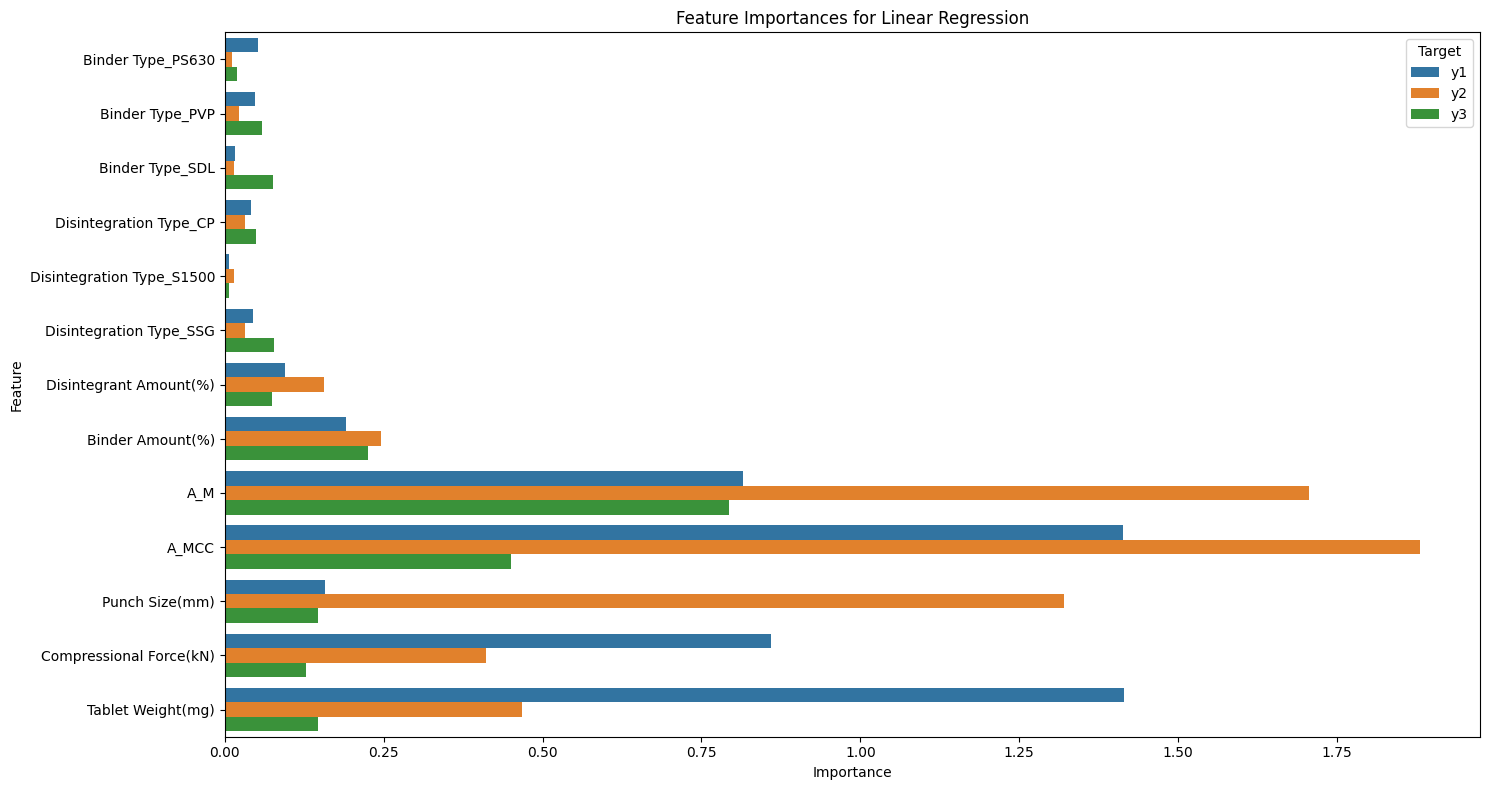

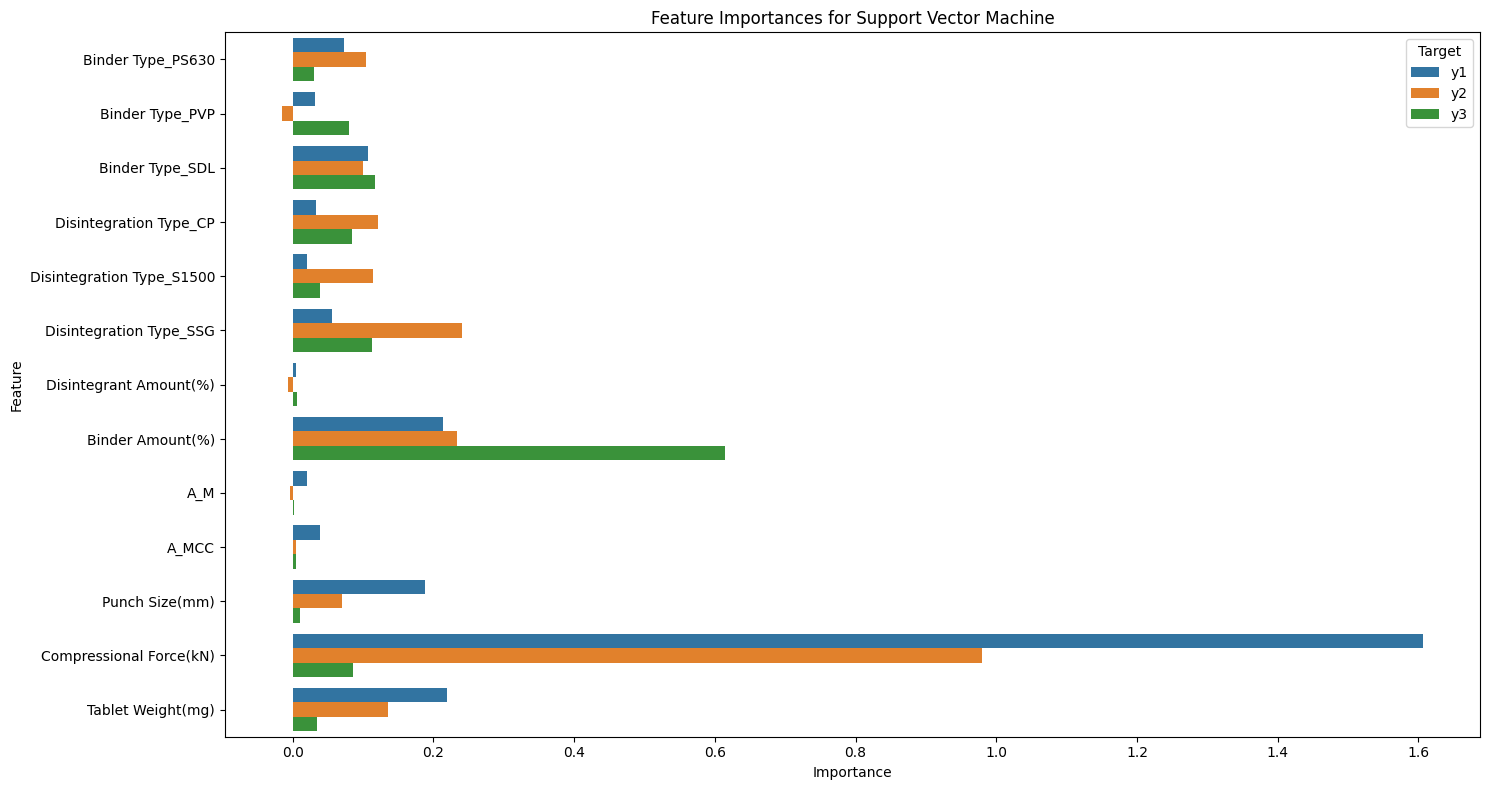

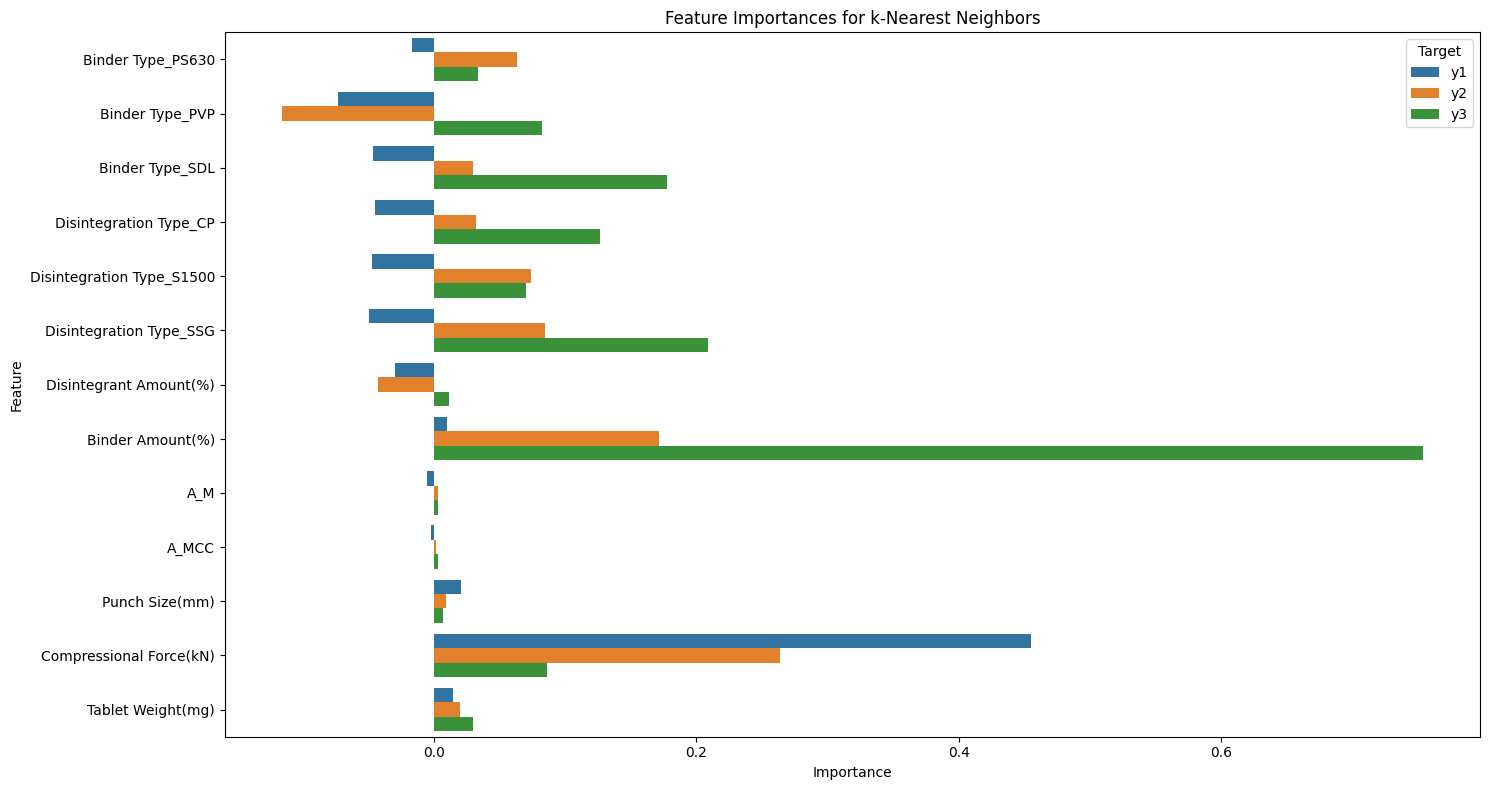

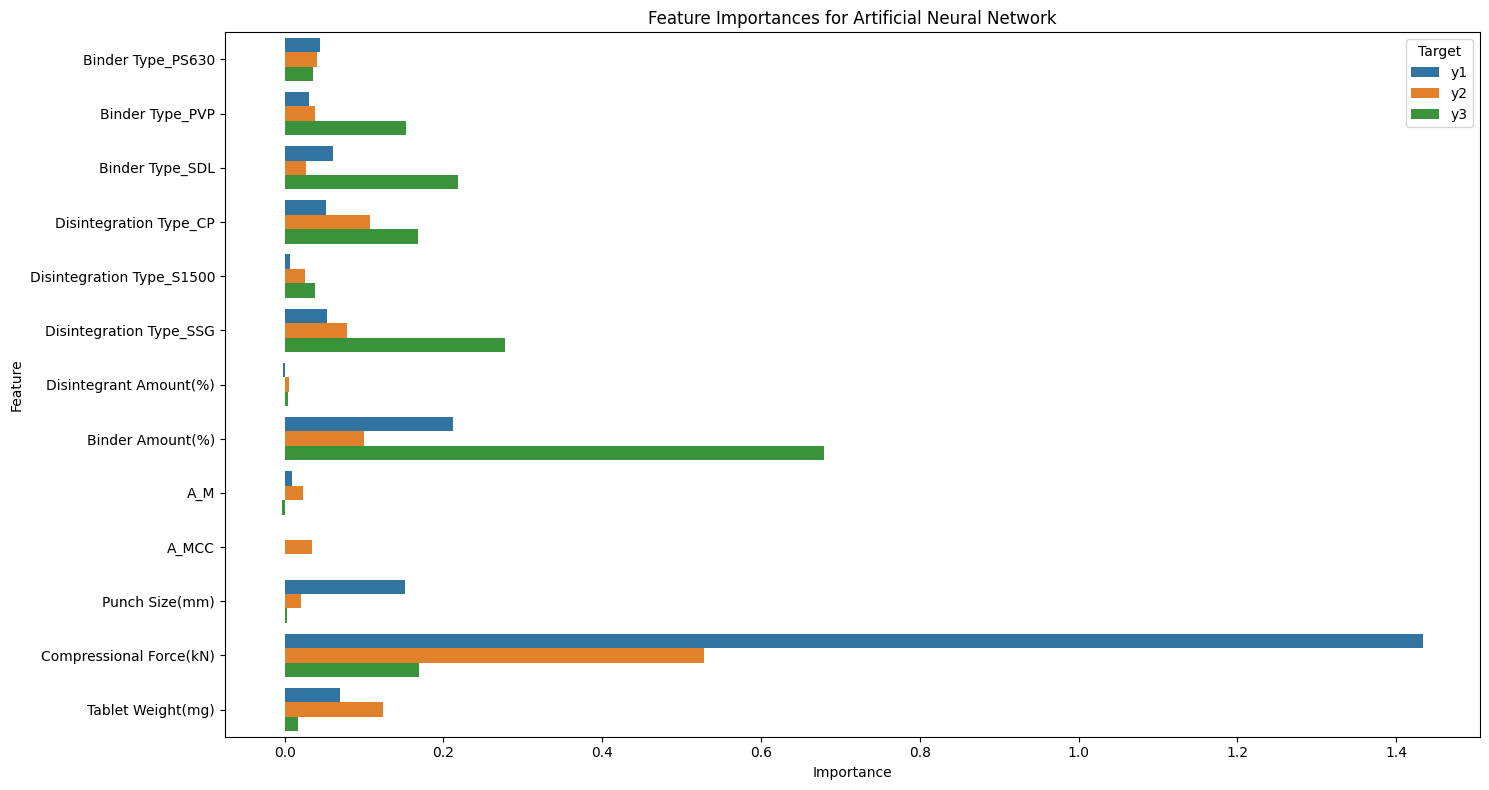

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance

# Function to calculate and visualize feature importances for all targets
def calculate_and_save_feature_importances(models, model_names, X_train, X_test, y_trains, y_tests, target_names):
    for model, model_name in zip(models, model_names):
        feature_importance_dfs = []

        for y_train, y_test, target_name in zip(y_trains, y_tests, target_names):
            model.fit(X_train, y_train.values.ravel())
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)

            # Calculate feature importances for Linear Regression model
            if isinstance(model, LinearRegression):
                feature_importances = np.abs(model.coef_).flatten()
            else:
                feature_importances = None

            if feature_importances is None:
                # Use permutation importance for models that don't provide feature importances
                perm_importance = permutation_importance(model, X_test, y_test.values.ravel(), n_repeats=10, random_state=42)
                feature_importances = perm_importance.importances_mean

            feature_names = X_train.columns
            feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances, 'Target': target_name})
            feature_importance_dfs.append(feature_importance_df)

        # Combine feature importance DataFrames for y1, y2, and y3
        combined_feature_importance_df = pd.concat(feature_importance_dfs)

        # Visualization of feature importances
        plt.figure(figsize=(15, 8))
        sns.barplot(x='Importance', y='Feature', hue='Target', data=combined_feature_importance_df)
        plt.title(f'Feature Importances for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.legend(title='Target')
        plt.tight_layout()
        plt.savefig(f'Combined_Feature_Importances_{model_name}.tiff', dpi=600, format='tiff')
        plt.show()

# Example datasets (replace with actual data loading and preprocessing)
# Assuming X_encoded, y1, y2, y3 are defined and preprocessed
# Split the data
X_train, X_test, y1_train, y1_test = train_test_split(X_encoded, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(X_encoded, y2, test_size=0.2, random_state=42)
_, _, y3_train, y3_test = train_test_split(X_encoded, y3, test_size=0.2, random_state=42)

# Models for y1, y2, and y3
models = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor(max_iter=500)
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']
target_names = ['y1', 'y2', 'y3']

# y_train and y_test lists
y_trains = [y1_train, y2_train, y3_train]
y_tests = [y1_test, y2_test, y3_test]

# Loop through all models and visualize combined feature importances for y1, y2, and y3
calculate_and_save_feature_importances(models, model_names, X_train, X_test, y_trains, y_tests, target_names)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import load_model
import joblib
import tensorflow as tf
from tensorflow.keras.utils import get_custom_objects

# Define the custom loss function
def r_squared_loss(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(y_true - y_pred))
    total = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    r2 = 1 - residual / (total + tf.keras.backend.epsilon())
    return r2

# Define the custom metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return (1 - SS_res/(SS_tot + tf.keras.backend.epsilon()))

# Register the custom loss and metric functions
get_custom_objects().update({'r_squared_loss': r_squared_loss, 'r_squared': r_squared})

# Load your data
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.'], axis=1)

# Separate features and target variables
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2]  # Binder Type and Disintegrant type
X2 = X.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10  # Disintegrant and binder amount
X3 = X.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100  # Mannitola and MCC amount
X4 = X.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20  # Punch Size
X5 = X.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10  # Compression Force
X6 = X.iloc[:, 8:9].apply(pd.to_numeric, errors='coerce') / 1000  # Tablet Weight

y1 = df.iloc[:, 9:10].apply(pd.to_numeric, errors='coerce') / 20  # Hardness(kg/cm2)
y2 = df.iloc[:, 10:11].apply(pd.to_numeric, errors='coerce') / 10  # % Friability
y3 = df.iloc[:, 11:12].apply(pd.to_numeric, errors='coerce') / 1000  # Disintegration Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse_output=False)
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2, X3, X4, X5, X6], axis=1)


# Save the fitted one-hot encoder for future use
joblib.dump(onehot_encoder, 'onehot_encoder.pkl')

# Load your pre-trained models
model_y1 = load_model('y1.hdf5', custom_objects={'r_squared_loss': r_squared_loss, 'r_squared': r_squared})
model_y2 = load_model('y2.hdf5', custom_objects={'r_squared_loss': r_squared_loss, 'r_squared': r_squared})
model_y3 = load_model('y3.hdf5', custom_objects={'r_squared_loss': r_squared_loss, 'r_squared': r_squared})

# Function to preprocess test data
def preprocess_test_data(test_df, encoder_path='onehot_encoder.pkl'):
    # Load the fitted encoder
    onehot_encoder = joblib.load(encoder_path)

    # Drop columns not present during training
    test_df = test_df.drop(['Batch No.'], axis=1, errors='ignore')

    # Ensure all necessary columns are present in the test data
    missing_cols = set(X.columns) - set(test_df.columns)
    for col in missing_cols:
        test_df[col] = 0

    # Preprocess the test data
    X_test = test_df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
    X1_test = X_test.iloc[:, 0:2]  # Binder Type and Disintegrant type
    X2_test = X_test.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10  # Disintegrant and binder amount
    X3_test = X_test.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100  # Mannitola and MCC amount
    X4_test = X_test.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20  # Punch Size
    X5_test = X_test.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10  # Compression Force
    X6_test = X_test.iloc[:, 8:9].apply(pd.to_numeric, errors='coerce') / 1000  # Tablet Weight

    # Perform one-hot encoding on X1_test
    X1_test_encoded = onehot_encoder.transform(X1_test)

    # Create a DataFrame with the encoded columns
    X1_test_encoded_df = pd.DataFrame(X1_test_encoded, columns=onehot_encoder.get_feature_names_out(X1_test.columns))

    # Concatenate the encoded columns with the remaining columns in X
    X_test_encoded = pd.concat([X1_test_encoded_df, X2_test, X3_test, X4_test, X5_test, X6_test], axis=1)

    return X_test_encoded

# Example test data
test_df = pd.read_csv('/content/Test.csv')

# Preprocess the test data
X_test_encoded = preprocess_test_data(test_df)

# Make predictions
y1_pred = model_y1.predict(X_test_encoded)
y2_pred = model_y2.predict(X_test_encoded)
y3_pred = model_y3.predict(X_test_encoded)

# Optionally, rescale the predictions back to their original scales
y1_pred_rescaled = y1_pred * 20
y2_pred_rescaled = y2_pred * 10
y3_pred_rescaled = y3_pred * 1000

print(y1_pred_rescaled, y2_pred_rescaled, y3_pred_rescaled)


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 79ms/step
[[0.       ]
 [0.7320291]
 [4.188665 ]
 [4.681707 ]
 [1.4789635]
 [6.8230257]] [[1.4949893 ]
 [1.952858  ]
 [1.4010792 ]
 [1.0018814 ]
 [0.38515195]
 [0.3647657 ]] [[102.62292]
 [113.98235]
 [178.73625]
 [177.18576]
 [187.03027]
 [174.72232]]


In [ ]:
print(X_test_encoded)

   Binder Type_L-HPC  Binder Type_PS630  Binder Type_PVP  Binder Type_SDL  \
0                0.0                0.0              1.0              0.0   
1                0.0                1.0              0.0              0.0   
2                0.0                0.0              0.0              1.0   
3                0.0                0.0              1.0              0.0   
4                1.0                0.0              0.0              0.0   
5                0.0                0.0              0.0              1.0   

   Disintegration Type_CCS  Disintegration Type_CP  Disintegration Type_S1500  \
0                      0.0                     0.0                        0.0   
1                      1.0                     0.0                        0.0   
2                      0.0                     1.0                        0.0   
3                      0.0                     0.0                        1.0   
4                      1.0                     0.0     

In [ ]:
print(X_test_encoded)
print(X_encoded)

   Binder Type_PS630  Binder Type_PVP  Binder Type_SDL  \
0                0.0              1.0              0.0   
1                1.0              0.0              0.0   
2                0.0              0.0              1.0   
3                0.0              1.0              0.0   
4                0.0              0.0              0.0   
5                0.0              0.0              1.0   

   Disintegration Type_CP  Disintegration Type_S1500  Disintegration Type_SSG  \
0                     0.0                        0.0                      1.0   
1                     0.0                        0.0                      0.0   
2                     1.0                        0.0                      0.0   
3                     0.0                        1.0                      0.0   
4                     0.0                        0.0                      0.0   
5                     0.0                        1.0                      0.0   

   Disintegrant Amount(%)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error


# Linear Regression for y1
linear_reg_y1 = LinearRegression()
linear_reg_y1.fit(X_encoded, y1)
y1_pred_linear = linear_reg_y1.predict(X_encoded)
linear_mse_y1 = mean_squared_error(y1, y1_pred_linear)

# Linear Regression for y2
linear_reg_y2 = LinearRegression()
linear_reg_y2.fit(X_encoded, y2)
y2_pred_linear = linear_reg_y2.predict(X_encoded)
linear_mse_y2 = mean_squared_error(y2, y2_pred_linear)

# Linear Regression for y3
linear_reg_y3 = LinearRegression()
linear_reg_y3.fit(X_encoded, y3)
y3_pred_linear = linear_reg_y3.predict(X_encoded)
linear_mse_y3 = mean_squared_error(y3, y3_pred_linear)

# Support Vector Machine (SVM) for y1
svm_y1 = SVR()
svm_y1.fit(X_encoded, y1)
y1_pred_svm = svm_y1.predict(X_encoded)
svm_mse_y1 = mean_squared_error(y1, y1_pred_svm)

# Support Vector Machine (SVM) for y2
svm_y2 = SVR()
svm_y2.fit(X_encoded, y2)
y2_pred_svm = svm_y2.predict(X_encoded)
svm_mse_y2 = mean_squared_error(y2, y2_pred_svm)

# Support Vector Machine (SVM) for y3
svm_y3 = SVR()
svm_y3.fit(X_encoded, y3)
y3_pred_svm = svm_y3.predict(X_encoded)
svm_mse_y3 = mean_squared_error(y3, y3_pred_svm)

# k-Nearest Neighbors (k-NN) for y1
knn_y1 = KNeighborsRegressor()
knn_y1.fit(X_encoded, y1)
y1_pred_knn = knn_y1.predict(X_encoded)
knn_mse_y1 = mean_squared_error(y1, y1_pred_knn)

# k-Nearest Neighbors (k-NN) for y2
knn_y2 = KNeighborsRegressor()
knn_y2.fit(X_encoded, y2)
y2_pred_knn = knn_y2.predict(X_encoded)
knn_mse_y2 = mean_squared_error(y2, y2_pred_knn)

# k-Nearest Neighbors (k-NN) for y3
knn_y3 = KNeighborsRegressor()
knn_y3.fit(X_encoded, y3)
y3_pred_knn = knn_y3.predict(X_encoded)
knn_mse_y3 = mean_squared_error(y3, y3_pred_knn)


y1_pred_ann = ann_y1.predict(X_encoded).ravel()
y2_pred_ann = ann_y2.predict(X_encoded).ravel()
y3_pred_ann = ann_y3.predict(X_encoded).ravel()


# Assuming you have already defined y1_test, y2_test, y3_test, y1_pred_linear, y2_pred_linear, y3_pred_linear,
# y1_pred_svm, y2_pred_svm, y3_pred_svm, y1_pred_knn, y2_pred_knn, y3_pred_knn, y1_pred_ann, y2_pred_ann, y3_pred_ann

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


27/27 [==============================] - 0s 10ms/step
Linear Regression MSE for y1: 0.009660652671248826
Linear Regression MSE for y2: 0.0060570818582464155
Linear Regression MSE for y3: 0.0019364267378029999
SVM MSE for y1: 0.006531319506482385
SVM MSE for y2: 0.004552713117429433
SVM MSE for y3: 0.0028544360022466045
k-NN MSE for y1: 0.01193578861111111
k-NN MSE for y2: 0.004304501898148148
k-NN MSE for y3: 0.0009485992129629632
ANN MSE for y1: 0.0014764617470441595
ANN MSE for y2: 0.0018113161722426302
ANN MSE for y3: 0.0008566233446183422


In [ ]:
pip install deap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import load_model
import joblib

# Load your models
model_y1 = load_model('y1.hdf5', custom_objects={'r_squared_loss': r_squared_loss, 'r_squared': r_squared})
model_y2 = load_model('y2.hdf5', custom_objects={'r_squared_loss': r_squared_loss, 'r_squared': r_squared})
model_y3 = load_model('y3.hdf5', custom_objects={'r_squared_loss': r_squared_loss, 'r_squared': r_squared})

# Load the one-hot encoder
onehot_encoder = joblib.load('onehot_encoder.pkl')

# Define categories and mappings
binder_type_categories = ['PVP', 'PS630', 'SDL', 'L-HPC']
disintegration_type_categories = ['SSG', 'CCS', 'CP', 'S1500']

def map_to_category(value, categories):
    # Map a floating point value in range [0, 1) to the corresponding category
    index = int(value * len(categories))
    index = min(index, len(categories) - 1)  # Ensure the index is within the valid range
    return categories[index]

# Define the fitness function
def fitness(individual):
    # Map the first two attributes to categorical values
    binder_type = map_to_category(individual[0], binder_type_categories)
    disintegration_type = map_to_category(individual[1], disintegration_type_categories)

    # Extract features from the individual
    X1 = pd.DataFrame([[binder_type, disintegration_type]], columns=['Binder Type', 'Disintegration Type'])
    X2 = pd.DataFrame([individual[2:4]], columns=['Disintegrant Amount', 'Binder Amount']) / 10
    X3 = pd.DataFrame([individual[4:6]], columns=['Mannitola', 'MCC Amount']) / 100
    X4 = pd.DataFrame([individual[6:7]], columns=['Punch Size']) / 20
    X5 = pd.DataFrame([individual[7:8]], columns=['Compression Force']) / 10
    X6 = pd.DataFrame([individual[8:9]], columns=['Tablet Weight']) / 1000

    # Convert categorical features to strings for encoding
    X1 = X1.astype(str)

    # Perform one-hot encoding on X1
    X1_encoded = onehot_encoder.transform(X1)
    X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

    # Concatenate the encoded columns with the remaining columns in X
    X_encoded = pd.concat([X1_encoded_df, X2, X3, X4, X5, X6], axis=1)

    # Print for debugging
    print("X_encoded:\n", X_encoded)

    # Predict using the models
    y1_pred = model_y1.predict(X_encoded)
    y2_pred = model_y2.predict(X_encoded)
    y3_pred = model_y3.predict(X_encoded)

    # Print for debugging
    print("Predictions: y1_pred: {}, y2_pred: {}, y3_pred: {}".format(y1_pred, y2_pred, y3_pred))

    # Rescale the predictions
    hardness = y1_pred[0][0] * 20
    friability = y2_pred[0][0] * 10
    disintegration_time = y3_pred[0][0] * 1000

    # Define the fitness objectives
    fitness_values = (hardness, friability, disintegration_time)
    return fitness_values if friability < 1 else (hardness, 10, disintegration_time)  # Penalize solutions with friability >= 1

# Define the problem as a multi-objective optimization
if 'FitnessMax' in creator.__dict__:
    del creator.FitnessMax
if 'Individual' in creator.__dict__:
    del creator.Individual

creator.create("FitnessMax", base.Fitness, weights=(1.0, -1.0, -1.0))  # Maximize hardness, minimize friability, minimize disintegration time
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=9)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0, up=1, eta=0.5, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# Optimize
population = toolbox.population(n=50)
algorithms.eaMuPlusLambda(population, toolbox, mu=50, lambda_=100, cxpb=0.7, mutpb=0.3, ngen=40, stats=None, halloffame=None, verbose=True)

# Get the best individual
best_ind = tools.selBest(population, 1)[0]

print(f'Best individual: {best_ind}')
print(f'Hardness: {best_ind.fitness.values[0] * 20}')
print(f'Friability: {best_ind.fitness.values[1] * 10}')
print(f'Disintegration Time: {best_ind.fitness.values[2] * 1000}')


X_encoded:
    Binder Type_L-HPC  Binder Type_PS630  Binder Type_PVP  Binder Type_SDL  \
0                0.0                0.0              0.0              1.0   

   Disintegration Type_CCS  Disintegration Type_CP  Disintegration Type_S1500  \
0                      0.0                     1.0                        0.0   

   Disintegration Type_SSG  Disintegrant Amount  Binder Amount  Mannitola  \
0                      0.0             0.031262       0.089818   0.001792   

   MCC Amount  Punch Size  Compression Force  Tablet Weight  
0    0.002702    0.035466           0.095746       0.000328  
1/1 [==============================] - 0s 79ms/step
Predictions: y1_pred: [[0.32203928]], y2_pred: [[0.17564827]], y3_pred: [[0.05802109]]
X_encoded:
    Binder Type_L-HPC  Binder Type_PS630  Binder Type_PVP  Binder Type_SDL  \
0                1.0                0.0              0.0              0.0   

   Disintegration Type_CCS  Disintegration Type_CP  Disintegration Type_S1500  \
0   

In [4]:
import numpy as np
from pyswarm import pso
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

# Assuming the ANN models (ann_y1, ann_y2, ann_y3) are already trained and loaded

# Define the objective function for PSO
def objective_function(x):
    # Reshape the input array to match the input shape expected by the models
    binder_type = int(x[0])
    disintegration_type = int(x[1])
    disintegrant_amount = x[2] / 10  # Scale as per your preprocessing
    binder_amount = x[3] / 10  # Scale as per your preprocessing
    a_m = x[4] / 100  # Scale as per your preprocessing
    a_mcc = x[5] / 100  # Scale as per your preprocessing
    punch_size = x[6] / 20  # Scale as per your preprocessing
    compressional_force = x[7] / 10  # Scale as per your preprocessing
    tablet_weight = x[8] / 1000  # Scale as per your preprocessing

    # One-hot encode the categorical variables
    X1 = np.array([[binder_type, disintegration_type]])
    onehot_encoder = OneHotEncoder(sparse=False)
    X1_encoded = onehot_encoder.fit_transform(X1)

    # Combine all the features into a single array
    X_input = np.concatenate([X1_encoded[0], [disintegrant_amount, binder_amount, a_m, a_mcc, punch_size, compressional_force, tablet_weight]])
    X_input = X_input.reshape(1, -1)

    # Predict the outputs using the ANN models
    hardness = ann_y1.predict(X_input)[0][0] * 20  # Scale back
    friability = ann_y2.predict(X_input)[0][0] * 10  # Scale back
    disintegration_time = ann_y3.predict(X_input)[0][0] * 1000  # Scale back

    # Objective: maximize hardness, minimize disintegration time, keep friability < 1%
    if friability >= 1:
        return float('inf')
    else:
        return -hardness + disintegration_time

# Define the bounds for the input features
# Assuming binder type and disintegration type are categorical with indices 0, 1, 2, ...
lb = [0, 0, 0, 0, 0, 0, 0, 0, 0]  # Lower bounds for each feature
ub = [2, 2, 100, 100, 100, 100, 20, 10, 1000]  # Upper bounds for each feature

# Perform PSO to find the optimal input features
xopt, fopt = pso(objective_function, lb, ub, swarmsize=100, maxiter=200)

print(f"Optimal inputs: {xopt}")
print(f"Optimal objective function value: {fopt}")

# Decode the optimal inputs
binder_type_opt = int(xopt[0])
disintegration_type_opt = int(xopt[1])
disintegrant_amount_opt = xopt[2]
binder_amount_opt = xopt[3]
a_m_opt = xopt[4]
a_mcc_opt = xopt[5]
punch_size_opt = xopt[6]
compressional_force_opt = xopt[7]
tablet_weight_opt = xopt[8]

print(f"Optimal Binder Type: {binder_type_opt}")
print(f"Optimal Disintegration Type: {disintegration_type_opt}")
print(f"Optimal Disintegrant Amount(%): {disintegrant_amount_opt}")
print(f"Optimal Binder Amount(%): {binder_amount_opt}")
print(f"Optimal A_M: {a_m_opt}")
print(f"Optimal A_MCC: {a_mcc_opt}")
print(f"Optimal Punch Size(mm): {punch_size_opt}")
print(f"Optimal Compressional Force(kN): {compressional_force_opt}")
print(f"Optimal Tablet Weight(mg): {tablet_weight_opt}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


NameError: name 'ann_y1' is not defined

In [3]:
pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=ba602c7ac02814c802ff27e385f0db30d33309fb6920bae39914dc19a0e42f66
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from scipy.optimize import differential_evolution
from sklearn.preprocessing import OneHotEncoder

# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.',], axis = 1)

# Define custom R-squared metric
def r_squared(y_true, y_pred):
    return 1 - tf.reduce_sum(tf.square(y_true - y_pred)) / tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

# Define custom R-squared loss function
def r_squared_loss(y_true, y_pred):
    return -r_squared(y_true, y_pred)

# Load the trained ANN models
ann_y1 = load_model('/content/y1.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y2 = load_model('/content/y2.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y3 = load_model('/content/y3.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Fit the OneHotEncoder on all possible combinations of Binder Type and Disintegration Type
onehot_encoder = OneHotEncoder(sparse_output=False)
# Assuming Binder Type and Disintegration Type have 4 categories each (0, 1, 2, 3)
onehot_encoder.fit([[i, j] for i in range(4) for j in range(4)])

# Define the objective function for optimization
def objective_function(x):
    binder_type = int(x[0])
    disintegration_type = int(x[1])
    disintegrant_amount = x[2] / 10
    binder_amount = x[3] / 10
    a_m = x[4] / 100
    a_mcc = x[5] / 100
    punch_size = x[6] / 20
    compressional_force = x[7] / 10
    tablet_weight = x[8] / 1000

    # One-hot encode the categorical variables
    X1 = np.array([[binder_type, disintegration_type]])
    X1_encoded = onehot_encoder.transform(X1)

    # Combine all the features into a single array
    X_input = np.concatenate([X1_encoded[0], [disintegrant_amount, binder_amount, a_m, a_mcc, punch_size, compressional_force, tablet_weight]])
    X_input = X_input.reshape(1, -1)

    # Predict the outputs using the ANN models
    hardness = ann_y1.predict(X_input)[0][0] * 20
    friability = ann_y2.predict(X_input)[0][0] * 10
    disintegration_time = ann_y3.predict(X_input)[0][0] * 1000

    if friability >= 1:
        return float('inf')
    else:
        return -hardness + disintegration_time

# Define the bounds for the input features
lb = [0, 0, 0, 0, 0, 0, 0, 0, 0]  # Lower bounds for each feature
ub = [3, 3, 100, 100, 100, 100, 20, 10, 1000]  # Upper bounds for each feature
bounds = list(zip(lb, ub))

# Perform optimization to find the optimal input features
result = differential_evolution(objective_function, bounds, strategy='best1bin', maxiter=200, popsize=100)

xopt = result.x
fopt = result.fun

print(f"Optimal inputs: {xopt}")
print(f"Optimal objective function value: {fopt}")

# Decode the optimal inputs
binder_type_opt = int(xopt[0])
disintegration_type_opt = int(xopt[1])
disintegrant_amount_opt = xopt[2]
binder_amount_opt = xopt[3]
a_m_opt = xopt[4]
a_mcc_opt = xopt[5]
punch_size_opt = xopt[6]
compressional_force_opt = xopt[7]
tablet_weight_opt = xopt[8]

print(f"Optimal Binder Type: {binder_type_opt}")
print(f"Optimal Disintegration Type: {disintegration_type_opt}")
print(f"Optimal Disintegrant Amount(%): {disintegrant_amount_opt}")
print(f"Optimal Binder Amount(%): {binder_amount_opt}")
print(f"Optimal A_M: {a_m_opt}")
print(f"Optimal A_MCC: {a_mcc_opt}")
print(f"Optimal Punch Size(mm): {punch_size_opt}")
print(f"Optimal Compressional Force(kN): {compressional_force_opt}")
print(f"Optimal Tablet Weight(mg): {tablet_weight_opt}")


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 44ms/step


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from scipy.optimize import differential_evolution
from sklearn.preprocessing import OneHotEncoder

# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.'], axis=1)

# Define custom R-squared metric
def r_squared(y_true, y_pred):
    return 1 - tf.reduce_sum(tf.square(y_true - y_pred)) / tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

# Define custom R-squared loss function
def r_squared_loss(y_true, y_pred):
    return -r_squared(y_true, y_pred)

# Load the trained ANN models
ann_y1 = load_model('/content/y1.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y2 = load_model('/content/y2.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y3 = load_model('/content/y3.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Fit the OneHotEncoder on all possible combinations of Binder Type and Disintegration Type
onehot_encoder = OneHotEncoder(sparse_output=False)
# Assuming Binder Type and Disintegration Type have 4 categories each (0, 1, 2, 3)
onehot_encoder.fit([[i, j] for i in range(4) for j in range(4)])

# Define the objective function for optimization
def objective_function(x):
    binder_type = int(x[0])
    disintegration_type = int(x[1])
    disintegrant_amount = x[2] / 10
    binder_amount = x[3] / 10
    a_m = x[4] / 100
    a_mcc = x[5] / 100
    punch_size = x[6] / 20
    compressional_force = x[7] / 10
    tablet_weight = x[8] / 1000

    # One-hot encode the categorical variables
    X1 = np.array([[binder_type, disintegration_type]])
    X1_encoded = onehot_encoder.transform(X1)

    # Combine all the features into a single array
    X_input = np.concatenate([X1_encoded[0], [disintegrant_amount, binder_amount, a_m, a_mcc, punch_size, compressional_force, tablet_weight]])
    X_input = X_input.reshape(1, -1)

    # Predict the outputs using the ANN models
    hardness = ann_y1.predict(X_input)[0][0] * 20
    friability = ann_y2.predict(X_input)[0][0] * 10
    disintegration_time = ann_y3.predict(X_input)[0][0] * 1000

    if friability >= 1:
        return float('inf')
    else:
        return -hardness + disintegration_time

# Define the bounds for the input features
lb = [0, 0, 0, 0, 0, 0, 0, 0, 0]  # Lower bounds for each feature
ub = [3, 3, 100, 100, 100, 100, 20, 10, 1000]  # Upper bounds for each feature
bounds = list(zip(lb, ub))

# Perform optimization to find the optimal input features
# Reducing the number of iterations and population size
result = differential_evolution(objective_function, bounds, strategy='best1bin', maxiter=10, popsize=2)

xopt = result.x
fopt = result.fun

print(f"Optimal inputs: {xopt}")
print(f"Optimal objective function value: {fopt}")

# Decode the optimal inputs
binder_type_opt = int(xopt[0])
disintegration_type_opt = int(xopt[1])
disintegrant_amount_opt = xopt[2]
binder_amount_opt = xopt[3]
a_m_opt = xopt[4]
a_mcc_opt = xopt[5]
punch_size_opt = xopt[6]
compressional_force_opt = xopt[7]
tablet_weight_opt = xopt[8]

print(f"Optimal Binder Type: {binder_type_opt}")
print(f"Optimal Disintegration Type: {disintegration_type_opt}")
print(f"Optimal Disintegrant Amount(%): {disintegrant_amount_opt}")
print(f"Optimal Binder Amount(%): {binder_amount_opt}")
print(f"Optimal A_M: {a_m_opt}")
print(f"Optimal A_MCC: {a_mcc_opt}")
print(f"Optimal Punch Size(mm): {punch_size_opt}")
print(f"Optimal Compressional Force(kN): {compressional_force_opt}")
print(f"Optimal Tablet Weight(mg): {tablet_weight_opt}")


1/1 [==============================] - 0s 25ms/step
Optimal inputs: [7.13082191e-04 1.52427602e+00 3.77658884e+01 2.24319077e+00
 1.14944902e+01 8.43408274e+01 6.21015540e+00 9.37196534e+00
 4.72357670e+01]
Optimal objective function value: 79.99967813491821
Optimal Binder Type: 0
Optimal Disintegration Type: 1
Optimal Disintegrant Amount(%): 37.76588839588381
Optimal Binder Amount(%): 2.2431907663187616
Optimal A_M: 11.494490194184614
Optimal A_MCC: 84.34082741496145
Optimal Punch Size(mm): 6.2101554014631155
Optimal Compressional Force(kN): 9.371965342364357
Optimal Tablet Weight(mg): 47.235766961817774


1/1 [==============================] - 0s 25ms/step
Predicted Hardness: 30.478544235229492
Predicted % Friability: 0.0
Predicted Disintegration Time: 110.4782223701477
The optimal solution meets the friability criteria.


In [8]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from scipy.optimize import differential_evolution
from sklearn.preprocessing import OneHotEncoder

# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.'], axis=1)

# Define custom R-squared metric
def r_squared(y_true, y_pred):
    return 1 - tf.reduce_sum(tf.square(y_true - y_pred)) / tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

# Define custom R-squared loss function
def r_squared_loss(y_true, y_pred):
    return -r_squared(y_true, y_pred)

# Load the trained ANN models
ann_y1 = load_model('/content/y1.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y2 = load_model('/content/y2.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y3 = load_model('/content/y3.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Fit the OneHotEncoder on all possible combinations of Binder Type and Disintegration Type
onehot_encoder = OneHotEncoder(sparse_output=False)
# Assuming Binder Type and Disintegration Type have 4 categories each (0, 1, 2, 3)
onehot_encoder.fit([[i, j] for i in range(4) for j in range(4)])

# Define the fixed values
fixed_punch_size = 8 / 20  # Punch Size (8 mm, scaled)
fixed_tablet_weight = 200 / 1000  # Tablet Weight (200 mg, scaled)

# Define the objective function for optimization
def objective_function(x):
    binder_type = int(x[0])
    disintegration_type = int(x[1])
    disintegrant_amount = x[2] / 10
    binder_amount = x[3] / 10
    a_m = x[4] / 100
    a_mcc = x[5] / 100
    compressional_force = x[6] / 10

    # Use fixed values for Punch Size and Tablet Weight
    punch_size = fixed_punch_size
    tablet_weight = fixed_tablet_weight

    # One-hot encode the categorical variables
    X1 = np.array([[binder_type, disintegration_type]])
    X1_encoded = onehot_encoder.transform(X1)

    # Combine all the features into a single array
    X_input = np.concatenate([X1_encoded[0], [disintegrant_amount, binder_amount, a_m, a_mcc, punch_size, compressional_force, tablet_weight]])
    X_input = X_input.reshape(1, -1)

    # Predict the outputs using the ANN models
    hardness = ann_y1.predict(X_input)[0][0] * 20
    friability = ann_y2.predict(X_input)[0][0] * 10
    disintegration_time = ann_y3.predict(X_input)[0][0] * 1000

    if friability >= 1:
        return float('inf')
    else:
        return -hardness + disintegration_time

# Define the bounds for the input features, excluding fixed ones and incorporating the new limits
lb = [0, 0, 2, 5, 23, 37.5, 0]  # Lower bounds for each feature except fixed ones
ub = [3, 3, 8, 15, 51.5, 50, 10]  # Upper bounds for each feature except fixed ones
bounds = list(zip(lb, ub))

# Perform optimization to find the optimal input features
result = differential_evolution(objective_function, bounds, strategy='best1bin', maxiter=10, popsize=2)

xopt = result.x
fopt = result.fun

print(f"Optimal inputs: {xopt}")
print(f"Optimal objective function value: {fopt}")

# Decode the optimal inputs
binder_type_opt = int(xopt[0])
disintegration_type_opt = int(xopt[1])
disintegrant_amount_opt = xopt[2]
binder_amount_opt = xopt[3]
a_m_opt = xopt[4]
a_mcc_opt = xopt[5]
compressional_force_opt = xopt[6]

# Example mappings (replace these with your actual mappings)
binder_type_mapping = {
    0: 'PVP',
    1: 'Starch',
    2: 'Gelatin',
    3: 'HPMC'
}

disintegration_type_mapping = {
    0: 'Sodium Starch Glycolate',
    1: 'Croscarmellose Sodium',
    2: 'Crospovidone',
    3: 'Microcrystalline Cellulose'
}

# Decode the optimal binder and disintegration types
optimal_binder_type_name = binder_type_mapping[binder_type_opt]
optimal_disintegration_type_name = disintegration_type_mapping[disintegration_type_opt]

print(f"Optimal Binder Type: {optimal_binder_type_name}")
print(f"Optimal Disintegration Type: {optimal_disintegration_type_name}")
print(f"Optimal Disintegrant Amount(%): {disintegrant_amount_opt}")
print(f"Optimal Binder Amount(%): {binder_amount_opt}")
print(f"Optimal A_M: {a_m_opt}")
print(f"Optimal A_MCC: {a_mcc_opt}")
print(f"Fixed Punch Size(mm): 8")
print(f"Optimal Compressional Force(kN): {compressional_force_opt}")
print(f"Fixed Tablet Weight(mg): 200")


1/1 [==============================] - 0s 20ms/step
Optimal inputs: [ 2.80595853  1.96028429  4.55587453  5.22023884 44.34128988 42.8920887
  4.60298808]
Optimal objective function value: 77.2615697979927
Optimal Binder Type: Gelatin
Optimal Disintegration Type: Croscarmellose Sodium
Optimal Disintegrant Amount(%): 4.555874527865168
Optimal Binder Amount(%): 5.22023883799664
Optimal A_M: 44.34128987971088
Optimal A_MCC: 42.89208869765111
Fixed Punch Size(mm): 8
Optimal Compressional Force(kN): 4.6029880829468235
Fixed Tablet Weight(mg): 200


In [10]:
# Create a DataFrame for the optimal input
optimal_input = pd.DataFrame([[
    binder_type_opt,
    disintegration_type_opt,
    disintegrant_amount_opt / 10,  # Scale down as per original preprocessing
    binder_amount_opt / 10,        # Scale down as per original preprocessing
    a_m_opt / 100,                 # Scale down as per original preprocessing
    a_mcc_opt / 100,               # Scale down as per original preprocessing
    punch_size_opt / 20,           # Scale down as per original preprocessing
    compressional_force_opt / 10,  # Scale down as per original preprocessing
    tablet_weight_opt / 1000       # Scale down as per original preprocessing
]], columns=['Binder Type', 'Disintegration Type', 'Disintegrant Amount(%)', 'Binder Amount(%)', 'A_M', 'A_MCC', 'Punch Size(mm)', 'Compressional Force(kN)', 'Tablet Weight(mg)'])

# One-hot encode the categorical variables
X1_optimal = np.array([[binder_type_opt, disintegration_type_opt]])
X1_encoded_optimal = onehot_encoder.transform(X1_optimal)

# Combine all the features into a single array
X_input_optimal = np.concatenate([X1_encoded_optimal[0], [
    disintegrant_amount_opt / 10,
    binder_amount_opt / 10,
    a_m_opt / 100,
    a_mcc_opt / 100,
    punch_size_opt / 20,
    compressional_force_opt / 10,
    tablet_weight_opt / 1000
]])
X_input_optimal = X_input_optimal.reshape(1, -1)

# Predict the outputs using the ANN models
hardness_opt = ann_y1.predict(X_input_optimal)[0][0] * 20
friability_opt = ann_y2.predict(X_input_optimal)[0][0] * 10
disintegration_time_opt = ann_y3.predict(X_input_optimal)[0][0] * 1000

print(f"Predicted Hardness: {hardness_opt}")
print(f"Predicted % Friability: {friability_opt}")
print(f"Predicted Disintegration Time: {disintegration_time_opt}")

# Check if the optimal solution meets the criteria
if friability_opt < 1:
    print("The optimal solution meets the friability criteria.")
else:
    print("The optimal solution does not meet the friability criteria.")


1/1 [==============================] - 0s 20ms/step
Predicted Hardness: 10.327156782150269
Predicted % Friability: 0.0478143198415637
Predicted Disintegration Time: 75.5457803606987
The optimal solution meets the friability criteria.


In [ ]:
!pip install deap




In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.'], axis=1)

# Define custom R-squared metric
def r_squared(y_true, y_pred):
    return 1 - tf.reduce_sum(tf.square(y_true - y_pred)) / tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

# Define custom R-squared loss function
def r_squared_loss(y_true, y_pred):
    return -r_squared(y_true, y_pred)

# Load the trained ANN models
ann_y1 = load_model('/content/y1.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y2 = load_model('/content/y2.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y3 = load_model('/content/y3.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Fit the OneHotEncoder on all possible combinations of Binder Type and Disintegration Type
onehot_encoder = OneHotEncoder(sparse_output=False)
# Assuming Binder Type and Disintegration Type have 4 categories each (0, 1, 2, 3)
onehot_encoder.fit([[i, j] for i in range(4) for j in range(4)])

# Define the fixed values
fixed_punch_size = 8 / 20  # Punch Size (8 mm, scaled)
fixed_tablet_weight = 200 / 1000  # Tablet Weight (200 mg, scaled)
fixed_binder_type = binder_type_opt
fixed_disintegration_type = disintegration_type_opt
fixed_a_m = a_m_opt / 100
fixed_a_mcc = a_mcc_opt / 100
fixed_compressional_force = compressional_force_opt / 10

# Define the objective function for generating data points
def generate_objective(disintegrant_amount, binder_amount):
    binder_type = fixed_binder_type
    disintegration_type = fixed_disintegration_type
    disintegrant_amount = disintegrant_amount / 10
    binder_amount = binder_amount / 10
    a_m = fixed_a_m
    a_mcc = fixed_a_mcc
    compressional_force = fixed_compressional_force
    punch_size = fixed_punch_size
    tablet_weight = fixed_tablet_weight

    # One-hot encode the categorical variables
    X1 = np.array([[binder_type, disintegration_type]])
    X1_encoded = onehot_encoder.transform(X1)

    # Combine all the features into a single array
    X_input = np.concatenate([X1_encoded[0], [disintegrant_amount, binder_amount, a_m, a_mcc, punch_size, compressional_force, tablet_weight]])
    X_input = X_input.reshape(1, -1)

    # Predict the outputs using the ANN models
    hardness = ann_y1.predict(X_input)[0][0] * 20
    friability = ann_y2.predict(X_input)[0][0] * 10
    disintegration_time = ann_y3.predict(X_input)[0][0] * 1000

    if friability >= 1:
        return np.inf
    else:
        return -hardness + disintegration_time

# Generate data points for the 3D surface plot
disintegrant_amount_range = np.linspace(2, 8, 50)
binder_amount_range = np.linspace(5, 15, 50)
disintegrant_amount_grid, binder_amount_grid = np.meshgrid(disintegrant_amount_range, binder_amount_range)
objective_values = np.array([[generate_objective(d, b) for d in disintegrant_amount_range] for b in binder_amount_range])

# Create the 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(disintegrant_amount_grid, binder_amount_grid, objective_values, cmap='viridis')

# Add labels
ax.set_xlabel('Disintegrant Amount(%)')
ax.set_ylabel('Binder Amount(%)')
ax.set_zlabel('Objective Function Value')
ax.set_title('Optimization Surface')

plt.show()


1/1 [==============================] - ETA: 0s

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import OneHotEncoder
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.'], axis=1)

# Define custom R-squared metric
def r_squared(y_true, y_pred):
    return 1 - tf.reduce_sum(tf.square(y_true - y_pred)) / tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

# Define custom R-squared loss function
def r_squared_loss(y_true, y_pred):
    return -r_squared(y_true, y_pred)

# Load the trained ANN models
ann_y1 = load_model('/content/y1.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y2 = load_model('/content/y2.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y3 = load_model('/content/y3.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Fit the OneHotEncoder on all possible combinations of Binder Type and Disintegration Type
onehot_encoder = OneHotEncoder(sparse_output=False)
# Assuming Binder Type and Disintegration Type have 4 categories each (0, 1, 2, 3)
onehot_encoder.fit([[i, j] for i in range(4) for j in range(4)])

# Define the fixed values
fixed_punch_size = 8 / 20  # Punch Size (8 mm, scaled)
fixed_tablet_weight = 200 / 1000  # Tablet Weight (200 mg, scaled)

# Define the objective function for optimization
def objective_function(individual):
    binder_type = int(individual[0])
    disintegration_type = int(individual[1])
    disintegrant_amount = individual[2] / 10
    binder_amount = individual[3] / 10
    a_m = individual[4] / 100
    a_mcc = individual[5] / 100
    compressional_force = individual[6] / 10

    # Use fixed values for Punch Size and Tablet Weight
    punch_size = fixed_punch_size
    tablet_weight = fixed_tablet_weight

    # One-hot encode the categorical variables
    X1 = np.array([[binder_type, disintegration_type]])
    X1_encoded = onehot_encoder.transform(X1)

    # Combine all the features into a single array
    X_input = np.concatenate([X1_encoded[0], [disintegrant_amount, binder_amount, a_m, a_mcc, punch_size, compressional_force, tablet_weight]])
    X_input = X_input.reshape(1, -1)

    # Predict the outputs using the ANN models
    hardness = ann_y1.predict(X_input)[0][0] * 20
    friability = ann_y2.predict(X_input)[0][0] * 10
    disintegration_time = ann_y3.predict(X_input)[0][0] * 1000

    if friability >= 1:
        return float('inf'),
    else:
        return -hardness + disintegration_time,

# Set up DEAP components
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.randint, 0, 4)
toolbox.register("attr_disintegrant", np.random.uniform, 2, 8)
toolbox.register("attr_binder", np.random.uniform, 5, 15)
toolbox.register("attr_float", np.random.uniform, 0, 100)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_int, toolbox.attr_int, toolbox.attr_disintegrant, toolbox.attr_binder,
                  toolbox.attr_float, toolbox.attr_float, toolbox.attr_float), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=[0, 0, 2, 5, 23, 38, 0], up=[3, 3, 8, 15, 50, 50, 10], eta=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", objective_function)

# Genetic Algorithm parameters
population_size = 50
num_generations = 40
crossover_probability = 0.7
mutation_probability = 0.2

# Create the population
population = toolbox.population(n=population_size)

# Run the Genetic Algorithm
algorithms.eaSimple(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability, ngen=num_generations, verbose=True)

# Extract the best individual
best_individual = tools.selBest(population, k=1)[0]
xopt = best_individual
fopt = best_individual.fitness.values[0]

print(f"Optimal inputs: {xopt}")
print(f"Optimal objective function value: {fopt}")

# Decode the optimal inputs
binder_type_opt = int(xopt[0])
disintegration_type_opt = int(xopt[1])
disintegrant_amount_opt = xopt[2]
binder_amount_opt = xopt[3]
a_m_opt = xopt[4]
a_mcc_opt = xopt[5]
compressional_force_opt = xopt[6]

# Example mappings (replace these with your actual mappings)
binder_type_mapping = {
    0: 'PVP',
    1: 'Starch',
    2: 'Gelatin',
    3: 'HPMC'
}

disintegration_type_mapping = {
    0: 'Sodium Starch Glycolate',
    1: 'Croscarmellose Sodium',
    2: 'Crospovidone',
    3: 'Microcrystalline Cellulose'
}

# Decode the optimal binder and disintegration types
optimal_binder_type_name = binder_type_mapping[binder_type_opt]
optimal_disintegration_type_name = disintegration_type_mapping[disintegration_type_opt]

print(f"Optimal Binder Type: {optimal_binder_type_name}")
print(f"Optimal Disintegration Type: {optimal_disintegration_type_name}")
print(f"Optimal Disintegrant Amount(%): {disintegrant_amount_opt}")
print(f"Optimal Binder Amount(%): {binder_amount_opt}")
print(f"Optimal A_M: {a_m_opt}")
print(f"Optimal A_MCC: {a_mcc_opt}")
print(f"Fixed Punch Size(mm): 8")
print(f"Optimal Compressional Force(kN): {compressional_force_opt}")
print(f"Fixed Tablet Weight(mg): 200")

# Generate 3D plot of objective function with two input variables

# Define the objective function for generating data points
def generate_objective(disintegrant_amount, binder_amount):
    binder_type = fixed_binder_type
    disintegration_type = fixed_disintegration_type
    disintegrant_amount = disintegrant_amount / 10
    binder_amount = binder_amount / 10
    a_m = fixed_a_m
    a_mcc = fixed_a_mcc
    compressional_force = fixed_compressional_force
    punch_size = fixed_punch_size
    tablet_weight = fixed_tablet_weight

    # One-hot encode the categorical variables
    X1 = np.array([[binder_type, disintegration_type]])
    X1_encoded = onehot_encoder.transform(X1)

    # Combine all the features into a single array
    X_input = np.concatenate([X1_encoded[0], [disintegrant_amount, binder_amount, a_m, a_mcc, punch_size, compressional_force, tablet_weight]])
    X_input = X_input.reshape(1, -1)

    # Predict the outputs using the ANN models
    hardness = ann_y1.predict(X_input)[0][0] * 20
    friability = ann_y2.predict(X_input)[0][0] * 10
    disintegration_time = ann_y3.predict(X_input)[0][0] * 1000

    if friability >= 1:
        return np.inf
    else:
        return -hardness + disintegration_time

# Generate data points for the 3D surface plot
disintegrant_amount_range = np.linspace(2, 8, 50)
binder_amount_range = np.linspace(5, 15, 50)
disintegrant_amount_grid, binder_amount_grid = np.meshgrid(disintegrant_amount_range, binder_amount_range)
objective_values = np.array([[generate_objective(d, b) for d in disintegrant_amount_range] for b in binder_amount_range])

# Create the 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(disintegrant_amount_grid, binder_amount_grid, objective_values, cmap='viridis')

# Add labels
ax.set_xlabel('Disintegrant Amount(%)')
ax.set_ylabel('Binder Amount(%)')
ax.set_zlabel('Objective Function Value')
ax.set_title('Optimization Surface')

plt.show()
